In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -R "/content/drive/MyDrive/Colab Notebooks/images/images/image_trainV.zip"

ls: cannot access '/content/drive/MyDrive/Colab Notebooks/images/images/image_trainV.zip': Input/output error


In [ ]:
import os, shutil, pandas as pd

# Chemins
zip_path = "/content/drive/MyDrive/Colab Notebooks/images/images/image_trainV.zip"
temp_path = "/content/temp_extraction/"
final_path = "/content/images/"

# Création des dossiers
os.makedirs(temp_path, exist_ok=True)
os.makedirs(final_path, exist_ok=True)

# Décompression du zip
!unzip -q "{zip_path}" -d "{temp_path}"   # La commande !unzip permet de décompresser le .zip dans le répertoire temporaire (temp_path) qu on a definie en haut
print(f"✅ Zip extrait dans : {temp_path}")

# Trouver le bon sous-dossier contenant les images
def find_image_folder(base_dir):
    for root, _, files in os.walk(base_dir):
        if any(f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')) for f in files):
            return root
    return None

image_root = find_image_folder(temp_path)
assert image_root is not None, "❌ Aucune image trouvée après décompression."

# Déplacement des images dans /content/images/
moved = 0
for fname in os.listdir(image_root):
    src = os.path.join(image_root, fname)
    dst = os.path.join(final_path, fname)
    if os.path.isfile(src):
        shutil.move(src, dst)
        moved += 1

print(f"✅ {moved} images déplacées vers : {final_path}")

# Nettoyage du dossier temporaire
shutil.rmtree(temp_path)
print("🧹 Dossier temporaire supprimé.")


✅ Zip extrait dans : /content/temp_extraction/
✅ 84916 images déplacées vers : /content/images/
🧹 Dossier temporaire supprimé.


In [ ]:
# 0. Monte le Drive et dézippe les images
from google.colab import drive
import shutil, os

# 1. Prépare le CSV “Collab” avec les bons chemins
import pandas as pd, shutil, os
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fahim/final/X_trainfr_final.csv")
df['image_path'] = df['image_path'].apply(os.path.basename)
df['image_path'] = '/content/images/' + df['image_path']
df.to_csv('/content/X_trainfr_finalCollab.csv', index=False)
# Pour le retrouver dans ton Drive :
shutil.copy(
    '/content/X_trainfr_finalCollab.csv',
    '/content/drive/MyDrive/Colab Notebooks/fahim/final/X_trainfr_finalCollab.csv'
)
print("CSV prêt : /content/X_trainfr_finalCollab.csv")


CSV prêt : /content/X_trainfr_finalCollab.csv


In [ ]:
!pip install torchvision tqdm scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 133.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
!pip install timm

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/479M [00:00<?, ?B/s]

Maxvit Ep1: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep1 → TrainLoss 1.4786 | Val F1_weighted 0.6885


Maxvit Ep2: 100%|██████████| 2327/2327 [17:23<00:00,  2.23it/s]


Maxvit Ep2 → TrainLoss 1.0692 | Val F1_weighted 0.7263


Maxvit Ep3: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep3 → TrainLoss 0.9342 | Val F1_weighted 0.7383


Maxvit Ep4: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep4 → TrainLoss 0.8631 | Val F1_weighted 0.7369


Maxvit Ep5: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep5 → TrainLoss 0.8153 | Val F1_weighted 0.7454


Maxvit Ep6: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep6 → TrainLoss 0.7841 | Val F1_weighted 0.7516


Maxvit Ep7: 100%|██████████| 2327/2327 [17:23<00:00,  2.23it/s]


Maxvit Ep7 → TrainLoss 0.7616 | Val F1_weighted 0.7422


Maxvit Ep8: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep8 → TrainLoss 0.7431 | Val F1_weighted 0.7476


Maxvit Ep9: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep9 → TrainLoss 0.7288 | Val F1_weighted 0.7520


Maxvit Ep10: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep10 → TrainLoss 0.7181 | Val F1_weighted 0.7515


Maxvit Ep11: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep11 → TrainLoss 0.7078 | Val F1_weighted 0.7558


Maxvit Ep12: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep12 → TrainLoss 0.6952 | Val F1_weighted 0.7510


Maxvit Ep13: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep13 → TrainLoss 0.6905 | Val F1_weighted 0.7525


Maxvit Ep14: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep14 → TrainLoss 0.6849 | Val F1_weighted 0.7562


Maxvit Ep15: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep15 → TrainLoss 0.6732 | Val F1_weighted 0.7555


Maxvit Ep16: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep16 → TrainLoss 0.6697 | Val F1_weighted 0.7611


Maxvit Ep17: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep17 → TrainLoss 0.6660 | Val F1_weighted 0.7580


Maxvit Ep18: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep18 → TrainLoss 0.6596 | Val F1_weighted 0.7591


Maxvit Ep19: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep19 → TrainLoss 0.6563 | Val F1_weighted 0.7611


Maxvit Ep20: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep20 → TrainLoss 0.6527 | Val F1_weighted 0.7578


Maxvit Ep21: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep21 → TrainLoss 0.6508 | Val F1_weighted 0.7629


Maxvit Ep22: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep22 → TrainLoss 0.6463 | Val F1_weighted 0.7630


Maxvit Ep23: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep23 → TrainLoss 0.6452 | Val F1_weighted 0.7657


Maxvit Ep24: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep24 → TrainLoss 0.6430 | Val F1_weighted 0.7637


Maxvit Ep25: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep25 → TrainLoss 0.6404 | Val F1_weighted 0.7654


Maxvit Ep26: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep26 → TrainLoss 0.6401 | Val F1_weighted 0.7694


Maxvit Ep27: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep27 → TrainLoss 0.6382 | Val F1_weighted 0.7671


Maxvit Ep28: 100%|██████████| 2327/2327 [17:25<00:00,  2.23it/s]


Maxvit Ep28 → TrainLoss 0.6383 | Val F1_weighted 0.7685


Maxvit Ep29: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep29 → TrainLoss 0.6385 | Val F1_weighted 0.7679


Maxvit Ep30: 100%|██████████| 2327/2327 [17:24<00:00,  2.23it/s]


Maxvit Ep30 → TrainLoss 0.6386 | Val F1_weighted 0.7691


Inference logits full dataset: 100%|██████████| 2738/2738 [06:37<00:00,  6.90it/s]


Logits shape full dataset: torch.Size([87585, 27])


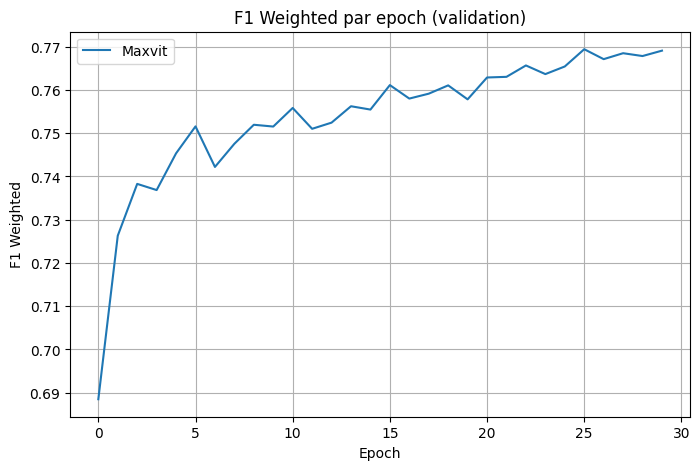

        best_f1_weighted
model                   
Maxvit          0.769432


In [ ]:
import os, json, cv2, torch, joblib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from torch import nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from torchvision.transforms.autoaugment import TrivialAugmentWide
import timm

# === CONFIGURATION
CONFIG = {
    "max_epochs": 30,
    "patience": 7,
    "batch_size": 32,
    "lr": 1e-4,
    "weight_decay": 1e-2,
}

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
DRIVE_OUT = os.path.join(BASE, "modeles_image_v2")
os.makedirs(DRIVE_OUT, exist_ok=True)

# === DONNÉES
df = pd.read_csv(os.path.join(BASE, "X_trainfr_finalCollab.csv"))
paths, labels = df["image_path"].values, df["label"].values
with open(os.path.join(BASE, "val_indices.json"), "r") as f:
    val_idx = np.array(json.load(f), dtype=int)
train_idx = np.setdiff1d(np.arange(len(df)), val_idx)
train_paths, train_labels = paths[train_idx], labels[train_idx]
val_paths, val_labels = paths[val_idx], labels[val_idx]
num_classes = len(np.unique(labels))

# === TRANSFORMS
IMAGENET_MEAN, IMAGENET_STD = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
train_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    TrivialAugmentWide(),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])
val_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

# === DATASET pour train et val
class ImageDS(Dataset):
    def __init__(self, paths, labels, transform):
        self.paths = paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, i):
        img = cv2.imread(self.paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return self.transform(img), int(self.labels[i])

train_ds = ImageDS(train_paths, train_labels, train_tf)
val_ds = ImageDS(val_paths, val_labels, val_tf)

# === DataLoader train et val
counts = np.bincount(train_labels, minlength=num_classes)
sample_weights = 1.0 / counts[train_labels]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)
train_loader = DataLoader(train_ds, batch_size=CONFIG["batch_size"], sampler=sampler, num_workers=12)
val_loader = DataLoader(val_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=12)

# === MODÈLE (exemple Maxvit)
def get_maxvit():
    return timm.create_model("maxvit_base_tf_224", pretrained=True, num_classes=num_classes).to(DEVICE)

model_name = "Maxvit"
model = get_maxvit()

# === ENTRAÎNEMENT
optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG["lr"], weight_decay=CONFIG["weight_decay"])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=CONFIG["max_epochs"])
class_weights = torch.tensor(
    compute_class_weight("balanced", classes=np.unique(train_labels), y=train_labels),
    dtype=torch.float, device=DEVICE
)
loss_fn = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

best_f1, wait = 0.0, 0
best_state = model.state_dict()
train_losses, val_f1s = [], []

for ep in range(1, CONFIG["max_epochs"] + 1):
    model.train()
    total_loss = 0
    for x, y in tqdm(train_loader, desc=f"{model_name} Ep{ep}"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(DEVICE)
            logits = model(x)
            y_pred.extend(logits.argmax(1).cpu().numpy())
            y_true.extend(y.numpy())
    f1 = f1_score(y_true, y_pred, average="weighted")
    val_f1s.append(f1)
    print(f"{model_name} Ep{ep} → TrainLoss {total_loss/len(train_loader):.4f} | Val F1_weighted {f1:.4f}")

    if f1 > best_f1:
        best_f1, best_state, wait = f1, model.state_dict(), 0
    else:
        wait += 1
        if wait >= CONFIG["patience"]:
            print(f"⏹ Early stopping at epoch {ep} (patience {CONFIG['patience']})")
            break

# === Sauvegarde du meilleur modèle
model.load_state_dict(best_state)
torch.save(model.state_dict(), os.path.join(DRIVE_OUT, f"{model_name}_best.pt"))

# === GÉNÉRATION LOGITS SUR TOUT LE DATASET (train + val) ===

# Dataset complet avec transform de validation (pas d'augmentation)
full_ds = ImageDS(paths, labels, val_tf)
full_loader = DataLoader(full_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=4)

logits = []
model.eval()
with torch.no_grad():
    for x, _ in tqdm(full_loader, desc="Inference logits full dataset"):
        x = x.to(DEVICE)
        logits.append(model(x).cpu())
logits = torch.cat(logits)
print(f"Logits shape full dataset: {logits.shape}")

# Sauvegarde logits complets
torch.save(logits, os.path.join(BASE, f"{model_name}_logits.pt"))

# === Courbe de performance
plt.figure(figsize=(8, 5))
plt.plot(val_f1s, label=model_name)
plt.title("F1 Weighted par epoch (validation)")
plt.xlabel("Epoch")
plt.ylabel("F1 Weighted")
plt.grid(True)
plt.legend()
plt.show()

# === Export Score
df_img = pd.DataFrame([{"model": model_name, "best_f1_weighted": best_f1}]).set_index("model")
df_img.to_csv(os.path.join(DRIVE_OUT, "image_model_scores_v2.csv"))
print(df_img)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/355M [00:00<?, ?B/s]

convnextv2 Ep1: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep1 → TrainLoss 1.4236 | Val F1_weighted 0.6953


convnextv2 Ep2: 100%|██████████| 2327/2327 [15:17<00:00,  2.53it/s]


convnextv2 Ep2 → TrainLoss 1.0636 | Val F1_weighted 0.7271


convnextv2 Ep3: 100%|██████████| 2327/2327 [15:17<00:00,  2.54it/s]


convnextv2 Ep3 → TrainLoss 0.9413 | Val F1_weighted 0.7312


convnextv2 Ep4: 100%|██████████| 2327/2327 [15:17<00:00,  2.54it/s]


convnextv2 Ep4 → TrainLoss 0.8865 | Val F1_weighted 0.7338


convnextv2 Ep5: 100%|██████████| 2327/2327 [15:17<00:00,  2.54it/s]


convnextv2 Ep5 → TrainLoss 0.8436 | Val F1_weighted 0.7472


convnextv2 Ep6: 100%|██████████| 2327/2327 [15:17<00:00,  2.53it/s]


convnextv2 Ep6 → TrainLoss 0.8107 | Val F1_weighted 0.7398


convnextv2 Ep7: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep7 → TrainLoss 0.7874 | Val F1_weighted 0.7481


convnextv2 Ep8: 100%|██████████| 2327/2327 [15:17<00:00,  2.54it/s]


convnextv2 Ep8 → TrainLoss 0.7688 | Val F1_weighted 0.7430


convnextv2 Ep9: 100%|██████████| 2327/2327 [15:17<00:00,  2.53it/s]


convnextv2 Ep9 → TrainLoss 0.7582 | Val F1_weighted 0.7464


convnextv2 Ep10: 100%|██████████| 2327/2327 [15:17<00:00,  2.53it/s]


convnextv2 Ep10 → TrainLoss 0.7399 | Val F1_weighted 0.7512


convnextv2 Ep11: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep11 → TrainLoss 0.7290 | Val F1_weighted 0.7530


convnextv2 Ep12: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep12 → TrainLoss 0.7193 | Val F1_weighted 0.7535


convnextv2 Ep13: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep13 → TrainLoss 0.7080 | Val F1_weighted 0.7498


convnextv2 Ep14: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep14 → TrainLoss 0.6994 | Val F1_weighted 0.7491


convnextv2 Ep15: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep15 → TrainLoss 0.6914 | Val F1_weighted 0.7477


convnextv2 Ep16: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep16 → TrainLoss 0.6811 | Val F1_weighted 0.7555


convnextv2 Ep17: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep17 → TrainLoss 0.6762 | Val F1_weighted 0.7593


convnextv2 Ep18: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep18 → TrainLoss 0.6718 | Val F1_weighted 0.7592


convnextv2 Ep19: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep19 → TrainLoss 0.6632 | Val F1_weighted 0.7587


convnextv2 Ep20: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep20 → TrainLoss 0.6578 | Val F1_weighted 0.7567


convnextv2 Ep21: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep21 → TrainLoss 0.6549 | Val F1_weighted 0.7625


convnextv2 Ep22: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep22 → TrainLoss 0.6504 | Val F1_weighted 0.7639


convnextv2 Ep23: 100%|██████████| 2327/2327 [15:19<00:00,  2.53it/s]


convnextv2 Ep23 → TrainLoss 0.6490 | Val F1_weighted 0.7638


convnextv2 Ep24: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep24 → TrainLoss 0.6447 | Val F1_weighted 0.7640


convnextv2 Ep25: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep25 → TrainLoss 0.6458 | Val F1_weighted 0.7666


convnextv2 Ep26: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep26 → TrainLoss 0.6423 | Val F1_weighted 0.7675


convnextv2 Ep27: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep27 → TrainLoss 0.6402 | Val F1_weighted 0.7696


convnextv2 Ep28: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep28 → TrainLoss 0.6410 | Val F1_weighted 0.7707


convnextv2 Ep29: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep29 → TrainLoss 0.6391 | Val F1_weighted 0.7714


convnextv2 Ep30: 100%|██████████| 2327/2327 [15:18<00:00,  2.53it/s]


convnextv2 Ep30 → TrainLoss 0.6400 | Val F1_weighted 0.7707


Inference logits full dataset: 100%|██████████| 2738/2738 [04:24<00:00, 10.37it/s]


Logits shape full dataset: torch.Size([87585, 27])


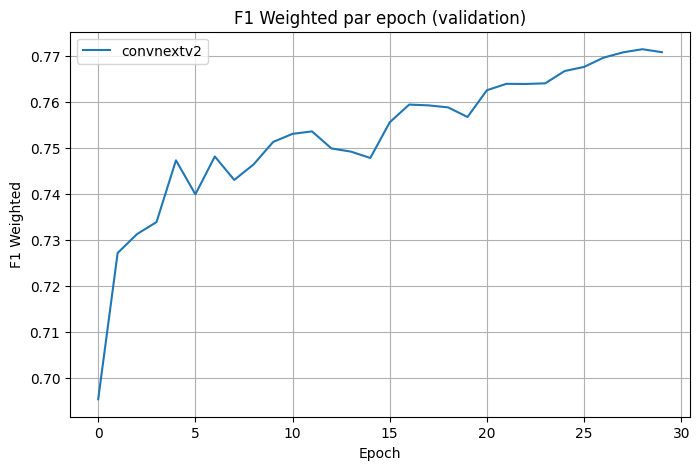

            best_f1_weighted
model                       
convnextv2          0.771385


In [ ]:
import os, json, cv2, torch, joblib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from torch import nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from torchvision.transforms.autoaugment import TrivialAugmentWide
import timm

# === CONFIGURATION
CONFIG = {
    "max_epochs": 30,
    "patience": 7,
    "batch_size": 32,
    "lr": 1e-4,
    "weight_decay": 1e-2,
}

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
DRIVE_OUT = os.path.join(BASE, "modeles_image_v2")
os.makedirs(DRIVE_OUT, exist_ok=True)

# === DONNÉES
df = pd.read_csv(os.path.join(BASE, "X_trainfr_finalCollab.csv"))
paths, labels = df["image_path"].values, df["label"].values
with open(os.path.join(BASE, "val_indices.json"), "r") as f:
    val_idx = np.array(json.load(f), dtype=int)
train_idx = np.setdiff1d(np.arange(len(df)), val_idx)
train_paths, train_labels = paths[train_idx], labels[train_idx]
val_paths, val_labels = paths[val_idx], labels[val_idx]
num_classes = len(np.unique(labels))

# === TRANSFORMS
IMAGENET_MEAN, IMAGENET_STD = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
train_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    TrivialAugmentWide(),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])
val_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

# === DATASET pour train et val
class ImageDS(Dataset):
    def __init__(self, paths, labels, transform):
        self.paths = paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, i):
        img = cv2.imread(self.paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return self.transform(img), int(self.labels[i])

train_ds = ImageDS(train_paths, train_labels, train_tf)
val_ds = ImageDS(val_paths, val_labels, val_tf)

# === DataLoader train et val avec rééchantillonnage équilibré
counts = np.bincount(train_labels, minlength=num_classes)
sample_weights = 1.0 / counts[train_labels]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)
train_loader = DataLoader(train_ds, batch_size=CONFIG["batch_size"], sampler=sampler, num_workers=12)
val_loader = DataLoader(val_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=12)

# === MODÈLE convnextv2
def get_convnextv2():
    return timm.create_model("convnextv2_base", pretrained=True, num_classes=num_classes).to(DEVICE)

model_name = "convnextv2"
model = get_convnextv2()

# === ENTRAÎNEMENT
optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG["lr"], weight_decay=CONFIG["weight_decay"])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=CONFIG["max_epochs"])
class_weights = torch.tensor(
    compute_class_weight("balanced", classes=np.unique(train_labels), y=train_labels),
    dtype=torch.float, device=DEVICE
)
loss_fn = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

best_f1, wait = 0.0, 0
best_state = model.state_dict()
train_losses, val_f1s = [], []

for ep in range(1, CONFIG["max_epochs"] + 1):
    model.train()
    total_loss = 0
    for x, y in tqdm(train_loader, desc=f"{model_name} Ep{ep}"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(DEVICE)
            logits = model(x)
            y_pred.extend(logits.argmax(1).cpu().numpy())
            y_true.extend(y.numpy())
    f1 = f1_score(y_true, y_pred, average="weighted")
    val_f1s.append(f1)
    print(f"{model_name} Ep{ep} → TrainLoss {total_loss/len(train_loader):.4f} | Val F1_weighted {f1:.4f}")

    if f1 > best_f1:
        best_f1, best_state, wait = f1, model.state_dict(), 0
    else:
        wait += 1
        if wait >= CONFIG["patience"]:
            print(f"⏹ Early stopping at epoch {ep} (patience {CONFIG['patience']})")
            break

# === Sauvegarde du meilleur modèle
model.load_state_dict(best_state)
torch.save(model.state_dict(), os.path.join(DRIVE_OUT, f"{model_name}_best.pt"))

# === GÉNÉRATION LOGITS SUR TOUT LE DATASET
full_ds = ImageDS(paths, labels, val_tf)
full_loader = DataLoader(full_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=4)

logits = []
model.eval()
with torch.no_grad():
    for x, _ in tqdm(full_loader, desc="Inference logits full dataset"):
        x = x.to(DEVICE)
        logits.append(model(x).cpu())
logits = torch.cat(logits)
print(f"Logits shape full dataset: {logits.shape}")

# Sauvegarde logits complets (train + val)
torch.save(logits, os.path.join(BASE, f"{model_name}_logits.pt"))

# === Courbe de performance
plt.figure(figsize=(8, 5))
plt.plot(val_f1s, label=model_name)
plt.title("F1 Weighted par epoch (validation)")
plt.xlabel("Epoch")
plt.ylabel("F1 Weighted")
plt.grid(True)
plt.legend()
plt.show()

# === Export Score
df_img = pd.DataFrame([{"model": model_name, "best_f1_weighted": best_f1}]).set_index("model")
df_img.to_csv(os.path.join(DRIVE_OUT, "image_model_scores_v2_convnext2.csv"))
print(df_img)


/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name tf_efficientnetv2_l_in21k to current tf_efficientnetv2_l.in21k.
  model = create_fn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/583M [00:00<?, ?B/s]

efficientv2L Ep1: 100%|██████████| 2327/2327 [08:06<00:00,  4.79it/s]


efficientv2L Ep1 → TrainLoss 1.8539 | Val F1_weighted 0.6500


efficientv2L Ep2: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep2 → TrainLoss 1.2691 | Val F1_weighted 0.6944


efficientv2L Ep3: 100%|██████████| 2327/2327 [08:07<00:00,  4.77it/s]


efficientv2L Ep3 → TrainLoss 1.1087 | Val F1_weighted 0.7048


efficientv2L Ep4: 100%|██████████| 2327/2327 [08:07<00:00,  4.77it/s]


efficientv2L Ep4 → TrainLoss 1.0121 | Val F1_weighted 0.7148


efficientv2L Ep5: 100%|██████████| 2327/2327 [08:07<00:00,  4.77it/s]


efficientv2L Ep5 → TrainLoss 0.9468 | Val F1_weighted 0.7245


efficientv2L Ep6: 100%|██████████| 2327/2327 [08:07<00:00,  4.77it/s]


efficientv2L Ep6 → TrainLoss 0.9018 | Val F1_weighted 0.7314


efficientv2L Ep7: 100%|██████████| 2327/2327 [08:08<00:00,  4.77it/s]


efficientv2L Ep7 → TrainLoss 0.8662 | Val F1_weighted 0.7339


efficientv2L Ep8: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep8 → TrainLoss 0.8340 | Val F1_weighted 0.7393


efficientv2L Ep9: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep9 → TrainLoss 0.8157 | Val F1_weighted 0.7409


efficientv2L Ep10: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep10 → TrainLoss 0.7941 | Val F1_weighted 0.7457


efficientv2L Ep11: 100%|██████████| 2327/2327 [08:07<00:00,  4.77it/s]


efficientv2L Ep11 → TrainLoss 0.7746 | Val F1_weighted 0.7454


efficientv2L Ep12: 100%|██████████| 2327/2327 [08:07<00:00,  4.77it/s]


efficientv2L Ep12 → TrainLoss 0.7623 | Val F1_weighted 0.7466


efficientv2L Ep13: 100%|██████████| 2327/2327 [08:07<00:00,  4.77it/s]


efficientv2L Ep13 → TrainLoss 0.7484 | Val F1_weighted 0.7471


efficientv2L Ep14: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep14 → TrainLoss 0.7336 | Val F1_weighted 0.7460


efficientv2L Ep15: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep15 → TrainLoss 0.7246 | Val F1_weighted 0.7473


efficientv2L Ep16: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep16 → TrainLoss 0.7154 | Val F1_weighted 0.7501


efficientv2L Ep17: 100%|██████████| 2327/2327 [08:08<00:00,  4.77it/s]


efficientv2L Ep17 → TrainLoss 0.7059 | Val F1_weighted 0.7540


efficientv2L Ep18: 100%|██████████| 2327/2327 [08:07<00:00,  4.77it/s]


efficientv2L Ep18 → TrainLoss 0.6982 | Val F1_weighted 0.7518


efficientv2L Ep19: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep19 → TrainLoss 0.6883 | Val F1_weighted 0.7543


efficientv2L Ep20: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep20 → TrainLoss 0.6811 | Val F1_weighted 0.7582


efficientv2L Ep21: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep21 → TrainLoss 0.6750 | Val F1_weighted 0.7535


efficientv2L Ep22: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep22 → TrainLoss 0.6731 | Val F1_weighted 0.7553


efficientv2L Ep23: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep23 → TrainLoss 0.6691 | Val F1_weighted 0.7589


efficientv2L Ep24: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep24 → TrainLoss 0.6654 | Val F1_weighted 0.7573


efficientv2L Ep25: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep25 → TrainLoss 0.6620 | Val F1_weighted 0.7609


efficientv2L Ep26: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep26 → TrainLoss 0.6586 | Val F1_weighted 0.7624


efficientv2L Ep27: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep27 → TrainLoss 0.6594 | Val F1_weighted 0.7609


efficientv2L Ep28: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep28 → TrainLoss 0.6571 | Val F1_weighted 0.7622


efficientv2L Ep29: 100%|██████████| 2327/2327 [08:07<00:00,  4.78it/s]


efficientv2L Ep29 → TrainLoss 0.6565 | Val F1_weighted 0.7589


efficientv2L Ep30: 100%|██████████| 2327/2327 [08:06<00:00,  4.78it/s]


efficientv2L Ep30 → TrainLoss 0.6547 | Val F1_weighted 0.7611


Inference logits full dataset: 100%|██████████| 2738/2738 [02:58<00:00, 15.33it/s]


Logits shape full dataset: torch.Size([87585, 27])


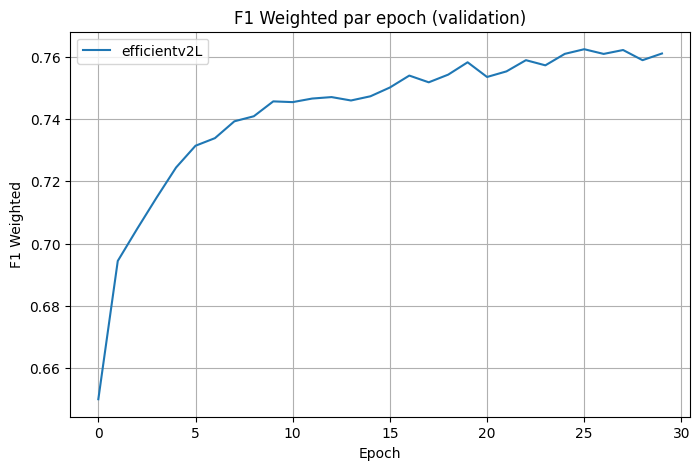

              best_f1_weighted
model                         
efficientv2L          0.762436


In [ ]:
import os, json, cv2, torch, joblib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from torch import nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from torchvision.transforms.autoaugment import TrivialAugmentWide
import timm

# === CONFIGURATION
CONFIG = {
    "max_epochs": 30,
    "patience": 7,
    "batch_size": 32,
    "lr": 1e-4,
    "weight_decay": 1e-2,
}

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
DRIVE_OUT = os.path.join(BASE, "modeles_image_v2")
os.makedirs(DRIVE_OUT, exist_ok=True)

# === DONNÉES
df = pd.read_csv(os.path.join(BASE, "X_trainfr_finalCollab.csv"))
paths, labels = df["image_path"].values, df["label"].values
with open(os.path.join(BASE, "val_indices.json"), "r") as f:
    val_idx = np.array(json.load(f), dtype=int)
train_idx = np.setdiff1d(np.arange(len(df)), val_idx)
train_paths, train_labels = paths[train_idx], labels[train_idx]
val_paths, val_labels = paths[val_idx], labels[val_idx]
num_classes = len(np.unique(labels))

# === TRANSFORMS
IMAGENET_MEAN, IMAGENET_STD = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
train_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    TrivialAugmentWide(),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])
val_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

# === DATASET
class ImageDS(Dataset):
    def __init__(self, paths, labels, transform):
        self.paths = paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, i):
        img = cv2.imread(self.paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return self.transform(img), int(self.labels[i])

train_ds = ImageDS(train_paths, train_labels, train_tf)
val_ds = ImageDS(val_paths, val_labels, val_tf)

# === DATALOADER équilibré
counts = np.bincount(train_labels, minlength=num_classes)
sample_weights = 1.0 / counts[train_labels]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)
train_loader = DataLoader(train_ds, batch_size=CONFIG["batch_size"], sampler=sampler, num_workers=12)
val_loader = DataLoader(val_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=12)

# === MODÈLE EfficientNetV2-L
def get_efficientnetv2_l():
    return timm.create_model("tf_efficientnetv2_l_in21k", pretrained=True, num_classes=num_classes).to(DEVICE)

model_name = "efficientv2L"
model = get_efficientnetv2_l()

# === ENTRAÎNEMENT
optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG["lr"], weight_decay=CONFIG["weight_decay"])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=CONFIG["max_epochs"])
class_weights = torch.tensor(
    compute_class_weight("balanced", classes=np.unique(train_labels), y=train_labels),
    dtype=torch.float, device=DEVICE
)
loss_fn = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

best_f1, wait = 0.0, 0
best_state = model.state_dict()
train_losses, val_f1s = [], []

for ep in range(1, CONFIG["max_epochs"] + 1):
    model.train()
    total_loss = 0
    for x, y in tqdm(train_loader, desc=f"{model_name} Ep{ep}"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(DEVICE)
            logits = model(x)
            y_pred.extend(logits.argmax(1).cpu().numpy())
            y_true.extend(y.numpy())
    f1 = f1_score(y_true, y_pred, average="weighted")
    val_f1s.append(f1)
    print(f"{model_name} Ep{ep} → TrainLoss {total_loss/len(train_loader):.4f} | Val F1_weighted {f1:.4f}")

    if f1 > best_f1:
        best_f1, best_state, wait = f1, model.state_dict(), 0
    else:
        wait += 1
        if wait >= CONFIG["patience"]:
            print(f"⏹ Early stopping at epoch {ep} (patience {CONFIG['patience']})")
            break

# === Sauvegarde du meilleur modèle
model.load_state_dict(best_state)
torch.save(model.state_dict(), os.path.join(DRIVE_OUT, f"{model_name}_best.pt"))

# === GÉNÉRATION LOGITS SUR TOUT LE DATASET (train + val)
full_ds = ImageDS(paths, labels, val_tf)  # validation transform pour le dataset complet
full_loader = DataLoader(full_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=4)

logits = []
model.eval()
with torch.no_grad():
    for x, _ in tqdm(full_loader, desc="Inference logits full dataset"):
        x = x.to(DEVICE)
        logits.append(model(x).cpu())
logits = torch.cat(logits)
print(f"Logits shape full dataset: {logits.shape}")

# Sauvegarde logits complets
torch.save(logits, os.path.join(BASE, f"{model_name}_logits.pt"))

# === Courbe de performance
plt.figure(figsize=(8, 5))
plt.plot(val_f1s, label=model_name)
plt.title("F1 Weighted par epoch (validation)")
plt.xlabel("Epoch")
plt.ylabel("F1 Weighted")
plt.grid(True)
plt.legend()
plt.show()

# === Export Score
df_img = pd.DataFrame([{"model": model_name, "best_f1_weighted": best_f1}]).set_index("model")
df_img.to_csv(os.path.join(DRIVE_OUT, "image_model_scores_v2_Efficient2.csv"))
print(df_img)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/296M [00:00<?, ?B/s]

coatnet2 Ep1: 100%|██████████| 2327/2327 [06:56<00:00,  5.58it/s]


coatnet2 Ep1 → TrainLoss 1.7135 | Val F1_weighted 0.5936


coatnet2 Ep2: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep2 → TrainLoss 1.3730 | Val F1_weighted 0.6633


coatnet2 Ep3: 100%|██████████| 2327/2327 [06:53<00:00,  5.62it/s]


coatnet2 Ep3 → TrainLoss 1.2420 | Val F1_weighted 0.6643


coatnet2 Ep4: 100%|██████████| 2327/2327 [06:53<00:00,  5.62it/s]


coatnet2 Ep4 → TrainLoss 1.1541 | Val F1_weighted 0.6962


coatnet2 Ep5: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep5 → TrainLoss 1.0817 | Val F1_weighted 0.6936


coatnet2 Ep6: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep6 → TrainLoss 1.0277 | Val F1_weighted 0.7022


coatnet2 Ep7: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep7 → TrainLoss 0.9791 | Val F1_weighted 0.7106


coatnet2 Ep8: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep8 → TrainLoss 0.9446 | Val F1_weighted 0.7005


coatnet2 Ep9: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep9 → TrainLoss 0.9180 | Val F1_weighted 0.7193


coatnet2 Ep10: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep10 → TrainLoss 0.8767 | Val F1_weighted 0.7188


coatnet2 Ep11: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep11 → TrainLoss 0.8561 | Val F1_weighted 0.7190


coatnet2 Ep12: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep12 → TrainLoss 0.8305 | Val F1_weighted 0.7219


coatnet2 Ep13: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep13 → TrainLoss 0.8048 | Val F1_weighted 0.7268


coatnet2 Ep14: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep14 → TrainLoss 0.7852 | Val F1_weighted 0.7297


coatnet2 Ep15: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep15 → TrainLoss 0.7653 | Val F1_weighted 0.7319


coatnet2 Ep16: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep16 → TrainLoss 0.7469 | Val F1_weighted 0.7343


coatnet2 Ep17: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep17 → TrainLoss 0.7292 | Val F1_weighted 0.7379


coatnet2 Ep18: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep18 → TrainLoss 0.7158 | Val F1_weighted 0.7364


coatnet2 Ep19: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep19 → TrainLoss 0.7060 | Val F1_weighted 0.7373


coatnet2 Ep20: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep20 → TrainLoss 0.6961 | Val F1_weighted 0.7390


coatnet2 Ep21: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep21 → TrainLoss 0.6855 | Val F1_weighted 0.7463


coatnet2 Ep22: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep22 → TrainLoss 0.6773 | Val F1_weighted 0.7495


coatnet2 Ep23: 100%|██████████| 2327/2327 [06:54<00:00,  5.62it/s]


coatnet2 Ep23 → TrainLoss 0.6684 | Val F1_weighted 0.7424


coatnet2 Ep24: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep24 → TrainLoss 0.6642 | Val F1_weighted 0.7476


coatnet2 Ep25: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep25 → TrainLoss 0.6595 | Val F1_weighted 0.7532


coatnet2 Ep26: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep26 → TrainLoss 0.6555 | Val F1_weighted 0.7517


coatnet2 Ep27: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep27 → TrainLoss 0.6522 | Val F1_weighted 0.7522


coatnet2 Ep28: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep28 → TrainLoss 0.6496 | Val F1_weighted 0.7527


coatnet2 Ep29: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep29 → TrainLoss 0.6505 | Val F1_weighted 0.7526


coatnet2 Ep30: 100%|██████████| 2327/2327 [06:54<00:00,  5.61it/s]


coatnet2 Ep30 → TrainLoss 0.6504 | Val F1_weighted 0.7539


Inference logits full dataset: 100%|██████████| 2738/2738 [02:32<00:00, 17.97it/s]


Logits shape full dataset: torch.Size([87585, 27])


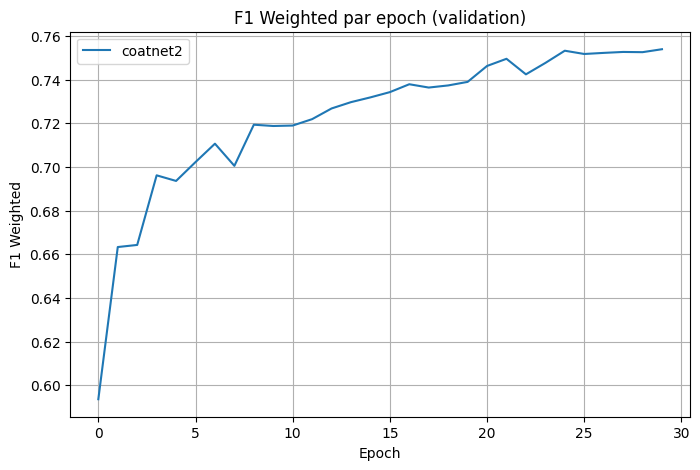

          best_f1_weighted
model                     
coatnet2          0.753923


In [ ]:
import os, json, cv2, torch, joblib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from torch import nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from torchvision.transforms.autoaugment import TrivialAugmentWide
import timm

# === CONFIGURATION
CONFIG = {
    "max_epochs": 30,           # augmentation à 30 epochs
    "patience": 7,              # patience  à 7
    "batch_size": 32,           # batch size 32
    "lr": 1e-4,
    "weight_decay": 1e-2,
}

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
DRIVE_OUT = os.path.join(BASE, "modeles_image_v2")
os.makedirs(DRIVE_OUT, exist_ok=True)

# === DONNÉES
df = pd.read_csv(os.path.join(BASE, "X_trainfr_finalCollab.csv"))
paths, labels = df["image_path"].values, df["label"].values
with open(os.path.join(BASE, "val_indices.json"), "r") as f:
    val_idx = np.array(json.load(f), dtype=int)
train_idx = np.setdiff1d(np.arange(len(df)), val_idx)
train_paths, train_labels = paths[train_idx], labels[train_idx]
val_paths, val_labels = paths[val_idx], labels[val_idx]
num_classes = len(np.unique(labels))

# === TRANSFORMS
IMAGENET_MEAN, IMAGENET_STD = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
train_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    TrivialAugmentWide(),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])
val_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

# === DATASET
class ImageDS(Dataset):
    def __init__(self, paths, labels, transform):
        self.paths = paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, i):
        img = cv2.imread(self.paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return self.transform(img), int(self.labels[i])

train_ds = ImageDS(train_paths, train_labels, train_tf)
val_ds = ImageDS(val_paths, val_labels, val_tf)

# === DataLoader équilibré
counts = np.bincount(train_labels, minlength=num_classes)
sample_weights = 1.0 / counts[train_labels]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)
train_loader = DataLoader(train_ds, batch_size=CONFIG["batch_size"], sampler=sampler, num_workers=12)
val_loader = DataLoader(val_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=12)

# === MODÈLE COATNET2 uniquement
def get_coatnet2():
    return timm.create_model("coatnet_rmlp_2_rw_224.sw_in12k_ft_in1k", pretrained=True, num_classes=num_classes).to(DEVICE)

model_name = "coatnet2"
model = get_coatnet2()

# === ENTRAÎNEMENT
optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG["lr"], weight_decay=CONFIG["weight_decay"])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=CONFIG["max_epochs"])
class_weights = torch.tensor(
    compute_class_weight("balanced", classes=np.unique(train_labels), y=train_labels),
    dtype=torch.float, device=DEVICE
)
loss_fn = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

best_f1, wait = 0.0, 0
best_state = model.state_dict()
train_losses, val_f1s = [], []

for ep in range(1, CONFIG["max_epochs"] + 1):
    model.train()
    total_loss = 0
    for x, y in tqdm(train_loader, desc=f"{model_name} Ep{ep}"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(DEVICE)
            logits = model(x)
            y_pred.extend(logits.argmax(1).cpu().numpy())
            y_true.extend(y.numpy())
    f1 = f1_score(y_true, y_pred, average="weighted")
    val_f1s.append(f1)
    print(f"{model_name} Ep{ep} → TrainLoss {total_loss/len(train_loader):.4f} | Val F1_weighted {f1:.4f}")

    if f1 > best_f1:
        best_f1, best_state, wait = f1, model.state_dict(), 0
    else:
        wait += 1
        if wait >= CONFIG["patience"]:
            print(f"⏹ Early stopping at epoch {ep} (patience {CONFIG['patience']})")
            break

# === Sauvegarde du meilleur modèle et logits
model.load_state_dict(best_state)
torch.save(model.state_dict(), os.path.join(DRIVE_OUT, f"{model_name}_best.pt"))

# === GÉNÉRATION LOGITS SUR TOUT LE DATASET (train + val)
full_ds = ImageDS(paths, labels, val_tf)
full_loader = DataLoader(full_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=4)

logits = []
model.eval()
with torch.no_grad():
    for x, _ in tqdm(full_loader, desc="Inference logits full dataset"):
        x = x.to(DEVICE)
        logits.append(model(x).cpu())
logits = torch.cat(logits)
print(f"Logits shape full dataset: {logits.shape}")

# Sauvegarde logits complets
torch.save(logits, os.path.join(BASE, f"{model_name}_logits.pt"))

# === Courbe de performance
plt.figure(figsize=(8, 5))
plt.plot(val_f1s, label=model_name)
plt.title("F1 Weighted par epoch (validation)")
plt.xlabel("Epoch")
plt.ylabel("F1 Weighted")
plt.grid(True)
plt.legend()
plt.show()

# === Export Score
df_img = pd.DataFrame([{"model": model_name, "best_f1_weighted": best_f1}]).set_index("model")
df_img.to_csv(os.path.join(DRIVE_OUT, "image_model_scores_v2_Coatnet2.csv"))
print(df_img)


In [ ]:
!pip install transformers accelerate --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
import timm
print(timm.list_models('gcvit*',pretrained=True))

['gcvit_base.in1k', 'gcvit_small.in1k', 'gcvit_tiny.in1k', 'gcvit_xtiny.in1k', 'gcvit_xxtiny.in1k']


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights-morevit/gcvit_base_224_nvidia-f009139b.pth" to /root/.cache/torch/hub/checkpoints/gcvit_base_224_nvidia-f009139b.pth
gcvit Ep1: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep1 → TrainLoss 1.4598 | Val F1_weighted 0.6851


gcvit Ep2: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep2 → TrainLoss 1.0952 | Val F1_weighted 0.7240


gcvit Ep3: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep3 → TrainLoss 0.9707 | Val F1_weighted 0.7271


gcvit Ep4: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep4 → TrainLoss 0.8995 | Val F1_weighted 0.7326


gcvit Ep5: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep5 → TrainLoss 0.8576 | Val F1_weighted 0.7299


gcvit Ep6: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep6 → TrainLoss 0.8234 | Val F1_weighted 0.7362


gcvit Ep7: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep7 → TrainLoss 0.7968 | Val F1_weighted 0.7406


gcvit Ep8: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep8 → TrainLoss 0.7772 | Val F1_weighted 0.7436


gcvit Ep9: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep9 → TrainLoss 0.7610 | Val F1_weighted 0.7385


gcvit Ep10: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep10 → TrainLoss 0.7432 | Val F1_weighted 0.7408


gcvit Ep11: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep11 → TrainLoss 0.7319 | Val F1_weighted 0.7443


gcvit Ep12: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep12 → TrainLoss 0.7212 | Val F1_weighted 0.7427


gcvit Ep13: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep13 → TrainLoss 0.7097 | Val F1_weighted 0.7513


gcvit Ep14: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep14 → TrainLoss 0.7050 | Val F1_weighted 0.7460


gcvit Ep15: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep15 → TrainLoss 0.6915 | Val F1_weighted 0.7494


gcvit Ep16: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep16 → TrainLoss 0.6876 | Val F1_weighted 0.7504


gcvit Ep17: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep17 → TrainLoss 0.6788 | Val F1_weighted 0.7541


gcvit Ep18: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep18 → TrainLoss 0.6716 | Val F1_weighted 0.7544


gcvit Ep19: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep19 → TrainLoss 0.6641 | Val F1_weighted 0.7579


gcvit Ep20: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep20 → TrainLoss 0.6602 | Val F1_weighted 0.7569


gcvit Ep21: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep21 → TrainLoss 0.6564 | Val F1_weighted 0.7601


gcvit Ep22: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep22 → TrainLoss 0.6508 | Val F1_weighted 0.7596


gcvit Ep23: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep23 → TrainLoss 0.6507 | Val F1_weighted 0.7622


gcvit Ep24: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep24 → TrainLoss 0.6482 | Val F1_weighted 0.7655


gcvit Ep25: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep25 → TrainLoss 0.6440 | Val F1_weighted 0.7672


gcvit Ep26: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep26 → TrainLoss 0.6413 | Val F1_weighted 0.7655


gcvit Ep27: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep27 → TrainLoss 0.6425 | Val F1_weighted 0.7662


gcvit Ep28: 100%|██████████| 2327/2327 [12:16<00:00,  3.16it/s]


gcvit Ep28 → TrainLoss 0.6402 | Val F1_weighted 0.7669


gcvit Ep29: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep29 → TrainLoss 0.6407 | Val F1_weighted 0.7684


gcvit Ep30: 100%|██████████| 2327/2327 [12:17<00:00,  3.16it/s]


gcvit Ep30 → TrainLoss 0.6395 | Val F1_weighted 0.7688


Inference logits full dataset: 100%|██████████| 2738/2738 [04:43<00:00,  9.66it/s]


Logits shape full dataset: torch.Size([87585, 27])


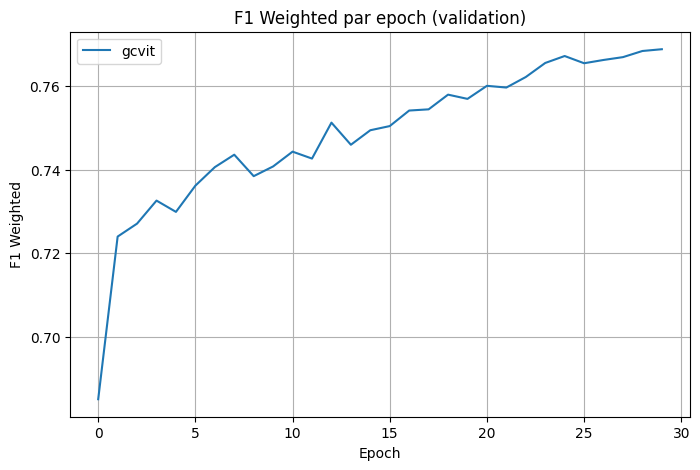

       best_f1_weighted
model                  
gcvit          0.768806


In [ ]:
import os, json, cv2, torch, joblib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from torch import nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from torchvision.transforms.autoaugment import TrivialAugmentWide
import timm

# === CONFIGURATION
CONFIG = {
    "max_epochs": 30,          #  30 epochs
    "patience": 7,             # patience 7 pour early stopping
    "batch_size": 32,          # batch size 32
    "lr": 1e-4,
    "weight_decay": 1e-2,
}

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
DRIVE_OUT = os.path.join(BASE, "modeles_meta")
os.makedirs(DRIVE_OUT, exist_ok=True)

# === DONNÉES
df = pd.read_csv(os.path.join(BASE, "X_trainfr_finalCollab.csv"))
paths, labels = df["image_path"].values, df["label"].values
with open(os.path.join(BASE, "val_indices.json"), "r") as f:
    val_idx = np.array(json.load(f), dtype=int)
train_idx = np.setdiff1d(np.arange(len(df)), val_idx)
train_paths, train_labels = paths[train_idx], labels[train_idx]
val_paths, val_labels = paths[val_idx], labels[val_idx]
num_classes = len(np.unique(labels))

# === TRANSFORMS
IMAGENET_MEAN, IMAGENET_STD = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
train_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    TrivialAugmentWide(),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])
val_tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

# === DATASET
class ImageDS(Dataset):
    def __init__(self, paths, labels, transform):
        self.paths = paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, i):
        img = cv2.imread(self.paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return self.transform(img), int(self.labels[i])

train_ds = ImageDS(train_paths, train_labels, train_tf)
val_ds = ImageDS(val_paths, val_labels, val_tf)

# === DATALOADER équilibré
counts = np.bincount(train_labels, minlength=num_classes)
sample_weights = 1.0 / counts[train_labels]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)
train_loader = DataLoader(train_ds, batch_size=CONFIG["batch_size"], sampler=sampler, num_workers=12)
val_loader = DataLoader(val_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=12)

# === MODÈLE GCVIT uniquement
def get_gcvit():
    return timm.create_model("gcvit_base.in1k", pretrained=True, num_classes=num_classes).to(DEVICE)

model_name = "gcvit"
model = get_gcvit()

# === ENTRAÎNEMENT
optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG["lr"], weight_decay=CONFIG["weight_decay"])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=CONFIG["max_epochs"])
class_weights = torch.tensor(
    compute_class_weight("balanced", classes=np.unique(train_labels), y=train_labels),
    dtype=torch.float, device=DEVICE
)
loss_fn = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

best_f1, wait = 0.0, 0
best_state = model.state_dict()
train_losses, val_f1s = [], []

for ep in range(1, CONFIG["max_epochs"] + 1):
    model.train()
    total_loss = 0
    for x, y in tqdm(train_loader, desc=f"{model_name} Ep{ep}"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(DEVICE)
            logits = model(x)
            y_pred.extend(logits.argmax(1).cpu().numpy())
            y_true.extend(y.numpy())
    f1 = f1_score(y_true, y_pred, average="weighted")
    val_f1s.append(f1)
    print(f"{model_name} Ep{ep} → TrainLoss {total_loss/len(train_loader):.4f} | Val F1_weighted {f1:.4f}")

    if f1 > best_f1:
        best_f1, best_state, wait = f1, model.state_dict(), 0
    else:
        wait += 1
        if wait >= CONFIG["patience"]:
            print(f"⏹ Early stopping at epoch {ep} (patience {CONFIG['patience']})")
            break

# === Sauvegarde du meilleur modèle
model.load_state_dict(best_state)
torch.save(model.state_dict(), os.path.join(DRIVE_OUT, f"{model_name}_best.pt"))

# === GÉNÉRATION LOGITS SUR TOUT LE DATASET (train + val)
full_ds = ImageDS(paths, labels, val_tf)
full_loader = DataLoader(full_ds, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=4)

logits = []
model.eval()
with torch.no_grad():
    for x, _ in tqdm(full_loader, desc="Inference logits full dataset"):
        x = x.to(DEVICE)
        logits.append(model(x).cpu())
logits = torch.cat(logits)
print(f"Logits shape full dataset: {logits.shape}")

# Sauvegarde logits complets
torch.save(logits, os.path.join(BASE, f"{model_name}_logits.pt"))

# === Courbe de performance
plt.figure(figsize=(8, 5))
plt.plot(val_f1s, label=model_name)
plt.title("F1 Weighted par epoch (validation)")
plt.xlabel("Epoch")
plt.ylabel("F1 Weighted")
plt.grid(True)
plt.legend()
plt.show()

# === Export Score
df_img = pd.DataFrame([{"model": model_name, "best_f1_weighted": best_f1}]).set_index("model")
df_img.to_csv(os.path.join(DRIVE_OUT, "image_model_scores_v2_gcvit.csv"))
print(df_img)


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=67579cd0e7beb097d82415d95f5de13606bb4f32b7d9bddba225c7d01790b09d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=401bd5c994adbe5b231e2a59abc663341b93854b8df2ad72849ebd46c75d64a0
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 23.1 MB/s eta 0:00:00


In [ ]:
import os
import shutil
from google.colab import drive

#  Monter Google Drive
drive.mount('/content/drive')

#  Chemins
drive_base_path = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
local_base_path = "/content/modeles_importes"
os.makedirs(local_base_path, exist_ok=True)

#  1. Modèles à copier (images + textuels)
model_folders = {
    "modeles_image_v2": ["efficientv2L_best.pt", "convnextv2_best.pt", "coatnet2_best.pt","Maxvit_best.pt", "gcvit_best.pt"]
}

# 📥Copie des modèles
for folder, files in model_folders.items():
    src_dir = os.path.join(drive_base_path, folder)
    is_text_model = "camembert" in folder or "flaubert" in folder
    dst_subfolder = os.path.join(local_base_path, os.path.basename(folder)) if is_text_model else local_base_path
    os.makedirs(dst_subfolder, exist_ok=True)

    for filename in files:
        src_file = os.path.join(src_dir, filename)
        dst_file = os.path.join(dst_subfolder, filename)
        if os.path.exists(src_file):
            shutil.copy(src_file, dst_file)
            print(f"✅ Copié : {filename} → {dst_file}")
        else:
            print(f"❌ Introuvable : {src_file}")

#  2. Logits à copier (texte + image + labels)
logits_files = [
    "efficientv2L_logits.pt",
    "convnextv2_logits.pt",
    "coatnet2_logits.pt",
    "Maxvit_logits.pt",
    "gcvit_logits.pt",
    "true_labels_final.pt",
    "booster_image_logits.pt"
]

logits_drive_path = drive_base_path

for filename in logits_files:
    src_file = os.path.join(logits_drive_path, filename)
    dst_file = os.path.join(local_base_path, filename)
    if os.path.exists(src_file):
        shutil.copy(src_file, dst_file)
        print(f"✅ Logits copié : {filename}")
    else:
        print(f"❌ Logits manquant : {src_file}")
# 3. Copier le fichier de mapping labels
mapping_filename = "label_mapping_final.json"
mapping_src = os.path.join(drive_base_path, mapping_filename)
mapping_dst = os.path.join(local_base_path, mapping_filename)

if os.path.exists(mapping_src):
    shutil.copy(mapping_src, mapping_dst)
    print(f"✅ Mapping copié : {mapping_filename}")
else:
    print(f"❌ Mapping manquant : {mapping_src}")
# 4. Copier le fichier label encoder
label_encoder_filename = "label_encoder_final.pkl"
label_encoder_src = os.path.join(drive_base_path, label_encoder_filename)
label_encoder_dst = os.path.join(local_base_path, label_encoder_filename)

if os.path.exists(label_encoder_src):
    shutil.copy(label_encoder_src, label_encoder_dst)
    print(f"✅ Label Encoder copié : {label_encoder_filename}")
else:
    print(f"❌ Label Encoder manquant : {label_encoder_src}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Copié : efficientv2L_best.pt → /content/modeles_importes/efficientv2L_best.pt
✅ Copié : convnextv2_best.pt → /content/modeles_importes/convnextv2_best.pt
✅ Copié : coatnet2_best.pt → /content/modeles_importes/coatnet2_best.pt
✅ Copié : Maxvit_best.pt → /content/modeles_importes/Maxvit_best.pt
✅ Copié : gcvit_best.pt → /content/modeles_importes/gcvit_best.pt
✅ Logits copié : efficientv2L_logits.pt
✅ Logits copié : convnextv2_logits.pt
✅ Logits copié : coatnet2_logits.pt
✅ Logits copié : Maxvit_logits.pt
✅ Logits copié : gcvit_logits.pt
✅ Logits copié : true_labels_final.pt
✅ Logits copié : booster_image_logits.pt
✅ Mapping copié : label_mapping_final.json
✅ Label Encoder copié : label_encoder_final.pkl


In [ ]:
import os
import torch
import numpy as np
import itertools
from sklearn.metrics import f1_score
import json

# Chemins et config
PATH_LOGITS = "/content/modeles_importes"
LABELS_PATH = os.path.join(PATH_LOGITS, "true_labels_final.pt")
VAL_INDICES_PATH = "/content/drive/MyDrive/Colab Notebooks/fahim/final/val_indices.json"

# Modèles image uniquement
image_model_names = [
    "gcvit", "convnextv2", "Maxvit", "coatnet2", "efficientv2L"
]

# Chargement logits
all_logits = {name: torch.load(os.path.join(PATH_LOGITS, f"{name}_logits.pt")).cpu().numpy() for name in image_model_names}
labels = torch.load(LABELS_PATH).numpy()
with open(VAL_INDICES_PATH, "r") as f:
    val_idx = np.array(json.load(f), dtype=int)
y_val = labels[val_idx]

def weighted_softmax(logits_list, weights):
    """Calcule la moyenne pondérée des logits softmaxés."""
    softmaxed = [np.exp(logits)/np.exp(logits).sum(axis=1, keepdims=True) for logits in logits_list]
    weighted = sum(w * s for w, s in zip(weights, softmaxed))
    return weighted

def grid_weights(n):
    """Génère toutes les combinaisons de poids sommant à 1 avec pas de 0.1."""
    steps = np.arange(0.1, 1.0, 0.1)
    grids = [x for x in itertools.product(steps, repeat=n) if abs(sum(x) - 1) < 1e-5]
    return grids

results = []
for n_models in range(1, len(image_model_names)+1):  # tu peux commencer à 1 si tu veux tester un modèle seul
    for model_combo in itertools.combinations(image_model_names, n_models):
        logits_list = [all_logits[name][val_idx] for name in model_combo]
        best_f1, best_weights = 0, None
        for weights in grid_weights(n_models):
            y_pred = np.argmax(weighted_softmax(logits_list, weights), axis=1)
            f1 = f1_score(y_val, y_pred, average='weighted')
            if f1 > best_f1:
                best_f1 = f1
                best_weights = weights
        results.append({
            "models": model_combo,
            "f1_weighted": best_f1,
            "weights": best_weights
        })
        print(f"[{'+'.join(model_combo)}]  F1_weighted={best_f1:.5f}  Weights={best_weights}")

# Affichage trié
results = sorted(results, key=lambda x: x["f1_weighted"], reverse=True)
print("\n==== TOP COMBINAISONS IMAGE ====")
for res in results[:10]:
    print(f"{'+'.join(res['models']):40s} | F1={res['f1_weighted']:.5f} | Weights={res['weights']}")


[gcvit]  F1_weighted=0.00000  Weights=None
[convnextv2]  F1_weighted=0.00000  Weights=None
[Maxvit]  F1_weighted=0.00000  Weights=None
[coatnet2]  F1_weighted=0.00000  Weights=None
[efficientv2L]  F1_weighted=0.00000  Weights=None
[gcvit+convnextv2]  F1_weighted=0.78196  Weights=(np.float64(0.5), np.float64(0.5))
[gcvit+Maxvit]  F1_weighted=0.78286  Weights=(np.float64(0.5), np.float64(0.5))
[gcvit+coatnet2]  F1_weighted=0.77597  Weights=(np.float64(0.6), np.float64(0.4))
[gcvit+efficientv2L]  F1_weighted=0.77920  Weights=(np.float64(0.5), np.float64(0.5))
[convnextv2+Maxvit]  F1_weighted=0.78255  Weights=(np.float64(0.5), np.float64(0.5))
[convnextv2+coatnet2]  F1_weighted=0.77842  Weights=(np.float64(0.6), np.float64(0.4))
[convnextv2+efficientv2L]  F1_weighted=0.78035  Weights=(np.float64(0.5), np.float64(0.5))
[Maxvit+coatnet2]  F1_weighted=0.77638  Weights=(np.float64(0.6), np.float64(0.4))
[Maxvit+efficientv2L]  F1_weighted=0.78227  Weights=(np.float64(0.5), np.float64(0.5))
[coa

In [ ]:
import numpy as np
import torch

# Weights de la combinaison gagnante (dans l'ordre des modèles ci-dessous)
weights = np.array([0.2, 0.2, 0.3, 0.1, 0.2])

# Charge logits de tous les modèles image, full dataset
logits_list = [
    torch.load("/content/modeles_importes/gcvit_logits.pt").cpu().numpy(),
    torch.load("/content/modeles_importes/convnextv2_logits.pt").cpu().numpy(),
    torch.load("/content/modeles_importes/Maxvit_logits.pt").cpu().numpy(),
    torch.load("/content/modeles_importes/coatnet2_logits.pt").cpu().numpy(),
    torch.load("/content/modeles_importes/efficientv2L_logits.pt").cpu().numpy(),
]

# Pondération → shape finale : (N, nb_classes)
stacked = np.stack(logits_list, axis=0)  # (5, N, nb_classes)
weighted_logits = np.tensordot(weights, stacked, axes=([0], [0]))  # (N, nb_classes)
weighted_probs = torch.softmax(torch.tensor(weighted_logits), dim=1).numpy()

# Sauvegarde sur tout le dataset
torch.save(torch.tensor(weighted_probs), "/content/drive/MyDrive/Colab Notebooks/fahim/final/booster_image_logits.pt")
print("Booster logits pondérés générés sur tout le dataset !")


Booster logits pondérés générés sur tout le dataset !


In [ ]:
import os
import numpy as np
import torch
import json
from scipy.special import softmax
from sklearn.metrics import f1_score
import optuna
from itertools import combinations

BASE = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
PATH_LOGITS = "/content/modeles_importes"
VAL_INDICES_PATH = os.path.join(BASE, "val_indices.json")
LABELS_PATH = os.path.join(PATH_LOGITS, "true_labels_final.pt")

fixed_models = ["booster_image_logits.pt"]

optional_models = [
    "convnextv2_logits.pt",
    "Maxvit_logits.pt",
    "gcvit_logits.pt",
    "coatnet2_logits.pt",
    "efficientv2L_logits.pt",
]

with open(VAL_INDICES_PATH, "r") as f:
    val_idx = np.array(json.load(f))
labels_full = torch.load(LABELS_PATH).numpy()
y_val = labels_full[val_idx]

def load_logits(filenames):
    logits_list = []
    for fname in filenames:
        logits = torch.load(os.path.join(PATH_LOGITS, fname)).cpu().numpy()
        # Appliquer softmax uniquement si nécessaire
        if logits.ndim == 2 and (np.abs(np.sum(logits, axis=1) - 1) > 1e-4).any():
            logits = softmax(logits, axis=1)
        logits_val = logits[val_idx]
        logits_list.append(logits_val)
    return logits_list

def weighted_fusion(logits_list, weights):
    stacked = np.stack(logits_list, axis=0)  # (n_models, n_samples, n_classes)
    weighted = np.tensordot(weights, stacked, axes=(0, 0))  # (n_samples, n_classes)
    return weighted

def make_objective(logits_list, y_true):
    n_models = len(logits_list)
    def objective(trial):
        weights = []
        for i in range(n_models):
            w = trial.suggest_float(f"w_{i}", 0.0, 1.0)
            weights.append(w)
        s = sum(weights)
        if s < 1e-6:
            return 1.0  # éviter division par zéro
        weights = [w / s for w in weights]
        fused_logits = weighted_fusion(logits_list, weights)
        preds = np.argmax(fused_logits, axis=1)
        f1 = f1_score(y_true, preds, average="weighted")
        print(f"Trial {trial.number}: F1={f1:.4f}")
        return 1 - f1
    return objective

best_score = 0
best_combo = None
best_weights = None

for r in range(len(optional_models) + 1):
    for combo in combinations(optional_models, r):
        models_to_use = fixed_models + list(combo)
        print(f"\nTest combo: {models_to_use}")
        logits_list = load_logits(models_to_use)
        objective = make_objective(logits_list, y_val)
        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=200, n_jobs=3)  # plus rapide pour test
        current_f1 = 1 - study.best_value
        print(f"Combo {models_to_use} - Best F1: {current_f1:.4f}")
        if current_f1 > best_score:
            best_score = current_f1
            best_combo = models_to_use
            n_models = len(logits_list)
            best_weights = np.zeros(n_models)
            for i in range(n_models):
                best_weights[i] = study.best_params[f"w_{i}"]

print("\n--- Résultat final ---")
print(f"Meilleure combinaison : {best_combo}")
print(f"Meilleur F1-weighted : {best_score:.4f}")
print(f"Poids optimaux : {best_weights}")


[I 2025-06-15 17:41:57,702] A new study created in memory with name: no-name-296a3dfd-d9b9-4892-99ef-84ad25be1153
[I 2025-06-15 17:41:57,730] Trial 0 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.40942813601743877}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,749] Trial 2 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.18339614538584237}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,767] Trial 1 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.437757583747324}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,781] Trial 3 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.4432926290861966}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,804] Trial 4 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.24007377991662038}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,810] T


Test combo: ['booster_image_logits.pt']
Trial 0: F1=0.7948
Trial 2: F1=0.7948
Trial 1: F1=0.7948
Trial 3: F1=0.7948
Trial 4: F1=0.7948
Trial 5: F1=0.7948
Trial 6: F1=0.7948
Trial 7: F1=0.7948
Trial 10: F1=0.7948
Trial 8: F1=0.7948
Trial 9: F1=0.7948


[I 2025-06-15 17:41:57,888] Trial 9 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.2925735514468153}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,918] Trial 11 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5792520746485866}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,940] Trial 12 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5100502775293416}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,941] Trial 13 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5157748973386447}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,982] Trial 14 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.40780749833587954}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:57,998] Trial 15 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3762148558127145}. Best is trial 0 w

Trial 11: F1=0.7948
Trial 12: F1=0.7948
Trial 13: F1=0.7948
Trial 14: F1=0.7948
Trial 15: F1=0.7948
Trial 16: F1=0.7948
Trial 17: F1=0.7948
Trial 18: F1=0.7948
Trial 19: F1=0.7948
Trial 21: F1=0.7948
Trial 20: F1=0.7948
Trial 22: F1=0.7948


[I 2025-06-15 17:41:58,125] Trial 22 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.7169030199243561}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,140] Trial 23 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.12680671598727422}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,153] Trial 24 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.126637858033976}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,165] Trial 25 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.15500051848992877}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,191] Trial 26 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3134546814558299}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,212] Trial 27 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3114244261483959}. Best is trial 0 

Trial 23: F1=0.7948
Trial 24: F1=0.7948
Trial 25: F1=0.7948
Trial 26: F1=0.7948
Trial 27: F1=0.7948
Trial 29: F1=0.7948
Trial 28: F1=0.7948
Trial 32: F1=0.7948
Trial 30: F1=0.7948
Trial 31: F1=0.7948
Trial 34: F1=0.7948


[I 2025-06-15 17:41:58,355] Trial 33 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.23625370124672232}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,356] Trial 35 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5565671073142369}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,390] Trial 36 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5774182188141023}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,415] Trial 38 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.6529487822098213}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,419] Trial 37 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.4116688649906188}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,442] Trial 39 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.39822770894893267}. Best is trial 0

Trial 33: F1=0.7948
Trial 35: F1=0.7948
Trial 36: F1=0.7948
Trial 38: F1=0.7948
Trial 37: F1=0.7948
Trial 39: F1=0.7948
Trial 41: F1=0.7948
Trial 40: F1=0.7948
Trial 42: F1=0.7948
Trial 45: F1=0.7948
Trial 43: F1=0.7948


[I 2025-06-15 17:41:58,544] Trial 43 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.06907850456899645}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,584] Trial 44 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.07477541558397252}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,614] Trial 46 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.36240915873707874}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,629] Trial 47 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.35051369236534613}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,645] Trial 48 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3437355568858221}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,677] Trial 49 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5157896343169284}. Best is trial

Trial 44: F1=0.7948
Trial 46: F1=0.7948
Trial 47: F1=0.7948
Trial 48: F1=0.7948
Trial 49: F1=0.7948
Trial 50: F1=0.7948
Trial 51: F1=0.7948
Trial 52: F1=0.7948
Trial 53: F1=0.7948


[I 2025-06-15 17:41:58,794] Trial 54 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.1787480444135623}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,803] Trial 55 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.19253624842336414}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,823] Trial 58 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.08841307422383649}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,834] Trial 57 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.2017541792008302}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,868] Trial 56 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.17981642651238247}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:58,904] Trial 60 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.42252744688944566}. Best is trial

Trial 54: F1=0.7948
Trial 55: F1=0.7948
Trial 58: F1=0.7948
Trial 57: F1=0.7948
Trial 56: F1=0.7948
Trial 60: F1=0.7948
Trial 61: F1=0.7948
Trial 59: F1=0.7948
Trial 64: F1=0.7948
Trial 62: F1=0.7948
Trial 63: F1=0.7948


[I 2025-06-15 17:41:59,039] Trial 67 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.7719549600264072}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,052] Trial 66 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.48869150733750694}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,069] Trial 65 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.1261864455739347}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,117] Trial 69 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.12471304239670072}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,137] Trial 70 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5467190711950035}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,142] Trial 68 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.12659023902141592}. Best is trial 

Trial 67: F1=0.7948
Trial 66: F1=0.7948
Trial 65: F1=0.7948
Trial 69: F1=0.7948
Trial 70: F1=0.7948
Trial 68: F1=0.7948
Trial 72: F1=0.7948
Trial 71: F1=0.7948
Trial 73: F1=0.7948


[I 2025-06-15 17:41:59,264] Trial 74 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8868546258596721}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,288] Trial 75 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.6870520040150728}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,289] Trial 76 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.4644186820664152}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,338] Trial 77 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3287882083644616}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,366] Trial 79 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5416792798236902}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,378] Trial 78 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.384515472517078}. Best is trial 0 wi

Trial 74: F1=0.7948
Trial 75: F1=0.7948
Trial 76: F1=0.7948
Trial 77: F1=0.7948
Trial 79: F1=0.7948
Trial 78: F1=0.7948
Trial 80: F1=0.7948
Trial 82: F1=0.7948
Trial 81: F1=0.7948
Trial 84: F1=0.7948
Trial 83: F1=0.7948


[I 2025-06-15 17:41:59,458] Trial 84 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.1579285745046835}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,464] Trial 83 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.14769131343255212}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,487] Trial 85 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.0929500016659723}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,513] Trial 87 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.023198173065515665}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,521] Trial 88 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.21126628256298724}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,570] Trial 86 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.0395218484330952}. Best is trial

Trial 85: F1=0.7948
Trial 87: F1=0.7948
Trial 88: F1=0.7948
Trial 86: F1=0.7948
Trial 89: F1=0.7948
Trial 90: F1=0.7948
Trial 92: F1=0.7948
Trial 91: F1=0.7948


[I 2025-06-15 17:41:59,713] Trial 93 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.30167957887979213}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,718] Trial 95 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.25651252432435306}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,718] Trial 94 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.2951864646905883}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,782] Trial 97 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3285080354352033}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,786] Trial 96 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3321793673242148}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,798] Trial 98 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3336669011015103}. Best is trial 0

Trial 94: F1=0.7948Trial 93: F1=0.7948
Trial 95: F1=0.7948

Trial 97: F1=0.7948
Trial 96: F1=0.7948
Trial 98: F1=0.7948
Trial 100: F1=0.7948
Trial 101: F1=0.7948
Trial 99: F1=0.7948


[I 2025-06-15 17:41:59,919] Trial 102 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3871587232924813}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,926] Trial 103 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.9136832740801751}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,963] Trial 104 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8980041418118637}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:41:59,987] Trial 106 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.7697180421729654}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,017] Trial 105 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5234512095193344}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,049] Trial 108 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.951186941065297}. Best is tria

Trial 102: F1=0.7948
Trial 103: F1=0.7948
Trial 104: F1=0.7948
Trial 106: F1=0.7948
Trial 105: F1=0.7948
Trial 108: F1=0.7948
Trial 107: F1=0.7948
Trial 109: F1=0.7948
Trial 110: F1=0.7948


[I 2025-06-15 17:42:00,128] Trial 111 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8127569805284562}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,153] Trial 112 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8108642609836962}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,169] Trial 114 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.7292103219319233}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,191] Trial 113 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.7316013184050989}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,208] Trial 116 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5908355742360362}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,247] Trial 115 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5766268457053654}. Best is tri

Trial 111: F1=0.7948
Trial 112: F1=0.7948
Trial 114: F1=0.7948
Trial 113: F1=0.7948
Trial 116: F1=0.7948
Trial 115: F1=0.7948
Trial 117: F1=0.7948
Trial 119: F1=0.7948
Trial 118: F1=0.7948
Trial 120: F1=0.7948


[I 2025-06-15 17:42:00,328] Trial 120 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.23884313904371485}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,345] Trial 121 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3563871719482124}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,348] Trial 122 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.46779305913358865}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,389] Trial 125 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5092223337199243}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,420] Trial 123 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.43646221427071424}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,422] Trial 124 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5146849209762862}. Best is 

Trial 121: F1=0.7948
Trial 122: F1=0.7948
Trial 125: F1=0.7948
Trial 123: F1=0.7948
Trial 124: F1=0.7948
Trial 126: F1=0.7948
Trial 128: F1=0.7948
Trial 129: F1=0.7948


[I 2025-06-15 17:42:00,568] Trial 127 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.18270371125619367}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,588] Trial 130 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.6015611755627243}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,625] Trial 131 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.6010577586312751}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,651] Trial 132 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5979009685935628}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,659] Trial 133 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.47545021314333535}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,664] Trial 134 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.48618629924514295}. Best is 

Trial 127: F1=0.7948
Trial 130: F1=0.7948
Trial 131: F1=0.7948
Trial 132: F1=0.7948
Trial 133: F1=0.7948
Trial 134: F1=0.7948
Trial 136: F1=0.7948
Trial 135: F1=0.7948
Trial 137: F1=0.7948
Trial 138: F1=0.7948


[I 2025-06-15 17:42:00,765] Trial 138 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.4221386185579711}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,798] Trial 139 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.25449288921461355}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,813] Trial 140 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.10395658922431775}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,855] Trial 141 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.09689974379952677}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,879] Trial 142 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.6952767433498094}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:00,882] Trial 143 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.43323102970083205}. Best is

Trial 139: F1=0.7948
Trial 140: F1=0.7948
Trial 141: F1=0.7948
Trial 142: F1=0.7948
Trial 143: F1=0.7948
Trial 144: F1=0.7948
Trial 145: F1=0.7948
Trial 146: F1=0.7948


[I 2025-06-15 17:42:01,001] Trial 147 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.4568151679248067}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,014] Trial 149 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.40278894399193255}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,021] Trial 148 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.4599516503176543}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,064] Trial 150 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3753844998768032}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,079] Trial 152 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.13791964844472265}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,104] Trial 151 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.6374497746901959}. Best is t

Trial 147: F1=0.7948
Trial 149: F1=0.7948
Trial 148: F1=0.7948
Trial 150: F1=0.7948
Trial 152: F1=0.7948
Trial 151: F1=0.7948
Trial 153: F1=0.7948
Trial 154: F1=0.7948
Trial 155: F1=0.7948
Trial 156: F1=0.7948


[I 2025-06-15 17:42:01,200] Trial 156 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.2862710412396972}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,219] Trial 157 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.4306461560133309}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,247] Trial 158 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.2345310116627213}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,297] Trial 159 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.31531286252455487}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,325] Trial 161 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.35401698650011065}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,370] Trial 160 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.36024383221690676}. Best is 

Trial 157: F1=0.7948
Trial 158: F1=0.7948
Trial 159: F1=0.7948
Trial 161: F1=0.7948
Trial 160: F1=0.7948
Trial 163: F1=0.7948
Trial 162: F1=0.7948


[I 2025-06-15 17:42:01,443] Trial 166 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.39101478981929666}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,444] Trial 164 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.40445074937486136}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,451] Trial 165 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.5639205365500233}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,503] Trial 167 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.4501974871269755}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,508] Trial 169 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3203863608630407}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,514] Trial 168 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8825494056548211}. Best is t

Trial 164: F1=0.7948Trial 166: F1=0.7948

Trial 165: F1=0.7948
Trial 167: F1=0.7948
Trial 169: F1=0.7948
Trial 168: F1=0.7948
Trial 172: F1=0.7948
Trial 171: F1=0.7948
Trial 170: F1=0.7948
Trial 173: F1=0.7948


[I 2025-06-15 17:42:01,637] Trial 173 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.020637589202392215}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,663] Trial 175 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.04892710636073028}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,664] Trial 174 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.16457555439620725}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,710] Trial 178 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.42378458811259073}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,716] Trial 176 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.2540608836176559}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,723] Trial 177 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.2605404546965484}. Best i

Trial 174: F1=0.7948Trial 175: F1=0.7948

Trial 178: F1=0.7948
Trial 176: F1=0.7948
Trial 177: F1=0.7948
Trial 180: F1=0.7948
Trial 181: F1=0.7948
Trial 179: F1=0.7948
Trial 184: F1=0.7948
Trial 182: F1=0.7948
Trial 183: F1=0.7948


[I 2025-06-15 17:42:01,901] Trial 187 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.056007770023758896}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,902] Trial 186 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.06862244318471343}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,903] Trial 185 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3882381361038002}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,964] Trial 188 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.30926833926753866}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,971] Trial 189 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.18942393102990668}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:01,997] Trial 190 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.3074015030999387}. Best i

Trial 186: F1=0.7948Trial 187: F1=0.7948

Trial 185: F1=0.7948
Trial 188: F1=0.7948
Trial 189: F1=0.7948
Trial 190: F1=0.7948
Trial 192: F1=0.7948
Trial 193: F1=0.7948
Trial 191: F1=0.7948
Trial 195: F1=0.7948


[I 2025-06-15 17:42:02,110] Trial 196 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.00033874538155634}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:02,116] Trial 194 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.0029446790226951057}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:02,166] Trial 199 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.08316129956715745}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:02,188] Trial 197 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.015027427128403029}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:02,210] Trial 198 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.0295710288610623}. Best is trial 0 with value: 0.20522930972041464.
[I 2025-06-15 17:42:02,292] A new study created in memory with name: no-name-0602fdc1-1921-4a32-98e9-204ef78ef6b4


Trial 196: F1=0.7948
Trial 194: F1=0.7948
Trial 199: F1=0.7948
Trial 197: F1=0.7948
Trial 198: F1=0.7948
Combo ['booster_image_logits.pt'] - Best F1: 0.7948

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt']


[I 2025-06-15 17:42:02,346] Trial 0 finished with value: 0.20483851400514985 and parameters: {'w_0': 0.5587179670713533, 'w_1': 0.042435304143830455}. Best is trial 0 with value: 0.20483851400514985.
[I 2025-06-15 17:42:02,365] Trial 2 finished with value: 0.20854738633264636 and parameters: {'w_0': 0.40450384909022075, 'w_1': 0.21285289669248197}. Best is trial 0 with value: 0.20483851400514985.
[I 2025-06-15 17:42:02,382] Trial 3 finished with value: 0.22893102373548946 and parameters: {'w_0': 0.02360520521444931, 'w_1': 0.3660528586327596}. Best is trial 0 with value: 0.20483851400514985.
[I 2025-06-15 17:42:02,395] Trial 1 finished with value: 0.2129374487873622 and parameters: {'w_0': 0.7394225065198872, 'w_1': 0.605155751476127}. Best is trial 0 with value: 0.20483851400514985.
[I 2025-06-15 17:42:02,407] Trial 4 finished with value: 0.20462091903612023 and parameters: {'w_0': 0.6416164036279522, 'w_1': 0.07624353953560992}. Best is trial 4 with value: 0.20462091903612023.
[I 202

Trial 0: F1=0.7952
Trial 2: F1=0.7915
Trial 3: F1=0.7711
Trial 1: F1=0.7871
Trial 4: F1=0.7954
Trial 5: F1=0.7822
Trial 6: F1=0.7945
Trial 9: F1=0.7929
Trial 7: F1=0.7784
Trial 8: F1=0.7946
Trial 10: F1=0.7948


[I 2025-06-15 17:42:02,554] Trial 12 finished with value: 0.21223851192978793 and parameters: {'w_0': 0.9776602510274515, 'w_1': 0.7347503617320973}. Best is trial 4 with value: 0.20462091903612023.
[I 2025-06-15 17:42:02,557] Trial 11 finished with value: 0.20573276245049033 and parameters: {'w_0': 0.7650712445986427, 'w_1': 0.23750400340761924}. Best is trial 4 with value: 0.20462091903612023.
[I 2025-06-15 17:42:02,590] Trial 13 finished with value: 0.20460587443341638 and parameters: {'w_0': 0.91771062723365, 'w_1': 0.04577838747079253}. Best is trial 13 with value: 0.20460587443341638.
[I 2025-06-15 17:42:02,636] Trial 14 finished with value: 0.2051530750336361 and parameters: {'w_0': 0.5251457187703277, 'w_1': 0.010476447728979266}. Best is trial 13 with value: 0.20460587443341638.
[I 2025-06-15 17:42:02,638] Trial 15 finished with value: 0.20508865443316693 and parameters: {'w_0': 0.5248433321895736, 'w_1': 0.011977477886568472}. Best is trial 13 with value: 0.20460587443341638.

Trial 12: F1=0.7878
Trial 11: F1=0.7943
Trial 13: F1=0.7954
Trial 14: F1=0.7948
Trial 15: F1=0.7949
Trial 16: F1=0.7951
Trial 17: F1=0.7929
Trial 19: F1=0.7928


[I 2025-06-15 17:42:02,761] Trial 18 finished with value: 0.20722937381656192 and parameters: {'w_0': 0.8492715200148051, 'w_1': 0.3741010569114261}. Best is trial 13 with value: 0.20460587443341638.
[I 2025-06-15 17:42:02,786] Trial 20 finished with value: 0.20613733478480178 and parameters: {'w_0': 0.9947059073660133, 'w_1': 0.354799437193677}. Best is trial 13 with value: 0.20460587443341638.
[I 2025-06-15 17:42:02,807] Trial 22 finished with value: 0.21301364164127834 and parameters: {'w_0': 0.9798242390307511, 'w_1': 0.8099390909684844}. Best is trial 13 with value: 0.20460587443341638.
[I 2025-06-15 17:42:02,834] Trial 21 finished with value: 0.21995088319969558 and parameters: {'w_0': 0.4032780831437864, 'w_1': 0.7338531031634283}. Best is trial 13 with value: 0.20460587443341638.
[I 2025-06-15 17:42:02,870] Trial 23 finished with value: 0.2053704727832386 and parameters: {'w_0': 0.5982785087702852, 'w_1': 0.10311943206701103}. Best is trial 13 with value: 0.20460587443341638.
[

Trial 18: F1=0.7928
Trial 20: F1=0.7939
Trial 22: F1=0.7870
Trial 21: F1=0.7800
Trial 23: F1=0.7946
Trial 25: F1=0.7950
Trial 24: F1=0.7958
Trial 26: F1=0.7946


[I 2025-06-15 17:42:02,983] Trial 28 finished with value: 0.21378452804779868 and parameters: {'w_0': 0.29447558809498553, 'w_1': 0.26064837446179434}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,023] Trial 27 finished with value: 0.21705337265239788 and parameters: {'w_0': 0.22453300863733433, 'w_1': 0.29240117809082933}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,064] Trial 29 finished with value: 0.20760970529626588 and parameters: {'w_0': 0.469377313813787, 'w_1': 0.23044951331013847}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,088] Trial 30 finished with value: 0.2156005149942637 and parameters: {'w_0': 0.46293864567468135, 'w_1': 0.49703788530487875}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,115] Trial 31 finished with value: 0.20691608431142383 and parameters: {'w_0': 0.46517147745015136, 'w_1': 0.18090975145164634}. Best is trial 24 with value: 0.204245502576

Trial 28: F1=0.7862
Trial 27: F1=0.7829
Trial 29: F1=0.7924
Trial 30: F1=0.7844
Trial 31: F1=0.7931
Trial 32: F1=0.7945


[I 2025-06-15 17:42:03,189] Trial 33 finished with value: 0.2046152613755562 and parameters: {'w_0': 0.7101583566656223, 'w_1': 0.0588895124602548}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,231] Trial 34 finished with value: 0.2045320308999401 and parameters: {'w_0': 0.7490763553155363, 'w_1': 0.06170576050787567}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,232] Trial 35 finished with value: 0.2044954658001772 and parameters: {'w_0': 0.7649605592345105, 'w_1': 0.06684448019589506}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,246] Trial 36 finished with value: 0.2045320308999401 and parameters: {'w_0': 0.7525430715681438, 'w_1': 0.062132942237196995}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,327] Trial 37 finished with value: 0.20697883794751382 and parameters: {'w_0': 0.7838632451913818, 'w_1': 0.30934493361044113}. Best is trial 24 with value: 0.20424550257620122.

Trial 33: F1=0.7954
Trial 34: F1=0.7955
Trial 35: F1=0.7955
Trial 36: F1=0.7955
Trial 37: F1=0.7930
Trial 38: F1=0.7930
Trial 39: F1=0.7945


[I 2025-06-15 17:42:03,428] Trial 41 finished with value: 0.2126081965917357 and parameters: {'w_0': 0.574512276550131, 'w_1': 0.45607557165970924}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,446] Trial 42 finished with value: 0.21053591164784546 and parameters: {'w_0': 0.6592109648217657, 'w_1': 0.43245615246398256}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,459] Trial 40 finished with value: 0.20544346748956877 and parameters: {'w_0': 0.749813570626758, 'w_1': 0.20953925508645432}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,512] Trial 43 finished with value: 0.205070427758699 and parameters: {'w_0': 0.9339520725061363, 'w_1': 0.06067373276514582}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,529] Trial 44 finished with value: 0.20507757656974013 and parameters: {'w_0': 0.9068294217036375, 'w_1': 0.060020534035251455}. Best is trial 24 with value: 0.20424550257620122.

Trial 41: F1=0.7874
Trial 42: F1=0.7895
Trial 40: F1=0.7946
Trial 43: F1=0.7949
Trial 44: F1=0.7949
Trial 45: F1=0.7953
Trial 46: F1=0.7951
Trial 47: F1=0.7951


[I 2025-06-15 17:42:03,630] Trial 48 finished with value: 0.2052428808499509 and parameters: {'w_0': 0.6645721067261935, 'w_1': 0.1281325121064404}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,664] Trial 49 finished with value: 0.20522676682219254 and parameters: {'w_0': 0.6607008019281378, 'w_1': 0.0007045286168349818}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,675] Trial 50 finished with value: 0.20514704268676942 and parameters: {'w_0': 0.6656540984593566, 'w_1': 0.007915772613630453}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,694] Trial 51 finished with value: 0.20522676682219254 and parameters: {'w_0': 0.7064005065058468, 'w_1': 0.0009468132676269947}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,735] Trial 53 finished with value: 0.2049022187504902 and parameters: {'w_0': 0.8155197431216699, 'w_1': 0.05221968357585594}. Best is trial 24 with value: 0.204245502576

Trial 48: F1=0.7948
Trial 49: F1=0.7948
Trial 50: F1=0.7949
Trial 51: F1=0.7948
Trial 53: F1=0.7951
Trial 52: F1=0.7949
Trial 54: F1=0.7952
Trial 56: F1=0.7955


[I 2025-06-15 17:42:03,830] Trial 56 finished with value: 0.20451898738622543 and parameters: {'w_0': 0.7366479377757319, 'w_1': 0.09949910860112787}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,837] Trial 55 finished with value: 0.2055055781837195 and parameters: {'w_0': 0.7232498027271623, 'w_1': 0.16627777787008258}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,903] Trial 57 finished with value: 0.20533828680485522 and parameters: {'w_0': 0.5342843339117342, 'w_1': 0.09973140544744445}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,930] Trial 58 finished with value: 0.20542064475385047 and parameters: {'w_0': 0.5498589377354478, 'w_1': 0.1022665795339091}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:03,940] Trial 59 finished with value: 0.21479258996815853 and parameters: {'w_0': 0.6058540345740449, 'w_1': 0.5916689044568149}. Best is trial 24 with value: 0.20424550257620122

Trial 55: F1=0.7945
Trial 57: F1=0.7947
Trial 58: F1=0.7946
Trial 59: F1=0.7852
Trial 61: F1=0.7805
Trial 60: F1=0.7834
Trial 62: F1=0.7839


[I 2025-06-15 17:42:04,069] Trial 64 finished with value: 0.20490057342004186 and parameters: {'w_0': 0.6188558052352846, 'w_1': 0.08876591754907183}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,078] Trial 63 finished with value: 0.20485108457468748 and parameters: {'w_0': 0.8506086044133403, 'w_1': 0.0915894288354891}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,092] Trial 65 finished with value: 0.20461976041028707 and parameters: {'w_0': 0.8413662359693351, 'w_1': 0.09894634448009376}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,165] Trial 67 finished with value: 0.20477026315473068 and parameters: {'w_0': 0.751795044403154, 'w_1': 0.0285905085137452}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,172] Trial 68 finished with value: 0.20485127908504885 and parameters: {'w_0': 0.7519687247689694, 'w_1': 0.023399950413947563}. Best is trial 24 with value: 0.2042455025762012

Trial 63: F1=0.7951Trial 64: F1=0.7951

Trial 65: F1=0.7954
Trial 67: F1=0.7952
Trial 68: F1=0.7951
Trial 66: F1=0.7953
Trial 69: F1=0.7928
Trial 71: F1=0.7829


[I 2025-06-15 17:42:04,266] Trial 70 finished with value: 0.20493343566948252 and parameters: {'w_0': 0.960042549707636, 'w_1': 0.14912602666925556}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,290] Trial 72 finished with value: 0.205444013436496 and parameters: {'w_0': 0.9488639231038916, 'w_1': 0.19282610717021934}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,337] Trial 74 finished with value: 0.2050469518276118 and parameters: {'w_0': 0.7757288816865158, 'w_1': 0.11525566261962648}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,346] Trial 73 finished with value: 0.20543154190858148 and parameters: {'w_0': 0.8390847500740216, 'w_1': 0.1916134453618138}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,357] Trial 75 finished with value: 0.204820062239908 and parameters: {'w_0': 0.8412770392889081, 'w_1': 0.11903793535930418}. Best is trial 24 with value: 0.20424550257620122.
[I

Trial 70: F1=0.7951
Trial 72: F1=0.7946
Trial 74: F1=0.7950
Trial 73: F1=0.7946
Trial 75: F1=0.7952
Trial 78: F1=0.7954
Trial 76: F1=0.7948
Trial 77: F1=0.7953


[I 2025-06-15 17:42:04,519] Trial 79 finished with value: 0.20565462242205523 and parameters: {'w_0': 0.6870825854085403, 'w_1': 0.15069328794729853}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,521] Trial 81 finished with value: 0.20565344369748983 and parameters: {'w_0': 0.7916475627982735, 'w_1': 0.2296241444877516}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,554] Trial 80 finished with value: 0.20524641902000518 and parameters: {'w_0': 0.8002599931122473, 'w_1': 0.15662986463747827}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,563] Trial 82 finished with value: 0.20468820309440727 and parameters: {'w_0': 0.9988848353203107, 'w_1': 0.07965368521526767}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,601] Trial 83 finished with value: 0.20454487924754228 and parameters: {'w_0': 0.8650426388356267, 'w_1': 0.08213467418511991}. Best is trial 24 with value: 0.204245502576201

Trial 79: F1=0.7943
Trial 81: F1=0.7943
Trial 80: F1=0.7948
Trial 82: F1=0.7953
Trial 83: F1=0.7955
Trial 84: F1=0.7952
Trial 85: F1=0.7952
Trial 86: F1=0.7951
Trial 87: F1=0.7956


[I 2025-06-15 17:42:04,746] Trial 88 finished with value: 0.20516959564457338 and parameters: {'w_0': 0.7363170770318376, 'w_1': 0.12294900472381656}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,769] Trial 89 finished with value: 0.20451898738622543 and parameters: {'w_0': 0.9339441883230408, 'w_1': 0.1266922893096228}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,779] Trial 90 finished with value: 0.20425480041318145 and parameters: {'w_0': 0.9228263253505895, 'w_1': 0.11932724254758777}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,832] Trial 91 finished with value: 0.21183531070528194 and parameters: {'w_0': 0.927373280535126, 'w_1': 0.6778517820472705}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,844] Trial 92 finished with value: 0.20553742890031934 and parameters: {'w_0': 0.9327903980689027, 'w_1': 0.22110100459491422}. Best is trial 24 with value: 0.20424550257620122

Trial 88: F1=0.7948
Trial 89: F1=0.7955
Trial 90: F1=0.7957
Trial 91: F1=0.7882
Trial 92: F1=0.7945
Trial 94: F1=0.7953
Trial 93: F1=0.7946
Trial 95: F1=0.7954


[I 2025-06-15 17:42:04,930] Trial 95 finished with value: 0.20461934395847114 and parameters: {'w_0': 0.9823378114047626, 'w_1': 0.08325346979431442}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,977] Trial 97 finished with value: 0.2053677995810106 and parameters: {'w_0': 0.9639542851691796, 'w_1': 0.17407250148535014}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:04,995] Trial 96 finished with value: 0.20475311865088863 and parameters: {'w_0': 0.8267272188831843, 'w_1': 0.11550613188573129}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,022] Trial 98 finished with value: 0.20516238628338512 and parameters: {'w_0': 0.9019100924365133, 'w_1': 0.17574561337581374}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,054] Trial 99 finished with value: 0.20481681965678777 and parameters: {'w_0': 0.8251603173572575, 'w_1': 0.1161998385200486}. Best is trial 24 with value: 0.2042455025762012

Trial 97: F1=0.7946
Trial 96: F1=0.7952
Trial 98: F1=0.7948
Trial 99: F1=0.7952
Trial 100: F1=0.7950
Trial 101: F1=0.7946
Trial 103: F1=0.7949
Trial 102: F1=0.7956
Trial 104: F1=0.7949


[I 2025-06-15 17:42:05,157] Trial 104 finished with value: 0.20508865443316693 and parameters: {'w_0': 0.8622611180737221, 'w_1': 0.02005323529275821}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,218] Trial 106 finished with value: 0.20503120944543218 and parameters: {'w_0': 0.49152388574367967, 'w_1': 0.05400109409169919}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,234] Trial 107 finished with value: 0.20492163738510583 and parameters: {'w_0': 0.422723766331612, 'w_1': 0.0694402875561499}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,238] Trial 105 finished with value: 0.2043367901816131 and parameters: {'w_0': 0.4958412333421954, 'w_1': 0.06151039980043097}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,307] Trial 110 finished with value: 0.20550341960519547 and parameters: {'w_0': 0.4853589172685408, 'w_1': 0.10724728887688653}. Best is trial 24 with value: 0.20424550257

Trial 106: F1=0.7950
Trial 107: F1=0.7951
Trial 105: F1=0.7957
Trial 110: F1=0.7945
Trial 109: F1=0.7946
Trial 108: F1=0.7946
Trial 111: F1=0.7957
Trial 112: F1=0.7929


[I 2025-06-15 17:42:05,474] Trial 113 finished with value: 0.20531461381062088 and parameters: {'w_0': 0.4287990869514693, 'w_1': 0.08171420830326337}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,497] Trial 115 finished with value: 0.20530464981879903 and parameters: {'w_0': 0.3202597035961557, 'w_1': 0.001346833740217629}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,507] Trial 116 finished with value: 0.20500889114302723 and parameters: {'w_0': 0.21785465359361544, 'w_1': 0.005633421891199156}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,517] Trial 114 finished with value: 0.20522761958146318 and parameters: {'w_0': 0.3957033512947614, 'w_1': 0.003660176368663476}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,573] Trial 117 finished with value: 0.20500139251363436 and parameters: {'w_0': 0.32227819628362686, 'w_1': 0.05139597839335964}. Best is trial 24 with value: 0.2042

Trial 113: F1=0.7947
Trial 115: F1=0.7947
Trial 116: F1=0.7950
Trial 114: F1=0.7948
Trial 117: F1=0.7950
Trial 118: F1=0.7949
Trial 119: F1=0.7955


[I 2025-06-15 17:42:05,672] Trial 121 finished with value: 0.20462592048749273 and parameters: {'w_0': 0.5432773430102944, 'w_1': 0.06467544820185955}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,674] Trial 120 finished with value: 0.2104601953179004 and parameters: {'w_0': 0.5320633686368358, 'w_1': 0.3508650251293498}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,724] Trial 122 finished with value: 0.20546063056941066 and parameters: {'w_0': 0.5250602673131269, 'w_1': 0.132990210412407}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,763] Trial 125 finished with value: 0.20483851400514985 and parameters: {'w_0': 0.5121294039518901, 'w_1': 0.03869519057860622}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,790] Trial 123 finished with value: 0.2054593181801473 and parameters: {'w_0': 0.5125661437813385, 'w_1': 0.12856391524631108}. Best is trial 24 with value: 0.20424550257620

Trial 121: F1=0.7954
Trial 120: F1=0.7895
Trial 122: F1=0.7945
Trial 125: F1=0.7952
Trial 123: F1=0.7945
Trial 124: F1=0.7943
Trial 127: F1=0.7946
Trial 126: F1=0.7952


[I 2025-06-15 17:42:05,882] Trial 126 finished with value: 0.20481681965678777 and parameters: {'w_0': 0.6465393396775665, 'w_1': 0.09115350148746602}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,928] Trial 129 finished with value: 0.2051564912847892 and parameters: {'w_0': 0.4607189792641698, 'w_1': 0.03297685750033336}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:05,932] Trial 128 finished with value: 0.2050728296375347 and parameters: {'w_0': 0.5660063331722627, 'w_1': 0.09226902538375074}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,004] Trial 130 finished with value: 0.20471900172738022 and parameters: {'w_0': 0.6811702098697715, 'w_1': 0.07171212142002666}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,021] Trial 132 finished with value: 0.21232407922706675 and parameters: {'w_0': 0.6823418145686594, 'w_1': 0.5289380580254519}. Best is trial 24 with value: 0.204245502576

Trial 129: F1=0.7948
Trial 128: F1=0.7949
Trial 130: F1=0.7953
Trial 132: F1=0.7877
Trial 131: F1=0.7955
Trial 133: F1=0.7956


[I 2025-06-15 17:42:06,162] Trial 135 finished with value: 0.20515039854423933 and parameters: {'w_0': 0.7359843334508039, 'w_1': 0.04969445558926085}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,164] Trial 136 finished with value: 0.2049022187504902 and parameters: {'w_0': 0.7611179897559935, 'w_1': 0.04857651537598862}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,165] Trial 134 finished with value: 0.2043205116420298 and parameters: {'w_0': 0.7534739866363869, 'w_1': 0.06860862349440507}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,241] Trial 137 finished with value: 0.20476896291706803 and parameters: {'w_0': 0.7119444942092394, 'w_1': 0.02345802972454803}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,243] Trial 139 finished with value: 0.2049294590552988 and parameters: {'w_0': 0.7122867555997772, 'w_1': 0.10854599906742313}. Best is trial 24 with value: 0.204245502576

Trial 135: F1=0.7948
Trial 136: F1=0.7951
Trial 134: F1=0.7957
Trial 137: F1=0.7952
Trial 139: F1=0.7951
Trial 138: F1=0.7951
Trial 141: F1=0.7954
Trial 140: F1=0.7954


[I 2025-06-15 17:42:06,383] Trial 144 finished with value: 0.2045674585609073 and parameters: {'w_0': 0.7720444584062311, 'w_1': 0.09217807643293667}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,397] Trial 142 finished with value: 0.20425433452401498 and parameters: {'w_0': 0.7448852424145487, 'w_1': 0.09544974918310906}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,419] Trial 143 finished with value: 0.2042579033843147 and parameters: {'w_0': 0.7733342847793486, 'w_1': 0.09831624587376059}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,467] Trial 146 finished with value: 0.20543289609064397 and parameters: {'w_0': 0.7427195294862317, 'w_1': 0.1604865571679368}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,474] Trial 145 finished with value: 0.20491819717777404 and parameters: {'w_0': 0.7411415477471643, 'w_1': 0.11169637109619375}. Best is trial 24 with value: 0.204245502576

Trial 144: F1=0.7954
Trial 142: F1=0.7957
Trial 143: F1=0.7957
Trial 146: F1=0.7946
Trial 145: F1=0.7951
Trial 147: F1=0.7951
Trial 150: F1=0.7945
Trial 148: F1=0.7951


[I 2025-06-15 17:42:06,640] Trial 149 finished with value: 0.20561120692130908 and parameters: {'w_0': 0.7870597840979742, 'w_1': 0.19039320946973107}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,643] Trial 151 finished with value: 0.20546063056941066 and parameters: {'w_0': 0.37827026444297257, 'w_1': 0.09591365749687737}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,678] Trial 152 finished with value: 0.20503120944543218 and parameters: {'w_0': 0.7285540540689799, 'w_1': 0.08018048646374865}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,710] Trial 154 finished with value: 0.20486166882448886 and parameters: {'w_0': 0.720694558110955, 'w_1': 0.07251818036736005}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,714] Trial 153 finished with value: 0.20486166882448886 and parameters: {'w_0': 0.7275189639226469, 'w_1': 0.07376947739080082}. Best is trial 24 with value: 0.204245502

Trial 149: F1=0.7944
Trial 151: F1=0.7945
Trial 152: F1=0.7950
Trial 154: F1=0.7951
Trial 153: F1=0.7951
Trial 157: F1=0.7944
Trial 155: F1=0.7953
Trial 156: F1=0.7950


[I 2025-06-15 17:42:06,859] Trial 158 finished with value: 0.20513719127777175 and parameters: {'w_0': 0.6671641338908197, 'w_1': 0.1294076634547465}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,860] Trial 159 finished with value: 0.20524816387499956 and parameters: {'w_0': 0.6398288519281883, 'w_1': 0.12022011077237495}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,904] Trial 160 finished with value: 0.2053780873324743 and parameters: {'w_0': 0.6707247722170927, 'w_1': 0.1351722959874092}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,946] Trial 162 finished with value: 0.20500914119518476 and parameters: {'w_0': 0.8220306580548747, 'w_1': 0.019585872724931397}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:06,990] Trial 161 finished with value: 0.2048363678845777 and parameters: {'w_0': 0.8315673635981841, 'w_1': 0.025371717821063972}. Best is trial 24 with value: 0.20424550257

Trial 159: F1=0.7948Trial 158: F1=0.7949

Trial 160: F1=0.7946
Trial 162: F1=0.7950
Trial 161: F1=0.7952
Trial 163: F1=0.7950
Trial 164: F1=0.7952
Trial 166: F1=0.7955


[I 2025-06-15 17:42:07,135] Trial 165 finished with value: 0.2045320308999401 and parameters: {'w_0': 0.7500631630402854, 'w_1': 0.06173291838437864}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,176] Trial 167 finished with value: 0.20451898738622543 and parameters: {'w_0': 0.7578324417197034, 'w_1': 0.10356284070214365}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,178] Trial 168 finished with value: 0.20489833829168647 and parameters: {'w_0': 0.6933957180176573, 'w_1': 0.10373432167273201}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,224] Trial 170 finished with value: 0.20551983700100818 and parameters: {'w_0': 0.779894374678637, 'w_1': 0.16443456207267998}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,254] Trial 169 finished with value: 0.20459959190302246 and parameters: {'w_0': 0.7737339139703624, 'w_1': 0.10601042975273431}. Best is trial 24 with value: 0.20424550257

Trial 165: F1=0.7955
Trial 167: F1=0.7955
Trial 168: F1=0.7951
Trial 170: F1=0.7945
Trial 169: F1=0.7954
Trial 171: F1=0.7946
Trial 172: F1=0.7946


[I 2025-06-15 17:42:07,362] Trial 173 finished with value: 0.2048591960042866 and parameters: {'w_0': 0.7567714296414843, 'w_1': 0.08647653307623013}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,392] Trial 174 finished with value: 0.20440909600487145 and parameters: {'w_0': 0.7465951079878272, 'w_1': 0.09228130960418}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,430] Trial 175 finished with value: 0.20494288040238673 and parameters: {'w_0': 0.7403432302528329, 'w_1': 0.08037361443729278}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,463] Trial 176 finished with value: 0.21491048679599623 and parameters: {'w_0': 0.8111322036245826, 'w_1': 0.8188875604239912}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,476] Trial 177 finished with value: 0.21269560637841978 and parameters: {'w_0': 0.8010208272303856, 'w_1': 0.6423453819606164}. Best is trial 24 with value: 0.204245502576201

Trial 173: F1=0.7951
Trial 174: F1=0.7956
Trial 175: F1=0.7951
Trial 176: F1=0.7851
Trial 177: F1=0.7873
Trial 178: F1=0.7832
Trial 179: F1=0.7946
Trial 180: F1=0.7947


[I 2025-06-15 17:42:07,591] Trial 181 finished with value: 0.2053780873324743 and parameters: {'w_0': 0.699386510657402, 'w_1': 0.14072368616071823}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,627] Trial 182 finished with value: 0.2192824141290608 and parameters: {'w_0': 0.2656752834756707, 'w_1': 0.43063814252029065}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,687] Trial 183 finished with value: 0.20520510796879 and parameters: {'w_0': 0.7592667631238866, 'w_1': 0.1110883415961536}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,704] Trial 184 finished with value: 0.20455409284092096 and parameters: {'w_0': 0.7545482236289557, 'w_1': 0.09102802126803974}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,738] Trial 185 finished with value: 0.20503120944543218 and parameters: {'w_0': 0.749315327197194, 'w_1': 0.08264826221364475}. Best is trial 24 with value: 0.20424550257620122

Trial 181: F1=0.7946
Trial 182: F1=0.7807
Trial 183: F1=0.7948
Trial 184: F1=0.7954
Trial 185: F1=0.7950
Trial 186: F1=0.7954


[I 2025-06-15 17:42:07,804] Trial 187 finished with value: 0.20466702801121528 and parameters: {'w_0': 0.7395855208776423, 'w_1': 0.04061055793549807}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,827] Trial 188 finished with value: 0.20475089167113636 and parameters: {'w_0': 0.7824674115732893, 'w_1': 0.04097359833783413}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,846] Trial 189 finished with value: 0.20460587443341638 and parameters: {'w_0': 0.790760771238705, 'w_1': 0.03977758376192095}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,897] Trial 190 finished with value: 0.20515018964371978 and parameters: {'w_0': 0.9122114373756222, 'w_1': 0.061706462726400645}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:07,938] Trial 191 finished with value: 0.22094876588706736 and parameters: {'w_0': 0.031843053006405886, 'w_1': 0.0642901419322001}. Best is trial 24 with value: 0.20424550

Trial 187: F1=0.7953
Trial 188: F1=0.7952
Trial 189: F1=0.7954
Trial 190: F1=0.7948
Trial 191: F1=0.7791
Trial 192: F1=0.7954
Trial 193: F1=0.7956


[I 2025-06-15 17:42:08,032] Trial 193 finished with value: 0.20439048406710347 and parameters: {'w_0': 0.7353001374171381, 'w_1': 0.06825728138427875}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:08,065] Trial 195 finished with value: 0.20485839664098637 and parameters: {'w_0': 0.7280253113529669, 'w_1': 0.07460808633925237}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:08,095] Trial 194 finished with value: 0.2049294590552988 and parameters: {'w_0': 0.7249335582477431, 'w_1': 0.11034300395185972}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:08,101] Trial 196 finished with value: 0.20478689230368496 and parameters: {'w_0': 0.7275973329126781, 'w_1': 0.07805965614241037}. Best is trial 24 with value: 0.20424550257620122.
[I 2025-06-15 17:42:08,195] Trial 197 finished with value: 0.20572959878393782 and parameters: {'w_0': 0.380930304074522, 'w_1': 0.11663971386778493}. Best is trial 24 with value: 0.20424550257

Trial 195: F1=0.7951
Trial 194: F1=0.7951
Trial 196: F1=0.7952
Trial 197: F1=0.7943
Trial 198: F1=0.7952
Trial 199: F1=0.7950
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt'] - Best F1: 0.7958

Test combo: ['booster_image_logits.pt', 'Maxvit_logits.pt']


[I 2025-06-15 17:42:08,328] Trial 1 finished with value: 0.22768776650785905 and parameters: {'w_0': 0.3437040780690578, 'w_1': 0.9861364175809807}. Best is trial 1 with value: 0.22768776650785905.
[I 2025-06-15 17:42:08,333] Trial 0 finished with value: 0.22550403431423838 and parameters: {'w_0': 0.2356938702534036, 'w_1': 0.47586578725243545}. Best is trial 0 with value: 0.22550403431423838.
[I 2025-06-15 17:42:08,350] Trial 2 finished with value: 0.20848992135998723 and parameters: {'w_0': 0.5298971152875961, 'w_1': 0.1605625017230835}. Best is trial 2 with value: 0.20848992135998723.
[I 2025-06-15 17:42:08,386] Trial 4 finished with value: 0.22886702814432347 and parameters: {'w_0': 0.13997448241885657, 'w_1': 0.70059720550252}. Best is trial 2 with value: 0.20848992135998723.
[I 2025-06-15 17:42:08,388] Trial 3 finished with value: 0.2050748233244447 and parameters: {'w_0': 0.44954336846021936, 'w_1': 0.04531152573222519}. Best is trial 3 with value: 0.2050748233244447.
[I 2025-06

Trial 1: F1=0.7723
Trial 0: F1=0.7745
Trial 2: F1=0.7915
Trial 4: F1=0.7711
Trial 3: F1=0.7949
Trial 7: F1=0.7781
Trial 6: F1=0.7775
Trial 5: F1=0.7917
Trial 8: F1=0.7760
Trial 9: F1=0.7713
Trial 10: F1=0.7743


[I 2025-06-15 17:42:08,529] Trial 11 finished with value: 0.21034097035972843 and parameters: {'w_0': 0.9470595026087039, 'w_1': 0.37239081850124933}. Best is trial 3 with value: 0.2050748233244447.
[I 2025-06-15 17:42:08,558] Trial 12 finished with value: 0.20510632827720854 and parameters: {'w_0': 0.7104424914739337, 'w_1': 0.08106063831949076}. Best is trial 3 with value: 0.2050748233244447.
[I 2025-06-15 17:42:08,605] Trial 13 finished with value: 0.20497948469895788 and parameters: {'w_0': 0.8244841803018008, 'w_1': 0.009418192908700496}. Best is trial 13 with value: 0.20497948469895788.
[I 2025-06-15 17:42:08,608] Trial 14 finished with value: 0.2049736048275277 and parameters: {'w_0': 0.7486292400816273, 'w_1': 0.009324826717904244}. Best is trial 14 with value: 0.2049736048275277.
[I 2025-06-15 17:42:08,659] Trial 15 finished with value: 0.20516137106863974 and parameters: {'w_0': 0.642606866280371, 'w_1': 0.02904182932830479}. Best is trial 14 with value: 0.2049736048275277.
[

Trial 11: F1=0.7897
Trial 12: F1=0.7949
Trial 13: F1=0.7950
Trial 14: F1=0.7950
Trial 15: F1=0.7948
Trial 16: F1=0.7951
Trial 17: F1=0.7948


[I 2025-06-15 17:42:08,746] Trial 18 finished with value: 0.20783034164840897 and parameters: {'w_0': 0.9719833371407953, 'w_1': 0.248418888028347}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:08,792] Trial 19 finished with value: 0.20827653716472394 and parameters: {'w_0': 0.9163340311001751, 'w_1': 0.2659685771006257}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:08,796] Trial 20 finished with value: 0.20754537696410014 and parameters: {'w_0': 0.9790834862387265, 'w_1': 0.2373222030896116}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:08,843] Trial 21 finished with value: 0.21238455477490492 and parameters: {'w_0': 0.5681536701701997, 'w_1': 0.3372938676716404}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:08,879] Trial 22 finished with value: 0.2301755197158346 and parameters: {'w_0': 0.0069494672733613205, 'w_1': 0.13048585113645386}. Best is trial 16 with value: 0.204927763738742.
[I 2025-

Trial 18: F1=0.7922
Trial 19: F1=0.7917
Trial 20: F1=0.7925
Trial 21: F1=0.7876
Trial 22: F1=0.7698
Trial 23: F1=0.7940
Trial 24: F1=0.7940


[I 2025-06-15 17:42:08,969] Trial 26 finished with value: 0.20522306136952018 and parameters: {'w_0': 0.8357542010172485, 'w_1': 0.0018985691458774379}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:08,998] Trial 27 finished with value: 0.20522560426774228 and parameters: {'w_0': 0.7482976269665542, 'w_1': 0.0012106829913813722}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,001] Trial 25 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8417188863548171, 'w_1': 0.0007026489796367608}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,044] Trial 28 finished with value: 0.2052492504671537 and parameters: {'w_0': 0.7361339638252702, 'w_1': 0.08913526584755535}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,080] Trial 29 finished with value: 0.20600184754495632 and parameters: {'w_0': 0.5891119844984078, 'w_1': 0.08740393825553279}. Best is trial 16 with value: 0.204927763738742.


Trial 26: F1=0.7948
Trial 27: F1=0.7948
Trial 25: F1=0.7948
Trial 28: F1=0.7948
Trial 29: F1=0.7940
Trial 30: F1=0.7939
Trial 31: F1=0.7854


[I 2025-06-15 17:42:09,205] Trial 32 finished with value: 0.21105356637845318 and parameters: {'w_0': 0.894198082831181, 'w_1': 0.4444245782971739}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,240] Trial 33 finished with value: 0.20502703759456098 and parameters: {'w_0': 0.6773212679471873, 'w_1': 0.06551909261701173}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,272] Trial 36 finished with value: 0.2082887532382205 and parameters: {'w_0': 0.6886938825809251, 'w_1': 0.19032855790413192}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,287] Trial 35 finished with value: 0.21059206807100006 and parameters: {'w_0': 0.49368378565339943, 'w_1': 0.19756925252935273}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,291] Trial 34 finished with value: 0.21003047165426691 and parameters: {'w_0': 0.510092102203397, 'w_1': 0.19402038115557912}. Best is trial 16 with value: 0.204927763738742.
[I 2025-

Trial 32: F1=0.7889
Trial 33: F1=0.7950
Trial 36: F1=0.7917
Trial 35: F1=0.7894
Trial 34: F1=0.7900
Trial 37: F1=0.7897


[I 2025-06-15 17:42:09,412] Trial 39 finished with value: 0.21011455497648768 and parameters: {'w_0': 0.7748507032915504, 'w_1': 0.3004259995708738}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,415] Trial 38 finished with value: 0.20502243469788428 and parameters: {'w_0': 0.7483253784706998, 'w_1': 0.0714117674021873}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,450] Trial 40 finished with value: 0.20516091865262442 and parameters: {'w_0': 0.8815365331916085, 'w_1': 0.061419363984342494}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,486] Trial 41 finished with value: 0.20539057709259112 and parameters: {'w_0': 0.9004696634673898, 'w_1': 0.0544877809217533}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,495] Trial 42 finished with value: 0.20515794327245562 and parameters: {'w_0': 0.8695680913867465, 'w_1': 0.06226159796228407}. Best is trial 16 with value: 0.204927763738742.
[I 2025

Trial 39: F1=0.7899
Trial 38: F1=0.7950
Trial 40: F1=0.7948
Trial 41: F1=0.7946
Trial 42: F1=0.7948
Trial 43: F1=0.7949
Trial 44: F1=0.7927
Trial 45: F1=0.7930


[I 2025-06-15 17:42:09,617] Trial 46 finished with value: 0.2080723755031305 and parameters: {'w_0': 0.6422721180171119, 'w_1': 0.17004474936308164}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,635] Trial 48 finished with value: 0.2197830187047798 and parameters: {'w_0': 0.6430396843316444, 'w_1': 0.678984875078666}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,672] Trial 47 finished with value: 0.21643688304437247 and parameters: {'w_0': 0.7460382303896995, 'w_1': 0.6015675979707851}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,709] Trial 50 finished with value: 0.21941756813220759 and parameters: {'w_0': 0.54608778818942, 'w_1': 0.5561994422584229}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,719] Trial 49 finished with value: 0.22155090778329056 and parameters: {'w_0': 0.5470205543729743, 'w_1': 0.6952057384109551}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 

Trial 46: F1=0.7919
Trial 48: F1=0.7802
Trial 47: F1=0.7836
Trial 50: F1=0.7806
Trial 49: F1=0.7784
Trial 51: F1=0.7769
Trial 53: F1=0.7917
Trial 52: F1=0.7800


[I 2025-06-15 17:42:09,884] Trial 54 finished with value: 0.20503368690737578 and parameters: {'w_0': 0.43251636147692096, 'w_1': 0.03935550239378138}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,886] Trial 56 finished with value: 0.20547220345200767 and parameters: {'w_0': 0.31451014409322914, 'w_1': 0.03971969711245213}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,893] Trial 55 finished with value: 0.20518812119699836 and parameters: {'w_0': 0.4411466808535359, 'w_1': 0.03729043292246294}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,944] Trial 58 finished with value: 0.2085398618414599 and parameters: {'w_0': 0.4042171797367199, 'w_1': 0.12419931994108523}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:09,975] Trial 59 finished with value: 0.21011455497648768 and parameters: {'w_0': 0.30102917285863107, 'w_1': 0.1171042070248849}. Best is trial 16 with value: 0.204927763738742.
[I 2

Trial 56: F1=0.7945Trial 54: F1=0.7950

Trial 55: F1=0.7948
Trial 58: F1=0.7915
Trial 59: F1=0.7899
Trial 57: F1=0.7931
Trial 60: F1=0.7945
Trial 61: F1=0.7948
Trial 62: F1=0.7949


[I 2025-06-15 17:42:10,071] Trial 62 finished with value: 0.20506784302395076 and parameters: {'w_0': 0.934492869606791, 'w_1': 0.021764392245122555}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,104] Trial 63 finished with value: 0.20523827399831474 and parameters: {'w_0': 0.4047457644798368, 'w_1': 0.018749662296544376}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,109] Trial 64 finished with value: 0.20678320629510183 and parameters: {'w_0': 0.38846498025261966, 'w_1': 0.08046830215691336}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,146] Trial 65 finished with value: 0.20518812119699836 and parameters: {'w_0': 0.9556965032603847, 'w_1': 0.08063044480084822}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,166] Trial 67 finished with value: 0.20718655121008078 and parameters: {'w_0': 0.9690259141907275, 'w_1': 0.2249122282518855}. Best is trial 16 with value: 0.204927763738742.
[I 2

Trial 63: F1=0.7948
Trial 64: F1=0.7932
Trial 65: F1=0.7948
Trial 67: F1=0.7928
Trial 66: F1=0.7948
Trial 68: F1=0.7950
Trial 69: F1=0.7949
Trial 70: F1=0.7950


[I 2025-06-15 17:42:10,314] Trial 71 finished with value: 0.20518812119699836 and parameters: {'w_0': 0.8549493258092618, 'w_1': 0.07256778853406301}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,334] Trial 72 finished with value: 0.20518812119699836 and parameters: {'w_0': 0.8587734708064791, 'w_1': 0.07317585239482963}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,369] Trial 73 finished with value: 0.2050344124749327 and parameters: {'w_0': 0.7822330003531387, 'w_1': 0.0705190040812451}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,376] Trial 74 finished with value: 0.20614769207271766 and parameters: {'w_0': 0.8133415835337521, 'w_1': 0.14047299636494787}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,420] Trial 75 finished with value: 0.20633406784821673 and parameters: {'w_0': 0.7705341529666383, 'w_1': 0.1453930708787764}. Best is trial 16 with value: 0.204927763738742.
[I 2025-

Trial 71: F1=0.7948
Trial 72: F1=0.7948
Trial 73: F1=0.7950
Trial 74: F1=0.7939
Trial 75: F1=0.7937
Trial 76: F1=0.7928
Trial 77: F1=0.7941
Trial 78: F1=0.7948


[I 2025-06-15 17:42:10,536] Trial 79 finished with value: 0.20600184754495632 and parameters: {'w_0': 0.663188883523165, 'w_1': 0.0981167467080848}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,580] Trial 80 finished with value: 0.20515877863443643 and parameters: {'w_0': 0.6730988173784735, 'w_1': 0.04768141653163537}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,582] Trial 81 finished with value: 0.2084824107917671 and parameters: {'w_0': 0.8235099873600499, 'w_1': 0.254619399716558}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,618] Trial 82 finished with value: 0.2105335230358426 and parameters: {'w_0': 0.5917444822557927, 'w_1': 0.25862741995729877}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,656] Trial 83 finished with value: 0.20521476770307512 and parameters: {'w_0': 0.7244694154474073, 'w_1': 0.0024345055774842002}. Best is trial 16 with value: 0.204927763738742.
[I 2025-0

Trial 79: F1=0.7940
Trial 80: F1=0.7948
Trial 81: F1=0.7915
Trial 82: F1=0.7895
Trial 83: F1=0.7948
Trial 84: F1=0.7947
Trial 85: F1=0.7949


[I 2025-06-15 17:42:10,748] Trial 87 finished with value: 0.20511814954621 and parameters: {'w_0': 0.7716439308641261, 'w_1': 0.0660413588431508}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,750] Trial 86 finished with value: 0.20503486569415508 and parameters: {'w_0': 0.7186491535931425, 'w_1': 0.0658780485748193}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,796] Trial 88 finished with value: 0.20776063895819008 and parameters: {'w_0': 0.7555124069113499, 'w_1': 0.19152525404902676}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,833] Trial 90 finished with value: 0.21104805872422805 and parameters: {'w_0': 0.7592608835777359, 'w_1': 0.37671877266729986}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,835] Trial 89 finished with value: 0.20632599374680904 and parameters: {'w_0': 0.6135231547704875, 'w_1': 0.1206812372937638}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-

Trial 87: F1=0.7949
Trial 86: F1=0.7950
Trial 88: F1=0.7922
Trial 90: F1=0.7890
Trial 89: F1=0.7937
Trial 91: F1=0.7941
Trial 93: F1=0.7950
Trial 92: F1=0.7945


[I 2025-06-15 17:42:10,951] Trial 94 finished with value: 0.20510632827720854 and parameters: {'w_0': 0.7973978540796439, 'w_1': 0.09094652027789502}. Best is trial 16 with value: 0.204927763738742.
[I 2025-06-15 17:42:10,986] Trial 95 finished with value: 0.20492769669250022 and parameters: {'w_0': 0.8814159566198048, 'w_1': 0.03222587904913282}. Best is trial 95 with value: 0.20492769669250022.
[I 2025-06-15 17:42:10,998] Trial 96 finished with value: 0.2049254816669418 and parameters: {'w_0': 0.9948464461989157, 'w_1': 0.0304841134355212}. Best is trial 96 with value: 0.2049254816669418.
[I 2025-06-15 17:42:11,035] Trial 97 finished with value: 0.20531965210616088 and parameters: {'w_0': 0.9999870641836222, 'w_1': 0.04778224630394915}. Best is trial 96 with value: 0.2049254816669418.
[I 2025-06-15 17:42:11,063] Trial 98 finished with value: 0.20493011206552458 and parameters: {'w_0': 0.8366229636563179, 'w_1': 0.022588248631356025}. Best is trial 96 with value: 0.2049254816669418.
[

Trial 94: F1=0.7949
Trial 95: F1=0.7951
Trial 96: F1=0.7951
Trial 97: F1=0.7947
Trial 98: F1=0.7951
Trial 99: F1=0.7951
Trial 100: F1=0.7948


[I 2025-06-15 17:42:11,178] Trial 102 finished with value: 0.2052356476499192 and parameters: {'w_0': 0.8868047220029363, 'w_1': 0.021540193181964134}. Best is trial 96 with value: 0.2049254816669418.
[I 2025-06-15 17:42:11,179] Trial 101 finished with value: 0.204927763738742 and parameters: {'w_0': 0.8433619214895804, 'w_1': 0.024041130727181604}. Best is trial 96 with value: 0.2049254816669418.
[I 2025-06-15 17:42:11,222] Trial 105 finished with value: 0.20506828193023596 and parameters: {'w_0': 0.9121054242448992, 'w_1': 0.019985406414623753}. Best is trial 96 with value: 0.2049254816669418.
[I 2025-06-15 17:42:11,263] Trial 104 finished with value: 0.20506784302395076 and parameters: {'w_0': 0.9120874649200805, 'w_1': 0.020992243328622436}. Best is trial 96 with value: 0.2049254816669418.
[I 2025-06-15 17:42:11,266] Trial 103 finished with value: 0.204927763738742 and parameters: {'w_0': 0.9178493082760574, 'w_1': 0.02647843139642824}. Best is trial 96 with value: 0.20492548166694

Trial 102: F1=0.7948
Trial 101: F1=0.7951
Trial 105: F1=0.7949
Trial 104: F1=0.7949
Trial 103: F1=0.7951
Trial 106: F1=0.7951
Trial 108: F1=0.7951
Trial 109: F1=0.7951
Trial 107: F1=0.7948


[I 2025-06-15 17:42:11,430] Trial 110 finished with value: 0.20516499676556688 and parameters: {'w_0': 0.8421744408600931, 'w_1': 0.03638965687477634}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,460] Trial 111 finished with value: 0.20532315802319767 and parameters: {'w_0': 0.843971183876558, 'w_1': 0.04795253635931507}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,463] Trial 112 finished with value: 0.20524941169281852 and parameters: {'w_0': 0.8525300137561368, 'w_1': 0.04749558669407683}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,507] Trial 113 finished with value: 0.20493151305394885 and parameters: {'w_0': 0.8586889096144771, 'w_1': 0.03074975891828683}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,556] Trial 114 finished with value: 0.20493011206552458 and parameters: {'w_0': 0.8754978221661229, 'w_1': 0.023713818225325946}. Best is trial 108 with value: 0.20492543

Trial 110: F1=0.7948
Trial 111: F1=0.7947
Trial 112: F1=0.7948
Trial 113: F1=0.7951
Trial 114: F1=0.7951
Trial 115: F1=0.7951
Trial 116: F1=0.7951


[I 2025-06-15 17:42:11,636] Trial 117 finished with value: 0.204927763738742 and parameters: {'w_0': 0.9742520587126957, 'w_1': 0.027440132854751654}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,643] Trial 118 finished with value: 0.20560939142423185 and parameters: {'w_0': 0.877355263453997, 'w_1': 0.11160267539892862}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,693] Trial 119 finished with value: 0.20510632827720854 and parameters: {'w_0': 0.9714419552136391, 'w_1': 0.11118210400783655}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,736] Trial 120 finished with value: 0.20524333229630232 and parameters: {'w_0': 0.9616879915175552, 'w_1': 0.05297230563259271}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,768] Trial 122 finished with value: 0.20539057709259112 and parameters: {'w_0': 0.9259496617892178, 'w_1': 0.0558515168113486}. Best is trial 108 with value: 0.20492543862

Trial 117: F1=0.7951
Trial 118: F1=0.7944
Trial 119: F1=0.7949
Trial 120: F1=0.7948
Trial 122: F1=0.7946
Trial 121: F1=0.7946
Trial 123: F1=0.7949


[I 2025-06-15 17:42:11,851] Trial 125 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.9797928892387167, 'w_1': 0.0008253920707259228}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,894] Trial 124 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.9259398849791194, 'w_1': 0.0009806034926566412}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,941] Trial 126 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8142941952528726, 'w_1': 0.0005904125185842747}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:11,947] Trial 127 finished with value: 0.21643688304437247 and parameters: {'w_0': 0.9444082271628911, 'w_1': 0.7602733821672337}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,003] Trial 128 finished with value: 0.21466920942619272 and parameters: {'w_0': 0.11603223435991039, 'w_1': 0.08477704706246245}. Best is trial 108 with value: 0.20

Trial 125: F1=0.7948
Trial 124: F1=0.7948
Trial 126: F1=0.7948
Trial 127: F1=0.7836
Trial 128: F1=0.7853
Trial 130: F1=0.7950
Trial 129: F1=0.7885


[I 2025-06-15 17:42:12,096] Trial 131 finished with value: 0.20492769669250022 and parameters: {'w_0': 0.8669097567239201, 'w_1': 0.03146893419426329}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,132] Trial 133 finished with value: 0.2049254386295314 and parameters: {'w_0': 0.8778979366722807, 'w_1': 0.028635472043106423}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,135] Trial 132 finished with value: 0.20500792812012059 and parameters: {'w_0': 0.9869246798967621, 'w_1': 0.03280649626842683}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,216] Trial 136 finished with value: 0.2051603497807224 and parameters: {'w_0': 0.8647021018720866, 'w_1': 0.06253707572789562}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,225] Trial 134 finished with value: 0.2049427665513991 and parameters: {'w_0': 0.8648521238263799, 'w_1': 0.02950526946964754}. Best is trial 108 with value: 0.2049254386

Trial 131: F1=0.7951
Trial 133: F1=0.7951
Trial 132: F1=0.7950
Trial 136: F1=0.7948
Trial 134: F1=0.7951
Trial 135: F1=0.7950
Trial 137: F1=0.7948
Trial 138: F1=0.7951


[I 2025-06-15 17:42:12,294] Trial 137 finished with value: 0.20524721893675513 and parameters: {'w_0': 0.8066009602867578, 'w_1': 0.041682331514160426}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,301] Trial 138 finished with value: 0.20493933075408377 and parameters: {'w_0': 0.9464412799868902, 'w_1': 0.10180410876109787}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,346] Trial 139 finished with value: 0.2051557257764609 and parameters: {'w_0': 0.9473593007804232, 'w_1': 0.09951533970935988}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,391] Trial 140 finished with value: 0.20493011206552458 and parameters: {'w_0': 0.8988763291498248, 'w_1': 0.024639130495920404}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,417] Trial 141 finished with value: 0.2050790479977198 and parameters: {'w_0': 0.8983820748735172, 'w_1': 0.018470183227706938}. Best is trial 108 with value: 0.2049254

Trial 139: F1=0.7948
Trial 140: F1=0.7951
Trial 141: F1=0.7949
Trial 142: F1=0.7949
Trial 145: F1=0.7947
Trial 143: F1=0.7787
Trial 144: F1=0.7946


[I 2025-06-15 17:42:12,560] Trial 148 finished with value: 0.20519048721265698 and parameters: {'w_0': 0.9174370003862695, 'w_1': 0.07528743177088776}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,614] Trial 147 finished with value: 0.20519048721265698 and parameters: {'w_0': 0.8798786209771428, 'w_1': 0.07126589622049932}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,628] Trial 146 finished with value: 0.20518812119699836 and parameters: {'w_0': 0.9192949968794536, 'w_1': 0.07774726514898028}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,667] Trial 149 finished with value: 0.20516396376013735 and parameters: {'w_0': 0.7941450673937345, 'w_1': 0.03458714983375372}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,675] Trial 151 finished with value: 0.2050221778705078 and parameters: {'w_0': 0.8146696920173878, 'w_1': 0.03333168310993465}. Best is trial 108 with value: 0.204925438

Trial 148: F1=0.7948
Trial 147: F1=0.7948
Trial 146: F1=0.7948
Trial 149: F1=0.7948
Trial 151: F1=0.7950
Trial 150: F1=0.7950
Trial 153: F1=0.7949
Trial 152: F1=0.7949


[I 2025-06-15 17:42:12,823] Trial 154 finished with value: 0.20522047057834936 and parameters: {'w_0': 0.8771522678910879, 'w_1': 0.00671290490312643}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,833] Trial 155 finished with value: 0.20508162567367116 and parameters: {'w_0': 0.8550519340730007, 'w_1': 0.016775148073708182}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,862] Trial 156 finished with value: 0.2053193813492893 and parameters: {'w_0': 0.8504683541953574, 'w_1': 0.04900291730361968}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,896] Trial 158 finished with value: 0.20525028459585493 and parameters: {'w_0': 0.9588013997604574, 'w_1': 0.04845802427978985}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:12,910] Trial 157 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.846927599888048, 'w_1': 0.00025049778307735526}. Best is trial 108 with value: 0.204925

Trial 154: F1=0.7948
Trial 155: F1=0.7949
Trial 156: F1=0.7947
Trial 158: F1=0.7947
Trial 157: F1=0.7948
Trial 159: F1=0.7947
Trial 160: F1=0.7947
Trial 161: F1=0.7948


[I 2025-06-15 17:42:13,062] Trial 162 finished with value: 0.20509440347908447 and parameters: {'w_0': 0.9103983632688486, 'w_1': 0.0905964299424891}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,107] Trial 163 finished with value: 0.2049254386295314 and parameters: {'w_0': 0.9362486313682334, 'w_1': 0.030593170042000115}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,118] Trial 165 finished with value: 0.20492769669250022 and parameters: {'w_0': 0.8958855068548207, 'w_1': 0.03249006129221309}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,125] Trial 164 finished with value: 0.2049427665513991 and parameters: {'w_0': 0.8877826035221402, 'w_1': 0.031409426466421676}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,187] Trial 167 finished with value: 0.20522306136952018 and parameters: {'w_0': 0.9679908755855713, 'w_1': 0.001924241431173375}. Best is trial 108 with value: 0.20492543

Trial 162: F1=0.7949
Trial 163: F1=0.7951
Trial 165: F1=0.7951
Trial 164: F1=0.7951
Trial 167: F1=0.7948
Trial 168: F1=0.7948
Trial 166: F1=0.7951
Trial 170: F1=0.7948


[I 2025-06-15 17:42:13,268] Trial 170 finished with value: 0.2052259659692659 and parameters: {'w_0': 0.9715764247713734, 'w_1': 0.04034776127168}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,275] Trial 171 finished with value: 0.20494493581484863 and parameters: {'w_0': 0.9980609208662943, 'w_1': 0.038814529850602776}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,311] Trial 169 finished with value: 0.20516499676556688 and parameters: {'w_0': 0.827915338708197, 'w_1': 0.036014896539008315}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,347] Trial 173 finished with value: 0.20493011206552458 and parameters: {'w_0': 0.9389899952031855, 'w_1': 0.025526387761155022}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,369] Trial 174 finished with value: 0.2051775658928371 and parameters: {'w_0': 0.934509653709409, 'w_1': 0.07145123112516412}. Best is trial 108 with value: 0.204925438629

Trial 171: F1=0.7951
Trial 169: F1=0.7948
Trial 173: F1=0.7951
Trial 174: F1=0.7948
Trial 172: F1=0.7951
Trial 175: F1=0.7948
Trial 177: F1=0.7948


[I 2025-06-15 17:42:13,496] Trial 176 finished with value: 0.2051174317183756 and parameters: {'w_0': 0.9813269688042232, 'w_1': 0.08645772497732143}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,528] Trial 179 finished with value: 0.21349006183751673 and parameters: {'w_0': 0.9496036144750365, 'w_1': 0.6411568233783018}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,559] Trial 178 finished with value: 0.21114594246038132 and parameters: {'w_0': 0.8963597368664362, 'w_1': 0.41822810872402016}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,610] Trial 180 finished with value: 0.2053237890542 and parameters: {'w_0': 0.8925303680793784, 'w_1': 0.05673213301754912}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,628] Trial 181 finished with value: 0.20539057709259112 and parameters: {'w_0': 0.9187497736888142, 'w_1': 0.057122799286182066}. Best is trial 108 with value: 0.2049254386295

Trial 176: F1=0.7949
Trial 179: F1=0.7865
Trial 178: F1=0.7889
Trial 180: F1=0.7947
Trial 181: F1=0.7946
Trial 182: F1=0.7948
Trial 183: F1=0.7948


[I 2025-06-15 17:42:13,721] Trial 185 finished with value: 0.20506784302395076 and parameters: {'w_0': 0.8469389675723731, 'w_1': 0.019186005604034207}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,726] Trial 184 finished with value: 0.20508162567367116 and parameters: {'w_0': 0.8414634414131918, 'w_1': 0.016555328495774457}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,756] Trial 186 finished with value: 0.20516236275979616 and parameters: {'w_0': 0.8461052088138911, 'w_1': 0.02087969605537221}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,791] Trial 187 finished with value: 0.20494493581484863 and parameters: {'w_0': 0.9277253248317336, 'w_1': 0.03629865835475626}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,836] Trial 188 finished with value: 0.20516024803372968 and parameters: {'w_0': 0.820846726473335, 'w_1': 0.03745606180031161}. Best is trial 108 with value: 0.2049254

Trial 185: F1=0.7949
Trial 184: F1=0.7949
Trial 186: F1=0.7948
Trial 187: F1=0.7951
Trial 188: F1=0.7948
Trial 189: F1=0.7907
Trial 190: F1=0.7948


[I 2025-06-15 17:42:13,935] Trial 192 finished with value: 0.20521476770307512 and parameters: {'w_0': 0.952347715300517, 'w_1': 0.0029325343530766865}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,936] Trial 191 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8833626377838775, 'w_1': 0.00038625437225073625}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:13,980] Trial 193 finished with value: 0.2052956384682717 and parameters: {'w_0': 0.8886910256717043, 'w_1': 0.003953100797551991}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:14,030] Trial 195 finished with value: 0.20508295008536115 and parameters: {'w_0': 0.8710298291631143, 'w_1': 0.02199452088086566}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:14,034] Trial 194 finished with value: 0.20516236275979616 and parameters: {'w_0': 0.8794054327322725, 'w_1': 0.022003804772493373}. Best is trial 108 with value: 0.204

Trial 192: F1=0.7948
Trial 191: F1=0.7948
Trial 193: F1=0.7947
Trial 195: F1=0.7949
Trial 194: F1=0.7948
Trial 196: F1=0.7951
Trial 198: F1=0.7948
Trial 197: F1=0.7948
Trial 199: F1=0.7948


[I 2025-06-15 17:42:14,134] Trial 199 finished with value: 0.2052409625454077 and parameters: {'w_0': 0.9177985268481919, 'w_1': 0.04497513783455462}. Best is trial 108 with value: 0.2049254386295314.
[I 2025-06-15 17:42:14,215] A new study created in memory with name: no-name-d87d5a1c-ee62-44b0-ab23-52828694de95
[I 2025-06-15 17:42:14,253] Trial 0 finished with value: 0.219610700160648 and parameters: {'w_0': 0.8363483856595828, 'w_1': 0.8920997413186917}. Best is trial 0 with value: 0.219610700160648.
[I 2025-06-15 17:42:14,298] Trial 2 finished with value: 0.2222032604609081 and parameters: {'w_0': 0.6397502746600129, 'w_1': 0.8877779246590285}. Best is trial 0 with value: 0.219610700160648.
[I 2025-06-15 17:42:14,307] Trial 3 finished with value: 0.22085577692698033 and parameters: {'w_0': 0.2588351771194449, 'w_1': 0.32935165589978144}. Best is trial 0 with value: 0.219610700160648.
[I 2025-06-15 17:42:14,309] Trial 1 finished with value: 0.20724349093621663 and parameters: {'w_0'

Combo ['booster_image_logits.pt', 'Maxvit_logits.pt'] - Best F1: 0.7951

Test combo: ['booster_image_logits.pt', 'gcvit_logits.pt']
Trial 0: F1=0.7804
Trial 2: F1=0.7778
Trial 3: F1=0.7791
Trial 1: F1=0.7928
Trial 4: F1=0.7803


[I 2025-06-15 17:42:14,356] Trial 7 finished with value: 0.22913709400510673 and parameters: {'w_0': 0.17539202859406855, 'w_1': 0.9157668429374982}. Best is trial 1 with value: 0.20724349093621663.
[I 2025-06-15 17:42:14,356] Trial 6 finished with value: 0.22751745203762685 and parameters: {'w_0': 0.31564319647369965, 'w_1': 0.8141233327789487}. Best is trial 1 with value: 0.20724349093621663.
[I 2025-06-15 17:42:14,358] Trial 5 finished with value: 0.21093767220411008 and parameters: {'w_0': 0.8802110133413896, 'w_1': 0.47263956352358494}. Best is trial 1 with value: 0.20724349093621663.
[I 2025-06-15 17:42:14,381] Trial 9 finished with value: 0.20719753853092115 and parameters: {'w_0': 0.7990886786386743, 'w_1': 0.1352632574472279}. Best is trial 9 with value: 0.20719753853092115.
[I 2025-06-15 17:42:14,412] Trial 8 finished with value: 0.2201293990764035 and parameters: {'w_0': 0.6906269081399623, 'w_1': 0.8242763596993995}. Best is trial 9 with value: 0.20719753853092115.
[I 2025-

Trial 6: F1=0.7725Trial 7: F1=0.7709

Trial 5: F1=0.7891
Trial 9: F1=0.7928
Trial 8: F1=0.7799
Trial 11: F1=0.7688
Trial 10: F1=0.7819
Trial 12: F1=0.7947
Trial 14: F1=0.7951
Trial 13: F1=0.7947
Trial 15: F1=0.7947


[I 2025-06-15 17:42:14,549] Trial 15 finished with value: 0.2052906556527102 and parameters: {'w_0': 0.9844776789626488, 'w_1': 0.0014392135296847908}. Best is trial 14 with value: 0.20493717370766673.
[I 2025-06-15 17:42:14,572] Trial 16 finished with value: 0.2049226858941705 and parameters: {'w_0': 0.5412652242266356, 'w_1': 0.02084378178349766}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:14,579] Trial 17 finished with value: 0.20513495835338946 and parameters: {'w_0': 0.5633399359829934, 'w_1': 0.009646074207943896}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:14,620] Trial 18 finished with value: 0.20991830842143033 and parameters: {'w_0': 0.45030692849958126, 'w_1': 0.16663663360683303}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:14,637] Trial 20 finished with value: 0.20943737471699642 and parameters: {'w_0': 0.45693314759295184, 'w_1': 0.2023336224184516}. Best is trial 16 with value: 0.204922685894170

Trial 16: F1=0.7951
Trial 17: F1=0.7949
Trial 18: F1=0.7901
Trial 20: F1=0.7906
Trial 19: F1=0.7770
Trial 21: F1=0.7778
Trial 23: F1=0.7893
Trial 22: F1=0.7904


[I 2025-06-15 17:42:14,792] Trial 24 finished with value: 0.2065098674595357 and parameters: {'w_0': 0.7015398402502032, 'w_1': 0.0983373877438984}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:14,797] Trial 25 finished with value: 0.20588615400848354 and parameters: {'w_0': 0.6983730744807102, 'w_1': 0.06738168266190471}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:14,804] Trial 26 finished with value: 0.2063793877123855 and parameters: {'w_0': 0.7081529844275268, 'w_1': 0.09575339521379074}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:14,863] Trial 27 finished with value: 0.20906371510972477 and parameters: {'w_0': 0.5144362311961456, 'w_1': 0.2156331801870307}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:14,885] Trial 28 finished with value: 0.20914118780192492 and parameters: {'w_0': 0.5287272560242644, 'w_1': 0.22258344895786852}. Best is trial 16 with value: 0.2049226858941705.
[I 2

Trial 24: F1=0.7935
Trial 25: F1=0.7941
Trial 26: F1=0.7936
Trial 27: F1=0.7909
Trial 28: F1=0.7909
Trial 29: F1=0.7906
Trial 30: F1=0.7883
Trial 31: F1=0.7852


[I 2025-06-15 17:42:15,010] Trial 32 finished with value: 0.20608215232110538 and parameters: {'w_0': 0.6190297592412335, 'w_1': 0.07034635355104474}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,017] Trial 33 finished with value: 0.20590252947248333 and parameters: {'w_0': 0.3842202795024565, 'w_1': 0.03653025090477563}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,049] Trial 34 finished with value: 0.20621640540651454 and parameters: {'w_0': 0.3714215140012085, 'w_1': 0.04017031227098607}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,098] Trial 36 finished with value: 0.20762034692155396 and parameters: {'w_0': 0.7429109677902217, 'w_1': 0.1508320761421015}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,104] Trial 35 finished with value: 0.20819028012413365 and parameters: {'w_0': 0.5571361005270724, 'w_1': 0.13262342881788083}. Best is trial 16 with value: 0.2049226858941705.
[

Trial 32: F1=0.7939
Trial 33: F1=0.7941
Trial 34: F1=0.7938
Trial 36: F1=0.7924
Trial 35: F1=0.7918
Trial 37: F1=0.7928
Trial 39: F1=0.7949
Trial 38: F1=0.7832
Trial 40: F1=0.7768


[I 2025-06-15 17:42:15,190] Trial 40 finished with value: 0.22317088617156422 and parameters: {'w_0': 0.4786747570023396, 'w_1': 0.7337963860192639}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,275] Trial 42 finished with value: 0.20859653007577872 and parameters: {'w_0': 0.22713542623672267, 'w_1': 0.06617326138476046}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,280] Trial 41 finished with value: 0.2051140917669274 and parameters: {'w_0': 0.22297821176345972, 'w_1': 0.0009750322789186788}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,287] Trial 43 finished with value: 0.20519397968653108 and parameters: {'w_0': 0.19313589459791833, 'w_1': 0.0028677120511153677}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,356] Trial 44 finished with value: 0.21967113244142333 and parameters: {'w_0': 0.11090797596137959, 'w_1': 0.1214375266147009}. Best is trial 16 with value: 0.2049226858941

Trial 42: F1=0.7914
Trial 41: F1=0.7949
Trial 43: F1=0.7948
Trial 44: F1=0.7803
Trial 45: F1=0.7831
Trial 46: F1=0.7754
Trial 47: F1=0.7933
Trial 49: F1=0.7887
Trial 48: F1=0.7890


[I 2025-06-15 17:42:15,487] Trial 48 finished with value: 0.2109982147999544 and parameters: {'w_0': 0.3106323733015431, 'w_1': 0.1781542726974366}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,510] Trial 50 finished with value: 0.20521383859999243 and parameters: {'w_0': 0.2543911945823267, 'w_1': 0.0004437110478167951}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,540] Trial 51 finished with value: 0.2269645500154056 and parameters: {'w_0': 0.23886428305963225, 'w_1': 0.5811299955045852}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,547] Trial 52 finished with value: 0.22846375633423333 and parameters: {'w_0': 0.25283492032758215, 'w_1': 0.9687495524077561}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,557] Trial 53 finished with value: 0.20696997270849826 and parameters: {'w_0': 0.1969056974721002, 'w_1': 0.03405273346515732}. Best is trial 16 with value: 0.2049226858941705.
[

Trial 50: F1=0.7948
Trial 51: F1=0.7730
Trial 52: F1=0.7715
Trial 53: F1=0.7930
Trial 54: F1=0.7949
Trial 55: F1=0.7948
Trial 56: F1=0.7949


[I 2025-06-15 17:42:15,709] Trial 57 finished with value: 0.2109982147999544 and parameters: {'w_0': 0.1380457395531174, 'w_1': 0.07917140502068742}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,727] Trial 59 finished with value: 0.23166478233605992 and parameters: {'w_0': 8.655132431936718e-05, 'w_1': 0.06590957938698838}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,758] Trial 58 finished with value: 0.21293037685422622 and parameters: {'w_0': 0.08347902034546112, 'w_1': 0.05678664246785246}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,796] Trial 61 finished with value: 0.22847036560307143 and parameters: {'w_0': 0.07392524994387872, 'w_1': 0.25586048567332603}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,805] Trial 60 finished with value: 0.2094387690649746 and parameters: {'w_0': 0.09593773028723732, 'w_1': 0.04253216214666107}. Best is trial 16 with value: 0.20492268589417

Trial 57: F1=0.7890
Trial 59: F1=0.7683
Trial 58: F1=0.7871
Trial 61: F1=0.7715
Trial 60: F1=0.7906
Trial 62: F1=0.7928
Trial 63: F1=0.7941
Trial 64: F1=0.7951


[I 2025-06-15 17:42:15,939] Trial 65 finished with value: 0.20697020744031147 and parameters: {'w_0': 0.6623703035154074, 'w_1': 0.10840827885842416}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,947] Trial 67 finished with value: 0.20844734726645608 and parameters: {'w_0': 0.4136267948404255, 'w_1': 0.11318400289231348}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:15,963] Trial 66 finished with value: 0.20712761112836098 and parameters: {'w_0': 0.665472229451091, 'w_1': 0.1201559907023776}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,014] Trial 68 finished with value: 0.2065048410913648 and parameters: {'w_0': 0.599230162783334, 'w_1': 0.08452247890801602}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,029] Trial 69 finished with value: 0.20859653007577872 and parameters: {'w_0': 0.28056666292596544, 'w_1': 0.08191602302597846}. Best is trial 16 with value: 0.2049226858941705.
[I 

Trial 65: F1=0.7930
Trial 67: F1=0.7916
Trial 66: F1=0.7929
Trial 68: F1=0.7935
Trial 69: F1=0.7914
Trial 70: F1=0.7816
Trial 71: F1=0.7816
Trial 72: F1=0.7803


[I 2025-06-15 17:42:16,144] Trial 73 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.5576144150092788, 'w_1': 0.0002508167368148505}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,197] Trial 74 finished with value: 0.2051668109995335 and parameters: {'w_0': 0.5389452238618505, 'w_1': 0.017902718071890963}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,205] Trial 76 finished with value: 0.20543793209062833 and parameters: {'w_0': 0.5917047694105297, 'w_1': 0.03876089010595141}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,209] Trial 75 finished with value: 0.2050347502898051 and parameters: {'w_0': 0.5363461646536394, 'w_1': 0.026729250959774516}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,282] Trial 78 finished with value: 0.20628140991458743 and parameters: {'w_0': 0.4914518882805595, 'w_1': 0.06714903292541832}. Best is trial 16 with value: 0.2049226858941705.

Trial 73: F1=0.7947
Trial 74: F1=0.7948
Trial 76: F1=0.7946
Trial 75: F1=0.7950
Trial 78: F1=0.7937
Trial 79: F1=0.7935
Trial 77: F1=0.7936


[I 2025-06-15 17:42:16,377] Trial 80 finished with value: 0.20971491669596576 and parameters: {'w_0': 0.3436743841760047, 'w_1': 0.1376774834198804}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,393] Trial 82 finished with value: 0.20516532961595868 and parameters: {'w_0': 0.7334963075203043, 'w_1': 0.023666416738442296}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,435] Trial 81 finished with value: 0.2055999382503555 and parameters: {'w_0': 0.3372612541685629, 'w_1': 0.022823153770601182}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,472] Trial 84 finished with value: 0.20494234725511296 and parameters: {'w_0': 0.4410693459668363, 'w_1': 0.021113620853963923}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,478] Trial 83 finished with value: 0.20495140369625997 and parameters: {'w_0': 0.4424942890293568, 'w_1': 0.021525651500114144}. Best is trial 16 with value: 0.2049226858941705

Trial 80: F1=0.7903
Trial 82: F1=0.7948
Trial 81: F1=0.7944
Trial 84: F1=0.7951
Trial 83: F1=0.7950
Trial 85: F1=0.7922
Trial 86: F1=0.7852
Trial 87: F1=0.7816


[I 2025-06-15 17:42:16,577] Trial 87 finished with value: 0.2183811382372245 and parameters: {'w_0': 0.44536403535438457, 'w_1': 0.44298924133125755}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,605] Trial 88 finished with value: 0.20588190659087813 and parameters: {'w_0': 0.5326729115425205, 'w_1': 0.04445448153792185}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,629] Trial 89 finished with value: 0.20620889900817851 and parameters: {'w_0': 0.4619949406965894, 'w_1': 0.04948454492945529}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,643] Trial 90 finished with value: 0.2058707441078782 and parameters: {'w_0': 0.6420778454210324, 'w_1': 0.05163386963176554}. Best is trial 16 with value: 0.2049226858941705.
[I 2025-06-15 17:42:16,679] Trial 91 finished with value: 0.21662154481898244 and parameters: {'w_0': 0.6300763952084936, 'w_1': 0.5351148759631572}. Best is trial 16 with value: 0.2049226858941705.
[I

Trial 88: F1=0.7941
Trial 89: F1=0.7938
Trial 90: F1=0.7941
Trial 91: F1=0.7834
Trial 92: F1=0.7951
Trial 93: F1=0.7937


[I 2025-06-15 17:42:16,810] Trial 95 finished with value: 0.2058975639669387 and parameters: {'w_0': 0.9679759203053009, 'w_1': 0.09591022314623637}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:16,820] Trial 94 finished with value: 0.20543793209062833 and parameters: {'w_0': 0.2790127665372858, 'w_1': 0.01807706343146945}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:16,823] Trial 96 finished with value: 0.2060507943376142 and parameters: {'w_0': 0.9892051175021043, 'w_1': 0.09091016489270365}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:16,886] Trial 98 finished with value: 0.21575698253150455 and parameters: {'w_0': 0.8485293135009526, 'w_1': 0.6839833866403913}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:16,892] Trial 99 finished with value: 0.21477783325018662 and parameters: {'w_0': 0.8487486012789041, 'w_1': 0.6559014627541936}. Best is trial 92 with value: 0.2048862534900776.
[I 2

Trial 95: F1=0.7941
Trial 94: F1=0.7946
Trial 96: F1=0.7939
Trial 98: F1=0.7842
Trial 99: F1=0.7852
Trial 97: F1=0.7949
Trial 100: F1=0.7935
Trial 101: F1=0.7935


[I 2025-06-15 17:42:17,019] Trial 102 finished with value: 0.20634528266924734 and parameters: {'w_0': 0.9178634527598656, 'w_1': 0.13215675676342656}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:17,085] Trial 103 finished with value: 0.20507814916936296 and parameters: {'w_0': 0.8202317453216786, 'w_1': 0.024860121682734253}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:17,101] Trial 104 finished with value: 0.2051668109995335 and parameters: {'w_0': 0.7988396985020335, 'w_1': 0.026566700740974235}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:17,144] Trial 105 finished with value: 0.2050795010575006 and parameters: {'w_0': 0.8228588163122604, 'w_1': 0.02531488327545638}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:17,180] Trial 107 finished with value: 0.20568075833054422 and parameters: {'w_0': 0.8800038618247923, 'w_1': 0.0633648931231745}. Best is trial 92 with value: 0.20488625349007

Trial 102: F1=0.7937
Trial 103: F1=0.7949
Trial 104: F1=0.7948
Trial 105: F1=0.7949
Trial 107: F1=0.7943
Trial 106: F1=0.7951
Trial 108: F1=0.7944


[I 2025-06-15 17:42:17,228] Trial 108 finished with value: 0.2055999382503555 and parameters: {'w_0': 0.8138852229099934, 'w_1': 0.0548944516543076}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:17,274] Trial 109 finished with value: 0.20613755934981992 and parameters: {'w_0': 0.7668624166479879, 'w_1': 0.08128955066357599}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:17,319] Trial 110 finished with value: 0.20608349306300966 and parameters: {'w_0': 0.7609315804377085, 'w_1': 0.08478856680274037}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:17,323] Trial 111 finished with value: 0.20612637624931474 and parameters: {'w_0': 0.7740789745703027, 'w_1': 0.08058351342087161}. Best is trial 92 with value: 0.2048862534900776.
[I 2025-06-15 17:42:17,359] Trial 112 finished with value: 0.2049226858941705 and parameters: {'w_0': 0.9275240133657751, 'w_1': 0.036106530123854494}. Best is trial 92 with value: 0.204886253490077

Trial 109: F1=0.7939
Trial 110: F1=0.7939
Trial 111: F1=0.7939
Trial 112: F1=0.7951
Trial 113: F1=0.7949
Trial 114: F1=0.7951
Trial 115: F1=0.7951


[I 2025-06-15 17:42:17,480] Trial 117 finished with value: 0.20497436432061322 and parameters: {'w_0': 0.9248044712431319, 'w_1': 0.048118983269046525}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,483] Trial 116 finished with value: 0.20506204127440497 and parameters: {'w_0': 0.9667463566575736, 'w_1': 0.053619837203670334}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,503] Trial 118 finished with value: 0.2049704897027863 and parameters: {'w_0': 0.9727754784959833, 'w_1': 0.0524081227446323}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,555] Trial 119 finished with value: 0.20616952692539825 and parameters: {'w_0': 0.9389747998260816, 'w_1': 0.10847597649440895}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,576] Trial 121 finished with value: 0.20608349306300966 and parameters: {'w_0': 0.9323089847096185, 'w_1': 0.10477680121599679}. Best is trial 114 with value: 0.20486805

Trial 117: F1=0.7950
Trial 116: F1=0.7949
Trial 118: F1=0.7950
Trial 119: F1=0.7938
Trial 121: F1=0.7939
Trial 120: F1=0.7938
Trial 122: F1=0.7928
Trial 123: F1=0.7951
Trial 124: F1=0.7950


[I 2025-06-15 17:42:17,679] Trial 124 finished with value: 0.20503872038606974 and parameters: {'w_0': 0.9642475928705164, 'w_1': 0.048817747210329734}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,701] Trial 125 finished with value: 0.20493717370766673 and parameters: {'w_0': 0.9729435467022682, 'w_1': 0.04533853205003316}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,758] Trial 127 finished with value: 0.20494234725511296 and parameters: {'w_0': 0.8824297255036894, 'w_1': 0.04248447491635107}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,771] Trial 128 finished with value: 0.20552129454564716 and parameters: {'w_0': 0.99734514351775, 'w_1': 0.06666423043644544}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,797] Trial 126 finished with value: 0.20567663342001985 and parameters: {'w_0': 0.9580375814697203, 'w_1': 0.07152070090978799}. Best is trial 114 with value: 0.204868054

Trial 125: F1=0.7951
Trial 127: F1=0.7951
Trial 128: F1=0.7945
Trial 126: F1=0.7943
Trial 129: F1=0.7949
Trial 130: F1=0.7949
Trial 131: F1=0.7949


[I 2025-06-15 17:42:17,894] Trial 131 finished with value: 0.20512885711798967 and parameters: {'w_0': 0.8860424096076777, 'w_1': 0.004453055407116095}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,962] Trial 132 finished with value: 0.20492377388816485 and parameters: {'w_0': 0.949393338528717, 'w_1': 0.039675694330525625}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,979] Trial 134 finished with value: 0.20500822549153186 and parameters: {'w_0': 0.9440732501385519, 'w_1': 0.04038839146492455}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:17,996] Trial 133 finished with value: 0.20493964064597425 and parameters: {'w_0': 0.9485243186946253, 'w_1': 0.04322649714232782}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,034] Trial 135 finished with value: 0.20508396162239728 and parameters: {'w_0': 0.9465212668767927, 'w_1': 0.0330708246933528}. Best is trial 114 with value: 0.20486805

Trial 132: F1=0.7951
Trial 134: F1=0.7950
Trial 133: F1=0.7951
Trial 135: F1=0.7949
Trial 136: F1=0.7939
Trial 137: F1=0.7941
Trial 138: F1=0.7942
Trial 139: F1=0.7938


[I 2025-06-15 17:42:18,180] Trial 140 finished with value: 0.2058707441078782 and parameters: {'w_0': 0.8980153167407346, 'w_1': 0.07275213991804434}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,212] Trial 142 finished with value: 0.20612637624931474 and parameters: {'w_0': 0.9809429433154853, 'w_1': 0.10199215584111118}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,231] Trial 141 finished with value: 0.20624266857731854 and parameters: {'w_0': 0.8465172169664326, 'w_1': 0.09920924829257288}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,277] Trial 143 finished with value: 0.20499487637086589 and parameters: {'w_0': 0.7224645645727461, 'w_1': 0.018653086004375728}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,302] Trial 144 finished with value: 0.2049226858941705 and parameters: {'w_0': 0.5194489347839928, 'w_1': 0.0200899041034666}. Best is trial 114 with value: 0.2048680541

Trial 140: F1=0.7941
Trial 142: F1=0.7939
Trial 141: F1=0.7938
Trial 143: F1=0.7950
Trial 144: F1=0.7951
Trial 145: F1=0.7949
Trial 146: F1=0.7938


[I 2025-06-15 17:42:18,405] Trial 147 finished with value: 0.20535674920878377 and parameters: {'w_0': 0.6791320272537028, 'w_1': 0.04358216394494596}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,445] Trial 148 finished with value: 0.20597906466307336 and parameters: {'w_0': 0.5681410199211706, 'w_1': 0.05389529783994979}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,454] Trial 150 finished with value: 0.2058975639669387 and parameters: {'w_0': 0.5774530956507863, 'w_1': 0.057097173491896996}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,468] Trial 149 finished with value: 0.22213289200049446 and parameters: {'w_0': 0.5644607658693764, 'w_1': 0.7789862497568351}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,531] Trial 151 finished with value: 0.2050716868806467 and parameters: {'w_0': 0.9206565448464936, 'w_1': 0.026785109350644917}. Best is trial 114 with value: 0.204868054

Trial 147: F1=0.7946
Trial 148: F1=0.7940
Trial 150: F1=0.7941
Trial 149: F1=0.7779
Trial 151: F1=0.7949
Trial 152: F1=0.7945
Trial 153: F1=0.7948


[I 2025-06-15 17:42:18,623] Trial 154 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.9941443419290814, 'w_1': 0.00023838914892724064}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,659] Trial 155 finished with value: 0.20519397968653108 and parameters: {'w_0': 0.9958186130152347, 'w_1': 0.015151067573830865}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,686] Trial 156 finished with value: 0.21367585233569897 and parameters: {'w_0': 0.5182961572676669, 'w_1': 0.37315014752302544}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,734] Trial 157 finished with value: 0.2063793877123855 and parameters: {'w_0': 0.4842387475583903, 'w_1': 0.06559676523640921}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,762] Trial 159 finished with value: 0.20642662680783852 and parameters: {'w_0': 0.42932795540945357, 'w_1': 0.06238811656422037}. Best is trial 114 with value: 0.2048

Trial 154: F1=0.7948
Trial 155: F1=0.7948
Trial 156: F1=0.7863
Trial 157: F1=0.7936
Trial 159: F1=0.7936
Trial 158: F1=0.7936
Trial 160: F1=0.7939
Trial 161: F1=0.7951


[I 2025-06-15 17:42:18,807] Trial 160 finished with value: 0.2060507943376142 and parameters: {'w_0': 0.43595063360190806, 'w_1': 0.03963582386389737}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,814] Trial 161 finished with value: 0.20493964064597425 and parameters: {'w_0': 0.7927122833073669, 'w_1': 0.036376692441824385}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,903] Trial 164 finished with value: 0.2049897977111872 and parameters: {'w_0': 0.7920846106074645, 'w_1': 0.029010163394214934}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,905] Trial 162 finished with value: 0.20491312733638656 and parameters: {'w_0': 0.8082284261140492, 'w_1': 0.021825487556537994}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:18,923] Trial 163 finished with value: 0.20515124607353397 and parameters: {'w_0': 0.7896470949288679, 'w_1': 0.02855605478379962}. Best is trial 114 with value: 0.204868

Trial 163: F1=0.7948Trial 164: F1=0.7950
Trial 162: F1=0.7951

Trial 166: F1=0.7948
Trial 167: F1=0.7939
Trial 165: F1=0.7949
Trial 168: F1=0.7947


[I 2025-06-15 17:42:19,133] Trial 169 finished with value: 0.20535674920878377 and parameters: {'w_0': 0.8167546686948238, 'w_1': 0.052413605248597964}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,134] Trial 170 finished with value: 0.2052621612343194 and parameters: {'w_0': 0.9001364996534277, 'w_1': 0.01212139931126948}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,175] Trial 171 finished with value: 0.20513495835338946 and parameters: {'w_0': 0.8947762056171781, 'w_1': 0.015716623774798832}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,190] Trial 172 finished with value: 0.2049897977111872 and parameters: {'w_0': 0.540534085667896, 'w_1': 0.020565825035445726}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,235] Trial 173 finished with value: 0.20505753107517288 and parameters: {'w_0': 0.8608475137381012, 'w_1': 0.019130117420231907}. Best is trial 114 with value: 0.2048680

Trial 169: F1=0.7946
Trial 170: F1=0.7947
Trial 171: F1=0.7949
Trial 172: F1=0.7950
Trial 173: F1=0.7949
Trial 174: F1=0.7948
Trial 175: F1=0.7939


[I 2025-06-15 17:42:19,349] Trial 176 finished with value: 0.20621617521950408 and parameters: {'w_0': 0.9612615522798079, 'w_1': 0.08649577567643667}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,389] Trial 177 finished with value: 0.20588190659087813 and parameters: {'w_0': 0.9348683000263842, 'w_1': 0.07830027193341726}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,415] Trial 178 finished with value: 0.2049304601401728 and parameters: {'w_0': 0.9429830523371229, 'w_1': 0.037542005835961456}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,447] Trial 179 finished with value: 0.2049897977111872 and parameters: {'w_0': 0.9391930383475223, 'w_1': 0.035054444937549126}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,486] Trial 180 finished with value: 0.20589954479161376 and parameters: {'w_0': 0.3744912123613538, 'w_1': 0.036783118925104635}. Best is trial 114 with value: 0.2048680

Trial 176: F1=0.7938
Trial 177: F1=0.7941
Trial 178: F1=0.7951
Trial 179: F1=0.7950
Trial 180: F1=0.7941
Trial 181: F1=0.7951
Trial 182: F1=0.7825


[I 2025-06-15 17:42:19,587] Trial 184 finished with value: 0.2056117266122992 and parameters: {'w_0': 0.9705117001661288, 'w_1': 0.06850019577692225}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,588] Trial 183 finished with value: 0.20514654025594348 and parameters: {'w_0': 0.9747261428042889, 'w_1': 0.057498357119989914}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,589] Trial 185 finished with value: 0.20506204127440497 and parameters: {'w_0': 0.9751236652313906, 'w_1': 0.054562470274245545}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,664] Trial 187 finished with value: 0.2188044405753251 and parameters: {'w_0': 0.91974654249235, 'w_1': 0.938222900688431}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,674] Trial 186 finished with value: 0.2049897977111872 and parameters: {'w_0': 0.9179278901246848, 'w_1': 0.03488518542470716}. Best is trial 114 with value: 0.2048680541639

Trial 184: F1=0.7944
Trial 183: F1=0.7949
Trial 185: F1=0.7949
Trial 187: F1=0.7812
Trial 186: F1=0.7950
Trial 188: F1=0.7950
Trial 191: F1=0.7940
Trial 190: F1=0.7913


[I 2025-06-15 17:42:19,785] Trial 190 finished with value: 0.20873124008814348 and parameters: {'w_0': 0.9472091524432381, 'w_1': 0.28446289191445945}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,813] Trial 189 finished with value: 0.20509246099396228 and parameters: {'w_0': 0.878233009446272, 'w_1': 0.03728346042202337}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,822] Trial 192 finished with value: 0.20520234509226953 and parameters: {'w_0': 0.8906757284734426, 'w_1': 0.017234853909073377}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,899] Trial 195 finished with value: 0.20516203227480767 and parameters: {'w_0': 0.46011274784852313, 'w_1': 0.01657155448971303}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:19,902] Trial 194 finished with value: 0.2050795010575006 and parameters: {'w_0': 0.5060776509484893, 'w_1': 0.015744963693782643}. Best is trial 114 with value: 0.2048680

Trial 189: F1=0.7949
Trial 192: F1=0.7948
Trial 195: F1=0.7948
Trial 194: F1=0.7949
Trial 193: F1=0.7948
Trial 196: F1=0.7935
Trial 198: F1=0.7940


[I 2025-06-15 17:42:20,016] Trial 197 finished with value: 0.2052906556527102 and parameters: {'w_0': 0.7132514579821713, 'w_1': 0.0009392894882705484}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:20,065] Trial 199 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.9376056574479272, 'w_1': 0.00036520707917530454}. Best is trial 114 with value: 0.2048680541639485.
[I 2025-06-15 17:42:20,120] A new study created in memory with name: no-name-79935543-c95e-48ee-8f1e-13ed5a71e9cd
[I 2025-06-15 17:42:20,174] Trial 0 finished with value: 0.2220619154874216 and parameters: {'w_0': 0.40959778806406644, 'w_1': 0.3467017077063299}. Best is trial 0 with value: 0.2220619154874216.
[I 2025-06-15 17:42:20,197] Trial 1 finished with value: 0.22909436521730664 and parameters: {'w_0': 0.020999820961927318, 'w_1': 0.023177059308461034}. Best is trial 0 with value: 0.2220619154874216.


Trial 197: F1=0.7947
Trial 199: F1=0.7947
Combo ['booster_image_logits.pt', 'gcvit_logits.pt'] - Best F1: 0.7951

Test combo: ['booster_image_logits.pt', 'coatnet2_logits.pt']
Trial 0: F1=0.7779
Trial 1: F1=0.7709


[I 2025-06-15 17:42:20,223] Trial 2 finished with value: 0.208883766719566 and parameters: {'w_0': 0.763286650544185, 'w_1': 0.26808541813975373}. Best is trial 2 with value: 0.208883766719566.
[I 2025-06-15 17:42:20,240] Trial 3 finished with value: 0.2190071811520422 and parameters: {'w_0': 0.7085176460098664, 'w_1': 0.5116677871884352}. Best is trial 2 with value: 0.208883766719566.
[I 2025-06-15 17:42:20,243] Trial 4 finished with value: 0.21201498738990698 and parameters: {'w_0': 0.45806453708222716, 'w_1': 0.23489927476021466}. Best is trial 2 with value: 0.208883766719566.
[I 2025-06-15 17:42:20,255] Trial 7 finished with value: 0.2458703067390401 and parameters: {'w_0': 0.008250336933749547, 'w_1': 0.6290034858420038}. Best is trial 2 with value: 0.208883766719566.
[I 2025-06-15 17:42:20,272] Trial 5 finished with value: 0.20479377343312843 and parameters: {'w_0': 0.5481211720599057, 'w_1': 0.008492911146910864}. Best is trial 5 with value: 0.20479377343312843.
[I 2025-06-15 17

Trial 2: F1=0.7911
Trial 3: F1=0.7810
Trial 4: F1=0.7880
Trial 7: F1=0.7541
Trial 5: F1=0.7952
Trial 6: F1=0.7753
Trial 8: F1=0.7701
Trial 9: F1=0.7575
Trial 10: F1=0.7673
Trial 11: F1=0.7950
Trial 12: F1=0.7953


[I 2025-06-15 17:42:20,452] Trial 13 finished with value: 0.20494116549293961 and parameters: {'w_0': 0.5730983664674167, 'w_1': 0.009698199934530638}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,483] Trial 14 finished with value: 0.21208415570967998 and parameters: {'w_0': 0.27528655169902433, 'w_1': 0.140931847735566}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,518] Trial 15 finished with value: 0.2105438918990965 and parameters: {'w_0': 0.29022561211663067, 'w_1': 0.11136753727626948}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,520] Trial 16 finished with value: 0.2138542531438682 and parameters: {'w_0': 0.297428824619535, 'w_1': 0.16493951671857066}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,571] Trial 17 finished with value: 0.23082160714522215 and parameters: {'w_0': 0.31755608114569306, 'w_1': 0.37394100460444224}. Best is trial 12 with value: 0.204654674566251

Trial 13: F1=0.7951
Trial 14: F1=0.7879
Trial 15: F1=0.7895
Trial 16: F1=0.7861
Trial 17: F1=0.7692
Trial 18: F1=0.7827
Trial 19: F1=0.7809
Trial 21: F1=0.7658
Trial 20: F1=0.7654


[I 2025-06-15 17:42:20,660] Trial 20 finished with value: 0.2346355487885241 and parameters: {'w_0': 0.1591997710712001, 'w_1': 0.25547115334955545}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,707] Trial 22 finished with value: 0.24338472463600747 and parameters: {'w_0': 0.15108788873637724, 'w_1': 0.7791703327078797}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,742] Trial 24 finished with value: 0.20474475284900107 and parameters: {'w_0': 0.6101966699696412, 'w_1': 0.05809282405759571}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,751] Trial 23 finished with value: 0.2047807929810952 and parameters: {'w_0': 0.6091846903150876, 'w_1': 0.07353296495576542}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,782] Trial 25 finished with value: 0.20557006486373053 and parameters: {'w_0': 0.5852870569356153, 'w_1': 0.0847851702029645}. Best is trial 12 with value: 0.20465467456625175

Trial 22: F1=0.7566
Trial 24: F1=0.7953
Trial 23: F1=0.7952
Trial 25: F1=0.7944
Trial 26: F1=0.7944
Trial 27: F1=0.7953
Trial 28: F1=0.7933
Trial 29: F1=0.7933


[I 2025-06-15 17:42:20,927] Trial 30 finished with value: 0.20694739277780283 and parameters: {'w_0': 0.9321064141911732, 'w_1': 0.20630380774854573}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,960] Trial 31 finished with value: 0.23006929129011078 and parameters: {'w_0': 0.3893046877627713, 'w_1': 0.4494695523633628}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:20,993] Trial 32 finished with value: 0.23465402725145335 and parameters: {'w_0': 0.4017482178563604, 'w_1': 0.6471957039681842}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:21,029] Trial 33 finished with value: 0.20670905276057294 and parameters: {'w_0': 0.39607081442007824, 'w_1': 0.09547092523762535}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:21,048] Trial 34 finished with value: 0.2066200766460543 and parameters: {'w_0': 0.38047067168279686, 'w_1': 0.09118802386686642}. Best is trial 12 with value: 0.204654674566251

Trial 30: F1=0.7931
Trial 31: F1=0.7699
Trial 32: F1=0.7653
Trial 33: F1=0.7933
Trial 34: F1=0.7934
Trial 35: F1=0.7953


[I 2025-06-15 17:42:21,133] Trial 36 finished with value: 0.20466060036828315 and parameters: {'w_0': 0.6601483682754429, 'w_1': 0.06650180930388433}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:21,137] Trial 37 finished with value: 0.21137343505808903 and parameters: {'w_0': 0.6658757672757334, 'w_1': 0.3014807333600228}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:21,150] Trial 38 finished with value: 0.21052626649752937 and parameters: {'w_0': 0.7256569949193822, 'w_1': 0.2945905154741034}. Best is trial 12 with value: 0.20465467456625175.
[I 2025-06-15 17:42:21,200] Trial 39 finished with value: 0.2043107766648582 and parameters: {'w_0': 0.7505180783089462, 'w_1': 0.04374011388325605}. Best is trial 39 with value: 0.2043107766648582.
[I 2025-06-15 17:42:21,206] Trial 40 finished with value: 0.2060309239274124 and parameters: {'w_0': 0.8020317234351058, 'w_1': 0.1437740453653691}. Best is trial 39 with value: 0.2043107766648582.
[I

Trial 36: F1=0.7953
Trial 37: F1=0.7886
Trial 38: F1=0.7895
Trial 39: F1=0.7957
Trial 40: F1=0.7940
Trial 41: F1=0.7939
Trial 42: F1=0.7957
Trial 43: F1=0.7955


[I 2025-06-15 17:42:21,349] Trial 45 finished with value: 0.20455736844769778 and parameters: {'w_0': 0.9912903825408799, 'w_1': 0.042730250816856885}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,357] Trial 44 finished with value: 0.20447960740613946 and parameters: {'w_0': 0.84162533235328, 'w_1': 0.03476402425234659}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,389] Trial 46 finished with value: 0.20454790405469836 and parameters: {'w_0': 0.8291808901182702, 'w_1': 0.028212299209357476}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,461] Trial 49 finished with value: 0.20473097850652378 and parameters: {'w_0': 0.8191683461503781, 'w_1': 0.01817646800638644}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,495] Trial 47 finished with value: 0.20697988345607743 and parameters: {'w_0': 0.8431146529295142, 'w_1': 0.21900803269702399}. Best is trial 42 with value: 0.20430856345683

Trial 45: F1=0.7954
Trial 44: F1=0.7955
Trial 46: F1=0.7955
Trial 49: F1=0.7953
Trial 47: F1=0.7930
Trial 48: F1=0.7950


[I 2025-06-15 17:42:21,556] Trial 51 finished with value: 0.20487354301308758 and parameters: {'w_0': 0.7238948301786992, 'w_1': 0.004928882884320206}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,602] Trial 50 finished with value: 0.20713130569347415 and parameters: {'w_0': 0.8380442943956599, 'w_1': 0.2196073987507326}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,632] Trial 53 finished with value: 0.20470390737205646 and parameters: {'w_0': 0.9739813016364018, 'w_1': 0.04778099758018349}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,662] Trial 52 finished with value: 0.20563734867998795 and parameters: {'w_0': 0.7465772422264209, 'w_1': 0.1306642449886581}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,709] Trial 55 finished with value: 0.205658037414293 and parameters: {'w_0': 0.885028215714899, 'w_1': 0.12961457494669945}. Best is trial 42 with value: 0.20430856345683357.

Trial 51: F1=0.7951
Trial 50: F1=0.7929
Trial 53: F1=0.7953
Trial 52: F1=0.7944
Trial 55: F1=0.7943
Trial 54: F1=0.7954
Trial 56: F1=0.7955


[I 2025-06-15 17:42:21,798] Trial 58 finished with value: 0.20446306228259947 and parameters: {'w_0': 0.9428273285359394, 'w_1': 0.043532085808384795}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,800] Trial 57 finished with value: 0.20455578063989655 and parameters: {'w_0': 0.9501993948451863, 'w_1': 0.033653439043993934}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,843] Trial 59 finished with value: 0.2063656295521581 and parameters: {'w_0': 0.9088946238249638, 'w_1': 0.17006219635503078}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,856] Trial 60 finished with value: 0.20665203522006004 and parameters: {'w_0': 0.78977592536542, 'w_1': 0.16078411231852457}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:21,890] Trial 61 finished with value: 0.2160615609034745 and parameters: {'w_0': 0.8786817764556824, 'w_1': 0.5467831099541219}. Best is trial 42 with value: 0.20430856345683357

Trial 58: F1=0.7955
Trial 57: F1=0.7954
Trial 59: F1=0.7936
Trial 60: F1=0.7933
Trial 61: F1=0.7839
Trial 62: F1=0.7712
Trial 63: F1=0.7709
Trial 64: F1=0.7945
Trial 65: F1=0.7955


[I 2025-06-15 17:42:22,025] Trial 66 finished with value: 0.20487415904032868 and parameters: {'w_0': 0.9127724444522658, 'w_1': 0.10731817014163932}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,087] Trial 68 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.9055316355577508, 'w_1': 0.00025921065334953003}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,089] Trial 67 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.9262546931557978, 'w_1': 0.00019180062982163126}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,106] Trial 69 finished with value: 0.20667563417043777 and parameters: {'w_0': 0.9470502454770326, 'w_1': 0.18933321226333005}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,146] Trial 72 finished with value: 0.20466060036828315 and parameters: {'w_0': 0.6995440223533853, 'w_1': 0.06944266905490057}. Best is trial 42 with value: 0.20430856

Trial 66: F1=0.7951
Trial 68: F1=0.7948
Trial 67: F1=0.7948
Trial 69: F1=0.7933
Trial 72: F1=0.7953
Trial 70: F1=0.7955
Trial 71: F1=0.7950


[I 2025-06-15 17:42:22,248] Trial 73 finished with value: 0.20470390737205646 and parameters: {'w_0': 0.7973508358688177, 'w_1': 0.03884046573331588}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,280] Trial 74 finished with value: 0.2046278093697802 and parameters: {'w_0': 0.956795280894405, 'w_1': 0.04953013257470836}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,289] Trial 75 finished with value: 0.2045840620200151 and parameters: {'w_0': 0.967443341974616, 'w_1': 0.10347978267804869}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,324] Trial 76 finished with value: 0.20488610637984817 and parameters: {'w_0': 0.9542610764559253, 'w_1': 0.10921639964290986}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,361] Trial 78 finished with value: 0.2059147491245008 and parameters: {'w_0': 0.8990713060106962, 'w_1': 0.14621758338986532}. Best is trial 42 with value: 0.20430856345683357.


Trial 73: F1=0.7953
Trial 74: F1=0.7954
Trial 75: F1=0.7954
Trial 76: F1=0.7951
Trial 78: F1=0.7941
Trial 77: F1=0.7955
Trial 79: F1=0.7928
Trial 81: F1=0.7945
Trial 80: F1=0.7952


[I 2025-06-15 17:42:22,449] Trial 80 finished with value: 0.20483956383532664 and parameters: {'w_0': 0.8496208912142851, 'w_1': 0.07689748462869106}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,486] Trial 84 finished with value: 0.20464083729009952 and parameters: {'w_0': 0.9791080716902523, 'w_1': 0.026255416873467233}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,493] Trial 83 finished with value: 0.20454790405469836 and parameters: {'w_0': 0.8549988241393692, 'w_1': 0.029633549633571347}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,494] Trial 82 finished with value: 0.20502490788026861 and parameters: {'w_0': 0.8591523755737248, 'w_1': 0.07254147183181009}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,569] Trial 85 finished with value: 0.2052534835839488 and parameters: {'w_0': 0.9311220684305714, 'w_1': 0.12018687811840331}. Best is trial 42 with value: 0.2043085634568

Trial 84: F1=0.7954
Trial 83: F1=0.7955
Trial 82: F1=0.7950
Trial 85: F1=0.7947
Trial 86: F1=0.7810
Trial 87: F1=0.7951
Trial 90: F1=0.7880
Trial 88: F1=0.7919


[I 2025-06-15 17:42:22,699] Trial 89 finished with value: 0.2084889681253097 and parameters: {'w_0': 0.8093609220506763, 'w_1': 0.2534706137585412}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,731] Trial 93 finished with value: 0.20473097850652378 and parameters: {'w_0': 0.758211118116653, 'w_1': 0.017236029431867084}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,738] Trial 91 finished with value: 0.20808431250800896 and parameters: {'w_0': 0.6368198468754032, 'w_1': 0.19163876308893427}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,748] Trial 92 finished with value: 0.2066200766460543 and parameters: {'w_0': 0.7723880958870448, 'w_1': 0.18504318163155745}. Best is trial 42 with value: 0.20430856345683357.
[I 2025-06-15 17:42:22,813] Trial 94 finished with value: 0.2045592060266127 and parameters: {'w_0': 0.8875417123685333, 'w_1': 0.031907965768847094}. Best is trial 42 with value: 0.20430856345683357

Trial 89: F1=0.7915
Trial 93: F1=0.7953
Trial 91: F1=0.7919
Trial 92: F1=0.7934
Trial 94: F1=0.7954
Trial 96: F1=0.7933
Trial 95: F1=0.7955
Trial 99: F1=0.7958


[I 2025-06-15 17:42:22,898] Trial 99 finished with value: 0.20424174360471636 and parameters: {'w_0': 0.8763774088828957, 'w_1': 0.05325890994908015}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:22,932] Trial 97 finished with value: 0.20458553715704786 and parameters: {'w_0': 0.8327899518320859, 'w_1': 0.08991768546317841}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:22,959] Trial 98 finished with value: 0.20494336286081505 and parameters: {'w_0': 0.7412730491946672, 'w_1': 0.054108424588482446}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,009] Trial 101 finished with value: 0.20469605834723448 and parameters: {'w_0': 0.7269924832064742, 'w_1': 0.04829241674072389}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,010] Trial 100 finished with value: 0.20501400445737405 and parameters: {'w_0': 0.7266466231227937, 'w_1': 0.05719949691302875}. Best is trial 99 with value: 0.20424174360

Trial 97: F1=0.7954
Trial 98: F1=0.7951
Trial 101: F1=0.7953
Trial 100: F1=0.7950
Trial 102: F1=0.7939
Trial 104: F1=0.7951
Trial 103: F1=0.7940
Trial 105: F1=0.7950


[I 2025-06-15 17:42:23,151] Trial 106 finished with value: 0.20517221981234557 and parameters: {'w_0': 0.9864476846978258, 'w_1': 0.12672681933986263}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,198] Trial 107 finished with value: 0.20541612166352163 and parameters: {'w_0': 0.9759900229860158, 'w_1': 0.12871171018013186}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,235] Trial 109 finished with value: 0.20487388321133582 and parameters: {'w_0': 0.7885173773148126, 'w_1': 0.09846855280235699}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,266] Trial 108 finished with value: 0.21041000191864245 and parameters: {'w_0': 0.24013517186620725, 'w_1': 0.09300169391781057}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,296] Trial 110 finished with value: 0.20472991949940045 and parameters: {'w_0': 0.9066425459999738, 'w_1': 0.09321635942585996}. Best is trial 99 with value: 0.20424174

Trial 106: F1=0.7948
Trial 107: F1=0.7946
Trial 109: F1=0.7951
Trial 108: F1=0.7896
Trial 110: F1=0.7953
Trial 111: F1=0.7951
Trial 112: F1=0.7952


[I 2025-06-15 17:42:23,366] Trial 114 finished with value: 0.20456342367390745 and parameters: {'w_0': 0.836071383710068, 'w_1': 0.03392781025262355}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,414] Trial 113 finished with value: 0.2046233011637678 and parameters: {'w_0': 0.8337274597207225, 'w_1': 0.038915497647529315}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,447] Trial 115 finished with value: 0.20446789708687696 and parameters: {'w_0': 0.8446203808740644, 'w_1': 0.0382675696883012}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,461] Trial 117 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8716665549034782, 'w_1': 0.00016340095062032656}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,493] Trial 116 finished with value: 0.20446306228259947 and parameters: {'w_0': 0.863831843266666, 'w_1': 0.03952759837026543}. Best is trial 99 with value: 0.204241743

Trial 114: F1=0.7954
Trial 113: F1=0.7954
Trial 115: F1=0.7955
Trial 117: F1=0.7948
Trial 116: F1=0.7955
Trial 119: F1=0.7950
Trial 118: F1=0.7949


[I 2025-06-15 17:42:23,597] Trial 120 finished with value: 0.204997347564996 and parameters: {'w_0': 0.8502296773801711, 'w_1': 0.07471027486249784}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,612] Trial 122 finished with value: 0.2046278093697802 and parameters: {'w_0': 0.8501065987388283, 'w_1': 0.04410442967255069}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,631] Trial 121 finished with value: 0.2046233011637678 and parameters: {'w_0': 0.8508124816893554, 'w_1': 0.04016232102333209}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,684] Trial 123 finished with value: 0.20470390737205646 and parameters: {'w_0': 0.9320547983343057, 'w_1': 0.04558976824737259}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,703] Trial 125 finished with value: 0.22084247714155691 and parameters: {'w_0': 0.9369727674351988, 'w_1': 0.746632444155356}. Best is trial 99 with value: 0.204241743604716

Trial 120: F1=0.7950
Trial 122: F1=0.7954
Trial 121: F1=0.7954
Trial 123: F1=0.7953
Trial 125: F1=0.7792
Trial 124: F1=0.7953
Trial 126: F1=0.7943
Trial 128: F1=0.7946


[I 2025-06-15 17:42:23,814] Trial 127 finished with value: 0.20494767823562865 and parameters: {'w_0': 0.8933553333730301, 'w_1': 0.11241572778493732}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,851] Trial 129 finished with value: 0.20563431443147284 and parameters: {'w_0': 0.8956551122761505, 'w_1': 0.15593739869291884}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,876] Trial 131 finished with value: 0.20476701527712748 and parameters: {'w_0': 0.8177415666195152, 'w_1': 0.05563554685092878}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,913] Trial 130 finished with value: 0.2059147491245008 and parameters: {'w_0': 0.8989914745902737, 'w_1': 0.14643478343988384}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:23,947] Trial 132 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.814861595197453, 'w_1': 0.0009290570445065066}. Best is trial 99 with value: 0.2042417436

Trial 127: F1=0.7951
Trial 129: F1=0.7944
Trial 131: F1=0.7952
Trial 130: F1=0.7941
Trial 132: F1=0.7947
Trial 133: F1=0.7953
Trial 134: F1=0.7949
Trial 136: F1=0.7951


[I 2025-06-15 17:42:24,036] Trial 135 finished with value: 0.20448062035148473 and parameters: {'w_0': 0.8692838579953222, 'w_1': 0.03271781879036762}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,081] Trial 137 finished with value: 0.2045592060266127 and parameters: {'w_0': 0.8662268362355962, 'w_1': 0.030930063475707793}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,117] Trial 138 finished with value: 0.20454790405469836 and parameters: {'w_0': 0.868036611438155, 'w_1': 0.030253067817645758}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,119] Trial 139 finished with value: 0.20473167353924338 and parameters: {'w_0': 0.8701021661154673, 'w_1': 0.08894757863269354}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,176] Trial 140 finished with value: 0.2047509357627858 and parameters: {'w_0': 0.9152852147954549, 'w_1': 0.08505691761010743}. Best is trial 99 with value: 0.2042417436

Trial 135: F1=0.7955
Trial 137: F1=0.7954
Trial 138: F1=0.7955
Trial 139: F1=0.7953
Trial 140: F1=0.7952
Trial 142: F1=0.7839
Trial 141: F1=0.7950


[I 2025-06-15 17:42:24,261] Trial 143 finished with value: 0.2043251834727774 and parameters: {'w_0': 0.9583198386942031, 'w_1': 0.05904329711416094}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,283] Trial 144 finished with value: 0.2043107766648582 and parameters: {'w_0': 0.9719137607474027, 'w_1': 0.05664135809784496}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,321] Trial 145 finished with value: 0.20438999402475833 and parameters: {'w_0': 0.960260132453588, 'w_1': 0.054036091900231446}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,346] Trial 146 finished with value: 0.2044752397704518 and parameters: {'w_0': 0.9582075162931999, 'w_1': 0.06044150672962276}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,389] Trial 147 finished with value: 0.20439470397120396 and parameters: {'w_0': 0.9657752265963356, 'w_1': 0.053987868585767346}. Best is trial 99 with value: 0.20424174360

Trial 143: F1=0.7957
Trial 144: F1=0.7957
Trial 145: F1=0.7956
Trial 146: F1=0.7955
Trial 147: F1=0.7956
Trial 149: F1=0.7956


[I 2025-06-15 17:42:24,473] Trial 148 finished with value: 0.20903551817144295 and parameters: {'w_0': 0.953935018493114, 'w_1': 0.3235433790912664}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,476] Trial 150 finished with value: 0.2043107766648582 and parameters: {'w_0': 0.9812594879254979, 'w_1': 0.05688500931519546}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,516] Trial 151 finished with value: 0.20456165256094916 and parameters: {'w_0': 0.9889085089815098, 'w_1': 0.054383797745902504}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,555] Trial 152 finished with value: 0.20457446803630597 and parameters: {'w_0': 0.995205409164581, 'w_1': 0.053813841229569295}. Best is trial 99 with value: 0.20424174360471636.
[I 2025-06-15 17:42:24,557] Trial 153 finished with value: 0.2046233011637678 and parameters: {'w_0': 0.9854470326473717, 'w_1': 0.04681087723923693}. Best is trial 99 with value: 0.204241743604

Trial 148: F1=0.7910
Trial 150: F1=0.7957
Trial 151: F1=0.7954
Trial 152: F1=0.7954
Trial 153: F1=0.7954
Trial 154: F1=0.7958
Trial 156: F1=0.7880
Trial 155: F1=0.7951


[I 2025-06-15 17:42:24,699] Trial 157 finished with value: 0.20501559844207073 and parameters: {'w_0': 0.9567853004336709, 'w_1': 0.07475885994213552}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:24,699] Trial 158 finished with value: 0.20495272198395975 and parameters: {'w_0': 0.9569669329786579, 'w_1': 0.019126670361510105}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:24,734] Trial 159 finished with value: 0.20502545051255594 and parameters: {'w_0': 0.9999238945971797, 'w_1': 0.018167835785952456}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:24,763] Trial 160 finished with value: 0.20493973387019504 and parameters: {'w_0': 0.9994288174700863, 'w_1': 0.019403196156194617}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:24,801] Trial 161 finished with value: 0.20464757915223974 and parameters: {'w_0': 0.9410758617574723, 'w_1': 0.0982731501574306}. Best is trial 154 with value: 0.20

Trial 158: F1=0.7950Trial 157: F1=0.7950

Trial 159: F1=0.7950
Trial 160: F1=0.7951
Trial 161: F1=0.7954
Trial 162: F1=0.7953
Trial 163: F1=0.7953
Trial 164: F1=0.7955


[I 2025-06-15 17:42:24,904] Trial 165 finished with value: 0.20440153366008817 and parameters: {'w_0': 0.9808418668678983, 'w_1': 0.06049895651955841}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:24,929] Trial 166 finished with value: 0.2047659193146556 and parameters: {'w_0': 0.9663151496197527, 'w_1': 0.06462411961070992}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:24,981] Trial 169 finished with value: 0.2045592060266127 and parameters: {'w_0': 0.9777097090079078, 'w_1': 0.03705272876839541}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:24,994] Trial 167 finished with value: 0.2045592060266127 and parameters: {'w_0': 0.9734151629998479, 'w_1': 0.03694968476615611}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,044] Trial 168 finished with value: 0.20456342367390745 and parameters: {'w_0': 0.9726019236538777, 'w_1': 0.03783795302405378}. Best is trial 154 with value: 0.2041554

Trial 165: F1=0.7956
Trial 166: F1=0.7952
Trial 169: F1=0.7954
Trial 167: F1=0.7954
Trial 168: F1=0.7954
Trial 170: F1=0.7950
Trial 172: F1=0.7950
Trial 171: F1=0.7950


[I 2025-06-15 17:42:25,168] Trial 174 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.9996779171477012, 'w_1': 0.0006678719351699211}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,207] Trial 173 finished with value: 0.20485325442850277 and parameters: {'w_0': 0.923641179707571, 'w_1': 0.06449424621867383}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,220] Trial 175 finished with value: 0.2043251834727774 and parameters: {'w_0': 0.9994625054253129, 'w_1': 0.06133628481696847}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,260] Trial 176 finished with value: 0.20456165256094916 and parameters: {'w_0': 0.890414737813966, 'w_1': 0.04909107062943887}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,295] Trial 177 finished with value: 0.20517221981234557 and parameters: {'w_0': 0.9760283406496213, 'w_1': 0.12582594069170625}. Best is trial 154 with value: 0.204155

Trial 174: F1=0.7947
Trial 173: F1=0.7951
Trial 175: F1=0.7957
Trial 176: F1=0.7954
Trial 177: F1=0.7948
Trial 178: F1=0.7947
Trial 179: F1=0.7952
Trial 180: F1=0.7951


[I 2025-06-15 17:42:25,368] Trial 180 finished with value: 0.20487665801236055 and parameters: {'w_0': 0.947988983208818, 'w_1': 0.02042821174112955}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,372] Trial 181 finished with value: 0.20480590024462264 and parameters: {'w_0': 0.9500342951826398, 'w_1': 0.020563973198701634}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,441] Trial 184 finished with value: 0.20456165256094916 and parameters: {'w_0': 0.9981541099930642, 'w_1': 0.054385803191480016}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,447] Trial 182 finished with value: 0.20495272198395975 and parameters: {'w_0': 0.9530055632462449, 'w_1': 0.019073140508749756}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,450] Trial 183 finished with value: 0.2042979611895014 and parameters: {'w_0': 0.964015716195635, 'w_1': 0.054742400377948766}. Best is trial 154 with value: 0.204

Trial 181: F1=0.7952
Trial 184: F1=0.7954
Trial 182: F1=0.7950
Trial 183: F1=0.7957
Trial 185: F1=0.7953
Trial 186: F1=0.7953


[I 2025-06-15 17:42:25,587] Trial 187 finished with value: 0.20472505247237416 and parameters: {'w_0': 0.9643209884827051, 'w_1': 0.1000346008688387}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,631] Trial 188 finished with value: 0.20485325442850277 and parameters: {'w_0': 0.9071168767751177, 'w_1': 0.06356870200587207}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,688] Trial 190 finished with value: 0.20485325442850277 and parameters: {'w_0': 0.9108744869743116, 'w_1': 0.06375610186387677}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,702] Trial 191 finished with value: 0.204548432706262 and parameters: {'w_0': 0.9355949779705013, 'w_1': 0.04337228523732977}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,703] Trial 189 finished with value: 0.204473698209648 and parameters: {'w_0': 0.9384966906197227, 'w_1': 0.058020253597542676}. Best is trial 154 with value: 0.20415544

Trial 187: F1=0.7953
Trial 188: F1=0.7951
Trial 190: F1=0.7951
Trial 191: F1=0.7955
Trial 189: F1=0.7955
Trial 193: F1=0.7955


[I 2025-06-15 17:42:25,804] Trial 192 finished with value: 0.20456342367390745 and parameters: {'w_0': 0.9863349648179046, 'w_1': 0.03818554287853753}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,854] Trial 194 finished with value: 0.20448062035148473 and parameters: {'w_0': 0.9853194125875423, 'w_1': 0.036646141400844275}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,857] Trial 195 finished with value: 0.2046233011637678 and parameters: {'w_0': 0.9422928070405122, 'w_1': 0.04419969977191911}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,900] Trial 196 finished with value: 0.20485366175533137 and parameters: {'w_0': 0.9417744142843403, 'w_1': 0.07094487872119}. Best is trial 154 with value: 0.20415544465410862.
[I 2025-06-15 17:42:25,928] Trial 197 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.8918650014560862, 'w_1': 0.0002166013251512222}. Best is trial 154 with value: 0.20415

Trial 192: F1=0.7954
Trial 194: F1=0.7955
Trial 195: F1=0.7954
Trial 196: F1=0.7951
Trial 197: F1=0.7948
Trial 198: F1=0.7949
Trial 199: F1=0.7949
Combo ['booster_image_logits.pt', 'coatnet2_logits.pt'] - Best F1: 0.7958

Test combo: ['booster_image_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:42:26,015] A new study created in memory with name: no-name-7e89565a-fca2-4703-9ddc-67010a818d41
[I 2025-06-15 17:42:26,071] Trial 1 finished with value: 0.2239142819588278 and parameters: {'w_0': 0.3348729189497043, 'w_1': 0.6395896632276594}. Best is trial 1 with value: 0.2239142819588278.
[I 2025-06-15 17:42:26,084] Trial 3 finished with value: 0.20875539997050108 and parameters: {'w_0': 0.9270601567657267, 'w_1': 0.4094099545748896}. Best is trial 3 with value: 0.20875539997050108.
[I 2025-06-15 17:42:26,107] Trial 2 finished with value: 0.2224201459696259 and parameters: {'w_0': 0.3672961060721247, 'w_1': 0.6222410849680963}. Best is trial 3 with value: 0.20875539997050108.
[I 2025-06-15 17:42:26,109] Trial 0 finished with value: 0.2197441540159063 and parameters: {'w_0': 0.3244660939836973, 'w_1': 0.43135151248302606}. Best is trial 3 with value: 0.20875539997050108.
[I 2025-06-15 17:42:26,123] Trial 6 finished with value: 0.20774419612342343 and parameters: {'w_

Trial 1: F1=0.7761
Trial 3: F1=0.7912
Trial 2: F1=0.7776
Trial 0: F1=0.7803
Trial 6: F1=0.7923
Trial 4: F1=0.7819
Trial 5: F1=0.7932
Trial 7: F1=0.7740
Trial 9: F1=0.7886
Trial 8: F1=0.7912
Trial 10: F1=0.7668
Trial 11: F1=0.7659


[I 2025-06-15 17:42:26,284] Trial 12 finished with value: 0.20514113197928452 and parameters: {'w_0': 0.6725469803585539, 'w_1': 0.008912894536283217}. Best is trial 12 with value: 0.20514113197928452.
[I 2025-06-15 17:42:26,319] Trial 14 finished with value: 0.2051442405399223 and parameters: {'w_0': 0.6654695816762164, 'w_1': 0.0028948248625667757}. Best is trial 12 with value: 0.20514113197928452.
[I 2025-06-15 17:42:26,375] Trial 15 finished with value: 0.2049939745646664 and parameters: {'w_0': 0.6373863932482451, 'w_1': 0.01612056662942591}. Best is trial 15 with value: 0.2049939745646664.
[I 2025-06-15 17:42:26,376] Trial 13 finished with value: 0.2048866160171613 and parameters: {'w_0': 0.595563194162405, 'w_1': 0.07056099225894015}. Best is trial 13 with value: 0.2048866160171613.
[I 2025-06-15 17:42:26,420] Trial 16 finished with value: 0.20722604208098738 and parameters: {'w_0': 0.6593311508342977, 'w_1': 0.23792713786167474}. Best is trial 13 with value: 0.2048866160171613.

Trial 12: F1=0.7949
Trial 14: F1=0.7949
Trial 15: F1=0.7950
Trial 13: F1=0.7951
Trial 16: F1=0.7928
Trial 18: F1=0.7908
Trial 17: F1=0.7904


[I 2025-06-15 17:42:26,504] Trial 19 finished with value: 0.2098689427269126 and parameters: {'w_0': 0.5248167798739526, 'w_1': 0.2952419732131753}. Best is trial 13 with value: 0.2048866160171613.
[I 2025-06-15 17:42:26,510] Trial 21 finished with value: 0.20890554730304745 and parameters: {'w_0': 0.7847030325671611, 'w_1': 0.3530326906341828}. Best is trial 13 with value: 0.2048866160171613.
[I 2025-06-15 17:42:26,515] Trial 20 finished with value: 0.20725721412436005 and parameters: {'w_0': 0.78409125980788, 'w_1': 0.30545982172551367}. Best is trial 13 with value: 0.2048866160171613.
[I 2025-06-15 17:42:26,581] Trial 22 finished with value: 0.2054676122554453 and parameters: {'w_0': 0.6945649551559286, 'w_1': 0.11498590469955314}. Best is trial 13 with value: 0.2048866160171613.
[I 2025-06-15 17:42:26,582] Trial 23 finished with value: 0.20507333631358893 and parameters: {'w_0': 0.7419749408740219, 'w_1': 0.076381409206094}. Best is trial 13 with value: 0.2048866160171613.
[I 2025-

Trial 21: F1=0.7911Trial 19: F1=0.7901

Trial 20: F1=0.7927
Trial 22: F1=0.7945
Trial 23: F1=0.7949
Trial 24: F1=0.7952
Trial 25: F1=0.7941
Trial 26: F1=0.7950


[I 2025-06-15 17:42:26,718] Trial 27 finished with value: 0.20748550629693363 and parameters: {'w_0': 0.5848201031238399, 'w_1': 0.18901641697962113}. Best is trial 24 with value: 0.20482741909351254.
[I 2025-06-15 17:42:26,728] Trial 28 finished with value: 0.20727806476441124 and parameters: {'w_0': 0.6005661930865062, 'w_1': 0.18802171650057004}. Best is trial 24 with value: 0.20482741909351254.
[I 2025-06-15 17:42:26,760] Trial 29 finished with value: 0.20705034991779525 and parameters: {'w_0': 0.5839151853268061, 'w_1': 0.17956438808198238}. Best is trial 24 with value: 0.20482741909351254.
[I 2025-06-15 17:42:26,784] Trial 30 finished with value: 0.21782213789115867 and parameters: {'w_0': 0.7315805335059101, 'w_1': 0.8732544024731916}. Best is trial 24 with value: 0.20482741909351254.
[I 2025-06-15 17:42:26,797] Trial 31 finished with value: 0.22590890912356543 and parameters: {'w_0': 0.4031062176351975, 'w_1': 0.914579836957596}. Best is trial 24 with value: 0.20482741909351254

Trial 27: F1=0.7925
Trial 28: F1=0.7927
Trial 29: F1=0.7929
Trial 30: F1=0.7822
Trial 31: F1=0.7741
Trial 32: F1=0.7751
Trial 33: F1=0.7947
Trial 34: F1=0.7954
Trial 35: F1=0.7954


[I 2025-06-15 17:42:26,936] Trial 37 finished with value: 0.20458869097379428 and parameters: {'w_0': 0.8888890062302552, 'w_1': 0.0483959923206462}. Best is trial 35 with value: 0.2045861474701397.
[I 2025-06-15 17:42:26,975] Trial 36 finished with value: 0.2044384278954069 and parameters: {'w_0': 0.8843103236822876, 'w_1': 0.050417007854632934}. Best is trial 36 with value: 0.2044384278954069.
[I 2025-06-15 17:42:26,995] Trial 38 finished with value: 0.20512303702147694 and parameters: {'w_0': 0.9010493539454516, 'w_1': 0.13857019161342413}. Best is trial 36 with value: 0.2044384278954069.
[I 2025-06-15 17:42:27,045] Trial 40 finished with value: 0.20511871569065698 and parameters: {'w_0': 0.8958070572753221, 'w_1': 0.13981898179064545}. Best is trial 36 with value: 0.2044384278954069.
[I 2025-06-15 17:42:27,046] Trial 39 finished with value: 0.21026942092842038 and parameters: {'w_0': 0.9064336992714668, 'w_1': 0.5186902997094607}. Best is trial 36 with value: 0.2044384278954069.
[I

Trial 37: F1=0.7954
Trial 36: F1=0.7956
Trial 38: F1=0.7949
Trial 40: F1=0.7949
Trial 39: F1=0.7897
Trial 41: F1=0.7903
Trial 42: F1=0.7955
Trial 43: F1=0.7956


[I 2025-06-15 17:42:27,150] Trial 45 finished with value: 0.20677557802142987 and parameters: {'w_0': 0.9980722718848818, 'w_1': 0.22410585598984412}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,202] Trial 44 finished with value: 0.20458869097379428 and parameters: {'w_0': 0.86269550990775, 'w_1': 0.047110712862569765}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,207] Trial 46 finished with value: 0.2065500404543681 and parameters: {'w_0': 0.9978650886999214, 'w_1': 0.21530452530728655}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,250] Trial 47 finished with value: 0.20489739362058335 and parameters: {'w_0': 0.9575572469108822, 'w_1': 0.12797387413840577}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,286] Trial 49 finished with value: 0.204907972034012 and parameters: {'w_0': 0.9373744964670478, 'w_1': 0.12204229540819589}. Best is trial 43 with value: 0.20440076306609822.

Trial 45: F1=0.7932
Trial 44: F1=0.7954
Trial 46: F1=0.7934
Trial 47: F1=0.7951
Trial 49: F1=0.7951
Trial 48: F1=0.7951
Trial 50: F1=0.7868
Trial 52: F1=0.7907


[I 2025-06-15 17:42:27,379] Trial 51 finished with value: 0.20949722822722638 and parameters: {'w_0': 0.782457951614216, 'w_1': 0.3917281878908361}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,411] Trial 53 finished with value: 0.20456873527137354 and parameters: {'w_0': 0.8655614861898157, 'w_1': 0.03900556567176384}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,431] Trial 54 finished with value: 0.20456873527137354 and parameters: {'w_0': 0.8940535662337352, 'w_1': 0.0416062330697624}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,451] Trial 55 finished with value: 0.20450117395724376 and parameters: {'w_0': 0.8685197131693283, 'w_1': 0.03780876560239255}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,484] Trial 56 finished with value: 0.20456873527137354 and parameters: {'w_0': 0.8513476818809175, 'w_1': 0.03857500530297347}. Best is trial 43 with value: 0.20440076306609822

Trial 51: F1=0.7905
Trial 53: F1=0.7954
Trial 54: F1=0.7954
Trial 55: F1=0.7955
Trial 56: F1=0.7954
Trial 58: F1=0.7948
Trial 57: F1=0.7950
Trial 59: F1=0.7949


[I 2025-06-15 17:42:27,595] Trial 60 finished with value: 0.20495743146042267 and parameters: {'w_0': 0.8044477947117086, 'w_1': 0.09412903561664465}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,607] Trial 61 finished with value: 0.2047565461340144 and parameters: {'w_0': 0.9322152288645001, 'w_1': 0.09074013071255556}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,648] Trial 62 finished with value: 0.21020615103944362 and parameters: {'w_0': 0.8001825486176323, 'w_1': 0.45585617949754476}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,678] Trial 63 finished with value: 0.20474941716652395 and parameters: {'w_0': 0.8662173914088379, 'w_1': 0.029534918926236848}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,709] Trial 64 finished with value: 0.20608370359909645 and parameters: {'w_0': 0.875880537473113, 'w_1': 0.15911009475015797}. Best is trial 43 with value: 0.204400763066098

Trial 60: F1=0.7950
Trial 61: F1=0.7952
Trial 62: F1=0.7898
Trial 63: F1=0.7953
Trial 64: F1=0.7939
Trial 65: F1=0.7949
Trial 66: F1=0.7934
Trial 67: F1=0.7952


[I 2025-06-15 17:42:27,809] Trial 68 finished with value: 0.2048374969664708 and parameters: {'w_0': 0.828747404774218, 'w_1': 0.06825432076985485}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,854] Trial 69 finished with value: 0.20491957758767887 and parameters: {'w_0': 0.8236795110886677, 'w_1': 0.07011132279813226}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,856] Trial 70 finished with value: 0.204907972034012 and parameters: {'w_0': 0.8231686679465025, 'w_1': 0.1063101874297203}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,893] Trial 71 finished with value: 0.20523663624096988 and parameters: {'w_0': 0.9114040211577453, 'w_1': 0.09790953180815051}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:27,934] Trial 73 finished with value: 0.2048283637466859 and parameters: {'w_0': 0.9128948049799437, 'w_1': 0.029758039035810875}. Best is trial 43 with value: 0.20440076306609822.


Trial 68: F1=0.7952
Trial 69: F1=0.7951
Trial 70: F1=0.7951
Trial 71: F1=0.7948
Trial 73: F1=0.7952
Trial 72: F1=0.7952
Trial 74: F1=0.7952
Trial 75: F1=0.7955


[I 2025-06-15 17:42:28,032] Trial 76 finished with value: 0.20522025018997636 and parameters: {'w_0': 0.7170835732705745, 'w_1': 0.002517477762224371}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,069] Trial 77 finished with value: 0.20646099769208248 and parameters: {'w_0': 0.9636935229254002, 'w_1': 0.2052210643984359}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,103] Trial 78 finished with value: 0.20507003496724518 and parameters: {'w_0': 0.9761127421704895, 'w_1': 0.004365071635767555}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,105] Trial 79 finished with value: 0.20662468455255156 and parameters: {'w_0': 0.6875209701686356, 'w_1': 0.14975586864854878}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,141] Trial 80 finished with value: 0.20765662279920782 and parameters: {'w_0': 0.6894272856208683, 'w_1': 0.258087829604631}. Best is trial 43 with value: 0.204400763066098

Trial 76: F1=0.7948
Trial 77: F1=0.7935
Trial 78: F1=0.7949
Trial 79: F1=0.7934
Trial 80: F1=0.7923
Trial 82: F1=0.7956
Trial 83: F1=0.7953
Trial 81: F1=0.7932


[I 2025-06-15 17:42:28,263] Trial 85 finished with value: 0.20480609482430534 and parameters: {'w_0': 0.7702347907656344, 'w_1': 0.05445754431909552}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,298] Trial 86 finished with value: 0.20512694345010496 and parameters: {'w_0': 0.767898439327781, 'w_1': 0.11411394810360498}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,301] Trial 84 finished with value: 0.20449224741555017 and parameters: {'w_0': 0.8395686703537607, 'w_1': 0.05735817423149444}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,340] Trial 89 finished with value: 0.21134764061445688 and parameters: {'w_0': 0.9278663390970447, 'w_1': 0.5893986876396837}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,390] Trial 87 finished with value: 0.20489739362058335 and parameters: {'w_0': 0.853836091494878, 'w_1': 0.11449747501803526}. Best is trial 43 with value: 0.20440076306609822

Trial 85: F1=0.7952
Trial 86: F1=0.7949
Trial 84: F1=0.7955
Trial 89: F1=0.7887
Trial 87: F1=0.7951
Trial 88: F1=0.7936
Trial 90: F1=0.7951


[I 2025-06-15 17:42:28,471] Trial 91 finished with value: 0.2048374969664708 and parameters: {'w_0': 0.996450861970684, 'w_1': 0.08170369269338551}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,484] Trial 93 finished with value: 0.20446376329104798 and parameters: {'w_0': 0.84111043023762, 'w_1': 0.051163708907549996}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,519] Trial 92 finished with value: 0.20491957758767887 and parameters: {'w_0': 0.9989360764778532, 'w_1': 0.08540614673982548}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,566] Trial 94 finished with value: 0.2044040897413788 and parameters: {'w_0': 0.8403628427549296, 'w_1': 0.05369038031887864}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,577] Trial 95 finished with value: 0.20458013464450164 and parameters: {'w_0': 0.9473014530216635, 'w_1': 0.05240025787418061}. Best is trial 43 with value: 0.20440076306609822.

Trial 91: F1=0.7952
Trial 93: F1=0.7955
Trial 92: F1=0.7951
Trial 94: F1=0.7956
Trial 95: F1=0.7954
Trial 96: F1=0.7952
Trial 97: F1=0.7945
Trial 98: F1=0.7946


[I 2025-06-15 17:42:28,708] Trial 99 finished with value: 0.20538634803527656 and parameters: {'w_0': 0.8376775802416153, 'w_1': 0.13736488447782144}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,750] Trial 100 finished with value: 0.20507485743195586 and parameters: {'w_0': 0.8423650266545302, 'w_1': 0.01821854219183991}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,751] Trial 101 finished with value: 0.20643597068659691 and parameters: {'w_0': 0.7239290012158623, 'w_1': 0.18989596274044648}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,788] Trial 102 finished with value: 0.20482254139117928 and parameters: {'w_0': 0.7175780623076119, 'w_1': 0.021408557736147176}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,815] Trial 103 finished with value: 0.20448734939982582 and parameters: {'w_0': 0.8877143567395049, 'w_1': 0.05682017601585022}. Best is trial 43 with value: 0.204400763

Trial 99: F1=0.7946
Trial 100: F1=0.7949
Trial 101: F1=0.7936
Trial 102: F1=0.7952
Trial 103: F1=0.7955
Trial 104: F1=0.7955
Trial 105: F1=0.7954
Trial 106: F1=0.7955
Trial 108: F1=0.7950


[I 2025-06-15 17:42:28,913] Trial 108 finished with value: 0.20502714962988078 and parameters: {'w_0': 0.9463261293023411, 'w_1': 0.10571125335582092}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:28,957] Trial 107 finished with value: 0.20495743146042267 and parameters: {'w_0': 0.9246558893947617, 'w_1': 0.10750044228184867}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:29,013] Trial 109 finished with value: 0.20472713752604432 and parameters: {'w_0': 0.9263410785619075, 'w_1': 0.06634438576589936}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:29,015] Trial 110 finished with value: 0.20479799757937123 and parameters: {'w_0': 0.9301083345845687, 'w_1': 0.06819796322909975}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:29,051] Trial 111 finished with value: 0.20752644410733956 and parameters: {'w_0': 0.8628216655229656, 'w_1': 0.31844868409497706}. Best is trial 43 with value: 0.204400763

Trial 107: F1=0.7950
Trial 109: F1=0.7953
Trial 110: F1=0.7952
Trial 111: F1=0.7925
Trial 112: F1=0.7948
Trial 113: F1=0.7948
Trial 114: F1=0.7949


[I 2025-06-15 17:42:29,184] Trial 116 finished with value: 0.2048418589429899 and parameters: {'w_0': 0.9033680896174235, 'w_1': 0.08935656444336729}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:29,206] Trial 117 finished with value: 0.22731500687951955 and parameters: {'w_0': 0.032893383087546524, 'w_1': 0.08406401577551789}. Best is trial 43 with value: 0.20440076306609822.
[I 2025-06-15 17:42:29,219] Trial 115 finished with value: 0.20439740282368546 and parameters: {'w_0': 0.9024539498483513, 'w_1': 0.05712481549534283}. Best is trial 115 with value: 0.20439740282368546.
[I 2025-06-15 17:42:29,299] Trial 120 finished with value: 0.20482059039413925 and parameters: {'w_0': 0.8308472328236245, 'w_1': 0.06273147304515396}. Best is trial 115 with value: 0.20439740282368546.
[I 2025-06-15 17:42:29,305] Trial 119 finished with value: 0.20448734939982582 and parameters: {'w_0': 0.828489578812467, 'w_1': 0.05344473851805694}. Best is trial 115 with value: 0.204397

Trial 116: F1=0.7952
Trial 117: F1=0.7727
Trial 115: F1=0.7956
Trial 120: F1=0.7952
Trial 119: F1=0.7955
Trial 118: F1=0.7862
Trial 122: F1=0.7950
Trial 123: F1=0.7951


[I 2025-06-15 17:42:29,377] Trial 123 finished with value: 0.20490176263145932 and parameters: {'w_0': 0.7956163133963238, 'w_1': 0.116566834294125}. Best is trial 115 with value: 0.20439740282368546.
[I 2025-06-15 17:42:29,403] Trial 121 finished with value: 0.20490176263145932 and parameters: {'w_0': 0.7941113568641304, 'w_1': 0.11631917483288384}. Best is trial 115 with value: 0.20439740282368546.
[I 2025-06-15 17:42:29,464] Trial 125 finished with value: 0.20438998810644027 and parameters: {'w_0': 0.9065239251253403, 'w_1': 0.055418153136752475}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:29,478] Trial 126 finished with value: 0.20458637668738067 and parameters: {'w_0': 0.8997858747539846, 'w_1': 0.043476237608424444}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:29,506] Trial 124 finished with value: 0.20458013464450164 and parameters: {'w_0': 0.9092133523545595, 'w_1': 0.050534103785209096}. Best is trial 125 with value: 0.204

Trial 121: F1=0.7951
Trial 125: F1=0.7956
Trial 126: F1=0.7954
Trial 124: F1=0.7954
Trial 127: F1=0.7956
Trial 128: F1=0.7952
Trial 129: F1=0.7950


[I 2025-06-15 17:42:29,662] Trial 132 finished with value: 0.2181032382251621 and parameters: {'w_0': 0.8253004852131184, 'w_1': 0.9978784833077217}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:29,665] Trial 131 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.8237966146332533, 'w_1': 0.001574275405037219}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:29,673] Trial 130 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.361233211730422, 'w_1': 8.537167460468537e-05}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:29,740] Trial 133 finished with value: 0.20449224741555017 and parameters: {'w_0': 0.8753090818948143, 'w_1': 0.059803317027783076}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:29,742] Trial 135 finished with value: 0.2050910542366725 and parameters: {'w_0': 0.8674479383537219, 'w_1': 0.09447595647673762}. Best is trial 125 with value: 0.20438

Trial 131: F1=0.7947Trial 132: F1=0.7819

Trial 130: F1=0.7948
Trial 133: F1=0.7955
Trial 135: F1=0.7949
Trial 134: F1=0.7949
Trial 137: F1=0.7950
Trial 138: F1=0.7953
Trial 136: F1=0.7949


[I 2025-06-15 17:42:29,908] Trial 139 finished with value: 0.21549663698032573 and parameters: {'w_0': 0.8427895644669399, 'w_1': 0.8060295886783552}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:29,920] Trial 141 finished with value: 0.20593163685695637 and parameters: {'w_0': 0.8488517249321723, 'w_1': 0.15582451359700156}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:29,927] Trial 140 finished with value: 0.20599629309671874 and parameters: {'w_0': 0.848543320773845, 'w_1': 0.15044654030633473}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:30,000] Trial 143 finished with value: 0.2044040897413788 and parameters: {'w_0': 0.9176008186422767, 'w_1': 0.05839593411094424}. Best is trial 125 with value: 0.20438998810644027.
[I 2025-06-15 17:42:30,006] Trial 142 finished with value: 0.20653757897147085 and parameters: {'w_0': 0.7457108943909999, 'w_1': 0.1582885021910065}. Best is trial 125 with value: 0.20438998

Trial 139: F1=0.7845
Trial 141: F1=0.7941
Trial 140: F1=0.7940
Trial 143: F1=0.7956
Trial 142: F1=0.7935
Trial 144: F1=0.7956
Trial 145: F1=0.7956


[I 2025-06-15 17:42:30,105] Trial 146 finished with value: 0.20431995450508278 and parameters: {'w_0': 0.9389401762975806, 'w_1': 0.058718333954464276}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,146] Trial 147 finished with value: 0.2044501949416584 and parameters: {'w_0': 0.9422515386676116, 'w_1': 0.056089509990172454}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,163] Trial 148 finished with value: 0.20456873527137354 and parameters: {'w_0': 0.934629759262714, 'w_1': 0.04367223512753604}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,197] Trial 149 finished with value: 0.20491629272181988 and parameters: {'w_0': 0.9408239179466193, 'w_1': 0.07792840139178699}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,218] Trial 150 finished with value: 0.2048374969664708 and parameters: {'w_0': 0.9799844046880992, 'w_1': 0.07847185721191981}. Best is trial 146 with value: 0.20431

Trial 146: F1=0.7957
Trial 147: F1=0.7955
Trial 148: F1=0.7954
Trial 149: F1=0.7951
Trial 150: F1=0.7952
Trial 151: F1=0.7952
Trial 152: F1=0.7948
Trial 153: F1=0.7952


[I 2025-06-15 17:42:30,348] Trial 155 finished with value: 0.2048283637466859 and parameters: {'w_0': 0.9206514307062282, 'w_1': 0.030343958000514756}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,383] Trial 154 finished with value: 0.20504019920771155 and parameters: {'w_0': 0.9171854055388218, 'w_1': 0.10430984056295874}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,391] Trial 156 finished with value: 0.21127918813593838 and parameters: {'w_0': 0.9167979819006253, 'w_1': 0.5761100939344403}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,442] Trial 157 finished with value: 0.2043895388313225 and parameters: {'w_0': 0.9041280369092966, 'w_1': 0.05402168984793244}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,469] Trial 159 finished with value: 0.211389157948777 and parameters: {'w_0': 0.9482089110922929, 'w_1': 0.6556908991365127}. Best is trial 146 with value: 0.204319954

Trial 155: F1=0.7952
Trial 154: F1=0.7950
Trial 156: F1=0.7887
Trial 157: F1=0.7956
Trial 159: F1=0.7886
Trial 158: F1=0.7956
Trial 160: F1=0.7956


[I 2025-06-15 17:42:30,580] Trial 161 finished with value: 0.2047483004066879 and parameters: {'w_0': 0.9413688291232862, 'w_1': 0.03462543922789618}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,589] Trial 163 finished with value: 0.2047547195601912 and parameters: {'w_0': 0.9357292243464854, 'w_1': 0.03310157140051288}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,617] Trial 162 finished with value: 0.20497918992553976 and parameters: {'w_0': 0.9414057402831064, 'w_1': 0.025692021009748583}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,675] Trial 164 finished with value: 0.2043895388313225 and parameters: {'w_0': 0.9976500712403606, 'w_1': 0.060377831894475584}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,682] Trial 165 finished with value: 0.20438998810644027 and parameters: {'w_0': 0.9917453291782646, 'w_1': 0.060633781146420755}. Best is trial 146 with value: 0.2043

Trial 161: F1=0.7953
Trial 163: F1=0.7952
Trial 162: F1=0.7950
Trial 164: F1=0.7956
Trial 165: F1=0.7956
Trial 166: F1=0.7956
Trial 167: F1=0.7955
Trial 168: F1=0.7952


[I 2025-06-15 17:42:30,778] Trial 168 finished with value: 0.2048391876534541 and parameters: {'w_0': 0.9998572686064678, 'w_1': 0.12744192109620514}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,805] Trial 169 finished with value: 0.20472713752604432 and parameters: {'w_0': 0.9972855363769034, 'w_1': 0.07224220421263434}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,854] Trial 170 finished with value: 0.20483604115341014 and parameters: {'w_0': 0.9801761516385746, 'w_1': 0.08882894734789856}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,859] Trial 171 finished with value: 0.20491957758767887 and parameters: {'w_0': 0.9745308115792151, 'w_1': 0.08500790604672308}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:30,902] Trial 172 finished with value: 0.20482741909351254 and parameters: {'w_0': 0.9770363402406936, 'w_1': 0.09286571015141654}. Best is trial 146 with value: 0.20431

Trial 169: F1=0.7953
Trial 170: F1=0.7952
Trial 171: F1=0.7951
Trial 172: F1=0.7952
Trial 174: F1=0.7912
Trial 173: F1=0.7954
Trial 175: F1=0.7954


[I 2025-06-15 17:42:30,990] Trial 175 finished with value: 0.2045861474701397 and parameters: {'w_0': 0.9585992230601227, 'w_1': 0.04909710991555816}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,067] Trial 176 finished with value: 0.20522239371098194 and parameters: {'w_0': 0.9581788872722545, 'w_1': 0.017716198527164925}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,072] Trial 178 finished with value: 0.20507485743195586 and parameters: {'w_0': 0.9136595685884414, 'w_1': 0.0187400404368452}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,079] Trial 177 finished with value: 0.20514113197928452 and parameters: {'w_0': 0.9590593704704456, 'w_1': 0.013109768621542034}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,159] Trial 180 finished with value: 0.20472713752604432 and parameters: {'w_0': 0.9279888668677836, 'w_1': 0.06591134905927004}. Best is trial 146 with value: 0.2043

Trial 176: F1=0.7948
Trial 178: F1=0.7949
Trial 177: F1=0.7949
Trial 180: F1=0.7953
Trial 181: F1=0.7952
Trial 179: F1=0.7953
Trial 183: F1=0.7955
Trial 182: F1=0.7955
Trial 184: F1=0.7955


[I 2025-06-15 17:42:31,262] Trial 184 finished with value: 0.20450269863460546 and parameters: {'w_0': 0.9030155658072396, 'w_1': 0.04473181313227861}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,346] Trial 185 finished with value: 0.20502247714554356 and parameters: {'w_0': 0.9847929277076075, 'w_1': 0.11966595621523768}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,352] Trial 186 finished with value: 0.20495743146042267 and parameters: {'w_0': 0.9830562053617928, 'w_1': 0.11332997174874325}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,353] Trial 187 finished with value: 0.20503010079778172 and parameters: {'w_0': 0.9863671992026118, 'w_1': 0.11154833033862309}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,447] Trial 188 finished with value: 0.20448734939982582 and parameters: {'w_0': 0.8780917191991706, 'w_1': 0.05852973921087179}. Best is trial 146 with value: 0.2043

Trial 187: F1=0.7950Trial 185: F1=0.7950
Trial 186: F1=0.7950

Trial 188: F1=0.7955
Trial 189: F1=0.7955
Trial 190: F1=0.7954
Trial 193: F1=0.7952


[I 2025-06-15 17:42:31,547] Trial 192 finished with value: 0.2049212230657228 and parameters: {'w_0': 0.9162852283029981, 'w_1': 0.08428935658991876}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,549] Trial 191 finished with value: 0.20492702035388077 and parameters: {'w_0': 0.9456763160374405, 'w_1': 0.08478009111556045}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,630] Trial 195 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.9130894232172685, 'w_1': 0.0014718816569350701}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,672] Trial 194 finished with value: 0.20497781942225934 and parameters: {'w_0': 0.9120472292380016, 'w_1': 0.028834589924678737}. Best is trial 146 with value: 0.20431995450508278.
[I 2025-06-15 17:42:31,680] Trial 196 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.909130112071895, 'w_1': 0.0017477335010625608}. Best is trial 146 with value: 0.204

Trial 192: F1=0.7951
Trial 191: F1=0.7951
Trial 195: F1=0.7947
Trial 194: F1=0.7950
Trial 196: F1=0.7947
Trial 197: F1=0.7952
Trial 198: F1=0.7952
Trial 199: F1=0.7954


[I 2025-06-15 17:42:31,876] A new study created in memory with name: no-name-524afca8-715a-48c8-9e9f-b244647af685
[I 2025-06-15 17:42:31,918] Trial 0 finished with value: 0.20691815425526316 and parameters: {'w_0': 0.6469597515174644, 'w_1': 0.11374019005658409, 'w_2': 0.2059195214420052}. Best is trial 0 with value: 0.20691815425526316.
[I 2025-06-15 17:42:31,930] Trial 2 finished with value: 0.2098877268491668 and parameters: {'w_0': 0.8857993462426149, 'w_1': 0.6725025493704018, 'w_2': 0.8366957890091095}. Best is trial 0 with value: 0.20691815425526316.
[I 2025-06-15 17:42:31,953] Trial 1 finished with value: 0.21084787507465286 and parameters: {'w_0': 0.5496011648780709, 'w_1': 0.1994133451813942, 'w_2': 0.4221164849166533}. Best is trial 0 with value: 0.20691815425526316.
[I 2025-06-15 17:42:31,955] Trial 3 finished with value: 0.20859364059440244 and parameters: {'w_0': 0.7191869395682844, 'w_1': 0.28428066758564674, 'w_2': 0.4326008764932229}. Best is trial 0 with value: 0.2069

Combo ['booster_image_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7957

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt']
Trial 0: F1=0.7931
Trial 2: F1=0.7901
Trial 1: F1=0.7892
Trial 3: F1=0.7914


[I 2025-06-15 17:42:31,989] Trial 6 finished with value: 0.21338401924883466 and parameters: {'w_0': 0.5873107932993751, 'w_1': 0.25711082865955204, 'w_2': 0.6065035397873567}. Best is trial 0 with value: 0.20691815425526316.
[I 2025-06-15 17:42:31,997] Trial 4 finished with value: 0.22039979546397093 and parameters: {'w_0': 0.4180751859145967, 'w_1': 0.22191793996338405, 'w_2': 0.8056842499538797}. Best is trial 0 with value: 0.20691815425526316.
[I 2025-06-15 17:42:32,001] Trial 5 finished with value: 0.20605202299085446 and parameters: {'w_0': 0.8334272349126193, 'w_1': 0.3838924799998963, 'w_2': 0.08038201118035382}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,013] Trial 9 finished with value: 0.21122233683989022 and parameters: {'w_0': 0.6373904655248258, 'w_1': 0.5245527860630226, 'w_2': 0.71800488480516}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,035] Trial 8 finished with value: 0.21996849576772315 and parameters: {'w_0'

Trial 6: F1=0.7866
Trial 4: F1=0.7796
Trial 5: F1=0.7939
Trial 9: F1=0.7888
Trial 8: F1=0.7800
Trial 7: F1=0.7796
Trial 10: F1=0.7912
Trial 12: F1=0.7718
Trial 11: F1=0.7713


[I 2025-06-15 17:42:32,235] Trial 13 finished with value: 0.207727596881237 and parameters: {'w_0': 0.955181056745291, 'w_1': 0.03036157446592233, 'w_2': 0.2508761310028499}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,252] Trial 14 finished with value: 0.2066088732593021 and parameters: {'w_0': 0.9943393443701892, 'w_1': 0.08475549702574432, 'w_2': 0.2491707672824296}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,295] Trial 15 finished with value: 0.2078094586297693 and parameters: {'w_0': 0.9428561655163518, 'w_1': 0.011439809563108916, 'w_2': 0.25543546022509367}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,301] Trial 16 finished with value: 0.2081372909901088 and parameters: {'w_0': 0.8229413243097455, 'w_1': 0.02964610487095376, 'w_2': 0.2507822345822836}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,355] Trial 17 finished with value: 0.2062255160864226 and parameters: {'w

Trial 13: F1=0.7923
Trial 14: F1=0.7934
Trial 15: F1=0.7922
Trial 16: F1=0.7919
Trial 17: F1=0.7938
Trial 18: F1=0.7939
Trial 19: F1=0.7868


[I 2025-06-15 17:42:32,453] Trial 20 finished with value: 0.2107195562540627 and parameters: {'w_0': 0.20895067459409533, 'w_1': 0.3982027529350227, 'w_2': 0.37965475353779415}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,477] Trial 22 finished with value: 0.2088784914567251 and parameters: {'w_0': 0.7503640232725121, 'w_1': 0.6099229225716216, 'w_2': 0.539324433160741}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,496] Trial 21 finished with value: 0.21322196714209718 and parameters: {'w_0': 0.3155602925426753, 'w_1': 0.3971242605768932, 'w_2': 0.54932641453171}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,543] Trial 23 finished with value: 0.20823891747720513 and parameters: {'w_0': 0.8259240424350407, 'w_1': 0.40178928758912014, 'w_2': 0.5416039468425878}. Best is trial 5 with value: 0.20605202299085446.
[I 2025-06-15 17:42:32,579] Trial 24 finished with value: 0.20586591742397187 and parameters: {'w_

Trial 20: F1=0.7893
Trial 22: F1=0.7911
Trial 21: F1=0.7868
Trial 23: F1=0.7918
Trial 24: F1=0.7941
Trial 25: F1=0.7943


[I 2025-06-15 17:42:32,672] Trial 26 finished with value: 0.20569435637157296 and parameters: {'w_0': 0.8793221732567958, 'w_1': 0.33288757201240293, 'w_2': 0.32025977580724535}. Best is trial 26 with value: 0.20569435637157296.
[I 2025-06-15 17:42:32,709] Trial 28 finished with value: 0.20532444166329578 and parameters: {'w_0': 0.7062482352186921, 'w_1': 0.3165083739670067, 'w_2': 0.14518090335332579}. Best is trial 28 with value: 0.20532444166329578.
[I 2025-06-15 17:42:32,743] Trial 27 finished with value: 0.20979441574713453 and parameters: {'w_0': 0.7056104866176643, 'w_1': 0.5518553616264222, 'w_2': 0.14887594645225885}. Best is trial 28 with value: 0.20532444166329578.
[I 2025-06-15 17:42:32,801] Trial 29 finished with value: 0.20659156744653573 and parameters: {'w_0': 0.6745369013671094, 'w_1': 0.3009031615159611, 'w_2': 0.33255835846896087}. Best is trial 28 with value: 0.20532444166329578.
[I 2025-06-15 17:42:32,829] Trial 30 finished with value: 0.2057842020895826 and parame

Trial 26: F1=0.7943
Trial 28: F1=0.7947
Trial 27: F1=0.7902
Trial 29: F1=0.7934
Trial 30: F1=0.7942


[I 2025-06-15 17:42:32,872] Trial 31 finished with value: 0.20602513374594655 and parameters: {'w_0': 0.629470778236932, 'w_1': 0.29567489509464295, 'w_2': 0.1523275759290837}. Best is trial 28 with value: 0.20532444166329578.
[I 2025-06-15 17:42:32,918] Trial 32 finished with value: 0.20538577396773827 and parameters: {'w_0': 0.6239234813600567, 'w_1': 0.13618418781951447, 'w_2': 0.15585772231703565}. Best is trial 28 with value: 0.20532444166329578.
[I 2025-06-15 17:42:32,976] Trial 33 finished with value: 0.2053273462362869 and parameters: {'w_0': 0.6243902394040348, 'w_1': 0.1361494331496103, 'w_2': 0.1733693117659681}. Best is trial 28 with value: 0.20532444166329578.
[I 2025-06-15 17:42:32,986] Trial 34 finished with value: 0.20538802096708753 and parameters: {'w_0': 0.7711651909768772, 'w_1': 0.14865771917063741, 'w_2': 0.16315319180234844}. Best is trial 28 with value: 0.20532444166329578.
[I 2025-06-15 17:42:33,036] Trial 35 finished with value: 0.21314364884356318 and paramet

Trial 31: F1=0.7940
Trial 32: F1=0.7946
Trial 33: F1=0.7947
Trial 34: F1=0.7946
Trial 35: F1=0.7869
Trial 37: F1=0.7941
Trial 36: F1=0.7943


[I 2025-06-15 17:42:33,076] Trial 36 finished with value: 0.20572427538552296 and parameters: {'w_0': 0.5458332600658318, 'w_1': 0.157684029368317, 'w_2': 0.19589166866451901}. Best is trial 28 with value: 0.20532444166329578.
[I 2025-06-15 17:42:33,139] Trial 38 finished with value: 0.20527139879894307 and parameters: {'w_0': 0.5919825041354279, 'w_1': 0.1400551066221788, 'w_2': 0.17463322139326082}. Best is trial 38 with value: 0.20527139879894307.
[I 2025-06-15 17:42:33,209] Trial 39 finished with value: 0.20577563737901006 and parameters: {'w_0': 0.46700707159818045, 'w_1': 0.12440490735690901, 'w_2': 0.012008065829651249}. Best is trial 38 with value: 0.20527139879894307.
[I 2025-06-15 17:42:33,219] Trial 40 finished with value: 0.20500499028007868 and parameters: {'w_0': 0.45007435722558575, 'w_1': 0.10452511319203046, 'w_2': 0.07883641521086375}. Best is trial 40 with value: 0.20500499028007868.
[I 2025-06-15 17:42:33,264] Trial 41 finished with value: 0.20758449869597584 and pa

Trial 38: F1=0.7947
Trial 39: F1=0.7942
Trial 40: F1=0.7950
Trial 41: F1=0.7924
Trial 42: F1=0.7897


[I 2025-06-15 17:42:33,357] Trial 43 finished with value: 0.20554938378615817 and parameters: {'w_0': 0.5847572165252183, 'w_1': 0.22938867582079725, 'w_2': 0.07305172706600392}. Best is trial 40 with value: 0.20500499028007868.
[I 2025-06-15 17:42:33,416] Trial 44 finished with value: 0.20452682208525252 and parameters: {'w_0': 0.5964878451603639, 'w_1': 0.07333687693168213, 'w_2': 0.06843926229028538}. Best is trial 44 with value: 0.20452682208525252.
[I 2025-06-15 17:42:33,418] Trial 45 finished with value: 0.20531262386639426 and parameters: {'w_0': 0.3985227193262502, 'w_1': 0.09389686503690764, 'w_2': 0.09311884255195753}. Best is trial 44 with value: 0.20452682208525252.
[I 2025-06-15 17:42:33,467] Trial 46 finished with value: 0.20587509695129658 and parameters: {'w_0': 0.3707655890508938, 'w_1': 0.09269977979034938, 'w_2': 0.10162633583888779}. Best is trial 44 with value: 0.20452682208525252.
[I 2025-06-15 17:42:33,534] Trial 48 finished with value: 0.20624785872345186 and pa

Trial 43: F1=0.7945
Trial 44: F1=0.7955
Trial 45: F1=0.7947
Trial 46: F1=0.7941
Trial 48: F1=0.7938
Trial 47: F1=0.7949


[I 2025-06-15 17:42:33,590] Trial 49 finished with value: 0.20527708156359037 and parameters: {'w_0': 0.3853665999797099, 'w_1': 0.06871948344332605, 'w_2': 0.0631760940212228}. Best is trial 44 with value: 0.20452682208525252.
[I 2025-06-15 17:42:33,626] Trial 50 finished with value: 0.20544068494778334 and parameters: {'w_0': 0.26462941888288827, 'w_1': 0.04746058763156265, 'w_2': 0.06276401332719309}. Best is trial 44 with value: 0.20452682208525252.
[I 2025-06-15 17:42:33,656] Trial 51 finished with value: 0.20518823673587305 and parameters: {'w_0': 0.252130591155568, 'w_1': 0.052634309085924404, 'w_2': 0.05005590584326136}. Best is trial 44 with value: 0.20452682208525252.
[I 2025-06-15 17:42:33,697] Trial 53 finished with value: 0.20415977721218936 and parameters: {'w_0': 0.39797420233896147, 'w_1': 0.06014277670917613, 'w_2': 0.04791268702132162}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:33,703] Trial 52 finished with value: 0.20573862707245416 and p

Trial 49: F1=0.7947
Trial 50: F1=0.7946
Trial 51: F1=0.7948
Trial 53: F1=0.7958
Trial 52: F1=0.7943
Trial 54: F1=0.7947


[I 2025-06-15 17:42:33,809] Trial 56 finished with value: 0.20511879757239504 and parameters: {'w_0': 0.481076155241972, 'w_1': 0.014910549817847785, 'w_2': 0.00373009357710688}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:33,811] Trial 55 finished with value: 0.205349449976298 and parameters: {'w_0': 0.47639493248215814, 'w_1': 0.014222641442633702, 'w_2': 0.011991591534764048}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:33,862] Trial 57 finished with value: 0.2050612202036617 and parameters: {'w_0': 0.13858558363020457, 'w_1': 7.791329610178088e-05, 'w_2': 0.0013748047992950818}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:33,903] Trial 58 finished with value: 0.2103998481699496 and parameters: {'w_0': 0.15214093829275877, 'w_1': 0.19748365040869018, 'w_2': 0.11784936370497172}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:33,945] Trial 59 finished with value: 0.213306828067523 and

Trial 56: F1=0.7949
Trial 55: F1=0.7947
Trial 57: F1=0.7949
Trial 58: F1=0.7896
Trial 59: F1=0.7867
Trial 60: F1=0.7787


[I 2025-06-15 17:42:34,060] Trial 63 finished with value: 0.20514677566978412 and parameters: {'w_0': 0.4291731559184026, 'w_1': 0.0058315813469297095, 'w_2': 0.0032719001907428377}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,074] Trial 61 finished with value: 0.22932832449679086 and parameters: {'w_0': 0.09195101606642203, 'w_1': 0.0028238068683926407, 'w_2': 0.6198863735891774}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,076] Trial 62 finished with value: 0.2213089862690445 and parameters: {'w_0': 0.08956455114839972, 'w_1': 0.7442206515394953, 'w_2': 0.23122820996547244}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,187] Trial 65 finished with value: 0.20543876330675725 and parameters: {'w_0': 0.42619630111180606, 'w_1': 0.09274183207919305, 'w_2': 0.016314772876626082}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,195] Trial 66 finished with value: 0.2084381764628811 

Trial 63: F1=0.7949
Trial 61: F1=0.7707
Trial 62: F1=0.7787
Trial 65: F1=0.7946
Trial 66: F1=0.7916
Trial 64: F1=0.7949


[I 2025-06-15 17:42:34,286] Trial 67 finished with value: 0.20685061634938529 and parameters: {'w_0': 0.3366622457686102, 'w_1': 0.1837161177604279, 'w_2': 0.040582241386549214}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,294] Trial 69 finished with value: 0.20651091653507092 and parameters: {'w_0': 0.5101977668882741, 'w_1': 0.043219263065000194, 'w_2': 0.12059140771919118}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,310] Trial 68 finished with value: 0.2064670537917661 and parameters: {'w_0': 0.49721439744321855, 'w_1': 0.2545171711175995, 'w_2': 0.12267596401453397}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,376] Trial 70 finished with value: 0.206670275797604 and parameters: {'w_0': 0.5082784726386951, 'w_1': 0.2705862820944501, 'w_2': 0.125518438060896}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,425] Trial 72 finished with value: 0.2146027911538263 and paramete

Trial 69: F1=0.7935Trial 67: F1=0.7931

Trial 68: F1=0.7935
Trial 70: F1=0.7933
Trial 72: F1=0.7854
Trial 71: F1=0.7926


[I 2025-06-15 17:42:34,485] Trial 73 finished with value: 0.20523756159555595 and parameters: {'w_0': 0.45011675887908764, 'w_1': 0.030869191374773636, 'w_2': 0.0011160953041170403}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,517] Trial 74 finished with value: 0.20491979265271643 and parameters: {'w_0': 0.4342604762019425, 'w_1': 0.02139017593814027, 'w_2': 0.03562708241914783}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,566] Trial 75 finished with value: 0.20507150434220267 and parameters: {'w_0': 0.4190140775372719, 'w_1': 0.027264013376994453, 'w_2': 0.00012330148329456466}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,608] Trial 76 finished with value: 0.2046924227125264 and parameters: {'w_0': 0.41681032803200346, 'w_1': 0.0731805325808419, 'w_2': 0.035134502986230325}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,637] Trial 77 finished with value: 0.2051718340911282

Trial 73: F1=0.7948
Trial 74: F1=0.7951
Trial 75: F1=0.7949
Trial 76: F1=0.7953
Trial 77: F1=0.7948
Trial 78: F1=0.7945


[I 2025-06-15 17:42:34,712] Trial 79 finished with value: 0.20461101902707124 and parameters: {'w_0': 0.4037523298488847, 'w_1': 0.06941314625573883, 'w_2': 0.03657174779190013}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,726] Trial 80 finished with value: 0.20556385051735815 and parameters: {'w_0': 0.40861229312378966, 'w_1': 0.1224117830857528, 'w_2': 0.038590755250471356}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,781] Trial 81 finished with value: 0.2047617940949592 and parameters: {'w_0': 0.28956834550157573, 'w_1': 0.06621956436927794, 'w_2': 0.03549107490811097}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,821] Trial 83 finished with value: 0.20643831665516543 and parameters: {'w_0': 0.31027452748356726, 'w_1': 0.15647740342226835, 'w_2': 0.08531814282789967}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,823] Trial 82 finished with value: 0.20535116680005294 and 

Trial 79: F1=0.7954
Trial 80: F1=0.7944
Trial 81: F1=0.7952
Trial 83: F1=0.7936
Trial 82: F1=0.7946
Trial 84: F1=0.7935


[I 2025-06-15 17:42:34,922] Trial 85 finished with value: 0.2094159706331299 and parameters: {'w_0': 0.5395551408715904, 'w_1': 0.031287059312776866, 'w_2': 0.2199475065791826}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,923] Trial 86 finished with value: 0.20477174491299954 and parameters: {'w_0': 0.5389719262322741, 'w_1': 0.040615491791650415, 'w_2': 0.03178742287367595}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:34,984] Trial 87 finished with value: 0.21198368720592864 and parameters: {'w_0': 0.36354337009869864, 'w_1': 0.028907103118512523, 'w_2': 0.22375219655570222}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,038] Trial 89 finished with value: 0.20555248783871605 and parameters: {'w_0': 0.17499207772712727, 'w_1': 0.06848938372107352, 'w_2': 0.05858647826345851}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,040] Trial 88 finished with value: 0.2184570207617489 and 

Trial 85: F1=0.7906
Trial 86: F1=0.7952
Trial 87: F1=0.7880
Trial 89: F1=0.7944
Trial 88: F1=0.7815
Trial 90: F1=0.7951


[I 2025-06-15 17:42:35,143] Trial 92 finished with value: 0.2068834731945456 and parameters: {'w_0': 0.6605218064975328, 'w_1': 0.06396846536324251, 'w_2': 0.18551822138018884}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,145] Trial 91 finished with value: 0.2069647110953422 and parameters: {'w_0': 0.6560274902259866, 'w_1': 0.05948524017692506, 'w_2': 0.18799375471493485}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,209] Trial 93 finished with value: 0.20424263647618623 and parameters: {'w_0': 0.5712106676695811, 'w_1': 0.060956497211191216, 'w_2': 0.03189982883321513}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,234] Trial 95 finished with value: 0.20544191318359017 and parameters: {'w_0': 0.5668459621960745, 'w_1': 0.11109286462214771, 'w_2': 0.029770685941818406}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,280] Trial 94 finished with value: 0.20495676557660691 and pa

Trial 92: F1=0.7931
Trial 91: F1=0.7930
Trial 93: F1=0.7958
Trial 95: F1=0.7946
Trial 94: F1=0.7950
Trial 96: F1=0.7944


[I 2025-06-15 17:42:35,362] Trial 97 finished with value: 0.2048614355115661 and parameters: {'w_0': 0.6083557590653672, 'w_1': 0.14099708666528227, 'w_2': 0.0671572346272473}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,412] Trial 98 finished with value: 0.2050561504040157 and parameters: {'w_0': 0.6061929536678902, 'w_1': 0.20632403570363678, 'w_2': 0.061417663668726176}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,419] Trial 99 finished with value: 0.20529584745762242 and parameters: {'w_0': 0.5262066109644343, 'w_1': 0.036349066225709645, 'w_2': 0.06498997692808173}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,472] Trial 100 finished with value: 0.2049248131165452 and parameters: {'w_0': 0.6209950422261804, 'w_1': 0.04174515665921532, 'w_2': 0.10259378351204931}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,516] Trial 101 finished with value: 0.205230579197212 and para

Trial 97: F1=0.7951
Trial 98: F1=0.7949
Trial 99: F1=0.7947
Trial 100: F1=0.7951
Trial 101: F1=0.7948
Trial 102: F1=0.7949


[I 2025-06-15 17:42:35,571] Trial 103 finished with value: 0.20477767391589496 and parameters: {'w_0': 0.6890958529788751, 'w_1': 0.07136038696321197, 'w_2': 0.10123084579176238}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,609] Trial 104 finished with value: 0.20459851076943214 and parameters: {'w_0': 0.6172917135822968, 'w_1': 0.05171110893057474, 'w_2': 0.07372301766105668}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,613] Trial 105 finished with value: 0.21181911758141359 and parameters: {'w_0': 0.6781180100465302, 'w_1': 0.047129254318743166, 'w_2': 0.4046859578684012}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,672] Trial 106 finished with value: 0.20542904731579237 and parameters: {'w_0': 0.6830078316738514, 'w_1': 0.14033239822779012, 'w_2': 0.13634791683909217}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,727] Trial 107 finished with value: 0.2051489578358504 an

Trial 103: F1=0.7952
Trial 104: F1=0.7954
Trial 105: F1=0.7882
Trial 106: F1=0.7946
Trial 107: F1=0.7949
Trial 108: F1=0.7949


[I 2025-06-15 17:42:35,796] Trial 109 finished with value: 0.20498517957881113 and parameters: {'w_0': 0.7199775119927404, 'w_1': 0.09225160619065009, 'w_2': 0.021977155583682143}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,839] Trial 110 finished with value: 0.20519110357849468 and parameters: {'w_0': 0.8034981420574554, 'w_1': 0.018593404615096877, 'w_2': 0.027502378008307415}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,841] Trial 111 finished with value: 0.2045321826797748 and parameters: {'w_0': 0.6423119615754435, 'w_1': 0.0912058398319889, 'w_2': 0.05070265254471703}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,879] Trial 112 finished with value: 0.20764369103664404 and parameters: {'w_0': 0.6343054794079275, 'w_1': 0.01813611198606424, 'w_2': 0.16953659333380294}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:35,945] Trial 115 finished with value: 0.20557692955226992 

Trial 109: F1=0.7950
Trial 110: F1=0.7948
Trial 111: F1=0.7955
Trial 112: F1=0.7924
Trial 115: F1=0.7944
Trial 113: F1=0.7954
Trial 114: F1=0.7946


[I 2025-06-15 17:42:36,041] Trial 118 finished with value: 0.20447673778860154 and parameters: {'w_0': 0.5884872742005075, 'w_1': 0.08901796621176664, 'w_2': 0.07502323777261954}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,084] Trial 116 finished with value: 0.21275827449204232 and parameters: {'w_0': 0.5874709275653635, 'w_1': 0.5635494264337615, 'w_2': 0.07935632974477014}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,097] Trial 117 finished with value: 0.20485964843084326 and parameters: {'w_0': 0.5557973955716756, 'w_1': 0.08675660261081661, 'w_2': 0.07825719142421088}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,152] Trial 119 finished with value: 0.20486207047256477 and parameters: {'w_0': 0.5843510111838262, 'w_1': 0.0909814394937435, 'w_2': 0.08292039707621773}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,181] Trial 120 finished with value: 0.20493053727823785 and

Trial 118: F1=0.7955
Trial 116: F1=0.7872
Trial 117: F1=0.7951
Trial 119: F1=0.7951
Trial 120: F1=0.7951
Trial 121: F1=0.7948


[I 2025-06-15 17:42:36,263] Trial 122 finished with value: 0.20482966016580928 and parameters: {'w_0': 0.5317951804116252, 'w_1': 0.053321081342074084, 'w_2': 0.0998762349262366}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,313] Trial 123 finished with value: 0.2047226680248979 and parameters: {'w_0': 0.6375025018154327, 'w_1': 0.05246530153822371, 'w_2': 0.04658754397139188}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,314] Trial 124 finished with value: 0.20481020141053718 and parameters: {'w_0': 0.5827258720668828, 'w_1': 0.04404075864348747, 'w_2': 0.04713052886181253}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,377] Trial 125 finished with value: 0.21322850704468133 and parameters: {'w_0': 0.6355237746857796, 'w_1': 0.05032101711665106, 'w_2': 0.48151664254235904}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,427] Trial 127 finished with value: 0.22016675315051193 an

Trial 122: F1=0.7952
Trial 123: F1=0.7953
Trial 124: F1=0.7952
Trial 125: F1=0.7868
Trial 127: F1=0.7798
Trial 126: F1=0.7854


[I 2025-06-15 17:42:36,482] Trial 128 finished with value: 0.2048673530124252 and parameters: {'w_0': 0.7000147075789906, 'w_1': 0.10975261895293711, 'w_2': 0.024373124172391382}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,510] Trial 129 finished with value: 0.20517226978808611 and parameters: {'w_0': 0.6640586754294361, 'w_1': 0.10535879300882114, 'w_2': 0.020810046966047147}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,555] Trial 130 finished with value: 0.20537957120077555 and parameters: {'w_0': 0.6673029783481591, 'w_1': 0.12129090449856428, 'w_2': 0.0167556976647345}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,610] Trial 132 finished with value: 0.20633503807183684 and parameters: {'w_0': 0.6096515649516832, 'w_1': 0.0012834733346757665, 'w_2': 0.11515494518072643}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,612] Trial 131 finished with value: 0.21686532746336695

Trial 128: F1=0.7951
Trial 129: F1=0.7948
Trial 130: F1=0.7946
Trial 132: F1=0.7937
Trial 131: F1=0.7831
Trial 133: F1=0.7951


[I 2025-06-15 17:42:36,714] Trial 135 finished with value: 0.20503224557657262 and parameters: {'w_0': 0.5834815552686984, 'w_1': 0.034799132718628945, 'w_2': 0.05068556854770422}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,716] Trial 134 finished with value: 0.20487496434657826 and parameters: {'w_0': 0.5893821318535714, 'w_1': 0.049383569980137085, 'w_2': 0.054748576602863586}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,769] Trial 136 finished with value: 0.20463846776727357 and parameters: {'w_0': 0.5913344656724827, 'w_1': 0.05941056005834448, 'w_2': 0.045063697092725584}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,793] Trial 138 finished with value: 0.204527208820102 and parameters: {'w_0': 0.6222724590835061, 'w_1': 0.07630038199389956, 'w_2': 0.0718898500762692}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,841] Trial 137 finished with value: 0.20456895203872738 

Trial 135: F1=0.7950
Trial 134: F1=0.7951
Trial 136: F1=0.7954
Trial 138: F1=0.7955
Trial 137: F1=0.7954
Trial 139: F1=0.7953
Trial 140: F1=0.7950


[I 2025-06-15 17:42:36,947] Trial 141 finished with value: 0.20770036042043694 and parameters: {'w_0': 0.6449373992607749, 'w_1': 0.3662075281308077, 'w_2': 0.07461173763864992}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:36,995] Trial 142 finished with value: 0.20508874048518944 and parameters: {'w_0': 0.6459897757446431, 'w_1': 0.15189316271833564, 'w_2': 0.07314942808765837}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,048] Trial 143 finished with value: 0.20467391295478599 and parameters: {'w_0': 0.6487928611268461, 'w_1': 0.08010424919073153, 'w_2': 0.0767073444492749}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,053] Trial 144 finished with value: 0.20452293624587115 and parameters: {'w_0': 0.9137419943469749, 'w_1': 0.08277355780192364, 'w_2': 0.03708087740757623}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,113] Trial 145 finished with value: 0.2061701611711475 and 

Trial 141: F1=0.7923
Trial 142: F1=0.7949
Trial 143: F1=0.7953
Trial 144: F1=0.7955
Trial 145: F1=0.7938
Trial 146: F1=0.7951


[I 2025-06-15 17:42:37,178] Trial 147 finished with value: 0.20503608249543193 and parameters: {'w_0': 0.8927507749741338, 'w_1': 0.07915627860964787, 'w_2': 0.1265503329763622}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,214] Trial 148 finished with value: 0.21453477279265498 and parameters: {'w_0': 0.7165993651147016, 'w_1': 0.8005338387419305, 'w_2': 0.09405163594640112}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,240] Trial 149 finished with value: 0.2060198638087848 and parameters: {'w_0': 0.3865323001037754, 'w_1': 0.12426100788096073, 'w_2': 0.12491647358286567}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,288] Trial 150 finished with value: 0.2044962166384242 and parameters: {'w_0': 0.8975887264426209, 'w_1': 0.12192688860256663, 'w_2': 0.005486550726435162}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,336] Trial 151 finished with value: 0.2048256790341596 and p

Trial 147: F1=0.7950
Trial 148: F1=0.7855
Trial 149: F1=0.7940
Trial 150: F1=0.7955
Trial 151: F1=0.7952


[I 2025-06-15 17:42:37,393] Trial 153 finished with value: 0.20509775308905365 and parameters: {'w_0': 0.921732355899697, 'w_1': 0.10717289132967592, 'w_2': 0.004314262181937985}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,398] Trial 152 finished with value: 0.20468457802410933 and parameters: {'w_0': 0.9620997654663105, 'w_1': 0.1129817232554547, 'w_2': 0.01650410101750099}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,459] Trial 154 finished with value: 0.20461725204500492 and parameters: {'w_0': 0.8985815815392657, 'w_1': 0.10186904620494111, 'w_2': 0.02008905814315194}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,538] Trial 156 finished with value: 0.20477284924838124 and parameters: {'w_0': 0.9819705356000258, 'w_1': 0.09730352879257072, 'w_2': 0.06477617640368849}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,552] Trial 155 finished with value: 0.2051885204273427 and

Trial 153: F1=0.7949
Trial 152: F1=0.7953
Trial 154: F1=0.7954
Trial 156: F1=0.7952
Trial 155: F1=0.7948


[I 2025-06-15 17:42:37,619] Trial 157 finished with value: 0.20534597388394837 and parameters: {'w_0': 0.8581993516772574, 'w_1': 0.02133728897146528, 'w_2': 0.06293928045712877}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,675] Trial 158 finished with value: 0.2051249267043952 and parameters: {'w_0': 0.9005150584818076, 'w_1': 0.01877611567836708, 'w_2': 0.03228580247212448}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,688] Trial 159 finished with value: 0.21490124363040808 and parameters: {'w_0': 0.8950119692059916, 'w_1': 0.9448761301965963, 'w_2': 0.03790158122822281}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,736] Trial 160 finished with value: 0.20500585441051267 and parameters: {'w_0': 0.9006511807902053, 'w_1': 0.06391531958100816, 'w_2': 0.034292320301717874}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,780] Trial 162 finished with value: 0.20501024508482757 an

Trial 157: F1=0.7947
Trial 158: F1=0.7949
Trial 159: F1=0.7851
Trial 160: F1=0.7950
Trial 162: F1=0.7950
Trial 161: F1=0.7948


[I 2025-06-15 17:42:37,861] Trial 165 finished with value: 0.20455852032826694 and parameters: {'w_0': 0.9503147791341161, 'w_1': 0.09706010079924487, 'w_2': 0.017597149808983102}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,895] Trial 163 finished with value: 0.20464954258648393 and parameters: {'w_0': 0.9567329459095496, 'w_1': 0.13296318055778933, 'w_2': 0.005093980150743338}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,914] Trial 164 finished with value: 0.20425312428047127 and parameters: {'w_0': 0.9575318542319315, 'w_1': 0.09525200722518103, 'w_2': 0.01871721734978732}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,987] Trial 168 finished with value: 0.2048819070750446 and parameters: {'w_0': 0.976762821439672, 'w_1': 0.13898471000049864, 'w_2': 0.0045333963037358085}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:37,997] Trial 166 finished with value: 0.20454998947100744

Trial 165: F1=0.7954
Trial 163: F1=0.7954
Trial 164: F1=0.7957
Trial 168: F1=0.7951
Trial 166: F1=0.7955
Trial 167: F1=0.7951


[I 2025-06-15 17:42:38,092] Trial 171 finished with value: 0.20537136796117572 and parameters: {'w_0': 0.9480099492778111, 'w_1': 0.1890686610217553, 'w_2': 0.04636754535461876}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,099] Trial 170 finished with value: 0.205436328152673 and parameters: {'w_0': 0.9447989633923616, 'w_1': 0.18887682898802366, 'w_2': 0.04887101309161334}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,155] Trial 169 finished with value: 0.20535368925031883 and parameters: {'w_0': 0.8771246431204947, 'w_1': 0.1614710022673292, 'w_2': 0.02164004139145672}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,219] Trial 173 finished with value: 0.20515081219030085 and parameters: {'w_0': 0.9898153556188448, 'w_1': 0.16051338869605547, 'w_2': 0.019317521467869646}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,220] Trial 172 finished with value: 0.20491177953025652 and 

Trial 171: F1=0.7946
Trial 170: F1=0.7946
Trial 169: F1=0.7946
Trial 173: F1=0.7948
Trial 172: F1=0.7951
Trial 174: F1=0.7954


[I 2025-06-15 17:42:38,331] Trial 176 finished with value: 0.20462195135357908 and parameters: {'w_0': 0.873875309777424, 'w_1': 0.10138303997442413, 'w_2': 8.908173915260151e-05}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,349] Trial 175 finished with value: 0.20424321051812766 and parameters: {'w_0': 0.925463640934428, 'w_1': 0.09900255252061343, 'w_2': 0.052738031459431636}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,419] Trial 179 finished with value: 0.2120010466387735 and parameters: {'w_0': 0.877022114566788, 'w_1': 0.11790265305909033, 'w_2': 0.5712262116525963}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,423] Trial 177 finished with value: 0.20425430264911304 and parameters: {'w_0': 0.9163668231837918, 'w_1': 0.0997595610631787, 'w_2': 0.05031180799732138}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,441] Trial 178 finished with value: 0.2046197819045641 and p

Trial 176: F1=0.7954
Trial 175: F1=0.7958
Trial 179: F1=0.7880
Trial 177: F1=0.7957
Trial 178: F1=0.7954
Trial 180: F1=0.7950


[I 2025-06-15 17:42:38,545] Trial 182 finished with value: 0.20453018452138794 and parameters: {'w_0': 0.8323804796740725, 'w_1': 0.12196315635367741, 'w_2': 0.05762679324920927}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,563] Trial 181 finished with value: 0.21693837993243348 and parameters: {'w_0': 0.928312379405015, 'w_1': 0.12128454300752341, 'w_2': 0.9570429854920043}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,674] Trial 185 finished with value: 0.20518663014170957 and parameters: {'w_0': 0.9289389593985958, 'w_1': 0.050132778820789814, 'w_2': 0.04723212083267027}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,681] Trial 184 finished with value: 0.21015089215570926 and parameters: {'w_0': 0.9255390788632905, 'w_1': 0.642817703392953, 'w_2': 0.04796305952440838}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,662] Trial 183 finished with value: 0.20464153471103064 and 

Trial 182: F1=0.7955
Trial 181: F1=0.7831
Trial 183: F1=0.7954
Trial 185: F1=0.7948
Trial 184: F1=0.7898


[I 2025-06-15 17:42:38,783] Trial 188 finished with value: 0.20485749321765467 and parameters: {'w_0': 0.9611843815880978, 'w_1': 0.14636087325955435, 'w_2': 0.067311815691129}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,805] Trial 186 finished with value: 0.20450135938746328 and parameters: {'w_0': 0.8336414989732459, 'w_1': 0.08230301258683806, 'w_2': 0.06530362125618977}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,807] Trial 187 finished with value: 0.20487226224005972 and parameters: {'w_0': 0.9642162059848689, 'w_1': 0.147398631051878, 'w_2': 0.06405204058616437}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,891] Trial 189 finished with value: 0.20471152221073907 and parameters: {'w_0': 0.7865970751469098, 'w_1': 0.06524863076346814, 'w_2': 0.10118128734903166}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:38,935] Trial 190 finished with value: 0.20459851076943214 and p

Trial 188: F1=0.7951
Trial 186: F1=0.7955
Trial 187: F1=0.7951
Trial 189: F1=0.7953
Trial 190: F1=0.7954
Trial 191: F1=0.7953
Trial 192: F1=0.7951


[I 2025-06-15 17:42:39,077] Trial 193 finished with value: 0.20470419445670474 and parameters: {'w_0': 0.8329757859854013, 'w_1': 0.08394450422226557, 'w_2': 0.08683054452244537}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:39,077] Trial 194 finished with value: 0.20488170848539333 and parameters: {'w_0': 0.8365658007571722, 'w_1': 0.03798013273840458, 'w_2': 0.08460166848018365}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:39,124] Trial 195 finished with value: 0.20503634953604521 and parameters: {'w_0': 0.8236573383060241, 'w_1': 0.03891080160522131, 'w_2': 0.08847711634328018}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:39,190] Trial 196 finished with value: 0.20488128113815673 and parameters: {'w_0': 0.7546541308792916, 'w_1': 0.0576754587069808, 'w_2': 0.0608665443422312}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:39,197] Trial 197 finished with value: 0.20482410646541716 and

Trial 194: F1=0.7951Trial 193: F1=0.7953

Trial 195: F1=0.7950
Trial 196: F1=0.7951
Trial 197: F1=0.7952
Trial 198: F1=0.7952


[I 2025-06-15 17:42:39,280] Trial 199 finished with value: 0.20509187805997242 and parameters: {'w_0': 0.9398688226042213, 'w_1': 0.10676572441690171, 'w_2': 0.03412628228579038}. Best is trial 53 with value: 0.20415977721218936.
[I 2025-06-15 17:42:39,401] A new study created in memory with name: no-name-ab759c19-a8bb-4ad3-b567-5b156b4c35f2
[I 2025-06-15 17:42:39,415] Trial 1 finished with value: 0.21115454742415274 and parameters: {'w_0': 0.7622593715861551, 'w_1': 0.9772990122233935, 'w_2': 0.78436731602423}. Best is trial 1 with value: 0.21115454742415274.
[I 2025-06-15 17:42:39,440] Trial 2 finished with value: 0.2078879319565632 and parameters: {'w_0': 0.9069448449338889, 'w_1': 0.6118393307585298, 'w_2': 0.4495054024803099}. Best is trial 2 with value: 0.2078879319565632.
[I 2025-06-15 17:42:39,474] Trial 3 finished with value: 0.22553540289443874 and parameters: {'w_0': 0.3589248970111468, 'w_1': 0.0001724561720316542, 'w_2': 0.6825776798221364}. Best is trial 2 with value: 0.2

Trial 199: F1=0.7949
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt'] - Best F1: 0.7958

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'gcvit_logits.pt']
Trial 1: F1=0.7888
Trial 2: F1=0.7921
Trial 0: F1=0.7860
Trial 3: F1=0.7745


[I 2025-06-15 17:42:39,511] Trial 4 finished with value: 0.21379069770790948 and parameters: {'w_0': 0.44876143905519306, 'w_1': 0.0742783649288149, 'w_2': 0.39485933529147343}. Best is trial 2 with value: 0.2078879319565632.
[I 2025-06-15 17:42:39,525] Trial 5 finished with value: 0.2138930688180377 and parameters: {'w_0': 0.6183189394763532, 'w_1': 0.9814187108174713, 'w_2': 0.3804305162395317}. Best is trial 2 with value: 0.2078879319565632.
[I 2025-06-15 17:42:39,541] Trial 7 finished with value: 0.21553014686962213 and parameters: {'w_0': 0.3323388284743173, 'w_1': 0.8264793523670131, 'w_2': 0.37476591472207965}. Best is trial 2 with value: 0.2078879319565632.
[I 2025-06-15 17:42:39,561] Trial 6 finished with value: 0.21330483266040723 and parameters: {'w_0': 0.7056677407466425, 'w_1': 0.4697468176203585, 'w_2': 0.9161978982736547}. Best is trial 2 with value: 0.2078879319565632.
[I 2025-06-15 17:42:39,568] Trial 8 finished with value: 0.20938414284435725 and parameters: {'w_0': 0

Trial 4: F1=0.7862
Trial 5: F1=0.7861
Trial 7: F1=0.7845
Trial 6: F1=0.7867
Trial 8: F1=0.7906
Trial 11: F1=0.7834
Trial 10: F1=0.7811
Trial 9: F1=0.7830


[I 2025-06-15 17:42:39,730] Trial 13 finished with value: 0.20598552624336708 and parameters: {'w_0': 0.9036030867078956, 'w_1': 0.2847808394117486, 'w_2': 0.012606663199229429}. Best is trial 13 with value: 0.20598552624336708.
[I 2025-06-15 17:42:39,739] Trial 12 finished with value: 0.2061817905279727 and parameters: {'w_0': 0.988594340186344, 'w_1': 0.2865315349816125, 'w_2': 0.06945388480507131}. Best is trial 13 with value: 0.20598552624336708.
[I 2025-06-15 17:42:39,740] Trial 14 finished with value: 0.2056505383606989 and parameters: {'w_0': 0.9826474257651552, 'w_1': 0.27872125335348524, 'w_2': 0.11860622262962228}. Best is trial 14 with value: 0.2056505383606989.
[I 2025-06-15 17:42:39,805] Trial 15 finished with value: 0.20552334346099776 and parameters: {'w_0': 0.8999247618784493, 'w_1': 0.24670560687912813, 'w_2': 0.006238958970227762}. Best is trial 15 with value: 0.20552334346099776.
[I 2025-06-15 17:42:39,848] Trial 17 finished with value: 0.205729192702085 and paramete

Trial 14: F1=0.7943Trial 13: F1=0.7940
Trial 12: F1=0.7938

Trial 15: F1=0.7945
Trial 17: F1=0.7943
Trial 16: F1=0.7940
Trial 18: F1=0.7949


[I 2025-06-15 17:42:39,938] Trial 19 finished with value: 0.2065067801560463 and parameters: {'w_0': 0.8251198250313345, 'w_1': 0.40282883962782706, 'w_2': 0.18464687919970124}. Best is trial 18 with value: 0.20512667003794904.
[I 2025-06-15 17:42:39,988] Trial 20 finished with value: 0.20644302350206079 and parameters: {'w_0': 0.8350528254752149, 'w_1': 0.41330489194737324, 'w_2': 0.1913966841473489}. Best is trial 18 with value: 0.20512667003794904.
[I 2025-06-15 17:42:40,012] Trial 21 finished with value: 0.2216506032090505 and parameters: {'w_0': 0.014032759131407335, 'w_1': 0.13825162782567546, 'w_2': 0.20423396507106584}. Best is trial 18 with value: 0.20512667003794904.
[I 2025-06-15 17:42:40,046] Trial 22 finished with value: 0.2065352395441259 and parameters: {'w_0': 0.6119880368971309, 'w_1': 0.1528732675370874, 'w_2': 0.21593874163654975}. Best is trial 18 with value: 0.20512667003794904.
[I 2025-06-15 17:42:40,084] Trial 23 finished with value: 0.218551744259448 and paramet

Trial 19: F1=0.7935
Trial 20: F1=0.7936
Trial 21: F1=0.7783
Trial 22: F1=0.7935
Trial 23: F1=0.7814
Trial 24: F1=0.7951


[I 2025-06-15 17:42:40,157] Trial 26 finished with value: 0.20649913631153227 and parameters: {'w_0': 0.9817982201261475, 'w_1': 0.3791014953250671, 'w_2': 0.12340688359366059}. Best is trial 24 with value: 0.2049479860420863.
[I 2025-06-15 17:42:40,158] Trial 25 finished with value: 0.20660730002716599 and parameters: {'w_0': 0.9839030382899527, 'w_1': 0.3702854649768061, 'w_2': 0.1125350686213012}. Best is trial 24 with value: 0.2049479860420863.
[I 2025-06-15 17:42:40,224] Trial 27 finished with value: 0.20478900334157002 and parameters: {'w_0': 0.9909479146686844, 'w_1': 0.18198118237349642, 'w_2': 0.12008932415018427}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,258] Trial 28 finished with value: 0.20703647175351692 and parameters: {'w_0': 0.8273605073369901, 'w_1': 0.14204918188029994, 'w_2': 0.2864775843689248}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,305] Trial 29 finished with value: 0.2065736110762978 and parameter

Trial 25: F1=0.7934Trial 26: F1=0.7935

Trial 27: F1=0.7952
Trial 28: F1=0.7930
Trial 29: F1=0.7934
Trial 30: F1=0.7934
Trial 31: F1=0.7893


[I 2025-06-15 17:42:40,401] Trial 34 finished with value: 0.20519942096159283 and parameters: {'w_0': 0.911846805942518, 'w_1': 0.10059409493411862, 'w_2': 0.10322845573204983}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,402] Trial 33 finished with value: 0.20486772183329993 and parameters: {'w_0': 0.9278503713620614, 'w_1': 0.10116068150001821, 'w_2': 0.0015015403831882962}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,409] Trial 32 finished with value: 0.21302056700009264 and parameters: {'w_0': 0.6809673357544448, 'w_1': 0.07381543092131822, 'w_2': 0.5195647562674109}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,479] Trial 35 finished with value: 0.21331246055415964 and parameters: {'w_0': 0.9408700583485196, 'w_1': 0.34226910298716245, 'w_2': 0.9901648869541976}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,516] Trial 37 finished with value: 0.20707587676847894 and par

Trial 34: F1=0.7948
Trial 33: F1=0.7951
Trial 32: F1=0.7870
Trial 35: F1=0.7867
Trial 37: F1=0.7929
Trial 36: F1=0.7936
Trial 38: F1=0.7882


[I 2025-06-15 17:42:40,622] Trial 39 finished with value: 0.2096745256174085 and parameters: {'w_0': 0.7642298068078395, 'w_1': 0.7955931130455757, 'w_2': 0.6581413548651609}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,672] Trial 41 finished with value: 0.21939728970609607 and parameters: {'w_0': 0.4524960247029796, 'w_1': 0.11060768279594924, 'w_2': 0.6400535465577272}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,746] Trial 40 finished with value: 0.20935933835748655 and parameters: {'w_0': 0.7805254959049069, 'w_1': 0.8613308504641647, 'w_2': 0.6272849979641744}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,781] Trial 42 finished with value: 0.20493733646769974 and parameters: {'w_0': 0.8641817170213809, 'w_1': 0.10636868629818906, 'w_2': 0.06497034012453032}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,810] Trial 43 finished with value: 0.2055167451370069 and parameter

Trial 39: F1=0.7903
Trial 41: F1=0.7806
Trial 40: F1=0.7906
Trial 42: F1=0.7951
Trial 43: F1=0.7945


[I 2025-06-15 17:42:40,864] Trial 44 finished with value: 0.20510771835874875 and parameters: {'w_0': 0.8815857528859774, 'w_1': 0.0937494268162171, 'w_2': 0.072585195215974}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,892] Trial 45 finished with value: 0.20553323229309572 and parameters: {'w_0': 0.8725214790951864, 'w_1': 0.05670206523378071, 'w_2': 0.06647685770520659}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,916] Trial 46 finished with value: 0.20499156317274647 and parameters: {'w_0': 0.9993941704910414, 'w_1': 0.2310023033940326, 'w_2': 0.07366132192975197}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:40,971] Trial 47 finished with value: 0.20566116275900814 and parameters: {'w_0': 0.8620895365207424, 'w_1': 0.0489522895156099, 'w_2': 0.06297710411363275}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:41,014] Trial 49 finished with value: 0.20592482375246834 and paramet

Trial 44: F1=0.7949
Trial 45: F1=0.7945
Trial 46: F1=0.7950
Trial 47: F1=0.7943
Trial 49: F1=0.7941
Trial 48: F1=0.7893


[I 2025-06-15 17:42:41,074] Trial 50 finished with value: 0.20645468599960892 and parameters: {'w_0': 0.556407748670166, 'w_1': 0.21428055483915737, 'w_2': 0.23365834892667417}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:41,125] Trial 51 finished with value: 0.21464345788250794 and parameters: {'w_0': 0.5511574490051436, 'w_1': 0.5378160994197734, 'w_2': 0.006779981096231347}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:41,127] Trial 52 finished with value: 0.20609823479696787 and parameters: {'w_0': 0.9526512567412345, 'w_1': 0.3167932551575597, 'w_2': 0.008993216962420947}. Best is trial 27 with value: 0.20478900334157002.
[I 2025-06-15 17:42:41,194] Trial 53 finished with value: 0.20459877011154448 and parameters: {'w_0': 0.9538328086549548, 'w_1': 0.11540710767766652, 'w_2': 0.008760888204212058}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,234] Trial 55 finished with value: 0.20563968764945761 and pa

Trial 50: F1=0.7935
Trial 51: F1=0.7854
Trial 52: F1=0.7939
Trial 53: F1=0.7954
Trial 55: F1=0.7944
Trial 54: F1=0.7951
Trial 56: F1=0.7936


[I 2025-06-15 17:42:41,331] Trial 58 finished with value: 0.20571226634253326 and parameters: {'w_0': 0.9577400812825745, 'w_1': 0.27857329147208804, 'w_2': 0.11919994356471429}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,381] Trial 59 finished with value: 0.20544010934513468 and parameters: {'w_0': 0.9603708149232498, 'w_1': 0.04968194464495529, 'w_2': 0.03651889273062402}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,385] Trial 57 finished with value: 0.2112607975415527 and parameters: {'w_0': 0.3197614769098406, 'w_1': 0.2681823893090167, 'w_2': 0.03537612197445861}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,434] Trial 60 finished with value: 0.20576718186633391 and parameters: {'w_0': 0.8068683250958563, 'w_1': 0.04275482473800099, 'w_2': 0.03658852452776447}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,477] Trial 61 finished with value: 0.21025832181904658 and para

Trial 58: F1=0.7943
Trial 59: F1=0.7946
Trial 57: F1=0.7887
Trial 60: F1=0.7942
Trial 61: F1=0.7897
Trial 62: F1=0.7880


[I 2025-06-15 17:42:41,556] Trial 63 finished with value: 0.20564517201956334 and parameters: {'w_0': 0.985125937000738, 'w_1': 0.225252792170764, 'w_2': 0.13140941124307023}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,577] Trial 64 finished with value: 0.20530081601537187 and parameters: {'w_0': 0.9985684500460182, 'w_1': 0.24092400542817244, 'w_2': 0.12865192588028423}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,591] Trial 65 finished with value: 0.20567696268048408 and parameters: {'w_0': 0.9974888323923108, 'w_1': 0.23434002649892247, 'w_2': 0.0004423625256599903}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,643] Trial 66 finished with value: 0.2054933143716191 and parameters: {'w_0': 0.9174731780243276, 'w_1': 0.13718920502282994, 'w_2': 0.17770098931087436}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,670] Trial 67 finished with value: 0.20518352266013007 and para

Trial 63: F1=0.7944
Trial 64: F1=0.7947
Trial 65: F1=0.7943
Trial 66: F1=0.7945
Trial 67: F1=0.7948
Trial 68: F1=0.7871


[I 2025-06-15 17:42:41,754] Trial 69 finished with value: 0.20533762046446635 and parameters: {'w_0': 0.8559025808967007, 'w_1': 0.17849796520984315, 'w_2': 0.09168127324999435}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,787] Trial 70 finished with value: 0.2053640252982165 and parameters: {'w_0': 0.8528113836489237, 'w_1': 0.19405710984841568, 'w_2': 0.09413417610042013}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,820] Trial 71 finished with value: 0.20623564320378895 and parameters: {'w_0': 0.8604461307704532, 'w_1': 0.0022364434031693775, 'w_2': 0.10153221605353735}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,866] Trial 72 finished with value: 0.2054584743458624 and parameters: {'w_0': 0.9649653115613145, 'w_1': 0.3129881392867436, 'w_2': 0.2641063546207308}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:41,909] Trial 74 finished with value: 0.20523425624147595 and para

Trial 69: F1=0.7947
Trial 70: F1=0.7946
Trial 71: F1=0.7938
Trial 72: F1=0.7945
Trial 74: F1=0.7948
Trial 73: F1=0.7948


[I 2025-06-15 17:42:41,974] Trial 75 finished with value: 0.2051534773267355 and parameters: {'w_0': 0.8908071332880362, 'w_1': 0.10538289831246789, 'w_2': 0.06747027843483987}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,011] Trial 76 finished with value: 0.208640655872965 and parameters: {'w_0': 0.8933556100504263, 'w_1': 0.09837777610173692, 'w_2': 0.33122958899466776}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,040] Trial 77 finished with value: 0.20503831986782184 and parameters: {'w_0': 0.9592949992261469, 'w_1': 0.10711012906436365, 'w_2': 0.14316272704399707}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,088] Trial 78 finished with value: 0.20628081766475326 and parameters: {'w_0': 0.7224416060907961, 'w_1': 0.029771686355019547, 'w_2': 0.14596804637906624}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,131] Trial 80 finished with value: 0.20882565295501987 and para

Trial 75: F1=0.7948
Trial 76: F1=0.7914
Trial 77: F1=0.7950
Trial 78: F1=0.7937
Trial 80: F1=0.7912
Trial 79: F1=0.7940
Trial 81: F1=0.7943


[I 2025-06-15 17:42:42,217] Trial 82 finished with value: 0.20903921441336748 and parameters: {'w_0': 0.9380292709220829, 'w_1': 0.16500459273717774, 'w_2': 0.4725335392430597}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,244] Trial 83 finished with value: 0.2063370557032912 and parameters: {'w_0': 0.9307093357436738, 'w_1': 0.06790752886574264, 'w_2': 0.1966460447066451}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,283] Trial 84 finished with value: 0.204843255916892 and parameters: {'w_0': 0.9375348880716654, 'w_1': 0.1629060147315652, 'w_2': 0.02937126456565111}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,330] Trial 85 finished with value: 0.20492279726168416 and parameters: {'w_0': 0.9344383356236521, 'w_1': 0.07664475792681903, 'w_2': 0.018755342045465223}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,352] Trial 86 finished with value: 0.20469070804719702 and paramet

Trial 82: F1=0.7910
Trial 83: F1=0.7937
Trial 84: F1=0.7952
Trial 85: F1=0.7951
Trial 86: F1=0.7953
Trial 87: F1=0.7932


[I 2025-06-15 17:42:42,438] Trial 90 finished with value: 0.20558537920141984 and parameters: {'w_0': 0.9704945757047331, 'w_1': 0.06798234540509616, 'w_2': 0.04764611511561663}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,475] Trial 89 finished with value: 0.2050567515225985 and parameters: {'w_0': 0.6454029116086699, 'w_1': 0.1348621955455015, 'w_2': 0.02902190211082202}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,482] Trial 88 finished with value: 0.2050303630559318 and parameters: {'w_0': 0.9730774842578221, 'w_1': 0.1981140934356774, 'w_2': 0.028944540207154954}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,534] Trial 91 finished with value: 0.2052217788200681 and parameters: {'w_0': 0.9182070778317943, 'w_1': 0.20105605639927085, 'w_2': 0.022045108906475878}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,587] Trial 92 finished with value: 0.20540960780762474 and param

Trial 90: F1=0.7944
Trial 89: F1=0.7949
Trial 88: F1=0.7950
Trial 91: F1=0.7948
Trial 92: F1=0.7946
Trial 93: F1=0.7948


[I 2025-06-15 17:42:42,664] Trial 94 finished with value: 0.20491583303339367 and parameters: {'w_0': 0.979450439649642, 'w_1': 0.15616699756237298, 'w_2': 0.0020008179356482206}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,692] Trial 96 finished with value: 0.2052475396247877 and parameters: {'w_0': 0.9982580062283347, 'w_1': 0.11431472111317202, 'w_2': 0.07838942577013724}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,712] Trial 95 finished with value: 0.2052494119506172 and parameters: {'w_0': 0.9985018285970515, 'w_1': 0.07408042950711785, 'w_2': 0.11177355423187846}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,763] Trial 97 finished with value: 0.20540245205974483 and parameters: {'w_0': 0.9043126651064064, 'w_1': 0.07041390541475759, 'w_2': 0.10848382758500648}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,775] Trial 99 finished with value: 0.20529611991758157 and par

Trial 94: F1=0.7951
Trial 96: F1=0.7948
Trial 95: F1=0.7948
Trial 97: F1=0.7946
Trial 99: F1=0.7947
Trial 98: F1=0.7940
Trial 100: F1=0.7941


[I 2025-06-15 17:42:42,826] Trial 100 finished with value: 0.20594457296130741 and parameters: {'w_0': 0.8014489861487051, 'w_1': 0.2542765624470068, 'w_2': 0.0002229143718399107}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,889] Trial 101 finished with value: 0.22049336641993345 and parameters: {'w_0': 0.05978291287883175, 'w_1': 0.12536732146182283, 'w_2': 0.004386311667801863}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,944] Trial 102 finished with value: 0.21441470506471727 and parameters: {'w_0': 0.9751273974307875, 'w_1': 0.9439745789636977, 'w_2': 0.021811786085178593}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:42,982] Trial 103 finished with value: 0.20492855037313829 and parameters: {'w_0': 0.9500208157645234, 'w_1': 0.18045750310858757, 'w_2': 0.013249794783824771}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,022] Trial 104 finished with value: 0.205095904090676

Trial 101: F1=0.7795
Trial 102: F1=0.7856
Trial 103: F1=0.7951
Trial 104: F1=0.7949
Trial 105: F1=0.7950


[I 2025-06-15 17:42:43,110] Trial 106 finished with value: 0.20496642116205577 and parameters: {'w_0': 0.9505796399976804, 'w_1': 0.167094676050034, 'w_2': 0.048230564404290334}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,139] Trial 107 finished with value: 0.20476606016721843 and parameters: {'w_0': 0.9288930849620454, 'w_1': 0.18106000064538916, 'w_2': 0.047939001701767486}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,189] Trial 108 finished with value: 0.20461903489502142 and parameters: {'w_0': 0.9478560756408148, 'w_1': 0.1799807922408026, 'w_2': 0.0456713664526978}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,239] Trial 109 finished with value: 0.20494496165644893 and parameters: {'w_0': 0.8762813911957137, 'w_1': 0.18692232572886555, 'w_2': 0.026031816428647228}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,241] Trial 110 finished with value: 0.20528384521473098 an

Trial 106: F1=0.7950
Trial 107: F1=0.7952
Trial 108: F1=0.7954
Trial 109: F1=0.7951
Trial 110: F1=0.7947
Trial 111: F1=0.7901


[I 2025-06-15 17:42:43,353] Trial 112 finished with value: 0.20482430541083108 and parameters: {'w_0': 0.9270286501500828, 'w_1': 0.21357347401247462, 'w_2': 0.04439974643083586}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,377] Trial 113 finished with value: 0.20988465586672123 and parameters: {'w_0': 0.9293761283364377, 'w_1': 0.22081947110678202, 'w_2': 0.5737065997404979}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,430] Trial 114 finished with value: 0.2049319557228878 and parameters: {'w_0': 0.9420866403351401, 'w_1': 0.09690809978047502, 'w_2': 0.0450742203861209}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,439] Trial 115 finished with value: 0.20505254554569574 and parameters: {'w_0': 0.9447021274345401, 'w_1': 0.2238960909877334, 'w_2': 0.0482630006062096}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,486] Trial 116 finished with value: 0.20560747720317285 and pa

Trial 112: F1=0.7952
Trial 113: F1=0.7901
Trial 114: F1=0.7951
Trial 115: F1=0.7949
Trial 116: F1=0.7944
Trial 117: F1=0.7949


[I 2025-06-15 17:42:43,583] Trial 118 finished with value: 0.20842098513133567 and parameters: {'w_0': 0.9787193093092929, 'w_1': 0.13910793249871362, 'w_2': 0.36179827662030656}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,592] Trial 120 finished with value: 0.20987965824991683 and parameters: {'w_0': 0.43347515332861636, 'w_1': 0.27151875269272263, 'w_2': 0.0020508208591970833}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,640] Trial 119 finished with value: 0.2056827206404438 and parameters: {'w_0': 0.9039892765277262, 'w_1': 0.2664103806999651, 'w_2': 0.10018053716387586}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,689] Trial 122 finished with value: 0.20508600691003576 and parameters: {'w_0': 0.975099946201973, 'w_1': 0.08795989521385428, 'w_2': 0.017646274620587127}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,714] Trial 123 finished with value: 0.20484066205275064 

Trial 118: F1=0.7916
Trial 120: F1=0.7901
Trial 119: F1=0.7943
Trial 122: F1=0.7949
Trial 123: F1=0.7952
Trial 121: F1=0.7948


[I 2025-06-15 17:42:43,798] Trial 124 finished with value: 0.20509381191164544 and parameters: {'w_0': 0.9836229772458983, 'w_1': 0.11913702001988791, 'w_2': 0.06854783874989742}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,826] Trial 125 finished with value: 0.20499971769391778 and parameters: {'w_0': 0.9804586413978755, 'w_1': 0.11636110784568726, 'w_2': 0.06972384288162632}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,849] Trial 126 finished with value: 0.20507676319497603 and parameters: {'w_0': 0.983874864303797, 'w_1': 0.11203936088391148, 'w_2': 0.06572781244042995}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,906] Trial 127 finished with value: 0.2047649794689116 and parameters: {'w_0': 0.9631092075010965, 'w_1': 0.18346276249599497, 'w_2': 0.06389835284999812}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:43,932] Trial 128 finished with value: 0.2059227617461511 and 

Trial 124: F1=0.7949
Trial 125: F1=0.7950
Trial 126: F1=0.7949
Trial 127: F1=0.7952
Trial 128: F1=0.7941
Trial 129: F1=0.7951
Trial 130: F1=0.7946


[I 2025-06-15 17:42:44,001] Trial 130 finished with value: 0.20542611962614632 and parameters: {'w_0': 0.9169695151248887, 'w_1': 0.0561829255685215, 'w_2': 0.11629687272197547}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:44,056] Trial 131 finished with value: 0.20904376210481446 and parameters: {'w_0': 0.9222048466419464, 'w_1': 0.6796252434659915, 'w_2': 0.11958549661788298}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:44,072] Trial 132 finished with value: 0.20520832461561778 and parameters: {'w_0': 0.9192473723414222, 'w_1': 0.05569614620301321, 'w_2': 0.08380518724821587}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:44,092] Trial 133 finished with value: 0.2052353011819592 and parameters: {'w_0': 0.9299184787840912, 'w_1': 0.19210648225156135, 'w_2': 0.08857807159468556}. Best is trial 53 with value: 0.20459877011154448.
[I 2025-06-15 17:42:44,177] Trial 136 finished with value: 0.20454878685813938 and 

Trial 131: F1=0.7910
Trial 132: F1=0.7948
Trial 133: F1=0.7948
Trial 136: F1=0.7955
Trial 134: F1=0.7947
Trial 135: F1=0.7954


[I 2025-06-15 17:42:44,303] Trial 139 finished with value: 0.20511096131386453 and parameters: {'w_0': 0.8795236726328793, 'w_1': 0.16184098762039972, 'w_2': 0.056363564741031026}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,304] Trial 138 finished with value: 0.20498899846754892 and parameters: {'w_0': 0.9672615226014439, 'w_1': 0.15059143883570836, 'w_2': 0.002659132825298641}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,362] Trial 137 finished with value: 0.20493161432333873 and parameters: {'w_0': 0.9988790206213111, 'w_1': 0.1577544297687391, 'w_2': 0.0009578201316369217}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,423] Trial 140 finished with value: 0.205488767299288 and parameters: {'w_0': 0.999175184891933, 'w_1': 0.24050216784182507, 'w_2': 0.036717994396121216}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,436] Trial 141 finished with value: 0.20499248648833

Trial 139: F1=0.7949
Trial 138: F1=0.7950
Trial 137: F1=0.7951
Trial 140: F1=0.7945
Trial 141: F1=0.7950
Trial 142: F1=0.7945


[I 2025-06-15 17:42:44,549] Trial 144 finished with value: 0.20509254373165287 and parameters: {'w_0': 0.9662138336583889, 'w_1': 0.0826995901296103, 'w_2': 0.05455769035501297}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,550] Trial 143 finished with value: 0.2050086841262485 and parameters: {'w_0': 0.9651412934470024, 'w_1': 0.09053308865189601, 'w_2': 0.05761650358903836}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,556] Trial 145 finished with value: 0.20500008312579854 and parameters: {'w_0': 0.9592423165867753, 'w_1': 0.08166738049329467, 'w_2': 0.018573140128684044}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,641] Trial 146 finished with value: 0.21675452342041335 and parameters: {'w_0': 0.8992514141014399, 'w_1': 0.12807429520938346, 'w_2': 0.9371813634740213}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,678] Trial 148 finished with value: 0.2047774617697714 

Trial 144: F1=0.7949
Trial 143: F1=0.7950
Trial 145: F1=0.7950
Trial 146: F1=0.7832
Trial 148: F1=0.7952
Trial 147: F1=0.7951
Trial 149: F1=0.7952
Trial 150: F1=0.7947


[I 2025-06-15 17:42:44,740] Trial 149 finished with value: 0.2047662945483053 and parameters: {'w_0': 0.937534110679429, 'w_1': 0.11619312790804426, 'w_2': 0.020123733123470017}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,747] Trial 150 finished with value: 0.2053378043763131 and parameters: {'w_0': 0.9447285962455353, 'w_1': 0.2078251902159765, 'w_2': 0.018580320093094634}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,833] Trial 151 finished with value: 0.2048010565167795 and parameters: {'w_0': 0.8207984698741062, 'w_1': 0.10482662734544396, 'w_2': 0.06525781642639861}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,851] Trial 153 finished with value: 0.20500932722390575 and parameters: {'w_0': 0.8707990660168462, 'w_1': 0.10885443606450593, 'w_2': 0.061126867891551515}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:44,854] Trial 152 finished with value: 0.20486353627890508

Trial 151: F1=0.7952
Trial 153: F1=0.7950
Trial 152: F1=0.7951
Trial 154: F1=0.7953
Trial 156: F1=0.7950
Trial 157: F1=0.7950


[I 2025-06-15 17:42:45,035] Trial 155 finished with value: 0.2049701359973578 and parameters: {'w_0': 0.8266068789535287, 'w_1': 0.17558566936440753, 'w_2': 0.047609620943979906}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,131] Trial 158 finished with value: 0.20524389458580394 and parameters: {'w_0': 0.8493297479335906, 'w_1': 0.10423000070157339, 'w_2': 0.07424132540620318}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,134] Trial 159 finished with value: 0.20494499308954373 and parameters: {'w_0': 0.8555433534999913, 'w_1': 0.1055952967714266, 'w_2': 0.07140977835971551}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,139] Trial 160 finished with value: 0.20516276104581588 and parameters: {'w_0': 0.8575721007741771, 'w_1': 0.09919407700872793, 'w_2': 0.06686012638478664}. Best is trial 136 with value: 0.20454878685813938.


Trial 155: F1=0.7950
Trial 158: F1=0.7948
Trial 159: F1=0.7951
Trial 160: F1=0.7948


[I 2025-06-15 17:42:45,257] Trial 161 finished with value: 0.20497709318589474 and parameters: {'w_0': 0.8864049028698541, 'w_1': 0.13681513157797692, 'w_2': 0.03488066008760694}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,284] Trial 162 finished with value: 0.20492141199650427 and parameters: {'w_0': 0.8921940832501454, 'w_1': 0.13399381096693128, 'w_2': 0.030528924346339897}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,311] Trial 163 finished with value: 0.20495875705511235 and parameters: {'w_0': 0.8897345413619072, 'w_1': 0.13508784128268123, 'w_2': 0.023187581500949645}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,366] Trial 164 finished with value: 0.2049602780615204 and parameters: {'w_0': 0.9040151363537143, 'w_1': 0.12975356641627014, 'w_2': 0.022359190437157436}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,406] Trial 165 finished with value: 0.2046982237854

Trial 161: F1=0.7950
Trial 162: F1=0.7951
Trial 163: F1=0.7950
Trial 164: F1=0.7950
Trial 165: F1=0.7953
Trial 166: F1=0.7948


[I 2025-06-15 17:42:45,510] Trial 167 finished with value: 0.208373101324564 and parameters: {'w_0': 0.7862917248429393, 'w_1': 0.5715718416007464, 'w_2': 0.11130239899458969}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,513] Trial 168 finished with value: 0.20604119481894334 and parameters: {'w_0': 0.9183602102926857, 'w_1': 0.438965420071484, 'w_2': 0.10521463067366527}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,563] Trial 169 finished with value: 0.20482206126904468 and parameters: {'w_0': 0.9289628337154768, 'w_1': 0.19317385192392883, 'w_2': 0.05593190285866837}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,594] Trial 170 finished with value: 0.2049744207748554 and parameters: {'w_0': 0.9462245837652076, 'w_1': 0.20470742258962218, 'w_2': 0.04899795739425481}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,635] Trial 171 finished with value: 0.20496157254630343 and

Trial 167: F1=0.7916
Trial 168: F1=0.7940
Trial 169: F1=0.7952
Trial 170: F1=0.7950
Trial 171: F1=0.7950
Trial 172: F1=0.7878
Trial 173: F1=0.7952


[I 2025-06-15 17:42:45,735] Trial 174 finished with value: 0.20508236350617148 and parameters: {'w_0': 0.9248917967625305, 'w_1': 0.15450636726138958, 'w_2': 0.0032832735312366013}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,782] Trial 175 finished with value: 0.20540178163403755 and parameters: {'w_0': 0.9198139094598223, 'w_1': 0.15549729729740747, 'w_2': 0.0810389714151796}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,828] Trial 176 finished with value: 0.20517677132725198 and parameters: {'w_0': 0.9231101806511197, 'w_1': 0.1591168710276919, 'w_2': 0.0816771597883206}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,851] Trial 177 finished with value: 0.2049326526481572 and parameters: {'w_0': 0.9602181053523946, 'w_1': 0.17993301707192394, 'w_2': 0.07890434227020482}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,890] Trial 178 finished with value: 0.20491379370922425

Trial 174: F1=0.7949
Trial 175: F1=0.7946
Trial 176: F1=0.7948
Trial 177: F1=0.7951
Trial 178: F1=0.7951


[I 2025-06-15 17:42:45,973] Trial 179 finished with value: 0.20803610272383566 and parameters: {'w_0': 0.962181536014492, 'w_1': 0.18335354498467477, 'w_2': 0.40827687130684004}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:45,982] Trial 180 finished with value: 0.20492764470707836 and parameters: {'w_0': 0.9550801379394295, 'w_1': 0.17913767074746662, 'w_2': 0.03247400270599997}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,019] Trial 181 finished with value: 0.20566871405161558 and parameters: {'w_0': 0.9797940376616264, 'w_1': 0.22801921747803158, 'w_2': 0.0167838719703135}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,081] Trial 182 finished with value: 0.20537979396574013 and parameters: {'w_0': 0.8783577524590753, 'w_1': 0.15002267897893523, 'w_2': 0.0026719428265727582}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,083] Trial 183 finished with value: 0.205549285502794

Trial 180: F1=0.7951Trial 179: F1=0.7920

Trial 181: F1=0.7943
Trial 182: F1=0.7946
Trial 183: F1=0.7945
Trial 184: F1=0.7951


[I 2025-06-15 17:42:46,214] Trial 185 finished with value: 0.20503506866137633 and parameters: {'w_0': 0.9078645239113584, 'w_1': 0.11381773263127884, 'w_2': 0.04929943711710359}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,225] Trial 186 finished with value: 0.20485460639131026 and parameters: {'w_0': 0.9058885185288301, 'w_1': 0.11436020660279582, 'w_2': 0.056116424050889645}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,249] Trial 187 finished with value: 0.20489463747084724 and parameters: {'w_0': 0.9083482944263687, 'w_1': 0.11998545014751924, 'w_2': 0.05373680587643777}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,320] Trial 188 finished with value: 0.20552739119037944 and parameters: {'w_0': 0.9328870578297818, 'w_1': 0.06351551819981807, 'w_2': 0.04237516126732359}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,379] Trial 189 finished with value: 0.20560599657410

Trial 185: F1=0.7950
Trial 186: F1=0.7951
Trial 187: F1=0.7951
Trial 188: F1=0.7945
Trial 189: F1=0.7944
Trial 190: F1=0.7950
Trial 191: F1=0.7947


[I 2025-06-15 17:42:46,501] Trial 192 finished with value: 0.20520851494912795 and parameters: {'w_0': 0.9741865056199653, 'w_1': 0.09037802521180743, 'w_2': 0.06319196214038794}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,516] Trial 194 finished with value: 0.20515584879949578 and parameters: {'w_0': 0.9758233138757513, 'w_1': 0.10170500701271837, 'w_2': 0.026790287216743588}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,523] Trial 193 finished with value: 0.20506789677356008 and parameters: {'w_0': 0.9802377691580186, 'w_1': 0.09589821901312903, 'w_2': 0.062461149988776776}. Best is trial 136 with value: 0.20454878685813938.
[I 2025-06-15 17:42:46,608] Trial 197 finished with value: 0.20448453658582233 and parameters: {'w_0': 0.9033764380702647, 'w_1': 0.14432348707667164, 'w_2': 0.03086855148335778}. Best is trial 197 with value: 0.20448453658582233.
[I 2025-06-15 17:42:46,620] Trial 195 finished with value: 0.2044627735833

Trial 192: F1=0.7948
Trial 194: F1=0.7948
Trial 193: F1=0.7949
Trial 197: F1=0.7955
Trial 195: F1=0.7955
Trial 196: F1=0.7947
Trial 199: F1=0.7929
Trial 198: F1=0.7954
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'gcvit_logits.pt'] - Best F1: 0.7955

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'coatnet2_logits.pt']


[I 2025-06-15 17:42:46,787] A new study created in memory with name: no-name-b4779bc6-dbfd-4dea-a329-20b536288f81
[I 2025-06-15 17:42:46,845] Trial 0 finished with value: 0.22624600225735514 and parameters: {'w_0': 0.6629320204640737, 'w_1': 0.28361642121111064, 'w_2': 0.963394518338115}. Best is trial 0 with value: 0.22624600225735514.
[I 2025-06-15 17:42:46,849] Trial 1 finished with value: 0.20652462012893635 and parameters: {'w_0': 0.7888641439256108, 'w_1': 0.15894191684363357, 'w_2': 0.16412784817530524}. Best is trial 1 with value: 0.20652462012893635.
[I 2025-06-15 17:42:46,892] Trial 2 finished with value: 0.21415841973060568 and parameters: {'w_0': 0.7886793805803617, 'w_1': 0.9367464020336189, 'w_2': 0.8436896325551361}. Best is trial 1 with value: 0.20652462012893635.
[I 2025-06-15 17:42:46,895] Trial 4 finished with value: 0.22789499379791467 and parameters: {'w_0': 0.18258998090012812, 'w_1': 0.28296401467823307, 'w_2': 0.5037382002096467}. Best is trial 1 with value: 0.2

Trial 0: F1=0.7738
Trial 1: F1=0.7935
Trial 2: F1=0.7858
Trial 4: F1=0.7721
Trial 3: F1=0.7925
Trial 7: F1=0.7812
Trial 6: F1=0.7876
Trial 5: F1=0.7860
Trial 8: F1=0.7944
Trial 9: F1=0.7905
Trial 11: F1=0.7878
Trial 10: F1=0.7599


[I 2025-06-15 17:42:47,090] Trial 12 finished with value: 0.22358562088264278 and parameters: {'w_0': 0.0009101839024419078, 'w_1': 0.060088670392180354, 'w_2': 0.026948857220734146}. Best is trial 8 with value: 0.2056385460910063.
[I 2025-06-15 17:42:47,139] Trial 14 finished with value: 0.20521089991847685 and parameters: {'w_0': 0.9580941188525718, 'w_1': 0.011128359485097161, 'w_2': 0.007827560074180367}. Best is trial 14 with value: 0.20521089991847685.
[I 2025-06-15 17:42:47,141] Trial 13 finished with value: 0.20465057229140493 and parameters: {'w_0': 0.9642172902038489, 'w_1': 0.010951653985409537, 'w_2': 0.03695622524615161}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,221] Trial 15 finished with value: 0.20734097152705022 and parameters: {'w_0': 0.9883290246738953, 'w_1': 0.46259668086839045, 'w_2': 0.02900323092821136}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,274] Trial 16 finished with value: 0.20670786603608682 

Trial 12: F1=0.7764
Trial 14: F1=0.7948
Trial 13: F1=0.7953
Trial 15: F1=0.7927
Trial 16: F1=0.7933
Trial 17: F1=0.7936


[I 2025-06-15 17:42:47,352] Trial 20 finished with value: 0.21750024134038803 and parameters: {'w_0': 0.31980291559907836, 'w_1': 0.8901542620894282, 'w_2': 0.746862602996596}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,369] Trial 19 finished with value: 0.21667635298307886 and parameters: {'w_0': 0.3173140833372833, 'w_1': 0.8220821705530494, 'w_2': 0.6516285405345867}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,372] Trial 18 finished with value: 0.20715378017289277 and parameters: {'w_0': 0.9072933359209923, 'w_1': 0.018978278035507334, 'w_2': 0.1918120539929047}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,446] Trial 21 finished with value: 0.2070565793323167 and parameters: {'w_0': 0.8488229166493821, 'w_1': 0.40154005393151626, 'w_2': 0.015141380488688825}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,467] Trial 22 finished with value: 0.20925829202957003 and parame

Trial 20: F1=0.7825
Trial 19: F1=0.7833
Trial 18: F1=0.7928
Trial 21: F1=0.7929
Trial 22: F1=0.7907
Trial 23: F1=0.7906
Trial 24: F1=0.7938
Trial 25: F1=0.7935


[I 2025-06-15 17:42:47,560] Trial 25 finished with value: 0.20651033705466637 and parameters: {'w_0': 0.7206505293098049, 'w_1': 0.11870511849202808, 'w_2': 0.1040787135107232}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,630] Trial 26 finished with value: 0.20604453454845506 and parameters: {'w_0': 0.8725427169430182, 'w_1': 0.11030586108128956, 'w_2': 0.12046806671337476}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,655] Trial 28 finished with value: 0.2082632822108933 and parameters: {'w_0': 0.8740658562441505, 'w_1': 0.2539346097929768, 'w_2': 0.24947519159322398}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,662] Trial 27 finished with value: 0.20834771821096498 and parameters: {'w_0': 0.8694542261338953, 'w_1': 0.26954913918865203, 'w_2': 0.25910335408073015}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,736] Trial 29 finished with value: 0.2098864760798077 and parame

Trial 26: F1=0.7940
Trial 28: F1=0.7917
Trial 27: F1=0.7917
Trial 29: F1=0.7901
Trial 31: F1=0.7662
Trial 30: F1=0.7662


[I 2025-06-15 17:42:47,854] Trial 32 finished with value: 0.20689230538407288 and parameters: {'w_0': 0.765781804424589, 'w_1': 0.3403846909839547, 'w_2': 0.09181979177137944}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,859] Trial 33 finished with value: 0.2057803203714249 and parameters: {'w_0': 0.9012727357213153, 'w_1': 0.0959844270313851, 'w_2': 0.10217277841961891}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,879] Trial 34 finished with value: 0.20564326212545914 and parameters: {'w_0': 0.9331778766933219, 'w_1': 0.14691842184903037, 'w_2': 0.10250804473350239}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,956] Trial 37 finished with value: 0.20690900284362435 and parameters: {'w_0': 0.7976026178495785, 'w_1': 0.17657712742317072, 'w_2': 0.15789906574212065}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:47,961] Trial 35 finished with value: 0.20606686761709125 and parame

Trial 32: F1=0.7931
Trial 33: F1=0.7942
Trial 34: F1=0.7944
Trial 37: F1=0.7931
Trial 35: F1=0.7939
Trial 36: F1=0.7937
Trial 38: F1=0.7950
Trial 40: F1=0.7949


[I 2025-06-15 17:42:48,054] Trial 40 finished with value: 0.20511970892113984 and parameters: {'w_0': 0.9492814252578725, 'w_1': 0.0031634514340703494, 'w_2': 0.07511621343586142}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,090] Trial 39 finished with value: 0.20509553234214184 and parameters: {'w_0': 0.9446884667308041, 'w_1': 0.006710395727165808, 'w_2': 0.06946113657934103}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,163] Trial 41 finished with value: 0.2069939009658771 and parameters: {'w_0': 0.8318348063047941, 'w_1': 0.008740515566736112, 'w_2': 0.21557722926536582}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,207] Trial 43 finished with value: 0.20497713784358507 and parameters: {'w_0': 0.9670540972062242, 'w_1': 0.018357899596989392, 'w_2': 0.05966584313989687}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,233] Trial 42 finished with value: 0.20710525459719786 an

Trial 39: F1=0.7949
Trial 41: F1=0.7930
Trial 43: F1=0.7950
Trial 42: F1=0.7929


[I 2025-06-15 17:42:48,293] Trial 45 finished with value: 0.2048004072144345 and parameters: {'w_0': 0.9555355864447548, 'w_1': 0.07222046242865274, 'w_2': 0.05458569763917017}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,294] Trial 44 finished with value: 0.20473709737668377 and parameters: {'w_0': 0.9596709691656634, 'w_1': 0.006693022486473903, 'w_2': 0.054150711667134956}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,327] Trial 46 finished with value: 0.20552157168622298 and parameters: {'w_0': 0.7546265238336969, 'w_1': 0.07369073076388365, 'w_2': 0.05790710589776614}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,396] Trial 49 finished with value: 0.21608932762459643 and parameters: {'w_0': 0.8170922687561578, 'w_1': 0.5780746246146721, 'w_2': 0.8449240006813459}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,398] Trial 48 finished with value: 0.21073212496418658 and par

Trial 45: F1=0.7952
Trial 44: F1=0.7953
Trial 46: F1=0.7945
Trial 49: F1=0.7839
Trial 48: F1=0.7893
Trial 47: F1=0.7892


[I 2025-06-15 17:42:48,498] Trial 50 finished with value: 0.21120598645815758 and parameters: {'w_0': 0.9888149939542652, 'w_1': 0.2327470176717866, 'w_2': 0.5128457003335091}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,542] Trial 52 finished with value: 0.21178100948820355 and parameters: {'w_0': 0.9999963506572971, 'w_1': 0.21333755460597165, 'w_2': 0.5620589611938955}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,547] Trial 51 finished with value: 0.2101943678956365 and parameters: {'w_0': 0.9985390724746043, 'w_1': 0.22173623180074883, 'w_2': 0.4940112232139646}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,593] Trial 53 finished with value: 0.2049631084424809 and parameters: {'w_0': 0.8953321680076188, 'w_1': 0.0480621868854435, 'w_2': 0.04872368256586765}. Best is trial 13 with value: 0.20465057229140493.
[I 2025-06-15 17:42:48,648] Trial 55 finished with value: 0.20455625272144184 and parameter

Trial 50: F1=0.7888
Trial 52: F1=0.7882
Trial 51: F1=0.7898
Trial 53: F1=0.7950
Trial 55: F1=0.7954
Trial 54: F1=0.7880


[I 2025-06-15 17:42:48,717] Trial 56 finished with value: 0.2047957569359008 and parameters: {'w_0': 0.8908513446471776, 'w_1': 0.04930134193976608, 'w_2': 0.0514449068939298}. Best is trial 55 with value: 0.20455625272144184.
[I 2025-06-15 17:42:48,758] Trial 57 finished with value: 0.20777117181337224 and parameters: {'w_0': 0.8509494398330011, 'w_1': 0.3136431687232697, 'w_2': 0.16860526266866765}. Best is trial 55 with value: 0.20455625272144184.
[I 2025-06-15 17:42:48,783] Trial 58 finished with value: 0.2063415304666818 and parameters: {'w_0': 0.8493371901618587, 'w_1': 0.0978169585908221, 'w_2': 0.1640993910576683}. Best is trial 55 with value: 0.20455625272144184.
[I 2025-06-15 17:42:48,843] Trial 59 finished with value: 0.20753983619187744 and parameters: {'w_0': 0.848709993094631, 'w_1': 0.3257216900869332, 'w_2': 0.16452698020803105}. Best is trial 55 with value: 0.20455625272144184.
[I 2025-06-15 17:42:48,901] Trial 61 finished with value: 0.20574552347058017 and parameters

Trial 56: F1=0.7952
Trial 57: F1=0.7922
Trial 58: F1=0.7937
Trial 59: F1=0.7925
Trial 61: F1=0.7943
Trial 60: F1=0.7940


[I 2025-06-15 17:42:48,943] Trial 62 finished with value: 0.2057201592421396 and parameters: {'w_0': 0.4951197068848194, 'w_1': 0.1393238723968524, 'w_2': 0.003411196871270984}. Best is trial 55 with value: 0.20455625272144184.
[I 2025-06-15 17:42:49,029] Trial 63 finished with value: 0.2056532986272861 and parameters: {'w_0': 0.1534911007629951, 'w_1': 0.04294877502861277, 'w_2': 0.00398608441634981}. Best is trial 55 with value: 0.20455625272144184.
[I 2025-06-15 17:42:49,035] Trial 64 finished with value: 0.20449690875452786 and parameters: {'w_0': 0.9052519684739054, 'w_1': 0.049286890188928845, 'w_2': 0.0017400553898652901}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,090] Trial 65 finished with value: 0.20606821976084033 and parameters: {'w_0': 0.8859122108176504, 'w_1': 0.03710511664981241, 'w_2': 0.1259141899274313}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,130] Trial 66 finished with value: 0.2057580686607503 and par

Trial 62: F1=0.7943
Trial 63: F1=0.7943
Trial 64: F1=0.7955
Trial 65: F1=0.7939
Trial 66: F1=0.7942
Trial 67: F1=0.7939


[I 2025-06-15 17:42:49,151] Trial 67 finished with value: 0.20610337304310666 and parameters: {'w_0': 0.8942491224273663, 'w_1': 0.04709845914736921, 'w_2': 0.13761539151026395}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,197] Trial 68 finished with value: 0.20798925559911685 and parameters: {'w_0': 0.6685938900806612, 'w_1': 0.09448476583185945, 'w_2': 0.21343373122907805}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,246] Trial 69 finished with value: 0.20507641943021593 and parameters: {'w_0': 0.7962712914561271, 'w_1': 0.10081241211148526, 'w_2': 0.03814890001647293}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,281] Trial 71 finished with value: 0.22718966110377525 and parameters: {'w_0': 0.8189246174040679, 'w_1': 0.09949315703478678, 'w_2': 0.9217255093033728}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,321] Trial 70 finished with value: 0.22165570091094833 and par

Trial 68: F1=0.7920
Trial 69: F1=0.7949
Trial 71: F1=0.7728
Trial 70: F1=0.7783
Trial 72: F1=0.7929
Trial 73: F1=0.7944
Trial 74: F1=0.7951


[I 2025-06-15 17:42:49,463] Trial 76 finished with value: 0.2050697780733215 and parameters: {'w_0': 0.9256556072021409, 'w_1': 0.03865901824116379, 'w_2': 0.030499183247096308}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,519] Trial 77 finished with value: 0.20507591276296522 and parameters: {'w_0': 0.922660001109881, 'w_1': 0.03997998361976081, 'w_2': 0.029494411359061203}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,521] Trial 75 finished with value: 0.2152576219161203 and parameters: {'w_0': 0.9596388205367183, 'w_1': 0.9939521203861622, 'w_2': 0.05472261489428126}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,568] Trial 78 finished with value: 0.2054627622233136 and parameters: {'w_0': 0.9464455526721223, 'w_1': 0.16989636568978506, 'w_2': 0.10900734700160666}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,602] Trial 79 finished with value: 0.205300423198014 and paramet

Trial 76: F1=0.7949
Trial 77: F1=0.7949
Trial 75: F1=0.7847
Trial 78: F1=0.7945
Trial 79: F1=0.7947
Trial 80: F1=0.7834


[I 2025-06-15 17:42:49,666] Trial 81 finished with value: 0.20534187904131607 and parameters: {'w_0': 0.9176746533921629, 'w_1': 0.19371736289227845, 'w_2': 0.09252204286359861}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,732] Trial 84 finished with value: 0.2051435497354379 and parameters: {'w_0': 0.9707944932188302, 'w_1': 0.0019903274937358474, 'w_2': 0.0011307300372390139}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,738] Trial 82 finished with value: 0.21679991061637072 and parameters: {'w_0': 0.9092315369222161, 'w_1': 0.12600639611679618, 'w_2': 0.6681069497859228}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,743] Trial 83 finished with value: 0.20508865443316693 and parameters: {'w_0': 0.9791696146176091, 'w_1': 0.02274809437936934, 'w_2': 0.00016438381211026504}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,823] Trial 86 finished with value: 0.20479377932601706 a

Trial 81: F1=0.7947
Trial 84: F1=0.7949
Trial 82: F1=0.7832
Trial 83: F1=0.7949
Trial 86: F1=0.7952


[I 2025-06-15 17:42:49,887] Trial 85 finished with value: 0.20495509787980026 and parameters: {'w_0': 0.9500575497892998, 'w_1': 0.06736684223034774, 'w_2': 0.054951222753590434}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,889] Trial 87 finished with value: 0.20486181843831575 and parameters: {'w_0': 0.9405989157605084, 'w_1': 0.06190744854867431, 'w_2': 0.056039206710999746}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,939] Trial 88 finished with value: 0.20829923362073333 and parameters: {'w_0': 0.8643524935013154, 'w_1': 0.529627007579196, 'w_2': 0.14732392156885188}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,980] Trial 89 finished with value: 0.20581418878480418 and parameters: {'w_0': 0.8658544944475517, 'w_1': 0.11643048443870069, 'w_2': 0.1909894299254815}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:49,994] Trial 90 finished with value: 0.20876156170515037 and par

Trial 85: F1=0.7950
Trial 87: F1=0.7951
Trial 88: F1=0.7917
Trial 89: F1=0.7942
Trial 90: F1=0.7912
Trial 91: F1=0.7882
Trial 93: F1=0.7948


[I 2025-06-15 17:42:50,126] Trial 92 finished with value: 0.20561130196370192 and parameters: {'w_0': 0.830358971681194, 'w_1': 0.08266955510306392, 'w_2': 0.08059757987480792}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,177] Trial 94 finished with value: 0.20545283934844738 and parameters: {'w_0': 0.9806583932916639, 'w_1': 0.07724938970095895, 'w_2': 0.11251797086608986}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,209] Trial 96 finished with value: 0.20497866898449146 and parameters: {'w_0': 0.9817868083149428, 'w_1': 0.03216153857031973, 'w_2': 0.04614302105224913}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,211] Trial 95 finished with value: 0.20567559969182214 and parameters: {'w_0': 0.9881173087188563, 'w_1': 0.08225655099745471, 'w_2': 0.11727380544605079}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,278] Trial 98 finished with value: 0.20550731084763096 and par

Trial 92: F1=0.7944
Trial 94: F1=0.7945
Trial 96: F1=0.7950
Trial 95: F1=0.7943
Trial 98: F1=0.7945
Trial 99: F1=0.7944
Trial 97: F1=0.7951


[I 2025-06-15 17:42:50,386] Trial 100 finished with value: 0.20509564611420938 and parameters: {'w_0': 0.9310270690757517, 'w_1': 0.02487226915483572, 'w_2': 0.02173906928319782}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,394] Trial 101 finished with value: 0.20472492946437337 and parameters: {'w_0': 0.9290228447348361, 'w_1': 0.05716476957770254, 'w_2': 0.02051052594768539}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,442] Trial 102 finished with value: 0.20676051320049338 and parameters: {'w_0': 0.9973139261757729, 'w_1': 0.3858608135840763, 'w_2': 0.022034915267242328}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,488] Trial 103 finished with value: 0.20493372468961202 and parameters: {'w_0': 0.9992974662317667, 'w_1': 0.060353748837886106, 'w_2': 0.08483190641312995}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,490] Trial 104 finished with value: 0.20483350266472555 

Trial 100: F1=0.7949
Trial 101: F1=0.7953
Trial 102: F1=0.7932
Trial 103: F1=0.7951
Trial 104: F1=0.7952
Trial 105: F1=0.7950


[I 2025-06-15 17:42:50,592] Trial 107 finished with value: 0.20518752521815165 and parameters: {'w_0': 0.8836622795949058, 'w_1': 0.12023842162436649, 'w_2': 0.04223659418518342}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,614] Trial 108 finished with value: 0.2048265884226601 and parameters: {'w_0': 0.9049765376963124, 'w_1': 0.11560066273039044, 'w_2': 0.0395833358072424}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,637] Trial 106 finished with value: 0.20480882014367507 and parameters: {'w_0': 0.8906947912050208, 'w_1': 0.12316675115692859, 'w_2': 0.036693751005303615}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,726] Trial 110 finished with value: 0.20485076702230132 and parameters: {'w_0': 0.9057718566508091, 'w_1': 0.10413232709013605, 'w_2': 0.015248719006721005}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,731] Trial 111 finished with value: 0.20467536364624317 a

Trial 107: F1=0.7948
Trial 108: F1=0.7952
Trial 106: F1=0.7952
Trial 110: F1=0.7951
Trial 111: F1=0.7953
Trial 109: F1=0.7952


[I 2025-06-15 17:42:50,820] Trial 112 finished with value: 0.2048651118431658 and parameters: {'w_0': 0.9105999211124991, 'w_1': 0.12460936690655393, 'w_2': 0.035624510426010954}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,829] Trial 113 finished with value: 0.20493052754868735 and parameters: {'w_0': 0.9070455369647109, 'w_1': 0.1338035080759027, 'w_2': 0.016424228256751668}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,874] Trial 114 finished with value: 0.20523741788450112 and parameters: {'w_0': 0.786249818853574, 'w_1': 0.13074709495396888, 'w_2': 0.002396264015807302}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,950] Trial 115 finished with value: 0.20513702667248113 and parameters: {'w_0': 0.7890126739643692, 'w_1': 0.0011590690009304159, 'w_2': 0.0036765480146467924}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:50,953] Trial 116 finished with value: 0.205821340451612

Trial 112: F1=0.7951
Trial 113: F1=0.7951
Trial 114: F1=0.7948
Trial 115: F1=0.7949
Trial 116: F1=0.7942
Trial 117: F1=0.7899


[I 2025-06-15 17:42:51,033] Trial 119 finished with value: 0.20503094544101474 and parameters: {'w_0': 0.8509655627819396, 'w_1': 0.054050041215590726, 'w_2': 0.03987909631479438}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,073] Trial 118 finished with value: 0.20580129306917916 and parameters: {'w_0': 0.848621794509925, 'w_1': 0.24613939993836226, 'w_2': 0.04128642519350683}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,089] Trial 120 finished with value: 0.20503094544101474 and parameters: {'w_0': 0.8483878021002682, 'w_1': 0.053074789091476886, 'w_2': 0.039843322651438376}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,137] Trial 123 finished with value: 0.2049071504661637 and parameters: {'w_0': 0.929232752772658, 'w_1': 0.10714856790043441, 'w_2': 0.02382781528605709}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,143] Trial 121 finished with value: 0.20487457989729563 a

Trial 119: F1=0.7950
Trial 118: F1=0.7942
Trial 120: F1=0.7950
Trial 123: F1=0.7951
Trial 121: F1=0.7951
Trial 122: F1=0.7952


[I 2025-06-15 17:42:51,242] Trial 124 finished with value: 0.2057974655439554 and parameters: {'w_0': 0.972292148478003, 'w_1': 0.20567989216371443, 'w_2': 0.02153859848239029}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,283] Trial 126 finished with value: 0.20539646338525386 and parameters: {'w_0': 0.9681954050306157, 'w_1': 0.08806402946033194, 'w_2': 0.09632249777294655}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,289] Trial 125 finished with value: 0.2055009418907423 and parameters: {'w_0': 0.966975927699423, 'w_1': 0.19538801566249053, 'w_2': 0.02144841412105526}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,328] Trial 127 finished with value: 0.20539333811484917 and parameters: {'w_0': 0.9599115806551879, 'w_1': 0.08662344278355531, 'w_2': 0.09429856848215709}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,381] Trial 129 finished with value: 0.2083054695316695 and pa

Trial 124: F1=0.7942
Trial 126: F1=0.7946
Trial 125: F1=0.7945
Trial 127: F1=0.7946
Trial 129: F1=0.7917
Trial 128: F1=0.7950


[I 2025-06-15 17:42:51,459] Trial 130 finished with value: 0.20478603682644403 and parameters: {'w_0': 0.9016168936466263, 'w_1': 0.04414344701698599, 'w_2': 0.053500762259930314}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,493] Trial 131 finished with value: 0.2048013710085671 and parameters: {'w_0': 0.9266791315845013, 'w_1': 0.046697499197352804, 'w_2': 0.053208745070935676}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,565] Trial 134 finished with value: 0.20503371291426942 and parameters: {'w_0': 0.9263108481686418, 'w_1': 0.04252722205450215, 'w_2': 0.05348956459484932}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,592] Trial 133 finished with value: 0.20480359539393567 and parameters: {'w_0': 0.9265377474112468, 'w_1': 0.046468969819250396, 'w_2': 0.05244783001165099}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,605] Trial 132 finished with value: 0.2048771398612178

Trial 130: F1=0.7952
Trial 131: F1=0.7952
Trial 134: F1=0.7950
Trial 133: F1=0.7952
Trial 132: F1=0.7951


[I 2025-06-15 17:42:51,677] Trial 135 finished with value: 0.205102341731891 and parameters: {'w_0': 0.9323851148152067, 'w_1': 0.005610423585894954, 'w_2': 0.06780637328589259}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,705] Trial 137 finished with value: 0.20602171867584895 and parameters: {'w_0': 0.862623828535242, 'w_1': 0.0025943448114320936, 'w_2': 0.14842727452092824}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,715] Trial 136 finished with value: 0.20502708285492566 and parameters: {'w_0': 0.9443842366680912, 'w_1': 0.010180948119658799, 'w_2': 0.07255255408494535}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,774] Trial 138 finished with value: 0.2064046350006986 and parameters: {'w_0': 0.8660155113895311, 'w_1': 0.031027787923839457, 'w_2': 0.15012101386100118}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,813] Trial 139 finished with value: 0.2181974229938498 a

Trial 135: F1=0.7949
Trial 137: F1=0.7940
Trial 136: F1=0.7950
Trial 138: F1=0.7936
Trial 139: F1=0.7818
Trial 140: F1=0.7941
Trial 141: F1=0.7940


[I 2025-06-15 17:42:51,926] Trial 143 finished with value: 0.20513571051579071 and parameters: {'w_0': 0.8914863828572797, 'w_1': 0.07368968374518066, 'w_2': 0.04308804425213572}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,962] Trial 142 finished with value: 0.20574832708459134 and parameters: {'w_0': 0.8868290933414548, 'w_1': 0.07253310847143193, 'w_2': 0.11717067502224716}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:51,981] Trial 144 finished with value: 0.20489199859446583 and parameters: {'w_0': 0.907475944868114, 'w_1': 0.07035303448914002, 'w_2': 0.03967851177512011}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:52,021] Trial 145 finished with value: 0.20492602784983882 and parameters: {'w_0': 0.9111457613539248, 'w_1': 0.05671779036294861, 'w_2': 0.087770429046828}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:52,029] Trial 146 finished with value: 0.20486015266136337 and 

Trial 143: F1=0.7949
Trial 142: F1=0.7943
Trial 144: F1=0.7951
Trial 145: F1=0.7951
Trial 146: F1=0.7951
Trial 147: F1=0.7950
Trial 148: F1=0.7947


[I 2025-06-15 17:42:52,110] Trial 148 finished with value: 0.2053161941299244 and parameters: {'w_0': 0.9377708641822459, 'w_1': 0.026573859413306953, 'w_2': 0.016492373260203766}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:52,198] Trial 149 finished with value: 0.2049262637434307 and parameters: {'w_0': 0.9354846995288066, 'w_1': 0.02185061409777054, 'w_2': 0.05574537951984884}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:52,205] Trial 150 finished with value: 0.205171438571482 and parameters: {'w_0': 0.9195428512178526, 'w_1': 0.0917498400054938, 'w_2': 0.055606834565814535}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:52,275] Trial 151 finished with value: 0.2105268998731571 and parameters: {'w_0': 0.9136925689890348, 'w_1': 0.15273453998196507, 'w_2': 0.4049099790832007}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:52,309] Trial 153 finished with value: 0.21355071166195294 and p

Trial 149: F1=0.7951
Trial 150: F1=0.7948
Trial 151: F1=0.7895
Trial 153: F1=0.7864
Trial 152: F1=0.7952
Trial 155: F1=0.7954


[I 2025-06-15 17:42:52,447] Trial 154 finished with value: 0.20515275546177725 and parameters: {'w_0': 0.9667444592753002, 'w_1': 0.10711832137005, 'w_2': 0.030204446100695618}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:52,470] Trial 156 finished with value: 0.2047435807952468 and parameters: {'w_0': 0.9784318908047491, 'w_1': 0.13834832377684247, 'w_2': 0.0010295872007657497}. Best is trial 64 with value: 0.20449690875452786.
[I 2025-06-15 17:42:52,520] Trial 157 finished with value: 0.2043205116420298 and parameters: {'w_0': 0.9588627209708986, 'w_1': 0.08746420624884599, 'w_2': 0.0014087821426621988}. Best is trial 157 with value: 0.2043205116420298.
[I 2025-06-15 17:42:52,573] Trial 158 finished with value: 0.20497632198897764 and parameters: {'w_0': 0.9539855151375097, 'w_1': 0.14121042427995903, 'w_2': 0.00044992696409635463}. Best is trial 157 with value: 0.2043205116420298.
[I 2025-06-15 17:42:52,583] Trial 159 finished with value: 0.2050785436269970

Trial 154: F1=0.7948
Trial 156: F1=0.7953
Trial 157: F1=0.7957
Trial 158: F1=0.7950
Trial 159: F1=0.7949
Trial 160: F1=0.7926


[I 2025-06-15 17:42:52,664] Trial 161 finished with value: 0.20430518279831744 and parameters: {'w_0': 0.9816679085752094, 'w_1': 0.09087522976309606, 'w_2': 0.0026595477635266334}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:52,681] Trial 162 finished with value: 0.204721127547829 and parameters: {'w_0': 0.9798922403794951, 'w_1': 0.08582817262618062, 'w_2': 0.013304242962036944}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:52,768] Trial 163 finished with value: 0.205126043407028 and parameters: {'w_0': 0.983670059893949, 'w_1': 0.08921038739612769, 'w_2': 0.05872280525288438}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:52,799] Trial 164 finished with value: 0.20462424048557648 and parameters: {'w_0': 0.9814171816412192, 'w_1': 0.08929799410914568, 'w_2': 0.017819325915946788}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:52,814] Trial 165 finished with value: 0.2050558462657071

Trial 161: F1=0.7957
Trial 162: F1=0.7953
Trial 163: F1=0.7949
Trial 164: F1=0.7954
Trial 165: F1=0.7949


[I 2025-06-15 17:42:52,883] Trial 168 finished with value: 0.20486729349275457 and parameters: {'w_0': 0.984059437837056, 'w_1': 0.09712634200646929, 'w_2': 0.016546836796734125}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:52,933] Trial 167 finished with value: 0.20458403945077852 and parameters: {'w_0': 0.9842327850505235, 'w_1': 0.08216492356272981, 'w_2': 0.012004674703603058}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:52,936] Trial 166 finished with value: 0.20486729349275457 and parameters: {'w_0': 0.9845621013366925, 'w_1': 0.09708901225541444, 'w_2': 0.01659638116136091}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:52,998] Trial 169 finished with value: 0.20523831557005323 and parameters: {'w_0': 0.9969811930943139, 'w_1': 0.16703216826637082, 'w_2': 0.0006370787172380859}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,025] Trial 170 finished with value: 0.205364977439

Trial 168: F1=0.7951
Trial 167: F1=0.7954
Trial 166: F1=0.7951
Trial 169: F1=0.7948
Trial 170: F1=0.7946


[I 2025-06-15 17:42:53,087] Trial 171 finished with value: 0.2046132315789363 and parameters: {'w_0': 0.9950676600628322, 'w_1': 0.08041277504921471, 'w_2': 0.0010630304812645989}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,154] Trial 172 finished with value: 0.20468832961847694 and parameters: {'w_0': 0.9657852755918221, 'w_1': 0.13068201503461607, 'w_2': 0.031402030528090166}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,185] Trial 173 finished with value: 0.20506739668554563 and parameters: {'w_0': 0.9609605983111024, 'w_1': 0.07758262451533304, 'w_2': 0.028000332888356957}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,187] Trial 174 finished with value: 0.20475662489682345 and parameters: {'w_0': 0.9626007168487087, 'w_1': 0.09030114560433927, 'w_2': 0.025087131547057877}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,266] Trial 176 finished with value: 0.20476438720

Trial 171: F1=0.7954
Trial 172: F1=0.7953
Trial 173: F1=0.7949
Trial 174: F1=0.7952
Trial 176: F1=0.7952
Trial 175: F1=0.7899


[I 2025-06-15 17:42:53,360] Trial 177 finished with value: 0.20470382739927773 and parameters: {'w_0': 0.972233233975375, 'w_1': 0.1353581155442952, 'w_2': 0.023395860312893597}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,388] Trial 178 finished with value: 0.20435937734454157 and parameters: {'w_0': 0.9757383128259348, 'w_1': 0.13053174894840472, 'w_2': 0.0003214636158361192}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,420] Trial 179 finished with value: 0.20469555656283134 and parameters: {'w_0': 0.9783099659369635, 'w_1': 0.13769350147630416, 'w_2': 0.019495939923887325}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,478] Trial 180 finished with value: 0.2049016433113714 and parameters: {'w_0': 0.9797919252388266, 'w_1': 0.13997589213368467, 'w_2': 0.0012899845774831942}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,511] Trial 181 finished with value: 0.205184534434

Trial 177: F1=0.7953
Trial 178: F1=0.7956
Trial 179: F1=0.7953
Trial 180: F1=0.7951
Trial 181: F1=0.7948
Trial 182: F1=0.7948


[I 2025-06-15 17:42:53,580] Trial 183 finished with value: 0.20541396709475435 and parameters: {'w_0': 0.9963639184655865, 'w_1': 0.16364953481872488, 'w_2': 0.034173181939268577}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,622] Trial 184 finished with value: 0.20569874350198902 and parameters: {'w_0': 0.9630869597850025, 'w_1': 0.18412805869027374, 'w_2': 0.017849846191563972}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,667] Trial 185 finished with value: 0.21914077468361282 and parameters: {'w_0': 0.9543086659550627, 'w_1': 0.11738871184815264, 'w_2': 0.7632691814382165}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,693] Trial 186 finished with value: 0.2047582266898299 and parameters: {'w_0': 0.9587260136358319, 'w_1': 0.11517093391163172, 'w_2': 0.01726894109350051}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,769] Trial 187 finished with value: 0.204849466112400

Trial 183: F1=0.7946
Trial 184: F1=0.7943
Trial 185: F1=0.7809
Trial 186: F1=0.7952
Trial 187: F1=0.7952


[I 2025-06-15 17:42:53,816] Trial 189 finished with value: 0.20501317982891687 and parameters: {'w_0': 0.9421323195489609, 'w_1': 0.13635226134821102, 'w_2': 0.04174171810254728}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,847] Trial 188 finished with value: 0.20492127298996132 and parameters: {'w_0': 0.9408863848515348, 'w_1': 0.13440915333025194, 'w_2': 0.03558774132336877}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,882] Trial 190 finished with value: 0.20506489626265512 and parameters: {'w_0': 0.975896793962835, 'w_1': 0.08581782871640004, 'w_2': 0.04114047308070671}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,908] Trial 191 finished with value: 0.20527314506939454 and parameters: {'w_0': 0.9749569688899267, 'w_1': 0.08758150265451756, 'w_2': 0.07362544662200284}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:53,952] Trial 192 finished with value: 0.2052891669079831

Trial 189: F1=0.7950
Trial 188: F1=0.7951
Trial 190: F1=0.7949
Trial 191: F1=0.7947
Trial 192: F1=0.7947
Trial 193: F1=0.7953


[I 2025-06-15 17:42:54,067] Trial 194 finished with value: 0.2146649062361542 and parameters: {'w_0': 0.11546416299551931, 'w_1': 0.10955967034556083, 'w_2': 9.3091857056634e-05}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:54,116] Trial 195 finished with value: 0.20494792354093572 and parameters: {'w_0': 0.9985988443225333, 'w_1': 0.1116709577111393, 'w_2': 0.016567080049568143}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:54,161] Trial 196 finished with value: 0.2048684431094976 and parameters: {'w_0': 0.9963256885474084, 'w_1': 0.104357139296884, 'w_2': 0.002166518508732118}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:54,219] Trial 198 finished with value: 0.2052297297965756 and parameters: {'w_0': 0.9325453444133447, 'w_1': 0.15597177612509827, 'w_2': 0.018940906425736415}. Best is trial 161 with value: 0.20430518279831744.
[I 2025-06-15 17:42:54,220] Trial 197 finished with value: 0.20513333574288783

Trial 194: F1=0.7853
Trial 195: F1=0.7951
Trial 196: F1=0.7951
Trial 198: F1=0.7948
Trial 197: F1=0.7949
Trial 199: F1=0.7948
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'coatnet2_logits.pt'] - Best F1: 0.7957

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:42:54,350] A new study created in memory with name: no-name-133ecf65-5a4f-4115-a02e-152b664ca6fd
[I 2025-06-15 17:42:54,388] Trial 1 finished with value: 0.21375209234803327 and parameters: {'w_0': 0.5100215472674495, 'w_1': 0.9222524104683149, 'w_2': 0.8213636592829416}. Best is trial 1 with value: 0.21375209234803327.
[I 2025-06-15 17:42:54,395] Trial 0 finished with value: 0.2097530889909237 and parameters: {'w_0': 0.4285631407518158, 'w_1': 0.3618185516157659, 'w_2': 0.24966310783902335}. Best is trial 0 with value: 0.2097530889909237.
[I 2025-06-15 17:42:54,442] Trial 2 finished with value: 0.21049705265587237 and parameters: {'w_0': 0.888208059538052, 'w_1': 0.7572143227308773, 'w_2': 0.29023049622888786}. Best is trial 0 with value: 0.2097530889909237.
[I 2025-06-15 17:42:54,445] Trial 4 finished with value: 0.2212346089072087 and parameters: {'w_0': 0.2539656049921105, 'w_1': 0.745362035436341, 'w_2': 0.15344621922503776}. Best is trial 0 with value: 0.20975308

Trial 1: F1=0.7862
Trial 0: F1=0.7902
Trial 2: F1=0.7895
Trial 4: F1=0.7788
Trial 3: F1=0.7896
Trial 7: F1=0.7849
Trial 6: F1=0.7871
Trial 5: F1=0.7917
Trial 8: F1=0.7901
Trial 9: F1=0.7759
Trial 10: F1=0.7815
Trial 11: F1=0.7863


[I 2025-06-15 17:42:54,632] Trial 12 finished with value: 0.21441651668612027 and parameters: {'w_0': 0.9485864742357522, 'w_1': 0.10639847293292293, 'w_2': 0.9897709378098931}. Best is trial 5 with value: 0.20834603501786064.
[I 2025-06-15 17:42:54,637] Trial 13 finished with value: 0.20536497743908588 and parameters: {'w_0': 0.9522621012325861, 'w_1': 0.16506948562711554, 'w_2': 0.00010282976171804847}. Best is trial 13 with value: 0.20536497743908588.
[I 2025-06-15 17:42:54,688] Trial 14 finished with value: 0.2054280982748421 and parameters: {'w_0': 0.98614260727516, 'w_1': 0.1991020629580731, 'w_2': 0.009965807097631618}. Best is trial 13 with value: 0.20536497743908588.
[I 2025-06-15 17:42:54,736] Trial 15 finished with value: 0.20515309691366024 and parameters: {'w_0': 0.7690918242447244, 'w_1': 0.2163586295647099, 'w_2': 0.08398437606858754}. Best is trial 15 with value: 0.20515309691366024.
[I 2025-06-15 17:42:54,745] Trial 16 finished with value: 0.20973816387102506 and param

Trial 12: F1=0.7856
Trial 13: F1=0.7946
Trial 14: F1=0.7946
Trial 15: F1=0.7948
Trial 16: F1=0.7903
Trial 17: F1=0.7954
Trial 18: F1=0.7954


[I 2025-06-15 17:42:54,863] Trial 19 finished with value: 0.2053129428472873 and parameters: {'w_0': 0.7611009107317488, 'w_1': 0.01662824940171359, 'w_2': 0.017665325069359743}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:54,909] Trial 20 finished with value: 0.2060085036984003 and parameters: {'w_0': 0.7513702075666538, 'w_1': 0.0034474116861430426, 'w_2': 0.14221530927262083}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:54,911] Trial 21 finished with value: 0.20635015805623147 and parameters: {'w_0': 0.7519482043769413, 'w_1': 0.030952644665017404, 'w_2': 0.16978704602543626}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:54,965] Trial 22 finished with value: 0.23586984479320194 and parameters: {'w_0': 0.0034895815610658243, 'w_1': 0.01857359115237437, 'w_2': 0.217528500918939}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,014] Trial 24 finished with value: 0.20507705097784135 and par

Trial 19: F1=0.7947
Trial 20: F1=0.7940
Trial 21: F1=0.7936
Trial 22: F1=0.7641
Trial 24: F1=0.7949
Trial 23: F1=0.7940
Trial 25: F1=0.7936


[I 2025-06-15 17:42:55,072] Trial 25 finished with value: 0.20643619127194068 and parameters: {'w_0': 0.6581837831276859, 'w_1': 0.2713435799665658, 'w_2': 0.0644288065341253}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,102] Trial 26 finished with value: 0.20598785468162473 and parameters: {'w_0': 0.8477531188872018, 'w_1': 0.30374772481824447, 'w_2': 0.3504782698728396}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,149] Trial 27 finished with value: 0.2061888749564008 and parameters: {'w_0': 0.8644217887747622, 'w_1': 0.2799166223523315, 'w_2': 0.3524848020106204}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,151] Trial 28 finished with value: 0.20703548119375903 and parameters: {'w_0': 0.8655539751379828, 'w_1': 0.11886520037071435, 'w_2': 0.3618795290438526}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,224] Trial 29 finished with value: 0.20535044485243736 and parameters: {

Trial 26: F1=0.7940
Trial 27: F1=0.7938
Trial 28: F1=0.7930
Trial 29: F1=0.7946
Trial 31: F1=0.7919
Trial 30: F1=0.7913


[I 2025-06-15 17:42:55,324] Trial 32 finished with value: 0.20812187056253317 and parameters: {'w_0': 0.678728140745863, 'w_1': 0.4039658475678496, 'w_2': 0.25896294449527507}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,342] Trial 34 finished with value: 0.20515572381477054 and parameters: {'w_0': 0.8040006075932781, 'w_1': 0.20688666952266682, 'w_2': 0.08833729223461734}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,384] Trial 33 finished with value: 0.20531207488303427 and parameters: {'w_0': 0.8040796876683473, 'w_1': 0.1968563423345079, 'w_2': 0.08063248986448851}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,414] Trial 35 finished with value: 0.2048325183097559 and parameters: {'w_0': 0.8154225840132897, 'w_1': 0.20131512799634269, 'w_2': 0.06811088003297355}. Best is trial 18 with value: 0.2045690312134203.
[I 2025-06-15 17:42:55,479] Trial 36 finished with value: 0.20429912746129708 and parameters

Trial 32: F1=0.7919
Trial 34: F1=0.7948
Trial 33: F1=0.7947
Trial 35: F1=0.7952
Trial 36: F1=0.7957
Trial 37: F1=0.7938
Trial 38: F1=0.7941


[I 2025-06-15 17:42:55,570] Trial 41 finished with value: 0.20931105417450646 and parameters: {'w_0': 0.6034958707633321, 'w_1': 0.32257364490623563, 'w_2': 0.6186714514921738}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:55,583] Trial 39 finished with value: 0.20879376809613293 and parameters: {'w_0': 0.5263170730937441, 'w_1': 0.05470837652387078, 'w_2': 0.29509421177327094}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:55,627] Trial 40 finished with value: 0.20883478927189936 and parameters: {'w_0': 0.5185490194640672, 'w_1': 0.06837481356457871, 'w_2': 0.2894540732463179}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:55,650] Trial 42 finished with value: 0.20453355309199783 and parameters: {'w_0': 0.9171478982516457, 'w_1': 0.14636803130554094, 'w_2': 0.017276043769603754}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:55,698] Trial 43 finished with value: 0.2058296727824419 and para

Trial 41: F1=0.7907
Trial 39: F1=0.7912
Trial 40: F1=0.7912
Trial 42: F1=0.7955
Trial 43: F1=0.7942
Trial 44: F1=0.7931
Trial 45: F1=0.7927


[I 2025-06-15 17:42:55,789] Trial 46 finished with value: 0.2046243360984138 and parameters: {'w_0': 0.9203582360607729, 'w_1': 0.15635286694811584, 'w_2': 0.028188790149486692}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:55,813] Trial 48 finished with value: 0.20510501951952098 and parameters: {'w_0': 0.9121760868313317, 'w_1': 0.10253374793397599, 'w_2': 0.11419158836710261}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:55,843] Trial 47 finished with value: 0.20458482928389088 and parameters: {'w_0': 0.7170149440613012, 'w_1': 0.10023061833401914, 'w_2': 0.11911134172384844}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:55,893] Trial 49 finished with value: 0.2051715170240025 and parameters: {'w_0': 0.9342781926214537, 'w_1': 0.0940058210549391, 'w_2': 0.13449545237192137}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:55,950] Trial 51 finished with value: 0.20970022096660157 and para

Trial 46: F1=0.7954
Trial 48: F1=0.7949
Trial 47: F1=0.7954
Trial 49: F1=0.7948
Trial 51: F1=0.7903
Trial 50: F1=0.7898


[I 2025-06-15 17:42:56,005] Trial 52 finished with value: 0.20865212896230523 and parameters: {'w_0': 0.9802741965495554, 'w_1': 0.6365937177668834, 'w_2': 0.42630371739277717}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,056] Trial 54 finished with value: 0.2052906556527102 and parameters: {'w_0': 0.7117954392497557, 'w_1': 0.000918284255945423, 'w_2': 0.0015638344671360244}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,058] Trial 53 finished with value: 0.20514704268676942 and parameters: {'w_0': 0.9857960027955852, 'w_1': 0.01089027946447585, 'w_2': 0.0023162465515618944}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,105] Trial 55 finished with value: 0.20489336323287466 and parameters: {'w_0': 0.7149767841738985, 'w_1': 0.04348934122719802, 'w_2': 0.009693047645771613}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,152] Trial 57 finished with value: 0.20690494206889565 an

Trial 52: F1=0.7913
Trial 54: F1=0.7947
Trial 53: F1=0.7949
Trial 55: F1=0.7951
Trial 57: F1=0.7931
Trial 56: F1=0.7950


[I 2025-06-15 17:42:56,217] Trial 58 finished with value: 0.20567918813768926 and parameters: {'w_0': 0.6051161568476849, 'w_1': 0.14089899667947833, 'w_2': 0.1922180275313278}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,282] Trial 59 finished with value: 0.2049397224776397 and parameters: {'w_0': 0.6065745190588243, 'w_1': 0.13469453767524447, 'w_2': 0.0436678270343007}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,292] Trial 60 finished with value: 0.2171392804003519 and parameters: {'w_0': 0.6216949606756321, 'w_1': 0.13997003590627116, 'w_2': 0.8530597361720308}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,341] Trial 61 finished with value: 0.21611108372474142 and parameters: {'w_0': 0.7761758269288088, 'w_1': 0.9872757003739234, 'w_2': 0.05012113779453549}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,379] Trial 62 finished with value: 0.20517431591527924 and paramete

Trial 58: F1=0.7943
Trial 59: F1=0.7951
Trial 60: F1=0.7829
Trial 61: F1=0.7839
Trial 62: F1=0.7948
Trial 63: F1=0.7950


[I 2025-06-15 17:42:56,458] Trial 64 finished with value: 0.20499443689927754 and parameters: {'w_0': 0.8172040219528742, 'w_1': 0.0931097176193742, 'w_2': 0.09713991926686952}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,487] Trial 65 finished with value: 0.20524599422896628 and parameters: {'w_0': 0.8843078023905828, 'w_1': 0.23231527277701214, 'w_2': 0.09113891427440378}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,522] Trial 66 finished with value: 0.20500009509321537 and parameters: {'w_0': 0.8397161710506307, 'w_1': 0.1971763666069944, 'w_2': 0.10194634428974483}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,581] Trial 68 finished with value: 0.2129455331064516 and parameters: {'w_0': 0.741068129638126, 'w_1': 0.17504783232293614, 'w_2': 0.7500920827579148}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,582] Trial 67 finished with value: 0.20515314653564798 and paramet

Trial 64: F1=0.7950
Trial 65: F1=0.7948
Trial 66: F1=0.7950
Trial 68: F1=0.7871
Trial 67: F1=0.7948
Trial 69: F1=0.7947
Trial 70: F1=0.7815


[I 2025-06-15 17:42:56,698] Trial 71 finished with value: 0.21614313965894183 and parameters: {'w_0': 0.15723967659272087, 'w_1': 0.33677000178932764, 'w_2': 0.14858276914215593}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,739] Trial 72 finished with value: 0.20879655532753705 and parameters: {'w_0': 0.4621507979658254, 'w_1': 0.31496878179568505, 'w_2': 0.17317975912871117}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,794] Trial 75 finished with value: 0.2048230244147048 and parameters: {'w_0': 0.7290770732917461, 'w_1': 0.0399804546839542, 'w_2': 0.020707780582173846}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,831] Trial 73 finished with value: 0.20489824322789896 and parameters: {'w_0': 0.7365149185147828, 'w_1': 0.04878018148267386, 'w_2': 0.020010365107245964}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,836] Trial 74 finished with value: 0.20473199616641335 and p

Trial 71: F1=0.7839
Trial 72: F1=0.7912
Trial 75: F1=0.7952
Trial 73: F1=0.7951
Trial 74: F1=0.7953


[I 2025-06-15 17:42:56,927] Trial 76 finished with value: 0.20438774787582503 and parameters: {'w_0': 0.7558210397078657, 'w_1': 0.11096352070264832, 'w_2': 0.02368855573753552}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:56,940] Trial 77 finished with value: 0.2048771176555142 and parameters: {'w_0': 0.6457464316564219, 'w_1': 0.1150371082023276, 'w_2': 0.02321289256926283}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,003] Trial 78 finished with value: 0.20497832077476041 and parameters: {'w_0': 0.5639669806169669, 'w_1': 0.11555526254733511, 'w_2': 0.02604803463831583}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,024] Trial 79 finished with value: 0.2045524677605336 and parameters: {'w_0': 0.5723147978308886, 'w_1': 0.10120861267281114, 'w_2': 0.06283476359969793}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,060] Trial 80 finished with value: 0.21354012110771847 and param

Trial 76: F1=0.7956
Trial 77: F1=0.7951
Trial 78: F1=0.7950
Trial 79: F1=0.7954
Trial 80: F1=0.7865
Trial 81: F1=0.7954


[I 2025-06-15 17:42:57,148] Trial 82 finished with value: 0.20502966804698897 and parameters: {'w_0': 0.6739215810892276, 'w_1': 0.08627799650122149, 'w_2': 0.13345125265178753}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,173] Trial 83 finished with value: 0.20465092990045353 and parameters: {'w_0': 0.6732946892847853, 'w_1': 0.07322888730220818, 'w_2': 0.06348020149342792}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,205] Trial 84 finished with value: 0.2043344287821025 and parameters: {'w_0': 0.4957858593078574, 'w_1': 0.07525865885908467, 'w_2': 0.0689707322051345}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,259] Trial 86 finished with value: 0.2051841733701939 and parameters: {'w_0': 0.6320515535948965, 'w_1': 0.015562728122072544, 'w_2': 0.0724901618900986}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,287] Trial 85 finished with value: 0.20548941363659035 and param

Trial 82: F1=0.7950
Trial 83: F1=0.7953
Trial 84: F1=0.7957
Trial 86: F1=0.7948
Trial 85: F1=0.7945
Trial 87: F1=0.7945


[I 2025-06-15 17:42:57,372] Trial 88 finished with value: 0.20502618218141377 and parameters: {'w_0': 0.4919577976302026, 'w_1': 0.13144680388314808, 'w_2': 0.10191590277105259}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,414] Trial 89 finished with value: 0.20724763535203883 and parameters: {'w_0': 0.4989200178282597, 'w_1': 0.15556066170063904, 'w_2': 0.24543685933146958}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,421] Trial 90 finished with value: 0.21971755069852406 and parameters: {'w_0': 0.43787604657487533, 'w_1': 0.27838856502744935, 'w_2': 0.9804846695514133}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,477] Trial 93 finished with value: 0.20534219954948385 and parameters: {'w_0': 0.7733711481714687, 'w_1': 0.07095728721008218, 'w_2': 0.12514892766744928}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,488] Trial 91 finished with value: 0.21409060199012286 and pa

Trial 88: F1=0.7950
Trial 89: F1=0.7928
Trial 90: F1=0.7803
Trial 93: F1=0.7947
Trial 91: F1=0.7859
Trial 92: F1=0.7938


[I 2025-06-15 17:42:57,575] Trial 94 finished with value: 0.2051147212958614 and parameters: {'w_0': 0.4064232589587138, 'w_1': 0.10725797870236943, 'w_2': 0.047066034382755424}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,624] Trial 95 finished with value: 0.20562103213360838 and parameters: {'w_0': 0.40788958404586306, 'w_1': 0.10747535398920922, 'w_2': 0.0008722598430631542}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,638] Trial 96 finished with value: 0.20546441836366225 and parameters: {'w_0': 0.5487738550427134, 'w_1': 0.11050432986876131, 'w_2': 0.001387901656490935}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,708] Trial 97 finished with value: 0.20482057329505254 and parameters: {'w_0': 0.5327660080318194, 'w_1': 0.0252515197983257, 'w_2': 0.005427030283507106}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,749] Trial 98 finished with value: 0.20553010300764207 an

Trial 94: F1=0.7949
Trial 95: F1=0.7944
Trial 96: F1=0.7945
Trial 97: F1=0.7952
Trial 98: F1=0.7945
Trial 99: F1=0.7952


[I 2025-06-15 17:42:57,834] Trial 100 finished with value: 0.20511616938627886 and parameters: {'w_0': 0.6925693317626638, 'w_1': 0.059791456583382516, 'w_2': 0.09240684619548122}. Best is trial 36 with value: 0.20429912746129708.
[I 2025-06-15 17:42:57,848] Trial 101 finished with value: 0.20388507452190607 and parameters: {'w_0': 0.9338070560103601, 'w_1': 0.08696981646538555, 'w_2': 0.04234096987546545}. Best is trial 101 with value: 0.20388507452190607.
[I 2025-06-15 17:42:57,866] Trial 102 finished with value: 0.20944200298456894 and parameters: {'w_0': 0.8264180611090527, 'w_1': 0.5005414006007579, 'w_2': 0.0527856632910329}. Best is trial 101 with value: 0.20388507452190607.
[I 2025-06-15 17:42:57,939] Trial 105 finished with value: 0.20381984277011211 and parameters: {'w_0': 0.8591274217605404, 'w_1': 0.08262581988852966, 'w_2': 0.036502386135378595}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:57,946] Trial 104 finished with value: 0.2041674254745379

Trial 100: F1=0.7949
Trial 101: F1=0.7961
Trial 102: F1=0.7906
Trial 105: F1=0.7962
Trial 104: F1=0.7958
Trial 103: F1=0.7960
Trial 108: F1=0.7957


[I 2025-06-15 17:42:58,082] Trial 106 finished with value: 0.2040030459258827 and parameters: {'w_0': 0.9622414605958457, 'w_1': 0.08249093952608466, 'w_2': 0.03742990435743762}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,093] Trial 107 finished with value: 0.20439688523922905 and parameters: {'w_0': 0.8491137026208297, 'w_1': 0.12883130674334445, 'w_2': 0.03806751414168878}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,139] Trial 109 finished with value: 0.20421805323906927 and parameters: {'w_0': 0.9667208566114893, 'w_1': 0.13025080398713157, 'w_2': 0.035170973906250035}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,184] Trial 110 finished with value: 0.20421856410502737 and parameters: {'w_0': 0.9498623763921896, 'w_1': 0.12693190613499628, 'w_2': 0.029193454037664907}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,219] Trial 111 finished with value: 0.20440027701897

Trial 106: F1=0.7960
Trial 107: F1=0.7956
Trial 109: F1=0.7958
Trial 110: F1=0.7958
Trial 111: F1=0.7956
Trial 112: F1=0.7954


[I 2025-06-15 17:42:58,298] Trial 113 finished with value: 0.20462886778565625 and parameters: {'w_0': 0.9565493862939447, 'w_1': 0.12413694820889776, 'w_2': 0.03745797069049956}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,304] Trial 114 finished with value: 0.20454506477785828 and parameters: {'w_0': 0.9431544321860784, 'w_1': 0.12733931089217554, 'w_2': 0.03907364458535362}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,382] Trial 115 finished with value: 0.20424781256125768 and parameters: {'w_0': 0.9971397433278599, 'w_1': 0.08193091835702682, 'w_2': 0.03798302727253982}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,430] Trial 116 finished with value: 0.20460077864057025 and parameters: {'w_0': 0.8921535651270855, 'w_1': 0.07924696700819009, 'w_2': 0.08062082566826026}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,437] Trial 117 finished with value: 0.204767107962594

Trial 113: F1=0.7954
Trial 114: F1=0.7955
Trial 115: F1=0.7958
Trial 116: F1=0.7954
Trial 117: F1=0.7952
Trial 118: F1=0.7949


[I 2025-06-15 17:42:58,523] Trial 119 finished with value: 0.204794638378602 and parameters: {'w_0': 0.9968060244282037, 'w_1': 0.05249282296399758, 'w_2': 0.1114708284968182}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,562] Trial 120 finished with value: 0.2048141171223914 and parameters: {'w_0': 0.9928227444816734, 'w_1': 0.05028751508933925, 'w_2': 0.11419724508938305}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,626] Trial 123 finished with value: 0.20522943284602402 and parameters: {'w_0': 0.9362038279989082, 'w_1': 0.1849372110113774, 'w_2': 0.022264068246143975}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,651] Trial 121 finished with value: 0.20515482809264263 and parameters: {'w_0': 0.999865243837424, 'w_1': 0.052501505524763806, 'w_2': 0.1810304866440643}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,655] Trial 122 finished with value: 0.20513920410299347 an

Trial 119: F1=0.7952
Trial 120: F1=0.7952
Trial 123: F1=0.7948
Trial 121: F1=0.7948
Trial 122: F1=0.7949


[I 2025-06-15 17:42:58,741] Trial 126 finished with value: 0.20402300618881974 and parameters: {'w_0': 0.8532469778973205, 'w_1': 0.08868641847224906, 'w_2': 0.0576583575255868}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,744] Trial 125 finished with value: 0.21188674723662004 and parameters: {'w_0': 0.8644711515839109, 'w_1': 0.0927678881872468, 'w_2': 0.6978794404600643}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,783] Trial 124 finished with value: 0.2051117480233532 and parameters: {'w_0': 0.8516021066761056, 'w_1': 0.16758469922589836, 'w_2': 0.05682181391942159}. Best is trial 105 with value: 0.20381984277011211.
[I 2025-06-15 17:42:58,833] Trial 128 finished with value: 0.2036986038597658 and parameters: {'w_0': 0.9155093317648028, 'w_1': 0.08717964401498933, 'w_2': 0.051875604292344654}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:58,841] Trial 127 finished with value: 0.20464088266980696 an

Trial 126: F1=0.7960
Trial 125: F1=0.7881
Trial 124: F1=0.7949
Trial 128: F1=0.7963
Trial 127: F1=0.7954
Trial 129: F1=0.7955


[I 2025-06-15 17:42:58,959] Trial 131 finished with value: 0.20431867904018985 and parameters: {'w_0': 0.9695248655011374, 'w_1': 0.07391128015872231, 'w_2': 0.05415238971756229}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:58,986] Trial 130 finished with value: 0.20451296049821344 and parameters: {'w_0': 0.9693523294039311, 'w_1': 0.14909924600695074, 'w_2': 0.15511153733913072}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,006] Trial 132 finished with value: 0.20514276011172028 and parameters: {'w_0': 0.970261138853143, 'w_1': 0.08025729840429684, 'w_2': 0.1463706752173927}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,064] Trial 134 finished with value: 0.2037633821615652 and parameters: {'w_0': 0.872000266933609, 'w_1': 0.08370916171518676, 'w_2': 0.053828031310675296}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,073] Trial 133 finished with value: 0.204240387929014 and pa

Trial 131: F1=0.7957
Trial 130: F1=0.7955
Trial 132: F1=0.7949
Trial 134: F1=0.7962
Trial 133: F1=0.7958
Trial 135: F1=0.7951


[I 2025-06-15 17:42:59,178] Trial 136 finished with value: 0.20520990595673283 and parameters: {'w_0': 0.8729539285475072, 'w_1': 0.034172848291078, 'w_2': 0.10139091027287306}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,246] Trial 137 finished with value: 0.20460040036135774 and parameters: {'w_0': 0.8857554412545084, 'w_1': 0.09991052906882511, 'w_2': 0.09231667400481952}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,249] Trial 138 finished with value: 0.2050651230650482 and parameters: {'w_0': 0.9436726738624222, 'w_1': 0.09833599616599326, 'w_2': 0.10699262632383566}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,285] Trial 139 finished with value: 0.2046245254598965 and parameters: {'w_0': 0.9398658654724986, 'w_1': 0.1013747895820783, 'w_2': 0.024885689087458352}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,348] Trial 141 finished with value: 0.20830984833066613 and p

Trial 136: F1=0.7948
Trial 137: F1=0.7954
Trial 138: F1=0.7949
Trial 139: F1=0.7954
Trial 141: F1=0.7917
Trial 140: F1=0.7951


[I 2025-06-15 17:42:59,387] Trial 142 finished with value: 0.21396738182586084 and parameters: {'w_0': 0.906478505231969, 'w_1': 0.8581911672534296, 'w_2': 0.042431490084780435}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,456] Trial 143 finished with value: 0.2044727411304329 and parameters: {'w_0': 0.9016119520419227, 'w_1': 0.06049032443229277, 'w_2': 0.05482074846600788}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,479] Trial 145 finished with value: 0.20383362310731978 and parameters: {'w_0': 0.9725586455118117, 'w_1': 0.08126357730900646, 'w_2': 0.0575769062880015}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,533] Trial 144 finished with value: 0.20455260548824394 and parameters: {'w_0': 0.9752479879083209, 'w_1': 0.061936517055078494, 'w_2': 0.05149551080568725}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,550] Trial 146 finished with value: 0.20476434778552588 and

Trial 142: F1=0.7860
Trial 143: F1=0.7955
Trial 145: F1=0.7962
Trial 144: F1=0.7954
Trial 146: F1=0.7952


[I 2025-06-15 17:42:59,617] Trial 147 finished with value: 0.20425356326136357 and parameters: {'w_0': 0.9524583922152111, 'w_1': 0.11760260564628199, 'w_2': 0.0777161527202082}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,671] Trial 148 finished with value: 0.20715897998503963 and parameters: {'w_0': 0.9553272795749072, 'w_1': 0.11897756112602283, 'w_2': 0.3224984345275763}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,673] Trial 149 finished with value: 0.20463290324637295 and parameters: {'w_0': 0.9545920047050833, 'w_1': 0.11344164536726434, 'w_2': 0.012139829094492231}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,738] Trial 150 finished with value: 0.2070181105421285 and parameters: {'w_0': 0.3020975913562975, 'w_1': 0.12180300694219859, 'w_2': 0.0002505854428681807}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,803] Trial 152 finished with value: 0.21301259118037863 a

Trial 147: F1=0.7957
Trial 148: F1=0.7928
Trial 149: F1=0.7954
Trial 150: F1=0.7930
Trial 152: F1=0.7870
Trial 151: F1=0.7950


[I 2025-06-15 17:42:59,848] Trial 153 finished with value: 0.2050307131052569 and parameters: {'w_0': 0.9324001954577514, 'w_1': 0.041060408393189494, 'w_2': 0.0752079655852045}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,920] Trial 154 finished with value: 0.20505033677774986 and parameters: {'w_0': 0.9223773507131868, 'w_1': 0.03781629589250927, 'w_2': 0.03816938674099824}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,922] Trial 155 finished with value: 0.20405763639997654 and parameters: {'w_0': 0.917612337532938, 'w_1': 0.09342875291997163, 'w_2': 0.040338527376228624}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:42:59,954] Trial 156 finished with value: 0.20633590415955694 and parameters: {'w_0': 0.9207188452759103, 'w_1': 0.3939201520013053, 'w_2': 0.03847446084359873}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,005] Trial 157 finished with value: 0.2042808116658451 and 

Trial 153: F1=0.7950
Trial 154: F1=0.7949
Trial 155: F1=0.7959
Trial 156: F1=0.7937
Trial 157: F1=0.7957
Trial 158: F1=0.7949


[I 2025-06-15 17:43:00,051] Trial 158 finished with value: 0.20507282041539532 and parameters: {'w_0': 0.862416846351315, 'w_1': 0.21441709838312992, 'w_2': 0.11552672314117413}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,086] Trial 159 finished with value: 0.20523034460544864 and parameters: {'w_0': 0.8887609172088551, 'w_1': 0.08932236086716552, 'w_2': 0.11681836926368679}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,103] Trial 160 finished with value: 0.2047952271345792 and parameters: {'w_0': 0.8703367135786848, 'w_1': 0.09179282664420421, 'w_2': 0.021643321968925672}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,176] Trial 161 finished with value: 0.2045367804094348 and parameters: {'w_0': 0.9541069255492087, 'w_1': 0.0920747211983188, 'w_2': 0.01814879256714387}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,225] Trial 162 finished with value: 0.20466863998286522 and 

Trial 159: F1=0.7948
Trial 160: F1=0.7952
Trial 161: F1=0.7955
Trial 162: F1=0.7953
Trial 163: F1=0.7958


[I 2025-06-15 17:43:00,306] Trial 164 finished with value: 0.20447971687609667 and parameters: {'w_0': 0.9784996444775723, 'w_1': 0.1379646716558042, 'w_2': 0.067940789276991}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,327] Trial 165 finished with value: 0.20430069795551142 and parameters: {'w_0': 0.9969492739480914, 'w_1': 0.11717140643876932, 'w_2': 0.06239173675150612}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,395] Trial 166 finished with value: 0.20432121331343756 and parameters: {'w_0': 0.99473858933168, 'w_1': 0.131344566211027, 'w_2': 0.06432858691928398}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,402] Trial 167 finished with value: 0.20454605098468204 and parameters: {'w_0': 0.904226442193423, 'w_1': 0.11428581783617289, 'w_2': 0.05212354846218421}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,480] Trial 168 finished with value: 0.2053168509271931 and parame

Trial 164: F1=0.7955
Trial 165: F1=0.7957
Trial 166: F1=0.7957
Trial 167: F1=0.7955
Trial 169: F1=0.7955
Trial 168: F1=0.7947
Trial 170: F1=0.7955


[I 2025-06-15 17:43:00,523] Trial 170 finished with value: 0.204542283350019 and parameters: {'w_0': 0.9519137527992049, 'w_1': 0.16824721080698748, 'w_2': 0.09195810227572315}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,596] Trial 171 finished with value: 0.20481795973501737 and parameters: {'w_0': 0.9207287762046292, 'w_1': 0.05486751851316386, 'w_2': 0.0003168916430198246}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,617] Trial 173 finished with value: 0.20400490722872222 and parameters: {'w_0': 0.924183483812773, 'w_1': 0.07367970621858805, 'w_2': 0.0442713732094658}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,633] Trial 172 finished with value: 0.20513014277044572 and parameters: {'w_0': 0.9309684301587552, 'w_1': 0.06026809236907866, 'w_2': 0.002045473483365791}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,703] Trial 174 finished with value: 0.2096510843330044 and

Trial 171: F1=0.7952
Trial 173: F1=0.7960
Trial 172: F1=0.7949
Trial 174: F1=0.7903
Trial 175: F1=0.7955
Trial 176: F1=0.7954


[I 2025-06-15 17:43:00,827] Trial 178 finished with value: 0.2037982220082134 and parameters: {'w_0': 0.961878742122268, 'w_1': 0.08647512737056913, 'w_2': 0.0555889348635201}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,859] Trial 177 finished with value: 0.20398113092643555 and parameters: {'w_0': 0.9672612789750568, 'w_1': 0.08953873658895238, 'w_2': 0.03877210488732206}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,888] Trial 179 finished with value: 0.2038157734861753 and parameters: {'w_0': 0.8838765955932211, 'w_1': 0.07835771032533552, 'w_2': 0.052279731280344424}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:00,946] Trial 180 finished with value: 0.20449166368926563 and parameters: {'w_0': 0.9670048922031652, 'w_1': 0.07177125597116485, 'w_2': 0.056881848538749176}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,008] Trial 182 finished with value: 0.20465193630674938 and

Trial 178: F1=0.7962
Trial 177: F1=0.7960
Trial 179: F1=0.7962
Trial 180: F1=0.7955
Trial 182: F1=0.7953
Trial 181: F1=0.7951


[I 2025-06-15 17:43:01,083] Trial 183 finished with value: 0.2049001959842217 and parameters: {'w_0': 0.928181585335321, 'w_1': 0.040638906470723005, 'w_2': 0.05044834344775805}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,134] Trial 185 finished with value: 0.2069915677053844 and parameters: {'w_0': 0.9997533200202617, 'w_1': 0.444698257752085, 'w_2': 0.020995582154211215}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,140] Trial 184 finished with value: 0.20721535368717192 and parameters: {'w_0': 0.9334025407533426, 'w_1': 0.4466579615397771, 'w_2': 0.019585558467837307}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,182] Trial 186 finished with value: 0.20472478185998655 and parameters: {'w_0': 0.9583848550714289, 'w_1': 0.08187682577971778, 'w_2': 0.022003493691228997}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,240] Trial 187 finished with value: 0.20482268266939552 and

Trial 183: F1=0.7951
Trial 185: F1=0.7930
Trial 184: F1=0.7928
Trial 186: F1=0.7953
Trial 187: F1=0.7952
Trial 188: F1=0.7952


[I 2025-06-15 17:43:01,274] Trial 188 finished with value: 0.2048397509787082 and parameters: {'w_0': 0.9625372637024004, 'w_1': 0.07892166466036724, 'w_2': 0.07993245522334101}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,334] Trial 189 finished with value: 0.2050066252920163 and parameters: {'w_0': 0.8852792625199917, 'w_1': 0.021850814428228733, 'w_2': 0.06953791835403814}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,391] Trial 190 finished with value: 0.20472388949509002 and parameters: {'w_0': 0.9077756573319568, 'w_1': 0.014537427388873383, 'w_2': 0.04208775865613898}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,397] Trial 191 finished with value: 0.20431296756613893 and parameters: {'w_0': 0.811158157182905, 'w_1': 0.10829623422517357, 'w_2': 0.042944152212805516}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,450] Trial 192 finished with value: 0.2045772235848905 an

Trial 189: F1=0.7950
Trial 190: F1=0.7953
Trial 191: F1=0.7957
Trial 192: F1=0.7954
Trial 194: F1=0.7928


[I 2025-06-15 17:43:01,537] Trial 193 finished with value: 0.20418837688941516 and parameters: {'w_0': 0.9570677943016919, 'w_1': 0.12411694318569, 'w_2': 0.08830848580387814}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,595] Trial 195 finished with value: 0.2042774403557368 and parameters: {'w_0': 0.9406009568890594, 'w_1': 0.12489366818002555, 'w_2': 0.08891498393239963}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,639] Trial 196 finished with value: 0.2042774403557368 and parameters: {'w_0': 0.9745306147047346, 'w_1': 0.12969319541355526, 'w_2': 0.09226039566058303}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,677] Trial 197 finished with value: 0.2043691220290731 and parameters: {'w_0': 0.978361040897477, 'w_1': 0.13545030929055496, 'w_2': 0.09660639586672906}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,702] Trial 198 finished with value: 0.20387542483257315 and para

Trial 193: F1=0.7958
Trial 195: F1=0.7957
Trial 196: F1=0.7957
Trial 197: F1=0.7956
Trial 198: F1=0.7961


[I 2025-06-15 17:43:01,740] Trial 199 finished with value: 0.20454504431698461 and parameters: {'w_0': 0.9648255830339556, 'w_1': 0.09494167301301608, 'w_2': 0.028828945431428672}. Best is trial 128 with value: 0.2036986038597658.
[I 2025-06-15 17:43:01,851] A new study created in memory with name: no-name-203eebbb-9d94-43e2-a369-504ebce80c82
[I 2025-06-15 17:43:01,888] Trial 0 finished with value: 0.20974180786270746 and parameters: {'w_0': 0.7292227381352308, 'w_1': 0.5264413358074143, 'w_2': 0.47998777873733234}. Best is trial 0 with value: 0.20974180786270746.
[I 2025-06-15 17:43:01,889] Trial 1 finished with value: 0.21429474690956418 and parameters: {'w_0': 0.2438642335090121, 'w_1': 0.8724041910398854, 'w_2': 0.8061987807839311}. Best is trial 0 with value: 0.20974180786270746.
[I 2025-06-15 17:43:01,922] Trial 3 finished with value: 0.22118070607455376 and parameters: {'w_0': 0.08137517213103274, 'w_1': 0.5954455865390679, 'w_2': 0.28208551811422145}. Best is trial 0 with value

Trial 199: F1=0.7955
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7963

Test combo: ['booster_image_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt']
Trial 0: F1=0.7903
Trial 1: F1=0.7857
Trial 3: F1=0.7788
Trial 2: F1=0.7838


[I 2025-06-15 17:43:01,938] Trial 2 finished with value: 0.21621848230480578 and parameters: {'w_0': 0.07459290048385536, 'w_1': 0.7822428561211778, 'w_2': 0.8915491095212674}. Best is trial 0 with value: 0.20974180786270746.
[I 2025-06-15 17:43:01,960] Trial 4 finished with value: 0.2167897796924304 and parameters: {'w_0': 0.5117399811841017, 'w_1': 0.31273863551638803, 'w_2': 0.7975887300522473}. Best is trial 0 with value: 0.20974180786270746.
[I 2025-06-15 17:43:02,004] Trial 5 finished with value: 0.21715679856054182 and parameters: {'w_0': 0.4363801619211095, 'w_1': 0.8625992409438143, 'w_2': 0.42890747296061404}. Best is trial 0 with value: 0.20974180786270746.
[I 2025-06-15 17:43:02,010] Trial 7 finished with value: 0.22121264236778237 and parameters: {'w_0': 0.26073575228430834, 'w_1': 0.16513493595625517, 'w_2': 0.6255113128242187}. Best is trial 0 with value: 0.20974180786270746.
[I 2025-06-15 17:43:02,023] Trial 6 finished with value: 0.20855348846594524 and parameters: {'w

Trial 4: F1=0.7832
Trial 5: F1=0.7828
Trial 7: F1=0.7788
Trial 6: F1=0.7914
Trial 10: F1=0.7828
Trial 8: F1=0.7867
Trial 9: F1=0.7820
Trial 11: F1=0.7727
Trial 14: F1=0.7919
Trial 13: F1=0.7911
Trial 12: F1=0.7889


[I 2025-06-15 17:43:02,168] Trial 12 finished with value: 0.21113773142667036 and parameters: {'w_0': 0.9127494495912225, 'w_1': 0.4181199269234816, 'w_2': 0.02146999888537582}. Best is trial 14 with value: 0.20812143847813647.
[I 2025-06-15 17:43:02,254] Trial 17 finished with value: 0.20936429595018236 and parameters: {'w_0': 0.7124733615262785, 'w_1': 0.012698162319252138, 'w_2': 0.2675595821013197}. Best is trial 14 with value: 0.20812143847813647.
[I 2025-06-15 17:43:02,261] Trial 16 finished with value: 0.20868538936126646 and parameters: {'w_0': 0.7474946668677751, 'w_1': 0.03247716437809384, 'w_2': 0.2849671685451105}. Best is trial 14 with value: 0.20812143847813647.
[I 2025-06-15 17:43:02,268] Trial 15 finished with value: 0.20839257027580582 and parameters: {'w_0': 0.9638516766814537, 'w_1': 0.021523460114845072, 'w_2': 0.27627446523153487}. Best is trial 14 with value: 0.20812143847813647.
[I 2025-06-15 17:43:02,353] Trial 18 finished with value: 0.204983543721303 and param

Trial 17: F1=0.7906
Trial 16: F1=0.7913
Trial 15: F1=0.7916
Trial 18: F1=0.7950
Trial 20: F1=0.7947
Trial 19: F1=0.7944
Trial 21: F1=0.7941


[I 2025-06-15 17:43:02,454] Trial 21 finished with value: 0.20590568037709756 and parameters: {'w_0': 0.8095839919876803, 'w_1': 0.18451202229269148, 'w_2': 0.16838760836474198}. Best is trial 18 with value: 0.204983543721303.
[I 2025-06-15 17:43:02,500] Trial 23 finished with value: 0.2060650329533723 and parameters: {'w_0': 0.7873045958018894, 'w_1': 0.19202149930997386, 'w_2': 0.1533390937941274}. Best is trial 18 with value: 0.204983543721303.
[I 2025-06-15 17:43:02,527] Trial 22 finished with value: 0.2063501979525756 and parameters: {'w_0': 0.6072432402206602, 'w_1': 0.18577693450035912, 'w_2': 0.15472502054329085}. Best is trial 18 with value: 0.204983543721303.
[I 2025-06-15 17:43:02,563] Trial 24 finished with value: 0.20497315532593718 and parameters: {'w_0': 0.9940669613570776, 'w_1': 0.18821882991030278, 'w_2': 0.15582162795027954}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:02,610] Trial 26 finished with value: 0.20502703759456098 and parameters:

Trial 23: F1=0.7939
Trial 22: F1=0.7936
Trial 24: F1=0.7950
Trial 26: F1=0.7950
Trial 25: F1=0.7947
Trial 27: F1=0.7941


[I 2025-06-15 17:43:02,764] Trial 30 finished with value: 0.20764091405347873 and parameters: {'w_0': 0.8395629409072486, 'w_1': 0.2438723636853169, 'w_2': 0.34843678444364573}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:02,773] Trial 28 finished with value: 0.209287775718504 and parameters: {'w_0': 0.6574990433163468, 'w_1': 0.2740557896652104, 'w_2': 0.06577145724166289}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:02,774] Trial 29 finished with value: 0.21040931003142138 and parameters: {'w_0': 0.6345538206577861, 'w_1': 0.267330168851756, 'w_2': 0.0023439290468063034}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:02,858] Trial 31 finished with value: 0.20524231135292126 and parameters: {'w_0': 0.9374794860875276, 'w_1': 0.0955252361691179, 'w_2': 0.10453925656741653}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:02,906] Trial 33 finished with value: 0.2052069361729657 and paramete

Trial 28: F1=0.7907Trial 30: F1=0.7924

Trial 29: F1=0.7896
Trial 31: F1=0.7948
Trial 33: F1=0.7948
Trial 32: F1=0.7949


[I 2025-06-15 17:43:02,968] Trial 34 finished with value: 0.20511885528397444 and parameters: {'w_0': 0.9336032730491035, 'w_1': 0.0841666202990082, 'w_2': 0.10177041443690776}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,057] Trial 37 finished with value: 0.20957149269541508 and parameters: {'w_0': 0.8347296010776478, 'w_1': 0.4386432238329927, 'w_2': 0.21261515978781395}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,080] Trial 35 finished with value: 0.21650125306595958 and parameters: {'w_0': 0.8532270729445802, 'w_1': 0.9676455629263162, 'w_2': 0.2119972060633193}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,083] Trial 36 finished with value: 0.20791663539236294 and parameters: {'w_0': 0.8549313735123859, 'w_1': 0.06135548333935831, 'w_2': 0.22696753470636932}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,167] Trial 39 finished with value: 0.20854075420259766 and parame

Trial 34: F1=0.7949
Trial 37: F1=0.7904
Trial 35: F1=0.7835
Trial 36: F1=0.7921
Trial 39: F1=0.7915


[I 2025-06-15 17:43:03,188] Trial 40 finished with value: 0.20787439455524515 and parameters: {'w_0': 0.792320473788553, 'w_1': 0.2554802487556237, 'w_2': 0.3413336732770388}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,204] Trial 38 finished with value: 0.2069660635738878 and parameters: {'w_0': 0.7604828798612305, 'w_1': 0.24615798666135427, 'w_2': 0.2258719079891962}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,268] Trial 42 finished with value: 0.21036521544362574 and parameters: {'w_0': 0.7121777113824652, 'w_1': 0.6846945433940886, 'w_2': 0.560234614888582}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,284] Trial 41 finished with value: 0.21240639523352767 and parameters: {'w_0': 0.7096804150973127, 'w_1': 0.7374136447714238, 'w_2': 0.525431824068384}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,336] Trial 43 finished with value: 0.20525033911886648 and parameters: {

Trial 40: F1=0.7921
Trial 38: F1=0.7930
Trial 42: F1=0.7896
Trial 41: F1=0.7876
Trial 43: F1=0.7947
Trial 44: F1=0.7946


[I 2025-06-15 17:43:03,390] Trial 44 finished with value: 0.20543995763681255 and parameters: {'w_0': 0.9445684289395864, 'w_1': 0.06483440241054181, 'w_2': 0.11408917035022914}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,424] Trial 45 finished with value: 0.20539861753052813 and parameters: {'w_0': 0.9357857874908476, 'w_1': 0.07265836217749053, 'w_2': 0.0988462783482613}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,458] Trial 46 finished with value: 0.20509356137281032 and parameters: {'w_0': 0.9325409013700847, 'w_1': 0.13177228702632274, 'w_2': 0.06261598438504141}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,507] Trial 47 finished with value: 0.2093146859319247 and parameters: {'w_0': 0.26015212900859364, 'w_1': 0.13275690628908599, 'w_2': 0.04948999086805357}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,520] Trial 49 finished with value: 0.20880404677327002 and par

Trial 45: F1=0.7946
Trial 46: F1=0.7949
Trial 47: F1=0.7907
Trial 49: F1=0.7912
Trial 48: F1=0.7910
Trial 51: F1=0.7886


[I 2025-06-15 17:43:03,653] Trial 50 finished with value: 0.21142732047569723 and parameters: {'w_0': 0.8827919345384607, 'w_1': 0.3036738740032622, 'w_2': 0.6854957644721469}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,671] Trial 52 finished with value: 0.21292305727284333 and parameters: {'w_0': 0.4903918775224925, 'w_1': 0.4374863980937037, 'w_2': 0.7214538129883503}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,718] Trial 53 finished with value: 0.20506828193023596 and parameters: {'w_0': 0.992939584629155, 'w_1': 0.021594865457322143, 'w_2': 0.0006439053032104847}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,771] Trial 54 finished with value: 0.2109470144285468 and parameters: {'w_0': 0.9713572559459636, 'w_1': 0.5611522156565312, 'w_2': 0.13720463466034277}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,831] Trial 55 finished with value: 0.2053073193827012 and paramet

Trial 50: F1=0.7886
Trial 52: F1=0.7871
Trial 53: F1=0.7949
Trial 54: F1=0.7891
Trial 55: F1=0.7947
Trial 56: F1=0.7815


[I 2025-06-15 17:43:03,889] Trial 57 finished with value: 0.2052102654949679 and parameters: {'w_0': 0.9869102429450364, 'w_1': 0.030050123271629287, 'w_2': 0.06603041583802993}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,927] Trial 58 finished with value: 0.20622995969428315 and parameters: {'w_0': 0.9087011549835124, 'w_1': 0.209081661102004, 'w_2': 0.06337967920823442}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,950] Trial 59 finished with value: 0.2050772420171515 and parameters: {'w_0': 0.907489812611475, 'w_1': 0.04478338218552222, 'w_2': 0.07615823097427729}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:03,970] Trial 60 finished with value: 0.20681711022366323 and parameters: {'w_0': 0.9084429163554762, 'w_1': 0.21364291992812504, 'w_2': 0.25603820110210507}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,040] Trial 62 finished with value: 0.21260604618332402 and parame

Trial 57: F1=0.7948
Trial 58: F1=0.7938
Trial 59: F1=0.7949
Trial 60: F1=0.7932
Trial 62: F1=0.7874
Trial 61: F1=0.7939
Trial 63: F1=0.7939


[I 2025-06-15 17:43:04,143] Trial 65 finished with value: 0.20636688341392173 and parameters: {'w_0': 0.9614863962086496, 'w_1': 0.03776006573337772, 'w_2': 0.1430112463185127}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,170] Trial 64 finished with value: 0.20600905139697212 and parameters: {'w_0': 0.9627615313363319, 'w_1': 0.04226487206327703, 'w_2': 0.1347992210509634}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,188] Trial 66 finished with value: 0.20584910063857542 and parameters: {'w_0': 0.863473635831298, 'w_1': 0.04353861714077496, 'w_2': 0.1314200764579475}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,232] Trial 67 finished with value: 0.20507990259575182 and parameters: {'w_0': 0.8842557677446397, 'w_1': 0.04802455744234862, 'w_2': 0.07483602131453933}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,263] Trial 69 finished with value: 0.20580569885360023 and parame

Trial 65: F1=0.7936
Trial 64: F1=0.7940
Trial 66: F1=0.7942
Trial 67: F1=0.7949
Trial 69: F1=0.7942
Trial 68: F1=0.7941


[I 2025-06-15 17:43:04,356] Trial 70 finished with value: 0.2059621244394686 and parameters: {'w_0': 0.8238440596692838, 'w_1': 0.17568629995896362, 'w_2': 0.08023588319015358}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,390] Trial 71 finished with value: 0.2051117987296549 and parameters: {'w_0': 0.997696668864819, 'w_1': 0.10966207996373545, 'w_2': 0.0005539978705576473}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,394] Trial 72 finished with value: 0.20561027963733403 and parameters: {'w_0': 0.820415918598457, 'w_1': 0.1094168724072532, 'w_2': 0.001465902718387438}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,446] Trial 73 finished with value: 0.20501745132760318 and parameters: {'w_0': 0.9977059103570428, 'w_1': 0.11037228347893915, 'w_2': 0.0019146960730186957}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,490] Trial 75 finished with value: 0.20517918070923014 and pa

Trial 70: F1=0.7940
Trial 71: F1=0.7949
Trial 72: F1=0.7944
Trial 73: F1=0.7950
Trial 75: F1=0.7948
Trial 74: F1=0.7950
Trial 76: F1=0.7930


[I 2025-06-15 17:43:04,599] Trial 77 finished with value: 0.20714197264893164 and parameters: {'w_0': 0.9674568863710548, 'w_1': 0.21362817836684017, 'w_2': 0.03204949752292835}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,615] Trial 78 finished with value: 0.20503642976325154 and parameters: {'w_0': 0.9721705574395806, 'w_1': 0.05548633296142885, 'w_2': 0.038510724492984434}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,660] Trial 79 finished with value: 0.20506934989607917 and parameters: {'w_0': 0.967955469900356, 'w_1': 0.023311354693266558, 'w_2': 0.026938930862706933}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,720] Trial 80 finished with value: 0.2051673995797032 and parameters: {'w_0': 0.9015546554393035, 'w_1': 0.05139170057804443, 'w_2': 0.08960352183039125}. Best is trial 24 with value: 0.20497315532593718.
[I 2025-06-15 17:43:04,724] Trial 81 finished with value: 0.20487648246032275 and p

Trial 77: F1=0.7929
Trial 78: F1=0.7950
Trial 79: F1=0.7949
Trial 80: F1=0.7948
Trial 81: F1=0.7951
Trial 82: F1=0.7913


[I 2025-06-15 17:43:04,827] Trial 85 finished with value: 0.20533563203933192 and parameters: {'w_0': 0.9968236551524253, 'w_1': 0.10138792494952782, 'w_2': 0.01987652667227903}. Best is trial 81 with value: 0.20487648246032275.
[I 2025-06-15 17:43:04,850] Trial 83 finished with value: 0.2052463884818837 and parameters: {'w_0': 0.9998988889169741, 'w_1': 0.08114840788907521, 'w_2': 0.0190552821231619}. Best is trial 81 with value: 0.20487648246032275.
[I 2025-06-15 17:43:04,857] Trial 84 finished with value: 0.20540756933510906 and parameters: {'w_0': 0.9745605002116309, 'w_1': 0.08458578840765617, 'w_2': 0.01542782572303663}. Best is trial 81 with value: 0.20487648246032275.
[I 2025-06-15 17:43:04,917] Trial 86 finished with value: 0.2051104838618263 and parameters: {'w_0': 0.9701169210479645, 'w_1': 0.06969800007060248, 'w_2': 0.023631246866325707}. Best is trial 81 with value: 0.20487648246032275.
[I 2025-06-15 17:43:04,936] Trial 88 finished with value: 0.20490788134164484 and para

Trial 85: F1=0.7947
Trial 83: F1=0.7948
Trial 84: F1=0.7946
Trial 86: F1=0.7949
Trial 88: F1=0.7951
Trial 87: F1=0.7948


[I 2025-06-15 17:43:05,033] Trial 89 finished with value: 0.20614702879426405 and parameters: {'w_0': 0.9446300512092206, 'w_1': 0.019057717481452574, 'w_2': 0.11896221780211766}. Best is trial 81 with value: 0.20487648246032275.
[I 2025-06-15 17:43:05,045] Trial 90 finished with value: 0.20461926755540316 and parameters: {'w_0': 0.8443987664122661, 'w_1': 0.14713569794486137, 'w_2': 0.10947583424822731}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,083] Trial 91 finished with value: 0.20467601892039988 and parameters: {'w_0': 0.8507815162538951, 'w_1': 0.12483962336556993, 'w_2': 0.11386265548101318}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,114] Trial 92 finished with value: 0.20611365522389014 and parameters: {'w_0': 0.5511388103338983, 'w_1': 0.12714785312806726, 'w_2': 0.05651477720156044}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,159] Trial 93 finished with value: 0.20856922051961013 and p

Trial 89: F1=0.7939
Trial 90: F1=0.7954
Trial 91: F1=0.7953
Trial 92: F1=0.7939
Trial 93: F1=0.7914
Trial 94: F1=0.7934
Trial 95: F1=0.7909


[I 2025-06-15 17:43:05,275] Trial 97 finished with value: 0.22392647434625101 and parameters: {'w_0': 0.38181270399614187, 'w_1': 0.8509880796946224, 'w_2': 0.09711373893842594}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,277] Trial 96 finished with value: 0.20665964000716464 and parameters: {'w_0': 0.9206308193374736, 'w_1': 0.15892878532602667, 'w_2': 0.20581345701773746}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,331] Trial 98 finished with value: 0.21558184005892045 and parameters: {'w_0': 0.840636291728273, 'w_1': 0.8241102698052798, 'w_2': 0.1552084489510332}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,360] Trial 99 finished with value: 0.20877186935401015 and parameters: {'w_0': 0.837355901365798, 'w_1': 0.37275144666533555, 'w_2': 0.1623133508642344}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,383] Trial 100 finished with value: 0.2061996095387918 and paramet

Trial 96: F1=0.7933Trial 97: F1=0.7761

Trial 98: F1=0.7844
Trial 99: F1=0.7912
Trial 100: F1=0.7938
Trial 102: F1=0.7928
Trial 101: F1=0.7930


[I 2025-06-15 17:43:05,482] Trial 103 finished with value: 0.20530521365851884 and parameters: {'w_0': 0.978519320554178, 'w_1': 0.06136967208977227, 'w_2': 0.11980107570921972}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,541] Trial 105 finished with value: 0.2052754871862419 and parameters: {'w_0': 0.9832113880874993, 'w_1': 0.09601653889980387, 'w_2': 0.1196546432486546}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,568] Trial 106 finished with value: 0.20502507233373768 and parameters: {'w_0': 0.6787169974908352, 'w_1': 0.09553920035550645, 'w_2': 0.0468232218476823}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,575] Trial 104 finished with value: 0.20538753847935565 and parameters: {'w_0': 0.9779385804388233, 'w_1': 0.061806233607272554, 'w_2': 0.12457113938664503}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,651] Trial 107 finished with value: 0.2049422497789617 and p

Trial 103: F1=0.7947
Trial 105: F1=0.7947
Trial 106: F1=0.7950
Trial 104: F1=0.7946
Trial 107: F1=0.7951
Trial 108: F1=0.7916


[I 2025-06-15 17:43:05,721] Trial 110 finished with value: 0.20921717894752334 and parameters: {'w_0': 0.5931055086990639, 'w_1': 0.28891908773865277, 'w_2': 0.09381025639058141}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,722] Trial 109 finished with value: 0.20843313621272586 and parameters: {'w_0': 0.6868787527543971, 'w_1': 0.2299476106129642, 'w_2': 0.05415358344135379}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,767] Trial 112 finished with value: 0.20486920532136565 and parameters: {'w_0': 0.8991026311987875, 'w_1': 0.09114592276568179, 'w_2': 0.05788869711510719}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,790] Trial 111 finished with value: 0.20469964406284147 and parameters: {'w_0': 0.8968718785718235, 'w_1': 0.1355947832491537, 'w_2': 0.09805719741777223}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,826] Trial 113 finished with value: 0.2052150536802455 and 

Trial 109: F1=0.7916Trial 110: F1=0.7908

Trial 112: F1=0.7951
Trial 111: F1=0.7953
Trial 113: F1=0.7948
Trial 114: F1=0.7953
Trial 115: F1=0.7951
Trial 116: F1=0.7940


[I 2025-06-15 17:43:05,911] Trial 116 finished with value: 0.2060472812081794 and parameters: {'w_0': 0.8770266176063668, 'w_1': 0.19602145597550813, 'w_2': 0.10153129805545814}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,950] Trial 117 finished with value: 0.21083019755085952 and parameters: {'w_0': 0.8739274200904366, 'w_1': 0.19753242693865622, 'w_2': 0.5943986945875512}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:05,980] Trial 118 finished with value: 0.20596577103171454 and parameters: {'w_0': 0.8979055673023519, 'w_1': 0.19894677842605119, 'w_2': 0.10746594452275676}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,024] Trial 119 finished with value: 0.20534463762942534 and parameters: {'w_0': 0.8990780444324169, 'w_1': 0.13648946302754242, 'w_2': 0.13978136547043493}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,043] Trial 120 finished with value: 0.2053081946490245 and 

Trial 117: F1=0.7892
Trial 118: F1=0.7940
Trial 119: F1=0.7947
Trial 120: F1=0.7947
Trial 121: F1=0.7948
Trial 123: F1=0.7893
Trial 124: F1=0.7940
Trial 122: F1=0.7950


[I 2025-06-15 17:43:06,158] Trial 122 finished with value: 0.204996072273115 and parameters: {'w_0': 0.950122817908838, 'w_1': 0.11887650034138882, 'w_2': 0.07783376936765486}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,242] Trial 126 finished with value: 0.20612663627540884 and parameters: {'w_0': 0.9261177324071272, 'w_1': 0.11595504632524127, 'w_2': 0.17476110581691928}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,245] Trial 125 finished with value: 0.2055459332705677 and parameters: {'w_0': 0.8544154848900878, 'w_1': 0.17750006639393182, 'w_2': 0.17070179545509914}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,249] Trial 127 finished with value: 0.20512367706141776 and parameters: {'w_0': 0.9257561196291852, 'w_1': 0.11940836935455491, 'w_2': 0.08577295189217894}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,330] Trial 128 finished with value: 0.21713091721232092 and p

Trial 125: F1=0.7945Trial 126: F1=0.7939

Trial 127: F1=0.7949
Trial 128: F1=0.7829
Trial 129: F1=0.7865
Trial 130: F1=0.7949
Trial 131: F1=0.7916


[I 2025-06-15 17:43:06,445] Trial 132 finished with value: 0.20515882389676443 and parameters: {'w_0': 0.8864419825697865, 'w_1': 0.07157256039553922, 'w_2': 0.02161278103986429}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,503] Trial 133 finished with value: 0.2053482539970649 and parameters: {'w_0': 0.8871846657027809, 'w_1': 0.07581598661966021, 'w_2': 0.019639105196604965}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,515] Trial 134 finished with value: 0.20505221826320286 and parameters: {'w_0': 0.8769802717294443, 'w_1': 0.08456723780775328, 'w_2': 0.08809256190040124}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,540] Trial 135 finished with value: 0.20989764361012708 and parameters: {'w_0': 0.17576400326485886, 'w_1': 0.08374814196781283, 'w_2': 0.10681715439546635}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,594] Trial 137 finished with value: 0.20628730257064676 

Trial 132: F1=0.7948
Trial 133: F1=0.7947
Trial 134: F1=0.7949
Trial 135: F1=0.7901
Trial 137: F1=0.7937
Trial 136: F1=0.7947


[I 2025-06-15 17:43:06,654] Trial 138 finished with value: 0.20587975722062646 and parameters: {'w_0': 0.9108154440575597, 'w_1': 0.1601020917336617, 'w_2': 0.038092931064020966}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,721] Trial 140 finished with value: 0.20503383085355076 and parameters: {'w_0': 0.9601087880401842, 'w_1': 0.13690029356411368, 'w_2': 0.07450459011104121}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,738] Trial 141 finished with value: 0.21341495229693686 and parameters: {'w_0': 0.9580384742962857, 'w_1': 0.6409754530803936, 'w_2': 0.0003171579118213287}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,743] Trial 139 finished with value: 0.20478496433827031 and parameters: {'w_0': 0.7717556267134251, 'w_1': 0.1393068493205929, 'w_2': 0.08575849375979105}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,809] Trial 142 finished with value: 0.2059240616107726 an

Trial 138: F1=0.7941
Trial 140: F1=0.7950
Trial 141: F1=0.7866
Trial 139: F1=0.7952
Trial 142: F1=0.7941
Trial 143: F1=0.7949
Trial 144: F1=0.7818


[I 2025-06-15 17:43:06,838] Trial 144 finished with value: 0.21818538563265533 and parameters: {'w_0': 0.8593864495028531, 'w_1': 0.9558354782888945, 'w_2': 0.09680931760823672}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,913] Trial 145 finished with value: 0.2186019428788082 and parameters: {'w_0': 0.8671426699055418, 'w_1': 0.9636329287229717, 'w_2': 0.083935110520606}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,931] Trial 146 finished with value: 0.20539881415126238 and parameters: {'w_0': 0.9826914644977228, 'w_1': 0.057176480714998035, 'w_2': 0.12737811366780896}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,935] Trial 147 finished with value: 0.20491896025911094 and parameters: {'w_0': 0.9254672873156222, 'w_1': 0.05337628851786869, 'w_2': 0.05784563834694746}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:06,996] Trial 148 finished with value: 0.20499104077815544 and p

Trial 145: F1=0.7814
Trial 146: F1=0.7946
Trial 147: F1=0.7951
Trial 148: F1=0.7950
Trial 150: F1=0.7926
Trial 149: F1=0.7946
Trial 152: F1=0.7951


[I 2025-06-15 17:43:07,123] Trial 151 finished with value: 0.2050065567907774 and parameters: {'w_0': 0.9970928133914728, 'w_1': 0.054566447318952646, 'w_2': 0.04873909133658134}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,182] Trial 153 finished with value: 0.20507128074050607 and parameters: {'w_0': 0.9976155504335598, 'w_1': 0.05326851244475898, 'w_2': 0.052570944747788735}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,203] Trial 154 finished with value: 0.20515318814998662 and parameters: {'w_0': 0.9729993256310835, 'w_1': 0.04109306339412029, 'w_2': 0.06777264178371824}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,237] Trial 155 finished with value: 0.20567681161124807 and parameters: {'w_0': 0.9743768002328137, 'w_1': 0.026795360095937713, 'w_2': 0.11543196500866586}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,285] Trial 156 finished with value: 0.20495195854529158

Trial 151: F1=0.7950
Trial 153: F1=0.7949
Trial 154: F1=0.7948
Trial 155: F1=0.7943
Trial 156: F1=0.7950
Trial 157: F1=0.7950


[I 2025-06-15 17:43:07,355] Trial 158 finished with value: 0.20557332632140668 and parameters: {'w_0': 0.9477705753549776, 'w_1': 0.14428089997642363, 'w_2': 0.15461789126617959}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,386] Trial 160 finished with value: 0.2056487701935319 and parameters: {'w_0': 0.9039249986337725, 'w_1': 0.13697309140424818, 'w_2': 0.15516794647578472}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,393] Trial 159 finished with value: 0.20550627289832257 and parameters: {'w_0': 0.9549235689487359, 'w_1': 0.13044044903644894, 'w_2': 0.15285568121587323}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,436] Trial 161 finished with value: 0.2048883053306364 and parameters: {'w_0': 0.8986725939497396, 'w_1': 0.17040154252288356, 'w_2': 0.13433941460092944}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,493] Trial 163 finished with value: 0.204890087721731 and p

Trial 158: F1=0.7944
Trial 160: F1=0.7944
Trial 159: F1=0.7945
Trial 161: F1=0.7951
Trial 163: F1=0.7951
Trial 162: F1=0.7953
Trial 164: F1=0.7952


[I 2025-06-15 17:43:07,590] Trial 165 finished with value: 0.2053478091201154 and parameters: {'w_0': 0.9172014432340939, 'w_1': 0.17940432889815056, 'w_2': 0.10373589828278808}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,600] Trial 166 finished with value: 0.20473752618006769 and parameters: {'w_0': 0.9137186937836029, 'w_1': 0.17243233280213285, 'w_2': 0.1308889430184729}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,662] Trial 167 finished with value: 0.205054775329357 and parameters: {'w_0': 0.911728501345575, 'w_1': 0.1770194276675549, 'w_2': 0.13309995413147374}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,716] Trial 169 finished with value: 0.20634655554938952 and parameters: {'w_0': 0.8961398993749009, 'w_1': 0.21392912837769082, 'w_2': 0.1361605562632307}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,746] Trial 170 finished with value: 0.20649506643001458 and para

Trial 165: F1=0.7947
Trial 166: F1=0.7953
Trial 167: F1=0.7949
Trial 169: F1=0.7937
Trial 170: F1=0.7935
Trial 168: F1=0.7937


[I 2025-06-15 17:43:07,842] Trial 172 finished with value: 0.2048014801215039 and parameters: {'w_0': 0.8646115138938664, 'w_1': 0.1649449603527566, 'w_2': 0.1158046165760171}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,843] Trial 173 finished with value: 0.20462027292898666 and parameters: {'w_0': 0.8687928373332103, 'w_1': 0.15532294552364684, 'w_2': 0.11161797127003312}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,845] Trial 171 finished with value: 0.2048195457250096 and parameters: {'w_0': 0.85589513503763, 'w_1': 0.15752042460102772, 'w_2': 0.10056699067917273}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,940] Trial 174 finished with value: 0.20593753057060082 and parameters: {'w_0': 0.8445366991449785, 'w_1': 0.1650439595819604, 'w_2': 0.17653244797249487}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:07,943] Trial 176 finished with value: 0.20601147891871574 and para

Trial 173: F1=0.7954Trial 172: F1=0.7952

Trial 171: F1=0.7952
Trial 174: F1=0.7941
Trial 176: F1=0.7940
Trial 175: F1=0.7941
Trial 178: F1=0.7904


[I 2025-06-15 17:43:08,049] Trial 177 finished with value: 0.2058709077183829 and parameters: {'w_0': 0.8665500745258969, 'w_1': 0.18919879792943678, 'w_2': 0.1053383178640775}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,062] Trial 179 finished with value: 0.20529479704839237 and parameters: {'w_0': 0.8631940971797665, 'w_1': 0.17747417944383045, 'w_2': 0.1225779005188255}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,135] Trial 180 finished with value: 0.20602425436701077 and parameters: {'w_0': 0.874464870988308, 'w_1': 0.2029019183008496, 'w_2': 0.11543258768687731}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,175] Trial 181 finished with value: 0.2063475822363482 and parameters: {'w_0': 0.8151402219020337, 'w_1': 0.1987971849122472, 'w_2': 0.07904120379634415}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,192] Trial 182 finished with value: 0.2073516189851401 and param

Trial 177: F1=0.7941
Trial 179: F1=0.7947
Trial 180: F1=0.7940
Trial 181: F1=0.7937
Trial 182: F1=0.7926
Trial 183: F1=0.7947


[I 2025-06-15 17:43:08,282] Trial 184 finished with value: 0.20518851132744242 and parameters: {'w_0': 0.8816662671092345, 'w_1': 0.10362569564198845, 'w_2': 0.09139379371554004}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,307] Trial 185 finished with value: 0.20471982045417259 and parameters: {'w_0': 0.9207720260179377, 'w_1': 0.14850176039140062, 'w_2': 0.10089574749507035}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,326] Trial 186 finished with value: 0.2047623307255093 and parameters: {'w_0': 0.9242134032018944, 'w_1': 0.1562251423557282, 'w_2': 0.13477831186432154}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,374] Trial 188 finished with value: 0.20559549626525198 and parameters: {'w_0': 0.9241548352489507, 'w_1': 0.12758713432576285, 'w_2': 0.1437492196041187}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,408] Trial 187 finished with value: 0.20494725883970677 and 

Trial 184: F1=0.7948
Trial 185: F1=0.7953
Trial 186: F1=0.7952
Trial 188: F1=0.7944
Trial 187: F1=0.7951
Trial 189: F1=0.7952
Trial 190: F1=0.7953


[I 2025-06-15 17:43:08,525] Trial 192 finished with value: 0.20628822082098286 and parameters: {'w_0': 0.9057738465059888, 'w_1': 0.1610299699802869, 'w_2': 0.19721730657691955}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,544] Trial 193 finished with value: 0.20768235220687337 and parameters: {'w_0': 0.43055207557996916, 'w_1': 0.15184360186967627, 'w_2': 0.1553103999490443}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,548] Trial 191 finished with value: 0.20563925506306902 and parameters: {'w_0': 0.8308764167885262, 'w_1': 0.15546077538981237, 'w_2': 0.15526521935705465}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,621] Trial 194 finished with value: 0.2057568108930875 and parameters: {'w_0': 0.8770604229994425, 'w_1': 0.1557973582601826, 'w_2': 0.16597548455955874}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,653] Trial 196 finished with value: 0.20481703697138953 and 

Trial 192: F1=0.7937
Trial 193: F1=0.7923
Trial 191: F1=0.7944
Trial 194: F1=0.7942
Trial 196: F1=0.7952
Trial 195: F1=0.7948
Trial 197: F1=0.7945


[I 2025-06-15 17:43:08,743] Trial 198 finished with value: 0.20519588674559175 and parameters: {'w_0': 0.9314813483635312, 'w_1': 0.18913846625801067, 'w_2': 0.12489135291552816}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,749] Trial 199 finished with value: 0.20534592978467747 and parameters: {'w_0': 0.856495693035697, 'w_1': 0.1744043740396462, 'w_2': 0.108260807660505}. Best is trial 90 with value: 0.20461926755540316.
[I 2025-06-15 17:43:08,821] A new study created in memory with name: no-name-0bfafc8d-990e-43da-9274-b5cdea93c8fe
[I 2025-06-15 17:43:08,844] Trial 0 finished with value: 0.21941476869381804 and parameters: {'w_0': 0.4714579891031715, 'w_1': 0.3776460964468046, 'w_2': 0.6355032746312286}. Best is trial 0 with value: 0.21941476869381804.
[I 2025-06-15 17:43:08,869] Trial 2 finished with value: 0.2290476753078906 and parameters: {'w_0': 0.2545675154814877, 'w_1': 0.44111508811560673, 'w_2': 0.8227491554108398}. Best is trial 0 with value: 0

Trial 198: F1=0.7948
Trial 199: F1=0.7947
Combo ['booster_image_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt'] - Best F1: 0.7954

Test combo: ['booster_image_logits.pt', 'Maxvit_logits.pt', 'coatnet2_logits.pt']
Trial 0: F1=0.7806
Trial 2: F1=0.7710
Trial 1: F1=0.7899
Trial 3: F1=0.7817
Trial 4: F1=0.7908


[I 2025-06-15 17:43:08,943] Trial 7 finished with value: 0.2047340011054528 and parameters: {'w_0': 0.21315096029655478, 'w_1': 0.025387390025685685, 'w_2': 0.023359957255958075}. Best is trial 7 with value: 0.2047340011054528.
[I 2025-06-15 17:43:08,944] Trial 5 finished with value: 0.21717309183990252 and parameters: {'w_0': 0.6600755574235756, 'w_1': 0.16906298886475324, 'w_2': 0.5728454954842832}. Best is trial 7 with value: 0.2047340011054528.
[I 2025-06-15 17:43:08,946] Trial 6 finished with value: 0.22621236777945575 and parameters: {'w_0': 0.057574100451806665, 'w_1': 0.89037102478149, 'w_2': 0.2823206825928868}. Best is trial 7 with value: 0.2047340011054528.
[I 2025-06-15 17:43:08,959] Trial 8 finished with value: 0.21118578656226183 and parameters: {'w_0': 0.923343685521107, 'w_1': 0.7343883328530049, 'w_2': 0.6915576816655634}. Best is trial 7 with value: 0.2047340011054528.
[I 2025-06-15 17:43:08,995] Trial 10 finished with value: 0.20657385997154298 and parameters: {'w_0'

Trial 6: F1=0.7738Trial 7: F1=0.7953
Trial 5: F1=0.7828

Trial 8: F1=0.7888
Trial 10: F1=0.7934
Trial 9: F1=0.7719
Trial 11: F1=0.7853
Trial 12: F1=0.7958
Trial 14: F1=0.7953
Trial 13: F1=0.7953


[I 2025-06-15 17:43:09,161] Trial 15 finished with value: 0.20476929118528142 and parameters: {'w_0': 0.1903357316451549, 'w_1': 0.0015554751536786503, 'w_2': 0.0046132805341900715}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,187] Trial 17 finished with value: 0.21844225559609698 and parameters: {'w_0': 0.705435190726976, 'w_1': 0.6505959781181473, 'w_2': 0.9846270054073679}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,190] Trial 16 finished with value: 0.23226775398653898 and parameters: {'w_0': 0.002008596592990408, 'w_1': 0.6491853641187186, 'w_2': 0.98236535065075}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,235] Trial 18 finished with value: 0.21556744091557423 and parameters: {'w_0': 0.6912776762159799, 'w_1': 0.6546247443774412, 'w_2': 0.1693912342528848}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,266] Trial 20 finished with value: 0.2109108703909911 and parame

Trial 15: F1=0.7952
Trial 17: F1=0.7816
Trial 16: F1=0.7677
Trial 18: F1=0.7844
Trial 20: F1=0.7891
Trial 19: F1=0.7886
Trial 21: F1=0.7894


[I 2025-06-15 17:43:09,372] Trial 22 finished with value: 0.21723809522278825 and parameters: {'w_0': 0.2956992335850357, 'w_1': 0.11885315482919873, 'w_2': 0.28555076985645556}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,387] Trial 23 finished with value: 0.20657643203881915 and parameters: {'w_0': 0.2710355486795482, 'w_1': 0.09018197759954673, 'w_2': 0.08826385925343301}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,397] Trial 24 finished with value: 0.20602156330418064 and parameters: {'w_0': 0.2813888777180945, 'w_1': 0.07487864822899092, 'w_2': 0.0800923292972665}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,446] Trial 25 finished with value: 0.21188932897868673 and parameters: {'w_0': 0.14117198650798513, 'w_1': 0.08329818842107536, 'w_2': 0.09488491987695602}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,478] Trial 26 finished with value: 0.21187694691402348 and pa

Trial 23: F1=0.7934Trial 22: F1=0.7828

Trial 24: F1=0.7940
Trial 25: F1=0.7881
Trial 26: F1=0.7881
Trial 27: F1=0.7735
Trial 28: F1=0.7827


[I 2025-06-15 17:43:09,592] Trial 29 finished with value: 0.21564083268080003 and parameters: {'w_0': 0.42380757607664693, 'w_1': 0.20207364403010541, 'w_2': 0.37483663560508756}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,617] Trial 30 finished with value: 0.21061233217951147 and parameters: {'w_0': 0.5574719824034491, 'w_1': 0.2063824793678089, 'w_2': 0.31940287407953677}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,620] Trial 31 finished with value: 0.2241232857080686 and parameters: {'w_0': 0.4541270952677358, 'w_1': 0.21804713914692792, 'w_2': 0.6614331180333235}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,668] Trial 32 finished with value: 0.21172363113235493 and parameters: {'w_0': 0.5131066967391344, 'w_1': 0.00794004727307061, 'w_2': 0.23960555956175902}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,703] Trial 33 finished with value: 0.20451686808570502 and para

Trial 29: F1=0.7844
Trial 30: F1=0.7894
Trial 31: F1=0.7759
Trial 32: F1=0.7883
Trial 33: F1=0.7955
Trial 34: F1=0.7954
Trial 35: F1=0.7955
Trial 37: F1=0.7903


[I 2025-06-15 17:43:09,793] Trial 37 finished with value: 0.20973429157346357 and parameters: {'w_0': 0.2254520435120433, 'w_1': 0.12151582977143684, 'w_2': 0.11166215831795934}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,809] Trial 36 finished with value: 0.21675213161342521 and parameters: {'w_0': 0.06955190028150238, 'w_1': 0.13963463494789027, 'w_2': 0.14624119965631216}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,846] Trial 38 finished with value: 0.21697720636770024 and parameters: {'w_0': 0.06547079375925183, 'w_1': 0.12137030075698242, 'w_2': 0.13410132013800616}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,902] Trial 41 finished with value: 0.22594614405152846 and parameters: {'w_0': 0.20433071927671131, 'w_1': 0.5790145133621213, 'w_2': 0.051489148514628144}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:09,911] Trial 40 finished with value: 0.21391774683943277 and

Trial 36: F1=0.7832
Trial 38: F1=0.7830
Trial 41: F1=0.7741
Trial 40: F1=0.7861
Trial 39: F1=0.7773
Trial 43: F1=0.7664
Trial 44: F1=0.7955


[I 2025-06-15 17:43:10,062] Trial 42 finished with value: 0.23423989172805604 and parameters: {'w_0': 0.3227272936580948, 'w_1': 0.030775585621958246, 'w_2': 0.5685314026060697}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,081] Trial 45 finished with value: 0.24195579956285218 and parameters: {'w_0': 0.2099309649271057, 'w_1': 0.0030979036447595625, 'w_2': 0.7509481283277148}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,109] Trial 46 finished with value: 0.24164994211574087 and parameters: {'w_0': 0.23580477193956711, 'w_1': 0.0030354827186735937, 'w_2': 0.756818496436535}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,131] Trial 47 finished with value: 0.2078830423757818 and parameters: {'w_0': 0.23219130733801419, 'w_1': 0.09138479152758464, 'w_2': 0.0547697494153378}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,165] Trial 48 finished with value: 0.21325049211073932 and p

Trial 42: F1=0.7658
Trial 45: F1=0.7580
Trial 46: F1=0.7584
Trial 47: F1=0.7921
Trial 48: F1=0.7867
Trial 49: F1=0.7764
Trial 50: F1=0.7860
Trial 51: F1=0.7899


[I 2025-06-15 17:43:10,241] Trial 50 finished with value: 0.2139949223002735 and parameters: {'w_0': 0.18075737314113763, 'w_1': 0.25114379333924686, 'w_2': 0.24416106594149256}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,242] Trial 51 finished with value: 0.21010315484751507 and parameters: {'w_0': 0.4067420241795619, 'w_1': 0.2393647516881323, 'w_2': 0.22643046551948637}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,322] Trial 52 finished with value: 0.22398079155759942 and parameters: {'w_0': 0.0019562705796173363, 'w_1': 0.4594421563731152, 'w_2': 0.22303523914472587}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,332] Trial 54 finished with value: 0.2060172064870015 and parameters: {'w_0': 0.31389191349428286, 'w_1': 0.05660955970050276, 'w_2': 0.0034276194881862378}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,346] Trial 53 finished with value: 0.20499057415836686 and

Trial 54: F1=0.7940Trial 52: F1=0.7760

Trial 53: F1=0.7950
Trial 56: F1=0.7843
Trial 55: F1=0.7941
Trial 57: F1=0.7956
Trial 58: F1=0.7950
Trial 59: F1=0.7746


[I 2025-06-15 17:43:10,561] Trial 61 finished with value: 0.20751467240703758 and parameters: {'w_0': 0.8707050175805086, 'w_1': 0.2932587193231227, 'w_2': 0.10909244767581022}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,561] Trial 60 finished with value: 0.20453092722583566 and parameters: {'w_0': 0.9817408702914119, 'w_1': 0.14392339729198844, 'w_2': 0.1623334674507413}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,594] Trial 62 finished with value: 0.22735855696986895 and parameters: {'w_0': 0.7925640760565504, 'w_1': 0.10193541179685024, 'w_2': 0.9261960198882239}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,658] Trial 64 finished with value: 0.20441739598669595 and parameters: {'w_0': 0.9664054349530525, 'w_1': 0.10059545231670776, 'w_2': 0.06471355041918339}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,660] Trial 63 finished with value: 0.2045528656253509 and parame

Trial 60: F1=0.7955Trial 61: F1=0.7925

Trial 62: F1=0.7726
Trial 64: F1=0.7956
Trial 63: F1=0.7954
Trial 65: F1=0.7957
Trial 66: F1=0.7951
Trial 67: F1=0.7952
Trial 68: F1=0.7952


[I 2025-06-15 17:43:10,754] Trial 68 finished with value: 0.2048302558809446 and parameters: {'w_0': 0.9923062372569335, 'w_1': 0.1770764825069995, 'w_2': 0.17304797774640737}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,850] Trial 69 finished with value: 0.20452353855630778 and parameters: {'w_0': 0.8632401711624683, 'w_1': 0.07113476402542034, 'w_2': 0.11687110110925059}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,852] Trial 71 finished with value: 0.20436925381029358 and parameters: {'w_0': 0.906911955477358, 'w_1': 0.06899490676592243, 'w_2': 0.11922110266910312}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,867] Trial 70 finished with value: 0.20443053476504425 and parameters: {'w_0': 0.9238486007349064, 'w_1': 0.06578532120369207, 'w_2': 0.11761809622419336}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:10,934] Trial 72 finished with value: 0.2041911686090654 and parame

Trial 69: F1=0.7955
Trial 71: F1=0.7956
Trial 70: F1=0.7956
Trial 72: F1=0.7958
Trial 73: F1=0.7957
Trial 74: F1=0.7955
Trial 75: F1=0.7954
Trial 76: F1=0.7837
Trial 77: F1=0.7939


[I 2025-06-15 17:43:11,039] Trial 77 finished with value: 0.20608402224085265 and parameters: {'w_0': 0.8984440945714937, 'w_1': 0.11811273902188729, 'w_2': 0.2694163410256301}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,131] Trial 80 finished with value: 0.20494219509028755 and parameters: {'w_0': 0.80157990022874, 'w_1': 0.08511544513192779, 'w_2': 0.12683634716062117}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,138] Trial 78 finished with value: 0.20475512128869078 and parameters: {'w_0': 0.8006681212350459, 'w_1': 0.07990954469786793, 'w_2': 0.13582431833613312}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,157] Trial 79 finished with value: 0.2049161917518233 and parameters: {'w_0': 0.8042155860794016, 'w_1': 0.08492683893393733, 'w_2': 0.13057683957292196}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,218] Trial 82 finished with value: 0.21351580312282203 and parame

Trial 80: F1=0.7951
Trial 78: F1=0.7952
Trial 79: F1=0.7951
Trial 82: F1=0.7865
Trial 83: F1=0.7954
Trial 81: F1=0.7940
Trial 84: F1=0.7954


[I 2025-06-15 17:43:11,353] Trial 86 finished with value: 0.20463011198346548 and parameters: {'w_0': 0.8858051306336914, 'w_1': 0.029219129605268818, 'w_2': 0.03573201649294039}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,367] Trial 85 finished with value: 0.20465644616254097 and parameters: {'w_0': 0.8832104867229407, 'w_1': 0.06325676147581236, 'w_2': 0.03442620967043885}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,396] Trial 87 finished with value: 0.21312326362081258 and parameters: {'w_0': 0.8323278357121772, 'w_1': 0.13031442482706215, 'w_2': 0.5099688460115873}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,446] Trial 88 finished with value: 0.20605742218711132 and parameters: {'w_0': 0.8382019875076081, 'w_1': 0.0632112372429676, 'w_2': 0.20290680384167292}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,473] Trial 89 finished with value: 0.2057785119465716 and para

Trial 86: F1=0.7954
Trial 85: F1=0.7953
Trial 87: F1=0.7869
Trial 88: F1=0.7939
Trial 89: F1=0.7942
Trial 90: F1=0.7936
Trial 91: F1=0.7955


[I 2025-06-15 17:43:11,600] Trial 92 finished with value: 0.20448961057507775 and parameters: {'w_0': 0.9753914830895605, 'w_1': 0.10413758004524847, 'w_2': 0.06333326658397663}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,610] Trial 93 finished with value: 0.20482619873935504 and parameters: {'w_0': 0.9735662364382061, 'w_1': 0.11884066772391125, 'w_2': 0.0638696432268143}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,621] Trial 94 finished with value: 0.2049323603597507 and parameters: {'w_0': 0.9604763131805305, 'w_1': 0.13366147114465476, 'w_2': 0.07167239811972903}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,689] Trial 95 finished with value: 0.20437064642455394 and parameters: {'w_0': 0.9617499328958098, 'w_1': 0.15459615376792488, 'w_2': 0.15286554232916455}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,706] Trial 96 finished with value: 0.20479457652795874 and para

Trial 93: F1=0.7952Trial 92: F1=0.7955

Trial 94: F1=0.7951
Trial 95: F1=0.7956
Trial 96: F1=0.7952
Trial 97: F1=0.7953
Trial 100: F1=0.7923
Trial 98: F1=0.7952


[I 2025-06-15 17:43:11,840] Trial 99 finished with value: 0.204584227477693 and parameters: {'w_0': 0.9174175500101169, 'w_1': 0.15003511682315143, 'w_2': 0.1607556116773161}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,887] Trial 101 finished with value: 0.20430584140647323 and parameters: {'w_0': 0.9654820001108394, 'w_1': 0.020657745025552482, 'w_2': 0.031757494015536486}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,888] Trial 102 finished with value: 0.20855418710734064 and parameters: {'w_0': 0.9606618067003382, 'w_1': 0.03081160914595306, 'w_2': 0.31759867180725593}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,900] Trial 103 finished with value: 0.20458696913805152 and parameters: {'w_0': 0.9465887649052548, 'w_1': 0.02951456263521121, 'w_2': 0.025547756478326793}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:11,991] Trial 104 finished with value: 0.20497533496434417 an

Trial 99: F1=0.7954
Trial 101: F1=0.7957
Trial 102: F1=0.7914
Trial 103: F1=0.7954
Trial 104: F1=0.7950
Trial 105: F1=0.7953


[I 2025-06-15 17:43:12,073] Trial 106 finished with value: 0.20432139491229917 and parameters: {'w_0': 0.595769646582016, 'w_1': 0.10108571057379007, 'w_2': 0.08379579594778404}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,121] Trial 107 finished with value: 0.20483985871664045 and parameters: {'w_0': 0.8792072921376364, 'w_1': 0.005455583438159663, 'w_2': 0.08555930183272129}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,125] Trial 108 finished with value: 0.20452583429709215 and parameters: {'w_0': 0.8629853267529456, 'w_1': 0.010262409915003243, 'w_2': 0.09136796824098567}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,189] Trial 109 finished with value: 0.20596745919050752 and parameters: {'w_0': 0.5661706114462036, 'w_1': 0.002841542661731601, 'w_2': 0.08861855160706938}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,236] Trial 110 finished with value: 0.20579285807885794

Trial 106: F1=0.7957
Trial 107: F1=0.7952
Trial 108: F1=0.7955
Trial 109: F1=0.7940
Trial 110: F1=0.7942
Trial 111: F1=0.7944


[I 2025-06-15 17:43:12,298] Trial 112 finished with value: 0.2075117973829611 and parameters: {'w_0': 0.489603879818477, 'w_1': 0.07574613656045953, 'w_2': 0.17536845643447718}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,327] Trial 113 finished with value: 0.22302424208367222 and parameters: {'w_0': 0.4481158347450599, 'w_1': 0.6838152506949735, 'w_2': 0.02574076849855631}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,346] Trial 114 finished with value: 0.20535988852779807 and parameters: {'w_0': 0.8247303969910629, 'w_1': 0.11455941954201296, 'w_2': 0.01813193006182224}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,393] Trial 115 finished with value: 0.2049963491214093 and parameters: {'w_0': 0.8245091670001853, 'w_1': 0.046912937930003715, 'w_2': 0.01669267811201007}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,427] Trial 116 finished with value: 0.20484453228007582 and 

Trial 112: F1=0.7925
Trial 113: F1=0.7770
Trial 114: F1=0.7946
Trial 115: F1=0.7950
Trial 116: F1=0.7952
Trial 117: F1=0.7956


[I 2025-06-15 17:43:12,499] Trial 118 finished with value: 0.2058851006679272 and parameters: {'w_0': 0.9637499673957542, 'w_1': 0.18951565268089549, 'w_2': 0.05514269071827092}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,525] Trial 119 finished with value: 0.20426050997494793 and parameters: {'w_0': 0.7827760541610658, 'w_1': 0.02464431752037921, 'w_2': 0.11265223743423679}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,575] Trial 120 finished with value: 0.20484688817275898 and parameters: {'w_0': 0.7274719854382081, 'w_1': 0.042836453689487304, 'w_2': 0.11842355512673478}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,581] Trial 121 finished with value: 0.2050096111114883 and parameters: {'w_0': 0.6976692484726612, 'w_1': 0.043764694151955455, 'w_2': 0.11738052022943299}. Best is trial 12 with value: 0.20416982745661705.
[I 2025-06-15 17:43:12,629] Trial 122 finished with value: 0.20524430182247044 a

Trial 118: F1=0.7941
Trial 119: F1=0.7957
Trial 120: F1=0.7952
Trial 121: F1=0.7950
Trial 122: F1=0.7948
Trial 124: F1=0.7958
Trial 123: F1=0.7951


[I 2025-06-15 17:43:12,731] Trial 125 finished with value: 0.20488813810812034 and parameters: {'w_0': 0.763535041056087, 'w_1': 0.0867201091128061, 'w_2': 0.04444098198479652}. Best is trial 124 with value: 0.2041518343045784.
[I 2025-06-15 17:43:12,742] Trial 127 finished with value: 0.204648078808625 and parameters: {'w_0': 0.7630239020723996, 'w_1': 0.0861415616999158, 'w_2': 0.08005217149755509}. Best is trial 124 with value: 0.2041518343045784.
[I 2025-06-15 17:43:12,751] Trial 126 finished with value: 0.20481925132173973 and parameters: {'w_0': 0.7837592870727725, 'w_1': 0.08693809735585831, 'w_2': 0.04312198726302395}. Best is trial 124 with value: 0.2041518343045784.
[I 2025-06-15 17:43:12,804] Trial 128 finished with value: 0.20674298227572085 and parameters: {'w_0': 0.6640015309760687, 'w_1': 0.02392895159150369, 'w_2': 0.1487977969406588}. Best is trial 124 with value: 0.2041518343045784.
[I 2025-06-15 17:43:12,842] Trial 129 finished with value: 0.20668581856228196 and par

Trial 125: F1=0.7951
Trial 127: F1=0.7954
Trial 126: F1=0.7952
Trial 128: F1=0.7933
Trial 129: F1=0.7933
Trial 130: F1=0.7772
Trial 132: F1=0.7959


[I 2025-06-15 17:43:12,970] Trial 133 finished with value: 0.20439975093701235 and parameters: {'w_0': 0.9354303293241513, 'w_1': 0.06546106091038184, 'w_2': 0.08754816527107119}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,005] Trial 131 finished with value: 0.2041621817760334 and parameters: {'w_0': 0.9327088793646994, 'w_1': 0.06444144215204047, 'w_2': 0.1125192541224459}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,038] Trial 134 finished with value: 0.2042988066666256 and parameters: {'w_0': 0.8476773496159656, 'w_1': 0.05053614785629252, 'w_2': 0.07596862575897081}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,063] Trial 135 finished with value: 0.20533447836884366 and parameters: {'w_0': 0.7189710504607285, 'w_1': 0.00164066570416542, 'w_2': 0.09438697226613818}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,112] Trial 136 finished with value: 0.20468076907296617 

Trial 133: F1=0.7956
Trial 131: F1=0.7958
Trial 134: F1=0.7957
Trial 135: F1=0.7947
Trial 136: F1=0.7953
Trial 137: F1=0.7953
Trial 138: F1=0.7953


[I 2025-06-15 17:43:13,208] Trial 139 finished with value: 0.20468426153970698 and parameters: {'w_0': 0.9005242096437883, 'w_1': 0.05852943874315436, 'w_2': 0.13194265192377114}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,218] Trial 141 finished with value: 0.2164437916797194 and parameters: {'w_0': 0.8975240315943216, 'w_1': 0.8861622907220267, 'w_2': 0.18876645446865864}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,281] Trial 140 finished with value: 0.2059939333570312 and parameters: {'w_0': 0.9027128077759381, 'w_1': 0.021284296411044967, 'w_2': 0.1576340340253901}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,300] Trial 143 finished with value: 0.20447586786178085 and parameters: {'w_0': 0.9477388123962377, 'w_1': 0.024463303841960465, 'w_2': 0.07381713815554145}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,322] Trial 142 finished with value: 0.2066802270174798 

Trial 139: F1=0.7953
Trial 141: F1=0.7836
Trial 140: F1=0.7940
Trial 143: F1=0.7955
Trial 142: F1=0.7933
Trial 144: F1=0.7957


[I 2025-06-15 17:43:13,423] Trial 145 finished with value: 0.20446735233800017 and parameters: {'w_0': 0.8713637491462467, 'w_1': 0.03982678353559432, 'w_2': 0.05085382323304548}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,444] Trial 147 finished with value: 0.20447754156196196 and parameters: {'w_0': 0.9268124320647726, 'w_1': 0.07345211453697369, 'w_2': 0.07708566512911542}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,447] Trial 146 finished with value: 0.2044762945661478 and parameters: {'w_0': 0.9298953847832291, 'w_1': 0.07288606314581468, 'w_2': 0.07851567271228689}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,521] Trial 148 finished with value: 0.21041403373391454 and parameters: {'w_0': 0.9330457126314102, 'w_1': 0.41433486007875686, 'w_2': 0.10783820367883674}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,546] Trial 149 finished with value: 0.2104257568066573

Trial 145: F1=0.7955
Trial 147: F1=0.7955
Trial 146: F1=0.7955
Trial 148: F1=0.7896
Trial 149: F1=0.7896
Trial 150: F1=0.7955
Trial 151: F1=0.7950


[I 2025-06-15 17:43:13,643] Trial 153 finished with value: 0.20447068431065896 and parameters: {'w_0': 0.7847920380548723, 'w_1': 0.00018626907127640424, 'w_2': 0.03478040859172143}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,644] Trial 152 finished with value: 0.20462181594432816 and parameters: {'w_0': 0.9827899995854626, 'w_1': 0.001184285864794049, 'w_2': 0.028056395441745458}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,724] Trial 154 finished with value: 0.20433234933020383 and parameters: {'w_0': 0.7802789880346342, 'w_1': 0.047484171609119795, 'w_2': 0.05810836228901074}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,752] Trial 155 finished with value: 0.22830654662895822 and parameters: {'w_0': 0.7592702848594779, 'w_1': 0.04942961592826618, 'w_2': 0.8576464508123577}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,787] Trial 156 finished with value: 0.2223889130

Trial 152: F1=0.7954Trial 153: F1=0.7955

Trial 154: F1=0.7957
Trial 155: F1=0.7717
Trial 156: F1=0.7776
Trial 157: F1=0.7952


[I 2025-06-15 17:43:13,868] Trial 159 finished with value: 0.20483730773974174 and parameters: {'w_0': 0.8826220125074751, 'w_1': 0.06445466310462677, 'w_2': 0.13728215236436003}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,912] Trial 158 finished with value: 0.20475827714460093 and parameters: {'w_0': 0.8783894663555328, 'w_1': 0.07384816572567526, 'w_2': 0.1393839634745573}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,921] Trial 160 finished with value: 0.2046802412839327 and parameters: {'w_0': 0.8867695906445439, 'w_1': 0.07152081776957415, 'w_2': 0.06360217086823294}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:13,964] Trial 161 finished with value: 0.2049288791146877 and parameters: {'w_0': 0.8407365279945446, 'w_1': 0.11251419560633873, 'w_2': 0.06354589176787562}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,014] Trial 162 finished with value: 0.20410122986173107 

Trial 159: F1=0.7952
Trial 158: F1=0.7952
Trial 160: F1=0.7953
Trial 161: F1=0.7951
Trial 162: F1=0.7959
Trial 163: F1=0.7957


[I 2025-06-15 17:43:14,074] Trial 163 finished with value: 0.20426078859666208 and parameters: {'w_0': 0.7815065592807926, 'w_1': 0.034712386360002394, 'w_2': 0.05677795012816216}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,094] Trial 165 finished with value: 0.20501351574614401 and parameters: {'w_0': 0.8041702429917021, 'w_1': 0.0266704899449709, 'w_2': 0.09153282484225432}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,128] Trial 164 finished with value: 0.20497841018664142 and parameters: {'w_0': 0.7788571625966826, 'w_1': 0.03627971893559473, 'w_2': 0.09312872192331557}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,162] Trial 166 finished with value: 0.2049185304149237 and parameters: {'w_0': 0.7817428858047212, 'w_1': 0.030160477591392613, 'w_2': 0.09137213482234853}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,199] Trial 167 finished with value: 0.204467352338000

Trial 165: F1=0.7950
Trial 164: F1=0.7950
Trial 166: F1=0.7951
Trial 167: F1=0.7955
Trial 169: F1=0.7957
Trial 168: F1=0.7958


[I 2025-06-15 17:43:14,316] Trial 170 finished with value: 0.20439975093701235 and parameters: {'w_0': 0.7419989783699201, 'w_1': 0.052526737860550454, 'w_2': 0.06967045053107128}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,435] Trial 172 finished with value: 0.20463770462274256 and parameters: {'w_0': 0.6367958855033099, 'w_1': 0.016783999606208508, 'w_2': 0.013761282638602192}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,454] Trial 173 finished with value: 0.20461220553420267 and parameters: {'w_0': 0.5200497554426977, 'w_1': 0.014988410529250597, 'w_2': 0.017340887981418064}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,462] Trial 171 finished with value: 0.20459146917465798 and parameters: {'w_0': 0.7319039797598592, 'w_1': 0.023079659147099807, 'w_2': 0.020272985776661027}. Best is trial 132 with value: 0.20409046027619304.


Trial 170: F1=0.7956
Trial 172: F1=0.7954
Trial 173: F1=0.7954
Trial 171: F1=0.7954


[I 2025-06-15 17:43:14,549] Trial 176 finished with value: 0.204629846103222 and parameters: {'w_0': 0.8158705955023956, 'w_1': 0.04894815038140715, 'w_2': 0.045892855948944294}. Best is trial 132 with value: 0.20409046027619304.
[I 2025-06-15 17:43:14,559] Trial 174 finished with value: 0.20401752980483645 and parameters: {'w_0': 0.5736246703931255, 'w_1': 0.0174699534850969, 'w_2': 0.03826948570079827}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:14,590] Trial 175 finished with value: 0.20453630984554882 and parameters: {'w_0': 0.8194176681647029, 'w_1': 0.052004482341275436, 'w_2': 0.04928745009628235}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:14,671] Trial 178 finished with value: 0.20447659474211 and parameters: {'w_0': 0.5985504683817553, 'w_1': 0.010761940395820103, 'w_2': 0.05541901755988789}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:14,689] Trial 179 finished with value: 0.2046700898467586 a

Trial 176: F1=0.7954
Trial 174: F1=0.7960
Trial 175: F1=0.7955
Trial 178: F1=0.7955
Trial 179: F1=0.7953
Trial 177: F1=0.7957


[I 2025-06-15 17:43:14,802] Trial 182 finished with value: 0.20431777417507346 and parameters: {'w_0': 0.5732116844795311, 'w_1': 0.0008069995611553749, 'w_2': 0.034822172656848886}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:14,812] Trial 181 finished with value: 0.20431393171545598 and parameters: {'w_0': 0.5461999911796384, 'w_1': 0.03791421551989467, 'w_2': 0.03920009336881737}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:14,827] Trial 180 finished with value: 0.20458148802895992 and parameters: {'w_0': 0.5746406950701023, 'w_1': 0.004605897989420318, 'w_2': 0.06986249948011328}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:14,910] Trial 183 finished with value: 0.20440931361276815 and parameters: {'w_0': 0.576023855740377, 'w_1': 0.001599113287299364, 'w_2': 0.03356897961052374}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:14,959] Trial 185 finished with value: 0.20516492311

Trial 182: F1=0.7957
Trial 181: F1=0.7957
Trial 180: F1=0.7954
Trial 183: F1=0.7956
Trial 185: F1=0.7948
Trial 184: F1=0.7955


[I 2025-06-15 17:43:15,042] Trial 186 finished with value: 0.2052437547062086 and parameters: {'w_0': 0.593844896056865, 'w_1': 0.029839523768504267, 'w_2': 0.004488622891102918}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,055] Trial 188 finished with value: 0.21090089856834204 and parameters: {'w_0': 0.5875315015300977, 'w_1': 0.2843852783973775, 'w_2': 0.027476461952951732}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,089] Trial 187 finished with value: 0.2176740777743985 and parameters: {'w_0': 0.5918808191935109, 'w_1': 0.5912769094312683, 'w_2': 0.07891046493967956}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,146] Trial 190 finished with value: 0.20438220168001875 and parameters: {'w_0': 0.6191629024569975, 'w_1': 0.041850316302594635, 'w_2': 0.039884174301788616}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,192] Trial 189 finished with value: 0.204896596428168

Trial 186: F1=0.7948
Trial 188: F1=0.7891
Trial 187: F1=0.7823
Trial 190: F1=0.7956
Trial 189: F1=0.7951


[I 2025-06-15 17:43:15,245] Trial 191 finished with value: 0.20431730598663278 and parameters: {'w_0': 0.6244404865816319, 'w_1': 0.04363210118282764, 'w_2': 0.04168022835295885}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,269] Trial 193 finished with value: 0.20482103878061686 and parameters: {'w_0': 0.5205964320175998, 'w_1': 0.058672353614401165, 'w_2': 0.057081367272320896}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,315] Trial 192 finished with value: 0.20516735607692493 and parameters: {'w_0': 0.49880250545534494, 'w_1': 0.0858594727402987, 'w_2': 0.10428321128445171}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,359] Trial 194 finished with value: 0.20508176921906207 and parameters: {'w_0': 0.5183400839507067, 'w_1': 0.08251875979708856, 'w_2': 0.04466950384765509}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,380] Trial 195 finished with value: 0.2049784610595

Trial 191: F1=0.7957
Trial 193: F1=0.7952
Trial 192: F1=0.7948
Trial 194: F1=0.7949
Trial 195: F1=0.7950
Trial 196: F1=0.7957


[I 2025-06-15 17:43:15,478] Trial 198 finished with value: 0.20468064656740192 and parameters: {'w_0': 0.557688835093883, 'w_1': 0.025225078721223763, 'w_2': 0.0753483533022571}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,481] Trial 197 finished with value: 0.20478248371753827 and parameters: {'w_0': 0.6294493685794333, 'w_1': 0.022984897391990652, 'w_2': 0.07614585328869825}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,491] Trial 199 finished with value: 0.2047324413791788 and parameters: {'w_0': 0.5581677235834199, 'w_1': 0.021174588203675064, 'w_2': 0.018925372521808682}. Best is trial 174 with value: 0.20401752980483645.
[I 2025-06-15 17:43:15,581] A new study created in memory with name: no-name-a3871165-d103-4e2b-9c71-3543b07f5e8f
[I 2025-06-15 17:43:15,604] Trial 0 finished with value: 0.21741271781782323 and parameters: {'w_0': 0.6847789928585598, 'w_1': 0.9526933235473022, 'w_2': 0.304090362904054}. Best is trial 0 w

Trial 198: F1=0.7953
Trial 197: F1=0.7952
Trial 199: F1=0.7953
Combo ['booster_image_logits.pt', 'Maxvit_logits.pt', 'coatnet2_logits.pt'] - Best F1: 0.7960

Test combo: ['booster_image_logits.pt', 'Maxvit_logits.pt', 'efficientv2L_logits.pt']
Trial 0: F1=0.7826
Trial 1: F1=0.7909
Trial 2: F1=0.7826


[I 2025-06-15 17:43:15,703] Trial 5 finished with value: 0.21880132553666976 and parameters: {'w_0': 0.1519244054087977, 'w_1': 0.1793386143667426, 'w_2': 0.49092791935949}. Best is trial 1 with value: 0.2091105350554886.
[I 2025-06-15 17:43:15,706] Trial 3 finished with value: 0.20822702640639912 and parameters: {'w_0': 0.9735288071018918, 'w_1': 0.46640441206592564, 'w_2': 0.4481352601362002}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:15,708] Trial 4 finished with value: 0.2284126165383673 and parameters: {'w_0': 0.10359495900040783, 'w_1': 0.7755261702262441, 'w_2': 0.09926180155320474}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:15,728] Trial 8 finished with value: 0.21217274004204 and parameters: {'w_0': 0.9173453952914321, 'w_1': 0.9677190112401978, 'w_2': 0.8347063010445426}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:15,749] Trial 7 finished with value: 0.2153226186839201 and parameters: {'w_0': 0.54

Trial 5: F1=0.7812
Trial 3: F1=0.7918
Trial 4: F1=0.7716
Trial 8: F1=0.7878
Trial 7: F1=0.7847
Trial 6: F1=0.7798
Trial 9: F1=0.7889
Trial 10: F1=0.7703
Trial 12: F1=0.7841
Trial 11: F1=0.7841


[I 2025-06-15 17:43:15,951] Trial 13 finished with value: 0.20950718141791835 and parameters: {'w_0': 0.9824489376427382, 'w_1': 0.00950493138219155, 'w_2': 0.4876298625559261}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:15,987] Trial 15 finished with value: 0.21219598436392684 and parameters: {'w_0': 0.44075165071371214, 'w_1': 0.5122475978830878, 'w_2': 0.4650984864915458}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,012] Trial 14 finished with value: 0.21297605668370945 and parameters: {'w_0': 0.379408918244331, 'w_1': 0.5112797688298131, 'w_2': 0.46834088253490286}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,038] Trial 16 finished with value: 0.21331008366605642 and parameters: {'w_0': 0.32992705836202435, 'w_1': 0.5494734177311282, 'w_2': 0.6626411499267916}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,076] Trial 17 finished with value: 0.2114242847352087 and parameters: 

Trial 13: F1=0.7905
Trial 15: F1=0.7878
Trial 14: F1=0.7870
Trial 16: F1=0.7867
Trial 17: F1=0.7886
Trial 18: F1=0.7884
Trial 19: F1=0.7911


[I 2025-06-15 17:43:16,186] Trial 20 finished with value: 0.21128323261598736 and parameters: {'w_0': 0.8227493870473792, 'w_1': 0.6362801068214908, 'w_2': 0.34101105069827525}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,207] Trial 21 finished with value: 0.21128230619467525 and parameters: {'w_0': 0.8172957955676621, 'w_1': 0.6325602049615553, 'w_2': 0.3487680804881962}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,232] Trial 22 finished with value: 0.21128230619467525 and parameters: {'w_0': 0.8325404238119902, 'w_1': 0.6437071539806242, 'w_2': 0.3539201006868711}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,291] Trial 23 finished with value: 0.20996563754603004 and parameters: {'w_0': 0.5535338683108622, 'w_1': 0.38594102278517806, 'w_2': 0.3752856328381059}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,300] Trial 25 finished with value: 0.2116994981291508 and parameters: {

Trial 20: F1=0.7887
Trial 21: F1=0.7887
Trial 22: F1=0.7887
Trial 23: F1=0.7900
Trial 25: F1=0.7883
Trial 24: F1=0.7887


[I 2025-06-15 17:43:16,420] Trial 28 finished with value: 0.21000756580818492 and parameters: {'w_0': 0.8929729700052873, 'w_1': 0.1552977132071871, 'w_2': 0.5822137482885577}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,421] Trial 27 finished with value: 0.20934130005607898 and parameters: {'w_0': 0.23762939179384746, 'w_1': 0.13473998017031855, 'w_2': 0.19560701782415696}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,425] Trial 26 finished with value: 0.2192873197911681 and parameters: {'w_0': 0.23612271850485156, 'w_1': 0.13839425758954474, 'w_2': 0.5674933400998138}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,503] Trial 31 finished with value: 0.20895947273297188 and parameters: {'w_0': 0.6988244035614722, 'w_1': 0.2725508762336031, 'w_2': 0.4168552571214891}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,545] Trial 29 finished with value: 0.20902584357386578 and parameters

Trial 28: F1=0.7900
Trial 27: F1=0.7907
Trial 26: F1=0.7807
Trial 31: F1=0.7910
Trial 29: F1=0.7910
Trial 30: F1=0.7883
Trial 32: F1=0.7888


[I 2025-06-15 17:43:16,675] Trial 33 finished with value: 0.21038186729597808 and parameters: {'w_0': 0.6413248966579415, 'w_1': 0.440426518317206, 'w_2': 0.4058165334513527}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,689] Trial 34 finished with value: 0.21026425039245022 and parameters: {'w_0': 0.6576759717964203, 'w_1': 0.45153280930916895, 'w_2': 0.38230800274689397}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,745] Trial 35 finished with value: 0.2101467391406081 and parameters: {'w_0': 0.6261160049414266, 'w_1': 0.4461217459870601, 'w_2': 0.4185816748616167}. Best is trial 3 with value: 0.20822702640639912.
[I 2025-06-15 17:43:16,783] Trial 36 finished with value: 0.20818092722554316 and parameters: {'w_0': 0.7471985603299608, 'w_1': 0.21022025883988338, 'w_2': 0.27569796779406996}. Best is trial 36 with value: 0.20818092722554316.
[I 2025-06-15 17:43:16,789] Trial 37 finished with value: 0.20827433055834266 and parameters:

Trial 33: F1=0.7896
Trial 34: F1=0.7897
Trial 35: F1=0.7899
Trial 36: F1=0.7918
Trial 37: F1=0.7917
Trial 38: F1=0.7918


[I 2025-06-15 17:43:16,910] Trial 39 finished with value: 0.20746917875286652 and parameters: {'w_0': 0.8835302875247915, 'w_1': 0.0871363984725155, 'w_2': 0.272714546777468}. Best is trial 39 with value: 0.20746917875286652.
[I 2025-06-15 17:43:16,932] Trial 41 finished with value: 0.20727803060753824 and parameters: {'w_0': 0.9024471865891435, 'w_1': 0.07042998807617604, 'w_2': 0.27568956489415225}. Best is trial 41 with value: 0.20727803060753824.
[I 2025-06-15 17:43:16,935] Trial 40 finished with value: 0.20716034288855334 and parameters: {'w_0': 0.8949742833154994, 'w_1': 0.07413392922995765, 'w_2': 0.2646674303487671}. Best is trial 40 with value: 0.20716034288855334.
[I 2025-06-15 17:43:17,000] Trial 42 finished with value: 0.20704309004391397 and parameters: {'w_0': 0.9139008032998666, 'w_1': 0.06413171919890298, 'w_2': 0.27657370109854823}. Best is trial 42 with value: 0.20704309004391397.
[I 2025-06-15 17:43:17,027] Trial 43 finished with value: 0.2070817558654825 and paramet

Trial 39: F1=0.7925
Trial 41: F1=0.7927
Trial 40: F1=0.7928
Trial 42: F1=0.7930
Trial 43: F1=0.7929
Trial 44: F1=0.7931
Trial 46: F1=0.7939
Trial 45: F1=0.7931
Trial 47: F1=0.7946


[I 2025-06-15 17:43:17,102] Trial 45 finished with value: 0.20689910879158868 and parameters: {'w_0': 0.8893077155653303, 'w_1': 0.08246082262702376, 'w_2': 0.24232853984606695}. Best is trial 46 with value: 0.2061138900109063.
[I 2025-06-15 17:43:17,109] Trial 47 finished with value: 0.2053767089976546 and parameters: {'w_0': 0.9216617741408728, 'w_1': 0.08064555713130683, 'w_2': 0.022243829719904684}. Best is trial 47 with value: 0.2053767089976546.
[I 2025-06-15 17:43:17,217] Trial 50 finished with value: 0.20519604432946803 and parameters: {'w_0': 0.9431537000812933, 'w_1': 0.10707683676357303, 'w_2': 0.030438587724836083}. Best is trial 50 with value: 0.20519604432946803.
[I 2025-06-15 17:43:17,223] Trial 49 finished with value: 0.2051037284499695 and parameters: {'w_0': 0.9972178761087769, 'w_1': 0.11874658361917972, 'w_2': 0.0010417520258466373}. Best is trial 49 with value: 0.2051037284499695.
[I 2025-06-15 17:43:17,253] Trial 48 finished with value: 0.20498788541930535 and par

Trial 50: F1=0.7948
Trial 49: F1=0.7949
Trial 48: F1=0.7950
Trial 51: F1=0.7948
Trial 52: F1=0.7947
Trial 53: F1=0.7947
Trial 54: F1=0.7951


[I 2025-06-15 17:43:17,436] Trial 55 finished with value: 0.2051582962140316 and parameters: {'w_0': 0.9827875386937187, 'w_1': 0.020350550027922423, 'w_2': 0.001484403758907394}. Best is trial 54 with value: 0.20492450971240084.
[I 2025-06-15 17:43:17,447] Trial 56 finished with value: 0.20517089853394144 and parameters: {'w_0': 0.9854211038276111, 'w_1': 0.027520890571426482, 'w_2': 0.05754164999163032}. Best is trial 54 with value: 0.20492450971240084.
[I 2025-06-15 17:43:17,518] Trial 57 finished with value: 0.20496403594048285 and parameters: {'w_0': 0.953613026522184, 'w_1': 0.013937120093501648, 'w_2': 0.0652572824510117}. Best is trial 54 with value: 0.20492450971240084.
[I 2025-06-15 17:43:17,530] Trial 58 finished with value: 0.20472875962110781 and parameters: {'w_0': 0.9439418856621062, 'w_1': 0.0005633898076069094, 'w_2': 0.06684878692310715}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:17,576] Trial 61 finished with value: 0.20476429886005187 and

Trial 55: F1=0.7948
Trial 56: F1=0.7948
Trial 57: F1=0.7950
Trial 58: F1=0.7953
Trial 61: F1=0.7952
Trial 59: F1=0.7953
Trial 60: F1=0.7951


[I 2025-06-15 17:43:17,697] Trial 64 finished with value: 0.2051201101989235 and parameters: {'w_0': 0.8296802093639268, 'w_1': 0.03455264197603899, 'w_2': 0.08266152288976682}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:17,710] Trial 63 finished with value: 0.20533914636753703 and parameters: {'w_0': 0.8519168903746814, 'w_1': 0.038006629825141386, 'w_2': 0.08128327203335428}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:17,715] Trial 62 finished with value: 0.2050050526410584 and parameters: {'w_0': 0.9425598612687208, 'w_1': 0.03823602326381869, 'w_2': 0.07340427351227616}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:17,801] Trial 65 finished with value: 0.20501146537355797 and parameters: {'w_0': 0.9466205671988053, 'w_1': 0.04131902907043284, 'w_2': 0.1254100190978537}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:17,804] Trial 67 finished with value: 0.20614211481634803 and para

Trial 63: F1=0.7947Trial 64: F1=0.7949

Trial 62: F1=0.7950
Trial 65: F1=0.7950
Trial 67: F1=0.7939
Trial 66: F1=0.7939


[I 2025-06-15 17:43:17,906] Trial 68 finished with value: 0.20585961979261858 and parameters: {'w_0': 0.8547965125021242, 'w_1': 0.0014974519230264542, 'w_2': 0.17207630935196058}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:17,907] Trial 69 finished with value: 0.2067063264420098 and parameters: {'w_0': 0.79710895875241, 'w_1': 0.0003431481068079216, 'w_2': 0.19205443759249965}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:17,908] Trial 70 finished with value: 0.20586960141479116 and parameters: {'w_0': 0.9298608062107794, 'w_1': 0.005624439681912377, 'w_2': 0.18468861761538033}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:17,997] Trial 71 finished with value: 0.20550614132625877 and parameters: {'w_0': 0.9647820089470318, 'w_1': 0.04604940769295575, 'w_2': 0.05668247570703894}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,015] Trial 73 finished with value: 0.20551614523840323 and 

Trial 70: F1=0.7941Trial 68: F1=0.7941
Trial 69: F1=0.7933

Trial 71: F1=0.7945
Trial 73: F1=0.7945
Trial 72: F1=0.7839
Trial 74: F1=0.7701
Trial 76: F1=0.7936


[I 2025-06-15 17:43:18,097] Trial 76 finished with value: 0.2063701616981075 and parameters: {'w_0': 0.8495442786103182, 'w_1': 0.15014058093588079, 'w_2': 0.10110328993562735}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,148] Trial 75 finished with value: 0.21265128891519802 and parameters: {'w_0': 0.8489921944434795, 'w_1': 0.5971670538967474, 'w_2': 0.0995211058489784}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,171] Trial 77 finished with value: 0.21275393110520835 and parameters: {'w_0': 0.8616861002085485, 'w_1': 0.571982566047754, 'w_2': 0.044902883374980385}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,199] Trial 78 finished with value: 0.21520574682934246 and parameters: {'w_0': 0.8652034250496343, 'w_1': 0.6855008701942957, 'w_2': 0.042047883449788784}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,227] Trial 79 finished with value: 0.20536052949641626 and parame

Trial 75: F1=0.7873
Trial 77: F1=0.7872
Trial 78: F1=0.7848
Trial 79: F1=0.7946
Trial 80: F1=0.7948
Trial 81: F1=0.7950
Trial 82: F1=0.7945


[I 2025-06-15 17:43:18,366] Trial 84 finished with value: 0.2057508182370703 and parameters: {'w_0': 0.9593962711007746, 'w_1': 0.11389823059875895, 'w_2': 0.11099355449258899}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,367] Trial 83 finished with value: 0.20582441626921555 and parameters: {'w_0': 0.9650884761846426, 'w_1': 0.10911154721087085, 'w_2': 0.10335695595085757}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,427] Trial 85 finished with value: 0.20533712803961124 and parameters: {'w_0': 0.962831978001731, 'w_1': 0.11110888398598365, 'w_2': 0.03882211966521725}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,461] Trial 86 finished with value: 0.20692401788860804 and parameters: {'w_0': 0.8149219466928093, 'w_1': 0.018416728537992092, 'w_2': 0.21544015471396535}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,472] Trial 87 finished with value: 0.2255723777168931 and para

Trial 83: F1=0.7942Trial 84: F1=0.7942

Trial 85: F1=0.7947
Trial 86: F1=0.7931
Trial 87: F1=0.7744
Trial 88: F1=0.7934


[I 2025-06-15 17:43:18,565] Trial 89 finished with value: 0.21261232521460094 and parameters: {'w_0': 0.9350286341444896, 'w_1': 0.18721070678971172, 'w_2': 0.9521182500081471}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,583] Trial 90 finished with value: 0.20505230231158145 and parameters: {'w_0': 0.9314618336482088, 'w_1': 0.02787867263694924, 'w_2': 0.0824450495800037}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,588] Trial 91 finished with value: 0.20556329949448005 and parameters: {'w_0': 0.8782169854774272, 'w_1': 0.09627752851075642, 'w_2': 0.07713027903905498}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,656] Trial 94 finished with value: 0.20556819217649103 and parameters: {'w_0': 0.9752640741761331, 'w_1': 0.06786382191314863, 'w_2': 0.13364333888045923}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,670] Trial 92 finished with value: 0.2061263521640776 and param

Trial 89: F1=0.7874
Trial 90: F1=0.7949
Trial 91: F1=0.7944
Trial 94: F1=0.7944
Trial 92: F1=0.7939
Trial 93: F1=0.7950
Trial 96: F1=0.7931
Trial 95: F1=0.7931


[I 2025-06-15 17:43:18,834] Trial 97 finished with value: 0.208330464492821 and parameters: {'w_0': 0.39122010721715117, 'w_1': 0.05635277472843665, 'w_2': 0.15322617986537068}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,862] Trial 99 finished with value: 0.20520366625136677 and parameters: {'w_0': 0.3827610047344875, 'w_1': 0.016927313458167274, 'w_2': 0.024816271876972114}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,874] Trial 98 finished with value: 0.2052224271044799 and parameters: {'w_0': 0.9003871671858403, 'w_1': 0.01643208577931006, 'w_2': 0.027227384843594618}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,928] Trial 100 finished with value: 0.2103527421206377 and parameters: {'w_0': 0.8951803285612612, 'w_1': 0.019995841974905573, 'w_2': 0.5216418920722019}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:18,950] Trial 102 finished with value: 0.20563616326060574 and 

Trial 97: F1=0.7917
Trial 99: F1=0.7948
Trial 98: F1=0.7948
Trial 100: F1=0.7896
Trial 102: F1=0.7944
Trial 101: F1=0.7946
Trial 103: F1=0.7939


[I 2025-06-15 17:43:19,059] Trial 105 finished with value: 0.2057121600554246 and parameters: {'w_0': 0.943968792811391, 'w_1': 0.07028209702078309, 'w_2': 0.12351596365632925}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,060] Trial 104 finished with value: 0.2054650772529668 and parameters: {'w_0': 0.9522935774107215, 'w_1': 0.06636490894240638, 'w_2': 0.12694888263994125}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,114] Trial 106 finished with value: 0.20535365806817585 and parameters: {'w_0': 0.9499039900333809, 'w_1': 0.0682885280594312, 'w_2': 0.08122868191202272}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,126] Trial 107 finished with value: 0.20524309488789738 and parameters: {'w_0': 0.8685953086129485, 'w_1': 0.037767619864495776, 'w_2': 0.07069756459219298}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,165] Trial 108 finished with value: 0.20714926634098663 and 

Trial 104: F1=0.7945Trial 105: F1=0.7943

Trial 106: F1=0.7946
Trial 107: F1=0.7948
Trial 108: F1=0.7929
Trial 110: F1=0.7917
Trial 109: F1=0.7952
Trial 111: F1=0.7934


[I 2025-06-15 17:43:19,253] Trial 111 finished with value: 0.2065863650091666 and parameters: {'w_0': 0.9766299834171291, 'w_1': 0.13509544315920163, 'w_2': 0.19832951744105173}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,321] Trial 113 finished with value: 0.2051377600498615 and parameters: {'w_0': 0.9706985399957005, 'w_1': 0.03886452980933524, 'w_2': 0.09155414906303752}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,324] Trial 112 finished with value: 0.2057099082124504 and parameters: {'w_0': 0.9736168712004921, 'w_1': 0.03158549412723687, 'w_2': 0.19776615228856048}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,345] Trial 114 finished with value: 0.20492004449001733 and parameters: {'w_0': 0.9793179924926401, 'w_1': 0.030852461014153475, 'w_2': 0.0979039017974498}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,408] Trial 115 finished with value: 0.20521985191134684 and 

Trial 113: F1=0.7949
Trial 112: F1=0.7943
Trial 114: F1=0.7951
Trial 115: F1=0.7948
Trial 117: F1=0.7949
Trial 116: F1=0.7910
Trial 118: F1=0.7950


[I 2025-06-15 17:43:19,529] Trial 119 finished with value: 0.20550614132625877 and parameters: {'w_0': 0.9857045558267878, 'w_1': 0.04954788795385157, 'w_2': 0.06092035059768861}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,585] Trial 120 finished with value: 0.2074452594838606 and parameters: {'w_0': 0.1690024717341292, 'w_1': 0.00041564546058864846, 'w_2': 0.06314651816045397}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,613] Trial 121 finished with value: 0.2052773303141593 and parameters: {'w_0': 0.9801645394496054, 'w_1': 0.0557717965507484, 'w_2': 0.09706552984754921}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,627] Trial 122 finished with value: 0.20991699453272816 and parameters: {'w_0': 0.9425349801071058, 'w_1': 0.4220988398602821, 'w_2': 0.09710741485436618}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,681] Trial 125 finished with value: 0.2050954996953458 and

Trial 119: F1=0.7945
Trial 120: F1=0.7926
Trial 121: F1=0.7947
Trial 122: F1=0.7901
Trial 125: F1=0.7949
Trial 124: F1=0.7949
Trial 123: F1=0.7941


[I 2025-06-15 17:43:19,713] Trial 123 finished with value: 0.20586599975760533 and parameters: {'w_0': 0.9502396976071278, 'w_1': 0.07912441831150886, 'w_2': 0.10467920866499154}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,788] Trial 126 finished with value: 0.20556756575186053 and parameters: {'w_0': 0.8881929402266369, 'w_1': 0.07760221477366361, 'w_2': 0.03847517084170862}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,792] Trial 127 finished with value: 0.2053048750704014 and parameters: {'w_0': 0.9998783157024267, 'w_1': 0.07791321536178429, 'w_2': 0.04341070430029452}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,828] Trial 128 finished with value: 0.2051423854748039 and parameters: {'w_0': 0.8908710464507915, 'w_1': 0.019302364293861472, 'w_2': 0.04128647284661299}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,863] Trial 129 finished with value: 0.2049379469611432 and

Trial 126: F1=0.7944
Trial 127: F1=0.7947
Trial 128: F1=0.7949
Trial 129: F1=0.7951
Trial 130: F1=0.7950
Trial 132: F1=0.7949
Trial 133: F1=0.7948
Trial 131: F1=0.7834


[I 2025-06-15 17:43:19,962] Trial 133 finished with value: 0.20516382298019953 and parameters: {'w_0': 0.9692504667804557, 'w_1': 0.052946298033281505, 'w_2': 0.08006323384164676}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:19,968] Trial 131 finished with value: 0.21659341090408124 and parameters: {'w_0': 0.9744314294459002, 'w_1': 0.9087329258803163, 'w_2': 0.08683455714392731}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,050] Trial 134 finished with value: 0.20581284501218 and parameters: {'w_0': 0.9370950333012369, 'w_1': 0.10000867538222791, 'w_2': 0.11929236519953428}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,079] Trial 136 finished with value: 0.20524360829818467 and parameters: {'w_0': 0.9162505130621414, 'w_1': 0.03252858495243706, 'w_2': 0.14723074048404602}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,102] Trial 135 finished with value: 0.20490634471745506 and 

Trial 134: F1=0.7942
Trial 136: F1=0.7948
Trial 135: F1=0.7951
Trial 137: F1=0.7860
Trial 139: F1=0.7948
Trial 138: F1=0.7941


[I 2025-06-15 17:43:20,292] Trial 141 finished with value: 0.20504757068826862 and parameters: {'w_0': 0.8489915000434536, 'w_1': 0.023128463225978103, 'w_2': 0.05745121325588294}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,297] Trial 140 finished with value: 0.21476319829424195 and parameters: {'w_0': 0.8398867356573875, 'w_1': 0.0011497825507651041, 'w_2': 0.7383307197593583}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,299] Trial 142 finished with value: 0.20498818117608542 and parameters: {'w_0': 0.8428326387501127, 'w_1': 0.03017392653970108, 'w_2': 0.05887832852901935}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,385] Trial 144 finished with value: 0.20554051609464863 and parameters: {'w_0': 0.7974325202422534, 'w_1': 0.06245065254956319, 'w_2': 0.02791231921008351}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,396] Trial 145 finished with value: 0.20547374421957953

Trial 142: F1=0.7950Trial 141: F1=0.7950
Trial 140: F1=0.7852

Trial 144: F1=0.7945
Trial 145: F1=0.7945
Trial 143: F1=0.7932
Trial 146: F1=0.7948


[I 2025-06-15 17:43:20,482] Trial 146 finished with value: 0.20515341470374282 and parameters: {'w_0': 0.8903379836998487, 'w_1': 0.0306529540282978, 'w_2': 0.07464425020690821}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,500] Trial 148 finished with value: 0.2052284121231659 and parameters: {'w_0': 0.8824740831398946, 'w_1': 0.03260620311198158, 'w_2': 0.07482936376037652}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,511] Trial 147 finished with value: 0.20497484841047098 and parameters: {'w_0': 0.8806849070116319, 'w_1': 0.0245242897147402, 'w_2': 0.07729603444403332}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,573] Trial 149 finished with value: 0.20546928686687782 and parameters: {'w_0': 0.9346100071188366, 'w_1': 0.09433351792648534, 'w_2': 0.05437696365332221}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,611] Trial 151 finished with value: 0.2060654293051638 and p

Trial 147: F1=0.7950Trial 148: F1=0.7948

Trial 149: F1=0.7945
Trial 151: F1=0.7939
Trial 150: F1=0.7949
Trial 152: F1=0.7951
Trial 153: F1=0.7952


[I 2025-06-15 17:43:20,699] Trial 153 finished with value: 0.2048339766681423 and parameters: {'w_0': 0.9858989066512446, 'w_1': 0.024254281981782175, 'w_2': 0.08786300116710095}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,731] Trial 154 finished with value: 0.2053145358240407 and parameters: {'w_0': 0.9628330321405745, 'w_1': 0.044115790913305364, 'w_2': 0.09299096344326278}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,768] Trial 155 finished with value: 0.20508242801025034 and parameters: {'w_0': 0.9991070337503771, 'w_1': 0.04287396643519365, 'w_2': 0.13143481175647248}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,796] Trial 156 finished with value: 0.21055938479886083 and parameters: {'w_0': 0.9871754631691463, 'w_1': 0.48101864330284566, 'w_2': 0.08625251881333189}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,846] Trial 158 finished with value: 0.20502129171301653 a

Trial 154: F1=0.7947
Trial 155: F1=0.7949
Trial 156: F1=0.7894
Trial 158: F1=0.7950
Trial 157: F1=0.7948
Trial 159: F1=0.7950


[I 2025-06-15 17:43:20,949] Trial 161 finished with value: 0.20476150750964206 and parameters: {'w_0': 0.9551272376696411, 'w_1': 0.0018213082440826749, 'w_2': 0.09198649039571491}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,974] Trial 160 finished with value: 0.20514875987771142 and parameters: {'w_0': 0.7754019663063954, 'w_1': 0.006235625422331491, 'w_2': 0.01838925411719622}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:20,977] Trial 162 finished with value: 0.20522930972041464 and parameters: {'w_0': 0.9624095325844354, 'w_1': 0.0008860681338570698, 'w_2': 0.00032712756031793525}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,050] Trial 163 finished with value: 0.2048510911764747 and parameters: {'w_0': 0.9562174572229609, 'w_1': 0.007170578044042054, 'w_2': 0.08798669562033169}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,079] Trial 164 finished with value: 0.20508024938

Trial 161: F1=0.7952
Trial 160: F1=0.7949
Trial 162: F1=0.7948
Trial 163: F1=0.7951
Trial 164: F1=0.7949
Trial 165: F1=0.7950


[I 2025-06-15 17:43:21,151] Trial 166 finished with value: 0.20522805298599223 and parameters: {'w_0': 0.9521817165049696, 'w_1': 0.041047311952138926, 'w_2': 0.09239272828326053}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,184] Trial 167 finished with value: 0.20555536431857113 and parameters: {'w_0': 0.9235499982320974, 'w_1': 0.06711841267901912, 'w_2': 0.12172294433998163}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,206] Trial 168 finished with value: 0.2056726626590336 and parameters: {'w_0': 0.975028216453943, 'w_1': 0.06931470894092667, 'w_2': 0.1128419305077939}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,241] Trial 169 finished with value: 0.2057121600554246 and parameters: {'w_0': 0.9234816155449044, 'w_1': 0.0710724289864256, 'w_2': 0.12173853866656692}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,278] Trial 170 finished with value: 0.2051995239622496 and pa

Trial 166: F1=0.7948
Trial 167: F1=0.7944
Trial 168: F1=0.7943
Trial 169: F1=0.7943
Trial 170: F1=0.7948
Trial 171: F1=0.7949
Trial 173: F1=0.7951
Trial 172: F1=0.7949


[I 2025-06-15 17:43:21,345] Trial 173 finished with value: 0.20494686770936577 and parameters: {'w_0': 0.670225391354802, 'w_1': 0.0005880240017214776, 'w_2': 0.07450593859270953}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,350] Trial 172 finished with value: 0.2050581015335866 and parameters: {'w_0': 0.9781395896122987, 'w_1': 0.0027996746438005062, 'w_2': 0.1519637033920299}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,420] Trial 174 finished with value: 0.20490062474346749 and parameters: {'w_0': 0.9999741749072445, 'w_1': 0.04724322978226955, 'w_2': 0.07201961208184035}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,467] Trial 176 finished with value: 0.20500060807413323 and parameters: {'w_0': 0.9406277144948816, 'w_1': 0.0473443591486176, 'w_2': 0.07236079349829552}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,483] Trial 177 finished with value: 0.20492264699790297 a

Trial 174: F1=0.7951
Trial 176: F1=0.7950
Trial 177: F1=0.7951
Trial 175: F1=0.7943
Trial 179: F1=0.7949
Trial 178: F1=0.7952
Trial 180: F1=0.7949


[I 2025-06-15 17:43:21,678] Trial 181 finished with value: 0.2050607907030073 and parameters: {'w_0': 0.9979117945697021, 'w_1': 0.01739809512958086, 'w_2': 0.04195787734218905}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,699] Trial 182 finished with value: 0.2052349021637434 and parameters: {'w_0': 0.9980972602622655, 'w_1': 0.020064278446714327, 'w_2': 0.039409740261943244}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,745] Trial 183 finished with value: 0.206586523954297 and parameters: {'w_0': 0.5251234993687143, 'w_1': 0.02264838950016239, 'w_2': 0.1267964180291359}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,780] Trial 184 finished with value: 0.20608370359909645 and parameters: {'w_0': 0.5104114187583668, 'w_1': 0.00013568906864637204, 'w_2': 0.09262001579935147}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,784] Trial 185 finished with value: 0.2051914425690161 an

Trial 181: F1=0.7949
Trial 182: F1=0.7948
Trial 183: F1=0.7934
Trial 184: F1=0.7939
Trial 185: F1=0.7948
Trial 186: F1=0.7948
Trial 187: F1=0.7885


[I 2025-06-15 17:43:21,868] Trial 187 finished with value: 0.21150166716002095 and parameters: {'w_0': 0.968580648474285, 'w_1': 0.5309534611634265, 'w_2': 0.06915264279881138}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,881] Trial 188 finished with value: 0.2051052300864019 and parameters: {'w_0': 0.965351924295623, 'w_1': 0.04782485625780383, 'w_2': 0.16946661896730558}. Best is trial 58 with value: 0.20472875962110781.
[I 2025-06-15 17:43:21,960] Trial 190 finished with value: 0.20449224741555017 and parameters: {'w_0': 0.9435835591862958, 'w_1': 0.0001259265887790355, 'w_2': 0.06378448993480038}. Best is trial 190 with value: 0.20449224741555017.
[I 2025-06-15 17:43:21,971] Trial 191 finished with value: 0.2132014078827198 and parameters: {'w_0': 0.9803579160530387, 'w_1': 0.0513399521931637, 'w_2': 0.8609141108703812}. Best is trial 190 with value: 0.20449224741555017.
[I 2025-06-15 17:43:21,980] Trial 189 finished with value: 0.20497006387050487 and 

Trial 188: F1=0.7949
Trial 190: F1=0.7955
Trial 191: F1=0.7868
Trial 189: F1=0.7950
Trial 192: F1=0.7950


[I 2025-06-15 17:43:22,091] Trial 193 finished with value: 0.20472713752604432 and parameters: {'w_0': 0.9427797941919096, 'w_1': 0.0005007391978519606, 'w_2': 0.06781350465980496}. Best is trial 190 with value: 0.20449224741555017.
[I 2025-06-15 17:43:22,118] Trial 194 finished with value: 0.20503243877571065 and parameters: {'w_0': 0.93835469220158, 'w_1': 0.021638590097163422, 'w_2': 0.06165060765040435}. Best is trial 190 with value: 0.20449224741555017.
[I 2025-06-15 17:43:22,153] Trial 195 finished with value: 0.2050297937162021 and parameters: {'w_0': 0.9363097920487913, 'w_1': 0.02343307680960964, 'w_2': 0.061383354937235526}. Best is trial 190 with value: 0.20449224741555017.
[I 2025-06-15 17:43:22,198] Trial 196 finished with value: 0.20447565230064013 and parameters: {'w_0': 0.9322457111403211, 'w_1': 0.000881062676037415, 'w_2': 0.057884643866548624}. Best is trial 196 with value: 0.20447565230064013.
[I 2025-06-15 17:43:22,225] Trial 197 finished with value: 0.204748300406

Trial 193: F1=0.7953
Trial 194: F1=0.7950
Trial 195: F1=0.7950
Trial 196: F1=0.7955
Trial 197: F1=0.7953
Trial 198: F1=0.7948
Trial 199: F1=0.7949
Combo ['booster_image_logits.pt', 'Maxvit_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7955

Test combo: ['booster_image_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt']


[I 2025-06-15 17:43:22,358] A new study created in memory with name: no-name-956e4ccf-dc33-4cb9-b950-a0e1a83cd556
[I 2025-06-15 17:43:22,379] Trial 0 finished with value: 0.22095008391192705 and parameters: {'w_0': 0.22618917329109223, 'w_1': 0.8287700459312901, 'w_2': 0.9162429570711887}. Best is trial 0 with value: 0.22095008391192705.
[I 2025-06-15 17:43:22,396] Trial 2 finished with value: 0.21790108182196954 and parameters: {'w_0': 0.4413667348503705, 'w_1': 0.6765108198107882, 'w_2': 0.7647888830318739}. Best is trial 2 with value: 0.21790108182196954.
[I 2025-06-15 17:43:22,416] Trial 1 finished with value: 0.21975403029123675 and parameters: {'w_0': 0.38351022095024523, 'w_1': 0.9654787848397988, 'w_2': 0.5414792845973877}. Best is trial 2 with value: 0.21790108182196954.
[I 2025-06-15 17:43:22,409] Trial 3 finished with value: 0.24132521691123454 and parameters: {'w_0': 0.049615896153580086, 'w_1': 0.15658642677742385, 'w_2': 0.6688189381448456}. Best is trial 2 with value: 0.

Trial 0: F1=0.7790
Trial 2: F1=0.7821
Trial 3: F1=0.7587
Trial 1: F1=0.7802
Trial 5: F1=0.7734
Trial 4: F1=0.7770
Trial 6: F1=0.7747
Trial 9: F1=0.7773
Trial 10: F1=0.7899
Trial 8: F1=0.7788
Trial 7: F1=0.7858


[I 2025-06-15 17:43:22,611] Trial 11 finished with value: 0.21034647936641437 and parameters: {'w_0': 0.7372903777632565, 'w_1': 0.36685590131480783, 'w_2': 0.0055104399616697775}. Best is trial 10 with value: 0.2100934807240762.
[I 2025-06-15 17:43:22,672] Trial 12 finished with value: 0.2089820083223093 and parameters: {'w_0': 0.996691125513493, 'w_1': 0.33825693953127745, 'w_2': 0.002106729891549697}. Best is trial 12 with value: 0.2089820083223093.
[I 2025-06-15 17:43:22,674] Trial 13 finished with value: 0.2095651156470283 and parameters: {'w_0': 0.712338339159492, 'w_1': 0.3301522611445378, 'w_2': 0.013952358060881076}. Best is trial 12 with value: 0.2089820083223093.
[I 2025-06-15 17:43:22,714] Trial 14 finished with value: 0.2096849061732179 and parameters: {'w_0': 0.7778980775445455, 'w_1': 0.3687330156665879, 'w_2': 0.02177252377823588}. Best is trial 12 with value: 0.2089820083223093.
[I 2025-06-15 17:43:22,743] Trial 16 finished with value: 0.20806855885646303 and parameter

Trial 11: F1=0.7897
Trial 12: F1=0.7910
Trial 13: F1=0.7904
Trial 14: F1=0.7903
Trial 16: F1=0.7919
Trial 15: F1=0.7903
Trial 17: F1=0.7920


[I 2025-06-15 17:43:22,832] Trial 18 finished with value: 0.20714265270280063 and parameters: {'w_0': 0.9782824218677868, 'w_1': 0.011375156631735828, 'w_2': 0.24699026391347634}. Best is trial 18 with value: 0.20714265270280063.
[I 2025-06-15 17:43:22,844] Trial 19 finished with value: 0.20657274554094462 and parameters: {'w_0': 0.9972589839601528, 'w_1': 0.007805585181605457, 'w_2': 0.21527679591836085}. Best is trial 19 with value: 0.20657274554094462.
[I 2025-06-15 17:43:22,889] Trial 20 finished with value: 0.20759590684593532 and parameters: {'w_0': 0.8787222991873176, 'w_1': 0.04068149294916179, 'w_2': 0.25994025449243613}. Best is trial 19 with value: 0.20657274554094462.
[I 2025-06-15 17:43:22,931] Trial 21 finished with value: 0.21026129072858568 and parameters: {'w_0': 0.8651779927001978, 'w_1': 0.010199770615426155, 'w_2': 0.3450820453756044}. Best is trial 19 with value: 0.20657274554094462.
[I 2025-06-15 17:43:22,937] Trial 22 finished with value: 0.2161439457806552 and p

Trial 18: F1=0.7929
Trial 19: F1=0.7934
Trial 20: F1=0.7924
Trial 21: F1=0.7897
Trial 22: F1=0.7839
Trial 23: F1=0.7905
Trial 25: F1=0.7940


[I 2025-06-15 17:43:23,055] Trial 24 finished with value: 0.20594207587230529 and parameters: {'w_0': 0.5930722164086619, 'w_1': 0.07580761003595693, 'w_2': 0.1235660693412605}. Best is trial 24 with value: 0.20594207587230529.
[I 2025-06-15 17:43:23,102] Trial 28 finished with value: 0.20580444026748357 and parameters: {'w_0': 0.5843817384745125, 'w_1': 0.10348225303157202, 'w_2': 0.12578085163840105}. Best is trial 28 with value: 0.20580444026748357.
[I 2025-06-15 17:43:23,110] Trial 26 finished with value: 0.20630599622337564 and parameters: {'w_0': 0.5744767787442547, 'w_1': 0.08215720686454908, 'w_2': 0.11654703518152201}. Best is trial 28 with value: 0.20580444026748357.
[I 2025-06-15 17:43:23,148] Trial 27 finished with value: 0.2058729521561683 and parameters: {'w_0': 0.5852550174666717, 'w_1': 0.1094230327398535, 'w_2': 0.1273611436742495}. Best is trial 28 with value: 0.20580444026748357.
[I 2025-06-15 17:43:23,193] Trial 29 finished with value: 0.2096679427046314 and paramet

Trial 24: F1=0.7941
Trial 28: F1=0.7942
Trial 26: F1=0.7937
Trial 27: F1=0.7941
Trial 29: F1=0.7903
Trial 30: F1=0.7907
Trial 31: F1=0.7908


[I 2025-06-15 17:43:23,309] Trial 32 finished with value: 0.2177908329557865 and parameters: {'w_0': 0.47448034864231214, 'w_1': 0.5246744844320825, 'w_2': 0.09512450237589266}. Best is trial 28 with value: 0.20580444026748357.
[I 2025-06-15 17:43:23,348] Trial 33 finished with value: 0.20546117231377425 and parameters: {'w_0': 0.6413127354895052, 'w_1': 0.11209374445260223, 'w_2': 0.08255010332172102}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,374] Trial 34 finished with value: 0.20619152363172022 and parameters: {'w_0': 0.6623548146337999, 'w_1': 0.1181907802066556, 'w_2': 0.18392057121273897}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,388] Trial 35 finished with value: 0.20628683297590056 and parameters: {'w_0': 0.6581807802057751, 'w_1': 0.10905664021133904, 'w_2': 0.1687636079199793}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,438] Trial 36 finished with value: 0.20584722627785235 and param

Trial 32: F1=0.7822
Trial 33: F1=0.7945
Trial 34: F1=0.7938
Trial 35: F1=0.7937
Trial 36: F1=0.7942
Trial 37: F1=0.7786


[I 2025-06-15 17:43:23,525] Trial 38 finished with value: 0.22103065658536603 and parameters: {'w_0': 0.45424942653718786, 'w_1': 0.9511503744162675, 'w_2': 0.2910366244323903}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,530] Trial 40 finished with value: 0.22496790839395453 and parameters: {'w_0': 0.49353993857912387, 'w_1': 0.15646238866991885, 'w_2': 0.6190219108221543}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,568] Trial 39 finished with value: 0.2237418194866374 and parameters: {'w_0': 0.4943208923494395, 'w_1': 0.17655432555886708, 'w_2': 0.622098721363527}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,601] Trial 42 finished with value: 0.2104632144504519 and parameters: {'w_0': 0.7869664579400089, 'w_1': 0.18097956412729174, 'w_2': 0.39327563181333997}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,642] Trial 41 finished with value: 0.2103598023959251 and paramete

Trial 38: F1=0.7790
Trial 40: F1=0.7750
Trial 39: F1=0.7763
Trial 42: F1=0.7895
Trial 41: F1=0.7896
Trial 43: F1=0.7941
Trial 44: F1=0.7945
Trial 45: F1=0.7933


[I 2025-06-15 17:43:23,726] Trial 45 finished with value: 0.20667441811204323 and parameters: {'w_0': 0.6181156070922068, 'w_1': 0.1307600066580908, 'w_2': 0.06453443239206667}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,756] Trial 46 finished with value: 0.20625130277069292 and parameters: {'w_0': 0.6954385663673208, 'w_1': 0.13119430143687294, 'w_2': 0.062320561458424}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,800] Trial 48 finished with value: 0.22036393908089558 and parameters: {'w_0': 0.6865223546616357, 'w_1': 0.29911318094375194, 'w_2': 0.7848750135210665}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,801] Trial 47 finished with value: 0.20849896459630568 and parameters: {'w_0': 0.6724888647528564, 'w_1': 0.23455074544280385, 'w_2': 0.06539070012387155}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,853] Trial 49 finished with value: 0.20730102453748112 and parame

Trial 46: F1=0.7937
Trial 48: F1=0.7796
Trial 47: F1=0.7915
Trial 49: F1=0.7927
Trial 51: F1=0.7894
Trial 50: F1=0.7887
Trial 52: F1=0.7828


[I 2025-06-15 17:43:23,946] Trial 52 finished with value: 0.21718898151541666 and parameters: {'w_0': 0.3216311034184922, 'w_1': 0.49436057778747056, 'w_2': 0.20095015100111824}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,976] Trial 53 finished with value: 0.21660024278066514 and parameters: {'w_0': 0.03390791957882222, 'w_1': 0.06255384107004848, 'w_2': 0.045974448980448696}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:23,981] Trial 54 finished with value: 0.20563384765836634 and parameters: {'w_0': 0.5920114185858479, 'w_1': 0.060264888700039945, 'w_2': 0.05873248810919429}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:24,047] Trial 55 finished with value: 0.2128552265791358 and parameters: {'w_0': 0.060339633084878885, 'w_1': 0.05573081675061496, 'w_2': 0.05219431044219844}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:24,055] Trial 56 finished with value: 0.2107066152324384 and

Trial 53: F1=0.7834
Trial 54: F1=0.7944
Trial 55: F1=0.7871
Trial 56: F1=0.7893
Trial 57: F1=0.7923
Trial 59: F1=0.7871
Trial 58: F1=0.7864


[I 2025-06-15 17:43:24,167] Trial 58 finished with value: 0.21361680249170556 and parameters: {'w_0': 0.7328831432878002, 'w_1': 0.1513773651483565, 'w_2': 0.4771677630606296}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:24,222] Trial 60 finished with value: 0.21869464249701753 and parameters: {'w_0': 0.5780240846498815, 'w_1': 0.09702517081133981, 'w_2': 0.4878546715377944}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:24,235] Trial 61 finished with value: 0.2065046604357207 and parameters: {'w_0': 0.573443074684893, 'w_1': 0.09255121396281059, 'w_2': 0.15482389502950228}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:24,271] Trial 62 finished with value: 0.21025324399559286 and parameters: {'w_0': 0.57250925925724, 'w_1': 0.09632698968456674, 'w_2': 0.2656801474069885}. Best is trial 33 with value: 0.20546117231377425.
[I 2025-06-15 17:43:24,287] Trial 63 finished with value: 0.20623986078138734 and parameters

Trial 60: F1=0.7813
Trial 61: F1=0.7935
Trial 62: F1=0.7897
Trial 63: F1=0.7938
Trial 65: F1=0.7945
Trial 64: F1=0.7946
Trial 66: F1=0.7945
Trial 67: F1=0.7701


[I 2025-06-15 17:43:24,422] Trial 67 finished with value: 0.2299137671717275 and parameters: {'w_0': 0.8271617791703969, 'w_1': 0.038858339422901844, 'w_2': 0.9963164770255614}. Best is trial 64 with value: 0.20539614010918328.
[I 2025-06-15 17:43:24,493] Trial 69 finished with value: 0.2049801166006121 and parameters: {'w_0': 0.6341361367573518, 'w_1': 0.0340204369532514, 'w_2': 0.005431441794649036}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,493] Trial 68 finished with value: 0.20520723776492455 and parameters: {'w_0': 0.6486032485592134, 'w_1': 0.042962470003768044, 'w_2': 0.0921150784355108}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,540] Trial 70 finished with value: 0.20499135953337533 and parameters: {'w_0': 0.6482567711084872, 'w_1': 0.036607723261256775, 'w_2': 0.0009838705199330805}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,589] Trial 72 finished with value: 0.20523074503010907 and para

Trial 68: F1=0.7948Trial 69: F1=0.7950

Trial 70: F1=0.7950
Trial 72: F1=0.7948
Trial 71: F1=0.7948
Trial 73: F1=0.7941
Trial 74: F1=0.7947
Trial 76: F1=0.7948


[I 2025-06-15 17:43:24,690] Trial 75 finished with value: 0.20512183642002824 and parameters: {'w_0': 0.7071391019940193, 'w_1': 0.0015484456270941221, 'w_2': 0.004026040391830594}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,685] Trial 76 finished with value: 0.20519923859728595 and parameters: {'w_0': 0.697152323006617, 'w_1': 0.0049577888978305645, 'w_2': 0.0012084730679986638}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,771] Trial 77 finished with value: 0.20526429707117888 and parameters: {'w_0': 0.7192832109572925, 'w_1': 0.013689783963834324, 'w_2': 0.004138114769620036}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,787] Trial 78 finished with value: 0.20528556294394595 and parameters: {'w_0': 0.7106845818067834, 'w_1': 0.01298519827254268, 'w_2': 0.010706064253692919}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,827] Trial 79 finished with value: 0.20526134955308295 a

Trial 75: F1=0.7949
Trial 77: F1=0.7947
Trial 78: F1=0.7947
Trial 79: F1=0.7947
Trial 80: F1=0.7945


[I 2025-06-15 17:43:24,912] Trial 81 finished with value: 0.2056806206933689 and parameters: {'w_0': 0.797487318525478, 'w_1': 0.07191228247140787, 'w_2': 0.02945776435304107}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,937] Trial 82 finished with value: 0.20559900430178057 and parameters: {'w_0': 0.8175970160621261, 'w_1': 0.07179942858673458, 'w_2': 0.030332825240396443}. Best is trial 69 with value: 0.2049801166006121.
[I 2025-06-15 17:43:24,967] Trial 83 finished with value: 0.20454790405469836 and parameters: {'w_0': 0.7638719933656535, 'w_1': 0.0017877725362771754, 'w_2': 0.025565293240801517}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:24,987] Trial 84 finished with value: 0.2048457704401484 and parameters: {'w_0': 0.7034969140083759, 'w_1': 0.028956606988130577, 'w_2': 0.0004200984303814881}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,010] Trial 85 finished with value: 0.20486898443323476 and 

Trial 81: F1=0.7943
Trial 82: F1=0.7944
Trial 83: F1=0.7955
Trial 84: F1=0.7952
Trial 85: F1=0.7951
Trial 86: F1=0.7951
Trial 88: F1=0.7846
Trial 87: F1=0.7836


[I 2025-06-15 17:43:25,169] Trial 89 finished with value: 0.21521057038072333 and parameters: {'w_0': 0.9157271525866746, 'w_1': 0.7920607596069417, 'w_2': 0.04760073539574284}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,182] Trial 90 finished with value: 0.2058038661529623 and parameters: {'w_0': 0.7594241244471, 'w_1': 0.001556884247279993, 'w_2': 0.1116115147756311}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,197] Trial 91 finished with value: 0.20554695662538303 and parameters: {'w_0': 0.7694621125937174, 'w_1': 0.0690309376953442, 'w_2': 0.10918275585678182}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,261] Trial 92 finished with value: 0.23099056937315254 and parameters: {'w_0': 0.6890254510914243, 'w_1': 0.001172493724333033, 'w_2': 0.8281930949607738}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,267] Trial 93 finished with value: 0.20542959508062064 and paramete

Trial 89: F1=0.7848
Trial 90: F1=0.7942
Trial 91: F1=0.7945
Trial 92: F1=0.7690
Trial 93: F1=0.7946
Trial 94: F1=0.7949


[I 2025-06-15 17:43:25,369] Trial 96 finished with value: 0.2047597446707261 and parameters: {'w_0': 0.6525496563440395, 'w_1': 0.038497599115710095, 'w_2': 0.06322270447336444}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,392] Trial 97 finished with value: 0.20551111980347125 and parameters: {'w_0': 0.8424876342590829, 'w_1': 0.08323655084645389, 'w_2': 0.02153611729056245}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,401] Trial 95 finished with value: 0.21793109766401175 and parameters: {'w_0': 0.6503452846791902, 'w_1': 0.6142145242821683, 'w_2': 0.0021413018394861906}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,455] Trial 98 finished with value: 0.2157002126724128 and parameters: {'w_0': 0.6554004049805338, 'w_1': 0.6035915716743903, 'w_2': 0.06346959463498292}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,473] Trial 99 finished with value: 0.21718390638166718 and par

Trial 96: F1=0.7952
Trial 97: F1=0.7945
Trial 95: F1=0.7821
Trial 98: F1=0.7843
Trial 99: F1=0.7828
Trial 100: F1=0.7942
Trial 101: F1=0.7937


[I 2025-06-15 17:43:25,559] Trial 101 finished with value: 0.2062717094239902 and parameters: {'w_0': 0.5119100607165029, 'w_1': 0.05488817880661735, 'w_2': 0.13193364290665288}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,575] Trial 102 finished with value: 0.2064050279732641 and parameters: {'w_0': 0.5485094979558425, 'w_1': 0.05631204415580817, 'w_2': 0.13450070726248575}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,634] Trial 103 finished with value: 0.2053946614659503 and parameters: {'w_0': 0.683242149669394, 'w_1': 0.05414117284640849, 'w_2': 0.024664158489829908}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,677] Trial 106 finished with value: 0.20587820699225412 and parameters: {'w_0': 0.605806499937485, 'w_1': 0.08387863748301533, 'w_2': 0.06547313162467759}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,703] Trial 105 finished with value: 0.20597822176292413 and p

Trial 102: F1=0.7936
Trial 103: F1=0.7946
Trial 106: F1=0.7941
Trial 105: F1=0.7940
Trial 104: F1=0.7940
Trial 107: F1=0.7925


[I 2025-06-15 17:43:25,797] Trial 108 finished with value: 0.2105000216367996 and parameters: {'w_0': 0.8055360086017874, 'w_1': 0.4476298481513336, 'w_2': 0.05141353688677522}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,826] Trial 109 finished with value: 0.2050338827936936 and parameters: {'w_0': 0.7891923264974382, 'w_1': 0.02641218234223269, 'w_2': 0.05175042584444276}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,861] Trial 111 finished with value: 0.20462877257930412 and parameters: {'w_0': 0.7676583307110669, 'w_1': 0.02485428861254828, 'w_2': 0.06967304980008421}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,870] Trial 110 finished with value: 0.20470075854313663 and parameters: {'w_0': 0.7763729588145065, 'w_1': 0.026387151399751348, 'w_2': 0.06856048884473238}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:25,910] Trial 112 finished with value: 0.2045545332916261 and 

Trial 108: F1=0.7895
Trial 109: F1=0.7950
Trial 111: F1=0.7954
Trial 110: F1=0.7953
Trial 112: F1=0.7954
Trial 115: F1=0.7953
Trial 113: F1=0.7954
Trial 114: F1=0.7953


[I 2025-06-15 17:43:26,060] Trial 116 finished with value: 0.20590227817711715 and parameters: {'w_0': 0.8475532548762105, 'w_1': 0.10736775306178124, 'w_2': 0.10788663273765225}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,096] Trial 118 finished with value: 0.20623518464301982 and parameters: {'w_0': 0.8537707670747475, 'w_1': 0.13461518836958408, 'w_2': 0.1528677188523285}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,100] Trial 117 finished with value: 0.20594465235222403 and parameters: {'w_0': 0.8527121698770628, 'w_1': 0.09869764848888107, 'w_2': 0.09666962756762112}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,169] Trial 119 finished with value: 0.20623760091030474 and parameters: {'w_0': 0.891110451361391, 'w_1': 0.14080946951635986, 'w_2': 0.15498517325393046}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,183] Trial 121 finished with value: 0.20605679907113417 and

Trial 116: F1=0.7941
Trial 118: F1=0.7938
Trial 117: F1=0.7941
Trial 119: F1=0.7938
Trial 121: F1=0.7939
Trial 120: F1=0.7950
Trial 122: F1=0.7953


[I 2025-06-15 17:43:26,287] Trial 124 finished with value: 0.20474423590411284 and parameters: {'w_0': 0.7721737453855574, 'w_1': 0.026548781063227923, 'w_2': 0.07871655862168705}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,288] Trial 123 finished with value: 0.20490656561335985 and parameters: {'w_0': 0.9559729009723826, 'w_1': 0.020505744206173168, 'w_2': 0.07188474639943995}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,358] Trial 126 finished with value: 0.20523264313164447 and parameters: {'w_0': 0.7591594615505853, 'w_1': 0.04862145169039269, 'w_2': 0.08798384530194026}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,363] Trial 125 finished with value: 0.20495324868785203 and parameters: {'w_0': 0.9600385681803171, 'w_1': 0.023205000004164443, 'w_2': 0.07645064702263532}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,430] Trial 127 finished with value: 0.2047406341268435

Trial 123: F1=0.7951Trial 124: F1=0.7953

Trial 126: F1=0.7948
Trial 125: F1=0.7950
Trial 127: F1=0.7953
Trial 129: F1=0.7954


[I 2025-06-15 17:43:26,484] Trial 128 finished with value: 0.20502011419797672 and parameters: {'w_0': 0.7662337940372169, 'w_1': 0.0013688211715873408, 'w_2': 0.06594670874108728}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,535] Trial 130 finished with value: 0.20566933685574362 and parameters: {'w_0': 0.9436032831202411, 'w_1': 0.18247266456136124, 'w_2': 0.11841453898618551}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,536] Trial 131 finished with value: 0.22102923429981358 and parameters: {'w_0': 0.7718874776491222, 'w_1': 0.10595151121094315, 'w_2': 0.7042710856236539}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,546] Trial 132 finished with value: 0.20583516362295795 and parameters: {'w_0': 0.9852144719748852, 'w_1': 0.18309534879275408, 'w_2': 0.10523126518298527}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,603] Trial 133 finished with value: 0.20504578638069249 

Trial 128: F1=0.7950
Trial 130: F1=0.7943
Trial 131: F1=0.7790
Trial 132: F1=0.7942
Trial 133: F1=0.7950
Trial 134: F1=0.7954


[I 2025-06-15 17:43:26,707] Trial 135 finished with value: 0.20585983716138112 and parameters: {'w_0': 0.8749465511536739, 'w_1': 0.07914237839682262, 'w_2': 0.10334147312397993}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,708] Trial 136 finished with value: 0.20601566028095808 and parameters: {'w_0': 0.8060865227529777, 'w_1': 0.07823002025459574, 'w_2': 0.08648774859050355}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,741] Trial 137 finished with value: 0.20600163460881915 and parameters: {'w_0': 0.8110061297913149, 'w_1': 0.07881579538277483, 'w_2': 0.10629876960184473}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,803] Trial 139 finished with value: 0.20548987490569026 and parameters: {'w_0': 0.7887319680226821, 'w_1': 0.042156377056590796, 'w_2': 0.145440194688303}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,844] Trial 138 finished with value: 0.20580054940047499 an

Trial 136: F1=0.7940Trial 135: F1=0.7941

Trial 137: F1=0.7940
Trial 139: F1=0.7945
Trial 138: F1=0.7942
Trial 140: F1=0.7954


[I 2025-06-15 17:43:26,901] Trial 141 finished with value: 0.2108070651939966 and parameters: {'w_0': 0.9715162056649268, 'w_1': 0.021416043226032147, 'w_2': 0.4440260551284487}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,924] Trial 142 finished with value: 0.20470572992419933 and parameters: {'w_0': 0.7329251138662576, 'w_1': 0.022828857775392307, 'w_2': 0.06397157965148943}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,968] Trial 144 finished with value: 0.20471316354853264 and parameters: {'w_0': 0.7401838589238342, 'w_1': 0.024435796527176153, 'w_2': 0.06611459016230004}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:26,974] Trial 143 finished with value: 0.20462573276203244 and parameters: {'w_0': 0.7377832175870792, 'w_1': 0.027820773560830403, 'w_2': 0.06459682693791896}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,038] Trial 145 finished with value: 0.20533423993099542

Trial 141: F1=0.7892
Trial 142: F1=0.7953
Trial 144: F1=0.7953
Trial 143: F1=0.7954
Trial 145: F1=0.7947
Trial 146: F1=0.7947
Trial 147: F1=0.7948


[I 2025-06-15 17:43:27,137] Trial 148 finished with value: 0.20567609330796477 and parameters: {'w_0': 0.9977318177727124, 'w_1': 0.11864002265481763, 'w_2': 0.0537816857656486}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,179] Trial 149 finished with value: 0.20458660269021578 and parameters: {'w_0': 0.8328418719607298, 'w_1': 0.0025216771269263964, 'w_2': 0.0895078519771303}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,191] Trial 150 finished with value: 0.21396058250096972 and parameters: {'w_0': 0.8230603684332287, 'w_1': 0.6751189001426225, 'w_2': 0.09211685029308993}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,212] Trial 151 finished with value: 0.20466780806598617 and parameters: {'w_0': 0.8667696158480825, 'w_1': 0.0015490790186640443, 'w_2': 0.09197404673843372}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,272] Trial 152 finished with value: 0.20592614896406047 

Trial 148: F1=0.7943
Trial 149: F1=0.7954
Trial 150: F1=0.7860
Trial 151: F1=0.7953
Trial 152: F1=0.7941
Trial 153: F1=0.7894


[I 2025-06-15 17:43:27,342] Trial 154 finished with value: 0.20554966838684197 and parameters: {'w_0': 0.8694315899889201, 'w_1': 0.0002791849784037554, 'w_2': 0.12547077516618388}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,413] Trial 156 finished with value: 0.20531430132076334 and parameters: {'w_0': 0.7982764058752992, 'w_1': 0.021987845377658393, 'w_2': 0.09467932854521392}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,429] Trial 155 finished with value: 0.2048594594100207 and parameters: {'w_0': 0.8655484995352141, 'w_1': 0.0001624745761781936, 'w_2': 0.104192696013525}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,481] Trial 157 finished with value: 0.2049034875198128 and parameters: {'w_0': 0.8408688020174725, 'w_1': 0.03193953624685583, 'w_2': 0.0939210844933764}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,514] Trial 159 finished with value: 0.2050123243983144 an

Trial 154: F1=0.7945
Trial 156: F1=0.7947
Trial 155: F1=0.7951
Trial 157: F1=0.7951
Trial 159: F1=0.7950
Trial 158: F1=0.7942


[I 2025-06-15 17:43:27,604] Trial 162 finished with value: 0.20582813369136188 and parameters: {'w_0': 0.7504166226604204, 'w_1': 0.09841536977112375, 'w_2': 0.03975029723085914}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,606] Trial 160 finished with value: 0.20555548946655922 and parameters: {'w_0': 0.7800512605111536, 'w_1': 0.022550092707838323, 'w_2': 0.16146078637176176}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,667] Trial 161 finished with value: 0.20606380312586758 and parameters: {'w_0': 0.7509115928113465, 'w_1': 0.09860260574182933, 'w_2': 0.17429629298303445}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,685] Trial 163 finished with value: 0.20482696468855444 and parameters: {'w_0': 0.8086865552220377, 'w_1': 0.04651902910384332, 'w_2': 0.07504164134892286}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,741] Trial 164 finished with value: 0.20462660216884676 

Trial 162: F1=0.7942
Trial 160: F1=0.7944
Trial 161: F1=0.7939
Trial 163: F1=0.7952
Trial 164: F1=0.7954
Trial 166: F1=0.7952
Trial 165: F1=0.7954


[I 2025-06-15 17:43:27,784] Trial 165 finished with value: 0.20464299241530715 and parameters: {'w_0': 0.9293692804735825, 'w_1': 0.046173550846523685, 'w_2': 0.0690706967510603}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,823] Trial 167 finished with value: 0.20513286539578546 and parameters: {'w_0': 0.8994367591831913, 'w_1': 0.07247259609402108, 'w_2': 0.0630062508438404}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,868] Trial 168 finished with value: 0.20566632582451672 and parameters: {'w_0': 0.9492841585362758, 'w_1': 0.0817621715816456, 'w_2': 0.039713630104820576}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,874] Trial 169 finished with value: 0.20531528645230668 and parameters: {'w_0': 0.9447248413140255, 'w_1': 0.06965336123585227, 'w_2': 0.04433351675372528}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:27,920] Trial 170 finished with value: 0.2053086046376884 and

Trial 167: F1=0.7949
Trial 168: F1=0.7943
Trial 169: F1=0.7947
Trial 170: F1=0.7947
Trial 172: F1=0.7947
Trial 171: F1=0.7862


[I 2025-06-15 17:43:28,035] Trial 173 finished with value: 0.20490438504213326 and parameters: {'w_0': 0.8214889992555525, 'w_1': 0.013254721604190823, 'w_2': 0.08074315084461138}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:28,086] Trial 174 finished with value: 0.20489094003765318 and parameters: {'w_0': 0.9326600624845562, 'w_1': 0.019117879306361423, 'w_2': 0.0865254620083456}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:28,121] Trial 175 finished with value: 0.20523088933048106 and parameters: {'w_0': 0.7247373052856989, 'w_1': 0.014718591672075454, 'w_2': 0.08704453603306075}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:28,149] Trial 176 finished with value: 0.205374048222438 and parameters: {'w_0': 0.7236217902858901, 'w_1': 0.018737964135789834, 'w_2': 0.08968409297091641}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:28,210] Trial 179 finished with value: 0.20520878103521545 

Trial 173: F1=0.7951
Trial 174: F1=0.7951
Trial 175: F1=0.7948
Trial 176: F1=0.7946
Trial 179: F1=0.7948
Trial 177: F1=0.7952
Trial 178: F1=0.7949


[I 2025-06-15 17:43:28,232] Trial 178 finished with value: 0.20510741201179084 and parameters: {'w_0': 0.7746621448913413, 'w_1': 0.06587811383076159, 'w_2': 0.05641878649244125}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:28,308] Trial 180 finished with value: 0.20560682128004792 and parameters: {'w_0': 0.7932277644175156, 'w_1': 0.03965344702522894, 'w_2': 0.11099676298758955}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:28,315] Trial 181 finished with value: 0.20502537381926633 and parameters: {'w_0': 0.8117217008961801, 'w_1': 0.0006434725471654232, 'w_2': 0.10207855471489034}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:28,412] Trial 184 finished with value: 0.20456363244992037 and parameters: {'w_0': 0.9753137938575765, 'w_1': 0.04870635750636854, 'w_2': 0.070100541284582}. Best is trial 83 with value: 0.20454790405469836.
[I 2025-06-15 17:43:28,419] Trial 182 finished with value: 0.20515245996007325 a

Trial 180: F1=0.7944
Trial 181: F1=0.7950
Trial 184: F1=0.7954
Trial 182: F1=0.7948
Trial 183: F1=0.7955
Trial 187: F1=0.7946


[I 2025-06-15 17:43:28,510] Trial 187 finished with value: 0.20542464620005885 and parameters: {'w_0': 0.9764772996889028, 'w_1': 0.0900244719471463, 'w_2': 0.05798001914746094}. Best is trial 183 with value: 0.20447723218973723.
[I 2025-06-15 17:43:28,551] Trial 185 finished with value: 0.20463211506773815 and parameters: {'w_0': 0.9251787137188648, 'w_1': 0.0340912873285064, 'w_2': 0.06952041727037099}. Best is trial 183 with value: 0.20447723218973723.
[I 2025-06-15 17:43:28,585] Trial 186 finished with value: 0.20533814876553125 and parameters: {'w_0': 0.9823524715537736, 'w_1': 0.08745261352368203, 'w_2': 0.059961743044290416}. Best is trial 183 with value: 0.20447723218973723.
[I 2025-06-15 17:43:28,642] Trial 188 finished with value: 0.2178528992176828 and parameters: {'w_0': 0.9325617069407439, 'w_1': 0.9132646321633741, 'w_2': 0.036268958596031936}. Best is trial 183 with value: 0.20447723218973723.
[I 2025-06-15 17:43:28,662] Trial 189 finished with value: 0.20526112239673922

Trial 185: F1=0.7954
Trial 186: F1=0.7947
Trial 188: F1=0.7821
Trial 189: F1=0.7947
Trial 190: F1=0.7955
Trial 191: F1=0.7950


[I 2025-06-15 17:43:28,796] Trial 192 finished with value: 0.2053091190570263 and parameters: {'w_0': 0.8954306405386854, 'w_1': 0.0289417983545922, 'w_2': 0.028663456216122804}. Best is trial 183 with value: 0.20447723218973723.
[I 2025-06-15 17:43:28,799] Trial 193 finished with value: 0.205103489102322 and parameters: {'w_0': 0.905710896098508, 'w_1': 0.002680410377823963, 'w_2': 0.0776067867648916}. Best is trial 183 with value: 0.20447723218973723.
[I 2025-06-15 17:43:28,906] Trial 196 finished with value: 0.2044752397704518 and parameters: {'w_0': 0.8836836749241689, 'w_1': 0.00011243799109775243, 'w_2': 0.05617081417077706}. Best is trial 196 with value: 0.2044752397704518.
[I 2025-06-15 17:43:28,908] Trial 194 finished with value: 0.20501530763374176 and parameters: {'w_0': 0.8894230727128699, 'w_1': 0.0013328834516366384, 'w_2': 0.07755704290373638}. Best is trial 196 with value: 0.2044752397704518.
[I 2025-06-15 17:43:28,913] Trial 195 finished with value: 0.20510644157365776

Trial 192: F1=0.7947
Trial 193: F1=0.7949
Trial 196: F1=0.7955
Trial 194: F1=0.7950
Trial 195: F1=0.7949


[I 2025-06-15 17:43:29,018] Trial 197 finished with value: 0.2111408699469861 and parameters: {'w_0': 0.9390814897851214, 'w_1': 0.5461238815780673, 'w_2': 0.02161556641350234}. Best is trial 196 with value: 0.2044752397704518.
[I 2025-06-15 17:43:29,024] Trial 199 finished with value: 0.20528716943895264 and parameters: {'w_0': 0.9647934200740117, 'w_1': 0.05809113225735133, 'w_2': 0.02225617409533758}. Best is trial 196 with value: 0.2044752397704518.
[I 2025-06-15 17:43:29,024] Trial 198 finished with value: 0.21195126272998388 and parameters: {'w_0': 0.8615113833916346, 'w_1': 0.5577665968195581, 'w_2': 0.6030142793428095}. Best is trial 196 with value: 0.2044752397704518.
[I 2025-06-15 17:43:29,137] A new study created in memory with name: no-name-58366cf5-56ab-4903-80f2-8b8e284ff81e
[I 2025-06-15 17:43:29,163] Trial 1 finished with value: 0.20981367436020526 and parameters: {'w_0': 0.9749396971522397, 'w_1': 0.08272460698249418, 'w_2': 0.6045364563195036}. Best is trial 1 with va

Trial 198: F1=0.7880Trial 197: F1=0.7889
Trial 199: F1=0.7947

Combo ['booster_image_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt'] - Best F1: 0.7955

Test combo: ['booster_image_logits.pt', 'gcvit_logits.pt', 'efficientv2L_logits.pt']
Trial 1: F1=0.7902
Trial 0: F1=0.7828
Trial 2: F1=0.7900


[I 2025-06-15 17:43:29,231] Trial 5 finished with value: 0.2113632110914071 and parameters: {'w_0': 0.47179922178121736, 'w_1': 0.10686316583722522, 'w_2': 0.4126565246163283}. Best is trial 1 with value: 0.20981367436020526.
[I 2025-06-15 17:43:29,232] Trial 4 finished with value: 0.21431284639752746 and parameters: {'w_0': 0.3261302538536318, 'w_1': 0.4228988199172009, 'w_2': 0.72736099800636}. Best is trial 1 with value: 0.20981367436020526.
[I 2025-06-15 17:43:29,234] Trial 3 finished with value: 0.21623012200809333 and parameters: {'w_0': 0.16904614889299363, 'w_1': 0.3875541000151499, 'w_2': 0.6040007597976821}. Best is trial 1 with value: 0.20981367436020526.
[I 2025-06-15 17:43:29,287] Trial 7 finished with value: 0.2102369600207874 and parameters: {'w_0': 0.875709983611357, 'w_1': 0.7821273445888282, 'w_2': 0.7786753709487291}. Best is trial 1 with value: 0.20981367436020526.
[I 2025-06-15 17:43:29,298] Trial 8 finished with value: 0.20921199874199792 and parameters: {'w_0': 0

Trial 5: F1=0.7886
Trial 4: F1=0.7857
Trial 3: F1=0.7838
Trial 7: F1=0.7898
Trial 8: F1=0.7908
Trial 6: F1=0.7881
Trial 11: F1=0.7835
Trial 9: F1=0.7833
Trial 10: F1=0.7722
Trial 12: F1=0.7796


[I 2025-06-15 17:43:29,467] Trial 13 finished with value: 0.2208086806645001 and parameters: {'w_0': 0.7402912862769165, 'w_1': 0.9944605418067374, 'w_2': 0.060511711953076586}. Best is trial 8 with value: 0.20921199874199792.
[I 2025-06-15 17:43:29,468] Trial 14 finished with value: 0.21263720248944085 and parameters: {'w_0': 0.7038441010943218, 'w_1': 0.9730522948879109, 'w_2': 0.9897510002663565}. Best is trial 8 with value: 0.20921199874199792.
[I 2025-06-15 17:43:29,523] Trial 15 finished with value: 0.20965434574761155 and parameters: {'w_0': 0.7755378325486644, 'w_1': 0.25154304711596054, 'w_2': 0.5000229282656475}. Best is trial 8 with value: 0.20921199874199792.
[I 2025-06-15 17:43:29,560] Trial 17 finished with value: 0.2064254922201686 and parameters: {'w_0': 0.9978806598205288, 'w_1': 0.0021667070473478933, 'w_2': 0.26703137783421804}. Best is trial 17 with value: 0.2064254922201686.
[I 2025-06-15 17:43:29,566] Trial 16 finished with value: 0.20750075608876584 and parameter

Trial 13: F1=0.7792
Trial 14: F1=0.7874
Trial 15: F1=0.7903
Trial 17: F1=0.7936
Trial 16: F1=0.7925
Trial 18: F1=0.7932
Trial 19: F1=0.7912


[I 2025-06-15 17:43:29,678] Trial 20 finished with value: 0.20801306052517765 and parameters: {'w_0': 0.5887130745707898, 'w_1': 0.012307404913511006, 'w_2': 0.24702167164227162}. Best is trial 17 with value: 0.2064254922201686.
[I 2025-06-15 17:43:29,733] Trial 21 finished with value: 0.2070286757956954 and parameters: {'w_0': 0.5974498685824835, 'w_1': 0.009724278250848374, 'w_2': 0.2046278771932158}. Best is trial 17 with value: 0.2064254922201686.
[I 2025-06-15 17:43:29,742] Trial 22 finished with value: 0.20598221459423127 and parameters: {'w_0': 0.9996973232592778, 'w_1': 0.25718598943285, 'w_2': 0.2527887844480771}. Best is trial 22 with value: 0.20598221459423127.
[I 2025-06-15 17:43:29,786] Trial 24 finished with value: 0.20693545512566192 and parameters: {'w_0': 0.8184612135722276, 'w_1': 0.2045786374440703, 'w_2': 0.31791122890495194}. Best is trial 22 with value: 0.20598221459423127.
[I 2025-06-15 17:43:29,791] Trial 23 finished with value: 0.20662210941327563 and parameter

Trial 20: F1=0.7920
Trial 21: F1=0.7930
Trial 22: F1=0.7940
Trial 24: F1=0.7931
Trial 23: F1=0.7934
Trial 27: F1=0.7925
Trial 26: F1=0.7947
Trial 25: F1=0.7932


[I 2025-06-15 17:43:29,873] Trial 25 finished with value: 0.2067792887501746 and parameters: {'w_0': 0.8270943874290927, 'w_1': 0.17425948325697707, 'w_2': 0.33412358801201825}. Best is trial 26 with value: 0.20526661005829627.
[I 2025-06-15 17:43:29,957] Trial 28 finished with value: 0.20564704572846082 and parameters: {'w_0': 0.9300683414392106, 'w_1': 0.10208498842626357, 'w_2': 0.11783038115625818}. Best is trial 26 with value: 0.20526661005829627.
[I 2025-06-15 17:43:29,960] Trial 29 finished with value: 0.2054621091517641 and parameters: {'w_0': 0.9321843359736751, 'w_1': 0.11478393253740857, 'w_2': 0.1530592566153688}. Best is trial 26 with value: 0.20526661005829627.
[I 2025-06-15 17:43:30,016] Trial 30 finished with value: 0.2059097274213293 and parameters: {'w_0': 0.6660964478480996, 'w_1': 0.0893733221314652, 'w_2': 0.13110681594765886}. Best is trial 26 with value: 0.20526661005829627.
[I 2025-06-15 17:43:30,052] Trial 31 finished with value: 0.21328805263163364 and paramet

Trial 28: F1=0.7944
Trial 29: F1=0.7945
Trial 30: F1=0.7941
Trial 31: F1=0.7867
Trial 32: F1=0.7810
Trial 33: F1=0.7818
Trial 34: F1=0.7946


[I 2025-06-15 17:43:30,144] Trial 34 finished with value: 0.2054233509050606 and parameters: {'w_0': 0.6617576426235781, 'w_1': 0.06232910557825952, 'w_2': 0.03433170306731799}. Best is trial 26 with value: 0.20526661005829627.
[I 2025-06-15 17:43:30,151] Trial 35 finished with value: 0.20802529399092395 and parameters: {'w_0': 0.666168856896159, 'w_1': 0.14767796283477969, 'w_2': 0.017112418701517668}. Best is trial 26 with value: 0.20526661005829627.
[I 2025-06-15 17:43:30,204] Trial 36 finished with value: 0.20554362719741737 and parameters: {'w_0': 0.6579315736762424, 'w_1': 0.05809792810095026, 'w_2': 0.009463706234860064}. Best is trial 26 with value: 0.20526661005829627.
[I 2025-06-15 17:43:30,249] Trial 38 finished with value: 0.20750166743849352 and parameters: {'w_0': 0.9232917582361073, 'w_1': 0.19496504668854542, 'w_2': 0.06122830703570868}. Best is trial 26 with value: 0.20526661005829627.
[I 2025-06-15 17:43:30,253] Trial 37 finished with value: 0.20489227267289234 and pa

Trial 35: F1=0.7920
Trial 36: F1=0.7945
Trial 38: F1=0.7925
Trial 37: F1=0.7951
Trial 39: F1=0.7944
Trial 40: F1=0.7920
Trial 41: F1=0.7942


[I 2025-06-15 17:43:30,349] Trial 41 finished with value: 0.2057930728104379 and parameters: {'w_0': 0.8649454681623152, 'w_1': 0.05581301089130461, 'w_2': 0.17541389873003882}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,408] Trial 42 finished with value: 0.20790554705706243 and parameters: {'w_0': 0.8708494675007294, 'w_1': 0.356022715562174, 'w_2': 0.4294294632738419}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,458] Trial 45 finished with value: 0.20509116597823462 and parameters: {'w_0': 0.4095262922332272, 'w_1': 0.06675470388251288, 'w_2': 0.06455198589781211}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,470] Trial 44 finished with value: 0.2052466048750713 and parameters: {'w_0': 0.37254857558406623, 'w_1': 0.05770603296277059, 'w_2': 0.0660837615583028}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,473] Trial 43 finished with value: 0.2081972556534648 and paramete

Trial 42: F1=0.7921
Trial 45: F1=0.7949
Trial 44: F1=0.7948
Trial 43: F1=0.7918
Trial 47: F1=0.7885
Trial 46: F1=0.7793


[I 2025-06-15 17:43:30,622] Trial 48 finished with value: 0.22078504836113533 and parameters: {'w_0': 0.288132665066742, 'w_1': 0.45514436543226744, 'w_2': 0.07285719174037236}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,649] Trial 49 finished with value: 0.20558195218124975 and parameters: {'w_0': 0.34548339203362255, 'w_1': 0.03513567157589493, 'w_2': 0.07516902270104076}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,687] Trial 50 finished with value: 0.22126140807512085 and parameters: {'w_0': 0.36970574840489245, 'w_1': 0.04149688540848877, 'w_2': 0.6272627184570418}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,714] Trial 51 finished with value: 0.21561428202199506 and parameters: {'w_0': 0.4054985742457619, 'w_1': 0.8637814883607945, 'w_2': 0.66196644984987}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,721] Trial 52 finished with value: 0.21757174692559345 and parame

Trial 48: F1=0.7792
Trial 49: F1=0.7944
Trial 50: F1=0.7787
Trial 51: F1=0.7844
Trial 52: F1=0.7824
Trial 54: F1=0.7940
Trial 53: F1=0.7929
Trial 55: F1=0.7932


[I 2025-06-15 17:43:30,810] Trial 55 finished with value: 0.20679719027424825 and parameters: {'w_0': 0.4583921269632367, 'w_1': 0.14246980112009508, 'w_2': 0.1813558707976854}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,872] Trial 56 finished with value: 0.20768877761025595 and parameters: {'w_0': 0.49494396708000343, 'w_1': 9.896671057015027e-05, 'w_2': 0.2046174540795162}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,921] Trial 57 finished with value: 0.20586518316507452 and parameters: {'w_0': 0.5310279811845771, 'w_1': 0.07522974553126188, 'w_2': 0.03722605444017844}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,955] Trial 58 finished with value: 0.20776584444008062 and parameters: {'w_0': 0.9622189450475553, 'w_1': 0.21247304767709327, 'w_2': 0.03017593151935033}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:30,982] Trial 59 finished with value: 0.2275496478496879 and pa

Trial 56: F1=0.7923
Trial 57: F1=0.7941
Trial 58: F1=0.7922
Trial 59: F1=0.7725
Trial 60: F1=0.7917
Trial 61: F1=0.7891


[I 2025-06-15 17:43:31,097] Trial 62 finished with value: 0.20593100755230886 and parameters: {'w_0': 0.957183395186705, 'w_1': 0.22799266948601224, 'w_2': 0.22509134984199008}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,106] Trial 63 finished with value: 0.20522413177215826 and parameters: {'w_0': 0.6406709210084867, 'w_1': 0.07584457001174148, 'w_2': 0.10035460243563722}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,157] Trial 64 finished with value: 0.206213772581071 and parameters: {'w_0': 0.6203960367740143, 'w_1': 0.06845062473483879, 'w_2': 0.0019361827537567817}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,197] Trial 65 finished with value: 0.2055947232010077 and parameters: {'w_0': 0.8951461021878454, 'w_1': 0.08486960074534029, 'w_2': 0.0896490237490233}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,235] Trial 66 finished with value: 0.2052686234935025 and parame

Trial 62: F1=0.7941
Trial 63: F1=0.7948
Trial 64: F1=0.7938
Trial 65: F1=0.7944
Trial 66: F1=0.7947
Trial 67: F1=0.7946


[I 2025-06-15 17:43:31,311] Trial 68 finished with value: 0.20540796810466644 and parameters: {'w_0': 0.7135377838431527, 'w_1': 0.12753486236499478, 'w_2': 0.10671846838675605}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,366] Trial 69 finished with value: 0.20514768511819415 and parameters: {'w_0': 0.5540423435732248, 'w_1': 0.029734709693994645, 'w_2': 0.09729621582449424}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,367] Trial 70 finished with value: 0.20541410416009365 and parameters: {'w_0': 0.8480351247376644, 'w_1': 0.12642267000195712, 'w_2': 0.09882897638231948}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,435] Trial 71 finished with value: 0.20621754869371456 and parameters: {'w_0': 0.8671448326797896, 'w_1': 0.17148952849038984, 'w_2': 0.2909576247979062}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,488] Trial 72 finished with value: 0.20600426543393136 and pa

Trial 68: F1=0.7946
Trial 69: F1=0.7949
Trial 70: F1=0.7946
Trial 71: F1=0.7938
Trial 72: F1=0.7940
Trial 73: F1=0.7905


[I 2025-06-15 17:43:31,547] Trial 74 finished with value: 0.2052747282802141 and parameters: {'w_0': 0.5631970868945663, 'w_1': 0.019510304844805863, 'w_2': 0.09845793920005529}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,596] Trial 76 finished with value: 0.20685197725548898 and parameters: {'w_0': 0.4554190065010436, 'w_1': 0.0872543445053763, 'w_2': 0.18595089310947066}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,617] Trial 75 finished with value: 0.20680030438487262 and parameters: {'w_0': 0.4641992892752464, 'w_1': 0.09675311286947647, 'w_2': 0.19139785433312734}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,662] Trial 77 finished with value: 0.20617806212014977 and parameters: {'w_0': 0.45086802616610266, 'w_1': 0.08530033099056954, 'w_2': 0.05001123687071082}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,726] Trial 79 finished with value: 0.2115274778146108 and par

Trial 74: F1=0.7947
Trial 76: F1=0.7931
Trial 75: F1=0.7932
Trial 77: F1=0.7938
Trial 79: F1=0.7885
Trial 80: F1=0.7798


[I 2025-06-15 17:43:31,777] Trial 78 finished with value: 0.21966933603194805 and parameters: {'w_0': 0.6244456816540691, 'w_1': 0.7025433287155282, 'w_2': 0.041943599241980156}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,847] Trial 83 finished with value: 0.2061834390417281 and parameters: {'w_0': 0.495574567032968, 'w_1': 0.03963106457524655, 'w_2': 0.1369956740607877}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,876] Trial 82 finished with value: 0.20768356768193008 and parameters: {'w_0': 0.32777689672064736, 'w_1': 0.0015108282549666924, 'w_2': 0.13343793572732354}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,882] Trial 81 finished with value: 0.2055262849957774 and parameters: {'w_0': 0.7932259050448047, 'w_1': 0.0016956461506685144, 'w_2': 0.13550402414426777}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:31,973] Trial 85 finished with value: 0.21218996075916674 and p

Trial 78: F1=0.7803
Trial 83: F1=0.7938
Trial 82: F1=0.7923
Trial 81: F1=0.7945
Trial 85: F1=0.7878


[I 2025-06-15 17:43:31,996] Trial 86 finished with value: 0.2048977303859264 and parameters: {'w_0': 0.7541711870619665, 'w_1': 0.04749113070828119, 'w_2': 0.10372157243801365}. Best is trial 37 with value: 0.20489227267289234.
[I 2025-06-15 17:43:32,004] Trial 84 finished with value: 0.20477712440335727 and parameters: {'w_0': 0.8999861672283896, 'w_1': 0.007922463168420227, 'w_2': 0.10760442750913159}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,084] Trial 88 finished with value: 0.20557170494433208 and parameters: {'w_0': 0.7548126642665881, 'w_1': 0.05665650304669122, 'w_2': 0.05651940516831912}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,091] Trial 89 finished with value: 0.20750130009065826 and parameters: {'w_0': 0.8115783302759935, 'w_1': 0.18320291104301156, 'w_2': 0.08002692077971457}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,148] Trial 90 finished with value: 0.20512486900330185 and pa

Trial 86: F1=0.7951
Trial 84: F1=0.7952
Trial 88: F1=0.7944
Trial 89: F1=0.7925
Trial 90: F1=0.7949
Trial 87: F1=0.7928


[I 2025-06-15 17:43:32,204] Trial 91 finished with value: 0.20585579961614253 and parameters: {'w_0': 0.6904313852758175, 'w_1': 0.044729924450976455, 'w_2': 0.15604456486621976}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,229] Trial 92 finished with value: 0.20497036401633917 and parameters: {'w_0': 0.9817655790552596, 'w_1': 0.040800317321548804, 'w_2': 0.1662136906286122}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,243] Trial 93 finished with value: 0.20500379678614444 and parameters: {'w_0': 0.9753357218842038, 'w_1': 0.028972842540843903, 'w_2': 0.16275266055027937}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,303] Trial 94 finished with value: 0.21528307445697015 and parameters: {'w_0': 0.9547426740119431, 'w_1': 0.07125199097753696, 'w_2': 0.9849314137694001}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,338] Trial 96 finished with value: 0.2064250950883868 and pa

Trial 91: F1=0.7941
Trial 92: F1=0.7950
Trial 93: F1=0.7950
Trial 94: F1=0.7847
Trial 96: F1=0.7936
Trial 95: F1=0.7939
Trial 97: F1=0.7940


[I 2025-06-15 17:43:32,383] Trial 97 finished with value: 0.20597884547870704 and parameters: {'w_0': 0.985028947850948, 'w_1': 0.028042380981402402, 'w_2': 0.22663683013458363}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,420] Trial 98 finished with value: 0.20519155641962195 and parameters: {'w_0': 0.9813783949133111, 'w_1': 0.022959653797475624, 'w_2': 0.17218252972428488}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,483] Trial 99 finished with value: 0.2059095995390381 and parameters: {'w_0': 0.9343241637136268, 'w_1': 0.10176679020937303, 'w_2': 0.17522766471114393}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,531] Trial 101 finished with value: 0.20572936440335676 and parameters: {'w_0': 0.9802750323974397, 'w_1': 0.11916299991110539, 'w_2': 0.17111491964428654}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,548] Trial 100 finished with value: 0.20546143908588477 and 

Trial 98: F1=0.7948
Trial 99: F1=0.7941
Trial 101: F1=0.7943
Trial 100: F1=0.7945
Trial 102: F1=0.7940
Trial 103: F1=0.7943


[I 2025-06-15 17:43:32,618] Trial 103 finished with value: 0.20566088597080523 and parameters: {'w_0': 0.9986422755849887, 'w_1': 0.05624665835994798, 'w_2': 0.20088773080578823}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,639] Trial 104 finished with value: 0.20506184709285735 and parameters: {'w_0': 0.9998828537347578, 'w_1': 0.05253232614343633, 'w_2': 0.11627957670529467}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,676] Trial 105 finished with value: 0.20495579917381623 and parameters: {'w_0': 0.9124090251999376, 'w_1': 0.060852369613491865, 'w_2': 0.11619260219561542}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,697] Trial 106 finished with value: 0.20567114804891118 and parameters: {'w_0': 0.9166234515000542, 'w_1': 0.06983222181669924, 'w_2': 0.012427771296507467}. Best is trial 84 with value: 0.20477712440335727.
[I 2025-06-15 17:43:32,745] Trial 107 finished with value: 0.20471634443950737

Trial 104: F1=0.7949
Trial 105: F1=0.7950
Trial 106: F1=0.7943
Trial 107: F1=0.7953
Trial 108: F1=0.7952
Trial 109: F1=0.7950


[I 2025-06-15 17:43:32,843] Trial 110 finished with value: 0.20492355458043587 and parameters: {'w_0': 0.8620400285197749, 'w_1': 0.0015694266809066285, 'w_2': 0.07417703738235024}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:32,897] Trial 111 finished with value: 0.20482784327263848 and parameters: {'w_0': 0.9508516998889309, 'w_1': 0.0016090970676991244, 'w_2': 0.12781500205187127}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:32,936] Trial 113 finished with value: 0.2050437187868387 and parameters: {'w_0': 0.8464502932667459, 'w_1': 0.0010333511548690569, 'w_2': 0.12071657019215093}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:32,938] Trial 112 finished with value: 0.20489106402443513 and parameters: {'w_0': 0.8789328110349831, 'w_1': 0.009341134334701896, 'w_2': 0.12425261183013157}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:32,994] Trial 114 finished with value: 0.205138909

Trial 110: F1=0.7951
Trial 111: F1=0.7952
Trial 113: F1=0.7950
Trial 112: F1=0.7951
Trial 114: F1=0.7949
Trial 116: F1=0.7950


[I 2025-06-15 17:43:33,083] Trial 115 finished with value: 0.20513588019065676 and parameters: {'w_0': 0.8758076969913946, 'w_1': 0.014272185698527846, 'w_2': 0.1458775568801368}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,138] Trial 118 finished with value: 0.21064967755325992 and parameters: {'w_0': 0.8828098679883252, 'w_1': 0.5095883154016273, 'w_2': 0.0822844550577429}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,143] Trial 117 finished with value: 0.20494962379993475 and parameters: {'w_0': 0.8063452929310432, 'w_1': 0.010654700374717269, 'w_2': 0.07791977992188877}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,191] Trial 119 finished with value: 0.21168536142784566 and parameters: {'w_0': 0.8017137570074024, 'w_1': 0.5044316256100608, 'w_2': 0.052280365679640395}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,209] Trial 120 finished with value: 0.2049896422157611

Trial 115: F1=0.7949
Trial 118: F1=0.7894
Trial 117: F1=0.7951
Trial 119: F1=0.7883
Trial 120: F1=0.7950
Trial 121: F1=0.7949
Trial 122: F1=0.7951


[I 2025-06-15 17:43:33,277] Trial 122 finished with value: 0.20493535122807838 and parameters: {'w_0': 0.8299624776363281, 'w_1': 0.014901005054167728, 'w_2': 0.07065780174844899}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,339] Trial 123 finished with value: 0.20485259396612243 and parameters: {'w_0': 0.9439131739884854, 'w_1': 0.015340209087080147, 'w_2': 0.07563003804167795}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,349] Trial 124 finished with value: 0.2051176391502646 and parameters: {'w_0': 0.8492454274392972, 'w_1': 0.016570623921871988, 'w_2': 0.07739036652220824}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,404] Trial 125 finished with value: 0.20504068602235992 and parameters: {'w_0': 0.8266402326317942, 'w_1': 0.02029579698016348, 'w_2': 0.08411371927095812}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,425] Trial 127 finished with value: 0.2114302795991

Trial 123: F1=0.7951
Trial 124: F1=0.7949
Trial 125: F1=0.7950
Trial 127: F1=0.7886
Trial 126: F1=0.7947
Trial 128: F1=0.7821
Trial 129: F1=0.7942
Trial 130: F1=0.7826


[I 2025-06-15 17:43:33,531] Trial 130 finished with value: 0.21737019807599645 and parameters: {'w_0': 0.9143790570267069, 'w_1': 0.8424401118274382, 'w_2': 0.002541053195138518}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,596] Trial 131 finished with value: 0.20588301031762146 and parameters: {'w_0': 0.9427719987172887, 'w_1': 0.07627634323150326, 'w_2': 0.0009180053028238211}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,616] Trial 132 finished with value: 0.20508495058688891 and parameters: {'w_0': 0.9406821232546141, 'w_1': 0.04640476781651315, 'w_2': 0.11289346650043014}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,646] Trial 133 finished with value: 0.2049432830729152 and parameters: {'w_0': 0.9411640148161791, 'w_1': 0.0008196557108417005, 'w_2': 0.11413423085417468}. Best is trial 107 with value: 0.20471634443950737.
[I 2025-06-15 17:43:33,695] Trial 134 finished with value: 0.205059920191

Trial 131: F1=0.7941
Trial 132: F1=0.7949
Trial 133: F1=0.7951
Trial 134: F1=0.7949
Trial 135: F1=0.7951
Trial 136: F1=0.7955
Trial 138: F1=0.7950


[I 2025-06-15 17:43:33,808] Trial 138 finished with value: 0.2049506195735229 and parameters: {'w_0': 0.8653852413915294, 'w_1': 0.03142489520531405, 'w_2': 0.05762329934105154}. Best is trial 136 with value: 0.20451033234388227.
[I 2025-06-15 17:43:33,814] Trial 137 finished with value: 0.20453069030177884 and parameters: {'w_0': 0.8307082233263414, 'w_1': 0.004988738379450825, 'w_2': 0.054277323186736545}. Best is trial 136 with value: 0.20451033234388227.
[I 2025-06-15 17:43:33,826] Trial 139 finished with value: 0.20452061580634429 and parameters: {'w_0': 0.7762259591438327, 'w_1': 0.0058570757621434506, 'w_2': 0.045270369091021626}. Best is trial 136 with value: 0.20451033234388227.
[I 2025-06-15 17:43:33,890] Trial 142 finished with value: 0.20598912845440576 and parameters: {'w_0': 0.8293837214784562, 'w_1': 0.09836058289026814, 'w_2': 0.03555547506934112}. Best is trial 136 with value: 0.20451033234388227.
[I 2025-06-15 17:43:33,927] Trial 141 finished with value: 0.20516919073

Trial 139: F1=0.7955Trial 137: F1=0.7955

Trial 142: F1=0.7940
Trial 141: F1=0.7948
Trial 140: F1=0.7940
Trial 143: F1=0.7955


[I 2025-06-15 17:43:34,017] Trial 145 finished with value: 0.20470612020663137 and parameters: {'w_0': 0.7767410618679186, 'w_1': 0.0026790781450833478, 'w_2': 0.05903266745287919}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,018] Trial 144 finished with value: 0.21129635855885498 and parameters: {'w_0': 0.8892418368811563, 'w_1': 0.0030840933727929037, 'w_2': 0.5606362030685179}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,110] Trial 146 finished with value: 0.21179829943710793 and parameters: {'w_0': 0.7792843545490844, 'w_1': 0.00041212424309165774, 'w_2': 0.5469420609976989}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,117] Trial 148 finished with value: 0.20997274913648245 and parameters: {'w_0': 0.77573953840641, 'w_1': 0.03492881752370171, 'w_2': 0.46324807826451947}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,179] Trial 147 finished with value: 0.209799568498

Trial 144: F1=0.7887Trial 145: F1=0.7953

Trial 146: F1=0.7882
Trial 148: F1=0.7900
Trial 147: F1=0.7902
Trial 150: F1=0.7949
Trial 149: F1=0.7946


[I 2025-06-15 17:43:34,214] Trial 149 finished with value: 0.20539288888930352 and parameters: {'w_0': 0.762724066372089, 'w_1': 0.06743739573759587, 'w_2': 0.02236662834398137}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,263] Trial 151 finished with value: 0.2052304268511128 and parameters: {'w_0': 0.7383416677845062, 'w_1': 0.06499509616650824, 'w_2': 0.02318870494771405}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,312] Trial 153 finished with value: 0.20511610171576244 and parameters: {'w_0': 0.7320172793509448, 'w_1': 0.02847319786651963, 'w_2': 0.06163023129559206}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,319] Trial 152 finished with value: 0.20476149815099975 and parameters: {'w_0': 0.8924523143170773, 'w_1': 0.020590110203690018, 'w_2': 0.05637824562641991}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,403] Trial 155 finished with value: 0.2048274190935125

Trial 151: F1=0.7948
Trial 153: F1=0.7949
Trial 152: F1=0.7952
Trial 155: F1=0.7952
Trial 154: F1=0.7950
Trial 156: F1=0.7950


[I 2025-06-15 17:43:34,486] Trial 158 finished with value: 0.20522610938344465 and parameters: {'w_0': 0.9558271011213287, 'w_1': 0.04558983553323846, 'w_2': 0.09577686974955679}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,512] Trial 157 finished with value: 0.20529119702926524 and parameters: {'w_0': 0.955935257258867, 'w_1': 0.04705933014588047, 'w_2': 0.09500225702270973}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,539] Trial 159 finished with value: 0.2045389045775199 and parameters: {'w_0': 0.9564259342853275, 'w_1': 0.05046945325182055, 'w_2': 0.1452855717732424}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,581] Trial 161 finished with value: 0.20496741144821284 and parameters: {'w_0': 0.6960605304391216, 'w_1': 0.02282197002861794, 'w_2': 0.04789027189954713}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,600] Trial 160 finished with value: 0.20495029827711742 

Trial 158: F1=0.7948
Trial 157: F1=0.7947
Trial 159: F1=0.7955
Trial 161: F1=0.7950
Trial 160: F1=0.7950
Trial 162: F1=0.7947


[I 2025-06-15 17:43:34,693] Trial 163 finished with value: 0.20519802706305768 and parameters: {'w_0': 0.9334167509166911, 'w_1': 0.08238259403499265, 'w_2': 0.14720388136437362}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,716] Trial 164 finished with value: 0.20511757905335504 and parameters: {'w_0': 0.9255379146423354, 'w_1': 0.001452775603470294, 'w_2': 0.14382755405136233}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,787] Trial 165 finished with value: 0.20513804999733243 and parameters: {'w_0': 0.9222993568330069, 'w_1': 0.001975006446419132, 'w_2': 0.1376993934059151}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,792] Trial 167 finished with value: 0.20491431340075006 and parameters: {'w_0': 0.9009527372986507, 'w_1': 0.05554152418445753, 'w_2': 0.121321587386466}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,841] Trial 166 finished with value: 0.2051230370214769

Trial 163: F1=0.7948
Trial 164: F1=0.7949
Trial 165: F1=0.7949
Trial 167: F1=0.7951
Trial 166: F1=0.7949
Trial 168: F1=0.7948


[I 2025-06-15 17:43:34,937] Trial 169 finished with value: 0.20518229225554108 and parameters: {'w_0': 0.963348193703059, 'w_1': 0.030394734095500364, 'w_2': 0.078988458725936}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,967] Trial 170 finished with value: 0.20538412101999737 and parameters: {'w_0': 0.9654717796125875, 'w_1': 0.02587702686763197, 'w_2': 0.08986294019089636}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:34,979] Trial 171 finished with value: 0.20530765232420445 and parameters: {'w_0': 0.8763023623656689, 'w_1': 0.03539358181169044, 'w_2': 0.08282096109918806}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,032] Trial 172 finished with value: 0.20498913238783012 and parameters: {'w_0': 0.8749977570570393, 'w_1': 0.059423795230785253, 'w_2': 0.02273269693331384}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,054] Trial 173 finished with value: 0.2050467769434228

Trial 169: F1=0.7948
Trial 170: F1=0.7946
Trial 171: F1=0.7947
Trial 172: F1=0.7950
Trial 173: F1=0.7950
Trial 174: F1=0.7950


[I 2025-06-15 17:43:35,168] Trial 175 finished with value: 0.20500040912493978 and parameters: {'w_0': 0.896477672304858, 'w_1': 0.055084559333934885, 'w_2': 0.11516498256903321}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,192] Trial 176 finished with value: 0.2049851038558964 and parameters: {'w_0': 0.8423646945766838, 'w_1': 0.048398660315817785, 'w_2': 0.11264670139106714}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,251] Trial 177 finished with value: 0.2048307713930111 and parameters: {'w_0': 0.8419292412987539, 'w_1': 0.018126002659756252, 'w_2': 0.10481207240797952}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,277] Trial 178 finished with value: 0.2049307404560473 and parameters: {'w_0': 0.8494400180782595, 'w_1': 0.020789532123505185, 'w_2': 0.061108574000652255}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,309] Trial 179 finished with value: 0.20564144509221

Trial 175: F1=0.7950
Trial 176: F1=0.7950
Trial 177: F1=0.7952
Trial 178: F1=0.7951
Trial 179: F1=0.7944
Trial 180: F1=0.7910


[I 2025-06-15 17:43:35,396] Trial 182 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.7932012423449758, 'w_1': 0.00015962702486185115, 'w_2': 0.0016579223418341723}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,425] Trial 181 finished with value: 0.2052931985509323 and parameters: {'w_0': 0.7979033298719472, 'w_1': 0.00010366125486750005, 'w_2': 0.00028464013802782795}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,448] Trial 183 finished with value: 0.20504094962079544 and parameters: {'w_0': 0.9352481083171909, 'w_1': 0.0009178490229382399, 'w_2': 0.13091148549870107}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,502] Trial 184 finished with value: 0.205096806791365 and parameters: {'w_0': 0.9347015332738835, 'w_1': 0.03990387122933406, 'w_2': 0.04449860500110339}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,508] Trial 185 finished with value: 0.205320

Trial 182: F1=0.7947
Trial 181: F1=0.7947
Trial 183: F1=0.7950
Trial 184: F1=0.7949
Trial 185: F1=0.7947
Trial 186: F1=0.7950
Trial 187: F1=0.7952


[I 2025-06-15 17:43:35,597] Trial 187 finished with value: 0.2047734738731447 and parameters: {'w_0': 0.873443372696179, 'w_1': 0.02173609791522258, 'w_2': 0.10117712556179559}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,623] Trial 188 finished with value: 0.20478388380399648 and parameters: {'w_0': 0.8646641257544206, 'w_1': 0.022986177153372638, 'w_2': 0.10126886905872567}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,638] Trial 189 finished with value: 0.2050143241710195 and parameters: {'w_0': 0.8631572771104912, 'w_1': 0.022213581046878185, 'w_2': 0.09659628650272233}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,691] Trial 191 finished with value: 0.20508947867217786 and parameters: {'w_0': 0.8676028990293206, 'w_1': 0.02321427852449036, 'w_2': 0.06919324166836166}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,702] Trial 190 finished with value: 0.2079837561807975

Trial 188: F1=0.7952
Trial 189: F1=0.7950
Trial 191: F1=0.7949
Trial 190: F1=0.7920
Trial 192: F1=0.7950
Trial 193: F1=0.7951
Trial 194: F1=0.7949


[I 2025-06-15 17:43:35,895] Trial 195 finished with value: 0.20508240719885695 and parameters: {'w_0': 0.8864859611190266, 'w_1': 0.042811079428486026, 'w_2': 0.10274749974970376}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,917] Trial 197 finished with value: 0.20511454886937885 and parameters: {'w_0': 0.8920491258900338, 'w_1': 0.07792404309387246, 'w_2': 0.057756401128378716}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,938] Trial 196 finished with value: 0.20560519047223458 and parameters: {'w_0': 0.7672510596965296, 'w_1': 0.07503793265174558, 'w_2': 0.07659548301407353}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:35,992] Trial 198 finished with value: 0.20535220950898803 and parameters: {'w_0': 0.8495531712146716, 'w_1': 0.07566029454682027, 'w_2': 0.07538396580024403}. Best is trial 143 with value: 0.20450409074624076.
[I 2025-06-15 17:43:36,003] Trial 199 finished with value: 0.2048892130806

Trial 195: F1=0.7949
Trial 197: F1=0.7949
Trial 196: F1=0.7944
Trial 198: F1=0.7946
Trial 199: F1=0.7951
Combo ['booster_image_logits.pt', 'gcvit_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7955

Test combo: ['booster_image_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:43:36,158] Trial 1 finished with value: 0.2272342905666752 and parameters: {'w_0': 0.0757023166540759, 'w_1': 0.24441805068328326, 'w_2': 0.5803507839497287}. Best is trial 1 with value: 0.2272342905666752.
[I 2025-06-15 17:43:36,159] Trial 0 finished with value: 0.23688853573319513 and parameters: {'w_0': 0.40944883151380485, 'w_1': 0.78210430259435, 'w_2': 0.006872461693763432}. Best is trial 1 with value: 0.2272342905666752.
[I 2025-06-15 17:43:36,179] Trial 2 finished with value: 0.219871692129872 and parameters: {'w_0': 0.2584365746198619, 'w_1': 0.10053622908542814, 'w_2': 0.41223015399521123}. Best is trial 2 with value: 0.219871692129872.
[I 2025-06-15 17:43:36,196] Trial 4 finished with value: 0.21591703898345072 and parameters: {'w_0': 0.4084041711319092, 'w_1': 0.1901988300323023, 'w_2': 0.5081308452395517}. Best is trial 4 with value: 0.21591703898345072.
[I 2025-06-15 17:43:36,203] Trial 3 finished with value: 0.2079716011367333 and parameters: {'w_0': 0.8

Trial 0: F1=0.7631Trial 1: F1=0.7728

Trial 2: F1=0.7801
Trial 4: F1=0.7841
Trial 3: F1=0.7920
Trial 6: F1=0.7564
Trial 7: F1=0.7622
Trial 8: F1=0.7839
Trial 5: F1=0.7867
Trial 10: F1=0.7714
Trial 9: F1=0.7797
Trial 11: F1=0.7703
Trial 13: F1=0.7875


[I 2025-06-15 17:43:36,361] Trial 13 finished with value: 0.21245154099193375 and parameters: {'w_0': 0.9699491239453873, 'w_1': 0.5426446457583691, 'w_2': 0.8268469944235147}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,391] Trial 12 finished with value: 0.21369571615523952 and parameters: {'w_0': 0.981075130404817, 'w_1': 0.5117296709265844, 'w_2': 0.9508870313346989}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,454] Trial 14 finished with value: 0.21355061766529615 and parameters: {'w_0': 0.9680610147385607, 'w_1': 0.4897889297675029, 'w_2': 0.9897669635567474}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,460] Trial 15 finished with value: 0.21316884403237057 and parameters: {'w_0': 0.9725028689546169, 'w_1': 0.597528748388185, 'w_2': 0.9978839058071347}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,508] Trial 16 finished with value: 0.22091528449311837 and parameters: {'w_0': 

Trial 12: F1=0.7863
Trial 14: F1=0.7864
Trial 15: F1=0.7868
Trial 16: F1=0.7791
Trial 18: F1=0.7763
Trial 17: F1=0.7793


[I 2025-06-15 17:43:36,629] Trial 21 finished with value: 0.21769565962487314 and parameters: {'w_0': 0.6482375473375603, 'w_1': 0.022258006466205793, 'w_2': 0.7753674335481645}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,631] Trial 19 finished with value: 0.21571848612911848 and parameters: {'w_0': 0.7976944495455082, 'w_1': 0.02890323754041968, 'w_2': 0.7749464171639756}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,643] Trial 20 finished with value: 0.21463789186018645 and parameters: {'w_0': 0.6501102114483068, 'w_1': 0.359688120453756, 'w_2': 0.7571603449727189}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,691] Trial 23 finished with value: 0.2129801955370494 and parameters: {'w_0': 0.8866287106457108, 'w_1': 0.5552531646643354, 'w_2': 0.8779424968943814}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,719] Trial 22 finished with value: 0.21342396574964784 and parameters: {'w_0

Trial 19: F1=0.7843Trial 21: F1=0.7823

Trial 20: F1=0.7854
Trial 23: F1=0.7870
Trial 22: F1=0.7866
Trial 24: F1=0.7869
Trial 25: F1=0.7871
Trial 26: F1=0.7870


[I 2025-06-15 17:43:36,815] Trial 26 finished with value: 0.21298249593506446 and parameters: {'w_0': 0.8555409877063136, 'w_1': 0.41809041289219173, 'w_2': 0.710210441057898}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,832] Trial 27 finished with value: 0.21250139231234666 and parameters: {'w_0': 0.853254243413176, 'w_1': 0.4638809109813574, 'w_2': 0.6611869345349857}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,893] Trial 29 finished with value: 0.2101658054767538 and parameters: {'w_0': 0.7361243236060209, 'w_1': 0.2959485002179943, 'w_2': 0.42460975890808483}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,901] Trial 28 finished with value: 0.21367252292307892 and parameters: {'w_0': 0.7029684638000743, 'w_1': 0.4557969500568336, 'w_2': 0.6218581413983085}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:36,959] Trial 30 finished with value: 0.21081625137669724 and parameters: {'w_0':

Trial 27: F1=0.7875
Trial 29: F1=0.7898
Trial 28: F1=0.7863
Trial 30: F1=0.7892
Trial 31: F1=0.7895
Trial 32: F1=0.7880


[I 2025-06-15 17:43:37,067] Trial 34 finished with value: 0.2121582536475568 and parameters: {'w_0': 0.5492204866053363, 'w_1': 0.30168974790507513, 'w_2': 0.39882273232804255}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:37,086] Trial 33 finished with value: 0.21185226612817998 and parameters: {'w_0': 0.5838956117458123, 'w_1': 0.2977996043558972, 'w_2': 0.40490741837506894}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:37,119] Trial 35 finished with value: 0.2103497565520036 and parameters: {'w_0': 0.6964499081331155, 'w_1': 0.30733955316380124, 'w_2': 0.30272699142551535}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:37,142] Trial 36 finished with value: 0.20857952493235754 and parameters: {'w_0': 0.6945241818036253, 'w_1': 0.10141810915703647, 'w_2': 0.28355205571932973}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:37,160] Trial 37 finished with value: 0.21127377331508168 and parameters: {

Trial 34: F1=0.7878
Trial 33: F1=0.7881
Trial 35: F1=0.7897
Trial 36: F1=0.7914
Trial 37: F1=0.7887
Trial 38: F1=0.7889
Trial 39: F1=0.7903


[I 2025-06-15 17:43:37,296] Trial 40 finished with value: 0.21127002320212096 and parameters: {'w_0': 0.44296404946201456, 'w_1': 0.22213594090025954, 'w_2': 0.17708474797360138}. Best is trial 3 with value: 0.2079716011367333.
[I 2025-06-15 17:43:37,337] Trial 41 finished with value: 0.2077645195349238 and parameters: {'w_0': 0.793444072690751, 'w_1': 0.20702863024852136, 'w_2': 0.17786920017062613}. Best is trial 41 with value: 0.2077645195349238.
[I 2025-06-15 17:43:37,381] Trial 42 finished with value: 0.21856438417264312 and parameters: {'w_0': 0.15861043226113325, 'w_1': 0.20724545968904373, 'w_2': 0.17088221082560578}. Best is trial 41 with value: 0.2077645195349238.
[I 2025-06-15 17:43:37,383] Trial 43 finished with value: 0.22022875116750174 and parameters: {'w_0': 0.31543256809672926, 'w_1': 0.0763340648548928, 'w_2': 0.48488400152698197}. Best is trial 41 with value: 0.2077645195349238.
[I 2025-06-15 17:43:37,444] Trial 44 finished with value: 0.21291024802056113 and paramet

Trial 40: F1=0.7887
Trial 41: F1=0.7922
Trial 42: F1=0.7814
Trial 43: F1=0.7798
Trial 44: F1=0.7871
Trial 45: F1=0.7911


[I 2025-06-15 17:43:37,527] Trial 46 finished with value: 0.21081048213745557 and parameters: {'w_0': 0.34849306617379894, 'w_1': 0.15615130681809017, 'w_2': 0.19582372402469395}. Best is trial 41 with value: 0.2077645195349238.
[I 2025-06-15 17:43:37,554] Trial 47 finished with value: 0.21055679480568557 and parameters: {'w_0': 0.3597072744533359, 'w_1': 0.18422509964375497, 'w_2': 0.0996512435136418}. Best is trial 41 with value: 0.2077645195349238.
[I 2025-06-15 17:43:37,579] Trial 48 finished with value: 0.20925019757406504 and parameters: {'w_0': 0.36016838557051717, 'w_1': 0.1599507798135963, 'w_2': 0.08444876792295446}. Best is trial 41 with value: 0.2077645195349238.
[I 2025-06-15 17:43:37,628] Trial 49 finished with value: 0.21110689173193586 and parameters: {'w_0': 0.4768534997091946, 'w_1': 0.2507469769264912, 'w_2': 0.10687465390682134}. Best is trial 41 with value: 0.2077645195349238.
[I 2025-06-15 17:43:37,659] Trial 51 finished with value: 0.2110831755108009 and paramete

Trial 46: F1=0.7892
Trial 47: F1=0.7894
Trial 48: F1=0.7907
Trial 49: F1=0.7889
Trial 51: F1=0.7889
Trial 50: F1=0.7889


[I 2025-06-15 17:43:37,742] Trial 52 finished with value: 0.20495173943263 and parameters: {'w_0': 0.9267833836643457, 'w_1': 0.06554088449049453, 'w_2': 0.05465461106128161}. Best is trial 52 with value: 0.20495173943263.
[I 2025-06-15 17:43:37,762] Trial 54 finished with value: 0.21369675880219963 and parameters: {'w_0': 0.23598182333281392, 'w_1': 0.052953907308418924, 'w_2': 0.23209164920447273}. Best is trial 52 with value: 0.20495173943263.
[I 2025-06-15 17:43:37,767] Trial 53 finished with value: 0.206948412097397 and parameters: {'w_0': 0.9226013814896115, 'w_1': 0.05892304942650184, 'w_2': 0.24232767037684438}. Best is trial 52 with value: 0.20495173943263.
[I 2025-06-15 17:43:37,820] Trial 55 finished with value: 0.20506442015368254 and parameters: {'w_0': 0.922059038683042, 'w_1': 0.060009032118554066, 'w_2': 0.05630864890102458}. Best is trial 52 with value: 0.20495173943263.
[I 2025-06-15 17:43:37,856] Trial 56 finished with value: 0.2054853682605905 and parameters: {'w_0'

Trial 52: F1=0.7950
Trial 54: F1=0.7863
Trial 53: F1=0.7931
Trial 55: F1=0.7949
Trial 56: F1=0.7945
Trial 57: F1=0.7950


[I 2025-06-15 17:43:37,947] Trial 58 finished with value: 0.20489962920571525 and parameters: {'w_0': 0.9343430097541036, 'w_1': 0.0003567010790983538, 'w_2': 0.02896125536289567}. Best is trial 58 with value: 0.20489962920571525.
[I 2025-06-15 17:43:37,999] Trial 59 finished with value: 0.20439078983210357 and parameters: {'w_0': 0.9288621030328426, 'w_1': 0.012719802056552099, 'w_2': 0.05655191069416998}. Best is trial 59 with value: 0.20439078983210357.
[I 2025-06-15 17:43:38,006] Trial 61 finished with value: 0.20435477830245619 and parameters: {'w_0': 0.9262079326140948, 'w_1': 0.011620218101278348, 'w_2': 0.05153808635085716}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,013] Trial 60 finished with value: 0.20459922043710066 and parameters: {'w_0': 0.9320716384858003, 'w_1': 0.038743159405706204, 'w_2': 0.04899791759502167}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,093] Trial 64 finished with value: 0.20466066945076977 a

Trial 58: F1=0.7951
Trial 59: F1=0.7956
Trial 61: F1=0.7956
Trial 60: F1=0.7954
Trial 64: F1=0.7953
Trial 63: F1=0.7953
Trial 62: F1=0.7954


[I 2025-06-15 17:43:38,185] Trial 66 finished with value: 0.20490800531913678 and parameters: {'w_0': 0.9889308674570897, 'w_1': 0.0009324650827889028, 'w_2': 0.01927567523227447}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,203] Trial 67 finished with value: 0.20514409208803486 and parameters: {'w_0': 0.9901106720761904, 'w_1': 0.0036849455908947466, 'w_2': 0.005636706155772886}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,240] Trial 65 finished with value: 0.20488932218406886 and parameters: {'w_0': 0.9858173245802373, 'w_1': 0.009359583860220693, 'w_2': 0.0056573205378441654}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,278] Trial 69 finished with value: 0.20545124314922603 and parameters: {'w_0': 0.8257498518272357, 'w_1': 0.03071621207908199, 'w_2': 0.13543287089360062}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,302] Trial 68 finished with value: 0.2054634513869414

Trial 66: F1=0.7951
Trial 67: F1=0.7949
Trial 65: F1=0.7951
Trial 69: F1=0.7945
Trial 68: F1=0.7945
Trial 70: F1=0.7941
Trial 71: F1=0.7757
Trial 72: F1=0.7953


[I 2025-06-15 17:43:38,375] Trial 72 finished with value: 0.2047018245929011 and parameters: {'w_0': 0.897056321736054, 'w_1': 0.03833803846273186, 'w_2': 0.05762627731633188}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,447] Trial 73 finished with value: 0.20483314954456977 and parameters: {'w_0': 0.8938930672863827, 'w_1': 0.00835112396517542, 'w_2': 0.03866283294283117}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,451] Trial 74 finished with value: 0.20558029234896835 and parameters: {'w_0': 0.8984607820957456, 'w_1': 0.13702781757444454, 'w_2': 0.0649578188191525}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,497] Trial 75 finished with value: 0.20549189301022552 and parameters: {'w_0': 0.8886221876308963, 'w_1': 0.13395375799440154, 'w_2': 0.05982951687590356}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,510] Trial 77 finished with value: 0.2048411460583246 and parame

Trial 74: F1=0.7944Trial 73: F1=0.7952

Trial 75: F1=0.7945
Trial 77: F1=0.7952
Trial 76: F1=0.7948
Trial 79: F1=0.7930
Trial 78: F1=0.7950


[I 2025-06-15 17:43:38,659] Trial 80 finished with value: 0.20688208744905245 and parameters: {'w_0': 0.9513676193621492, 'w_1': 0.04676116271372099, 'w_2': 0.21102348239606494}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,692] Trial 81 finished with value: 0.20472884349682874 and parameters: {'w_0': 0.8300145879483971, 'w_1': 0.08161597069230375, 'w_2': 0.028060058817945155}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,721] Trial 83 finished with value: 0.20515190037159603 and parameters: {'w_0': 0.9992349977222139, 'w_1': 0.08379862597425641, 'w_2': 0.03280446357558017}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,734] Trial 82 finished with value: 0.22361581539151065 and parameters: {'w_0': 0.834832555401138, 'w_1': 0.7751845324027076, 'w_2': 0.027807700647801036}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,786] Trial 86 finished with value: 0.20540006877781103 and pa

Trial 80: F1=0.7931
Trial 81: F1=0.7953
Trial 83: F1=0.7948
Trial 82: F1=0.7764
Trial 86: F1=0.7946
Trial 85: F1=0.7954
Trial 84: F1=0.7950


[I 2025-06-15 17:43:38,891] Trial 89 finished with value: 0.20577295379585936 and parameters: {'w_0': 0.7959799891487762, 'w_1': 0.12883285799302566, 'w_2': 0.07582953811395743}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,899] Trial 88 finished with value: 0.20528512928420628 and parameters: {'w_0': 0.7772387237170276, 'w_1': 0.11164754051668584, 'w_2': 0.0760773253241497}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,900] Trial 87 finished with value: 0.20474104226372358 and parameters: {'w_0': 0.7706406081993209, 'w_1': 0.08257466394858162, 'w_2': 0.005755748844270894}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,979] Trial 92 finished with value: 0.20508276703405304 and parameters: {'w_0': 0.9386675462934809, 'w_1': 0.030835280031946504, 'w_2': 0.1148662275827634}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:38,989] Trial 90 finished with value: 0.2051563549844232 and par

Trial 87: F1=0.7953Trial 89: F1=0.7942
Trial 88: F1=0.7947

Trial 92: F1=0.7949
Trial 90: F1=0.7948
Trial 91: F1=0.7943
Trial 95: F1=0.7950


[I 2025-06-15 17:43:39,075] Trial 95 finished with value: 0.20499888428672286 and parameters: {'w_0': 0.7512413291249278, 'w_1': 0.06550318900526622, 'w_2': 0.0011105606761194486}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:39,091] Trial 94 finished with value: 0.20492059603643176 and parameters: {'w_0': 0.7446528087513022, 'w_1': 0.06768812950631373, 'w_2': 0.000846996005992303}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:39,091] Trial 93 finished with value: 0.20604424452963999 and parameters: {'w_0': 0.8392052492864809, 'w_1': 0.06123352343123794, 'w_2': 0.1491241219393415}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:39,173] Trial 96 finished with value: 0.20458946865273875 and parameters: {'w_0': 0.8160288757616332, 'w_1': 0.07885489389760189, 'w_2': 0.037344620032022185}. Best is trial 61 with value: 0.20435477830245619.
[I 2025-06-15 17:43:39,180] Trial 98 finished with value: 0.20499983664651744 and

Trial 93: F1=0.7940Trial 94: F1=0.7951

Trial 96: F1=0.7954
Trial 98: F1=0.7950
Trial 97: F1=0.7949
Trial 101: F1=0.7897
Trial 99: F1=0.7957


[I 2025-06-15 17:43:39,298] Trial 100 finished with value: 0.2050725251988429 and parameters: {'w_0': 0.9859818766417485, 'w_1': 0.12538651172342563, 'w_2': 0.06532532087321927}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,364] Trial 102 finished with value: 0.20511754076365407 and parameters: {'w_0': 0.936765343314183, 'w_1': 0.048394761707039435, 'w_2': 0.07925232452974579}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,367] Trial 104 finished with value: 0.20536440903890174 and parameters: {'w_0': 0.9456972598247523, 'w_1': 0.051715881842395464, 'w_2': 0.08319064200917613}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,409] Trial 103 finished with value: 0.20519297948066306 and parameters: {'w_0': 0.9437943993208635, 'w_1': 0.055132405269631764, 'w_2': 0.07773713148384556}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,457] Trial 105 finished with value: 0.20455202559975205 and para

Trial 100: F1=0.7949
Trial 102: F1=0.7949
Trial 104: F1=0.7946
Trial 103: F1=0.7948
Trial 105: F1=0.7954
Trial 106: F1=0.7954


[I 2025-06-15 17:43:39,527] Trial 107 finished with value: 0.20461982898093156 and parameters: {'w_0': 0.9987206218674667, 'w_1': 0.022253980320442464, 'w_2': 0.02469653146471171}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,535] Trial 108 finished with value: 0.2047111363383961 and parameters: {'w_0': 0.8728354026369302, 'w_1': 0.02793433660697069, 'w_2': 0.05038574233016934}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,549] Trial 109 finished with value: 0.2047181058844214 and parameters: {'w_0': 0.8710687190200085, 'w_1': 0.024783616038753772, 'w_2': 0.05304986832658851}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,618] Trial 112 finished with value: 0.20489739362058335 and parameters: {'w_0': 0.9139538487759495, 'w_1': 0.001136626633951027, 'w_2': 0.12146577730319644}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,631] Trial 110 finished with value: 0.20517048379155245 and para

Trial 107: F1=0.7954
Trial 108: F1=0.7953
Trial 109: F1=0.7953
Trial 112: F1=0.7951
Trial 110: F1=0.7948
Trial 111: F1=0.7950
Trial 113: F1=0.7953
Trial 114: F1=0.7953
Trial 115: F1=0.7954


[I 2025-06-15 17:43:39,704] Trial 113 finished with value: 0.2046603188847772 and parameters: {'w_0': 0.9732224393421158, 'w_1': 0.039766079088689794, 'w_2': 0.020960807036889358}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,728] Trial 114 finished with value: 0.20472765885001953 and parameters: {'w_0': 0.9674154289493444, 'w_1': 0.041632336858421264, 'w_2': 0.021444155434218723}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,729] Trial 115 finished with value: 0.20464620241165976 and parameters: {'w_0': 0.9988878999950663, 'w_1': 0.04189425472401877, 'w_2': 0.022759476497682517}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,813] Trial 116 finished with value: 0.20517273684369886 and parameters: {'w_0': 0.9656174597234524, 'w_1': 0.109715214182076, 'w_2': 0.09316240759935437}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:39,836] Trial 117 finished with value: 0.2048750740205011 and para

Trial 116: F1=0.7948
Trial 117: F1=0.7951
Trial 118: F1=0.7911
Trial 119: F1=0.7911
Trial 120: F1=0.7808
Trial 122: F1=0.7955
Trial 121: F1=0.7942


[I 2025-06-15 17:43:40,048] Trial 124 finished with value: 0.20471445438573588 and parameters: {'w_0': 0.8109810531834235, 'w_1': 0.02352823978283765, 'w_2': 0.04709536870470397}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,055] Trial 123 finished with value: 0.20454502905683347 and parameters: {'w_0': 0.9963251294725811, 'w_1': 0.01629699078573627, 'w_2': 0.042823545583717364}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,064] Trial 125 finished with value: 0.20461680513823965 and parameters: {'w_0': 0.9416181307816407, 'w_1': 0.023659382017750828, 'w_2': 0.044065827595749556}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,150] Trial 128 finished with value: 0.20495169816619463 and parameters: {'w_0': 0.8467734844347907, 'w_1': 0.016979463628514165, 'w_2': 0.06746045146194535}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,157] Trial 126 finished with value: 0.20502821556556938 and p

Trial 124: F1=0.7953
Trial 123: F1=0.7955
Trial 125: F1=0.7954
Trial 128: F1=0.7950
Trial 126: F1=0.7950
Trial 127: F1=0.7952


[I 2025-06-15 17:43:40,272] Trial 131 finished with value: 0.2098487843731066 and parameters: {'w_0': 0.9031618410335344, 'w_1': 0.39498608298093285, 'w_2': 0.09236715527797726}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,272] Trial 129 finished with value: 0.21144765486810813 and parameters: {'w_0': 0.6637202715217452, 'w_1': 0.3582815774576419, 'w_2': 0.0919338072629568}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,298] Trial 130 finished with value: 0.20543749747054518 and parameters: {'w_0': 0.9105028412440712, 'w_1': 0.05650127354672643, 'w_2': 0.09208994074386131}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,360] Trial 133 finished with value: 0.20498126933747973 and parameters: {'w_0': 0.9312793329611938, 'w_1': 0.04626266176120186, 'w_2': 0.03913430745505861}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,394] Trial 134 finished with value: 0.20505178793563106 and paramete

Trial 129: F1=0.7886Trial 131: F1=0.7902

Trial 130: F1=0.7946
Trial 133: F1=0.7950
Trial 134: F1=0.7949
Trial 132: F1=0.7950
Trial 135: F1=0.7950


[I 2025-06-15 17:43:40,481] Trial 136 finished with value: 0.20486744810409308 and parameters: {'w_0': 0.9967845960410432, 'w_1': 0.08166955578973778, 'w_2': 0.017865684376876807}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,501] Trial 137 finished with value: 0.2049291555336883 and parameters: {'w_0': 0.9970743144037165, 'w_1': 0.07712818709957037, 'w_2': 0.0011167387304170454}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,575] Trial 138 finished with value: 0.20480477399536212 and parameters: {'w_0': 0.9553975216034042, 'w_1': 0.09633517777265571, 'w_2': 0.0033201114201986404}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,598] Trial 139 finished with value: 0.20464642426039092 and parameters: {'w_0': 0.9625889387603317, 'w_1': 0.024236259024659812, 'w_2': 0.0037923048419994873}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,628] Trial 140 finished with value: 0.2114978599159062 and

Trial 136: F1=0.7951
Trial 137: F1=0.7951
Trial 138: F1=0.7952
Trial 139: F1=0.7954
Trial 140: F1=0.7885
Trial 142: F1=0.7955
Trial 141: F1=0.7842


[I 2025-06-15 17:43:40,664] Trial 141 finished with value: 0.21577279742117694 and parameters: {'w_0': 0.9543441331580343, 'w_1': 0.0247102077846218, 'w_2': 0.9282061616188423}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,729] Trial 143 finished with value: 0.20450489573193797 and parameters: {'w_0': 0.8832001853159235, 'w_1': 0.020001792904877094, 'w_2': 0.02829554925024547}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,752] Trial 144 finished with value: 0.20480609482430534 and parameters: {'w_0': 0.875454100005328, 'w_1': 0.0004059836007772753, 'w_2': 0.06248579287535548}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,784] Trial 145 finished with value: 0.205162971104624 and parameters: {'w_0': 0.5857995766732477, 'w_1': 0.00039257778777749414, 'w_2': 0.061082596456032714}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,804] Trial 146 finished with value: 0.2045735088228675 and para

Trial 143: F1=0.7955
Trial 144: F1=0.7952
Trial 145: F1=0.7948
Trial 146: F1=0.7954
Trial 147: F1=0.7936
Trial 148: F1=0.7944
Trial 149: F1=0.7920


[I 2025-06-15 17:43:40,957] Trial 150 finished with value: 0.2053746669259673 and parameters: {'w_0': 0.8898757260191135, 'w_1': 0.05637299860063885, 'w_2': 0.08032562596636714}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:40,984] Trial 151 finished with value: 0.2129622298599413 and parameters: {'w_0': 0.8317260138259153, 'w_1': 0.053096262988837385, 'w_2': 0.6994494475880992}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,014] Trial 152 finished with value: 0.2051431641638657 and parameters: {'w_0': 0.8590137131779744, 'w_1': 0.03363997685166572, 'w_2': 0.11175521041013729}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,070] Trial 153 finished with value: 0.2044977392588132 and parameters: {'w_0': 0.8586669443542749, 'w_1': 0.023772790678541135, 'w_2': 0.028449899247146637}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,102] Trial 155 finished with value: 0.22806224620867577 and paramet

Trial 150: F1=0.7946
Trial 151: F1=0.7870
Trial 152: F1=0.7949
Trial 153: F1=0.7955
Trial 155: F1=0.7719
Trial 156: F1=0.7953
Trial 154: F1=0.7954


[I 2025-06-15 17:43:41,154] Trial 154 finished with value: 0.2046022917738629 and parameters: {'w_0': 0.912919166514636, 'w_1': 0.01776599435446773, 'w_2': 0.03543099550343694}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,230] Trial 157 finished with value: 0.2046710342852439 and parameters: {'w_0': 0.8217752852486412, 'w_1': 0.019207396855340654, 'w_2': 0.05333697327089777}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,246] Trial 159 finished with value: 0.20496079380837062 and parameters: {'w_0': 0.8648680933710474, 'w_1': 0.03777060584387171, 'w_2': 0.06831301184686646}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,251] Trial 158 finished with value: 0.20480609482430534 and parameters: {'w_0': 0.8647824517584037, 'w_1': 0.0002779716343268568, 'w_2': 0.06135624942545356}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,328] Trial 160 finished with value: 0.21546458099269272 and param

Trial 157: F1=0.7953
Trial 159: F1=0.7950
Trial 158: F1=0.7952
Trial 160: F1=0.7845
Trial 161: F1=0.7948
Trial 162: F1=0.7948


[I 2025-06-15 17:43:41,448] Trial 163 finished with value: 0.2045044596927359 and parameters: {'w_0': 0.9094459796185256, 'w_1': 0.03442522880767521, 'w_2': 0.026103872717798116}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,456] Trial 165 finished with value: 0.20473366424551853 and parameters: {'w_0': 0.8996855699310293, 'w_1': 0.033851243549823724, 'w_2': 0.030336371290881587}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,494] Trial 164 finished with value: 0.20466788160167138 and parameters: {'w_0': 0.9076280777760045, 'w_1': 0.0358940595753856, 'w_2': 0.03270868433117616}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,560] Trial 167 finished with value: 0.2046302409579841 and parameters: {'w_0': 0.8384738311452671, 'w_1': 0.06633161937232616, 'w_2': 0.016630688582883944}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,595] Trial 168 finished with value: 0.20486951824815092 and para

Trial 163: F1=0.7955
Trial 165: F1=0.7953
Trial 164: F1=0.7953
Trial 167: F1=0.7954
Trial 168: F1=0.7951
Trial 166: F1=0.7951


[I 2025-06-15 17:43:41,692] Trial 169 finished with value: 0.20498763411004073 and parameters: {'w_0': 0.9131988546861362, 'w_1': 0.01606892577690851, 'w_2': 0.0801484525098092}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,725] Trial 171 finished with value: 0.2049496355957653 and parameters: {'w_0': 0.924556217085251, 'w_1': 0.019891014680987598, 'w_2': 0.07557461604918683}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,735] Trial 170 finished with value: 0.2051125860844013 and parameters: {'w_0': 0.9283034729393239, 'w_1': 0.014812541856569767, 'w_2': 0.07347619779933338}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,771] Trial 172 finished with value: 0.2046352312858103 and parameters: {'w_0': 0.8808209028170243, 'w_1': 0.022542264418245195, 'w_2': 0.0015656655271956976}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,843] Trial 173 finished with value: 0.20474458485449187 and param

Trial 169: F1=0.7950
Trial 171: F1=0.7951
Trial 170: F1=0.7949
Trial 172: F1=0.7954
Trial 173: F1=0.7953
Trial 174: F1=0.7952
Trial 175: F1=0.7950


[I 2025-06-15 17:43:41,929] Trial 176 finished with value: 0.20497890170609445 and parameters: {'w_0': 0.9494268443491706, 'w_1': 0.05577377710638803, 'w_2': 0.05009371487115282}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,976] Trial 178 finished with value: 0.21359878031065938 and parameters: {'w_0': 0.8510546945797475, 'w_1': 0.4815712916038444, 'w_2': 0.03141270866079922}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:41,983] Trial 177 finished with value: 0.2050474268458251 and parameters: {'w_0': 0.9435866099669477, 'w_1': 0.05698956760277138, 'w_2': 0.03663301805977201}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,042] Trial 179 finished with value: 0.2047483004066879 and parameters: {'w_0': 0.8480351520503472, 'w_1': 0.00033722317836609034, 'w_2': 0.03055106867820044}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,053] Trial 180 finished with value: 0.20464663072396638 and param

Trial 176: F1=0.7950
Trial 178: F1=0.7864
Trial 177: F1=0.7950
Trial 179: F1=0.7953
Trial 180: F1=0.7954
Trial 181: F1=0.7951


[I 2025-06-15 17:43:42,151] Trial 182 finished with value: 0.20453945620205383 and parameters: {'w_0': 0.9666425226261431, 'w_1': 0.019511434115318818, 'w_2': 0.01801524927801401}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,178] Trial 183 finished with value: 0.20494806083972572 and parameters: {'w_0': 0.9793354606066601, 'w_1': 0.019358681102253323, 'w_2': 0.002158571421497099}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,209] Trial 184 finished with value: 0.2292956624197452 and parameters: {'w_0': 0.02603954521908769, 'w_1': 0.029443907445503802, 'w_2': 0.00040160900116895104}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,254] Trial 185 finished with value: 0.20870221572561376 and parameters: {'w_0': 0.0994025238465358, 'w_1': 0.03540432211150331, 'w_2': 0.023741101542755872}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,277] Trial 187 finished with value: 0.2050877648473003 an

Trial 182: F1=0.7955
Trial 183: F1=0.7951
Trial 184: F1=0.7707
Trial 185: F1=0.7913
Trial 187: F1=0.7949
Trial 186: F1=0.7957
Trial 188: F1=0.7950


[I 2025-06-15 17:43:42,352] Trial 188 finished with value: 0.20498156431776682 and parameters: {'w_0': 0.9726291298679349, 'w_1': 0.0003874065662576587, 'w_2': 0.020474382675825034}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,397] Trial 189 finished with value: 0.20488205847184104 and parameters: {'w_0': 0.9726659146323201, 'w_1': 0.06685442747501984, 'w_2': 0.021908466983469526}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,403] Trial 190 finished with value: 0.20898231287296043 and parameters: {'w_0': 0.9718115249908916, 'w_1': 0.0003857757569093734, 'w_2': 0.4362553159193644}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,489] Trial 191 finished with value: 0.2050748035994755 and parameters: {'w_0': 0.8209694611222018, 'w_1': 0.06837203953849066, 'w_2': 0.058749201363511715}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,504] Trial 193 finished with value: 0.20470800747449158 and 

Trial 189: F1=0.7951
Trial 190: F1=0.7910
Trial 191: F1=0.7949
Trial 193: F1=0.7953
Trial 192: F1=0.7954


[I 2025-06-15 17:43:42,580] Trial 194 finished with value: 0.20460636438947366 and parameters: {'w_0': 0.9222609827953879, 'w_1': 0.02634769940547665, 'w_2': 0.040267527713606546}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,611] Trial 195 finished with value: 0.2053090644199581 and parameters: {'w_0': 0.8986069266120773, 'w_1': 0.04503399135381684, 'w_2': 0.08235694717027917}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,618] Trial 196 finished with value: 0.20505981535128748 and parameters: {'w_0': 0.9561546151124062, 'w_1': 0.04454038121464707, 'w_2': 0.08286620851942095}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,683] Trial 197 finished with value: 0.2054478283957235 and parameters: {'w_0': 0.8985389079477382, 'w_1': 0.04571107816407976, 'w_2': 0.0847206965035837}. Best is trial 99 with value: 0.204318098135566.
[I 2025-06-15 17:43:42,706] Trial 199 finished with value: 0.2046974819488948 and paramete

Trial 194: F1=0.7954
Trial 195: F1=0.7947
Trial 196: F1=0.7949
Trial 197: F1=0.7946
Trial 199: F1=0.7953
Trial 198: F1=0.7954
Combo ['booster_image_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7957

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt']


[I 2025-06-15 17:43:42,825] A new study created in memory with name: no-name-9fc12504-f363-46f5-bb41-1aa7a2365876
[I 2025-06-15 17:43:42,842] Trial 1 finished with value: 0.20933627548661238 and parameters: {'w_0': 0.08577761239100001, 'w_1': 0.2696519225242864, 'w_2': 0.5011574354090282, 'w_3': 0.36773462677675395}. Best is trial 1 with value: 0.20933627548661238.
[I 2025-06-15 17:43:42,852] Trial 0 finished with value: 0.20833370082258618 and parameters: {'w_0': 0.6883919973887531, 'w_1': 0.5809263583217784, 'w_2': 0.8552741657670756, 'w_3': 0.2812189914745341}. Best is trial 0 with value: 0.20833370082258618.
[I 2025-06-15 17:43:42,857] Trial 2 finished with value: 0.20675915165575365 and parameters: {'w_0': 0.8958091640438909, 'w_1': 0.7921784787559504, 'w_2': 0.3338141142936387, 'w_3': 0.19291484015533555}. Best is trial 2 with value: 0.20675915165575365.
[I 2025-06-15 17:43:42,890] Trial 3 finished with value: 0.2060765839044254 and parameters: {'w_0': 0.6244623798770716, 'w_1': 

Trial 1: F1=0.7907
Trial 0: F1=0.7917
Trial 2: F1=0.7932
Trial 3: F1=0.7939
Trial 4: F1=0.7901
Trial 5: F1=0.7865
Trial 6: F1=0.7933
Trial 8: F1=0.7899
Trial 9: F1=0.7932
Trial 7: F1=0.7848


[I 2025-06-15 17:43:43,079] Trial 12 finished with value: 0.20675106290564904 and parameters: {'w_0': 0.4700685338469784, 'w_1': 0.6201885926223623, 'w_2': 0.6652070590875635, 'w_3': 0.7506244748141127}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,084] Trial 10 finished with value: 0.20682962824220819 and parameters: {'w_0': 0.46056782988503225, 'w_1': 0.6728712238171619, 'w_2': 0.7180115127928636, 'w_3': 0.8176563601503694}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,084] Trial 11 finished with value: 0.20728146549718407 and parameters: {'w_0': 0.44714830394317073, 'w_1': 0.6260599831115992, 'w_2': 0.7051217724799851, 'w_3': 0.8002471994724467}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,185] Trial 15 finished with value: 0.20810910289240625 and parameters: {'w_0': 0.32214237744685636, 'w_1': 0.9687059349230958, 'w_2': 0.5323728911644987, 'w_3': 0.9805698884294854}. Best is trial 3 with value: 0.2060765

Trial 11: F1=0.7927Trial 12: F1=0.7932
Trial 10: F1=0.7932

Trial 15: F1=0.7919
Trial 13: F1=0.7834
Trial 14: F1=0.7836


[I 2025-06-15 17:43:43,317] Trial 18 finished with value: 0.2128174133196088 and parameters: {'w_0': 0.6268379820537133, 'w_1': 0.774825532653612, 'w_2': 0.01959816339325604, 'w_3': 0.9995552483518337}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,318] Trial 16 finished with value: 0.20711307619689256 and parameters: {'w_0': 0.648238763823776, 'w_1': 0.7652723899686845, 'w_2': 0.32155842357311254, 'w_3': 0.6650839022800965}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,323] Trial 17 finished with value: 0.21274564911969496 and parameters: {'w_0': 0.6230508399278086, 'w_1': 0.7676071289596704, 'w_2': 0.034253520907250534, 'w_3': 0.9801784882860335}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,422] Trial 21 finished with value: 0.20612052842431472 and parameters: {'w_0': 0.9464538833801676, 'w_1': 0.48872595851064626, 'w_2': 0.6213981247258145, 'w_3': 0.7084722951625143}. Best is trial 3 with value: 0.20607658

Trial 16: F1=0.7929Trial 18: F1=0.7872

Trial 17: F1=0.7873
Trial 21: F1=0.7939
Trial 20: F1=0.7916
Trial 19: F1=0.7938


[I 2025-06-15 17:43:43,529] Trial 22 finished with value: 0.20802486313355784 and parameters: {'w_0': 0.8071138346389339, 'w_1': 0.4379670850988593, 'w_2': 0.6279029594038567, 'w_3': 0.886247593510443}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,533] Trial 23 finished with value: 0.20908651399591016 and parameters: {'w_0': 0.5523418539473064, 'w_1': 0.45865041042624405, 'w_2': 0.6095771332902884, 'w_3': 0.8975193458957733}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,560] Trial 24 finished with value: 0.20638928666378276 and parameters: {'w_0': 0.8289294725535793, 'w_1': 0.45759542587558866, 'w_2': 0.3968569729213208, 'w_3': 0.662227661025619}. Best is trial 3 with value: 0.2060765839044254.
[I 2025-06-15 17:43:43,645] Trial 25 finished with value: 0.20743559337441309 and parameters: {'w_0': 0.5475984419302096, 'w_1': 0.48352953926835035, 'w_2': 0.7778858959143429, 'w_3': 0.6430418845809351}. Best is trial 3 with value: 0.206076583

Trial 22: F1=0.7920
Trial 23: F1=0.7909
Trial 24: F1=0.7936
Trial 25: F1=0.7926
Trial 27: F1=0.7929
Trial 26: F1=0.7938


[I 2025-06-15 17:43:43,762] Trial 28 finished with value: 0.2052409695926094 and parameters: {'w_0': 0.9894500847807918, 'w_1': 0.5456156187927457, 'w_2': 0.4097530047047301, 'w_3': 0.47267570722145213}. Best is trial 28 with value: 0.2052409695926094.
[I 2025-06-15 17:43:43,813] Trial 29 finished with value: 0.20717934089200607 and parameters: {'w_0': 0.948284524447415, 'w_1': 0.35758728710911525, 'w_2': 0.4258693508912889, 'w_3': 0.7421192495319011}. Best is trial 28 with value: 0.2052409695926094.
[I 2025-06-15 17:43:43,817] Trial 30 finished with value: 0.20722955569967894 and parameters: {'w_0': 0.9160223762006326, 'w_1': 0.3279240783874944, 'w_2': 0.42221542746358265, 'w_3': 0.730222096756479}. Best is trial 28 with value: 0.2052409695926094.
[I 2025-06-15 17:43:43,876] Trial 31 finished with value: 0.20538235030291518 and parameters: {'w_0': 0.7386263894314641, 'w_1': 0.3451003352104631, 'w_2': 0.42725148505217303, 'w_3': 0.2572887843386153}. Best is trial 28 with value: 0.20524

Trial 28: F1=0.7948
Trial 29: F1=0.7928
Trial 30: F1=0.7928
Trial 31: F1=0.7946
Trial 33: F1=0.7929
Trial 32: F1=0.7941


[I 2025-06-15 17:43:44,015] Trial 34 finished with value: 0.20480318610821346 and parameters: {'w_0': 0.8682625023440697, 'w_1': 0.19035411916655554, 'w_2': 0.28745560814057614, 'w_3': 0.23108470686248134}. Best is trial 34 with value: 0.20480318610821346.
[I 2025-06-15 17:43:44,037] Trial 35 finished with value: 0.2048976020711345 and parameters: {'w_0': 0.8752564630296473, 'w_1': 0.1904913022267723, 'w_2': 0.2861204381779803, 'w_3': 0.26905344106855095}. Best is trial 34 with value: 0.20480318610821346.
[I 2025-06-15 17:43:44,064] Trial 36 finished with value: 0.20537968619703495 and parameters: {'w_0': 0.8611550994535586, 'w_1': 0.17876541902747223, 'w_2': 0.2627379032556916, 'w_3': 0.2789854026626369}. Best is trial 34 with value: 0.20480318610821346.
[I 2025-06-15 17:43:44,135] Trial 37 finished with value: 0.2048632520108873 and parameters: {'w_0': 0.8598445667567851, 'w_1': 0.15860041625000143, 'w_2': 0.2908411609038699, 'w_3': 0.24242567437584678}. Best is trial 34 with value: 

Trial 35: F1=0.7951Trial 34: F1=0.7952

Trial 36: F1=0.7946
Trial 37: F1=0.7951
Trial 38: F1=0.7948
Trial 39: F1=0.7951


[I 2025-06-15 17:43:44,256] Trial 40 finished with value: 0.20578701714020287 and parameters: {'w_0': 0.8778008076146523, 'w_1': 0.003914397909592804, 'w_2': 0.12342293352466158, 'w_3': 0.14608831505399955}. Best is trial 34 with value: 0.20480318610821346.
[I 2025-06-15 17:43:44,264] Trial 41 finished with value: 0.20611600995826074 and parameters: {'w_0': 0.8939976020580213, 'w_1': 0.023225565312324642, 'w_2': 0.10470997306610852, 'w_3': 0.16859450888530636}. Best is trial 34 with value: 0.20480318610821346.
[I 2025-06-15 17:43:44,304] Trial 42 finished with value: 0.20484337556268317 and parameters: {'w_0': 0.7960286354479409, 'w_1': 0.004460791283713572, 'w_2': 0.1408231743096123, 'w_3': 0.12433103310733587}. Best is trial 34 with value: 0.20480318610821346.
[I 2025-06-15 17:43:44,366] Trial 44 finished with value: 0.20465127887682466 and parameters: {'w_0': 0.7946482128197342, 'w_1': 0.14653226183353613, 'w_2': 0.19901072914777068, 'w_3': 0.09397291133942842}. Best is trial 44 wit

Trial 41: F1=0.7939Trial 40: F1=0.7942

Trial 42: F1=0.7952
Trial 44: F1=0.7953
Trial 43: F1=0.7951


[I 2025-06-15 17:43:44,462] Trial 45 finished with value: 0.2046635820490943 and parameters: {'w_0': 0.7953370830051102, 'w_1': 0.14427004047076816, 'w_2': 0.17285627228370143, 'w_3': 0.06966582799632838}. Best is trial 44 with value: 0.20465127887682466.
[I 2025-06-15 17:43:44,491] Trial 47 finished with value: 0.20499269121187635 and parameters: {'w_0': 0.7937635057169231, 'w_1': 0.06679705000594471, 'w_2': 0.1709987071643233, 'w_3': 0.08562092591803779}. Best is trial 44 with value: 0.20465127887682466.
[I 2025-06-15 17:43:44,547] Trial 46 finished with value: 0.20493423754324114 and parameters: {'w_0': 0.8044943652017481, 'w_1': 0.06638142865920411, 'w_2': 0.1777539409895396, 'w_3': 0.0950425046590947}. Best is trial 44 with value: 0.20465127887682466.
[I 2025-06-15 17:43:44,610] Trial 49 finished with value: 0.20520185661715884 and parameters: {'w_0': 0.6859439062429865, 'w_1': 0.23715557906658474, 'w_2': 0.09416973687228697, 'w_3': 0.0885575315421628}. Best is trial 44 with value

Trial 45: F1=0.7953
Trial 47: F1=0.7950
Trial 46: F1=0.7951
Trial 49: F1=0.7948
Trial 48: F1=0.7953


[I 2025-06-15 17:43:44,672] Trial 50 finished with value: 0.20713233491382366 and parameters: {'w_0': 0.7171400421796255, 'w_1': 0.2267275143628759, 'w_2': 0.08718433968990313, 'w_3': 0.34187939919831967}. Best is trial 44 with value: 0.20465127887682466.
[I 2025-06-15 17:43:44,699] Trial 51 finished with value: 0.2083491093749018 and parameters: {'w_0': 0.6948596360120304, 'w_1': 0.10315113860770639, 'w_2': 0.07791304418214275, 'w_3': 0.3234323961031026}. Best is trial 44 with value: 0.20465127887682466.
[I 2025-06-15 17:43:44,737] Trial 52 finished with value: 0.20806176120148445 and parameters: {'w_0': 0.6965459478810154, 'w_1': 0.11255653647174038, 'w_2': 0.06754063300644939, 'w_3': 0.341458830143843}. Best is trial 44 with value: 0.20465127887682466.
[I 2025-06-15 17:43:44,760] Trial 53 finished with value: 0.20593666756983853 and parameters: {'w_0': 0.6746781466885695, 'w_1': 0.10888934084622538, 'w_2': 0.21426943102129592, 'w_3': 0.036561632297231444}. Best is trial 44 with valu

Trial 50: F1=0.7929
Trial 51: F1=0.7917
Trial 52: F1=0.7919
Trial 53: F1=0.7941
Trial 56: F1=0.7948
Trial 54: F1=0.7945
Trial 55: F1=0.7935


[I 2025-06-15 17:43:44,875] Trial 55 finished with value: 0.20649813932768502 and parameters: {'w_0': 0.7733621192387343, 'w_1': 0.0453911015121599, 'w_2': 0.2029149621187274, 'w_3': 0.04325704754316902}. Best is trial 44 with value: 0.20465127887682466.
[I 2025-06-15 17:43:44,984] Trial 57 finished with value: 0.20458226482217035 and parameters: {'w_0': 0.8257469944193865, 'w_1': 0.04372891227871194, 'w_2': 0.15038199903403232, 'w_3': 0.13002016687752316}. Best is trial 57 with value: 0.20458226482217035.
[I 2025-06-15 17:43:44,986] Trial 58 finished with value: 0.20493109507071827 and parameters: {'w_0': 0.9148170209826779, 'w_1': 0.22140397014990396, 'w_2': 0.1442164218096788, 'w_3': 0.12731287869072805}. Best is trial 57 with value: 0.20458226482217035.
[I 2025-06-15 17:43:45,004] Trial 59 finished with value: 0.20488921484582234 and parameters: {'w_0': 0.925454221256033, 'w_1': 0.2294718552973869, 'w_2': 0.1469476413111313, 'w_3': 0.12361183394718746}. Best is trial 57 with value:

Trial 57: F1=0.7954
Trial 58: F1=0.7951
Trial 59: F1=0.7951
Trial 62: F1=0.7912
Trial 61: F1=0.7916
Trial 60: F1=0.7837


[I 2025-06-15 17:43:45,261] Trial 63 finished with value: 0.20605774547102673 and parameters: {'w_0': 0.7947819616502914, 'w_1': 0.17995126808987916, 'w_2': 0.3285273335194254, 'w_3': 0.07615301682211835}. Best is trial 57 with value: 0.20458226482217035.
[I 2025-06-15 17:43:45,275] Trial 64 finished with value: 0.2064191611202224 and parameters: {'w_0': 0.8268302259219475, 'w_1': 0.17286042247470462, 'w_2': 0.3415352305281413, 'w_3': 0.07196704206550841}. Best is trial 57 with value: 0.20458226482217035.
[I 2025-06-15 17:43:45,281] Trial 65 finished with value: 0.2051779187394568 and parameters: {'w_0': 0.8217368397639182, 'w_1': 0.18304823067760792, 'w_2': 0.2367716767928254, 'w_3': 0.06605948798210753}. Best is trial 57 with value: 0.20458226482217035.
[I 2025-06-15 17:43:45,394] Trial 67 finished with value: 0.20699401308919763 and parameters: {'w_0': 0.6571220121630068, 'w_1': 0.07373124001058692, 'w_2': 0.17697240093710992, 'w_3': 0.0006473113670542041}. Best is trial 57 with val

Trial 63: F1=0.7939
Trial 64: F1=0.7936
Trial 65: F1=0.7948
Trial 67: F1=0.7930
Trial 66: F1=0.7955
Trial 68: F1=0.7948


[I 2025-06-15 17:43:45,523] Trial 71 finished with value: 0.2048181844233441 and parameters: {'w_0': 0.7326016763037941, 'w_1': 0.002833466502590004, 'w_2': 0.1323521246677119, 'w_3': 0.11087100397079871}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:45,542] Trial 70 finished with value: 0.20530785258367468 and parameters: {'w_0': 0.7232238090026228, 'w_1': 0.12889590379063837, 'w_2': 0.11552843649020422, 'w_3': 0.17447841299780212}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:45,576] Trial 69 finished with value: 0.20488861380254975 and parameters: {'w_0': 0.7225715098134563, 'w_1': 0.2641235993924842, 'w_2': 0.12034162411356232, 'w_3': 0.12227595436429618}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:45,670] Trial 73 finished with value: 0.20548223491798046 and parameters: {'w_0': 0.8346681062469806, 'w_1': 0.008152130437361092, 'w_2': 0.054624985731584086, 'w_3': 0.11369751429931567}. Best is trial 66 with 

Trial 71: F1=0.7952
Trial 70: F1=0.7947
Trial 69: F1=0.7951
Trial 73: F1=0.7945
Trial 72: F1=0.7943
Trial 74: F1=0.7942


[I 2025-06-15 17:43:45,780] Trial 77 finished with value: 0.20707529890491894 and parameters: {'w_0': 0.9012704586635437, 'w_1': 0.1537402339392527, 'w_2': 0.14783580581744193, 'w_3': 0.3955082103684874}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:45,818] Trial 75 finished with value: 0.20456325439164946 and parameters: {'w_0': 0.9986250725879864, 'w_1': 0.13830732523932138, 'w_2': 0.1546135869715376, 'w_3': 0.038417024369783455}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:45,839] Trial 76 finished with value: 0.20720148155600404 and parameters: {'w_0': 0.8998602305137328, 'w_1': 0.14987454811860235, 'w_2': 0.15576227861092856, 'w_3': 0.3906144904679798}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:45,931] Trial 78 finished with value: 0.2056141066486904 and parameters: {'w_0': 0.9405256178995814, 'w_1': 0.14113539638132494, 'w_2': 0.2478436773586979, 'w_3': 0.04365982980236388}. Best is trial 66 with value

Trial 77: F1=0.7929
Trial 75: F1=0.7954
Trial 76: F1=0.7928
Trial 78: F1=0.7944


[I 2025-06-15 17:43:45,984] Trial 80 finished with value: 0.206358530743309 and parameters: {'w_0': 0.9399656912249914, 'w_1': 0.09134212833212689, 'w_2': 0.2587321751381054, 'w_3': 0.03984405913529772}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:45,986] Trial 79 finished with value: 0.20561840586339553 and parameters: {'w_0': 0.9941657311320193, 'w_1': 0.1380460194986801, 'w_2': 0.2659214825112308, 'w_3': 0.029287896853781997}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:46,068] Trial 81 finished with value: 0.2094677015649523 and parameters: {'w_0': 0.9539537325688711, 'w_1': 0.10428956045017257, 'w_2': 0.4697102409388902, 'w_3': 0.02996473341756864}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:46,114] Trial 82 finished with value: 0.20579772745318858 and parameters: {'w_0': 0.8501737119204782, 'w_1': 0.0006680317328028179, 'w_2': 0.18765354437400536, 'w_3': 0.18057114503617233}. Best is trial 66 with valu

Trial 80: F1=0.7936
Trial 79: F1=0.7944
Trial 81: F1=0.7905
Trial 82: F1=0.7942
Trial 83: F1=0.7950


[I 2025-06-15 17:43:46,232] Trial 84 finished with value: 0.2064960879815384 and parameters: {'w_0': 0.7439354205886559, 'w_1': 0.0072230184976892, 'w_2': 0.18606296003921702, 'w_3': 0.17850454083036707}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:46,280] Trial 86 finished with value: 0.20486563748286968 and parameters: {'w_0': 0.7867307984091035, 'w_1': 0.03724854467623993, 'w_2': 0.1301532989396696, 'w_3': 0.09400523227436952}. Best is trial 66 with value: 0.20454890449952534.
[I 2025-06-15 17:43:46,284] Trial 85 finished with value: 0.20444904461334967 and parameters: {'w_0': 0.7919793179802681, 'w_1': 0.07642668519455757, 'w_2': 0.1228189806451301, 'w_3': 0.10033810207222334}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:46,374] Trial 87 finished with value: 0.20773159317412637 and parameters: {'w_0': 0.7895741487045926, 'w_1': 0.8283337143337413, 'w_2': 0.1273575007803344, 'w_3': 0.5629896111690851}. Best is trial 85 with value: 

Trial 84: F1=0.7935
Trial 86: F1=0.7951
Trial 85: F1=0.7956
Trial 87: F1=0.7923
Trial 89: F1=0.7943
Trial 88: F1=0.7936


[I 2025-06-15 17:43:46,513] Trial 92 finished with value: 0.2059394331740343 and parameters: {'w_0': 0.4935117604311141, 'w_1': 0.19965304968143216, 'w_2': 0.28209724241743284, 'w_3': 0.10069765831034434}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:46,528] Trial 90 finished with value: 0.20478673558800675 and parameters: {'w_0': 0.7481572514962995, 'w_1': 0.199048876902018, 'w_2': 0.07667854787740724, 'w_3': 0.09803160732408006}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:46,537] Trial 91 finished with value: 0.20585761271265057 and parameters: {'w_0': 0.7331902534374068, 'w_1': 0.19518347415680193, 'w_2': 0.2950251574648411, 'w_3': 0.10611268874115304}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:46,631] Trial 95 finished with value: 0.20468069004604994 and parameters: {'w_0': 0.812341676029126, 'w_1': 0.2638097750232346, 'w_2': 0.09731779985376218, 'w_3': 0.13854159904977822}. Best is trial 85 with value:

Trial 92: F1=0.7941
Trial 90: F1=0.7952
Trial 91: F1=0.7941
Trial 95: F1=0.7953
Trial 93: F1=0.7950
Trial 94: F1=0.7951


[I 2025-06-15 17:43:46,743] Trial 96 finished with value: 0.2061959284235424 and parameters: {'w_0': 0.8536571646980828, 'w_1': 0.3073838924578243, 'w_2': 0.08114561961954025, 'w_3': 0.24242197672218158}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:46,760] Trial 97 finished with value: 0.20851631787276537 and parameters: {'w_0': 0.8561634722607709, 'w_1': 0.12468664133713644, 'w_2': 0.5691507206961477, 'w_3': 0.30811203586788244}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:46,780] Trial 98 finished with value: 0.20578649262625226 and parameters: {'w_0': 0.845461323619233, 'w_1': 0.29973190452576737, 'w_2': 0.00892578099647362, 'w_3': 0.2204165325748716}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:46,865] Trial 99 finished with value: 0.20557041458418235 and parameters: {'w_0': 0.8149341405436022, 'w_1': 0.1586447467074114, 'w_2': 0.16023033738208423, 'w_3': 0.21914649335171743}. Best is trial 85 with value:

Trial 96: F1=0.7938
Trial 97: F1=0.7915
Trial 98: F1=0.7942
Trial 99: F1=0.7944
Trial 100: F1=0.7942
Trial 101: F1=0.7952


[I 2025-06-15 17:43:46,986] Trial 103 finished with value: 0.20558060317204652 and parameters: {'w_0': 0.6724201809978017, 'w_1': 0.2457722451301363, 'w_2': 0.10255112997227572, 'w_3': 0.020753761805022378}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,028] Trial 104 finished with value: 0.20509375329935098 and parameters: {'w_0': 0.872116131778011, 'w_1': 0.2458499023677034, 'w_2': 0.10741099193201763, 'w_3': 0.060480441074472195}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,072] Trial 102 finished with value: 0.20503938300194802 and parameters: {'w_0': 0.8760642708957344, 'w_1': 0.08923471486625915, 'w_2': 0.10719680688302677, 'w_3': 0.08534607599506089}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,127] Trial 105 finished with value: 0.20508884558614648 and parameters: {'w_0': 0.8803223692857141, 'w_1': 0.08878102856457895, 'w_2': 0.22229775644712338, 'w_3': 0.061302531848129026}. Best is trial 85 w

Trial 103: F1=0.7944
Trial 104: F1=0.7949
Trial 102: F1=0.7950
Trial 105: F1=0.7949
Trial 106: F1=0.7951
Trial 107: F1=0.7952


[I 2025-06-15 17:43:47,187] Trial 107 finished with value: 0.20476954790037216 and parameters: {'w_0': 0.920910896612927, 'w_1': 0.11315038014488919, 'w_2': 0.20472531284490525, 'w_3': 0.08160709892860384}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,250] Trial 108 finished with value: 0.20569545729153182 and parameters: {'w_0': 0.7049506552456078, 'w_1': 0.21039402716513847, 'w_2': 0.031447382571192076, 'w_3': 0.1664567471792548}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,281] Trial 109 finished with value: 0.20525062181940346 and parameters: {'w_0': 0.7079000555528687, 'w_1': 0.21364675257677096, 'w_2': 0.1601843793013499, 'w_3': 0.1380936785214321}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,304] Trial 110 finished with value: 0.20481180947812694 and parameters: {'w_0': 0.9820526184737732, 'w_1': 0.12425851515868697, 'w_2': 0.028727658682033058, 'w_3': 0.16152001416468478}. Best is trial 85 wit

Trial 108: F1=0.7943
Trial 109: F1=0.7947
Trial 110: F1=0.7952
Trial 111: F1=0.7953
Trial 112: F1=0.7837


[I 2025-06-15 17:43:47,474] Trial 113 finished with value: 0.20502829655177002 and parameters: {'w_0': 0.7772138769853304, 'w_1': 0.11510559665405767, 'w_2': 0.21020400886909615, 'w_3': 0.09590953016824137}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,532] Trial 115 finished with value: 0.20467995224090663 and parameters: {'w_0': 0.999607770175619, 'w_1': 0.1709087856598101, 'w_2': 0.1719613507095846, 'w_3': 0.05189378072523413}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,574] Trial 116 finished with value: 0.204739018963068 and parameters: {'w_0': 0.921322158008092, 'w_1': 0.1709917817316175, 'w_2': 0.16795029447084459, 'w_3': 0.05276793582460608}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,579] Trial 114 finished with value: 0.20506989831804534 and parameters: {'w_0': 0.7801512820543458, 'w_1': 0.1637302861100557, 'w_2': 0.20487307242946584, 'w_3': 0.04964007424718972}. Best is trial 85 with valu

Trial 113: F1=0.7950
Trial 115: F1=0.7953
Trial 116: F1=0.7953
Trial 114: F1=0.7949
Trial 117: F1=0.7954


[I 2025-06-15 17:43:47,721] Trial 119 finished with value: 0.20514919242017227 and parameters: {'w_0': 0.9473904767905862, 'w_1': 0.05103318122284278, 'w_2': 0.16821960192314891, 'w_3': 0.025038365694666526}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,740] Trial 120 finished with value: 0.20485877795248986 and parameters: {'w_0': 0.9969889820092606, 'w_1': 0.04963958562904691, 'w_2': 0.13890809477650445, 'w_3': 0.02070845084847421}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,744] Trial 118 finished with value: 0.2053860659466722 and parameters: {'w_0': 0.9635660332568244, 'w_1': 0.047780715501475154, 'w_2': 0.1588805973006244, 'w_3': 0.016772924208992096}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,829] Trial 121 finished with value: 0.20468367213298522 and parameters: {'w_0': 0.9894653073391824, 'w_1': 0.14076506444039802, 'w_2': 0.13657658881196766, 'w_3': 0.016109600883196455}. Best is trial 85

Trial 119: F1=0.7949
Trial 120: F1=0.7951
Trial 118: F1=0.7946
Trial 121: F1=0.7953
Trial 123: F1=0.7946
Trial 122: F1=0.7953


[I 2025-06-15 17:43:47,931] Trial 124 finished with value: 0.20489401711558908 and parameters: {'w_0': 0.9948013585496102, 'w_1': 0.07115333625845832, 'w_2': 0.18250334435153712, 'w_3': 0.000997255327814861}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:47,996] Trial 125 finished with value: 0.20474157483319355 and parameters: {'w_0': 0.9366004911889572, 'w_1': 0.14195260358681347, 'w_2': 0.18459420473908772, 'w_3': 0.04144826107463586}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:48,021] Trial 126 finished with value: 0.204464310764217 and parameters: {'w_0': 0.9937234148983051, 'w_1': 0.12883825616192923, 'w_2': 0.11960399957252271, 'w_3': 0.03401789064288298}. Best is trial 85 with value: 0.20444904461334967.
[I 2025-06-15 17:43:48,042] Trial 127 finished with value: 0.20460931020770912 and parameters: {'w_0': 0.939715037795655, 'w_1': 0.1375767850347708, 'w_2': 0.12397621626817089, 'w_3': 0.04948161575608544}. Best is trial 85 with

Trial 124: F1=0.7951
Trial 125: F1=0.7953
Trial 126: F1=0.7955
Trial 127: F1=0.7954
Trial 128: F1=0.7956


[I 2025-06-15 17:43:48,155] Trial 130 finished with value: 0.20428726021099175 and parameters: {'w_0': 0.9051054636979017, 'w_1': 0.1420764181999888, 'w_2': 0.1234656934549829, 'w_3': 0.03515118694836725}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,167] Trial 129 finished with value: 0.20444137081152247 and parameters: {'w_0': 0.9729618677794196, 'w_1': 0.1348549596001391, 'w_2': 0.12458145914881398, 'w_3': 0.03281020972908511}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,237] Trial 131 finished with value: 0.20527986696873157 and parameters: {'w_0': 0.9001677756619562, 'w_1': 0.1307880554188679, 'w_2': 0.12338212984152237, 'w_3': 0.13153843453327932}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,279] Trial 133 finished with value: 0.20782929201648126 and parameters: {'w_0': 0.9600217819996258, 'w_1': 0.6096621569934314, 'w_2': 0.12891158031109723, 'w_3': 0.03718441866757295}. Best is trial 130 wi

Trial 130: F1=0.7957
Trial 129: F1=0.7956
Trial 131: F1=0.7947
Trial 133: F1=0.7922
Trial 132: F1=0.7955


[I 2025-06-15 17:43:48,373] Trial 134 finished with value: 0.2089017099478906 and parameters: {'w_0': 0.9515668827396919, 'w_1': 0.626138807910618, 'w_2': 0.06088465510898469, 'w_3': 0.050367816105759966}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,411] Trial 135 finished with value: 0.2049524863115807 and parameters: {'w_0': 0.9417354486065156, 'w_1': 0.0995425686220799, 'w_2': 0.06684024987420861, 'w_3': 0.07328536178077782}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,464] Trial 137 finished with value: 0.20517134178544427 and parameters: {'w_0': 0.9019480743358461, 'w_1': 0.10671216691670707, 'w_2': 0.11477243911069819, 'w_3': 0.10386336946144761}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,470] Trial 136 finished with value: 0.20486184248964867 and parameters: {'w_0': 0.9393291145154132, 'w_1': 0.14678322092390697, 'w_2': 0.06360199732626991, 'w_3': 0.06626559120082941}. Best is trial 130 w

Trial 134: F1=0.7911
Trial 135: F1=0.7950
Trial 137: F1=0.7948
Trial 136: F1=0.7951
Trial 138: F1=0.7953


[I 2025-06-15 17:43:48,604] Trial 140 finished with value: 0.20473695531032898 and parameters: {'w_0': 0.9190645320367254, 'w_1': 0.0721852032576706, 'w_2': 0.1435460893538212, 'w_3': 0.028676179931035987}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,624] Trial 139 finished with value: 0.21005637687894063 and parameters: {'w_0': 0.20782598381868012, 'w_1': 0.07316280761388685, 'w_2': 0.1380193364219686, 'w_3': 0.0009289120289729877}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,654] Trial 141 finished with value: 0.2128091687747783 and parameters: {'w_0': 0.9693017823015677, 'w_1': 0.9954268420101976, 'w_2': 0.1401243940075243, 'w_3': 0.03289189458221889}. Best is trial 130 with value: 0.20428726021099175.
[I 2025-06-15 17:43:48,722] Trial 142 finished with value: 0.20505297914326648 and parameters: {'w_0': 0.8940217456535695, 'w_1': 0.17925578293623937, 'w_2': 0.09079627018044381, 'w_3': 0.034008106242903874}. Best is trial 13

Trial 140: F1=0.7953
Trial 139: F1=0.7899
Trial 141: F1=0.7872
Trial 142: F1=0.7949
Trial 143: F1=0.7959
Trial 144: F1=0.7954


[I 2025-06-15 17:43:48,846] Trial 145 finished with value: 0.20468448754330548 and parameters: {'w_0': 0.9333445275199089, 'w_1': 0.13056165062044245, 'w_2': 0.09357392248642826, 'w_3': 0.07997013385867399}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:48,851] Trial 146 finished with value: 0.20472874909036842 and parameters: {'w_0': 0.9288540855979084, 'w_1': 0.22796772112827896, 'w_2': 0.093885757227359, 'w_3': 0.0833768589422221}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:48,935] Trial 147 finished with value: 0.20527381702668734 and parameters: {'w_0': 0.8797249458038806, 'w_1': 0.1289273028571655, 'w_2': 0.10030650370355346, 'w_3': 0.11507817737087772}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:48,974] Trial 149 finished with value: 0.21534317027296623 and parameters: {'w_0': 0.8635981909592298, 'w_1': 0.09823698658088609, 'w_2': 0.05040436504486466, 'w_3': 0.8284395440793049}. Best is trial 143 wi

Trial 145: F1=0.7953
Trial 146: F1=0.7953
Trial 147: F1=0.7947
Trial 149: F1=0.7847
Trial 148: F1=0.7949
Trial 150: F1=0.7947


[I 2025-06-15 17:43:49,104] Trial 151 finished with value: 0.2049167430477945 and parameters: {'w_0': 0.8438411432547693, 'w_1': 0.028686275473417483, 'w_2': 0.11802943322896832, 'w_3': 0.07374557041154522}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,114] Trial 152 finished with value: 0.2123553849387222 and parameters: {'w_0': 0.8372358005912267, 'w_1': 0.1980709813649999, 'w_2': 0.7230573465291025, 'w_3': 0.09894405929747468}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,156] Trial 153 finished with value: 0.20479463047068758 and parameters: {'w_0': 0.9725002193801224, 'w_1': 0.1552070291264251, 'w_2': 0.15531840755888568, 'w_3': 0.06433586278199743}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,204] Trial 154 finished with value: 0.21157606565927056 and parameters: {'w_0': 0.9583028067206931, 'w_1': 0.19011551993248002, 'w_2': 0.7030549179716987, 'w_3': 0.05823140470402684}. Best is trial 143 wi

Trial 151: F1=0.7951
Trial 152: F1=0.7876
Trial 153: F1=0.7952
Trial 154: F1=0.7884
Trial 155: F1=0.7956
Trial 156: F1=0.7952


[I 2025-06-15 17:43:49,353] Trial 157 finished with value: 0.20492613410754446 and parameters: {'w_0': 0.8962258995226027, 'w_1': 0.15160025467227087, 'w_2': 0.19121893586496785, 'w_3': 0.04157718003773514}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,381] Trial 158 finished with value: 0.20508663077345712 and parameters: {'w_0': 0.8906205102737809, 'w_1': 0.11267039538116626, 'w_2': 0.07877701577051369, 'w_3': 0.09236845799938793}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,422] Trial 159 finished with value: 0.20538526686451153 and parameters: {'w_0': 0.3983931698079041, 'w_1': 0.12180186051154435, 'w_2': 0.08102753289090742, 'w_3': 0.10000075092881776}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,452] Trial 160 finished with value: 0.2043747970145554 and parameters: {'w_0': 0.9068759613866179, 'w_1': 0.11299819613600696, 'w_2': 0.14756433609105032, 'w_3': 0.09446094166423763}. Best is trial 14

Trial 157: F1=0.7951
Trial 158: F1=0.7949
Trial 159: F1=0.7946
Trial 160: F1=0.7956
Trial 161: F1=0.7942


[I 2025-06-15 17:43:49,582] Trial 163 finished with value: 0.20608530625377097 and parameters: {'w_0': 0.9036227735492106, 'w_1': 0.08538125157251573, 'w_2': 0.1579669049243389, 'w_3': 0.18792341256729578}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,603] Trial 162 finished with value: 0.2103689565950515 and parameters: {'w_0': 0.9091149948608147, 'w_1': 0.0783557492146591, 'w_2': 0.1388631392989317, 'w_3': 0.5914329646477791}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,592] Trial 164 finished with value: 0.20569389183970954 and parameters: {'w_0': 0.9205954928961888, 'w_1': 0.06534822741499657, 'w_2': 0.14516088629383261, 'w_3': 0.18792921691106107}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,701] Trial 165 finished with value: 0.2059151016662285 and parameters: {'w_0': 0.9969391624926863, 'w_1': 0.10551863101065748, 'w_2': 0.11532169187970928, 'w_3': 0.1490428224780082}. Best is trial 143 with

Trial 163: F1=0.7939
Trial 164: F1=0.7943
Trial 162: F1=0.7896
Trial 165: F1=0.7941
Trial 166: F1=0.7941
Trial 167: F1=0.7950


[I 2025-06-15 17:43:49,819] Trial 168 finished with value: 0.20674697072773485 and parameters: {'w_0': 0.9743720694661651, 'w_1': 0.7234517125174638, 'w_2': 0.11133511574629415, 'w_3': 0.5091123730260363}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,863] Trial 169 finished with value: 0.20511332909369373 and parameters: {'w_0': 0.8800295683876586, 'w_1': 0.14968630995384072, 'w_2': 0.2073884076606879, 'w_3': 0.0019411797595026356}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,885] Trial 170 finished with value: 0.20545948423206417 and parameters: {'w_0': 0.8781343747287308, 'w_1': 0.15119570055725645, 'w_2': 0.2198063995787159, 'w_3': 0.000971359287540656}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:49,951] Trial 171 finished with value: 0.20511096125264106 and parameters: {'w_0': 0.8854127827600791, 'w_1': 0.15390001866377262, 'w_2': 0.21586427078347614, 'w_3': 0.07316293742656513}. Best is trial 14

Trial 168: F1=0.7933
Trial 169: F1=0.7949
Trial 170: F1=0.7945
Trial 171: F1=0.7949
Trial 172: F1=0.7944
Trial 173: F1=0.7954


[I 2025-06-15 17:43:49,987] Trial 173 finished with value: 0.20464728283617184 and parameters: {'w_0': 0.9560805829357553, 'w_1': 0.16966624599619765, 'w_2': 0.17470509857302546, 'w_3': 0.0706159461263937}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,048] Trial 174 finished with value: 0.20471670184249058 and parameters: {'w_0': 0.9429377184135805, 'w_1': 0.17374040490988152, 'w_2': 0.1658556410890346, 'w_3': 0.059105729064314314}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,130] Trial 175 finished with value: 0.20489264291035236 and parameters: {'w_0': 0.9468756250549835, 'w_1': 0.17979538881231552, 'w_2': 0.16851041998283622, 'w_3': 0.031513350548311496}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,160] Trial 176 finished with value: 0.20494305351317166 and parameters: {'w_0': 0.946735903340421, 'w_1': 0.21604241005880698, 'w_2': 0.12876412760249897, 'w_3': 0.034879516551183466}. Best is trial 1

Trial 174: F1=0.7953
Trial 175: F1=0.7951
Trial 176: F1=0.7951
Trial 177: F1=0.7956


[I 2025-06-15 17:43:50,263] Trial 178 finished with value: 0.20492132231668048 and parameters: {'w_0': 0.9161226239275904, 'w_1': 0.21289578576522084, 'w_2': 0.1295060160845633, 'w_3': 0.10939676506617821}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,281] Trial 179 finished with value: 0.2046272764100634 and parameters: {'w_0': 0.9163085034949655, 'w_1': 0.12473792314281756, 'w_2': 0.14401759483230897, 'w_3': 0.11090445985014827}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,337] Trial 180 finished with value: 0.20445314687839955 and parameters: {'w_0': 0.9156114982144721, 'w_1': 0.13486245231284433, 'w_2': 0.1294055678914241, 'w_3': 0.11540307635309713}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,383] Trial 181 finished with value: 0.20529543430792407 and parameters: {'w_0': 0.9241612561144904, 'w_1': 0.12760959041583453, 'w_2': 0.07584264788713727, 'w_3': 0.1267652412450939}. Best is trial 143 w

Trial 178: F1=0.7951
Trial 179: F1=0.7954
Trial 180: F1=0.7955
Trial 181: F1=0.7947
Trial 182: F1=0.7949
Trial 183: F1=0.7944


[I 2025-06-15 17:43:50,547] Trial 184 finished with value: 0.20494448951164634 and parameters: {'w_0': 0.9778667960893336, 'w_1': 0.09985077379187624, 'w_2': 0.12888700593602354, 'w_3': 0.09246843166791506}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,547] Trial 185 finished with value: 0.2043984916104451 and parameters: {'w_0': 0.9787501861776748, 'w_1': 0.10202461028541074, 'w_2': 0.14666789969001853, 'w_3': 0.08991632348036355}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,629] Trial 186 finished with value: 0.20448318024913859 and parameters: {'w_0': 0.9792146126680985, 'w_1': 0.09709651807603317, 'w_2': 0.13855359608140852, 'w_3': 0.08769024816315754}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,646] Trial 188 finished with value: 0.20541524117328502 and parameters: {'w_0': 0.995525612501874, 'w_1': 0.050474831084018026, 'w_2': 0.14888550317303395, 'w_3': 0.16841068142991364}. Best is trial 14

Trial 185: F1=0.7956Trial 184: F1=0.7951

Trial 186: F1=0.7955
Trial 188: F1=0.7946
Trial 187: F1=0.7951
Trial 189: F1=0.7948
Trial 190: F1=0.7947


[I 2025-06-15 17:43:50,762] Trial 190 finished with value: 0.20531389737857597 and parameters: {'w_0': 0.9732115147960727, 'w_1': 0.07990205675218258, 'w_2': 0.1057026136243267, 'w_3': 0.09023096252523788}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,797] Trial 191 finished with value: 0.204788727648896 and parameters: {'w_0': 0.9641402340522621, 'w_1': 0.09354097639008122, 'w_2': 0.10430780631774506, 'w_3': 0.053668477160989304}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,874] Trial 192 finished with value: 0.20524691211048574 and parameters: {'w_0': 0.9021129846954208, 'w_1': 0.10256960697713506, 'w_2': 0.12373996216362634, 'w_3': 0.11258135539060943}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:50,882] Trial 193 finished with value: 0.2049150411590951 and parameters: {'w_0': 0.9058327486448392, 'w_1': 0.09776601092501669, 'w_2': 0.1242621371674739, 'w_3': 0.10748649865574857}. Best is trial 143 w

Trial 191: F1=0.7952
Trial 192: F1=0.7948
Trial 193: F1=0.7951
Trial 194: F1=0.7949


[I 2025-06-15 17:43:51,009] Trial 197 finished with value: 0.2045836053008473 and parameters: {'w_0': 0.9540277520150673, 'w_1': 0.12626431659975226, 'w_2': 0.1512625535754627, 'w_3': 0.04281698521329331}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:51,032] Trial 196 finished with value: 0.20480619511492937 and parameters: {'w_0': 0.9369276551631276, 'w_1': 0.11905447197246703, 'w_2': 0.15055576224753695, 'w_3': 0.023364568380858017}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:51,061] Trial 195 finished with value: 0.2049722087150111 and parameters: {'w_0': 0.9429848057513299, 'w_1': 0.13900041660523216, 'w_2': 0.15105396023807394, 'w_3': 0.025063548195448065}. Best is trial 143 with value: 0.20405245998498078.
[I 2025-06-15 17:43:51,127] Trial 198 finished with value: 0.20490987934900873 and parameters: {'w_0': 0.9501529163815295, 'w_1': 0.13840756871526838, 'w_2': 0.151049500117398, 'w_3': 0.023801899417097178}. Best is trial 143

Trial 197: F1=0.7954
Trial 196: F1=0.7952
Trial 195: F1=0.7950
Trial 198: F1=0.7951
Trial 199: F1=0.7897
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt'] - Best F1: 0.7959

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'coatnet2_logits.pt']


[I 2025-06-15 17:43:51,237] A new study created in memory with name: no-name-6e03ba20-8ee6-4c35-8a23-1e6bd4e9d621
[I 2025-06-15 17:43:51,281] Trial 1 finished with value: 0.20824156545321537 and parameters: {'w_0': 0.8108911223678876, 'w_1': 0.6283763654391548, 'w_2': 0.8085873539868647, 'w_3': 0.5320218012310685}. Best is trial 1 with value: 0.20824156545321537.
[I 2025-06-15 17:43:51,283] Trial 0 finished with value: 0.2160059482524036 and parameters: {'w_0': 0.5921254038488609, 'w_1': 0.9870753650847509, 'w_2': 0.04345114539230266, 'w_3': 0.37884605992576026}. Best is trial 1 with value: 0.20824156545321537.
[I 2025-06-15 17:43:51,299] Trial 2 finished with value: 0.2090527223672538 and parameters: {'w_0': 0.6348740828844254, 'w_1': 0.577921122289419, 'w_2': 0.7593903757644962, 'w_3': 0.5850548801135718}. Best is trial 1 with value: 0.20824156545321537.
[I 2025-06-15 17:43:51,342] Trial 4 finished with value: 0.20933887590505118 and parameters: {'w_0': 0.8746022232612171, 'w_1': 0.1

Trial 0: F1=0.7840Trial 1: F1=0.7918

Trial 2: F1=0.7909
Trial 4: F1=0.7907
Trial 5: F1=0.7849
Trial 3: F1=0.7851
Trial 6: F1=0.7887
Trial 8: F1=0.7894
Trial 7: F1=0.7819
Trial 9: F1=0.7812
Trial 11: F1=0.7713
Trial 10: F1=0.7898


[I 2025-06-15 17:43:51,449] Trial 11 finished with value: 0.2287047235121834 and parameters: {'w_0': 0.06371923549576874, 'w_1': 0.10240069931598739, 'w_2': 0.783703179292897, 'w_3': 0.005876121111131005}. Best is trial 1 with value: 0.20824156545321537.
[I 2025-06-15 17:43:51,452] Trial 10 finished with value: 0.21023564782180837 and parameters: {'w_0': 0.48974856438404135, 'w_1': 0.1210878049359585, 'w_2': 0.4802249681085088, 'w_3': 0.2635495841132368}. Best is trial 1 with value: 0.20824156545321537.
[I 2025-06-15 17:43:51,542] Trial 14 finished with value: 0.2103713725464046 and parameters: {'w_0': 0.7360090387027605, 'w_1': 0.47549451473570314, 'w_2': 0.9971346691914953, 'w_3': 0.6793458872921528}. Best is trial 1 with value: 0.20824156545321537.
[I 2025-06-15 17:43:51,542] Trial 12 finished with value: 0.21002110544337238 and parameters: {'w_0': 0.7436095295820184, 'w_1': 0.46773952711474226, 'w_2': 0.9657662520721084, 'w_3': 0.7281011107125037}. Best is trial 1 with value: 0.208

Trial 12: F1=0.7900Trial 14: F1=0.7896

Trial 13: F1=0.7901
Trial 16: F1=0.7913
Trial 15: F1=0.7912
Trial 17: F1=0.7915


[I 2025-06-15 17:43:51,755] Trial 19 finished with value: 0.2077226996101833 and parameters: {'w_0': 0.8503582681038535, 'w_1': 0.3507863903536095, 'w_2': 0.6355805385328461, 'w_3': 0.32725993529716013}. Best is trial 19 with value: 0.2077226996101833.
[I 2025-06-15 17:43:51,756] Trial 18 finished with value: 0.2096567336698537 and parameters: {'w_0': 0.9737399969913804, 'w_1': 0.3445215825340412, 'w_2': 0.8455170604406151, 'w_3': 0.8184152753779865}. Best is trial 19 with value: 0.2077226996101833.
[I 2025-06-15 17:43:51,816] Trial 20 finished with value: 0.20716225155728007 and parameters: {'w_0': 0.822497743863631, 'w_1': 0.35658332732197684, 'w_2': 0.604741852414603, 'w_3': 0.31573807905752427}. Best is trial 20 with value: 0.20716225155728007.
[I 2025-06-15 17:43:51,864] Trial 21 finished with value: 0.20718667979154826 and parameters: {'w_0': 0.8243511528616634, 'w_1': 0.406155947743866, 'w_2': 0.6052921876472948, 'w_3': 0.30897459343346956}. Best is trial 20 with value: 0.207162

Trial 18: F1=0.7903Trial 19: F1=0.7923

Trial 20: F1=0.7928
Trial 21: F1=0.7928
Trial 22: F1=0.7929
Trial 23: F1=0.7925


[I 2025-06-15 17:43:51,968] Trial 24 finished with value: 0.2056796735004075 and parameters: {'w_0': 0.6772836370476708, 'w_1': 0.3725033808528052, 'w_2': 0.3131550199534607, 'w_3': 0.1898044768682192}. Best is trial 24 with value: 0.2056796735004075.
[I 2025-06-15 17:43:52,017] Trial 25 finished with value: 0.20920274587734722 and parameters: {'w_0': 0.6682587163186249, 'w_1': 0.3608406705951051, 'w_2': 0.5726044224113255, 'w_3': 0.14487023063648216}. Best is trial 24 with value: 0.2056796735004075.
[I 2025-06-15 17:43:52,034] Trial 26 finished with value: 0.20613150582033435 and parameters: {'w_0': 0.6783806983296681, 'w_1': 0.24590233524503896, 'w_2': 0.3327423307781832, 'w_3': 0.20953756266065787}. Best is trial 24 with value: 0.2056796735004075.
[I 2025-06-15 17:43:52,102] Trial 28 finished with value: 0.205325793598102 and parameters: {'w_0': 0.5440613768269046, 'w_1': 0.2415846116339977, 'w_2': 0.26241034634037236, 'w_3': 0.13561892243596263}. Best is trial 28 with value: 0.2053

Trial 24: F1=0.7943
Trial 25: F1=0.7908
Trial 26: F1=0.7939
Trial 28: F1=0.7947
Trial 27: F1=0.7897
Trial 29: F1=0.7930


[I 2025-06-15 17:43:52,235] Trial 30 finished with value: 0.2063271320859228 and parameters: {'w_0': 0.5269677139776008, 'w_1': 0.22595457792391024, 'w_2': 0.2948913174786838, 'w_3': 0.13597135982255865}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,243] Trial 31 finished with value: 0.20642196989791306 and parameters: {'w_0': 0.4781844959047736, 'w_1': 0.261341059516682, 'w_2': 0.2165425133836345, 'w_3': 0.08224892581579946}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,256] Trial 32 finished with value: 0.205572467486565 and parameters: {'w_0': 0.4710485087625459, 'w_1': 0.21851551099772762, 'w_2': 0.23942184671872727, 'w_3': 0.09381515466483357}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,357] Trial 33 finished with value: 0.21137655347521545 and parameters: {'w_0': 0.3565489202754246, 'w_1': 0.28515995292523005, 'w_2': 0.022453498247074433, 'w_3': 0.20305732886791245}. Best is trial 28 with value: 0.205

Trial 30: F1=0.7937
Trial 31: F1=0.7936
Trial 32: F1=0.7944
Trial 33: F1=0.7886
Trial 34: F1=0.7900
Trial 35: F1=0.7904


[I 2025-06-15 17:43:52,464] Trial 36 finished with value: 0.21235749784174507 and parameters: {'w_0': 0.5869184792994429, 'w_1': 0.9959781012925162, 'w_2': 0.2501335730415018, 'w_3': 0.3850104722271668}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,481] Trial 37 finished with value: 0.20935143435407233 and parameters: {'w_0': 0.5879220915850922, 'w_1': 0.15495337460008984, 'w_2': 0.23528916720980997, 'w_3': 0.39854097983666203}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,558] Trial 38 finished with value: 0.2139987859046234 and parameters: {'w_0': 0.26652529191479823, 'w_1': 0.14476991152993235, 'w_2': 0.2731975670295392, 'w_3': 0.3841120947704796}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,598] Trial 39 finished with value: 0.21013546061687882 and parameters: {'w_0': 0.69241987269471, 'w_1': 0.07149150715972855, 'w_2': 0.40494693163892764, 'w_3': 0.07212965943609698}. Best is trial 28 with value: 0.2053

Trial 36: F1=0.7876
Trial 37: F1=0.7906
Trial 38: F1=0.7860
Trial 39: F1=0.7899
Trial 40: F1=0.7918


[I 2025-06-15 17:43:52,672] Trial 41 finished with value: 0.2068925823506801 and parameters: {'w_0': 0.6917667340120961, 'w_1': 0.4279928172568598, 'w_2': 0.39150717618585923, 'w_3': 0.07457177493342897}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,716] Trial 42 finished with value: 0.20599729541963618 and parameters: {'w_0': 0.5303153779341803, 'w_1': 0.21831638648346152, 'w_2': 0.3014568062812885, 'w_3': 0.10529760906195418}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,721] Trial 43 finished with value: 0.20679526843104912 and parameters: {'w_0': 0.5290128715255034, 'w_1': 0.1952583356142823, 'w_2': 0.2878690661373618, 'w_3': 0.09783864883636981}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,783] Trial 44 finished with value: 0.20599076929331872 and parameters: {'w_0': 0.5287718366184958, 'w_1': 0.22703019296977547, 'w_2': 0.3006940969552593, 'w_3': 0.12483582167106885}. Best is trial 28 with value: 0.205

Trial 41: F1=0.7931
Trial 42: F1=0.7940
Trial 43: F1=0.7932
Trial 44: F1=0.7940
Trial 45: F1=0.7928
Trial 46: F1=0.7934


[I 2025-06-15 17:43:52,906] Trial 47 finished with value: 0.20835993569412536 and parameters: {'w_0': 0.4783988209154877, 'w_1': 0.29715774849756804, 'w_2': 0.08412186574709668, 'w_3': 0.1700747823713815}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,941] Trial 48 finished with value: 0.20960634586555904 and parameters: {'w_0': 0.46690538312793817, 'w_1': 0.3075869189055557, 'w_2': 0.10670616332789601, 'w_3': 0.2619854715372299}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:52,965] Trial 49 finished with value: 0.21436304182503285 and parameters: {'w_0': 0.6238408652829378, 'w_1': 0.8714562436659152, 'w_2': 0.09208180235041419, 'w_3': 0.1783415665311526}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,020] Trial 50 finished with value: 0.21430670488807035 and parameters: {'w_0': 0.33306311160719027, 'w_1': 0.8821753941782319, 'w_2': 0.48674878207333655, 'w_3': 0.10539734436958308}. Best is trial 28 with value: 0.2

Trial 47: F1=0.7916
Trial 48: F1=0.7904
Trial 49: F1=0.7856
Trial 50: F1=0.7857
Trial 51: F1=0.7907
Trial 53: F1=0.7882
Trial 52: F1=0.7910


[I 2025-06-15 17:43:53,096] Trial 52 finished with value: 0.20900686134198698 and parameters: {'w_0': 0.3634195791750279, 'w_1': 0.4195042614921338, 'w_2': 0.44979814024382714, 'w_3': 0.1044814020855136}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,150] Trial 54 finished with value: 0.20649770427145953 and parameters: {'w_0': 0.6207741669425515, 'w_1': 0.19634444209341073, 'w_2': 0.33274323672259465, 'w_3': 0.26716604217178586}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,232] Trial 57 finished with value: 0.21193602114789278 and parameters: {'w_0': 0.7028188139646206, 'w_1': 0.12371438378749444, 'w_2': 0.15067972863547646, 'w_3': 0.48161468890948006}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,236] Trial 55 finished with value: 0.21218245729148189 and parameters: {'w_0': 0.6219161359956522, 'w_1': 0.12081496119694474, 'w_2': 0.3527815239606389, 'w_3': 0.4966696611300442}. Best is trial 28 with value: 0.2

Trial 54: F1=0.7935
Trial 57: F1=0.7881
Trial 55: F1=0.7878
Trial 56: F1=0.7936
Trial 58: F1=0.7908


[I 2025-06-15 17:43:53,385] Trial 59 finished with value: 0.20714713382481476 and parameters: {'w_0': 0.7759792482435253, 'w_1': 0.5409125511133058, 'w_2': 0.38564892944496687, 'w_3': 0.18804978036085407}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,386] Trial 60 finished with value: 0.20723250215536926 and parameters: {'w_0': 0.49866727266940014, 'w_1': 0.3214341189756397, 'w_2': 0.38703881893373726, 'w_3': 0.18704029157906454}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,461] Trial 61 finished with value: 0.21082952721059856 and parameters: {'w_0': 0.17909888443528416, 'w_1': 0.3091739623605735, 'w_2': 0.38244727888569013, 'w_3': 0.17495759496738317}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,502] Trial 63 finished with value: 0.20578125314676388 and parameters: {'w_0': 0.5604706751957396, 'w_1': 0.2244610754181152, 'w_2': 0.2987253957400731, 'w_3': 0.1319604796502647}. Best is trial 28 with value: 0.2

Trial 60: F1=0.7928Trial 59: F1=0.7929

Trial 61: F1=0.7892
Trial 63: F1=0.7942
Trial 62: F1=0.7943
Trial 64: F1=0.7944


[I 2025-06-15 17:43:53,630] Trial 65 finished with value: 0.20624010086662437 and parameters: {'w_0': 0.5604147651963587, 'w_1': 0.23801553902266814, 'w_2': 0.30897699166579673, 'w_3': 0.04863006552603374}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,634] Trial 66 finished with value: 0.20631186658004919 and parameters: {'w_0': 0.5523732014837435, 'w_1': 0.07893080754681062, 'w_2': 0.17535708686412205, 'w_3': 0.05004519387018323}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,712] Trial 68 finished with value: 0.2067257190934405 and parameters: {'w_0': 0.7306248713684617, 'w_1': 0.38322338953905816, 'w_2': 0.2396224328878832, 'w_3': 0.12412794872148493}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,721] Trial 69 finished with value: 0.20867404459645045 and parameters: {'w_0': 0.4497270558542457, 'w_1': 0.3741294152219038, 'w_2': 0.22826703608682392, 'w_3': 0.14393299981976265}. Best is trial 28 with value: 0.

Trial 65: F1=0.7938
Trial 66: F1=0.7937
Trial 68: F1=0.7933
Trial 69: F1=0.7913
Trial 67: F1=0.7940
Trial 70: F1=0.7911


[I 2025-06-15 17:43:53,830] Trial 70 finished with value: 0.20886070846541704 and parameters: {'w_0': 0.5752795964788452, 'w_1': 0.46017778749595856, 'w_2': 0.13979142528400812, 'w_3': 0.06405508735472314}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,843] Trial 72 finished with value: 0.2088224901543 and parameters: {'w_0': 0.6516700310047933, 'w_1': 0.180259319247276, 'w_2': 0.1399247710974866, 'w_3': 0.3493136753805507}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,846] Trial 71 finished with value: 0.2113615030782231 and parameters: {'w_0': 0.6548443718546321, 'w_1': 0.1771669663023674, 'w_2': 0.42479203984960634, 'w_3': 0.5550253186156487}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:53,958] Trial 73 finished with value: 0.20603784259627622 and parameters: {'w_0': 0.5050465411381032, 'w_1': 0.2175261463645389, 'w_2': 0.2975431546279021, 'w_3': 0.11901610923356866}. Best is trial 28 with value: 0.2053257935

Trial 72: F1=0.7912
Trial 71: F1=0.7886
Trial 73: F1=0.7940
Trial 74: F1=0.7745
Trial 75: F1=0.7939


[I 2025-06-15 17:43:54,069] Trial 77 finished with value: 0.206868721628372 and parameters: {'w_0': 0.42584991383983556, 'w_1': 0.1411748426987313, 'w_2': 0.25573265814676066, 'w_3': 0.1585338259344405}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,089] Trial 76 finished with value: 0.21225837217868937 and parameters: {'w_0': 0.603731678380988, 'w_1': 0.3251877350784445, 'w_2': 0.3618697357077253, 'w_3': 0.6378963254735017}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,137] Trial 79 finished with value: 0.20876803377909425 and parameters: {'w_0': 0.3881612335071605, 'w_1': 0.33107245664412294, 'w_2': 0.3641377803842515, 'w_3': 0.23393718613947057}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,205] Trial 80 finished with value: 0.2081039804927758 and parameters: {'w_0': 0.3984417641266673, 'w_1': 0.2698010677643956, 'w_2': 0.2135619890081517, 'w_3': 0.22661087548998649}. Best is trial 28 with value: 0.20532579

Trial 77: F1=0.7931
Trial 76: F1=0.7877
Trial 79: F1=0.7912
Trial 80: F1=0.7919
Trial 78: F1=0.7935


[I 2025-06-15 17:43:54,276] Trial 81 finished with value: 0.21770619134200575 and parameters: {'w_0': 0.4459181475393306, 'w_1': 0.2630253190828268, 'w_2': 0.5227044275042939, 'w_3': 0.8554554306635902}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,320] Trial 82 finished with value: 0.20618919984651618 and parameters: {'w_0': 0.5427327457522135, 'w_1': 0.26039396429806794, 'w_2': 0.19039409106830152, 'w_3': 0.03276162519029317}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,346] Trial 83 finished with value: 0.20653242806777528 and parameters: {'w_0': 0.535348645182526, 'w_1': 0.26002601794912, 'w_2': 0.18909970332070966, 'w_3': 0.026065452143826294}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,399] Trial 84 finished with value: 0.20575105855628306 and parameters: {'w_0': 0.5433172174079586, 'w_1': 0.2550102130225309, 'w_2': 0.1730891848793888, 'w_3': 0.02407114646349058}. Best is trial 28 with value: 0.20532

Trial 81: F1=0.7823
Trial 82: F1=0.7938
Trial 83: F1=0.7935
Trial 84: F1=0.7942
Trial 86: F1=0.7827
Trial 85: F1=0.7841


[I 2025-06-15 17:43:54,493] Trial 87 finished with value: 0.20807242999528452 and parameters: {'w_0': 0.4698545681403743, 'w_1': 0.2889014451857432, 'w_2': 0.0704390595186832, 'w_3': 0.08434352566616596}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,572] Trial 89 finished with value: 0.20755858303449026 and parameters: {'w_0': 0.4766346811845536, 'w_1': 0.04643333746034603, 'w_2': 0.22631066961836982, 'w_3': 0.15389260033936214}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,575] Trial 88 finished with value: 0.20655222412303487 and parameters: {'w_0': 0.47841529678533656, 'w_1': 0.29944300461937695, 'w_2': 0.27286058806580676, 'w_3': 0.16349483836008155}. Best is trial 28 with value: 0.205325793598102.
[I 2025-06-15 17:43:54,599] Trial 90 finished with value: 0.2062486234763018 and parameters: {'w_0': 0.7138725424681897, 'w_1': 0.03798258688436229, 'w_2': 0.22882803077683322, 'w_3': 0.14895494169227255}. Best is trial 28 with value: 0

Trial 87: F1=0.7919
Trial 89: F1=0.7924
Trial 88: F1=0.7934
Trial 90: F1=0.7938
Trial 92: F1=0.7936
Trial 91: F1=0.7902


[I 2025-06-15 17:43:54,718] Trial 93 finished with value: 0.20468480656483257 and parameters: {'w_0': 0.9144484537038419, 'w_1': 0.2244130078677181, 'w_2': 0.16244623521934934, 'w_3': 0.018339222213140327}. Best is trial 93 with value: 0.20468480656483257.
[I 2025-06-15 17:43:54,794] Trial 95 finished with value: 0.2055757683326428 and parameters: {'w_0': 0.5244355714114182, 'w_1': 0.24375815180680224, 'w_2': 0.11802109531839905, 'w_3': 0.024563245337628204}. Best is trial 93 with value: 0.20468480656483257.
[I 2025-06-15 17:43:54,799] Trial 94 finished with value: 0.20552067972837718 and parameters: {'w_0': 0.5289723465928156, 'w_1': 0.24112546027398257, 'w_2': 0.11709546762389193, 'w_3': 0.022771553737991168}. Best is trial 93 with value: 0.20468480656483257.
[I 2025-06-15 17:43:54,824] Trial 96 finished with value: 0.20543552279630684 and parameters: {'w_0': 0.9491783058774927, 'w_1': 0.2406989540421267, 'w_2': 0.10940264727477123, 'w_3': 0.018245314371205842}. Best is trial 93 with

Trial 93: F1=0.7953
Trial 95: F1=0.7944
Trial 94: F1=0.7945
Trial 96: F1=0.7946
Trial 98: F1=0.7958
Trial 97: F1=0.7945


[I 2025-06-15 17:43:54,940] Trial 99 finished with value: 0.20578321544447908 and parameters: {'w_0': 0.9406249473709565, 'w_1': 0.39094495431271725, 'w_2': 0.1147068486255811, 'w_3': 0.01238382766076453}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,023] Trial 100 finished with value: 0.2104803530440531 and parameters: {'w_0': 0.9227106254989917, 'w_1': 0.6460138807115605, 'w_2': 0.04223947371995759, 'w_3': 0.012702603072714745}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,036] Trial 101 finished with value: 0.2049733648476444 and parameters: {'w_0': 0.929662204279561, 'w_1': 0.19283631397696113, 'w_2': 0.11940296682356982, 'w_3': 0.0021618688430351026}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,031] Trial 102 finished with value: 0.2103251718337511 and parameters: {'w_0': 0.9406068130218086, 'w_1': 0.7038376831124908, 'w_2': 0.031285548641643096, 'w_3': 0.06315154131005078}. Best is trial 98 with 

Trial 99: F1=0.7942
Trial 100: F1=0.7895
Trial 102: F1=0.7897
Trial 101: F1=0.7950


[I 2025-06-15 17:43:55,149] Trial 103 finished with value: 0.20562222451651113 and parameters: {'w_0': 0.9854350282052411, 'w_1': 0.19206177441076494, 'w_2': 0.06900069199460336, 'w_3': 0.05364750649916819}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,153] Trial 104 finished with value: 0.2058736298813536 and parameters: {'w_0': 0.9851993974956166, 'w_1': 0.19351683142629614, 'w_2': 0.06478975283356617, 'w_3': 0.05913955302524353}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,154] Trial 105 finished with value: 0.20483691235011148 and parameters: {'w_0': 0.99603277161676, 'w_1': 0.18858537134271897, 'w_2': 0.06712836481124873, 'w_3': 0.0023467533097773566}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,257] Trial 108 finished with value: 0.2049453662794044 and parameters: {'w_0': 0.8692980319637976, 'w_1': 0.09922391130890618, 'w_2': 0.0026535827996006234, 'w_3': 0.007818007793156029}. Best is trial 98 

Trial 105: F1=0.7952Trial 103: F1=0.7944
Trial 104: F1=0.7941

Trial 108: F1=0.7951
Trial 106: F1=0.7956
Trial 107: F1=0.7955


[I 2025-06-15 17:43:55,386] Trial 111 finished with value: 0.20454588564793985 and parameters: {'w_0': 0.8613717466697666, 'w_1': 0.10450012151539376, 'w_2': 0.0019959773874956427, 'w_3': 0.001597873905942477}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,390] Trial 109 finished with value: 0.20474167197047066 and parameters: {'w_0': 0.8713757109619638, 'w_1': 0.10402132652841464, 'w_2': 0.1013463963403367, 'w_3': 0.0035531707904315184}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,406] Trial 110 finished with value: 0.2047719545332144 and parameters: {'w_0': 0.8661862701403391, 'w_1': 0.11072079137875014, 'w_2': 0.006994206781367099, 'w_3': 0.007700045999539772}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,501] Trial 112 finished with value: 0.20502507269156367 and parameters: {'w_0': 0.8585692420487737, 'w_1': 0.09699746280368146, 'w_2': 0.0007374457423796308, 'w_3': 0.004057947748297545}. Best is tr

Trial 110: F1=0.7952Trial 111: F1=0.7955
Trial 109: F1=0.7953

Trial 112: F1=0.7950
Trial 114: F1=0.7958
Trial 113: F1=0.7953


[I 2025-06-15 17:43:55,638] Trial 115 finished with value: 0.20513536118213938 and parameters: {'w_0': 0.9113747058704883, 'w_1': 0.11679575975495228, 'w_2': 0.0229704553300587, 'w_3': 0.04021349763050425}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,639] Trial 116 finished with value: 0.20494514866963032 and parameters: {'w_0': 0.9134996852903874, 'w_1': 0.10696699797639683, 'w_2': 0.02356442007702253, 'w_3': 0.03880918861541433}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,645] Trial 117 finished with value: 0.20505260112828028 and parameters: {'w_0': 0.797158158109768, 'w_1': 0.10958334960041498, 'w_2': 0.020280781800822923, 'w_3': 0.0020905629964725805}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,733] Trial 119 finished with value: 0.20430891553084296 and parameters: {'w_0': 0.8781375398336561, 'w_1': 0.04958491425034736, 'w_2': 0.08561617983373641, 'w_3': 0.058485419931334395}. Best is trial 98

Trial 116: F1=0.7951Trial 115: F1=0.7949

Trial 117: F1=0.7949
Trial 119: F1=0.7957
Trial 118: F1=0.7953
Trial 120: F1=0.7954


[I 2025-06-15 17:43:55,874] Trial 121 finished with value: 0.2043778969851313 and parameters: {'w_0': 0.8347361927992937, 'w_1': 0.028239785487748192, 'w_2': 0.08304623560823828, 'w_3': 0.07111882747471165}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,879] Trial 122 finished with value: 0.20453494471992928 and parameters: {'w_0': 0.8405659537121383, 'w_1': 0.03174478793128238, 'w_2': 0.08815743229243844, 'w_3': 0.07037974047936166}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,917] Trial 123 finished with value: 0.20446064713397372 and parameters: {'w_0': 0.9633056156551374, 'w_1': 0.07056331346234618, 'w_2': 0.045439263903333756, 'w_3': 0.06436437388106304}. Best is trial 98 with value: 0.20424541889305736.
[I 2025-06-15 17:43:55,999] Trial 124 finished with value: 0.20465776046381423 and parameters: {'w_0': 0.8417542992604686, 'w_1': 0.026473823786160824, 'w_2': 0.09527676453774939, 'w_3': 0.06932551771617106}. Best is trial 98

Trial 121: F1=0.7956
Trial 122: F1=0.7955
Trial 123: F1=0.7955
Trial 124: F1=0.7953
Trial 125: F1=0.7955
Trial 126: F1=0.7958


[I 2025-06-15 17:43:56,063] Trial 126 finished with value: 0.20423715305313628 and parameters: {'w_0': 0.836376094318085, 'w_1': 0.0008975953162505546, 'w_2': 0.049266575971303884, 'w_3': 0.07076333293978065}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,121] Trial 128 finished with value: 0.20445023833957388 and parameters: {'w_0': 0.8140911668413954, 'w_1': 0.0018464819890141558, 'w_2': 0.0854730426476791, 'w_3': 0.06460195297474833}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,129] Trial 127 finished with value: 0.20499809862536444 and parameters: {'w_0': 0.8157290708624543, 'w_1': 0.017046393836036143, 'w_2': 0.1434841507910953, 'w_3': 0.07043266145035539}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,209] Trial 129 finished with value: 0.20440044895468468 and parameters: {'w_0': 0.8060692983368608, 'w_1': 0.0038336356471560702, 'w_2': 0.08259021676255743, 'w_3': 0.10165314936235342}. Best is tr

Trial 128: F1=0.7955
Trial 127: F1=0.7950
Trial 129: F1=0.7956
Trial 131: F1=0.7956
Trial 130: F1=0.7957


[I 2025-06-15 17:43:56,348] Trial 132 finished with value: 0.2043133075718453 and parameters: {'w_0': 0.7873008525244823, 'w_1': 0.004511409765895175, 'w_2': 0.08529237321417407, 'w_3': 0.10194738159130848}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,355] Trial 134 finished with value: 0.2045355131479868 and parameters: {'w_0': 0.790069749140773, 'w_1': 0.0013618150015454076, 'w_2': 0.08027230347830588, 'w_3': 0.10617574503500236}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,398] Trial 133 finished with value: 0.20433461340974046 and parameters: {'w_0': 0.9753964603173308, 'w_1': 0.0006286364470900196, 'w_2': 0.08220795742190665, 'w_3': 0.09682936418671954}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,480] Trial 137 finished with value: 0.20482355043622225 and parameters: {'w_0': 0.9724772559548863, 'w_1': 0.07462331297886991, 'w_2': 0.05108229834103646, 'w_3': 0.09694654426559943}. Best is trial

Trial 132: F1=0.7957
Trial 134: F1=0.7955
Trial 133: F1=0.7957
Trial 137: F1=0.7952
Trial 136: F1=0.7954
Trial 135: F1=0.7954


[I 2025-06-15 17:43:56,603] Trial 139 finished with value: 0.20432075126871718 and parameters: {'w_0': 0.7571805451302707, 'w_1': 0.00888484949026442, 'w_2': 0.07723242478681794, 'w_3': 0.05002353463908554}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,610] Trial 138 finished with value: 0.20460423599803046 and parameters: {'w_0': 0.9630383743562086, 'w_1': 0.0047137015871986255, 'w_2': 0.1335566616941798, 'w_3': 0.10434508835644121}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,654] Trial 140 finished with value: 0.20515399498539233 and parameters: {'w_0': 0.8926282381051575, 'w_1': 0.00271355237262801, 'w_2': 0.136616708821027, 'w_3': 0.05434145177700601}. Best is trial 126 with value: 0.20423715305313628.
[I 2025-06-15 17:43:56,717] Trial 141 finished with value: 0.20417075402319507 and parameters: {'w_0': 0.7555514602384658, 'w_1': 0.001467024402079743, 'w_2': 0.03446566755085616, 'w_3': 0.04695618153072206}. Best is trial 1

Trial 139: F1=0.7957
Trial 138: F1=0.7954
Trial 140: F1=0.7948
Trial 141: F1=0.7958
Trial 143: F1=0.7952
Trial 142: F1=0.7953


[I 2025-06-15 17:43:56,847] Trial 144 finished with value: 0.2045917995556289 and parameters: {'w_0': 0.7537689592910799, 'w_1': 0.020170731547641593, 'w_2': 0.030693483748497313, 'w_3': 0.043571723203515864}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:56,894] Trial 145 finished with value: 0.20500483120121293 and parameters: {'w_0': 0.7985499457535855, 'w_1': 0.07789744004786467, 'w_2': 0.035358309867086324, 'w_3': 0.11549215128811657}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:56,913] Trial 146 finished with value: 0.20507862277507205 and parameters: {'w_0': 0.7944313112942074, 'w_1': 0.07698683888094679, 'w_2': 0.038471757127029584, 'w_3': 0.11630124450265461}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:56,978] Trial 147 finished with value: 0.2050018194342732 and parameters: {'w_0': 0.8102974428535732, 'w_1': 0.07147623130770835, 'w_2': 0.040443003508775846, 'w_3': 0.11609407720238116}. Best is tri

Trial 144: F1=0.7954
Trial 145: F1=0.7950
Trial 146: F1=0.7949
Trial 147: F1=0.7950
Trial 149: F1=0.7802
Trial 148: F1=0.7950


[I 2025-06-15 17:43:57,116] Trial 150 finished with value: 0.204640315566058 and parameters: {'w_0': 0.7281908880820115, 'w_1': 0.0009642082271886417, 'w_2': 0.07283885077486359, 'w_3': 0.08414276788273592}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,151] Trial 152 finished with value: 0.205014024782032 and parameters: {'w_0': 0.777457311715688, 'w_1': 0.0008392026482070517, 'w_2': 0.10296403327571044, 'w_3': 0.033269671734771196}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,164] Trial 151 finished with value: 0.20515821075383922 and parameters: {'w_0': 0.9038812610683434, 'w_1': 0.0019394555091795523, 'w_2': 0.13160035841866696, 'w_3': 0.04973325025605506}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,251] Trial 153 finished with value: 0.2046451160999504 and parameters: {'w_0': 0.9064826778324284, 'w_1': 0.03367568055120654, 'w_2': 0.10039996928430961, 'w_3': 0.052606606141027745}. Best is trial

Trial 150: F1=0.7954
Trial 152: F1=0.7950
Trial 151: F1=0.7948
Trial 153: F1=0.7954
Trial 155: F1=0.7955
Trial 154: F1=0.7950


[I 2025-06-15 17:43:57,385] Trial 157 finished with value: 0.20465543287504484 and parameters: {'w_0': 0.9507804066272374, 'w_1': 0.021111355521025697, 'w_2': 0.059944690721398644, 'w_3': 0.031964909209461226}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,400] Trial 156 finished with value: 0.20418273853472857 and parameters: {'w_0': 0.9486933481984454, 'w_1': 0.020644216737580604, 'w_2': 0.15581391601495706, 'w_3': 0.13702930698309826}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,404] Trial 158 finished with value: 0.2044472647288177 and parameters: {'w_0': 0.9474018206048438, 'w_1': 0.0204376438971024, 'w_2': 0.05930718236840652, 'w_3': 0.13432365794935802}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,499] Trial 159 finished with value: 0.20473362820242202 and parameters: {'w_0': 0.9312477707304502, 'w_1': 0.05033372617307722, 'w_2': 0.07115141014745234, 'w_3': 0.08998060179730388}. Best is trial

Trial 157: F1=0.7953
Trial 156: F1=0.7958
Trial 158: F1=0.7956
Trial 159: F1=0.7953
Trial 161: F1=0.7957
Trial 160: F1=0.7956


[I 2025-06-15 17:43:57,626] Trial 163 finished with value: 0.20492768227441183 and parameters: {'w_0': 0.9416539310162104, 'w_1': 0.01926737209017284, 'w_2': 0.12356771239784362, 'w_3': 0.1566460299850588}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,641] Trial 162 finished with value: 0.20474852100445273 and parameters: {'w_0': 0.9417337746966221, 'w_1': 0.04907538266063545, 'w_2': 0.10861511651524978, 'w_3': 0.14129810517020946}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,683] Trial 164 finished with value: 0.20477105059438894 and parameters: {'w_0': 0.9400457006694276, 'w_1': 0.021340964124265508, 'w_2': 0.12382872561562383, 'w_3': 0.16701408640564364}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,724] Trial 165 finished with value: 0.2045496823804458 and parameters: {'w_0': 0.9254089088827105, 'w_1': 0.0497654641913228, 'w_2': 0.15361854187866528, 'w_3': 0.181014879373536}. Best is trial 141 w

Trial 162: F1=0.7953Trial 163: F1=0.7951

Trial 164: F1=0.7952
Trial 165: F1=0.7955
Trial 166: F1=0.7954


[I 2025-06-15 17:43:57,829] Trial 167 finished with value: 0.20444450938730607 and parameters: {'w_0': 0.9855863412028932, 'w_1': 0.08449304061914412, 'w_2': 0.15245826877417773, 'w_3': 0.1330058750179503}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,882] Trial 168 finished with value: 0.20436513585592864 and parameters: {'w_0': 0.9832394285918648, 'w_1': 0.040702094316320124, 'w_2': 0.16626732871077138, 'w_3': 0.12572511542973328}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,920] Trial 169 finished with value: 0.2049578911308252 and parameters: {'w_0': 0.8880913598742889, 'w_1': 0.08405249921888121, 'w_2': 0.058334650353039, 'w_3': 0.12988468896590596}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:57,970] Trial 170 finished with value: 0.2043039411248292 and parameters: {'w_0': 0.9990829106672071, 'w_1': 0.0846280757381209, 'w_2': 0.17886941244746088, 'w_3': 0.12283307760132488}. Best is trial 141 wi

Trial 167: F1=0.7956
Trial 168: F1=0.7956
Trial 169: F1=0.7950
Trial 170: F1=0.7957
Trial 171: F1=0.7952
Trial 172: F1=0.7952


[I 2025-06-15 17:43:58,014] Trial 172 finished with value: 0.20476560069613536 and parameters: {'w_0': 0.9677558145478311, 'w_1': 0.06056478799370117, 'w_2': 0.17785463520385872, 'w_3': 0.11346420025945611}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:58,127] Trial 173 finished with value: 0.20455085215251168 and parameters: {'w_0': 0.9945937087718603, 'w_1': 0.03494966572444599, 'w_2': 0.12273644739810598, 'w_3': 0.1530437581013997}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:58,156] Trial 175 finished with value: 0.20484733987539394 and parameters: {'w_0': 0.9976591269609351, 'w_1': 0.017931463766660414, 'w_2': 0.12488947409693077, 'w_3': 0.16152688244882973}. Best is trial 141 with value: 0.20417075402319507.
[I 2025-06-15 17:43:58,159] Trial 174 finished with value: 0.20436227269081564 and parameters: {'w_0': 0.9964515144229028, 'w_1': 0.035880220269011984, 'w_2': 0.12651339561345282, 'w_3': 0.1039196813507321}. Best is trial 1

Trial 173: F1=0.7954
Trial 175: F1=0.7952
Trial 174: F1=0.7956
Trial 176: F1=0.7956
Trial 177: F1=0.7959
Trial 178: F1=0.7951


[I 2025-06-15 17:43:58,390] Trial 180 finished with value: 0.20476369329241073 and parameters: {'w_0': 0.9573456388526345, 'w_1': 0.14671974285651188, 'w_2': 0.165768124055807, 'w_3': 0.11999771565987549}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:58,399] Trial 179 finished with value: 0.20470765539356983 and parameters: {'w_0': 0.99955792944886, 'w_1': 0.13735672427345694, 'w_2': 0.2082361745140051, 'w_3': 0.0888111070359192}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:58,474] Trial 181 finished with value: 0.2049632158831428 and parameters: {'w_0': 0.9810778752916727, 'w_1': 0.13693102620972378, 'w_2': 0.16027301280407033, 'w_3': 0.11684860046268658}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:58,532] Trial 182 finished with value: 0.20430478728858514 and parameters: {'w_0': 0.9784232018602325, 'w_1': 0.03171268527770358, 'w_2': 0.10066835000632078, 'w_3': 0.08496052234763704}. Best is trial 177 with

Trial 180: F1=0.7952
Trial 179: F1=0.7953
Trial 181: F1=0.7950
Trial 182: F1=0.7957
Trial 183: F1=0.7954


[I 2025-06-15 17:43:58,607] Trial 184 finished with value: 0.2045204179954897 and parameters: {'w_0': 0.9745975929136289, 'w_1': 0.02855429333856058, 'w_2': 0.10151836359280209, 'w_3': 0.08144539381775319}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:58,654] Trial 186 finished with value: 0.20526279856811747 and parameters: {'w_0': 0.9531055174299745, 'w_1': 0.06316708836650231, 'w_2': 0.14166929910906806, 'w_3': 0.03215253043629414}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:58,661] Trial 185 finished with value: 0.20538091162719363 and parameters: {'w_0': 0.9782779667263592, 'w_1': 0.06306613353752509, 'w_2': 0.14257750878168507, 'w_3': 0.027057208244956367}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:58,753] Trial 187 finished with value: 0.20517642887627585 and parameters: {'w_0': 0.9525240682343006, 'w_1': 0.06436380477095423, 'w_2': 0.13943728162505198, 'w_3': 0.03572274862362979}. Best is trial 1

Trial 184: F1=0.7955
Trial 186: F1=0.7947
Trial 185: F1=0.7946
Trial 187: F1=0.7948
Trial 188: F1=0.7785
Trial 189: F1=0.7950


[I 2025-06-15 17:43:58,890] Trial 190 finished with value: 0.20412150701005116 and parameters: {'w_0': 0.9979936630300026, 'w_1': 0.017865558164712386, 'w_2': 0.10453080488595307, 'w_3': 0.10101184011027102}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:58,932] Trial 191 finished with value: 0.20427530328019017 and parameters: {'w_0': 0.9983704097896903, 'w_1': 0.04218969395788866, 'w_2': 0.09788499750831679, 'w_3': 0.1072212899875808}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:58,989] Trial 192 finished with value: 0.20751719123327506 and parameters: {'w_0': 0.16671578507313667, 'w_1': 0.04234719663943266, 'w_2': 0.09746347593650193, 'w_3': 0.05624553577886633}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:59,033] Trial 193 finished with value: 0.20456145510693124 and parameters: {'w_0': 0.9989692534390532, 'w_1': 0.04712824465784466, 'w_2': 0.09963618556159284, 'w_3': 0.14265202801482726}. Best is trial 

Trial 190: F1=0.7959
Trial 191: F1=0.7957
Trial 192: F1=0.7925
Trial 193: F1=0.7954


[I 2025-06-15 17:43:59,083] Trial 194 finished with value: 0.20467058535110216 and parameters: {'w_0': 0.9739530847776545, 'w_1': 0.03901231471010619, 'w_2': 0.09403089598106251, 'w_3': 0.11773183173025094}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:59,094] Trial 195 finished with value: 0.20462214698636672 and parameters: {'w_0': 0.9706192506140019, 'w_1': 0.03742123800636976, 'w_2': 0.06908562677968234, 'w_3': 0.14375614081299445}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:59,156] Trial 196 finished with value: 0.20431551076315035 and parameters: {'w_0': 0.9757991771296244, 'w_1': 0.020885246460709522, 'w_2': 0.07406341888654841, 'w_3': 0.10424864059694051}. Best is trial 177 with value: 0.20410489286245603.
[I 2025-06-15 17:43:59,198] Trial 197 finished with value: 0.20434816373561626 and parameters: {'w_0': 0.9390466145854149, 'w_1': 0.0021648074886937256, 'w_2': 0.07485323984829065, 'w_3': 0.09650821513454275}. Best is tria

Trial 195: F1=0.7954Trial 194: F1=0.7953

Trial 196: F1=0.7957
Trial 197: F1=0.7957
Trial 198: F1=0.7957
Trial 199: F1=0.7954
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'coatnet2_logits.pt'] - Best F1: 0.7959

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:43:59,363] A new study created in memory with name: no-name-85b57aa8-b1de-4b4c-a798-801675ba9757
[I 2025-06-15 17:43:59,406] Trial 1 finished with value: 0.20810277906373775 and parameters: {'w_0': 0.8469906450095371, 'w_1': 0.24527207379507432, 'w_2': 0.5484704446295396, 'w_3': 0.35347000606929224}. Best is trial 1 with value: 0.20810277906373775.
[I 2025-06-15 17:43:59,415] Trial 0 finished with value: 0.20806162262654304 and parameters: {'w_0': 0.5316003307008331, 'w_1': 0.38722496383619087, 'w_2': 0.5042529244585641, 'w_3': 0.3607088712193073}. Best is trial 0 with value: 0.20806162262654304.
[I 2025-06-15 17:43:59,439] Trial 3 finished with value: 0.20814209480222057 and parameters: {'w_0': 0.5423355654579035, 'w_1': 0.5217626996025463, 'w_2': 0.22797143751022386, 'w_3': 0.1563382672565905}. Best is trial 0 with value: 0.20806162262654304.
[I 2025-06-15 17:43:59,453] Trial 4 finished with value: 0.2085203373881943 and parameters: {'w_0': 0.23648672196401488, 'w_1'

Trial 1: F1=0.7919
Trial 0: F1=0.7919
Trial 3: F1=0.7919
Trial 4: F1=0.7915
Trial 2: F1=0.7923
Trial 5: F1=0.7929
Trial 6: F1=0.7900
Trial 8: F1=0.7869
Trial 7: F1=0.7883
Trial 9: F1=0.7807
Trial 10: F1=0.7871


[I 2025-06-15 17:43:59,675] Trial 11 finished with value: 0.20813314339867328 and parameters: {'w_0': 0.7676622982522562, 'w_1': 0.5291993991087185, 'w_2': 0.2955114501797005, 'w_3': 0.9212908219681288}. Best is trial 5 with value: 0.20714345118061062.
[I 2025-06-15 17:43:59,719] Trial 12 finished with value: 0.2090848037637576 and parameters: {'w_0': 0.9881447305792034, 'w_1': 0.7252873435982556, 'w_2': 0.003227057027876179, 'w_3': 0.6819238672088995}. Best is trial 5 with value: 0.20714345118061062.
[I 2025-06-15 17:43:59,731] Trial 13 finished with value: 0.2069261678658918 and parameters: {'w_0': 0.917221852757901, 'w_1': 0.6831480327866546, 'w_2': 0.7236207641139133, 'w_3': 0.6773343373029}. Best is trial 13 with value: 0.2069261678658918.
[I 2025-06-15 17:43:59,766] Trial 14 finished with value: 0.2067915047077783 and parameters: {'w_0': 0.9737114015879917, 'w_1': 0.7348029637064648, 'w_2': 0.7378943639936052, 'w_3': 0.7103722647262883}. Best is trial 14 with value: 0.20679150470

Trial 11: F1=0.7919
Trial 12: F1=0.7909
Trial 13: F1=0.7931
Trial 14: F1=0.7932
Trial 15: F1=0.7931
Trial 16: F1=0.7925
Trial 17: F1=0.7929


[I 2025-06-15 17:43:59,940] Trial 19 finished with value: 0.20775624676187554 and parameters: {'w_0': 0.848529958702686, 'w_1': 0.6228619198932311, 'w_2': 0.7981289815251296, 'w_3': 0.5344123843165405}. Best is trial 14 with value: 0.2067915047077783.
[I 2025-06-15 17:43:59,976] Trial 18 finished with value: 0.2126441458263496 and parameters: {'w_0': 0.017192472044147755, 'w_1': 0.6428273128713774, 'w_2': 0.9941497809287255, 'w_3': 0.5389732061828508}. Best is trial 14 with value: 0.2067915047077783.
[I 2025-06-15 17:44:00,026] Trial 20 finished with value: 0.20812153563119273 and parameters: {'w_0': 0.8201420760271612, 'w_1': 0.6355374029627014, 'w_2': 0.8175465829243107, 'w_3': 0.5348679414690445}. Best is trial 14 with value: 0.2067915047077783.
[I 2025-06-15 17:44:00,079] Trial 21 finished with value: 0.20829837252815486 and parameters: {'w_0': 0.37659227906674836, 'w_1': 0.8767997279168833, 'w_2': 0.8384299624912919, 'w_3': 0.8108146344328886}. Best is trial 14 with value: 0.20679

Trial 19: F1=0.7922
Trial 18: F1=0.7874
Trial 20: F1=0.7919
Trial 21: F1=0.7917
Trial 22: F1=0.7914
Trial 23: F1=0.7927


[I 2025-06-15 17:44:00,207] Trial 25 finished with value: 0.20754715215979802 and parameters: {'w_0': 0.9139961186691724, 'w_1': 0.8066951583232154, 'w_2': 0.6617106592061919, 'w_3': 0.7697670174901643}. Best is trial 14 with value: 0.2067915047077783.
[I 2025-06-15 17:44:00,207] Trial 24 finished with value: 0.20746116855549002 and parameters: {'w_0': 0.9099812739464365, 'w_1': 0.7824596684371714, 'w_2': 0.6631130869872792, 'w_3': 0.7758515305137652}. Best is trial 14 with value: 0.2067915047077783.
[I 2025-06-15 17:44:00,216] Trial 26 finished with value: 0.2069611598063904 and parameters: {'w_0': 0.751905866940368, 'w_1': 0.7551262143529546, 'w_2': 0.6110156814470996, 'w_3': 0.6095281776148518}. Best is trial 14 with value: 0.2067915047077783.
[I 2025-06-15 17:44:00,304] Trial 28 finished with value: 0.2065449852135346 and parameters: {'w_0': 0.9958201751165627, 'w_1': 0.9835720119750244, 'w_2': 0.7338885847592257, 'w_3': 0.4479736457086407}. Best is trial 28 with value: 0.206544985

Trial 24: F1=0.7925Trial 25: F1=0.7925

Trial 26: F1=0.7930
Trial 28: F1=0.7935
Trial 27: F1=0.7891
Trial 29: F1=0.7926


[I 2025-06-15 17:44:00,416] Trial 30 finished with value: 0.21086333910603727 and parameters: {'w_0': 0.7955398521717052, 'w_1': 0.44181610545247396, 'w_2': 0.9764450409945665, 'w_3': 0.4365040741061834}. Best is trial 28 with value: 0.2065449852135346.
[I 2025-06-15 17:44:00,489] Trial 31 finished with value: 0.20791274149496908 and parameters: {'w_0': 0.5393925809884683, 'w_1': 0.9405645167418413, 'w_2': 0.738100099076468, 'w_3': 0.6161780990441454}. Best is trial 28 with value: 0.2065449852135346.
[I 2025-06-15 17:44:00,549] Trial 32 finished with value: 0.20935965500628162 and parameters: {'w_0': 0.6858679263998653, 'w_1': 0.92839852192066, 'w_2': 0.7588349933337413, 'w_3': 0.010433677278729514}. Best is trial 28 with value: 0.2065449852135346.
[I 2025-06-15 17:44:00,558] Trial 33 finished with value: 0.20692442445737969 and parameters: {'w_0': 0.9100659591192999, 'w_1': 0.6980711615609098, 'w_2': 0.7570913560016156, 'w_3': 0.6211358641827676}. Best is trial 28 with value: 0.206544

Trial 30: F1=0.7891
Trial 31: F1=0.7921
Trial 32: F1=0.7906
Trial 33: F1=0.7931
Trial 34: F1=0.7935


[I 2025-06-15 17:44:00,670] Trial 36 finished with value: 0.2067312754213576 and parameters: {'w_0': 0.8708592848988918, 'w_1': 0.5678342612033244, 'w_2': 0.5447102496067878, 'w_3': 0.33465502623425764}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:00,672] Trial 35 finished with value: 0.20699841224550297 and parameters: {'w_0': 0.9157915406507858, 'w_1': 0.7023116704633041, 'w_2': 0.546859917272364, 'w_3': 0.622469282362528}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:00,730] Trial 37 finished with value: 0.20690761573999616 and parameters: {'w_0': 0.8584084407289506, 'w_1': 0.5764977022853721, 'w_2': 0.5406729005379012, 'w_3': 0.31067927553484426}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:00,784] Trial 38 finished with value: 0.20663025959311354 and parameters: {'w_0': 0.6068556197005757, 'w_1': 0.5667472142248496, 'w_2': 0.5079979029417082, 'w_3': 0.2762845947701966}. Best is trial 34 with value: 0.2064

Trial 36: F1=0.7933
Trial 35: F1=0.7930
Trial 37: F1=0.7931
Trial 38: F1=0.7934
Trial 39: F1=0.7927


[I 2025-06-15 17:44:00,877] Trial 40 finished with value: 0.20687588876737484 and parameters: {'w_0': 0.6081686487181632, 'w_1': 0.5928468668998208, 'w_2': 0.48513778605193797, 'w_3': 0.23534333835255838}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:00,940] Trial 41 finished with value: 0.20736945319625966 and parameters: {'w_0': 0.6329567724167457, 'w_1': 0.3734001443290353, 'w_2': 0.4019301919656232, 'w_3': 0.22657791628139334}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:00,941] Trial 42 finished with value: 0.2073212262810189 and parameters: {'w_0': 0.6494925577952992, 'w_1': 0.30306434889450234, 'w_2': 0.3997560253706924, 'w_3': 0.23478584657197316}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:00,999] Trial 43 finished with value: 0.20724890006769214 and parameters: {'w_0': 0.7331622543685867, 'w_1': 0.3419871331899404, 'w_2': 0.41137117674451357, 'w_3': 0.21979951007649023}. Best is trial 34 with value:

Trial 40: F1=0.7931
Trial 41: F1=0.7926
Trial 42: F1=0.7927
Trial 43: F1=0.7928
Trial 45: F1=0.7926
Trial 44: F1=0.7922


[I 2025-06-15 17:44:01,126] Trial 46 finished with value: 0.20770977090679588 and parameters: {'w_0': 0.585682296354828, 'w_1': 0.4669930045696871, 'w_2': 0.5808227400414483, 'w_3': 0.40013319757199484}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:01,199] Trial 47 finished with value: 0.20698824521170123 and parameters: {'w_0': 0.45518163201696543, 'w_1': 0.49039265804110876, 'w_2': 0.33535667288196125, 'w_3': 0.1673480393881182}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:01,203] Trial 48 finished with value: 0.21080209785943493 and parameters: {'w_0': 0.46795978951176254, 'w_1': 0.8365684963016163, 'w_2': 0.5182671840913302, 'w_3': 0.14893094033697937}. Best is trial 34 with value: 0.20648639079601916.
[I 2025-06-15 17:44:01,261] Trial 49 finished with value: 0.21341065745942067 and parameters: {'w_0': 0.4660934646920464, 'w_1': 0.8383235652596318, 'w_2': 0.32236615724568696, 'w_3': 0.162240056024243}. Best is trial 34 with value: 

Trial 46: F1=0.7923
Trial 47: F1=0.7930
Trial 48: F1=0.7892
Trial 49: F1=0.7866
Trial 50: F1=0.7937


[I 2025-06-15 17:44:01,368] Trial 51 finished with value: 0.20779875272348014 and parameters: {'w_0': 0.9639977291101738, 'w_1': 0.6005169588152409, 'w_2': 0.7001930657239138, 'w_3': 0.29010148403098335}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,379] Trial 52 finished with value: 0.22342193822572642 and parameters: {'w_0': 0.3035482214880525, 'w_1': 0.15785366079292773, 'w_2': 0.8771533290618945, 'w_3': 0.07119276865948002}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,457] Trial 53 finished with value: 0.20796146486436728 and parameters: {'w_0': 0.9507215621581391, 'w_1': 0.00663559619643439, 'w_2': 0.44668978343775767, 'w_3': 0.4738253056568052}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,476] Trial 54 finished with value: 0.20686369991215592 and parameters: {'w_0': 0.8737002514500922, 'w_1': 0.731225087729491, 'w_2': 0.5035367713719793, 'w_3': 0.48832618162798824}. Best is trial 50 with value: 0.2

Trial 51: F1=0.7922
Trial 52: F1=0.7766
Trial 53: F1=0.7920
Trial 54: F1=0.7931
Trial 55: F1=0.7931


[I 2025-06-15 17:44:01,578] Trial 56 finished with value: 0.20685724370546532 and parameters: {'w_0': 0.8871481449702513, 'w_1': 0.7334355358012107, 'w_2': 0.5076885684712868, 'w_3': 0.47913888243205704}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,602] Trial 57 finished with value: 0.2070514193306343 and parameters: {'w_0': 0.946431327129201, 'w_1': 0.664581597428113, 'w_2': 0.6152231997048427, 'w_3': 0.328027126713734}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,643] Trial 58 finished with value: 0.20739486536152862 and parameters: {'w_0': 0.8881638661604332, 'w_1': 0.9443477682020874, 'w_2': 0.6186986021467611, 'w_3': 0.32310461028715326}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,655] Trial 59 finished with value: 0.2073583645731899 and parameters: {'w_0': 0.8123205807938185, 'w_1': 0.5405089339014918, 'w_2': 0.6175073663025403, 'w_3': 0.3170026742653704}. Best is trial 50 with value: 0.206276156

Trial 56: F1=0.7931
Trial 57: F1=0.7929
Trial 58: F1=0.7926
Trial 59: F1=0.7926
Trial 61: F1=0.7854
Trial 60: F1=0.7932


[I 2025-06-15 17:44:01,747] Trial 60 finished with value: 0.20676509402072007 and parameters: {'w_0': 0.8107464982990571, 'w_1': 0.5397074764862122, 'w_2': 0.12169065987192174, 'w_3': 0.2731305056459329}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,830] Trial 62 finished with value: 0.2135047313321563 and parameters: {'w_0': 0.0688597635249506, 'w_1': 0.8216766774470768, 'w_2': 0.455216865675407, 'w_3': 0.38653406648343325}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,866] Trial 64 finished with value: 0.20735607232022268 and parameters: {'w_0': 0.9987140785781448, 'w_1': 0.5239827027038408, 'w_2': 0.0318420848765425, 'w_3': 0.39152792882621634}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:01,882] Trial 63 finished with value: 0.2072686039347691 and parameters: {'w_0': 0.8475484411574742, 'w_1': 0.5223954925418542, 'w_2': 0.06240611265013185, 'w_3': 0.384072601254878}. Best is trial 50 with value: 0.206276

Trial 62: F1=0.7865
Trial 64: F1=0.7926
Trial 63: F1=0.7927
Trial 65: F1=0.7917
Trial 66: F1=0.7929
Trial 67: F1=0.7911


[I 2025-06-15 17:44:02,109] Trial 69 finished with value: 0.20714850633916515 and parameters: {'w_0': 0.7924244313635239, 'w_1': 0.6724797788607217, 'w_2': 0.5455120861031669, 'w_3': 0.1949858000742517}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:02,116] Trial 68 finished with value: 0.21113469003367802 and parameters: {'w_0': 0.7770090156353421, 'w_1': 0.9092324084022892, 'w_2': 0.24672336424099092, 'w_3': 0.18628846664929755}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:02,125] Trial 70 finished with value: 0.20910258357119405 and parameters: {'w_0': 0.7969175764349673, 'w_1': 0.6591425490072049, 'w_2': 0.7888217045251465, 'w_3': 0.19413303986072267}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:02,226] Trial 71 finished with value: 0.20674221950117133 and parameters: {'w_0': 0.8846288867203631, 'w_1': 0.7160952976574011, 'w_2': 0.5218500340780262, 'w_3': 0.4609746880295583}. Best is trial 50 with value: 0.206

Trial 69: F1=0.7929
Trial 68: F1=0.7889
Trial 70: F1=0.7909
Trial 71: F1=0.7933
Trial 72: F1=0.7932
Trial 73: F1=0.7932


[I 2025-06-15 17:44:02,350] Trial 75 finished with value: 0.207727782724329 and parameters: {'w_0': 0.931828804401786, 'w_1': 0.991470765696137, 'w_2': 0.5629008856249917, 'w_3': 0.41950360227877725}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:02,388] Trial 74 finished with value: 0.20667035118584431 and parameters: {'w_0': 0.9318234309654958, 'w_1': 0.8582987011747663, 'w_2': 0.5625329167636925, 'w_3': 0.5253379584083402}. Best is trial 50 with value: 0.2062761563047315.
[I 2025-06-15 17:44:02,399] Trial 76 finished with value: 0.20610922695412248 and parameters: {'w_0': 0.9746620328057165, 'w_1': 0.7922855037173383, 'w_2': 0.3687141040239035, 'w_3': 0.4174769157362585}. Best is trial 76 with value: 0.20610922695412248.
[I 2025-06-15 17:44:02,464] Trial 77 finished with value: 0.20578986358513507 and parameters: {'w_0': 0.8661589784253204, 'w_1': 0.6169172337786271, 'w_2': 0.3659304293697026, 'w_3': 0.516994748167868}. Best is trial 77 with value: 0.205789863

Trial 75: F1=0.7923
Trial 74: F1=0.7933
Trial 76: F1=0.7939
Trial 77: F1=0.7942
Trial 78: F1=0.7932
Trial 79: F1=0.7930


[I 2025-06-15 17:44:02,594] Trial 80 finished with value: 0.20589437109079334 and parameters: {'w_0': 0.986951425729709, 'w_1': 0.7903661643826031, 'w_2': 0.33590521176184845, 'w_3': 0.5198561186473104}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:02,629] Trial 81 finished with value: 0.2060867485936052 and parameters: {'w_0': 0.9231265442701304, 'w_1': 0.7892416208875467, 'w_2': 0.3821024171720784, 'w_3': 0.5863147439963973}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:02,645] Trial 82 finished with value: 0.20608659454435385 and parameters: {'w_0': 0.9330871035441004, 'w_1': 0.7830937081828655, 'w_2': 0.3650599017276701, 'w_3': 0.5849454080273447}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:02,732] Trial 83 finished with value: 0.20614524213029695 and parameters: {'w_0': 0.9198279790156506, 'w_1': 0.7955415242638225, 'w_2': 0.3705689042959317, 'w_3': 0.5805403687599816}. Best is trial 77 with value: 0.2057

Trial 80: F1=0.7941
Trial 81: F1=0.7939
Trial 82: F1=0.7939
Trial 83: F1=0.7939
Trial 84: F1=0.7936
Trial 85: F1=0.7940


[I 2025-06-15 17:44:02,875] Trial 86 finished with value: 0.2064727657265707 and parameters: {'w_0': 0.982666441408264, 'w_1': 0.7890835255476468, 'w_2': 0.2979147794310165, 'w_3': 0.5815312753240762}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:02,877] Trial 87 finished with value: 0.20669696629136158 and parameters: {'w_0': 0.9759031341761877, 'w_1': 0.7917630406253103, 'w_2': 0.2883934725248873, 'w_3': 0.5707048444482248}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:02,878] Trial 88 finished with value: 0.2065395214133866 and parameters: {'w_0': 0.9723322602037611, 'w_1': 0.7992826941433278, 'w_2': 0.3023344090989642, 'w_3': 0.5681921481633391}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:02,956] Trial 90 finished with value: 0.20611728110329852 and parameters: {'w_0': 0.9035049512650445, 'w_1': 0.7588742987012166, 'w_2': 0.377762108441103, 'w_3': 0.6583625307978032}. Best is trial 77 with value: 0.2057898

Trial 88: F1=0.7935Trial 86: F1=0.7935
Trial 87: F1=0.7933

Trial 90: F1=0.7939
Trial 89: F1=0.7940
Trial 91: F1=0.7939


[I 2025-06-15 17:44:03,078] Trial 92 finished with value: 0.20615329903834878 and parameters: {'w_0': 0.9152905651597327, 'w_1': 0.755767746816678, 'w_2': 0.38715325040674425, 'w_3': 0.6604259586927181}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,104] Trial 93 finished with value: 0.20596835207668873 and parameters: {'w_0': 0.9119518157184497, 'w_1': 0.755295463657435, 'w_2': 0.3743506235234148, 'w_3': 0.6352147377413345}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,176] Trial 94 finished with value: 0.2060545337161872 and parameters: {'w_0': 0.9033079562936486, 'w_1': 0.7697678315402966, 'w_2': 0.3786862583097233, 'w_3': 0.6512292824155111}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,211] Trial 96 finished with value: 0.20648799579389876 and parameters: {'w_0': 0.8598360563817006, 'w_1': 0.7657257178935104, 'w_2': 0.3707413383453983, 'w_3': 0.7231319443516586}. Best is trial 77 with value: 0.20578

Trial 92: F1=0.7938
Trial 93: F1=0.7940
Trial 94: F1=0.7939
Trial 96: F1=0.7935
Trial 95: F1=0.7934


[I 2025-06-15 17:44:03,320] Trial 97 finished with value: 0.20658603381981588 and parameters: {'w_0': 0.8580359966892046, 'w_1': 0.7686878936494862, 'w_2': 0.4339159092271322, 'w_3': 0.7380162660638356}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,335] Trial 98 finished with value: 0.2064406331630707 and parameters: {'w_0': 0.8638880599230409, 'w_1': 0.6951063794423663, 'w_2': 0.4288015300255056, 'w_3': 0.6458497590838131}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,343] Trial 99 finished with value: 0.2061558389788316 and parameters: {'w_0': 0.9515083750770212, 'w_1': 0.8597448268118377, 'w_2': 0.4215789680418793, 'w_3': 0.6004911150727443}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,431] Trial 100 finished with value: 0.20615666000621735 and parameters: {'w_0': 0.9524709357023389, 'w_1': 0.6904195350848213, 'w_2': 0.32159252640823494, 'w_3': 0.634226994582023}. Best is trial 77 with value: 0.2057

Trial 97: F1=0.7934
Trial 98: F1=0.7936
Trial 99: F1=0.7938
Trial 100: F1=0.7938
Trial 101: F1=0.7933


[I 2025-06-15 17:44:03,527] Trial 102 finished with value: 0.20657784171123872 and parameters: {'w_0': 0.9601799069179048, 'w_1': 0.8219916198774181, 'w_2': 0.32127843204158646, 'w_3': 0.547414700176368}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,531] Trial 103 finished with value: 0.2064492513044499 and parameters: {'w_0': 0.9295433547921548, 'w_1': 0.8531680370974108, 'w_2': 0.332681630236201, 'w_3': 0.5939600072783771}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,619] Trial 104 finished with value: 0.20645632090908317 and parameters: {'w_0': 0.9191344202218932, 'w_1': 0.8504354836249932, 'w_2': 0.32904670034597827, 'w_3': 0.6015689398845253}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,643] Trial 105 finished with value: 0.20631932720854906 and parameters: {'w_0': 0.9066228523602824, 'w_1': 0.7422999428218008, 'w_2': 0.4700166451851039, 'w_3': 0.6932528781813472}. Best is trial 77 with value: 0.

Trial 102: F1=0.7934
Trial 103: F1=0.7936
Trial 104: F1=0.7935
Trial 105: F1=0.7937
Trial 106: F1=0.7936
Trial 107: F1=0.7927


[I 2025-06-15 17:44:03,738] Trial 107 finished with value: 0.20732133339036662 and parameters: {'w_0': 0.8982213783719771, 'w_1': 0.742659245575801, 'w_2': 0.20404421448518228, 'w_3': 0.6987779201992026}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,765] Trial 108 finished with value: 0.20693609110198752 and parameters: {'w_0': 0.8225958557740666, 'w_1': 0.8835224349362035, 'w_2': 0.38739295540620167, 'w_3': 0.6337881454186708}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,825] Trial 109 finished with value: 0.20642655196525717 and parameters: {'w_0': 0.9964371239544512, 'w_1': 0.8872846224690668, 'w_2': 0.37880347681777304, 'w_3': 0.664221597488291}. Best is trial 77 with value: 0.20578986358513507.
[I 2025-06-15 17:44:03,844] Trial 111 finished with value: 0.2061500454524292 and parameters: {'w_0': 0.9995361390565451, 'w_1': 0.7808411146782662, 'w_2': 0.3555056719743601, 'w_3': 0.7470706326235717}. Best is trial 77 with value: 0

Trial 108: F1=0.7931
Trial 109: F1=0.7936
Trial 111: F1=0.7938
Trial 110: F1=0.7943
Trial 112: F1=0.7936
Trial 113: F1=0.7938


[I 2025-06-15 17:44:03,978] Trial 114 finished with value: 0.20622445316348248 and parameters: {'w_0': 0.9354685818280581, 'w_1': 0.8042495622818983, 'w_2': 0.4154749180684608, 'w_3': 0.5897780006824036}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,044] Trial 116 finished with value: 0.20664986770784421 and parameters: {'w_0': 0.9373032027572669, 'w_1': 0.8055273292776847, 'w_2': 0.2743748449274108, 'w_3': 0.5079535443907937}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,050] Trial 115 finished with value: 0.20593605663462722 and parameters: {'w_0': 0.931610324982072, 'w_1': 0.8147230346660663, 'w_2': 0.409662416990019, 'w_3': 0.5012466128940898}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,106] Trial 117 finished with value: 0.20713858074091762 and parameters: {'w_0': 0.957895460256396, 'w_1': 0.8303112007307886, 'w_2': 0.2768406525998848, 'w_3': 0.6087914924620941}. Best is trial 110 with value: 

Trial 114: F1=0.7938
Trial 116: F1=0.7934
Trial 115: F1=0.7941
Trial 117: F1=0.7929


[I 2025-06-15 17:44:04,198] Trial 119 finished with value: 0.20694330217530177 and parameters: {'w_0': 0.9700327412560285, 'w_1': 0.9148303964723371, 'w_2': 0.39082445141985644, 'w_3': 0.812607524599528}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,226] Trial 120 finished with value: 0.20622249181565233 and parameters: {'w_0': 0.9774164765846962, 'w_1': 0.7220728063723524, 'w_2': 0.39116504530430396, 'w_3': 0.5016284383663251}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,235] Trial 118 finished with value: 0.20607134331940935 and parameters: {'w_0': 0.9744965670936119, 'w_1': 0.8286238782072388, 'w_2': 0.3950614339465426, 'w_3': 0.6121910272237974}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,277] Trial 121 finished with value: 0.20713479423765202 and parameters: {'w_0': 0.8867533512587208, 'w_1': 0.6359269330155776, 'w_2': 0.4451345646952193, 'w_3': 0.502462738591525}. Best is trial 110 with valu

Trial 119: F1=0.7931
Trial 120: F1=0.7938
Trial 118: F1=0.7939
Trial 121: F1=0.7929
Trial 123: F1=0.7933
Trial 122: F1=0.7930


[I 2025-06-15 17:44:04,457] Trial 124 finished with value: 0.20664111908589344 and parameters: {'w_0': 0.8955445775871034, 'w_1': 0.8466503917939101, 'w_2': 0.31188799999615835, 'w_3': 0.6509923275234042}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,459] Trial 125 finished with value: 0.20647540854896318 and parameters: {'w_0': 0.954197090949008, 'w_1': 0.8159218449196017, 'w_2': 0.31557746302984796, 'w_3': 0.6208352075952996}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,530] Trial 126 finished with value: 0.2064140478093035 and parameters: {'w_0': 0.9525117946975895, 'w_1': 0.8327604125065955, 'w_2': 0.346169730490866, 'w_3': 0.6173721228904965}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,566] Trial 128 finished with value: 0.20640382205860497 and parameters: {'w_0': 0.9834524184259156, 'w_1': 0.78021827582274, 'w_2': 0.34850890298256454, 'w_3': 0.4172408245691052}. Best is trial 110 with value:

Trial 124: F1=0.7934
Trial 125: F1=0.7935
Trial 126: F1=0.7936
Trial 128: F1=0.7936
Trial 127: F1=0.7939
Trial 129: F1=0.7936


[I 2025-06-15 17:44:04,688] Trial 131 finished with value: 0.20797145469876832 and parameters: {'w_0': 0.2626760529976247, 'w_1': 0.6737682594648726, 'w_2': 0.41433491599179034, 'w_3': 0.5472034328707168}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,689] Trial 130 finished with value: 0.2057376449777083 and parameters: {'w_0': 0.9962643567337038, 'w_1': 0.6763266188515576, 'w_2': 0.4167918905882941, 'w_3': 0.5504582753556342}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,763] Trial 132 finished with value: 0.20587473234188114 and parameters: {'w_0': 0.9309401460203787, 'w_1': 0.6751679809578954, 'w_2': 0.4127693123229027, 'w_3': 0.5322228902413544}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,814] Trial 133 finished with value: 0.20587944778652445 and parameters: {'w_0': 0.9920273211944, 'w_1': 0.7458524959644298, 'w_2': 0.39763217780078375, 'w_3': 0.5640988228899727}. Best is trial 110 with value:

Trial 130: F1=0.7943Trial 131: F1=0.7920

Trial 132: F1=0.7941
Trial 133: F1=0.7941
Trial 134: F1=0.7941
Trial 135: F1=0.7937


[I 2025-06-15 17:44:04,888] Trial 135 finished with value: 0.206267863351825 and parameters: {'w_0': 0.9996706792729062, 'w_1': 0.6096795906482099, 'w_2': 0.39523380379908307, 'w_3': 0.5771061605279473}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,940] Trial 136 finished with value: 0.206360734461274 and parameters: {'w_0': 0.9996219362885443, 'w_1': 0.6133528448823509, 'w_2': 0.40197582867323095, 'w_3': 0.5286317931333562}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:04,970] Trial 137 finished with value: 0.20602966585782612 and parameters: {'w_0': 0.9998115581878155, 'w_1': 0.718619194649051, 'w_2': 0.4030067313433006, 'w_3': 0.5266161501794652}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:05,006] Trial 138 finished with value: 0.20699570568984704 and parameters: {'w_0': 0.9350076592649627, 'w_1': 0.6882438454993911, 'w_2': 0.4711590175934246, 'w_3': 0.5262495570558032}. Best is trial 110 with value: 

Trial 136: F1=0.7936
Trial 137: F1=0.7940
Trial 138: F1=0.7930
Trial 139: F1=0.7928
Trial 140: F1=0.7931
Trial 141: F1=0.7940


[I 2025-06-15 17:44:05,179] Trial 142 finished with value: 0.20615488465564347 and parameters: {'w_0': 0.9665936237237759, 'w_1': 0.7186166541866872, 'w_2': 0.42978834044365255, 'w_3': 0.48176503657195063}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:05,206] Trial 143 finished with value: 0.20588991341596974 and parameters: {'w_0': 0.9497665862164806, 'w_1': 0.7257976208251864, 'w_2': 0.43312281744251707, 'w_3': 0.5681389659315453}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:05,249] Trial 144 finished with value: 0.20614940971001539 and parameters: {'w_0': 0.9627457360884091, 'w_1': 0.7177693981138266, 'w_2': 0.43003482961122447, 'w_3': 0.4829582802558681}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:05,296] Trial 145 finished with value: 0.206047000656568 and parameters: {'w_0': 0.9499649498345492, 'w_1': 0.7225873386572589, 'w_2': 0.421676187486026, 'w_3': 0.5627490538775237}. Best is trial 110 with val

Trial 142: F1=0.7938
Trial 143: F1=0.7941
Trial 144: F1=0.7939
Trial 145: F1=0.7940
Trial 147: F1=0.7938
Trial 146: F1=0.7937


[I 2025-06-15 17:44:05,434] Trial 148 finished with value: 0.2065786986200464 and parameters: {'w_0': 0.951063473194295, 'w_1': 0.6614395356469059, 'w_2': 0.412547212371404, 'w_3': 0.4480759046234545}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:05,469] Trial 150 finished with value: 0.2067191831180123 and parameters: {'w_0': 0.9986156451355056, 'w_1': 0.6606216500452426, 'w_2': 0.44992228563044334, 'w_3': 0.508051751923132}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:05,479] Trial 149 finished with value: 0.2063496373626007 and parameters: {'w_0': 0.9967453018315869, 'w_1': 0.7313555352536305, 'w_2': 0.45457384800732337, 'w_3': 0.5034715265822609}. Best is trial 110 with value: 0.20573056700425774.
[I 2025-06-15 17:44:05,555] Trial 151 finished with value: 0.20657039688396173 and parameters: {'w_0': 0.9981223087604881, 'w_1': 0.7059713489145611, 'w_2': 0.45739024843987525, 'w_3': 0.5097165403596172}. Best is trial 110 with value: 

Trial 148: F1=0.7934
Trial 150: F1=0.7933
Trial 149: F1=0.7937
Trial 151: F1=0.7934
Trial 152: F1=0.7944


[I 2025-06-15 17:44:05,650] Trial 154 finished with value: 0.20594511638464408 and parameters: {'w_0': 0.920894529560939, 'w_1': 0.7336618324798102, 'w_2': 0.36331037259805526, 'w_3': 0.541630911713986}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:05,651] Trial 153 finished with value: 0.2061100630111814 and parameters: {'w_0': 0.9175722346235132, 'w_1': 0.7076217891529235, 'w_2': 0.37824872524587194, 'w_3': 0.5662356428089473}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:05,737] Trial 155 finished with value: 0.20611740594544903 and parameters: {'w_0': 0.9205997286173758, 'w_1': 0.7471142698699256, 'w_2': 0.3614876860625278, 'w_3': 0.5637705369584202}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:05,769] Trial 157 finished with value: 0.20756159808567642 and parameters: {'w_0': 0.5650049357173588, 'w_1': 0.755797714164356, 'w_2': 0.33342470174798267, 'w_3': 0.46794826793723143}. Best is trial 152 with valu

Trial 153: F1=0.7939Trial 154: F1=0.7941

Trial 155: F1=0.7939
Trial 157: F1=0.7924
Trial 156: F1=0.7940


[I 2025-06-15 17:44:05,868] Trial 158 finished with value: 0.20794787214664334 and parameters: {'w_0': 0.342695492369095, 'w_1': 0.5909560233336831, 'w_2': 0.33544421831036764, 'w_3': 0.5391282383604706}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:05,892] Trial 159 finished with value: 0.20581581754968958 and parameters: {'w_0': 0.8686721182454988, 'w_1': 0.6809897760502431, 'w_2': 0.3321688241540621, 'w_3': 0.5871823968827763}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:05,911] Trial 160 finished with value: 0.20844377769116484 and parameters: {'w_0': 0.3756176583555503, 'w_1': 0.7454661369058684, 'w_2': 0.3609030339935282, 'w_3': 0.5414035662556744}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:05,964] Trial 161 finished with value: 0.20615574375529244 and parameters: {'w_0': 0.8694826141397889, 'w_1': 0.6898560195445659, 'w_2': 0.3535111375738877, 'w_3': 0.48826455595538815}. Best is trial 152 with val

Trial 158: F1=0.7921
Trial 159: F1=0.7942
Trial 160: F1=0.7916
Trial 161: F1=0.7938
Trial 162: F1=0.7943
Trial 164: F1=0.7941
Trial 163: F1=0.7941


[I 2025-06-15 17:44:06,064] Trial 163 finished with value: 0.205890960962111 and parameters: {'w_0': 0.8699914750048159, 'w_1': 0.6757896419219567, 'w_2': 0.2977382572634412, 'w_3': 0.5965029884663294}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,179] Trial 165 finished with value: 0.2059842006270225 and parameters: {'w_0': 0.8403822593467103, 'w_1': 0.6753097996594623, 'w_2': 0.33333630397789465, 'w_3': 0.5954761436997381}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,190] Trial 166 finished with value: 0.2059970833132838 and parameters: {'w_0': 0.841859000408319, 'w_1': 0.6335180453848459, 'w_2': 0.29103953630779655, 'w_3': 0.5963315365754818}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,192] Trial 167 finished with value: 0.2062325749150924 and parameters: {'w_0': 0.8319774958373433, 'w_1': 0.6287179349101567, 'w_2': 0.23880336394078017, 'w_3': 0.5975651450273575}. Best is trial 152 with value: 

Trial 167: F1=0.7938Trial 165: F1=0.7940
Trial 166: F1=0.7940

Trial 168: F1=0.7938
Trial 169: F1=0.7940
Trial 170: F1=0.7937


[I 2025-06-15 17:44:06,354] Trial 170 finished with value: 0.20625520689974775 and parameters: {'w_0': 0.8618709628300573, 'w_1': 0.6819692171783985, 'w_2': 0.2673715723185123, 'w_3': 0.6284032254856063}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,426] Trial 172 finished with value: 0.2072250748857576 and parameters: {'w_0': 0.8099939385370925, 'w_1': 0.6768921797583146, 'w_2': 0.2250822761382369, 'w_3': 0.6774434994720717}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,435] Trial 171 finished with value: 0.20613218123115207 and parameters: {'w_0': 0.8606009255165998, 'w_1': 0.6656943308915257, 'w_2': 0.3117738415359397, 'w_3': 0.6348918496595093}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,500] Trial 173 finished with value: 0.20671170734862732 and parameters: {'w_0': 0.8286938291046688, 'w_1': 0.6717875359187001, 'w_2': 0.2172892431976048, 'w_3': 0.5788587822662381}. Best is trial 152 with value

Trial 172: F1=0.7928
Trial 171: F1=0.7939
Trial 173: F1=0.7933
Trial 174: F1=0.7940
Trial 176: F1=0.7943
Trial 175: F1=0.7941


[I 2025-06-15 17:44:06,658] Trial 177 finished with value: 0.20742809945540908 and parameters: {'w_0': 0.8476027425955507, 'w_1': 0.733408192755794, 'w_2': 0.3334301954650111, 'w_3': 0.9919857150547434}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,734] Trial 180 finished with value: 0.2061715559818077 and parameters: {'w_0': 0.877590837411661, 'w_1': 0.6968883156204413, 'w_2': 0.2648638411405837, 'w_3': 0.5599266737210256}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,739] Trial 179 finished with value: 0.20585377686545525 and parameters: {'w_0': 0.8765771408786713, 'w_1': 0.7304994744251189, 'w_2': 0.31566914590511513, 'w_3': 0.556486727054421}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,754] Trial 178 finished with value: 0.20648494974010145 and parameters: {'w_0': 0.8804543575507352, 'w_1': 0.734301964887378, 'w_2': 0.27621511948399213, 'w_3': 0.562828876138567}. Best is trial 152 with value: 0

Trial 177: F1=0.7926
Trial 180: F1=0.7938
Trial 179: F1=0.7941
Trial 178: F1=0.7935
Trial 181: F1=0.7937


[I 2025-06-15 17:44:06,839] Trial 181 finished with value: 0.20627229318632767 and parameters: {'w_0': 0.8825226901510782, 'w_1': 0.5880951998953924, 'w_2': 0.2903264513228717, 'w_3': 0.541511445852479}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,850] Trial 183 finished with value: 0.20653073373412745 and parameters: {'w_0': 0.7983501987654724, 'w_1': 0.7135359450885348, 'w_2': 0.2907236931577316, 'w_3': 0.543961857142255}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,906] Trial 182 finished with value: 0.20568340714392053 and parameters: {'w_0': 0.8977717643017021, 'w_1': 0.7010159321861739, 'w_2': 0.3047677865993823, 'w_3': 0.5757492034216425}. Best is trial 152 with value: 0.20563774411187508.
[I 2025-06-15 17:44:06,972] Trial 184 finished with value: 0.20565354215948817 and parameters: {'w_0': 0.9250185493917529, 'w_1': 0.6960509402937809, 'w_2': 0.31998952805055125, 'w_3': 0.5803513404766026}. Best is trial 152 with value

Trial 183: F1=0.7935
Trial 182: F1=0.7943
Trial 184: F1=0.7943
Trial 185: F1=0.7944
Trial 186: F1=0.7943


[I 2025-06-15 17:44:07,096] Trial 187 finished with value: 0.20617439009994332 and parameters: {'w_0': 0.8817178795798913, 'w_1': 0.6292904514842808, 'w_2': 0.3129950043052452, 'w_3': 0.5802040111493239}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,102] Trial 188 finished with value: 0.20581914386979538 and parameters: {'w_0': 0.89094749883733, 'w_1': 0.688709549654191, 'w_2': 0.31386336505923373, 'w_3': 0.5814334629519657}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,178] Trial 189 finished with value: 0.20621271092749083 and parameters: {'w_0': 0.88891851006832, 'w_1': 0.6251197800821798, 'w_2': 0.2467523572355352, 'w_3': 0.578318155488842}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,197] Trial 190 finished with value: 0.20592704241372883 and parameters: {'w_0': 0.895826822019594, 'w_1': 0.6656318778592226, 'w_2': 0.25983888246861675, 'w_3': 0.5691721945486731}. Best is trial 185 with value: 0.

Trial 187: F1=0.7938
Trial 188: F1=0.7942
Trial 189: F1=0.7938
Trial 190: F1=0.7941
Trial 191: F1=0.7941


[I 2025-06-15 17:44:07,329] Trial 192 finished with value: 0.2058318632228574 and parameters: {'w_0': 0.908975682846366, 'w_1': 0.6924814013010285, 'w_2': 0.3298167274714245, 'w_3': 0.6072859966188114}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,342] Trial 193 finished with value: 0.20590241692919564 and parameters: {'w_0': 0.902133976178608, 'w_1': 0.6990917752446903, 'w_2': 0.3126528486984603, 'w_3': 0.6112269079522488}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,383] Trial 194 finished with value: 0.20580485174340857 and parameters: {'w_0': 0.9034549203017476, 'w_1': 0.6473312769252959, 'w_2': 0.2823848306355072, 'w_3': 0.5537352131156695}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,460] Trial 196 finished with value: 0.2068628667535446 and parameters: {'w_0': 0.6767509320986608, 'w_1': 0.6409735555894771, 'w_2': 0.27629790254265285, 'w_3': 0.5557470499373851}. Best is trial 185 with value: 

Trial 192: F1=0.7942
Trial 193: F1=0.7941
Trial 194: F1=0.7942
Trial 196: F1=0.7931
Trial 195: F1=0.7942
Trial 197: F1=0.7942


[I 2025-06-15 17:44:07,529] Trial 197 finished with value: 0.20581056898179395 and parameters: {'w_0': 0.9329523271398432, 'w_1': 0.654207976572122, 'w_2': 0.27762969121523906, 'w_3': 0.5611131558241864}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,613] Trial 199 finished with value: 0.20612977977601765 and parameters: {'w_0': 0.9101916670989418, 'w_1': 0.6516255325174394, 'w_2': 0.25179216617016525, 'w_3': 0.6130918013704315}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,614] Trial 198 finished with value: 0.20611571478438828 and parameters: {'w_0': 0.9017222364241306, 'w_1': 0.611720979142549, 'w_2': 0.24946102256239608, 'w_3': 0.6113370766270242}. Best is trial 185 with value: 0.20563436114634825.
[I 2025-06-15 17:44:07,736] A new study created in memory with name: no-name-0107a32e-6740-48cf-9d1b-1e581091dc82
[I 2025-06-15 17:44:07,750] Trial 1 finished with value: 0.21581349418367424 and parameters: {'w_0': 0.00962322491250

Trial 198: F1=0.7939Trial 199: F1=0.7939

Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7944

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt']
Trial 1: F1=0.7842
Trial 0: F1=0.7810
Trial 2: F1=0.7887
Trial 3: F1=0.7877


[I 2025-06-15 17:44:07,778] Trial 2 finished with value: 0.21131819579215627 and parameters: {'w_0': 0.9458755553009236, 'w_1': 0.7972880115092719, 'w_2': 0.4268791421025466, 'w_3': 0.7718840764425944}. Best is trial 2 with value: 0.21131819579215627.
[I 2025-06-15 17:44:07,783] Trial 3 finished with value: 0.21227007192510583 and parameters: {'w_0': 0.6435983599711381, 'w_1': 0.9918311754172934, 'w_2': 0.5916277008713958, 'w_3': 0.6829262106564763}. Best is trial 2 with value: 0.21131819579215627.
[I 2025-06-15 17:44:07,825] Trial 4 finished with value: 0.20870782183684744 and parameters: {'w_0': 0.9496399522873897, 'w_1': 0.6386452978644587, 'w_2': 0.8720348648095245, 'w_3': 0.4644422130450263}. Best is trial 4 with value: 0.20870782183684744.
[I 2025-06-15 17:44:07,825] Trial 5 finished with value: 0.2195462596028539 and parameters: {'w_0': 0.09151674480711391, 'w_1': 0.9370851346120668, 'w_2': 0.20998864467737355, 'w_3': 0.2615080570760797}. Best is trial 4 with value: 0.2087078218

Trial 5: F1=0.7805Trial 4: F1=0.7913

Trial 6: F1=0.7853
Trial 8: F1=0.7895
Trial 9: F1=0.7746
Trial 11: F1=0.7709
Trial 7: F1=0.7838
Trial 10: F1=0.7803
Trial 13: F1=0.7911


[I 2025-06-15 17:44:08,008] Trial 12 finished with value: 0.21115854782925347 and parameters: {'w_0': 0.9524165450861225, 'w_1': 0.7000241119708741, 'w_2': 0.9776453894476411, 'w_3': 0.04081562502985403}. Best is trial 4 with value: 0.20870782183684744.
[I 2025-06-15 17:44:08,065] Trial 14 finished with value: 0.20895105976764738 and parameters: {'w_0': 0.9577421026805134, 'w_1': 0.6966041131306266, 'w_2': 0.9635810001329941, 'w_3': 0.4589114758650573}. Best is trial 4 with value: 0.20870782183684744.
[I 2025-06-15 17:44:08,069] Trial 16 finished with value: 0.2121445181929723 and parameters: {'w_0': 0.7863751728729734, 'w_1': 0.3964911657792171, 'w_2': 0.9906960673822569, 'w_3': 0.5028750918416969}. Best is trial 4 with value: 0.20870782183684744.
[I 2025-06-15 17:44:08,095] Trial 15 finished with value: 0.2118095195140377 and parameters: {'w_0': 0.7989851609651623, 'w_1': 0.4143022533799579, 'w_2': 0.9752797714688587, 'w_3': 0.48555348860187497}. Best is trial 4 with value: 0.2087078

Trial 12: F1=0.7888
Trial 14: F1=0.7910
Trial 16: F1=0.7879
Trial 15: F1=0.7882
Trial 17: F1=0.7885


[I 2025-06-15 17:44:08,229] Trial 20 finished with value: 0.21055928399466428 and parameters: {'w_0': 0.8544516578827235, 'w_1': 0.538057715665031, 'w_2': 0.8448771470703484, 'w_3': 0.586112580410443}. Best is trial 4 with value: 0.20870782183684744.
[I 2025-06-15 17:44:08,231] Trial 18 finished with value: 0.21161931703844583 and parameters: {'w_0': 0.8012413260610074, 'w_1': 0.4155688385795627, 'w_2': 0.8197486794178119, 'w_3': 0.07684348988529754}. Best is trial 4 with value: 0.20870782183684744.
[I 2025-06-15 17:44:08,238] Trial 19 finished with value: 0.21309055615684347 and parameters: {'w_0': 0.8094080471009715, 'w_1': 0.006751588774216666, 'w_2': 0.8268772645614958, 'w_3': 0.6207646136828181}. Best is trial 4 with value: 0.20870782183684744.
[I 2025-06-15 17:44:08,344] Trial 23 finished with value: 0.20889907051291923 and parameters: {'w_0': 0.9990054703175476, 'w_1': 0.6843476664767387, 'w_2': 0.8972528738624785, 'w_3': 0.43246681551213606}. Best is trial 4 with value: 0.20870

Trial 20: F1=0.7894
Trial 18: F1=0.7884
Trial 19: F1=0.7869
Trial 23: F1=0.7911
Trial 22: F1=0.7911
Trial 21: F1=0.7909


[I 2025-06-15 17:44:08,462] Trial 25 finished with value: 0.20830138971032364 and parameters: {'w_0': 0.8792742903195616, 'w_1': 0.7679208114082243, 'w_2': 0.7255956003120132, 'w_3': 0.1973105511876746}. Best is trial 25 with value: 0.20830138971032364.
[I 2025-06-15 17:44:08,470] Trial 24 finished with value: 0.208339956250426 and parameters: {'w_0': 0.8929355322488624, 'w_1': 0.7719860750423975, 'w_2': 0.6763155036758624, 'w_3': 0.17395795602150915}. Best is trial 25 with value: 0.20830138971032364.
[I 2025-06-15 17:44:08,527] Trial 26 finished with value: 0.20825945646535304 and parameters: {'w_0': 0.8845378558921172, 'w_1': 0.7719961116610503, 'w_2': 0.7196864478274556, 'w_3': 0.17888206701460146}. Best is trial 26 with value: 0.20825945646535304.
[I 2025-06-15 17:44:08,562] Trial 27 finished with value: 0.2107849179127672 and parameters: {'w_0': 0.7044235796707491, 'w_1': 0.8909350275577055, 'w_2': 0.7424364189883278, 'w_3': 0.16393064088462556}. Best is trial 26 with value: 0.208

Trial 25: F1=0.7917
Trial 24: F1=0.7917
Trial 26: F1=0.7917
Trial 27: F1=0.7892
Trial 28: F1=0.7894
Trial 29: F1=0.7892


[I 2025-06-15 17:44:08,676] Trial 30 finished with value: 0.20839407806808385 and parameters: {'w_0': 0.8723578421673888, 'w_1': 0.7872002042008046, 'w_2': 0.4012633877842309, 'w_3': 0.004868501777603035}. Best is trial 26 with value: 0.20825945646535304.
[I 2025-06-15 17:44:08,717] Trial 32 finished with value: 0.2087229723140832 and parameters: {'w_0': 0.8904326657057189, 'w_1': 0.7683271807950929, 'w_2': 0.4379609144791615, 'w_3': 0.35134025714739914}. Best is trial 26 with value: 0.20825945646535304.
[I 2025-06-15 17:44:08,725] Trial 31 finished with value: 0.20850895300344685 and parameters: {'w_0': 0.8849105883097326, 'w_1': 0.7748882894320106, 'w_2': 0.4718020762384426, 'w_3': 0.3525896127583441}. Best is trial 26 with value: 0.20825945646535304.
[I 2025-06-15 17:44:08,805] Trial 33 finished with value: 0.20878860918093045 and parameters: {'w_0': 0.8770959603182887, 'w_1': 0.7664783986718118, 'w_2': 0.503429250456846, 'w_3': 0.014973155779515806}. Best is trial 26 with value: 0.

Trial 30: F1=0.7916
Trial 32: F1=0.7913
Trial 31: F1=0.7915
Trial 33: F1=0.7912
Trial 34: F1=0.7887
Trial 35: F1=0.7885


[I 2025-06-15 17:44:08,908] Trial 36 finished with value: 0.20863474870684273 and parameters: {'w_0': 0.9049555196278662, 'w_1': 0.9705061084762542, 'w_2': 0.5593907257795747, 'w_3': 0.21508300267617006}. Best is trial 26 with value: 0.20825945646535304.
[I 2025-06-15 17:44:08,929] Trial 37 finished with value: 0.20988337293441095 and parameters: {'w_0': 0.8914725445121842, 'w_1': 0.9321216400979739, 'w_2': 0.3372091325908613, 'w_3': 0.2125695890343101}. Best is trial 26 with value: 0.20825945646535304.
[I 2025-06-15 17:44:08,959] Trial 38 finished with value: 0.21013802895459432 and parameters: {'w_0': 0.9084581574807941, 'w_1': 0.9773686436295101, 'w_2': 0.32567132097296436, 'w_3': 0.2089600408610453}. Best is trial 26 with value: 0.20825945646535304.
[I 2025-06-15 17:44:08,995] Trial 39 finished with value: 0.21057955993523414 and parameters: {'w_0': 0.7466917437287159, 'w_1': 0.9318946441269909, 'w_2': 0.35760849408939066, 'w_3': 0.21441782281205224}. Best is trial 26 with value: 0

Trial 36: F1=0.7914
Trial 37: F1=0.7901
Trial 38: F1=0.7899
Trial 39: F1=0.7894
Trial 40: F1=0.7876
Trial 42: F1=0.7919
Trial 41: F1=0.7896


[I 2025-06-15 17:44:09,159] Trial 43 finished with value: 0.20913277898764104 and parameters: {'w_0': 0.8352613792744393, 'w_1': 0.7541213706680672, 'w_2': 0.6624802735873954, 'w_3': 0.2997199249902117}. Best is trial 42 with value: 0.2080949129048144.
[I 2025-06-15 17:44:09,181] Trial 44 finished with value: 0.20854560244992737 and parameters: {'w_0': 0.8379523559727375, 'w_1': 0.5100231964799203, 'w_2': 0.658683101695563, 'w_3': 0.30249992268505455}. Best is trial 42 with value: 0.2080949129048144.
[I 2025-06-15 17:44:09,208] Trial 45 finished with value: 0.20857768603367288 and parameters: {'w_0': 0.8437386001995294, 'w_1': 0.5146932542809848, 'w_2': 0.6665919684646341, 'w_3': 0.29399496937350716}. Best is trial 42 with value: 0.2080949129048144.
[I 2025-06-15 17:44:09,276] Trial 46 finished with value: 0.21256332306151005 and parameters: {'w_0': 0.6369525897860324, 'w_1': 0.4782266063323073, 'w_2': 0.7606634919346816, 'w_3': 0.07123094650461384}. Best is trial 42 with value: 0.2080

Trial 43: F1=0.7909
Trial 44: F1=0.7915
Trial 45: F1=0.7914
Trial 46: F1=0.7874
Trial 48: F1=0.7896
Trial 47: F1=0.7914


[I 2025-06-15 17:44:09,362] Trial 49 finished with value: 0.2070283783346485 and parameters: {'w_0': 0.9258707343218815, 'w_1': 0.34764570983841203, 'w_2': 0.5544819908093523, 'w_3': 0.12477300904568647}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,455] Trial 50 finished with value: 0.21824264134332394 and parameters: {'w_0': 0.0897938715391744, 'w_1': 0.32713972885822884, 'w_2': 0.5808049690354289, 'w_3': 0.13146108813783314}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,462] Trial 52 finished with value: 0.2104364374255845 and parameters: {'w_0': 0.6807039867035773, 'w_1': 0.2651945459360415, 'w_2': 0.5395102986541309, 'w_3': 0.12603631096131065}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,528] Trial 51 finished with value: 0.21413675359202766 and parameters: {'w_0': 0.28638459266972865, 'w_1': 0.3425708828864469, 'w_2': 0.5864820586935386, 'w_3': 0.14020102163500162}. Best is trial 49 with value: 0.2

Trial 49: F1=0.7930
Trial 50: F1=0.7818
Trial 52: F1=0.7896
Trial 51: F1=0.7859
Trial 53: F1=0.7923


[I 2025-06-15 17:44:09,584] Trial 54 finished with value: 0.2082775104582243 and parameters: {'w_0': 0.9462461476897884, 'w_1': 0.3319356614948549, 'w_2': 0.6170965497174546, 'w_3': 0.24890856061731584}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,653] Trial 55 finished with value: 0.2078930718362889 and parameters: {'w_0': 0.9343131723291879, 'w_1': 0.7357647862791485, 'w_2': 0.7051092867776255, 'w_3': 0.18076921027312454}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,668] Trial 57 finished with value: 0.20917803094205012 and parameters: {'w_0': 0.9536060398464102, 'w_1': 0.1863752147007966, 'w_2': 0.6207281507421245, 'w_3': 0.25150416915497514}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,708] Trial 56 finished with value: 0.2083589591097318 and parameters: {'w_0': 0.9424734198150864, 'w_1': 0.7292757431268985, 'w_2': 0.7214136318456061, 'w_3': 0.25048319802253427}. Best is trial 49 with value: 0.20702

Trial 54: F1=0.7917
Trial 55: F1=0.7921
Trial 57: F1=0.7908
Trial 56: F1=0.7916
Trial 58: F1=0.7928


[I 2025-06-15 17:44:09,827] Trial 59 finished with value: 0.20736267427800004 and parameters: {'w_0': 0.9282108770959471, 'w_1': 0.36288009701307505, 'w_2': 0.5184789637944638, 'w_3': 0.10442798148645957}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,875] Trial 60 finished with value: 0.2102193379360836 and parameters: {'w_0': 0.929842120906548, 'w_1': 0.4669525503821974, 'w_2': 0.7917226929949492, 'w_3': 0.10079803487429945}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,890] Trial 61 finished with value: 0.21119001286794903 and parameters: {'w_0': 0.8206525354957904, 'w_1': 0.467634971645061, 'w_2': 0.8037031021328088, 'w_3': 0.10272629336061456}. Best is trial 49 with value: 0.2070283783346485.
[I 2025-06-15 17:44:09,950] Trial 62 finished with value: 0.2065683533910705 and parameters: {'w_0': 0.974903259432981, 'w_1': 0.4443781594412291, 'w_2': 0.47287792983634863, 'w_3': 0.10526795248285989}. Best is trial 62 with value: 0.20656

Trial 59: F1=0.7926
Trial 60: F1=0.7898
Trial 61: F1=0.7888
Trial 62: F1=0.7934
Trial 63: F1=0.7923
Trial 64: F1=0.7935


[I 2025-06-15 17:44:10,093] Trial 66 finished with value: 0.21423656592411378 and parameters: {'w_0': 0.9749786808887463, 'w_1': 0.38105619602170354, 'w_2': 0.48905022644189733, 'w_3': 0.9887470651111062}. Best is trial 64 with value: 0.20653380597571314.
[I 2025-06-15 17:44:10,102] Trial 65 finished with value: 0.2072916370953154 and parameters: {'w_0': 0.9733168315196973, 'w_1': 0.36346423287456864, 'w_2': 0.5139084902354945, 'w_3': 0.049681823391660676}. Best is trial 64 with value: 0.20653380597571314.
[I 2025-06-15 17:44:10,152] Trial 67 finished with value: 0.2070284641506117 and parameters: {'w_0': 0.9721098786086072, 'w_1': 0.37167707383846604, 'w_2': 0.49622513503116217, 'w_3': 0.05591198151392134}. Best is trial 64 with value: 0.20653380597571314.
[I 2025-06-15 17:44:10,220] Trial 68 finished with value: 0.20703363379126183 and parameters: {'w_0': 0.9854967378162843, 'w_1': 0.3057875373737697, 'w_2': 0.4376861704315699, 'w_3': 0.057844275648521945}. Best is trial 64 with valu

Trial 66: F1=0.7858
Trial 65: F1=0.7927
Trial 67: F1=0.7930
Trial 68: F1=0.7930
Trial 69: F1=0.7931
Trial 70: F1=0.7932


[I 2025-06-15 17:44:10,359] Trial 72 finished with value: 0.20952111610422808 and parameters: {'w_0': 0.999988257574097, 'w_1': 0.29665695290185107, 'w_2': 0.4394973369955263, 'w_3': 0.5224513774294993}. Best is trial 64 with value: 0.20653380597571314.
[I 2025-06-15 17:44:10,368] Trial 71 finished with value: 0.2067457044899782 and parameters: {'w_0': 0.9788819985294451, 'w_1': 0.2936743259765101, 'w_2': 0.4553993213462604, 'w_3': 0.03504101327865386}. Best is trial 64 with value: 0.20653380597571314.
[I 2025-06-15 17:44:10,422] Trial 73 finished with value: 0.2069762626592061 and parameters: {'w_0': 0.9907220724790105, 'w_1': 0.2884232700891407, 'w_2': 0.45057261179433317, 'w_3': 0.0351572405781867}. Best is trial 64 with value: 0.20653380597571314.
[I 2025-06-15 17:44:10,465] Trial 74 finished with value: 0.20714109689902038 and parameters: {'w_0': 0.9693191928773612, 'w_1': 0.23026902510158617, 'w_2': 0.45403052244600595, 'w_3': 0.03664733893818379}. Best is trial 64 with value: 0.

Trial 72: F1=0.7905
Trial 71: F1=0.7933
Trial 73: F1=0.7930
Trial 74: F1=0.7929
Trial 75: F1=0.7927
Trial 76: F1=0.7925


[I 2025-06-15 17:44:10,548] Trial 76 finished with value: 0.2074602098775975 and parameters: {'w_0': 0.9755340824752214, 'w_1': 0.23361457045760683, 'w_2': 0.4734159370240711, 'w_3': 0.029804183668485466}. Best is trial 64 with value: 0.20653380597571314.
[I 2025-06-15 17:44:10,584] Trial 77 finished with value: 0.20629284173704987 and parameters: {'w_0': 0.912211434931943, 'w_1': 0.23485018693400078, 'w_2': 0.4041839839911013, 'w_3': 0.1510172455308355}. Best is trial 77 with value: 0.20629284173704987.
[I 2025-06-15 17:44:10,585] Trial 78 finished with value: 0.2325835543856385 and parameters: {'w_0': 0.18241937219962745, 'w_1': 0.22243194069204741, 'w_2': 0.27277967256196467, 'w_3': 0.8983594014599173}. Best is trial 77 with value: 0.20629284173704987.
[I 2025-06-15 17:44:10,657] Trial 79 finished with value: 0.20830870362506693 and parameters: {'w_0': 0.911158600612238, 'w_1': 0.11455651137049283, 'w_2': 0.4075792678726768, 'w_3': 0.14565383459586712}. Best is trial 77 with value: 

Trial 78: F1=0.7674Trial 77: F1=0.7937

Trial 79: F1=0.7917
Trial 80: F1=0.7921
Trial 81: F1=0.7911


[I 2025-06-15 17:44:10,807] Trial 82 finished with value: 0.20607067133281254 and parameters: {'w_0': 0.8588539854591349, 'w_1': 0.41030570455351706, 'w_2': 0.3675457947128836, 'w_3': 0.07923667662360454}. Best is trial 82 with value: 0.20607067133281254.
[I 2025-06-15 17:44:10,823] Trial 83 finished with value: 0.21236994028365563 and parameters: {'w_0': 0.8636114679937564, 'w_1': 0.29497460113855667, 'w_2': 0.3571996630194007, 'w_3': 0.7109270127056619}. Best is trial 82 with value: 0.20607067133281254.
[I 2025-06-15 17:44:10,828] Trial 84 finished with value: 0.20576346334407225 and parameters: {'w_0': 0.9635133650826984, 'w_1': 0.41678537267405913, 'w_2': 0.37705150055389897, 'w_3': 0.08103219719749075}. Best is trial 84 with value: 0.20576346334407225.
[I 2025-06-15 17:44:10,911] Trial 85 finished with value: 0.205954641554557 and parameters: {'w_0': 0.874224515230077, 'w_1': 0.4306668940971726, 'w_2': 0.37376349171191786, 'w_3': 0.09060471545373744}. Best is trial 84 with value: 

Trial 82: F1=0.7939
Trial 83: F1=0.7876
Trial 84: F1=0.7942
Trial 85: F1=0.7940
Trial 87: F1=0.7924
Trial 86: F1=0.7923


[I 2025-06-15 17:44:11,050] Trial 89 finished with value: 0.2061782344645655 and parameters: {'w_0': 0.863988875999332, 'w_1': 0.18440448147756036, 'w_2': 0.3243839479404299, 'w_3': 0.08386985775959346}. Best is trial 84 with value: 0.20576346334407225.
[I 2025-06-15 17:44:11,051] Trial 88 finished with value: 0.207185860168983 and parameters: {'w_0': 0.7767192846162523, 'w_1': 0.4228982139717645, 'w_2': 0.282923362652507, 'w_3': 0.08469184748342755}. Best is trial 84 with value: 0.20576346334407225.
[I 2025-06-15 17:44:11,059] Trial 90 finished with value: 0.20565494621698233 and parameters: {'w_0': 0.863222030441325, 'w_1': 0.3855790901452451, 'w_2': 0.3206088906248847, 'w_3': 0.08093717795462917}. Best is trial 90 with value: 0.20565494621698233.
[I 2025-06-15 17:44:11,171] Trial 91 finished with value: 0.20580817644507587 and parameters: {'w_0': 0.8673142115515177, 'w_1': 0.1869414604117905, 'w_2': 0.31747259131313504, 'w_3': 0.11860303577887649}. Best is trial 90 with value: 0.205

Trial 88: F1=0.7928Trial 89: F1=0.7938

Trial 90: F1=0.7943
Trial 91: F1=0.7942
Trial 93: F1=0.7938


[I 2025-06-15 17:44:11,248] Trial 92 finished with value: 0.20650265848174254 and parameters: {'w_0': 0.8595949451487792, 'w_1': 0.18838045394451314, 'w_2': 0.32276764489424153, 'w_3': 0.07282604332549532}. Best is trial 90 with value: 0.20565494621698233.
[I 2025-06-15 17:44:11,296] Trial 94 finished with value: 0.20642821720583182 and parameters: {'w_0': 0.8033470742277101, 'w_1': 0.39534883567825563, 'w_2': 0.20637964035337095, 'w_3': 0.12320963622949749}. Best is trial 90 with value: 0.20565494621698233.
[I 2025-06-15 17:44:11,329] Trial 95 finished with value: 0.20659579133941608 and parameters: {'w_0': 0.8138053455885071, 'w_1': 0.40180236396970337, 'w_2': 0.2133250367157085, 'w_3': 0.11656585907103519}. Best is trial 90 with value: 0.20565494621698233.
[I 2025-06-15 17:44:11,387] Trial 96 finished with value: 0.20546078085291053 and parameters: {'w_0': 0.85432691598695, 'w_1': 0.17200077332119834, 'w_2': 0.20039789595415453, 'w_3': 0.1918310837244796}. Best is trial 96 with valu

Trial 92: F1=0.7935
Trial 94: F1=0.7936
Trial 95: F1=0.7934
Trial 96: F1=0.7945
Trial 97: F1=0.7940


[I 2025-06-15 17:44:11,457] Trial 98 finished with value: 0.20660694566976345 and parameters: {'w_0': 0.8593172733618591, 'w_1': 0.15938016454181242, 'w_2': 0.3176038907485595, 'w_3': 0.07217991663702829}. Best is trial 96 with value: 0.20546078085291053.
[I 2025-06-15 17:44:11,519] Trial 100 finished with value: 0.2053567079175137 and parameters: {'w_0': 0.8555213666699673, 'w_1': 0.16667386566298895, 'w_2': 0.1734730610807207, 'w_3': 0.07858272043524374}. Best is trial 100 with value: 0.2053567079175137.
[I 2025-06-15 17:44:11,525] Trial 101 finished with value: 0.20653342262531194 and parameters: {'w_0': 0.7602641212612918, 'w_1': 0.07658069205249833, 'w_2': 0.10032438681386671, 'w_3': 0.19367184257427245}. Best is trial 100 with value: 0.2053567079175137.
[I 2025-06-15 17:44:11,540] Trial 99 finished with value: 0.20558366746884527 and parameters: {'w_0': 0.8649540896053082, 'w_1': 0.1647961338696201, 'w_2': 0.13030164608309597, 'w_3': 0.12703096585283058}. Best is trial 100 with v

Trial 98: F1=0.7934
Trial 100: F1=0.7946
Trial 101: F1=0.7935
Trial 99: F1=0.7944
Trial 102: F1=0.7939
Trial 103: F1=0.7938


[I 2025-06-15 17:44:11,653] Trial 103 finished with value: 0.2061569870784672 and parameters: {'w_0': 0.8203891092687627, 'w_1': 0.10658542823161107, 'w_2': 0.166675947496432, 'w_3': 0.08796234944120351}. Best is trial 100 with value: 0.2053567079175137.
[I 2025-06-15 17:44:11,699] Trial 104 finished with value: 0.20584331092175046 and parameters: {'w_0': 0.8266249724823208, 'w_1': 0.19075753563523934, 'w_2': 0.1685696658773152, 'w_3': 0.07987512955767209}. Best is trial 100 with value: 0.2053567079175137.
[I 2025-06-15 17:44:11,732] Trial 105 finished with value: 0.20734960228105936 and parameters: {'w_0': 0.8248017064874166, 'w_1': 0.19958378954080191, 'w_2': 0.008956787062493199, 'w_3': 0.22393195967259893}. Best is trial 100 with value: 0.2053567079175137.
[I 2025-06-15 17:44:11,754] Trial 106 finished with value: 0.2063945214622268 and parameters: {'w_0': 0.8350351418421081, 'w_1': 0.092669548516871, 'w_2': 0.017792507681587577, 'w_3': 0.12362979760569148}. Best is trial 100 with 

Trial 104: F1=0.7942
Trial 105: F1=0.7927
Trial 106: F1=0.7936
Trial 108: F1=0.7941
Trial 107: F1=0.7937
Trial 109: F1=0.7940


[I 2025-06-15 17:44:11,984] Trial 111 finished with value: 0.2077938921647613 and parameters: {'w_0': 0.6960611147911904, 'w_1': 0.01455097318197529, 'w_2': 0.07274265475303661, 'w_3': 0.2370628477334701}. Best is trial 100 with value: 0.2053567079175137.
[I 2025-06-15 17:44:12,008] Trial 112 finished with value: 0.2075045084378523 and parameters: {'w_0': 0.7951132693101447, 'w_1': 0.017283044028275324, 'w_2': 0.0795894781415298, 'w_3': 0.236445137575594}. Best is trial 100 with value: 0.2053567079175137.
[I 2025-06-15 17:44:12,049] Trial 110 finished with value: 0.20745082321458297 and parameters: {'w_0': 0.6692257223288395, 'w_1': 0.03716541310762475, 'w_2': 0.24075567096063147, 'w_3': 0.19269733998351118}. Best is trial 100 with value: 0.2053567079175137.
[I 2025-06-15 17:44:12,094] Trial 114 finished with value: 0.20598808251693868 and parameters: {'w_0': 0.8900909842358068, 'w_1': 0.1515380907761113, 'w_2': 0.25136004883003055, 'w_3': 0.10699678648588237}. Best is trial 100 with v

Trial 111: F1=0.7922
Trial 112: F1=0.7925
Trial 110: F1=0.7925
Trial 114: F1=0.7940
Trial 113: F1=0.7948


[I 2025-06-15 17:44:12,184] Trial 115 finished with value: 0.20607154553858964 and parameters: {'w_0': 0.8911057229232328, 'w_1': 0.14453605691454494, 'w_2': 0.17232632769751074, 'w_3': 0.11154445170382016}. Best is trial 113 with value: 0.20515511889957216.
[I 2025-06-15 17:44:12,226] Trial 116 finished with value: 0.20554153469621006 and parameters: {'w_0': 0.891417410825317, 'w_1': 0.13648902154391568, 'w_2': 0.14384229340124, 'w_3': 0.13451458787148554}. Best is trial 113 with value: 0.20515511889957216.
[I 2025-06-15 17:44:12,235] Trial 117 finished with value: 0.2056030853988573 and parameters: {'w_0': 0.8911510460063452, 'w_1': 0.1336136612123638, 'w_2': 0.1791509562500944, 'w_3': 0.1326120928546562}. Best is trial 113 with value: 0.20515511889957216.
[I 2025-06-15 17:44:12,267] Trial 118 finished with value: 0.2059157921215724 and parameters: {'w_0': 0.7766219531347036, 'w_1': 0.12133725595519103, 'w_2': 0.11998578246036579, 'w_3': 0.13284526467434438}. Best is trial 113 with v

Trial 115: F1=0.7939
Trial 116: F1=0.7945
Trial 117: F1=0.7944
Trial 118: F1=0.7941
Trial 120: F1=0.7938
Trial 119: F1=0.7923
Trial 121: F1=0.7938


[I 2025-06-15 17:44:12,373] Trial 121 finished with value: 0.20619269206762048 and parameters: {'w_0': 0.7802614128766907, 'w_1': 0.06275999036260162, 'w_2': 0.10809748219883124, 'w_3': 0.13675796457992936}. Best is trial 113 with value: 0.20515511889957216.
[I 2025-06-15 17:44:12,483] Trial 122 finished with value: 0.20556303400381426 and parameters: {'w_0': 0.8429079103448562, 'w_1': 0.17469142970722779, 'w_2': 0.1905923221690719, 'w_3': 0.14339924296100307}. Best is trial 113 with value: 0.20515511889957216.
[I 2025-06-15 17:44:12,489] Trial 124 finished with value: 0.20632187907789568 and parameters: {'w_0': 0.9003670592538269, 'w_1': 0.08792697985071896, 'w_2': 0.18679063190217796, 'w_3': 0.1326492254397534}. Best is trial 113 with value: 0.20515511889957216.
[I 2025-06-15 17:44:12,557] Trial 123 finished with value: 0.2061950658151125 and parameters: {'w_0': 0.8383613050811822, 'w_1': 0.09629747680713731, 'w_2': 0.19064493523189777, 'w_3': 0.1271780396345569}. Best is trial 113 w

Trial 122: F1=0.7944
Trial 124: F1=0.7937
Trial 123: F1=0.7938
Trial 126: F1=0.7936
Trial 125: F1=0.7937
Trial 127: F1=0.7948


[I 2025-06-15 17:44:12,756] Trial 129 finished with value: 0.2059663587592918 and parameters: {'w_0': 0.8090483831379565, 'w_1': 0.25493605972556843, 'w_2': 0.22711089993062689, 'w_3': 0.14454656623359705}. Best is trial 113 with value: 0.20515511889957216.
[I 2025-06-15 17:44:12,774] Trial 130 finished with value: 0.20613867786429463 and parameters: {'w_0': 0.8507823562097733, 'w_1': 0.2529764233513063, 'w_2': 0.23831010740071015, 'w_3': 0.15300566690982215}. Best is trial 113 with value: 0.20515511889957216.
[I 2025-06-15 17:44:12,775] Trial 128 finished with value: 0.2048946307520706 and parameters: {'w_0': 0.8490026407353006, 'w_1': 0.13117800173836477, 'w_2': 0.055762449798988895, 'w_3': 0.05347329363742989}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:12,854] Trial 131 finished with value: 0.20575079697729715 and parameters: {'w_0': 0.8506571966808116, 'w_1': 0.20611134384179342, 'w_2': 0.2482419008347595, 'w_3': 0.18873161718882442}. Best is trial 128 w

Trial 130: F1=0.7939Trial 129: F1=0.7940

Trial 128: F1=0.7951
Trial 131: F1=0.7942
Trial 133: F1=0.7937
Trial 132: F1=0.7948


[I 2025-06-15 17:44:13,021] Trial 134 finished with value: 0.20643885104780724 and parameters: {'w_0': 0.8933206968319207, 'w_1': 0.21596039830621205, 'w_2': 0.2628101509651607, 'w_3': 0.05093902507140796}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,027] Trial 135 finished with value: 0.20630620015786127 and parameters: {'w_0': 0.8971149294436518, 'w_1': 0.2046400377753936, 'w_2': 0.3013385945404239, 'w_3': 0.05691132072417973}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,102] Trial 136 finished with value: 0.20762955400425254 and parameters: {'w_0': 0.9063824871004883, 'w_1': 0.16702117282690393, 'w_2': 0.3015506827585829, 'w_3': 0.32577034493434404}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,145] Trial 137 finished with value: 0.20569004485532438 and parameters: {'w_0': 0.9159438417999384, 'w_1': 0.1278444496387265, 'w_2': 0.051358205469868606, 'w_3': 0.10312526497277094}. Best is trial 128 with

Trial 134: F1=0.7936
Trial 135: F1=0.7937
Trial 136: F1=0.7924
Trial 137: F1=0.7943
Trial 138: F1=0.7941


[I 2025-06-15 17:44:13,234] Trial 139 finished with value: 0.20664038179362432 and parameters: {'w_0': 0.8518633171509887, 'w_1': 0.1264211246092118, 'w_2': 0.048092102461588015, 'w_3': 0.19783567973702998}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,302] Trial 140 finished with value: 0.21023172824532177 and parameters: {'w_0': 0.3547746567343854, 'w_1': 0.1319244006872361, 'w_2': 0.043979458366935426, 'w_3': 0.19105339674562813}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,306] Trial 141 finished with value: 0.20861004495644142 and parameters: {'w_0': 0.4410883076993531, 'w_1': 0.10710303916526896, 'w_2': 0.08979059896756048, 'w_3': 0.20013267059835876}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,364] Trial 142 finished with value: 0.20682648174293794 and parameters: {'w_0': 0.9308256282987359, 'w_1': 0.10976437123775759, 'w_2': 0.08257434178689664, 'w_3': 0.2257106080086448}. Best is trial 128 w

Trial 139: F1=0.7934
Trial 140: F1=0.7898
Trial 141: F1=0.7914
Trial 142: F1=0.7932


[I 2025-06-15 17:44:13,469] Trial 144 finished with value: 0.20507651667116178 and parameters: {'w_0': 0.9465489646796197, 'w_1': 0.17384716437742712, 'w_2': 0.14480245099766037, 'w_3': 0.10565133943947536}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,489] Trial 143 finished with value: 0.20580797255798566 and parameters: {'w_0': 0.8727108175072812, 'w_1': 0.16837263281617723, 'w_2': 0.060577740432324695, 'w_3': 0.11367940959214887}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,511] Trial 145 finished with value: 0.2058453957809696 and parameters: {'w_0': 0.8798097233163598, 'w_1': 0.18232204009069927, 'w_2': 0.05860606369452423, 'w_3': 0.1105687718232504}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,620] Trial 146 finished with value: 0.20492736476252738 and parameters: {'w_0': 0.9443576168626272, 'w_1': 0.17018021300835393, 'w_2': 0.14569178240712163, 'w_3': 0.060935702554886687}. Best is trial 128 

Trial 144: F1=0.7949
Trial 143: F1=0.7942
Trial 145: F1=0.7942
Trial 146: F1=0.7951
Trial 147: F1=0.7951


[I 2025-06-15 17:44:13,671] Trial 148 finished with value: 0.20520560003870347 and parameters: {'w_0': 0.9510454698325407, 'w_1': 0.2457594206237676, 'w_2': 0.1169319103664489, 'w_3': 0.06019586762629959}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,734] Trial 149 finished with value: 0.21093248401912423 and parameters: {'w_0': 0.9536922764075921, 'w_1': 0.1440134718945731, 'w_2': 0.14133061541428715, 'w_3': 0.5415225680262866}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,763] Trial 150 finished with value: 0.2049210641731084 and parameters: {'w_0': 0.94875319082127, 'w_1': 0.24477235212215148, 'w_2': 0.14449381232119632, 'w_3': 0.05271273777380732}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,843] Trial 151 finished with value: 0.20544053448007205 and parameters: {'w_0': 0.9491304477625576, 'w_1': 0.24905706287834578, 'w_2': 0.14076283826935695, 'w_3': 0.020597279410971447}. Best is trial 128 with v

Trial 148: F1=0.7948
Trial 149: F1=0.7891
Trial 150: F1=0.7951
Trial 151: F1=0.7946


[I 2025-06-15 17:44:13,883] Trial 152 finished with value: 0.20545982318050338 and parameters: {'w_0': 0.9374938836016381, 'w_1': 0.24405297381044466, 'w_2': 0.1469216105227887, 'w_3': 0.01909222206511551}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,893] Trial 153 finished with value: 0.20502598655138204 and parameters: {'w_0': 0.9420323716251529, 'w_1': 0.23832548509801538, 'w_2': 0.10031279422370391, 'w_3': 0.015343644503616194}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,988] Trial 154 finished with value: 0.20585080805858658 and parameters: {'w_0': 0.9428062635899939, 'w_1': 0.26893567512715155, 'w_2': 0.11058985693311627, 'w_3': 0.015790597475270486}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:13,998] Trial 155 finished with value: 0.2048984401020758 and parameters: {'w_0': 0.9474242117027498, 'w_1': 0.24210519368788397, 'w_2': 0.10643093465209895, 'w_3': 0.019153129064921406}. Best is trial 128

Trial 152: F1=0.7945
Trial 153: F1=0.7950
Trial 154: F1=0.7941
Trial 155: F1=0.7951
Trial 156: F1=0.7949


[I 2025-06-15 17:44:14,129] Trial 158 finished with value: 0.20556951979516225 and parameters: {'w_0': 0.9584030890425322, 'w_1': 0.23799677545868372, 'w_2': 0.14474192120487295, 'w_3': 0.011922759690192358}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:14,153] Trial 157 finished with value: 0.20572564542083205 and parameters: {'w_0': 0.9557026643354762, 'w_1': 0.23904224761533327, 'w_2': 0.14680522593199966, 'w_3': 0.003161883819545533}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:14,174] Trial 159 finished with value: 0.2050252036898479 and parameters: {'w_0': 0.9523061038040512, 'w_1': 0.2415268752262775, 'w_2': 0.09760528926627243, 'w_3': 0.020651485047321505}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:14,260] Trial 160 finished with value: 0.2050273350300773 and parameters: {'w_0': 0.9488253293407101, 'w_1': 0.2457194800459077, 'w_2': 0.0980014935247491, 'w_3': 0.02927686233496344}. Best is trial 128 wi

Trial 158: F1=0.7944
Trial 157: F1=0.7943
Trial 159: F1=0.7950
Trial 160: F1=0.7950
Trial 161: F1=0.7938


[I 2025-06-15 17:44:14,333] Trial 162 finished with value: 0.20641120807615443 and parameters: {'w_0': 0.9367546675514467, 'w_1': 0.32101682941324505, 'w_2': 0.09768427075008618, 'w_3': 0.03096347495577393}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:14,422] Trial 163 finished with value: 0.20603350027084566 and parameters: {'w_0': 0.9434543644659732, 'w_1': 0.2831352421246527, 'w_2': 0.09702942724601873, 'w_3': 0.03347568995745269}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:14,428] Trial 164 finished with value: 0.2062193666294172 and parameters: {'w_0': 0.9397809215922213, 'w_1': 0.2798937086490302, 'w_2': 0.08984319658042661, 'w_3': 0.046293819656952714}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:14,439] Trial 165 finished with value: 0.20559809153593678 and parameters: {'w_0': 0.9581095166822696, 'w_1': 0.2517439433008237, 'w_2': 0.07346971120375977, 'w_3': 0.048964593765089506}. Best is trial 128 wi

Trial 162: F1=0.7936
Trial 163: F1=0.7940
Trial 164: F1=0.7938
Trial 165: F1=0.7944
Trial 166: F1=0.7945


[I 2025-06-15 17:44:14,583] Trial 168 finished with value: 0.20539041412131476 and parameters: {'w_0': 0.9211085161782937, 'w_1': 0.23697130988423687, 'w_2': 0.11716350896348825, 'w_3': 0.005400877029240407}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:14,592] Trial 167 finished with value: 0.2051032593742289 and parameters: {'w_0': 0.9208098773686931, 'w_1': 0.22156279983909197, 'w_2': 0.12040000107804823, 'w_3': 0.019536356761089523}. Best is trial 128 with value: 0.2048946307520706.
[I 2025-06-15 17:44:14,693] Trial 169 finished with value: 0.20481852974915282 and parameters: {'w_0': 0.9170408483629697, 'w_1': 0.22989081428144353, 'w_2': 0.12738652187695773, 'w_3': 0.06261856532636893}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:14,732] Trial 170 finished with value: 0.20536281490507702 and parameters: {'w_0': 0.9208048814175679, 'w_1': 0.22644167795775466, 'w_2': 0.070863887494783, 'w_3': 0.062266409265319705}. Best is trial 169

Trial 168: F1=0.7946
Trial 167: F1=0.7949
Trial 169: F1=0.7952
Trial 170: F1=0.7946
Trial 171: F1=0.7951


[I 2025-06-15 17:44:14,840] Trial 172 finished with value: 0.20486958415268697 and parameters: {'w_0': 0.9987078496444601, 'w_1': 0.22050520119624828, 'w_2': 0.07354127467485189, 'w_3': 0.05357519733779155}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:14,851] Trial 174 finished with value: 0.20549337294558567 and parameters: {'w_0': 0.9823153300161325, 'w_1': 0.21678835507408376, 'w_2': 0.030825591133877145, 'w_3': 0.04479203733770527}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:14,876] Trial 173 finished with value: 0.20517043345178387 and parameters: {'w_0': 0.9866842260533407, 'w_1': 0.21544759294257673, 'w_2': 0.11455677398156056, 'w_3': 0.05715589338300395}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:14,968] Trial 176 finished with value: 0.20548150609079352 and parameters: {'w_0': 0.9895984653566959, 'w_1': 0.21077505339775163, 'w_2': 0.004071032513055184, 'w_3': 0.05707238728144317}. Best is trial

Trial 172: F1=0.7951
Trial 174: F1=0.7945
Trial 173: F1=0.7948
Trial 176: F1=0.7945
Trial 177: F1=0.7944
Trial 175: F1=0.7943


[I 2025-06-15 17:44:15,098] Trial 178 finished with value: 0.20595205431861618 and parameters: {'w_0': 0.9604997417057697, 'w_1': 0.2752885691518675, 'w_2': 0.07565412669118535, 'w_3': 0.03020628385419586}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,138] Trial 179 finished with value: 0.20605212713534526 and parameters: {'w_0': 0.966902460280852, 'w_1': 0.2798459452536243, 'w_2': 0.07079939310944451, 'w_3': 0.037128215436152606}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,166] Trial 180 finished with value: 0.20483133648023055 and parameters: {'w_0': 0.9656336808460927, 'w_1': 0.22466876504928074, 'w_2': 0.07888647740285061, 'w_3': 0.03405602046352818}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,229] Trial 181 finished with value: 0.2059883010237895 and parameters: {'w_0': 0.9192569600005309, 'w_1': 0.26227203912342123, 'w_2': 0.09044951055834403, 'w_3': 0.03590833379224637}. Best is trial 169 

Trial 178: F1=0.7940
Trial 179: F1=0.7939
Trial 180: F1=0.7952
Trial 181: F1=0.7940
Trial 183: F1=0.7948
Trial 182: F1=0.7945


[I 2025-06-15 17:44:15,390] Trial 185 finished with value: 0.20519125187596776 and parameters: {'w_0': 0.9715286886083455, 'w_1': 0.19890154250632563, 'w_2': 0.13154811450918763, 'w_3': 0.011705522292460663}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,395] Trial 184 finished with value: 0.2050662062995915 and parameters: {'w_0': 0.9708156808996533, 'w_1': 0.2234338645870583, 'w_2': 0.12800942394261547, 'w_3': 0.06608662867222247}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,452] Trial 186 finished with value: 0.20489060678932358 and parameters: {'w_0': 0.9733302041402317, 'w_1': 0.20182839681406498, 'w_2': 0.13046164076461259, 'w_3': 0.0178579114762099}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,492] Trial 187 finished with value: 0.2049566472135198 and parameters: {'w_0': 0.9795329756757178, 'w_1': 0.1956194367087886, 'w_2': 0.165363754949526, 'w_3': 0.09097020336554265}. Best is trial 169 wit

Trial 185: F1=0.7948
Trial 184: F1=0.7949
Trial 186: F1=0.7951
Trial 187: F1=0.7950
Trial 189: F1=0.7947
Trial 188: F1=0.7947


[I 2025-06-15 17:44:15,653] Trial 190 finished with value: 0.20514041488535184 and parameters: {'w_0': 0.9753746345660064, 'w_1': 0.2317151338723244, 'w_2': 0.16294464339610326, 'w_3': 0.029345563907910082}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,692] Trial 192 finished with value: 0.2054144888424999 and parameters: {'w_0': 0.9635525418043165, 'w_1': 0.23152605041273902, 'w_2': 0.13304668942449366, 'w_3': 9.054111455418512e-05}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,727] Trial 191 finished with value: 0.20547198350935225 and parameters: {'w_0': 0.9625019695369265, 'w_1': 0.22762502748378916, 'w_2': 0.134251529970496, 'w_3': 0.0010701916347628793}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,814] Trial 193 finished with value: 0.2050903107545593 and parameters: {'w_0': 0.9596265471956024, 'w_1': 0.22637054496822928, 'w_2': 0.16094353106011644, 'w_3': 0.02263786684868074}. Best is trial 1

Trial 190: F1=0.7949
Trial 192: F1=0.7946
Trial 191: F1=0.7945
Trial 193: F1=0.7949
Trial 194: F1=0.7949


[I 2025-06-15 17:44:15,865] Trial 194 finished with value: 0.20509199684214052 and parameters: {'w_0': 0.9981611807126073, 'w_1': 0.22898684855800022, 'w_2': 0.16084878569694466, 'w_3': 0.03664221018953508}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,885] Trial 195 finished with value: 0.20514122630979736 and parameters: {'w_0': 0.99781389958068, 'w_1': 0.23106394887864665, 'w_2': 0.15631913243128814, 'w_3': 0.037742163223619014}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,953] Trial 196 finished with value: 0.20523912517843668 and parameters: {'w_0': 0.9800432134642968, 'w_1': 0.2368786271936616, 'w_2': 0.16696610866417783, 'w_3': 0.027894033664348103}. Best is trial 169 with value: 0.20481852974915282.
[I 2025-06-15 17:44:15,993] Trial 198 finished with value: 0.20534636478960322 and parameters: {'w_0': 0.9535295727898412, 'w_1': 0.25884863652946793, 'w_2': 0.10367351155391778, 'w_3': 0.022302903476835275}. Best is trial 1

Trial 195: F1=0.7949
Trial 196: F1=0.7948
Trial 198: F1=0.7947
Trial 197: F1=0.7948
Trial 199: F1=0.7943
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt'] - Best F1: 0.7952

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'gcvit_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:44:16,197] A new study created in memory with name: no-name-4c01aacb-d721-4fcc-bbc8-34423f0325a7
[I 2025-06-15 17:44:16,232] Trial 0 finished with value: 0.20950898510510452 and parameters: {'w_0': 0.4886724363485736, 'w_1': 0.8771273077412369, 'w_2': 0.9324307132812178, 'w_3': 0.9418993656921762}. Best is trial 0 with value: 0.20950898510510452.
[I 2025-06-15 17:44:16,235] Trial 1 finished with value: 0.2110710724760111 and parameters: {'w_0': 0.31227682736486806, 'w_1': 0.008554685675652651, 'w_2': 0.26998819480567104, 'w_3': 0.42896710539111793}. Best is trial 0 with value: 0.20950898510510452.
[I 2025-06-15 17:44:16,255] Trial 2 finished with value: 0.21352912111745992 and parameters: {'w_0': 0.6487098740060379, 'w_1': 0.9515612180942312, 'w_2': 0.20389432725190182, 'w_3': 0.11673117847051173}. Best is trial 0 with value: 0.20950898510510452.
[I 2025-06-15 17:44:16,274] Trial 3 finished with value: 0.2181871260696544 and parameters: {'w_0': 0.4153655901985728, 'w_1

Trial 1: F1=0.7889Trial 0: F1=0.7905

Trial 2: F1=0.7865
Trial 3: F1=0.7818
Trial 4: F1=0.7894
Trial 5: F1=0.7896
Trial 6: F1=0.7883
Trial 7: F1=0.7894
Trial 8: F1=0.7900
Trial 9: F1=0.7894


[I 2025-06-15 17:44:16,459] Trial 11 finished with value: 0.20857132935700307 and parameters: {'w_0': 0.9727054713257988, 'w_1': 0.28563864513710496, 'w_2': 0.5341605370661663, 'w_3': 0.9950642319819754}. Best is trial 11 with value: 0.20857132935700307.
[I 2025-06-15 17:44:16,461] Trial 10 finished with value: 0.21000364399661675 and parameters: {'w_0': 0.9088483970059225, 'w_1': 0.25163277719733657, 'w_2': 0.9778899839520259, 'w_3': 0.8780493378157435}. Best is trial 11 with value: 0.20857132935700307.
[I 2025-06-15 17:44:16,529] Trial 12 finished with value: 0.20840547343006288 and parameters: {'w_0': 0.969855288843788, 'w_1': 0.3323975616121805, 'w_2': 0.5276302670288118, 'w_3': 0.9489827264138567}. Best is trial 12 with value: 0.20840547343006288.
[I 2025-06-15 17:44:16,564] Trial 14 finished with value: 0.20870468053459312 and parameters: {'w_0': 0.9140467136499761, 'w_1': 0.31990532277172645, 'w_2': 0.5020562298912411, 'w_3': 0.9949387962837547}. Best is trial 12 with value: 0.2

Trial 11: F1=0.7914
Trial 10: F1=0.7900
Trial 12: F1=0.7916
Trial 14: F1=0.7913
Trial 13: F1=0.7850


[I 2025-06-15 17:44:16,666] Trial 16 finished with value: 0.20769028053364025 and parameters: {'w_0': 0.7591502186859209, 'w_1': 0.20723541184870434, 'w_2': 0.3377313779961607, 'w_3': 0.6378344550529433}. Best is trial 16 with value: 0.20769028053364025.
[I 2025-06-15 17:44:16,679] Trial 17 finished with value: 0.20784949067051406 and parameters: {'w_0': 0.781043402867286, 'w_1': 0.17975309605085865, 'w_2': 0.3543209575004689, 'w_3': 0.6630616203983108}. Best is trial 16 with value: 0.20769028053364025.
[I 2025-06-15 17:44:16,681] Trial 15 finished with value: 0.20709143761444793 and parameters: {'w_0': 0.9579528737534202, 'w_1': 0.31038412763214057, 'w_2': 0.4745173159083035, 'w_3': 0.6600590113153423}. Best is trial 15 with value: 0.20709143761444793.
[I 2025-06-15 17:44:16,760] Trial 20 finished with value: 0.2087810472832241 and parameters: {'w_0': 0.7615616297813816, 'w_1': 0.42290375276810777, 'w_2': 0.3630835582790407, 'w_3': 0.5632330508688955}. Best is trial 15 with value: 0.2

Trial 16: F1=0.7923
Trial 17: F1=0.7922
Trial 15: F1=0.7929
Trial 20: F1=0.7912
Trial 19: F1=0.7914
Trial 18: F1=0.7925
Trial 21: F1=0.7914


[I 2025-06-15 17:44:16,885] Trial 21 finished with value: 0.20857187951441025 and parameters: {'w_0': 0.7977922667970077, 'w_1': 0.13052599207896998, 'w_2': 0.6515638512703084, 'w_3': 0.7482597140850287}. Best is trial 15 with value: 0.20709143761444793.
[I 2025-06-15 17:44:16,923] Trial 22 finished with value: 0.2104294973039602 and parameters: {'w_0': 0.6218082470104385, 'w_1': 0.14123736044869772, 'w_2': 0.7198829656751218, 'w_3': 0.7505820715029636}. Best is trial 15 with value: 0.20709143761444793.
[I 2025-06-15 17:44:16,986] Trial 23 finished with value: 0.20844682517193103 and parameters: {'w_0': 0.8383505591351295, 'w_1': 0.12023314852204718, 'w_2': 0.6868431578773142, 'w_3': 0.7375858234898339}. Best is trial 15 with value: 0.20709143761444793.
[I 2025-06-15 17:44:16,996] Trial 24 finished with value: 0.20775008212830393 and parameters: {'w_0': 0.655114682019958, 'w_1': 0.12378247875836329, 'w_2': 0.3937367925718948, 'w_3': 0.4060289226743601}. Best is trial 15 with value: 0.2

Trial 22: F1=0.7896
Trial 23: F1=0.7916
Trial 24: F1=0.7922
Trial 25: F1=0.7928
Trial 26: F1=0.7920
Trial 27: F1=0.7920


[I 2025-06-15 17:44:17,161] Trial 28 finished with value: 0.20757959616486654 and parameters: {'w_0': 0.8773509962058552, 'w_1': 0.39566741798846367, 'w_2': 0.43350519958181166, 'w_3': 0.3439446139721201}. Best is trial 15 with value: 0.20709143761444793.
[I 2025-06-15 17:44:17,197] Trial 29 finished with value: 0.20672801059993984 and parameters: {'w_0': 0.8611932150203149, 'w_1': 0.3748515494247594, 'w_2': 0.25110232399371185, 'w_3': 0.2918471404760655}. Best is trial 29 with value: 0.20672801059993984.
[I 2025-06-15 17:44:17,253] Trial 30 finished with value: 0.20684502034119345 and parameters: {'w_0': 0.977636665708622, 'w_1': 0.06311353891438383, 'w_2': 0.23431990462148095, 'w_3': 0.3409869119423199}. Best is trial 29 with value: 0.20672801059993984.
[I 2025-06-15 17:44:17,272] Trial 31 finished with value: 0.2070585354654655 and parameters: {'w_0': 0.9750345263582072, 'w_1': 0.061807922517909245, 'w_2': 0.2621687656013078, 'w_3': 0.29041352391647146}. Best is trial 29 with value:

Trial 28: F1=0.7924
Trial 29: F1=0.7933
Trial 30: F1=0.7932
Trial 31: F1=0.7929
Trial 32: F1=0.7938


[I 2025-06-15 17:44:17,329] Trial 32 finished with value: 0.20618221845314078 and parameters: {'w_0': 0.9864485766931745, 'w_1': 0.5470746547713864, 'w_2': 0.260346271237885, 'w_3': 0.03314272846070715}. Best is trial 32 with value: 0.20618221845314078.
[I 2025-06-15 17:44:17,364] Trial 34 finished with value: 0.20603819890907749 and parameters: {'w_0': 0.992817506387878, 'w_1': 0.043020332899673275, 'w_2': 0.26042429783425836, 'w_3': 0.22355260458545145}. Best is trial 34 with value: 0.20603819890907749.
[I 2025-06-15 17:44:17,389] Trial 33 finished with value: 0.20608783735457414 and parameters: {'w_0': 0.9962351321822769, 'w_1': 0.07363245579810429, 'w_2': 0.24721691861573314, 'w_3': 0.20705076398716626}. Best is trial 34 with value: 0.20603819890907749.
[I 2025-06-15 17:44:17,467] Trial 36 finished with value: 0.20908605212605802 and parameters: {'w_0': 0.9252165021923291, 'w_1': 0.717920989858792, 'w_2': 0.1713293067792799, 'w_3': 0.16867160681470117}. Best is trial 34 with value:

Trial 34: F1=0.7940
Trial 33: F1=0.7939
Trial 36: F1=0.7909
Trial 35: F1=0.7937
Trial 37: F1=0.7914


[I 2025-06-15 17:44:17,569] Trial 38 finished with value: 0.20579848786514698 and parameters: {'w_0': 0.9982264678137811, 'w_1': 0.000661697561940032, 'w_2': 0.07700032440631749, 'w_3': 0.005845290850649332}. Best is trial 38 with value: 0.20579848786514698.
[I 2025-06-15 17:44:17,594] Trial 39 finished with value: 0.20776279048512525 and parameters: {'w_0': 0.24567815890896516, 'w_1': 0.025318779904895776, 'w_2': 0.09472738318740206, 'w_3': 0.0527572417048745}. Best is trial 38 with value: 0.20579848786514698.
[I 2025-06-15 17:44:17,648] Trial 41 finished with value: 0.2064229261953242 and parameters: {'w_0': 0.8159592716591934, 'w_1': 0.0014407391555048, 'w_2': 0.11332056489881867, 'w_3': 0.001964537763523947}. Best is trial 38 with value: 0.20579848786514698.
[I 2025-06-15 17:44:17,661] Trial 40 finished with value: 0.20572066904934594 and parameters: {'w_0': 0.9913819073436877, 'w_1': 0.02125985723722923, 'w_2': 0.09912175463640038, 'w_3': 0.01653864113104888}. Best is trial 40 wit

Trial 38: F1=0.7942
Trial 39: F1=0.7922
Trial 41: F1=0.7936
Trial 40: F1=0.7943
Trial 42: F1=0.7914
Trial 43: F1=0.7949


[I 2025-06-15 17:44:17,774] Trial 44 finished with value: 0.20816861371524198 and parameters: {'w_0': 0.9277019726204554, 'w_1': 0.5196920812770556, 'w_2': 0.004226172580362592, 'w_3': 0.10224580984115424}. Best is trial 43 with value: 0.20505505961366122.
[I 2025-06-15 17:44:17,861] Trial 45 finished with value: 0.20494166568955785 and parameters: {'w_0': 0.9360537524839977, 'w_1': 0.08452765634706887, 'w_2': 0.03241328314536273, 'w_3': 0.09987795193896619}. Best is trial 45 with value: 0.20494166568955785.
[I 2025-06-15 17:44:17,898] Trial 46 finished with value: 0.2112880500875971 and parameters: {'w_0': 0.059111815060382544, 'w_1': 0.08553221020452922, 'w_2': 0.06538157623916624, 'w_3': 0.16314426952762967}. Best is trial 45 with value: 0.20494166568955785.
[I 2025-06-15 17:44:17,914] Trial 47 finished with value: 0.20525891837402999 and parameters: {'w_0': 0.8892050587225818, 'w_1': 0.08283252810453764, 'w_2': 0.05369574645344104, 'w_3': 0.15324385504299268}. Best is trial 45 with

Trial 44: F1=0.7918
Trial 45: F1=0.7951
Trial 46: F1=0.7887
Trial 47: F1=0.7947


[I 2025-06-15 17:44:17,989] Trial 48 finished with value: 0.20514106091879436 and parameters: {'w_0': 0.5789250276861752, 'w_1': 0.08237552708607038, 'w_2': 0.06473724196944128, 'w_3': 0.07163267622014977}. Best is trial 45 with value: 0.20494166568955785.
[I 2025-06-15 17:44:18,016] Trial 49 finished with value: 0.20510811288132758 and parameters: {'w_0': 0.9362460474835274, 'w_1': 0.013154686767016803, 'w_2': 0.04194815237836195, 'w_3': 0.07812613243926467}. Best is trial 45 with value: 0.20494166568955785.
[I 2025-06-15 17:44:18,039] Trial 50 finished with value: 0.20477582872772893 and parameters: {'w_0': 0.8952133917360406, 'w_1': 0.09389697391602062, 'w_2': 0.05665660958644804, 'w_3': 0.0830193863357295}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,106] Trial 51 finished with value: 0.20525446380455492 and parameters: {'w_0': 0.5869156639537676, 'w_1': 0.16528669195120926, 'w_2': 0.03092459819409571, 'w_3': 0.061860225663086674}. Best is trial 50 with

Trial 48: F1=0.7949
Trial 49: F1=0.7949
Trial 50: F1=0.7952
Trial 51: F1=0.7947
Trial 52: F1=0.7950
Trial 53: F1=0.7943


[I 2025-06-15 17:44:18,215] Trial 55 finished with value: 0.20692803522279912 and parameters: {'w_0': 0.553272636641325, 'w_1': 0.25406652880471353, 'w_2': 0.14338407687238608, 'w_3': 0.1193832588446058}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,248] Trial 56 finished with value: 0.20604772596888943 and parameters: {'w_0': 0.5333603583670896, 'w_1': 0.10350585520494758, 'w_2': 0.14661244203540252, 'w_3': 0.1268583555769479}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,289] Trial 54 finished with value: 0.2069025161240413 and parameters: {'w_0': 0.4849357774136452, 'w_1': 0.260517906315461, 'w_2': 0.150651066913453, 'w_3': 0.08979735535625188}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,354] Trial 57 finished with value: 0.207593989088382 and parameters: {'w_0': 0.4658331922939837, 'w_1': 0.10123733620053105, 'w_2': 0.20304031832510427, 'w_3': 0.13090608910630497}. Best is trial 50 with value: 0.2

Trial 55: F1=0.7931
Trial 56: F1=0.7940
Trial 54: F1=0.7931
Trial 57: F1=0.7924
Trial 58: F1=0.7927
Trial 59: F1=0.7853


[I 2025-06-15 17:44:18,483] Trial 62 finished with value: 0.2080145873455469 and parameters: {'w_0': 0.3714982702657213, 'w_1': 0.21259526130732015, 'w_2': 0.309730629088558, 'w_3': 0.25844661902109733}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,498] Trial 60 finished with value: 0.20498486176818176 and parameters: {'w_0': 0.7139829182183997, 'w_1': 0.1607071224451387, 'w_2': 0.04022313138777618, 'w_3': 0.05492631003736386}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,544] Trial 61 finished with value: 0.2079953260339218 and parameters: {'w_0': 0.3787018041207559, 'w_1': 0.15504164033388404, 'w_2': 0.04715749022107564, 'w_3': 0.25712032453939143}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,626] Trial 63 finished with value: 0.2048145092141267 and parameters: {'w_0': 0.6692355460388496, 'w_1': 0.15045898200024616, 'w_2': 0.03721434761742272, 'w_3': 0.058630391860244054}. Best is trial 50 with value

Trial 62: F1=0.7920
Trial 60: F1=0.7950
Trial 61: F1=0.7920
Trial 63: F1=0.7952
Trial 65: F1=0.7951
Trial 64: F1=0.7950


[I 2025-06-15 17:44:18,739] Trial 66 finished with value: 0.2053305831841039 and parameters: {'w_0': 0.7274124642229727, 'w_1': 0.13918180942697408, 'w_2': 0.0011877828776352198, 'w_3': 0.050878076254229465}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,749] Trial 67 finished with value: 0.20531166860694372 and parameters: {'w_0': 0.6883775229256777, 'w_1': 0.18279734209640774, 'w_2': 7.39170916976839e-05, 'w_3': 0.04287822312102195}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,763] Trial 68 finished with value: 0.20573760672910646 and parameters: {'w_0': 0.6858100319132507, 'w_1': 0.18219712551491046, 'w_2': 0.12132486212223238, 'w_3': 0.03619859699493681}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,823] Trial 70 finished with value: 0.20588477358935398 and parameters: {'w_0': 0.62598807026059, 'w_1': 0.23547877989147856, 'w_2': 0.11128073917920074, 'w_3': 0.14181308080139532}. Best is trial 50 with

Trial 67: F1=0.7947Trial 66: F1=0.7947

Trial 68: F1=0.7943
Trial 70: F1=0.7941
Trial 69: F1=0.7942
Trial 71: F1=0.7896


[I 2025-06-15 17:44:18,956] Trial 72 finished with value: 0.20601606678497209 and parameters: {'w_0': 0.7931548597056761, 'w_1': 0.353308317012111, 'w_2': 0.06262769077590306, 'w_3': 0.12817591429719255}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:18,992] Trial 73 finished with value: 0.20480788557727525 and parameters: {'w_0': 0.8260549856304071, 'w_1': 0.12131073924153139, 'w_2': 0.07815530018537638, 'w_3': 0.1000133793814448}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:19,038] Trial 74 finished with value: 0.20499144269709024 and parameters: {'w_0': 0.8159398944954618, 'w_1': 0.11404265900564373, 'w_2': 0.08295381377374371, 'w_3': 0.1031413115013396}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:19,060] Trial 75 finished with value: 0.20542474358567298 and parameters: {'w_0': 0.8171507505331144, 'w_1': 0.1085337521665803, 'w_2': 0.08413621655144884, 'w_3': 0.09934884972637914}. Best is trial 50 with value

Trial 72: F1=0.7940
Trial 73: F1=0.7952
Trial 74: F1=0.7950
Trial 75: F1=0.7946
Trial 76: F1=0.7942


[I 2025-06-15 17:44:19,175] Trial 77 finished with value: 0.21693885346763242 and parameters: {'w_0': 0.7406343680550336, 'w_1': 0.03933859368739431, 'w_2': 0.8985497545881855, 'w_3': 0.19532398398636192}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:19,178] Trial 78 finished with value: 0.20616881831073253 and parameters: {'w_0': 0.7584184722528416, 'w_1': 0.28948533649077535, 'w_2': 0.03346456561862906, 'w_3': 0.20072867604975497}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:19,240] Trial 79 finished with value: 0.21917505310936058 and parameters: {'w_0': 0.7566454724034273, 'w_1': 0.05266705295170726, 'w_2': 0.8852444831437466, 'w_3': 0.004159367065278904}. Best is trial 50 with value: 0.20477582872772893.
[I 2025-06-15 17:44:19,295] Trial 81 finished with value: 0.20501984344123925 and parameters: {'w_0': 0.7125243636482959, 'w_1': 0.13965616959513885, 'w_2': 0.03225920226247117, 'w_3': 0.0007256480306723906}. Best is trial 50 with

Trial 77: F1=0.7831
Trial 78: F1=0.7938
Trial 79: F1=0.7808
Trial 81: F1=0.7950
Trial 80: F1=0.7939
Trial 82: F1=0.7953


[I 2025-06-15 17:44:19,412] Trial 83 finished with value: 0.2059129165285205 and parameters: {'w_0': 0.8421944110434093, 'w_1': 0.1411112400381466, 'w_2': 0.05867346427991204, 'w_3': 0.2357790672723491}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,432] Trial 84 finished with value: 0.2056265225241687 and parameters: {'w_0': 0.8512296368714034, 'w_1': 0.1542388721727614, 'w_2': 0.057824195094351855, 'w_3': 0.23470380389501097}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,465] Trial 85 finished with value: 0.2048531618059124 and parameters: {'w_0': 0.8602308612214714, 'w_1': 0.14838317478100638, 'w_2': 0.05528258479495804, 'w_3': 0.07126759785151465}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,525] Trial 87 finished with value: 0.21205194564455454 and parameters: {'w_0': 0.8791494043452719, 'w_1': 0.8683121404226848, 'w_2': 0.1299588645145443, 'w_3': 0.06824091072392076}. Best is trial 82 with value: 

Trial 83: F1=0.7941
Trial 84: F1=0.7944
Trial 85: F1=0.7951
Trial 87: F1=0.7879
Trial 86: F1=0.7944
Trial 88: F1=0.7898


[I 2025-06-15 17:44:19,634] Trial 89 finished with value: 0.209949096755345 and parameters: {'w_0': 0.9579887092757958, 'w_1': 0.08572885242891526, 'w_2': 0.18262348107850113, 'w_3': 0.8101693270017272}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,641] Trial 90 finished with value: 0.20679478998723722 and parameters: {'w_0': 0.9525201513926335, 'w_1': 0.08327731623093243, 'w_2': 0.013638054972261417, 'w_3': 0.376305631135165}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,694] Trial 91 finished with value: 0.2068341496057141 and parameters: {'w_0': 0.7868709895016768, 'w_1': 0.07668144845539736, 'w_2': 0.17711685576164127, 'w_3': 0.3213567956110939}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,742] Trial 93 finished with value: 0.2048946465236483 and parameters: {'w_0': 0.7839861230668606, 'w_1': 0.1937554419243007, 'w_2': 0.09460404328712634, 'w_3': 0.03390381733043862}. Best is trial 82 with value: 0

Trial 90: F1=0.7932Trial 89: F1=0.7901

Trial 91: F1=0.7932
Trial 93: F1=0.7951
Trial 92: F1=0.7951
Trial 94: F1=0.7949


[I 2025-06-15 17:44:19,877] Trial 96 finished with value: 0.2048901837535173 and parameters: {'w_0': 0.822441042075608, 'w_1': 0.19587563489124335, 'w_2': 0.09950431141781883, 'w_3': 0.030149992242530475}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,895] Trial 95 finished with value: 0.21304586861145003 and parameters: {'w_0': 0.8299715885137969, 'w_1': 0.195276008493245, 'w_2': 0.7622483973404439, 'w_3': 0.02401349118732818}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,913] Trial 97 finished with value: 0.20605351187233256 and parameters: {'w_0': 0.8638012098809149, 'w_1': 0.11767538965544715, 'w_2': 0.22321171158143172, 'w_3': 0.03101665566715473}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:19,979] Trial 98 finished with value: 0.20642747218487933 and parameters: {'w_0': 0.8605037228487511, 'w_1': 0.296070753528752, 'w_2': 0.28969732931300074, 'w_3': 0.02499338620851871}. Best is trial 82 with value:

Trial 95: F1=0.7870Trial 96: F1=0.7951

Trial 97: F1=0.7939
Trial 98: F1=0.7936
Trial 99: F1=0.7940
Trial 100: F1=0.7939


[I 2025-06-15 17:44:20,119] Trial 102 finished with value: 0.20589437444484437 and parameters: {'w_0': 0.7773017285377002, 'w_1': 0.272527154256355, 'w_2': 0.1590075501441326, 'w_3': 0.0835141554358867}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:20,126] Trial 101 finished with value: 0.20558983105660933 and parameters: {'w_0': 0.7766099373764093, 'w_1': 0.2687276471521436, 'w_2': 0.07422352352485292, 'w_3': 0.08730311865714567}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:20,175] Trial 103 finished with value: 0.20484849989996834 and parameters: {'w_0': 0.8065482230020539, 'w_1': 0.05797698800118048, 'w_2': 0.07157122547516083, 'w_3': 0.07510824141603664}. Best is trial 82 with value: 0.20472696021708658.
[I 2025-06-15 17:44:20,256] Trial 104 finished with value: 0.20548640252500394 and parameters: {'w_0': 0.7993287507957844, 'w_1': 0.05522190479956657, 'w_2': 0.1057884082629544, 'w_3': 0.16755127060470787}. Best is trial 82 with va

Trial 102: F1=0.7941
Trial 101: F1=0.7944
Trial 103: F1=0.7952
Trial 104: F1=0.7945
Trial 105: F1=0.7944
Trial 106: F1=0.7954


[I 2025-06-15 17:44:20,381] Trial 107 finished with value: 0.20472213763585956 and parameters: {'w_0': 0.891396940978228, 'w_1': 0.01890606668047027, 'w_2': 0.014798129625166221, 'w_3': 0.12053523472109504}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,400] Trial 108 finished with value: 0.20499346577002941 and parameters: {'w_0': 0.8873117388906995, 'w_1': 0.026078721193589435, 'w_2': 0.014635486383305401, 'w_3': 0.11540119326545707}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,407] Trial 109 finished with value: 0.20507379204871856 and parameters: {'w_0': 0.8816487650371517, 'w_1': 0.17739538066570565, 'w_2': 0.07137836368354308, 'w_3': 0.11851025934857352}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,492] Trial 112 finished with value: 0.20887593376949276 and parameters: {'w_0': 0.8372545708433727, 'w_1': 0.6492474723323056, 'w_2': 0.1364100450556497, 'w_3': 0.04488325630229016}. Best is trial 1

Trial 107: F1=0.7953
Trial 108: F1=0.7950
Trial 109: F1=0.7949
Trial 112: F1=0.7911
Trial 110: F1=0.7950
Trial 111: F1=0.7949


[I 2025-06-15 17:44:20,608] Trial 113 finished with value: 0.2048858604794469 and parameters: {'w_0': 0.9289389304442858, 'w_1': 0.0014065492495789964, 'w_2': 0.056088951387161225, 'w_3': 0.05779340664123368}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,617] Trial 114 finished with value: 0.20501706273292397 and parameters: {'w_0': 0.9190692397271046, 'w_1': 0.05709023649362871, 'w_2': 0.05382579287454121, 'w_3': 0.05994443183803966}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,670] Trial 115 finished with value: 0.20541808077830803 and parameters: {'w_0': 0.8582643142373209, 'w_1': 0.06708372502666882, 'w_2': 0.05690254763540261, 'w_3': 0.14462062431679085}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,748] Trial 116 finished with value: 0.20587588226273357 and parameters: {'w_0': 0.8531130241000866, 'w_1': 0.005852592067290928, 'w_2': 0.09230359451344052, 'w_3': 0.021221482683765495}. Best is tri

Trial 113: F1=0.7951
Trial 114: F1=0.7950
Trial 115: F1=0.7946
Trial 116: F1=0.7941
Trial 117: F1=0.7940
Trial 118: F1=0.7945


[I 2025-06-15 17:44:20,861] Trial 120 finished with value: 0.20536372629501287 and parameters: {'w_0': 0.8225380680293557, 'w_1': 0.24824788137482076, 'w_2': 0.07489344550877511, 'w_3': 0.07937208464860317}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,888] Trial 119 finished with value: 0.20886159891174838 and parameters: {'w_0': 0.7998893265571918, 'w_1': 0.1720173507759024, 'w_2': 0.47213490717600926, 'w_3': 0.11715166304006949}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,915] Trial 121 finished with value: 0.20510510082637112 and parameters: {'w_0': 0.9366977730515932, 'w_1': 0.24607283121059564, 'w_2': 0.021991888435340105, 'w_3': 0.07630708290782907}. Best is trial 106 with value: 0.20464607407727586.
[I 2025-06-15 17:44:20,965] Trial 122 finished with value: 0.20821125751568215 and parameters: {'w_0': 0.12777098836998368, 'w_1': 0.13237850816316815, 'w_2': 0.11554607456031527, 'w_3': 0.03637620949895243}. Best is trial 

Trial 120: F1=0.7946
Trial 119: F1=0.7911
Trial 121: F1=0.7949
Trial 122: F1=0.7918
Trial 123: F1=0.7954
Trial 124: F1=0.7953
Trial 125: F1=0.7953


[I 2025-06-15 17:44:21,149] Trial 126 finished with value: 0.2050706242377931 and parameters: {'w_0': 0.7565172064188732, 'w_1': 0.15193434205864462, 'w_2': 0.04068332417017259, 'w_3': 0.06040451421127796}. Best is trial 123 with value: 0.20462904791019165.
[I 2025-06-15 17:44:21,155] Trial 128 finished with value: 0.20512619950661726 and parameters: {'w_0': 0.9004313999882271, 'w_1': 0.10533037323227004, 'w_2': 0.04717021867220928, 'w_3': 0.13724069527338945}. Best is trial 123 with value: 0.20462904791019165.
[I 2025-06-15 17:44:21,182] Trial 127 finished with value: 0.20468220249683777 and parameters: {'w_0': 0.8931727264124852, 'w_1': 0.10315121466626437, 'w_2': 0.01956383863606255, 'w_3': 0.08901728762295419}. Best is trial 123 with value: 0.20462904791019165.
[I 2025-06-15 17:44:21,252] Trial 129 finished with value: 0.20498528243729908 and parameters: {'w_0': 0.9225035001819211, 'w_1': 0.03330879888590328, 'w_2': 0.0027264810419761545, 'w_3': 0.09706345096291098}. Best is trial 

Trial 126: F1=0.7949
Trial 128: F1=0.7949
Trial 127: F1=0.7953
Trial 129: F1=0.7950
Trial 130: F1=0.7956
Trial 131: F1=0.7958


[I 2025-06-15 17:44:21,396] Trial 133 finished with value: 0.2049008352800964 and parameters: {'w_0': 0.9469123946966661, 'w_1': 0.1271225185994948, 'w_2': 0.02074894495796295, 'w_3': 0.156859615324613}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:21,397] Trial 132 finished with value: 0.20525842841821207 and parameters: {'w_0': 0.9440233552053964, 'w_1': 0.11799801238251714, 'w_2': 0.023527782111913705, 'w_3': 0.15303195127847338}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:21,405] Trial 134 finished with value: 0.20515423227682184 and parameters: {'w_0': 0.9639464676331854, 'w_1': 0.12027700184814655, 'w_2': 0.030069173090610662, 'w_3': 0.15585006686123984}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:21,517] Trial 137 finished with value: 0.2049695226000091 and parameters: {'w_0': 0.8995426523383429, 'w_1': 0.07036120626845226, 'w_2': 0.0067238178255575425, 'w_3': 0.09753235555107154}. Best is trial 131 w

Trial 132: F1=0.7947Trial 133: F1=0.7951

Trial 134: F1=0.7948
Trial 137: F1=0.7950
Trial 136: F1=0.7951
Trial 135: F1=0.7947


[I 2025-06-15 17:44:21,640] Trial 138 finished with value: 0.2126277403989023 and parameters: {'w_0': 0.843205298090549, 'w_1': 0.9027022960006461, 'w_2': 0.06367773259221442, 'w_3': 0.1777904918690376}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:21,645] Trial 139 finished with value: 0.2052431400617044 and parameters: {'w_0': 0.8417464205514011, 'w_1': 0.0948060794332414, 'w_2': 0.06297660969331914, 'w_3': 0.1251031503720688}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:21,661] Trial 140 finished with value: 0.20506640769508533 and parameters: {'w_0': 0.9749376999435425, 'w_1': 0.15069948679339615, 'w_2': 0.06277733242233968, 'w_3': 0.17952018214745002}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:21,758] Trial 141 finished with value: 0.20935972951671245 and parameters: {'w_0': 0.8732568731518645, 'w_1': 0.13987116453453527, 'w_2': 0.04765458156224742, 'w_3': 0.6094825205113685}. Best is trial 131 with val

Trial 138: F1=0.7874
Trial 139: F1=0.7948
Trial 140: F1=0.7949
Trial 141: F1=0.7906
Trial 142: F1=0.7950
Trial 143: F1=0.7948


[I 2025-06-15 17:44:21,897] Trial 146 finished with value: 0.20520415991932617 and parameters: {'w_0': 0.8319160414887361, 'w_1': 0.10450308777459695, 'w_2': 0.08117458307655588, 'w_3': 0.09484331641469256}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:21,910] Trial 144 finished with value: 0.20503134549058 and parameters: {'w_0': 0.8748104353207848, 'w_1': 0.16351412748374317, 'w_2': 0.03399987229666073, 'w_3': 0.0826987872279572}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:21,992] Trial 145 finished with value: 0.20510881491658872 and parameters: {'w_0': 0.7379564734941448, 'w_1': 0.10296055887984835, 'w_2': 0.07925415538955136, 'w_3': 0.0638249051938737}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,019] Trial 147 finished with value: 0.21304584205391663 and parameters: {'w_0': 0.7419584558991421, 'w_1': 0.04072331996387567, 'w_2': 0.07471690877313655, 'w_3': 0.714035105383846}. Best is trial 131 with va

Trial 146: F1=0.7948
Trial 144: F1=0.7950
Trial 145: F1=0.7949
Trial 147: F1=0.7870
Trial 148: F1=0.7951


[I 2025-06-15 17:44:22,109] Trial 149 finished with value: 0.20466522722443636 and parameters: {'w_0': 0.9089016699145834, 'w_1': 0.046246645442140306, 'w_2': 0.026774200954913233, 'w_3': 0.04700143970087083}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,150] Trial 150 finished with value: 0.2059912867654583 and parameters: {'w_0': 0.3022201333445772, 'w_1': 0.13073807090287076, 'w_2': 0.01988456483973247, 'w_3': 0.04832402663051026}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,183] Trial 151 finished with value: 0.20443435909502772 and parameters: {'w_0': 0.9127429396028689, 'w_1': 0.13610980110259432, 'w_2': 0.0018706282526652941, 'w_3': 0.11391018121638778}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,231] Trial 152 finished with value: 0.20693136612762475 and parameters: {'w_0': 0.9244073940801177, 'w_1': 0.441532400225134, 'w_2': 0.022946728892210704, 'w_3': 0.44959920132664977}. Best is trial 13

Trial 149: F1=0.7953
Trial 150: F1=0.7940
Trial 151: F1=0.7956
Trial 152: F1=0.7931
Trial 153: F1=0.7927


[I 2025-06-15 17:44:22,340] Trial 154 finished with value: 0.2081194863617125 and parameters: {'w_0': 0.9222891195065885, 'w_1': 0.07026390287747449, 'w_2': 0.04718794981016433, 'w_3': 0.44242937033280055}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,361] Trial 155 finished with value: 0.2048194938395418 and parameters: {'w_0': 0.9157072419438903, 'w_1': 0.06293577636828161, 'w_2': 0.0021943431617853504, 'w_3': 0.13282228216113562}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,385] Trial 156 finished with value: 0.2052818817123574 and parameters: {'w_0': 0.9738030719392359, 'w_1': 0.06923679614776612, 'w_2': 0.04639925155500849, 'w_3': 0.10436889197703353}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,466] Trial 158 finished with value: 0.20504132874758518 and parameters: {'w_0': 0.9688601319742152, 'w_1': 0.08636126455994803, 'w_2': 0.034887602127953964, 'w_3': 0.10794548489559674}. Best is trial 131 

Trial 154: F1=0.7919
Trial 155: F1=0.7952
Trial 156: F1=0.7947
Trial 158: F1=0.7950
Trial 157: F1=0.7950
Trial 159: F1=0.7949


[I 2025-06-15 17:44:22,593] Trial 160 finished with value: 0.21069324452998306 and parameters: {'w_0': 0.9440325096720277, 'w_1': 0.02410177704349016, 'w_2': 0.5947310350430909, 'w_3': 0.1366862684710661}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,622] Trial 161 finished with value: 0.20526926928506106 and parameters: {'w_0': 0.9427765483410921, 'w_1': 0.023386295559230025, 'w_2': 0.0032957441566987336, 'w_3': 0.1438117215416146}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,656] Trial 162 finished with value: 0.20502348354052713 and parameters: {'w_0': 0.8959984272013616, 'w_1': 0.027181954303149652, 'w_2': 0.006821760653889383, 'w_3': 0.13198626129947005}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,711] Trial 163 finished with value: 0.20428417348896244 and parameters: {'w_0': 0.8486840136607294, 'w_1': 0.11430429581027508, 'w_2': 0.004033899482972447, 'w_3': 0.08669635617981483}. Best is trial 1

Trial 160: F1=0.7893
Trial 161: F1=0.7947
Trial 162: F1=0.7950
Trial 163: F1=0.7957
Trial 164: F1=0.7949


[I 2025-06-15 17:44:22,815] Trial 165 finished with value: 0.2048749052427994 and parameters: {'w_0': 0.8507947665227762, 'w_1': 0.05465368052006901, 'w_2': 0.06659218222250468, 'w_3': 0.08683155935484911}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,838] Trial 166 finished with value: 0.2049435459396255 and parameters: {'w_0': 0.8883510346451626, 'w_1': 0.056728463713957074, 'w_2': 0.020984731458409484, 'w_3': 0.09064886660266713}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,884] Trial 167 finished with value: 0.20872781764698756 and parameters: {'w_0': 0.9064688865975236, 'w_1': 0.1137265930594855, 'w_2': 0.022545190784206852, 'w_3': 0.5098142455285382}. Best is trial 131 with value: 0.2042138830209691.
[I 2025-06-15 17:44:22,942] Trial 169 finished with value: 0.20869894295455238 and parameters: {'w_0': 0.8138760380120785, 'w_1': 0.11724423270550346, 'w_2': 0.02323402060355869, 'w_3': 0.48563913186052066}. Best is trial 131 w

Trial 165: F1=0.7951
Trial 166: F1=0.7951
Trial 167: F1=0.7913
Trial 169: F1=0.7913
Trial 168: F1=0.7946
Trial 170: F1=0.7941


[I 2025-06-15 17:44:23,109] Trial 173 finished with value: 0.20409975321475826 and parameters: {'w_0': 0.8668518515955367, 'w_1': 0.08915129155796697, 'w_2': 0.00012680546897781211, 'w_3': 0.0651687300037019}. Best is trial 173 with value: 0.20409975321475826.
[I 2025-06-15 17:44:23,113] Trial 171 finished with value: 0.20375254178076985 and parameters: {'w_0': 0.9147594926512891, 'w_1': 0.0858446783624252, 'w_2': 0.0010267743833612952, 'w_3': 0.060903621174803205}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,117] Trial 172 finished with value: 0.20524049622719576 and parameters: {'w_0': 0.9148733778561631, 'w_1': 0.09170998360811713, 'w_2': 0.04766065083527225, 'w_3': 0.11572550840414345}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,224] Trial 174 finished with value: 0.20379085223768945 and parameters: {'w_0': 0.9104223772837147, 'w_1': 0.08194532235867118, 'w_2': 0.0026063376897800367, 'w_3': 0.04890867325204637}. Best is t

Trial 173: F1=0.7959
Trial 171: F1=0.7962
Trial 172: F1=0.7948
Trial 174: F1=0.7962
Trial 175: F1=0.7962
Trial 176: F1=0.7960


[I 2025-06-15 17:44:23,373] Trial 177 finished with value: 0.20462293989304392 and parameters: {'w_0': 0.8873846030542939, 'w_1': 0.09706405786441231, 'w_2': 0.00132321147089499, 'w_3': 0.011906655724364626}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,374] Trial 178 finished with value: 0.20468430197018805 and parameters: {'w_0': 0.8869723517778938, 'w_1': 0.08497050138302749, 'w_2': 0.0024734118250494125, 'w_3': 0.015033455261206252}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,397] Trial 179 finished with value: 0.2047335885738254 and parameters: {'w_0': 0.9369165750788995, 'w_1': 0.09538413034620497, 'w_2': 0.0016284822775664426, 'w_3': 0.01897522322988024}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,496] Trial 181 finished with value: 0.20472530322163296 and parameters: {'w_0': 0.9339706535357789, 'w_1': 0.08017691651875589, 'w_2': 0.0034897463926486893, 'w_3': 0.0023550160821126723}. Best i

Trial 178: F1=0.7953Trial 177: F1=0.7954

Trial 179: F1=0.7953
Trial 181: F1=0.7953
Trial 182: F1=0.7868
Trial 180: F1=0.7954


[I 2025-06-15 17:44:23,639] Trial 184 finished with value: 0.2048413618172099 and parameters: {'w_0': 0.9617780418013162, 'w_1': 0.07869918373630057, 'w_2': 0.022393765206351286, 'w_3': 0.04054653548817684}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,640] Trial 183 finished with value: 0.20392870777542227 and parameters: {'w_0': 0.9590326866049574, 'w_1': 0.08060674877932311, 'w_2': 0.0014531476792376836, 'w_3': 0.04494154815100777}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,649] Trial 185 finished with value: 0.2048676449127903 and parameters: {'w_0': 0.9581878117102146, 'w_1': 0.044437081626856285, 'w_2': 0.022441684715659764, 'w_3': 0.04334096677741311}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,769] Trial 188 finished with value: 0.20447364976943128 and parameters: {'w_0': 0.9101245365196432, 'w_1': 0.10083013128213472, 'w_2': 0.0024618100820103586, 'w_3': 0.017142416042057167}. Best is t

Trial 183: F1=0.7961Trial 184: F1=0.7952

Trial 185: F1=0.7951
Trial 188: F1=0.7955
Trial 186: F1=0.7951
Trial 187: F1=0.7951


[I 2025-06-15 17:44:23,910] Trial 189 finished with value: 0.20466971724837502 and parameters: {'w_0': 0.9879047039120266, 'w_1': 0.07579981311152294, 'w_2': 0.0006959721957160948, 'w_3': 0.0004916047194546127}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,927] Trial 191 finished with value: 0.21536676881560668 and parameters: {'w_0': 0.9854241885958793, 'w_1': 0.13803715842724906, 'w_2': 0.9878221754314599, 'w_3': 0.05752958833005247}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:23,931] Trial 190 finished with value: 0.20423832930596586 and parameters: {'w_0': 0.9958237419487856, 'w_1': 0.13541173424168565, 'w_2': 0.005903412266074749, 'w_3': 0.009215184958718065}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:24,037] Trial 192 finished with value: 0.20470092357213332 and parameters: {'w_0': 0.9899943205392708, 'w_1': 0.07588033808715994, 'w_2': 0.008372458342099303, 'w_3': 0.02369316387844112}. Best is t

Trial 189: F1=0.7953
Trial 191: F1=0.7846
Trial 190: F1=0.7958
Trial 192: F1=0.7953
Trial 193: F1=0.7950


[I 2025-06-15 17:44:24,094] Trial 194 finished with value: 0.20476153448604462 and parameters: {'w_0': 0.9951695871779793, 'w_1': 0.10613428754562224, 'w_2': 0.005523082759910818, 'w_3': 0.028326466093608546}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:24,174] Trial 195 finished with value: 0.2050247721594718 and parameters: {'w_0': 0.9602663154420432, 'w_1': 0.10755667854121753, 'w_2': 0.002241086167659133, 'w_3': 8.053702339872251e-05}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:24,179] Trial 196 finished with value: 0.20443213829874474 and parameters: {'w_0': 0.9643309250868985, 'w_1': 0.11635176149010693, 'w_2': 0.0029794621111744204, 'w_3': 0.0010950655083208074}. Best is trial 171 with value: 0.20375254178076985.
[I 2025-06-15 17:44:24,185] Trial 197 finished with value: 0.20473838201305183 and parameters: {'w_0': 0.9629129096201167, 'w_1': 0.04277438849475424, 'w_2': 0.002269219109332628, 'w_3': 0.003067144003516987}. Best 

Trial 194: F1=0.7952
Trial 195: F1=0.7950
Trial 196: F1=0.7956
Trial 197: F1=0.7953
Trial 198: F1=0.7951
Trial 199: F1=0.7953
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'gcvit_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7962

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:44:24,378] A new study created in memory with name: no-name-8a8adf1e-fae2-4a60-8662-e8c67fb4fabe
[I 2025-06-15 17:44:24,395] Trial 1 finished with value: 0.21041631170102448 and parameters: {'w_0': 0.8255923748479668, 'w_1': 0.8071683007844642, 'w_2': 0.7269761846895929, 'w_3': 0.808842688243597}. Best is trial 1 with value: 0.21041631170102448.
[I 2025-06-15 17:44:24,407] Trial 0 finished with value: 0.2180101279057156 and parameters: {'w_0': 0.14234039822428435, 'w_1': 0.8444615879221316, 'w_2': 0.03411581000634789, 'w_3': 0.6846923440145388}. Best is trial 1 with value: 0.21041631170102448.
[I 2025-06-15 17:44:24,426] Trial 3 finished with value: 0.2058564600516004 and parameters: {'w_0': 0.8539536799197277, 'w_1': 0.2893957015815538, 'w_2': 0.14752027521245825, 'w_3': 0.30082252394801823}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:24,433] Trial 2 finished with value: 0.20954913998093994 and parameters: {'w_0': 0.9460910008635306, 'w_1': 0.

Trial 1: F1=0.7896
Trial 0: F1=0.7820
Trial 3: F1=0.7941
Trial 2: F1=0.7905
Trial 5: F1=0.7845
Trial 4: F1=0.7870
Trial 6: F1=0.7833
Trial 8: F1=0.7916
Trial 9: F1=0.7896
Trial 7: F1=0.7839


[I 2025-06-15 17:44:24,616] Trial 10 finished with value: 0.21589048448205894 and parameters: {'w_0': 0.12821442518771808, 'w_1': 0.9433853797922453, 'w_2': 0.30249559366723755, 'w_3': 0.6490236604639151}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:24,669] Trial 11 finished with value: 0.21740421475527494 and parameters: {'w_0': 0.9852760833894543, 'w_1': 0.0036642421469363917, 'w_2': 0.6727356031134798, 'w_3': 0.04264348633123005}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:24,684] Trial 12 finished with value: 0.21575405631609934 and parameters: {'w_0': 0.9868751976107049, 'w_1': 0.021829407889802255, 'w_2': 0.6852143072995528, 'w_3': 0.1517477683672342}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:24,755] Trial 13 finished with value: 0.20772417916277564 and parameters: {'w_0': 0.3870649812503788, 'w_1': 0.19963755351889922, 'w_2': 0.0013037024756148152, 'w_3': 0.28674291459813156}. Best is trial 3 with value:

Trial 10: F1=0.7841
Trial 11: F1=0.7826
Trial 12: F1=0.7842
Trial 13: F1=0.7923
Trial 14: F1=0.7904


[I 2025-06-15 17:44:24,823] Trial 15 finished with value: 0.20952887811948095 and parameters: {'w_0': 0.3369922107303124, 'w_1': 0.2838537603166563, 'w_2': 0.15475567547525948, 'w_3': 0.3802384941912657}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:24,852] Trial 16 finished with value: 0.21018283008971883 and parameters: {'w_0': 0.3209832902983544, 'w_1': 0.27336949146861467, 'w_2': 0.17227558572465976, 'w_3': 0.42394703487761126}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:24,906] Trial 18 finished with value: 0.20979312032185737 and parameters: {'w_0': 0.7689174440323339, 'w_1': 0.21136022920436526, 'w_2': 0.4558938698483719, 'w_3': 0.517412157546282}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:24,920] Trial 17 finished with value: 0.21057782218613952 and parameters: {'w_0': 0.3168482684891596, 'w_1': 0.324563098624818, 'w_2': 0.16926698120499575, 'w_3': 0.4466863998875356}. Best is trial 3 with value: 0.205856

Trial 15: F1=0.7905
Trial 16: F1=0.7898
Trial 18: F1=0.7902
Trial 17: F1=0.7894
Trial 19: F1=0.7894
Trial 20: F1=0.7893


[I 2025-06-15 17:44:25,068] Trial 21 finished with value: 0.22392193289702755 and parameters: {'w_0': 0.001168713469861471, 'w_1': 0.6380232644461066, 'w_2': 0.007865138661364596, 'w_3': 0.24672370700943602}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,082] Trial 22 finished with value: 0.21332647878166544 and parameters: {'w_0': 0.4335675261797782, 'w_1': 0.4037802232186144, 'w_2': 0.02195666606018605, 'w_3': 0.02318431075993671}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,145] Trial 23 finished with value: 0.21015482638184713 and parameters: {'w_0': 0.4301095186157182, 'w_1': 0.3996179605572649, 'w_2': 0.01316015494205447, 'w_3': 0.28753148129271194}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,171] Trial 24 finished with value: 0.20940454943303188 and parameters: {'w_0': 0.450614907855954, 'w_1': 0.3973526012838116, 'w_2': 0.07209631534894691, 'w_3': 0.30799972617680416}. Best is trial 3 with value: 0.

Trial 21: F1=0.7761
Trial 22: F1=0.7867
Trial 23: F1=0.7898
Trial 24: F1=0.7906
Trial 25: F1=0.7916


[I 2025-06-15 17:44:25,285] Trial 28 finished with value: 0.20957278302952465 and parameters: {'w_0': 0.555960896784341, 'w_1': 0.1500986204994188, 'w_2': 0.25203184549615865, 'w_3': 0.12856161616772732}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,354] Trial 26 finished with value: 0.2117820767110684 and parameters: {'w_0': 0.6029506533037606, 'w_1': 0.15282932328954918, 'w_2': 0.0981352192943608, 'w_3': 0.5606128531834704}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,360] Trial 27 finished with value: 0.21039218388198888 and parameters: {'w_0': 0.590637592845303, 'w_1': 0.14532965105528575, 'w_2': 0.2669084137357359, 'w_3': 0.548730165979397}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,465] Trial 29 finished with value: 0.21620079168244033 and parameters: {'w_0': 0.24529164334268183, 'w_1': 0.13002456241566449, 'w_2': 0.23192292866450778, 'w_3': 0.5621337735485034}. Best is trial 3 with value: 0.2058564

Trial 28: F1=0.7904
Trial 26: F1=0.7882
Trial 27: F1=0.7896
Trial 29: F1=0.7838


[I 2025-06-15 17:44:25,522] Trial 31 finished with value: 0.22791832424963876 and parameters: {'w_0': 0.17492626730220695, 'w_1': 0.07473277999457284, 'w_2': 0.38423613068414486, 'w_3': 0.13311745177230638}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,543] Trial 30 finished with value: 0.22226495488871878 and parameters: {'w_0': 0.2528251103243481, 'w_1': 0.05340923216549154, 'w_2': 0.3804200709182016, 'w_3': 0.15381081742874939}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,596] Trial 32 finished with value: 0.2113549131208946 and parameters: {'w_0': 0.675205913096436, 'w_1': 0.06459828294418779, 'w_2': 0.39870415906953965, 'w_3': 0.1650606786606772}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,659] Trial 34 finished with value: 0.20943161587087444 and parameters: {'w_0': 0.38217122958868094, 'w_1': 0.21688495164521288, 'w_2': 0.08759909393094341, 'w_3': 0.3556334315955843}. Best is trial 3 with value: 0.2

Trial 30: F1=0.7777Trial 31: F1=0.7721

Trial 32: F1=0.7886
Trial 34: F1=0.7906
Trial 33: F1=0.7913


[I 2025-06-15 17:44:25,748] Trial 35 finished with value: 0.2081182301023209 and parameters: {'w_0': 0.39592143061590346, 'w_1': 0.22669986311718981, 'w_2': 0.10436689798866532, 'w_3': 0.3154635611947714}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,787] Trial 36 finished with value: 0.2075515675611056 and parameters: {'w_0': 0.47610661152291067, 'w_1': 0.22211963096689663, 'w_2': 0.11830142980951372, 'w_3': 0.32113743735999994}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,827] Trial 37 finished with value: 0.20892903177144384 and parameters: {'w_0': 0.4846042176675868, 'w_1': 0.3673198866276697, 'w_2': 0.2052813413931153, 'w_3': 0.44608243350469196}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,861] Trial 38 finished with value: 0.21464457485732868 and parameters: {'w_0': 0.8922917649373181, 'w_1': 0.4663022584953975, 'w_2': 0.8813517253212672, 'w_3': 0.4404108668709844}. Best is trial 3 with value: 0.2058

Trial 35: F1=0.7919
Trial 36: F1=0.7924
Trial 37: F1=0.7911
Trial 38: F1=0.7854
Trial 39: F1=0.7934


[I 2025-06-15 17:44:25,975] Trial 40 finished with value: 0.21296938484145822 and parameters: {'w_0': 0.9007819820201646, 'w_1': 0.4840588637732154, 'w_2': 0.8560507838682652, 'w_3': 0.6422994778759461}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:25,977] Trial 41 finished with value: 0.20784567737812432 and parameters: {'w_0': 0.527923511704667, 'w_1': 0.23471046510104038, 'w_2': 0.19271914206319243, 'w_3': 0.08189503045875376}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,035] Trial 42 finished with value: 0.20827104936348462 and parameters: {'w_0': 0.91066564556744, 'w_1': 0.4795657445585003, 'w_2': 0.1945391571847906, 'w_3': 0.6945823421153106}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,106] Trial 43 finished with value: 0.20702092804209493 and parameters: {'w_0': 0.7218162391385273, 'w_1': 0.2578661007657056, 'w_2': 0.2024135839782258, 'w_3': 0.0787490172339034}. Best is trial 3 with value: 0.2058564600

Trial 40: F1=0.7870
Trial 41: F1=0.7922
Trial 42: F1=0.7917
Trial 43: F1=0.7930
Trial 44: F1=0.7928


[I 2025-06-15 17:44:26,193] Trial 45 finished with value: 0.2089819948923669 and parameters: {'w_0': 0.7388985600708095, 'w_1': 0.35484229667257394, 'w_2': 0.31812790020726417, 'w_3': 0.0799838194848141}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,257] Trial 47 finished with value: 0.20913597842060327 and parameters: {'w_0': 0.7162677088384249, 'w_1': 0.3418866374709637, 'w_2': 0.3064923667144872, 'w_3': 0.07190123857950025}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,263] Trial 46 finished with value: 0.20977697494227288 and parameters: {'w_0': 0.7172743221029894, 'w_1': 0.36426853028394307, 'w_2': 0.29590135726882616, 'w_3': 0.05728332554454188}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,296] Trial 48 finished with value: 0.20810847165022717 and parameters: {'w_0': 0.8230598734722118, 'w_1': 0.26919588495134356, 'w_2': 0.2766321381689548, 'w_3': 0.07017985581456093}. Best is trial 3 with value: 0.205

Trial 45: F1=0.7910
Trial 47: F1=0.7909
Trial 46: F1=0.7902
Trial 48: F1=0.7919
Trial 49: F1=0.7921


[I 2025-06-15 17:44:26,402] Trial 51 finished with value: 0.2083509749329987 and parameters: {'w_0': 0.8026997572022613, 'w_1': 0.44359802726258457, 'w_2': 0.1410387178310344, 'w_3': 0.0006108950668569854}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,439] Trial 50 finished with value: 0.20720962586822678 and parameters: {'w_0': 0.8494585949074404, 'w_1': 0.4385621741254571, 'w_2': 0.14246803155811077, 'w_3': 0.18058664767203075}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,508] Trial 53 finished with value: 0.20803499114572765 and parameters: {'w_0': 0.8611465734903718, 'w_1': 0.5417815915186389, 'w_2': 0.05925153981504794, 'w_3': 0.27962528432013495}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,519] Trial 52 finished with value: 0.20927857304486963 and parameters: {'w_0': 0.6505404915834462, 'w_1': 0.4390648456117544, 'w_2': 0.13468354548618294, 'w_3': 0.0008667035382146082}. Best is trial 3 with value: 0

Trial 51: F1=0.7916
Trial 50: F1=0.7928
Trial 53: F1=0.7920
Trial 52: F1=0.7907
Trial 54: F1=0.7913


[I 2025-06-15 17:44:26,629] Trial 55 finished with value: 0.20700506746986258 and parameters: {'w_0': 0.9376980826891215, 'w_1': 0.31367192938473754, 'w_2': 0.20089673065599536, 'w_3': 0.19081729614044574}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,681] Trial 56 finished with value: 0.2081611669945782 and parameters: {'w_0': 0.9417026687755147, 'w_1': 0.6932159158788109, 'w_2': 0.34148405183961716, 'w_3': 0.25924004507822807}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,737] Trial 57 finished with value: 0.20976326265429646 and parameters: {'w_0': 0.9483675190540233, 'w_1': 0.7228153787027426, 'w_2': 0.21881731553860664, 'w_3': 0.17878705507868015}. Best is trial 3 with value: 0.2058564600516004.


Trial 55: F1=0.7930
Trial 56: F1=0.7918
Trial 57: F1=0.7902


[I 2025-06-15 17:44:26,836] Trial 59 finished with value: 0.206890643274816 and parameters: {'w_0': 0.963203364739884, 'w_1': 0.3195670845710183, 'w_2': 0.21712520351447676, 'w_3': 0.19684705631968052}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,856] Trial 60 finished with value: 0.20676730538421562 and parameters: {'w_0': 0.9958493871911872, 'w_1': 0.3106813960426411, 'w_2': 0.18967126689579863, 'w_3': 0.10991158372168205}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,869] Trial 58 finished with value: 0.2080771240728092 and parameters: {'w_0': 0.9758059511070172, 'w_1': 0.6871659702190105, 'w_2': 0.35783529386052093, 'w_3': 0.20048132546443082}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:26,984] Trial 63 finished with value: 0.2068652863702869 and parameters: {'w_0': 0.9507261792211559, 'w_1': 0.2975090433705901, 'w_2': 0.18001921618333824, 'w_3': 0.12159376934929236}. Best is trial 3 with value: 0.2058564

Trial 59: F1=0.7931
Trial 60: F1=0.7932
Trial 58: F1=0.7919
Trial 63: F1=0.7931
Trial 61: F1=0.7906


[I 2025-06-15 17:44:27,066] Trial 62 finished with value: 0.20700486341275404 and parameters: {'w_0': 0.9887403312163257, 'w_1': 0.3084993396056029, 'w_2': 0.19623760006988894, 'w_3': 0.12139805912717526}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,143] Trial 65 finished with value: 0.20592034464613995 and parameters: {'w_0': 0.9406944783165923, 'w_1': 0.18813133900931764, 'w_2': 0.17483097902447833, 'w_3': 0.23024070923857956}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,144] Trial 64 finished with value: 0.20648559919917142 and parameters: {'w_0': 0.9933089372978552, 'w_1': 0.3111010090187237, 'w_2': 0.1716777078469726, 'w_3': 0.11590948032645601}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,198] Trial 66 finished with value: 0.20624313175639863 and parameters: {'w_0': 0.9288952306622865, 'w_1': 0.31221618019662933, 'w_2': 0.1731203517142794, 'w_3': 0.21305928227389181}. Best is trial 3 with value: 0.20

Trial 62: F1=0.7930
Trial 65: F1=0.7941
Trial 64: F1=0.7935
Trial 66: F1=0.7938


[I 2025-06-15 17:44:27,292] Trial 68 finished with value: 0.20794744760348105 and parameters: {'w_0': 0.8894123969297751, 'w_1': 0.17500845041336133, 'w_2': 0.26097482341283323, 'w_3': 0.40135224212483345}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,301] Trial 67 finished with value: 0.207571113709632 and parameters: {'w_0': 0.8864412374072783, 'w_1': 0.17379406029532768, 'w_2': 0.04924331179939706, 'w_3': 0.4075050958581741}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,329] Trial 69 finished with value: 0.20668638752283164 and parameters: {'w_0': 0.7845687315835077, 'w_1': 0.38763011053922175, 'w_2': 0.25530419601488885, 'w_3': 0.2465332249331224}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,418] Trial 71 finished with value: 0.21008109749403403 and parameters: {'w_0': 0.9241426259331922, 'w_1': 0.3914138233024052, 'w_2': 0.5446667126131912, 'w_3': 0.2287975804704396}. Best is trial 3 with value: 0.20585

Trial 68: F1=0.7921
Trial 67: F1=0.7924
Trial 69: F1=0.7933
Trial 71: F1=0.7899
Trial 70: F1=0.7905
Trial 72: F1=0.7888


[I 2025-06-15 17:44:27,559] Trial 74 finished with value: 0.20614528098124896 and parameters: {'w_0': 0.9635464005162847, 'w_1': 0.28627394120781247, 'w_2': 0.1600501843062623, 'w_3': 0.24909980348452582}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,601] Trial 73 finished with value: 0.2059266531691042 and parameters: {'w_0': 0.9663806686485543, 'w_1': 0.28625025716907304, 'w_2': 0.1663047800315874, 'w_3': 0.2689932348158214}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,608] Trial 75 finished with value: 0.2069066261323127 and parameters: {'w_0': 0.9609752834236621, 'w_1': 0.3838192113442846, 'w_2': 0.25560039412466257, 'w_3': 0.13744610914173258}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,694] Trial 76 finished with value: 0.20700523034896157 and parameters: {'w_0': 0.8751162246863357, 'w_1': 0.3853041908101786, 'w_2': 0.07278661162874561, 'w_3': 0.2728782768714273}. Best is trial 3 with value: 0.205856

Trial 74: F1=0.7939
Trial 73: F1=0.7941
Trial 75: F1=0.7931
Trial 76: F1=0.7930
Trial 77: F1=0.7879


[I 2025-06-15 17:44:27,830] Trial 78 finished with value: 0.20608281914919457 and parameters: {'w_0': 0.8744168324162818, 'w_1': 0.24606235268314242, 'w_2': 0.08358322249942046, 'w_3': 0.2776937538084725}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,896] Trial 79 finished with value: 0.2064146404699294 and parameters: {'w_0': 0.918024114446162, 'w_1': 0.24629630339759015, 'w_2': 0.11865918445676699, 'w_3': 0.3431435133560389}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,911] Trial 81 finished with value: 0.20750757403266007 and parameters: {'w_0': 0.9191407896178171, 'w_1': 0.10879799188965075, 'w_2': 0.03016148185496101, 'w_3': 0.3016296979401629}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:27,930] Trial 80 finished with value: 0.20600533861839332 and parameters: {'w_0': 0.8348212309673049, 'w_1': 0.24761117629744483, 'w_2': 0.03660258080681422, 'w_3': 0.33832824304534437}. Best is trial 3 with value: 0.205

Trial 78: F1=0.7939
Trial 79: F1=0.7936
Trial 81: F1=0.7925
Trial 80: F1=0.7940


[I 2025-06-15 17:44:28,058] Trial 83 finished with value: 0.20618352618930336 and parameters: {'w_0': 0.8424993309651391, 'w_1': 0.18304175115817511, 'w_2': 0.11239902532768134, 'w_3': 0.34474876772924}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:28,072] Trial 82 finished with value: 0.20610701767051198 and parameters: {'w_0': 0.9180853391519798, 'w_1': 0.1983982002306215, 'w_2': 0.03986698391280787, 'w_3': 0.30158028717361895}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:28,113] Trial 84 finished with value: 0.2063293912874905 and parameters: {'w_0': 0.9171464909941802, 'w_1': 0.18185278655563353, 'w_2': 0.12222531494822582, 'w_3': 0.344003865973739}. Best is trial 3 with value: 0.2058564600516004.
[I 2025-06-15 17:44:28,200] Trial 85 finished with value: 0.20583442570413557 and parameters: {'w_0': 0.8316691868388255, 'w_1': 0.19721463917215065, 'w_2': 0.0829188708969329, 'w_3': 0.335254308659453}. Best is trial 85 with value: 0.2058344

Trial 83: F1=0.7938
Trial 82: F1=0.7939
Trial 84: F1=0.7937
Trial 85: F1=0.7942
Trial 86: F1=0.7942
Trial 87: F1=0.7937


[I 2025-06-15 17:44:28,348] Trial 88 finished with value: 0.20818243896011068 and parameters: {'w_0': 0.8303143413395282, 'w_1': 0.08832089581778549, 'w_2': 0.036977012711317314, 'w_3': 0.3830494642404566}. Best is trial 86 with value: 0.20581484383145687.
[I 2025-06-15 17:44:28,376] Trial 89 finished with value: 0.20693402908321845 and parameters: {'w_0': 0.8201613450849792, 'w_1': 0.2809737106204063, 'w_2': 0.07820738449353344, 'w_3': 0.3772107111247953}. Best is trial 86 with value: 0.20581484383145687.
[I 2025-06-15 17:44:28,409] Trial 90 finished with value: 0.20685800069211557 and parameters: {'w_0': 0.8107510127769575, 'w_1': 0.0917745111748866, 'w_2': 0.004950682430596223, 'w_3': 0.3006657977066069}. Best is trial 86 with value: 0.20581484383145687.
[I 2025-06-15 17:44:28,471] Trial 91 finished with value: 0.2067723678296406 and parameters: {'w_0': 0.75483363653187, 'w_1': 0.28564889396466575, 'w_2': 0.013898193880760183, 'w_3': 0.2917779310679946}. Best is trial 86 with value:

Trial 89: F1=0.7931Trial 88: F1=0.7918

Trial 90: F1=0.7931
Trial 91: F1=0.7932
Trial 92: F1=0.7936
Trial 93: F1=0.7933


[I 2025-06-15 17:44:28,547] Trial 93 finished with value: 0.20672936255625163 and parameters: {'w_0': 0.7582906862455014, 'w_1': 0.19869205990602462, 'w_2': 0.05390320382140202, 'w_3': 0.3312004337064699}. Best is trial 86 with value: 0.20581484383145687.
[I 2025-06-15 17:44:28,601] Trial 95 finished with value: 0.20612457148560137 and parameters: {'w_0': 0.8525989918495657, 'w_1': 0.2491020077863323, 'w_2': 0.10044462562739938, 'w_3': 0.3323640750712217}. Best is trial 86 with value: 0.20581484383145687.
[I 2025-06-15 17:44:28,642] Trial 94 finished with value: 0.20617864403701558 and parameters: {'w_0': 0.850060904138884, 'w_1': 0.19844320986002678, 'w_2': 0.06410096811064186, 'w_3': 0.3271973858119393}. Best is trial 86 with value: 0.20581484383145687.
[I 2025-06-15 17:44:28,688] Trial 96 finished with value: 0.20579379343092108 and parameters: {'w_0': 0.8525667766692641, 'w_1': 0.24440063058035275, 'w_2': 0.06142431053619761, 'w_3': 0.3265983423811874}. Best is trial 96 with value:

Trial 95: F1=0.7939
Trial 94: F1=0.7938
Trial 96: F1=0.7942
Trial 97: F1=0.7945
Trial 98: F1=0.7950


[I 2025-06-15 17:44:28,842] Trial 99 finished with value: 0.20761762864734545 and parameters: {'w_0': 0.8670905799108084, 'w_1': 0.2338979965852418, 'w_2': 0.044536112444987674, 'w_3': 0.47680140402486426}. Best is trial 98 with value: 0.2049514254027942.
[I 2025-06-15 17:44:28,874] Trial 100 finished with value: 0.20533203522775367 and parameters: {'w_0': 0.7725637158126423, 'w_1': 0.23476368043257753, 'w_2': 0.0416614638451307, 'w_3': 0.2716479573021555}. Best is trial 98 with value: 0.2049514254027942.
[I 2025-06-15 17:44:28,912] Trial 101 finished with value: 0.207272103107342 and parameters: {'w_0': 0.8691000966969935, 'w_1': 0.225874761454591, 'w_2': 0.08139219630739035, 'w_3': 0.476505936295808}. Best is trial 98 with value: 0.2049514254027942.
[I 2025-06-15 17:44:28,969] Trial 102 finished with value: 0.20611144733048226 and parameters: {'w_0': 0.7809859824524884, 'w_1': 0.26213718648380235, 'w_2': 0.08738298898600017, 'w_3': 0.27928133863989285}. Best is trial 98 with value: 0

Trial 99: F1=0.7924
Trial 100: F1=0.7947
Trial 101: F1=0.7927
Trial 102: F1=0.7939
Trial 104: F1=0.7931
Trial 103: F1=0.7937


[I 2025-06-15 17:44:29,030] Trial 103 finished with value: 0.2063442748061871 and parameters: {'w_0': 0.7807177604011748, 'w_1': 0.24976251515391024, 'w_2': 0.07896588006031117, 'w_3': 0.27236717297969865}. Best is trial 98 with value: 0.2049514254027942.
[I 2025-06-15 17:44:29,131] Trial 105 finished with value: 0.2061864453217258 and parameters: {'w_0': 0.89627814194504, 'w_1': 0.15781038862115515, 'w_2': 0.1292207539211465, 'w_3': 0.26536081134185996}. Best is trial 98 with value: 0.2049514254027942.
[I 2025-06-15 17:44:29,142] Trial 107 finished with value: 0.20554496273541112 and parameters: {'w_0': 0.6894677525368592, 'w_1': 0.15507696748406036, 'w_2': 0.0032093653404160483, 'w_3': 0.2167993142309294}. Best is trial 98 with value: 0.2049514254027942.
[I 2025-06-15 17:44:29,147] Trial 106 finished with value: 0.2062012540497239 and parameters: {'w_0': 0.6841187958386656, 'w_1': 0.1562008083853216, 'w_2': 0.1260083762711199, 'w_3': 0.2119134286310635}. Best is trial 98 with value: 

Trial 105: F1=0.7938
Trial 107: F1=0.7945
Trial 106: F1=0.7938
Trial 108: F1=0.7807
Trial 109: F1=0.7950
Trial 110: F1=0.7921


[I 2025-06-15 17:44:29,399] Trial 112 finished with value: 0.20580891818275693 and parameters: {'w_0': 0.6751518864824468, 'w_1': 0.21401071160614585, 'w_2': 0.000569361451957096, 'w_3': 0.15888190954080705}. Best is trial 98 with value: 0.2049514254027942.
[I 2025-06-15 17:44:29,423] Trial 111 finished with value: 0.20476982597689064 and parameters: {'w_0': 0.8001641308504432, 'w_1': 0.22704813248001687, 'w_2': 0.0009884195381021296, 'w_3': 0.1686305288016022}. Best is trial 111 with value: 0.20476982597689064.
[I 2025-06-15 17:44:29,466] Trial 113 finished with value: 0.2197047552339818 and parameters: {'w_0': 0.6762103103492969, 'w_1': 0.21701212652365265, 'w_2': 0.7711541974282226, 'w_3': 0.15737822174732294}. Best is trial 111 with value: 0.20476982597689064.
[I 2025-06-15 17:44:29,506] Trial 114 finished with value: 0.20427123965862104 and parameters: {'w_0': 0.7341190085319848, 'w_1': 0.17014083961686524, 'w_2': 0.001873324748398894, 'w_3': 0.17358084167456805}. Best is trial 11

Trial 112: F1=0.7942
Trial 111: F1=0.7952
Trial 113: F1=0.7803
Trial 114: F1=0.7957
Trial 115: F1=0.7941


[I 2025-06-15 17:44:29,617] Trial 116 finished with value: 0.20489950080831987 and parameters: {'w_0': 0.7363974456157383, 'w_1': 0.1724055412998729, 'w_2': 0.011978077678907947, 'w_3': 0.17600315089239182}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:29,662] Trial 117 finished with value: 0.20442771867119847 and parameters: {'w_0': 0.7312609396499158, 'w_1': 0.17150028818906443, 'w_2': 0.007923639623837086, 'w_3': 0.16439876646668833}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:29,699] Trial 118 finished with value: 0.20580438221806463 and parameters: {'w_0': 0.7400408902911743, 'w_1': 0.12285830848511026, 'w_2': 0.053376689450439024, 'w_3': 0.18212908450752247}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:29,743] Trial 119 finished with value: 0.2047791636224222 and parameters: {'w_0': 0.7027349797073905, 'w_1': 0.165556859920291, 'w_2': 0.002692566825092224, 'w_3': 0.17502618466459052}. Best is trial 1

Trial 116: F1=0.7951
Trial 117: F1=0.7956
Trial 118: F1=0.7942
Trial 119: F1=0.7952
Trial 120: F1=0.7939


[I 2025-06-15 17:44:29,831] Trial 121 finished with value: 0.20567057962764623 and parameters: {'w_0': 0.7353445499783193, 'w_1': 0.11735898842115988, 'w_2': 0.020451163674544096, 'w_3': 0.17555033813519966}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:29,907] Trial 122 finished with value: 0.20603309807049242 and parameters: {'w_0': 0.7312525358921309, 'w_1': 0.10226944316156598, 'w_2': 0.05079302659922516, 'w_3': 0.17999714003881165}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:29,927] Trial 124 finished with value: 0.20717943093899138 and parameters: {'w_0': 0.6996586586529197, 'w_1': 0.053232110276653796, 'w_2': 0.018939318628414283, 'w_3': 0.1944105495251718}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:29,966] Trial 123 finished with value: 0.20508296786742042 and parameters: {'w_0': 0.6495222820790798, 'w_1': 0.1672905825656375, 'w_2': 0.004595330948676993, 'w_3': 0.16976468564459554}. Best is trial

Trial 121: F1=0.7943
Trial 122: F1=0.7940
Trial 124: F1=0.7928
Trial 123: F1=0.7949


[I 2025-06-15 17:44:30,063] Trial 125 finished with value: 0.20486813646900215 and parameters: {'w_0': 0.7653762808752786, 'w_1': 0.15483831275879187, 'w_2': 0.0025885234641437674, 'w_3': 0.13587465627511625}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,068] Trial 126 finished with value: 0.20469983475494835 and parameters: {'w_0': 0.7035908560287003, 'w_1': 0.16379093650422347, 'w_2': 0.002670031637334789, 'w_3': 0.09218158162770032}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,103] Trial 127 finished with value: 0.2056371761796112 and parameters: {'w_0': 0.6535135695640418, 'w_1': 0.06908248530652229, 'w_2': 0.004789168795681874, 'w_3': 0.14252334817309237}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,165] Trial 128 finished with value: 0.20481389722697219 and parameters: {'w_0': 0.6393366794320976, 'w_1': 0.15895801138480337, 'w_2': 0.005058149818892768, 'w_3': 0.09545637026146217}. Best is tri

Trial 126: F1=0.7953Trial 125: F1=0.7951

Trial 127: F1=0.7944
Trial 128: F1=0.7952
Trial 129: F1=0.7952


[I 2025-06-15 17:44:30,275] Trial 130 finished with value: 0.20527711419387373 and parameters: {'w_0': 0.7042777592843511, 'w_1': 0.12546497074704743, 'w_2': 0.033382015247825816, 'w_3': 0.03771219752010659}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,312] Trial 131 finished with value: 0.2043790775708867 and parameters: {'w_0': 0.7083524016303344, 'w_1': 0.13994933137669122, 'w_2': 0.03218725374430127, 'w_3': 0.09565476901266998}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,378] Trial 132 finished with value: 0.20520387822316533 and parameters: {'w_0': 0.5853130892597576, 'w_1': 0.17364439606430884, 'w_2': 0.03152397065879624, 'w_3': 0.09666202010047481}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,415] Trial 134 finished with value: 0.20542793097449974 and parameters: {'w_0': 0.5606397752015126, 'w_1': 0.16848178531227942, 'w_2': 0.026608224882189682, 'w_3': 0.029594848088438923}. Best is trial

Trial 130: F1=0.7947
Trial 131: F1=0.7956
Trial 132: F1=0.7948
Trial 134: F1=0.7946
Trial 133: F1=0.7947


[I 2025-06-15 17:44:30,514] Trial 135 finished with value: 0.20502687060653146 and parameters: {'w_0': 0.6253409001516858, 'w_1': 0.16826327909424085, 'w_2': 0.0004020105609998017, 'w_3': 0.0887313193558531}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,530] Trial 137 finished with value: 0.20483901113859515 and parameters: {'w_0': 0.6252938612115835, 'w_1': 0.14187206512144648, 'w_2': 0.00015494452571107424, 'w_3': 0.09244621968657699}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,561] Trial 136 finished with value: 0.20484473486447663 and parameters: {'w_0': 0.6318800424796639, 'w_1': 0.14802213161701727, 'w_2': 0.00523109631808321, 'w_3': 0.09688342272986458}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,649] Trial 139 finished with value: 0.20473868692278396 and parameters: {'w_0': 0.6175126395851429, 'w_1': 0.1344506410230164, 'w_2': 0.003229181066046225, 'w_3': 0.09084130383766813}. Best is tri

Trial 135: F1=0.7950
Trial 137: F1=0.7952
Trial 136: F1=0.7952
Trial 139: F1=0.7953
Trial 138: F1=0.7950


[I 2025-06-15 17:44:30,730] Trial 140 finished with value: 0.20537776318029977 and parameters: {'w_0': 0.663014822243805, 'w_1': 0.14090578093839295, 'w_2': 1.7003411147430364e-05, 'w_3': 0.05359799505969999}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,787] Trial 141 finished with value: 0.20559663834733644 and parameters: {'w_0': 0.6613220421123687, 'w_1': 0.08494602768707318, 'w_2': 0.022802040901673204, 'w_3': 0.13111661941429542}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,845] Trial 142 finished with value: 0.2056424557347879 and parameters: {'w_0': 0.6001427596733148, 'w_1': 0.07944854546285618, 'w_2': 0.02379254395918582, 'w_3': 0.13080009166962941}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:30,867] Trial 143 finished with value: 0.2059765332926622 and parameters: {'w_0': 0.6379653723279545, 'w_1': 0.07979834114515182, 'w_2': 0.024611516274685434, 'w_3': 0.12742429430956292}. Best is trial

Trial 140: F1=0.7946
Trial 141: F1=0.7944
Trial 142: F1=0.7944
Trial 143: F1=0.7940
Trial 144: F1=0.7950


[I 2025-06-15 17:44:30,987] Trial 146 finished with value: 0.205205835745234 and parameters: {'w_0': 0.5197737853784055, 'w_1': 0.13616229513298492, 'w_2': 0.046890435926078174, 'w_3': 0.06789406830766133}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,030] Trial 145 finished with value: 0.20536347968602597 and parameters: {'w_0': 0.5098167531183062, 'w_1': 0.1499304430885195, 'w_2': 0.047254435825719, 'w_3': 0.06972995451783999}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,043] Trial 147 finished with value: 0.20514767883025098 and parameters: {'w_0': 0.5280158968760728, 'w_1': 0.1401673918966545, 'w_2': 0.04931658290008835, 'w_3': 0.10400953472597914}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,122] Trial 148 finished with value: 0.20567277530369676 and parameters: {'w_0': 0.7146740699802107, 'w_1': 0.04669679217917197, 'w_2': 0.05364616812210611, 'w_3': 0.09349706797809627}. Best is trial 114 wi

Trial 146: F1=0.7948
Trial 145: F1=0.7946
Trial 147: F1=0.7949
Trial 148: F1=0.7943
Trial 149: F1=0.7940


[I 2025-06-15 17:44:31,160] Trial 149 finished with value: 0.20598299261354214 and parameters: {'w_0': 0.7015884114590764, 'w_1': 0.03715058095950169, 'w_2': 0.10185492502070517, 'w_3': 0.08968729665835896}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,194] Trial 150 finished with value: 0.22027155128621456 and parameters: {'w_0': 0.7147115000809028, 'w_1': 0.04806279771340233, 'w_2': 0.6507322450151563, 'w_3': 0.10113083677457392}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,252] Trial 151 finished with value: 0.20593941069728872 and parameters: {'w_0': 0.6163589207056095, 'w_1': 0.1075848668785761, 'w_2': 0.10169990413980322, 'w_3': 0.11450006811027685}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,302] Trial 153 finished with value: 0.20493012162602597 and parameters: {'w_0': 0.6233530550844201, 'w_1': 0.10639457007283656, 'w_2': 0.01944660161610725, 'w_3': 0.045437502646434674}. Best is trial 11

Trial 150: F1=0.7797
Trial 151: F1=0.7941
Trial 153: F1=0.7951
Trial 152: F1=0.7942
Trial 154: F1=0.7947


[I 2025-06-15 17:44:31,427] Trial 156 finished with value: 0.20569148323544917 and parameters: {'w_0': 0.7586827571492368, 'w_1': 0.12099377843278224, 'w_2': 0.06929584840645858, 'w_3': 0.04304900132316058}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,439] Trial 155 finished with value: 0.20524430584157072 and parameters: {'w_0': 0.6807295180396084, 'w_1': 0.007001293815951937, 'w_2': 0.023061418373872235, 'w_3': 0.07880617306674632}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,509] Trial 157 finished with value: 0.20517723411074118 and parameters: {'w_0': 0.757104962140584, 'w_1': 0.14056692442695015, 'w_2': 0.06614155881528495, 'w_3': 0.07550950654605801}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,541] Trial 158 finished with value: 0.21505660214279765 and parameters: {'w_0': 0.5928174977983759, 'w_1': 0.14476985993421237, 'w_2': 0.04005655957376834, 'w_3': 0.7798927688511459}. Best is trial 1

Trial 156: F1=0.7943
Trial 155: F1=0.7948
Trial 157: F1=0.7948
Trial 158: F1=0.7849
Trial 159: F1=0.7853


[I 2025-06-15 17:44:31,678] Trial 162 finished with value: 0.20467522469276478 and parameters: {'w_0': 0.7194945563081799, 'w_1': 0.18394563422257063, 'w_2': 0.014396744157280287, 'w_3': 0.13427787021038703}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,687] Trial 160 finished with value: 0.20521078560696615 and parameters: {'w_0': 0.5900096582006473, 'w_1': 0.12898776049173186, 'w_2': 0.03427200202364554, 'w_3': 0.14325857214754917}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,691] Trial 161 finished with value: 0.20489008725644098 and parameters: {'w_0': 0.5781436646212335, 'w_1': 0.18395143020894017, 'w_2': 0.0404814486013213, 'w_3': 0.114623849269095}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,782] Trial 163 finished with value: 0.20454751030993712 and parameters: {'w_0': 0.7270613739378761, 'w_1': 0.1885317945012292, 'w_2': 0.015920744639010175, 'w_3': 0.14504656890160106}. Best is trial 114

Trial 160: F1=0.7948Trial 162: F1=0.7953

Trial 161: F1=0.7951
Trial 163: F1=0.7955
Trial 164: F1=0.7953
Trial 165: F1=0.7945


[I 2025-06-15 17:44:31,871] Trial 165 finished with value: 0.20550036903547575 and parameters: {'w_0': 0.5461002409556169, 'w_1': 0.1830861729461622, 'w_2': 0.016825401121866458, 'w_3': 0.11128093369520092}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,903] Trial 166 finished with value: 0.20468913456425253 and parameters: {'w_0': 0.690944297501317, 'w_1': 0.1768623106932787, 'w_2': 0.0006338577607967, 'w_3': 0.11820185128826713}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:31,943] Trial 167 finished with value: 0.20485441929108938 and parameters: {'w_0': 0.6935666679986427, 'w_1': 0.19109821010320743, 'w_2': 0.0010638659166478884, 'w_3': 0.11923692058925767}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,021] Trial 169 finished with value: 0.204939874259509 and parameters: {'w_0': 0.688633870687542, 'w_1': 0.20074926909206284, 'w_2': 0.0026114312856081122, 'w_3': 0.1490855494255784}. Best is trial 114 

Trial 166: F1=0.7953
Trial 167: F1=0.7951
Trial 169: F1=0.7951
Trial 168: F1=0.7951


[I 2025-06-15 17:44:32,128] Trial 172 finished with value: 0.22374457515349966 and parameters: {'w_0': 0.7149628116478557, 'w_1': 0.20998069843632264, 'w_2': 0.9362252283358685, 'w_3': 0.12929477932951383}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,131] Trial 170 finished with value: 0.20513112715920667 and parameters: {'w_0': 0.6943912512532732, 'w_1': 0.19870415446916506, 'w_2': 0.0029817182309444124, 'w_3': 0.13580175990674997}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,194] Trial 171 finished with value: 0.20517287068570633 and parameters: {'w_0': 0.7197291272052815, 'w_1': 0.20251548057030203, 'w_2': 0.06092166472963445, 'w_3': 0.12362231694888076}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,256] Trial 174 finished with value: 0.204733920373395 and parameters: {'w_0': 0.7229798879710122, 'w_1': 0.16012655574345327, 'w_2': 0.06509499168902272, 'w_3': 0.09605820705449153}. Best is trial 11

Trial 170: F1=0.7949Trial 172: F1=0.7763

Trial 171: F1=0.7948
Trial 174: F1=0.7953
Trial 173: F1=0.7952


[I 2025-06-15 17:44:32,325] Trial 175 finished with value: 0.20495165427765605 and parameters: {'w_0': 0.7692082532166131, 'w_1': 0.16118076507512122, 'w_2': 0.0005825573825742163, 'w_3': 0.09405633114845144}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,373] Trial 177 finished with value: 0.20533305143989522 and parameters: {'w_0': 0.6513752792736359, 'w_1': 0.1630781686407385, 'w_2': 0.06760637669202432, 'w_3': 0.08607888364069828}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,395] Trial 176 finished with value: 0.2050110272818818 and parameters: {'w_0': 0.6467639396100938, 'w_1': 0.16503174972550722, 'w_2': 0.025712891269826822, 'w_3': 0.10422869845893089}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,464] Trial 178 finished with value: 0.205460369537522 and parameters: {'w_0': 0.650687742671828, 'w_1': 0.17094035902371332, 'w_2': 0.06972503747368203, 'w_3': 0.08658736874126353}. Best is trial 114

Trial 175: F1=0.7950
Trial 177: F1=0.7947
Trial 176: F1=0.7950
Trial 178: F1=0.7945
Trial 179: F1=0.7951


[I 2025-06-15 17:44:32,564] Trial 180 finished with value: 0.20497828612065683 and parameters: {'w_0': 0.7275490488587585, 'w_1': 0.22469878921083658, 'w_2': 0.023962477105135355, 'w_3': 0.1503823000723154}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,577] Trial 181 finished with value: 0.20482173074813514 and parameters: {'w_0': 0.7230966198545988, 'w_1': 0.22065759932822449, 'w_2': 0.025582820822025502, 'w_3': 0.14766202941590204}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,637] Trial 182 finished with value: 0.21311057547805734 and parameters: {'w_0': 0.7451692644166391, 'w_1': 0.8110564928831671, 'w_2': 0.040150176102378525, 'w_3': 0.1610704030507626}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,678] Trial 184 finished with value: 0.20498190825797757 and parameters: {'w_0': 0.6729379214520835, 'w_1': 0.2137377120372764, 'w_2': 0.04125434117282627, 'w_3': 0.10807505709055398}. Best is trial 11

Trial 180: F1=0.7950
Trial 181: F1=0.7952
Trial 182: F1=0.7869
Trial 184: F1=0.7950
Trial 183: F1=0.7951


[I 2025-06-15 17:44:32,768] Trial 185 finished with value: 0.20529759800314928 and parameters: {'w_0': 0.6862312639672838, 'w_1': 0.18435989617171894, 'w_2': 0.048250815283874496, 'w_3': 0.20360209345857475}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,825] Trial 186 finished with value: 0.21645158174715007 and parameters: {'w_0': 0.7979914994133851, 'w_1': 0.1216469354897524, 'w_2': 0.02013590374233054, 'w_3': 0.9806125778172375}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,827] Trial 187 finished with value: 0.20591352817433395 and parameters: {'w_0': 0.7070731318697933, 'w_1': 0.12417482567027777, 'w_2': 0.02030501807057144, 'w_3': 0.20409091716950073}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:32,884] Trial 188 finished with value: 0.20472421787503692 and parameters: {'w_0': 0.7038208838906863, 'w_1': 0.12783980285718902, 'w_2': 0.019108675819308897, 'w_3': 0.065661331119699}. Best is trial 114

Trial 185: F1=0.7947
Trial 186: F1=0.7835
Trial 187: F1=0.7941
Trial 188: F1=0.7953
Trial 190: F1=0.7942
Trial 189: F1=0.7949


[I 2025-06-15 17:44:32,949] Trial 189 finished with value: 0.2050590287657421 and parameters: {'w_0': 0.7224942562636822, 'w_1': 0.15912293307736095, 'w_2': 0.0002809999331756033, 'w_3': 0.08096377580405875}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:33,016] Trial 191 finished with value: 0.20575552015644705 and parameters: {'w_0': 0.7034130466376584, 'w_1': 0.1529954274745084, 'w_2': 0.08459927628552763, 'w_3': 0.06801876973900126}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:33,025] Trial 192 finished with value: 0.20507305055509883 and parameters: {'w_0': 0.6718816134909992, 'w_1': 0.09946648894167333, 'w_2': 0.01936027744973145, 'w_3': 0.11471098807822235}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:33,111] Trial 193 finished with value: 0.20487155929310918 and parameters: {'w_0': 0.677142297658543, 'w_1': 0.17879643584853147, 'w_2': 0.05988273189880717, 'w_3': 0.1070543281208931}. Best is trial 114

Trial 191: F1=0.7942
Trial 192: F1=0.7949
Trial 193: F1=0.7951
Trial 195: F1=0.7945
Trial 194: F1=0.7897


[I 2025-06-15 17:44:33,279] Trial 196 finished with value: 0.2043351009744968 and parameters: {'w_0': 0.7558767573006269, 'w_1': 0.20051937877603407, 'w_2': 0.014780525782511364, 'w_3': 0.13613711382369456}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:33,299] Trial 198 finished with value: 0.20482311516701912 and parameters: {'w_0': 0.7729748341770377, 'w_1': 0.130845496396225, 'w_2': 0.01713074371696083, 'w_3': 0.12623090878937535}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:33,329] Trial 197 finished with value: 0.204904468022583 and parameters: {'w_0': 0.775034153353108, 'w_1': 0.1304645881835322, 'w_2': 0.020461251871267856, 'w_3': 0.13257757694585415}. Best is trial 114 with value: 0.20427123965862104.
[I 2025-06-15 17:44:33,353] Trial 199 finished with value: 0.20584673602627201 and parameters: {'w_0': 0.7761393648266559, 'w_1': 0.09425770224988607, 'w_2': 0.028480334883353428, 'w_3': 0.16916278062358406}. Best is trial 114 w

Trial 196: F1=0.7957
Trial 198: F1=0.7952
Trial 197: F1=0.7951
Trial 199: F1=0.7942
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7957

Test combo: ['booster_image_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt']


[I 2025-06-15 17:44:33,473] A new study created in memory with name: no-name-e1df69a4-243e-4dca-8124-710b0e954072
[I 2025-06-15 17:44:33,511] Trial 0 finished with value: 0.20990464944299914 and parameters: {'w_0': 0.5314416511571224, 'w_1': 0.6641575615662492, 'w_2': 0.3954916880777498, 'w_3': 0.4910268060395143}. Best is trial 0 with value: 0.20990464944299914.
[I 2025-06-15 17:44:33,539] Trial 1 finished with value: 0.21266324529262925 and parameters: {'w_0': 0.5708258185826183, 'w_1': 0.16177091220268502, 'w_2': 0.542429176992889, 'w_3': 0.6258874598727944}. Best is trial 0 with value: 0.20990464944299914.
[I 2025-06-15 17:44:33,543] Trial 2 finished with value: 0.20918837441835614 and parameters: {'w_0': 0.6922824693675965, 'w_1': 0.5188719210394355, 'w_2': 0.39512964200884426, 'w_3': 0.1965685611771243}. Best is trial 2 with value: 0.20918837441835614.
[I 2025-06-15 17:44:33,567] Trial 5 finished with value: 0.20995132952269469 and parameters: {'w_0': 0.30238741416214965, 'w_1': 

Trial 0: F1=0.7901
Trial 1: F1=0.7873
Trial 2: F1=0.7908
Trial 5: F1=0.7900
Trial 4: F1=0.7768
Trial 3: F1=0.7734
Trial 6: F1=0.7799
Trial 9: F1=0.7860
Trial 7: F1=0.7913
Trial 8: F1=0.7895
Trial 10: F1=0.7808


[I 2025-06-15 17:44:33,712] Trial 10 finished with value: 0.21915230357689675 and parameters: {'w_0': 0.03644408769226093, 'w_1': 0.7231858417295095, 'w_2': 0.2660524767831983, 'w_3': 0.3057523098146365}. Best is trial 7 with value: 0.208735788199652.
[I 2025-06-15 17:44:33,731] Trial 12 finished with value: 0.209224795759146 and parameters: {'w_0': 0.9977783784179662, 'w_1': 0.9342609234496851, 'w_2': 0.7222958264328477, 'w_3': 0.8563429642406816}. Best is trial 7 with value: 0.208735788199652.
[I 2025-06-15 17:44:33,799] Trial 11 finished with value: 0.2094961065738543 and parameters: {'w_0': 0.9598906043799802, 'w_1': 0.9580896953354886, 'w_2': 0.7121537548875122, 'w_3': 0.8065569128885495}. Best is trial 7 with value: 0.208735788199652.
[I 2025-06-15 17:44:33,836] Trial 13 finished with value: 0.21007944921907373 and parameters: {'w_0': 0.7845747983804843, 'w_1': 0.4987790018431437, 'w_2': 0.5945214702561872, 'w_3': 0.12513532516204776}. Best is trial 7 with value: 0.20873578819965

Trial 12: F1=0.7908
Trial 11: F1=0.7905
Trial 13: F1=0.7899
Trial 15: F1=0.7897
Trial 14: F1=0.7895


[I 2025-06-15 17:44:33,953] Trial 16 finished with value: 0.20735407478181644 and parameters: {'w_0': 0.7695816414080199, 'w_1': 0.0017127076186582713, 'w_2': 0.02706849589080884, 'w_3': 0.2077169429090946}. Best is trial 16 with value: 0.20735407478181644.
[I 2025-06-15 17:44:33,959] Trial 17 finished with value: 0.2084153518612729 and parameters: {'w_0': 0.4237379636466371, 'w_1': 0.25032776045577276, 'w_2': 0.04058203331845367, 'w_3': 0.2000411899268159}. Best is trial 16 with value: 0.20735407478181644.
[I 2025-06-15 17:44:34,039] Trial 18 finished with value: 0.21214632027010905 and parameters: {'w_0': 0.33999526103078426, 'w_1': 0.004787463646722334, 'w_2': 0.13948571296349743, 'w_3': 0.22900201385794683}. Best is trial 16 with value: 0.20735407478181644.
[I 2025-06-15 17:44:34,092] Trial 19 finished with value: 0.2151611863974603 and parameters: {'w_0': 0.39596084980749746, 'w_1': 0.059039494475437104, 'w_2': 0.003096805781176215, 'w_3': 0.2803260932806688}. Best is trial 16 wit

Trial 16: F1=0.7926
Trial 17: F1=0.7916
Trial 18: F1=0.7879
Trial 19: F1=0.7848
Trial 20: F1=0.7837


[I 2025-06-15 17:44:34,166] Trial 21 finished with value: 0.2332883818740097 and parameters: {'w_0': 0.39995041719662355, 'w_1': 0.01129725146387742, 'w_2': 0.030455558866978122, 'w_3': 0.6226061429581418}. Best is trial 16 with value: 0.20735407478181644.
[I 2025-06-15 17:44:34,189] Trial 23 finished with value: 0.2101728629124261 and parameters: {'w_0': 0.9177902413840562, 'w_1': 0.2753067217520081, 'w_2': 0.15144629910706842, 'w_3': 0.5644544004338381}. Best is trial 16 with value: 0.20735407478181644.
[I 2025-06-15 17:44:34,224] Trial 22 finished with value: 0.207833194752437 and parameters: {'w_0': 0.8891646931437152, 'w_1': 0.25400931889337164, 'w_2': 0.18039499549603927, 'w_3': 0.43644016627964133}. Best is trial 16 with value: 0.20735407478181644.
[I 2025-06-15 17:44:34,255] Trial 24 finished with value: 0.20793179063512035 and parameters: {'w_0': 0.8897287808644454, 'w_1': 0.3132320734026409, 'w_2': 0.15502205740454944, 'w_3': 0.48010229216723327}. Best is trial 16 with value:

Trial 21: F1=0.7667
Trial 23: F1=0.7898
Trial 22: F1=0.7922
Trial 24: F1=0.7921
Trial 25: F1=0.7910
Trial 26: F1=0.7942
Trial 27: F1=0.7917


[I 2025-06-15 17:44:34,416] Trial 29 finished with value: 0.2052059101207918 and parameters: {'w_0': 0.6701863969328371, 'w_1': 0.08346635895961108, 'w_2': 0.09354316935272905, 'w_3': 0.004222209321704085}. Best is trial 29 with value: 0.2052059101207918.
[I 2025-06-15 17:44:34,433] Trial 30 finished with value: 0.20716241715514805 and parameters: {'w_0': 0.6805832532348779, 'w_1': 0.22425700411162472, 'w_2': 0.09209748130223121, 'w_3': 0.019390056203974715}. Best is trial 29 with value: 0.2052059101207918.
[I 2025-06-15 17:44:34,441] Trial 28 finished with value: 0.20574494947706168 and parameters: {'w_0': 0.6801145515569509, 'w_1': 0.09444553586974352, 'w_2': 0.10778051331668362, 'w_3': 0.1575789011280447}. Best is trial 29 with value: 0.2052059101207918.
[I 2025-06-15 17:44:34,550] Trial 31 finished with value: 0.20777604848960962 and parameters: {'w_0': 0.6368017530242653, 'w_1': 0.11389515170613718, 'w_2': 0.24876591983855517, 'w_3': 0.0020489781008559416}. Best is trial 29 with v

Trial 29: F1=0.7948
Trial 30: F1=0.7928
Trial 28: F1=0.7943
Trial 31: F1=0.7922
Trial 33: F1=0.7917
Trial 32: F1=0.7951


[I 2025-06-15 17:44:34,672] Trial 34 finished with value: 0.2088230562870389 and parameters: {'w_0': 0.5127989065145988, 'w_1': 0.19822208625396487, 'w_2': 0.3691767480436959, 'w_3': 0.13027963880340052}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:34,693] Trial 35 finished with value: 0.21006089371959769 and parameters: {'w_0': 0.5161137185232866, 'w_1': 0.3613328824281603, 'w_2': 0.4174986387428521, 'w_3': 0.13514463834467105}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:34,700] Trial 36 finished with value: 0.20934525306504692 and parameters: {'w_0': 0.5098943927584663, 'w_1': 0.1821696382575653, 'w_2': 0.39779476693007054, 'w_3': 0.12636154744908457}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:34,798] Trial 37 finished with value: 0.20547931388183105 and parameters: {'w_0': 0.5669998398908377, 'w_1': 0.16479410042237405, 'w_2': 0.09026789235467297, 'w_3': 0.14936386871798357}. Best is trial 32 with value

Trial 34: F1=0.7912
Trial 35: F1=0.7899
Trial 36: F1=0.7907
Trial 37: F1=0.7945
Trial 38: F1=0.7947
Trial 39: F1=0.7946


[I 2025-06-15 17:44:34,911] Trial 40 finished with value: 0.21964728503344533 and parameters: {'w_0': 0.5789044800880233, 'w_1': 0.05380955350245325, 'w_2': 0.8257883324786515, 'w_3': 0.07617886495490177}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:34,911] Trial 41 finished with value: 0.211823109559801 and parameters: {'w_0': 0.5645197408017019, 'w_1': 0.603433054609061, 'w_2': 0.8549826044008586, 'w_3': 0.06533035406603092}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:34,933] Trial 42 finished with value: 0.20780020927479026 and parameters: {'w_0': 0.5819107878269832, 'w_1': 0.06410549099250298, 'w_2': 0.19773636244932855, 'w_3': 0.06621077588923244}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:34,997] Trial 43 finished with value: 0.20635263532266424 and parameters: {'w_0': 0.7288442257765271, 'w_1': 0.13997780580282068, 'w_2': 0.21807386578144627, 'w_3': 0.1707643250505214}. Best is trial 32 with value: 

Trial 41: F1=0.7882Trial 40: F1=0.7804

Trial 42: F1=0.7922
Trial 43: F1=0.7936
Trial 45: F1=0.7949
Trial 44: F1=0.7917


[I 2025-06-15 17:44:35,150] Trial 46 finished with value: 0.2053961124785152 and parameters: {'w_0': 0.7213765147433964, 'w_1': 0.191815197773423, 'w_2': 0.07636969440568901, 'w_3': 0.09122955849014003}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:35,153] Trial 48 finished with value: 0.2167431495451928 and parameters: {'w_0': 0.46213729049834085, 'w_1': 0.825839091408914, 'w_2': 0.3178274825625096, 'w_3': 0.0951418229111862}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:35,183] Trial 47 finished with value: 0.20762161187280592 and parameters: {'w_0': 0.7188521497242799, 'w_1': 0.21517529819583492, 'w_2': 0.07869155400736091, 'w_3': 0.3458170076491013}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:35,255] Trial 49 finished with value: 0.2066064744181847 and parameters: {'w_0': 0.8233697121053002, 'w_1': 0.31324051594002167, 'w_2': 0.30405501552002984, 'w_3': 0.041130644720353104}. Best is trial 32 with value: 0

Trial 46: F1=0.7946
Trial 48: F1=0.7833
Trial 47: F1=0.7924
Trial 49: F1=0.7934
Trial 50: F1=0.7932
Trial 51: F1=0.7931


[I 2025-06-15 17:44:35,394] Trial 52 finished with value: 0.2072172238642469 and parameters: {'w_0': 0.6212394435056662, 'w_1': 0.04815020286794974, 'w_2': 0.21793506891476866, 'w_3': 0.26037011330798454}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:35,417] Trial 53 finished with value: 0.20637754727951108 and parameters: {'w_0': 0.6212263244924916, 'w_1': 0.04481065492540984, 'w_2': 0.05620319788776077, 'w_3': 0.18151423452170717}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:35,418] Trial 54 finished with value: 0.20511467523882432 and parameters: {'w_0': 0.6386354068586019, 'w_1': 0.09273939154950299, 'w_2': 0.05671166679854431, 'w_3': 0.09097173355967132}. Best is trial 32 with value: 0.20486460916641658.
[I 2025-06-15 17:44:35,501] Trial 55 finished with value: 0.20515028631510934 and parameters: {'w_0': 0.7824550444704129, 'w_1': 0.09852679082412652, 'w_2': 0.058915776047627544, 'w_3': 0.09991557749489231}. Best is trial 32 with 

Trial 52: F1=0.7928
Trial 53: F1=0.7936
Trial 54: F1=0.7949
Trial 55: F1=0.7948
Trial 57: F1=0.7903
Trial 56: F1=0.7953
Trial 58: F1=0.7943


[I 2025-06-15 17:44:35,563] Trial 58 finished with value: 0.20574132647555443 and parameters: {'w_0': 0.6974065450163047, 'w_1': 0.08960347926278385, 'w_2': 0.12096959167724369, 'w_3': 0.03966124975443017}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:35,675] Trial 59 finished with value: 0.2172178100112958 and parameters: {'w_0': 0.7740139808975222, 'w_1': 0.2700506421392171, 'w_2': 0.03426391496268401, 'w_3': 0.7590731297005642}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:35,703] Trial 60 finished with value: 0.2229072242519894 and parameters: {'w_0': 0.7919238580808482, 'w_1': 0.28270584798735077, 'w_2': 0.03806537258366179, 'w_3': 0.9947054818822147}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:35,729] Trial 61 finished with value: 0.2086005395325088 and parameters: {'w_0': 0.7827516594337582, 'w_1': 0.37481976471819545, 'w_2': 0.03302897576038498, 'w_3': 0.18930975840838687}. Best is trial 56 with value: 0.

Trial 59: F1=0.7828
Trial 60: F1=0.7771
Trial 61: F1=0.7914
Trial 63: F1=0.7932
Trial 62: F1=0.7913
Trial 64: F1=0.7921


[I 2025-06-15 17:44:35,874] Trial 64 finished with value: 0.20790201009107 and parameters: {'w_0': 0.2377231721752202, 'w_1': 0.1343502482998417, 'w_2': 0.12128186512291245, 'w_3': 0.11547887050610693}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:35,919] Trial 66 finished with value: 0.20555418934607128 and parameters: {'w_0': 0.7460653447025982, 'w_1': 0.020262335543445836, 'w_2': 0.1207719275062227, 'w_3': 0.10386812933741413}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:35,930] Trial 65 finished with value: 0.20825896668380417 and parameters: {'w_0': 0.26508059107486853, 'w_1': 0.13735674510537943, 'w_2': 0.11638838067560146, 'w_3': 0.1189002713853528}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:35,977] Trial 67 finished with value: 0.20675536766945335 and parameters: {'w_0': 0.7052014536688525, 'w_1': 0.030942025524007127, 'w_2': 0.177461935392903, 'w_3': 0.2228011305411779}. Best is trial 56 with value: 0.

Trial 66: F1=0.7944
Trial 65: F1=0.7917
Trial 67: F1=0.7932
Trial 68: F1=0.7949
Trial 69: F1=0.7938
Trial 70: F1=0.7950


[I 2025-06-15 17:44:36,189] Trial 72 finished with value: 0.20565631172823717 and parameters: {'w_0': 0.9502923585186736, 'w_1': 0.17402636350285805, 'w_2': 0.05538629232883441, 'w_3': 0.028114735609708216}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:36,199] Trial 73 finished with value: 0.20550286302619392 and parameters: {'w_0': 0.8651215609688286, 'w_1': 0.1663774488892266, 'w_2': 0.05676247722537555, 'w_3': 0.015771695196069066}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:36,201] Trial 71 finished with value: 0.20584183653426436 and parameters: {'w_0': 0.8761110490711943, 'w_1': 0.17877182318804108, 'w_2': 0.059662478646303044, 'w_3': 0.032650134940237344}. Best is trial 56 with value: 0.2046870502025001.
[I 2025-06-15 17:44:36,320] Trial 75 finished with value: 0.20613522491171066 and parameters: {'w_0': 0.6602393937968809, 'w_1': 0.10641008185436994, 'w_2': 0.14788937391591855, 'w_3': 0.15374720238980025}. Best is trial 56 with 

Trial 72: F1=0.7943
Trial 73: F1=0.7945
Trial 71: F1=0.7942
Trial 75: F1=0.7939
Trial 76: F1=0.7945
Trial 74: F1=0.7953


[I 2025-06-15 17:44:36,436] Trial 78 finished with value: 0.20444505167972804 and parameters: {'w_0': 0.9341088702661636, 'w_1': 0.00792863255971793, 'w_2': 0.008328322376924935, 'w_3': 0.05712173576604905}. Best is trial 78 with value: 0.20444505167972804.
[I 2025-06-15 17:44:36,449] Trial 77 finished with value: 0.20462807048300125 and parameters: {'w_0': 0.9918939027435518, 'w_1': 0.005730682116540292, 'w_2': 0.011373724560803287, 'w_3': 0.047559723281381264}. Best is trial 78 with value: 0.20444505167972804.
[I 2025-06-15 17:44:36,453] Trial 79 finished with value: 0.20474908853486096 and parameters: {'w_0': 0.979073346524053, 'w_1': 0.005762068674181664, 'w_2': 0.008696668735983001, 'w_3': 0.056230548819489384}. Best is trial 78 with value: 0.20444505167972804.
[I 2025-06-15 17:44:36,545] Trial 81 finished with value: 0.20461049954168375 and parameters: {'w_0': 0.9854395352777148, 'w_1': 0.004109264963849595, 'w_2': 0.001289654859104563, 'w_3': 0.0506400417244533}. Best is trial 7

Trial 78: F1=0.7956
Trial 77: F1=0.7954
Trial 79: F1=0.7953
Trial 81: F1=0.7954
Trial 80: F1=0.7954
Trial 82: F1=0.7958


[I 2025-06-15 17:44:36,676] Trial 83 finished with value: 0.2044103246032989 and parameters: {'w_0': 0.9930125443878649, 'w_1': 0.020394528473524833, 'w_2': 0.005082669506089177, 'w_3': 0.05672472995635328}. Best is trial 82 with value: 0.20424819492265145.
[I 2025-06-15 17:44:36,707] Trial 84 finished with value: 0.2040994365821649 and parameters: {'w_0': 0.9777840136805592, 'w_1': 0.021991871697161415, 'w_2': 0.000575065422203311, 'w_3': 0.06085632385702813}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:36,763] Trial 85 finished with value: 0.2047107792242847 and parameters: {'w_0': 0.9913840389056191, 'w_1': 0.0008912915298316371, 'w_2': 0.011421918688882147, 'w_3': 0.059180382848159185}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:36,815] Trial 86 finished with value: 0.20455937961401993 and parameters: {'w_0': 0.9981420494514293, 'w_1': 0.0015316229748717127, 'w_2': 0.007245948327088668, 'w_3': 0.060431590956416745}. Best is trial 8

Trial 83: F1=0.7956
Trial 84: F1=0.7959
Trial 85: F1=0.7953
Trial 86: F1=0.7954
Trial 87: F1=0.7748


[I 2025-06-15 17:44:36,881] Trial 88 finished with value: 0.20515503490205345 and parameters: {'w_0': 0.9378803185128729, 'w_1': 0.022843292543340405, 'w_2': 0.006414593999461235, 'w_3': 0.1395898595398024}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:36,947] Trial 89 finished with value: 0.2041360218093321 and parameters: {'w_0': 0.9386434351343622, 'w_1': 0.03408468939702278, 'w_2': 0.003910818668948886, 'w_3': 0.1306929514333794}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:36,967] Trial 90 finished with value: 0.20514858119048007 and parameters: {'w_0': 0.9219530747408309, 'w_1': 0.029532750165175918, 'w_2': 0.02525178144364524, 'w_3': 0.13607870191726382}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:37,027] Trial 91 finished with value: 0.2141667208179523 and parameters: {'w_0': 0.9158505912460972, 'w_1': 0.04484047765186146, 'w_2': 0.02908207196807836, 'w_3': 0.5604997676153212}. Best is trial 84 with valu

Trial 88: F1=0.7948
Trial 89: F1=0.7959
Trial 90: F1=0.7949
Trial 91: F1=0.7858
Trial 92: F1=0.7868


[I 2025-06-15 17:44:37,123] Trial 93 finished with value: 0.20414040128552213 and parameters: {'w_0': 0.9701471433742054, 'w_1': 0.05546436215077585, 'w_2': 0.03341745676016677, 'w_3': 0.07901952487787191}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:37,153] Trial 94 finished with value: 0.2042146648470513 and parameters: {'w_0': 0.9686805615248342, 'w_1': 0.05686797542835318, 'w_2': 0.027183402069605858, 'w_3': 0.054848263418202294}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:37,184] Trial 95 finished with value: 0.2045046028179186 and parameters: {'w_0': 0.9959972615198872, 'w_1': 0.027887121598074577, 'w_2': 0.03355723974911907, 'w_3': 0.07899366505519294}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:37,200] Trial 96 finished with value: 0.2044861403594348 and parameters: {'w_0': 0.9972839615793545, 'w_1': 0.029086992139478757, 'w_2': 0.0020245427926841755, 'w_3': 0.0817762971538053}. Best is trial 84 with v

Trial 93: F1=0.7959
Trial 94: F1=0.7958
Trial 95: F1=0.7955
Trial 96: F1=0.7955
Trial 97: F1=0.7950
Trial 98: F1=0.7950


[I 2025-06-15 17:44:37,363] Trial 99 finished with value: 0.21788297706463966 and parameters: {'w_0': 0.8998513580890796, 'w_1': 0.06756498480099041, 'w_2': 0.9995133290697896, 'w_3': 0.0929323628190733}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:37,374] Trial 101 finished with value: 0.21109749960163993 and parameters: {'w_0': 0.9329820604338708, 'w_1': 0.5926656337619877, 'w_2': 0.07825836990038434, 'w_3': 0.12031245713395115}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:37,382] Trial 100 finished with value: 0.20512474016271276 and parameters: {'w_0': 0.9614785474261733, 'w_1': 0.050526935367276725, 'w_2': 0.07953362958589337, 'w_3': 0.004471998914475611}. Best is trial 84 with value: 0.2040994365821649.
[I 2025-06-15 17:44:37,484] Trial 103 finished with value: 0.2049127242875688 and parameters: {'w_0': 0.999799088526394, 'w_1': 0.03136011927084388, 'w_2': 0.03550669099619896, 'w_3': 0.017749746296585933}. Best is trial 84 with va

Trial 99: F1=0.7821
Trial 101: F1=0.7889
Trial 100: F1=0.7949
Trial 103: F1=0.7951
Trial 102: F1=0.7887
Trial 104: F1=0.7956


[I 2025-06-15 17:44:37,609] Trial 105 finished with value: 0.2040571027013922 and parameters: {'w_0': 0.9733800030652376, 'w_1': 0.03430346899591462, 'w_2': 0.02921115153429052, 'w_3': 0.07226714233034724}. Best is trial 105 with value: 0.2040571027013922.
[I 2025-06-15 17:44:37,635] Trial 107 finished with value: 0.20429026744531442 and parameters: {'w_0': 0.9313483426407336, 'w_1': 0.03158569354917996, 'w_2': 0.027994684486388026, 'w_3': 0.07083086692148376}. Best is trial 105 with value: 0.2040571027013922.
[I 2025-06-15 17:44:37,649] Trial 106 finished with value: 0.2042819475835128 and parameters: {'w_0': 0.9339339323094873, 'w_1': 0.036688878201044196, 'w_2': 0.02836533204642304, 'w_3': 0.07350641541131343}. Best is trial 105 with value: 0.2040571027013922.
[I 2025-06-15 17:44:37,733] Trial 108 finished with value: 0.21013392042948364 and parameters: {'w_0': 0.936559533518476, 'w_1': 0.8133383765753018, 'w_2': 0.6203365433947882, 'w_3': 0.12270756435476282}. Best is trial 105 wit

Trial 105: F1=0.7959
Trial 107: F1=0.7957
Trial 106: F1=0.7957
Trial 108: F1=0.7899
Trial 109: F1=0.7951
Trial 110: F1=0.7855


[I 2025-06-15 17:44:37,867] Trial 111 finished with value: 0.20843296314107607 and parameters: {'w_0': 0.8816208862429392, 'w_1': 0.4621988039355451, 'w_2': 0.13218232653872908, 'w_3': 0.1759713913278584}. Best is trial 105 with value: 0.2040571027013922.
[I 2025-06-15 17:44:37,868] Trial 112 finished with value: 0.20398729580476738 and parameters: {'w_0': 0.965168288816848, 'w_1': 0.041596878088034604, 'w_2': 0.041652876601224714, 'w_3': 0.07464514179998943}. Best is trial 112 with value: 0.20398729580476738.
[I 2025-06-15 17:44:37,916] Trial 113 finished with value: 0.2039135297736938 and parameters: {'w_0': 0.9652040858836719, 'w_1': 0.03918472881106482, 'w_2': 0.04157449715784224, 'w_3': 0.07273756715624805}. Best is trial 113 with value: 0.2039135297736938.
[I 2025-06-15 17:44:37,988] Trial 115 finished with value: 0.2039004070448278 and parameters: {'w_0': 0.9613455319048604, 'w_1': 0.05116215650658719, 'w_2': 0.044586062592910244, 'w_3': 0.07626929395156011}. Best is trial 115 w

Trial 112: F1=0.7960Trial 111: F1=0.7916

Trial 113: F1=0.7961
Trial 115: F1=0.7961
Trial 114: F1=0.7951
Trial 116: F1=0.7953


[I 2025-06-15 17:44:38,114] Trial 117 finished with value: 0.2050097220248034 and parameters: {'w_0': 0.959683902582612, 'w_1': 0.07008195357735117, 'w_2': 0.09234715357467854, 'w_3': 0.1458101267753883}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,131] Trial 119 finished with value: 0.21166724781354596 and parameters: {'w_0': 0.09604361971892006, 'w_1': 0.12993315444944392, 'w_2': 0.06813454129125596, 'w_3': 0.14579915204248578}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,179] Trial 118 finished with value: 0.20492202231665713 and parameters: {'w_0': 0.9495318757418234, 'w_1': 0.12638102699534634, 'w_2': 0.07078697315586874, 'w_3': 0.14448899842118473}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,238] Trial 120 finished with value: 0.20487534350232184 and parameters: {'w_0': 0.9152709519273688, 'w_1': 0.12240033979662213, 'w_2': 0.06586014297223805, 'w_3': 0.08564602205442029}. Best is trial 115 wi

Trial 117: F1=0.7950
Trial 119: F1=0.7883
Trial 118: F1=0.7951
Trial 120: F1=0.7951
Trial 121: F1=0.7862
Trial 122: F1=0.7955


[I 2025-06-15 17:44:38,359] Trial 123 finished with value: 0.20430274378055324 and parameters: {'w_0': 0.9794574159155254, 'w_1': 0.08401231811597529, 'w_2': 0.025438181490713946, 'w_3': 0.0986082056361234}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,405] Trial 125 finished with value: 0.20420386760382614 and parameters: {'w_0': 0.9743362354373095, 'w_1': 0.0282718072767267, 'w_2': 0.027751956807711066, 'w_3': 0.0665242867579934}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,417] Trial 124 finished with value: 0.2043536189578785 and parameters: {'w_0': 0.9738916817311499, 'w_1': 0.027843779753037687, 'w_2': 0.0255865336891415, 'w_3': 0.06587141892372136}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,493] Trial 126 finished with value: 0.20476655714991554 and parameters: {'w_0': 0.975621046558932, 'w_1': 0.05244054085854061, 'w_2': 0.02738011446483193, 'w_3': 0.024847912586911165}. Best is trial 115 wi

Trial 123: F1=0.7957
Trial 125: F1=0.7958
Trial 124: F1=0.7956
Trial 126: F1=0.7952
Trial 127: F1=0.7914
Trial 128: F1=0.7905


[I 2025-06-15 17:44:38,630] Trial 129 finished with value: 0.2051462216720995 and parameters: {'w_0': 0.8843008648659301, 'w_1': 0.15232596299974427, 'w_2': 0.04948925782411023, 'w_3': 0.1668242192609029}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,634] Trial 130 finished with value: 0.21722495735780667 and parameters: {'w_0': 0.8464419302669857, 'w_1': 0.1503876462721796, 'w_2': 0.046450855717186025, 'w_3': 0.7119566103798991}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,669] Trial 131 finished with value: 0.21782460165012874 and parameters: {'w_0': 0.8523398688945881, 'w_1': 0.9195866277406012, 'w_2': 0.04376435794536772, 'w_3': 0.10688251735457746}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,740] Trial 133 finished with value: 0.2042128638342181 and parameters: {'w_0': 0.9746704940522284, 'w_1': 0.03136688238521362, 'w_2': 0.02380993655884501, 'w_3': 0.07201406762527773}. Best is trial 115 with 

Trial 129: F1=0.7949
Trial 130: F1=0.7828
Trial 131: F1=0.7822
Trial 133: F1=0.7958
Trial 134: F1=0.7958
Trial 132: F1=0.7956


[I 2025-06-15 17:44:38,865] Trial 135 finished with value: 0.20434143079407496 and parameters: {'w_0': 0.9438427750489452, 'w_1': 0.08639598518674815, 'w_2': 0.08323322511432513, 'w_3': 0.07562024105447353}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,875] Trial 136 finished with value: 0.2054143381712804 and parameters: {'w_0': 0.9460601956561644, 'w_1': 7.87199645136405e-05, 'w_2': 0.06592901363058959, 'w_3': 0.038677299375798294}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,953] Trial 137 finished with value: 0.20456528106739325 and parameters: {'w_0': 0.9464269850120313, 'w_1': 0.036994413685109806, 'w_2': 0.08360693925562185, 'w_3': 0.04017287415764773}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:38,995] Trial 138 finished with value: 0.2050142838502036 and parameters: {'w_0': 0.9225531348831661, 'w_1': 0.03920561318805905, 'w_2': 0.00032355355318779144, 'w_3': 0.0015710689995832167}. Best is tria

Trial 135: F1=0.7957
Trial 136: F1=0.7946
Trial 137: F1=0.7954
Trial 138: F1=0.7950
Trial 139: F1=0.7950


[I 2025-06-15 17:44:39,094] Trial 140 finished with value: 0.20417717225527054 and parameters: {'w_0': 0.9185468313262388, 'w_1': 0.05924383743780959, 'w_2': 0.048309364478580884, 'w_3': 0.12395639988414735}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:39,136] Trial 141 finished with value: 0.2051264204317612 and parameters: {'w_0': 0.9603718519221561, 'w_1': 0.062067632911246756, 'w_2': 0.12322645185987277, 'w_3': 0.13387044118346758}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:39,181] Trial 142 finished with value: 0.2059120701736874 and parameters: {'w_0': 0.9582464829016374, 'w_1': 0.022310798872994756, 'w_2': 0.10698119860015276, 'w_3': 0.12947528526519286}. Best is trial 115 with value: 0.2039004070448278.
[I 2025-06-15 17:44:39,213] Trial 143 finished with value: 0.2038962759478361 and parameters: {'w_0': 0.9556611702346108, 'w_1': 0.06565185460547217, 'w_2': 0.05658054059816657, 'w_3': 0.12309433996425082}. Best is trial 143 

Trial 140: F1=0.7958
Trial 141: F1=0.7949
Trial 142: F1=0.7941
Trial 143: F1=0.7961
Trial 145: F1=0.7961
Trial 144: F1=0.7955


[I 2025-06-15 17:44:39,292] Trial 144 finished with value: 0.2044592076759172 and parameters: {'w_0': 0.975662968960842, 'w_1': 0.022059008521879957, 'w_2': 0.0496762590848098, 'w_3': 0.09684392782355544}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,360] Trial 146 finished with value: 0.2046981774781903 and parameters: {'w_0': 0.9807499761173221, 'w_1': 0.10500743999329457, 'w_2': 0.05973620902180972, 'w_3': 0.0979998406118126}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,411] Trial 147 finished with value: 0.20523135204759013 and parameters: {'w_0': 0.9763896824993017, 'w_1': 0.10859530159154826, 'w_2': 0.07126542345424275, 'w_3': 0.19530904235332075}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,438] Trial 148 finished with value: 0.20470986214790343 and parameters: {'w_0': 0.9990698956724511, 'w_1': 0.10238375698892664, 'w_2': 0.06986902264780326, 'w_3': 0.10820994891050392}. Best is trial 143 with

Trial 146: F1=0.7953
Trial 147: F1=0.7948
Trial 148: F1=0.7953
Trial 149: F1=0.7950
Trial 150: F1=0.7915


[I 2025-06-15 17:44:39,576] Trial 151 finished with value: 0.20450083757764148 and parameters: {'w_0': 0.904183690348626, 'w_1': 0.0709558987812209, 'w_2': 0.04413296945182479, 'w_3': 0.12887463662705953}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,626] Trial 152 finished with value: 0.2051916445561045 and parameters: {'w_0': 0.9018152927239714, 'w_1': 0.07057877562083709, 'w_2': 0.09528780849803052, 'w_3': 0.04653218697777686}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,673] Trial 153 finished with value: 0.2045423625115922 and parameters: {'w_0': 0.9410318384584454, 'w_1': 0.05498887939567823, 'w_2': 0.01968348181896838, 'w_3': 0.06656374111356922}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,709] Trial 154 finished with value: 0.20445427935781413 and parameters: {'w_0': 0.9449532709344642, 'w_1': 0.05455880381675089, 'w_2': 0.016376537315452667, 'w_3': 0.05968377494357393}. Best is trial 143 wit

Trial 151: F1=0.7955
Trial 152: F1=0.7948
Trial 153: F1=0.7955
Trial 155: F1=0.7958
Trial 154: F1=0.7955


[I 2025-06-15 17:44:39,827] Trial 156 finished with value: 0.21109517449020532 and parameters: {'w_0': 0.9640929235650061, 'w_1': 0.018139930802470613, 'w_2': 0.0521922007957087, 'w_3': 0.5017935648800703}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,842] Trial 157 finished with value: 0.2044050926879143 and parameters: {'w_0': 0.9557673058369651, 'w_1': 0.020776585839181124, 'w_2': 0.04370187546100071, 'w_3': 0.0868270218117951}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,903] Trial 160 finished with value: 0.2069601800418187 and parameters: {'w_0': 0.46162287605888463, 'w_1': 0.0030750221475770168, 'w_2': 8.161716262314322e-05, 'w_3': 0.11779010670797463}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:39,917] Trial 158 finished with value: 0.20455795884627725 and parameters: {'w_0': 0.9617661353643918, 'w_1': 0.014115338862513354, 'w_2': 0.04522024652387848, 'w_3': 0.09259007588909982}. Best is trial 1

Trial 157: F1=0.7956Trial 156: F1=0.7889

Trial 160: F1=0.7930
Trial 158: F1=0.7954
Trial 159: F1=0.7951
Trial 162: F1=0.7947


[I 2025-06-15 17:44:40,027] Trial 162 finished with value: 0.20525101718352712 and parameters: {'w_0': 0.9207040458039858, 'w_1': 0.09192067814232552, 'w_2': 0.01787698080274137, 'w_3': 0.02350018206063636}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,063] Trial 161 finished with value: 0.21096741485465287 and parameters: {'w_0': 0.9290609543952257, 'w_1': 0.04409687799308443, 'w_2': 0.5487234597392253, 'w_3': 0.02393843465310631}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,110] Trial 163 finished with value: 0.20458435667834363 and parameters: {'w_0': 0.9240708328343961, 'w_1': 0.04169985057248517, 'w_2': 0.025480669904816393, 'w_3': 0.023158491172026424}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,173] Trial 164 finished with value: 0.204156621309312 and parameters: {'w_0': 0.9792019391754148, 'w_1': 0.04351480607454934, 'w_2': 0.027154566772235992, 'w_3': 0.07607003089380497}. Best is trial 143 

Trial 161: F1=0.7890
Trial 163: F1=0.7954
Trial 164: F1=0.7958
Trial 165: F1=0.7958
Trial 166: F1=0.7957


[I 2025-06-15 17:44:40,284] Trial 167 finished with value: 0.20508302133729206 and parameters: {'w_0': 0.9776718946268811, 'w_1': 0.058301455872619756, 'w_2': 0.0917922202878718, 'w_3': 0.05036834454639619}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,310] Trial 168 finished with value: 0.2045793468898568 and parameters: {'w_0': 0.9777154885656333, 'w_1': 0.083422871396016, 'w_2': 0.09093035473572689, 'w_3': 0.08068403630620624}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,380] Trial 170 finished with value: 0.20486204569560817 and parameters: {'w_0': 0.9524932823610003, 'w_1': 0.08600461736177331, 'w_2': 0.061706098761900474, 'w_3': 0.15651979347457634}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,383] Trial 169 finished with value: 0.20531644492828527 and parameters: {'w_0': 0.9505914300475402, 'w_1': 0.08682514960390678, 'w_2': 0.09045032264983172, 'w_3': 0.04927584549792432}. Best is trial 143 wi

Trial 167: F1=0.7949
Trial 168: F1=0.7954
Trial 170: F1=0.7951
Trial 169: F1=0.7947
Trial 171: F1=0.7958


[I 2025-06-15 17:44:40,516] Trial 172 finished with value: 0.2047867027704381 and parameters: {'w_0': 0.9999571757776394, 'w_1': 0.03739985042391965, 'w_2': 0.027529358427356033, 'w_3': 0.10331152227031723}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,522] Trial 173 finished with value: 0.20476546845811283 and parameters: {'w_0': 0.9763380308002572, 'w_1': 0.039292584308369044, 'w_2': 0.00018850803123215965, 'w_3': 0.10296570672704941}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,597] Trial 175 finished with value: 0.20483970577313781 and parameters: {'w_0': 0.8880690817335095, 'w_1': 0.11632485130955122, 'w_2': 0.058023586270185695, 'w_3': 0.137986145414467}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,653] Trial 174 finished with value: 0.20395139158895303 and parameters: {'w_0': 0.9647614369276578, 'w_1': 0.036483128219082984, 'w_2': 0.04037110714766688, 'w_3': 0.09891798952994682}. Best is trial 

Trial 172: F1=0.7952
Trial 173: F1=0.7952
Trial 175: F1=0.7952
Trial 174: F1=0.7960
Trial 176: F1=0.7954


[I 2025-06-15 17:44:40,750] Trial 177 finished with value: 0.204164088927548 and parameters: {'w_0': 0.946112199572561, 'w_1': 0.06473919348349334, 'w_2': 0.042266522828350174, 'w_3': 0.08374230848184451}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,772] Trial 178 finished with value: 0.20438124010830427 and parameters: {'w_0': 0.9371968131249001, 'w_1': 0.06569327329256076, 'w_2': 0.03958911900111644, 'w_3': 0.12611885634528477}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,823] Trial 179 finished with value: 0.2103516599196964 and parameters: {'w_0': 0.3142194026273956, 'w_1': 0.06619346932141895, 'w_2': 0.28309055790605736, 'w_3': 0.11749305634192402}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:40,893] Trial 180 finished with value: 0.2068722561764913 and parameters: {'w_0': 0.9364115671537568, 'w_1': 0.06725450807784315, 'w_2': 0.020635240336343716, 'w_3': 0.293467667472448}. Best is trial 143 with 

Trial 177: F1=0.7958
Trial 178: F1=0.7956
Trial 179: F1=0.7896
Trial 180: F1=0.7931
Trial 181: F1=0.7950


[I 2025-06-15 17:44:40,938] Trial 182 finished with value: 0.20497292263026234 and parameters: {'w_0': 0.9118917463638767, 'w_1': 0.02092456695005822, 'w_2': 0.0763509737111304, 'w_3': 0.08698761293078869}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,031] Trial 183 finished with value: 0.20418128080419284 and parameters: {'w_0': 0.9595415986686903, 'w_1': 0.03339473235034363, 'w_2': 0.05614837659525389, 'w_3': 0.06599408572497852}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,038] Trial 184 finished with value: 0.2046732220769285 and parameters: {'w_0': 0.9607102270912681, 'w_1': 0.028813790813992053, 'w_2': 0.06447593138623779, 'w_3': 0.06457861261137285}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,071] Trial 185 finished with value: 0.2046067855948175 and parameters: {'w_0': 0.955155349123717, 'w_1': 0.04172074838645551, 'w_2': 0.0609412746625162, 'w_3': 0.0562959759217105}. Best is trial 143 with 

Trial 182: F1=0.7950
Trial 183: F1=0.7958
Trial 184: F1=0.7953
Trial 185: F1=0.7954


[I 2025-06-15 17:44:41,185] Trial 187 finished with value: 0.20424682098233715 and parameters: {'w_0': 0.9653406985053264, 'w_1': 0.04441263359518609, 'w_2': 0.041391972002707014, 'w_3': 0.0442897013958195}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,185] Trial 186 finished with value: 0.20440773816114954 and parameters: {'w_0': 0.964403664861546, 'w_1': 0.0486688378727883, 'w_2': 0.03756015617658233, 'w_3': 0.042690678488845626}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,249] Trial 188 finished with value: 0.20433489490899948 and parameters: {'w_0': 0.9669325552329082, 'w_1': 0.055794971108884796, 'w_2': 0.03925314708705375, 'w_3': 0.04703479497203355}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,320] Trial 190 finished with value: 0.204499593242772 and parameters: {'w_0': 0.9828119643407255, 'w_1': 0.01954226925298286, 'w_2': 0.020319956837592464, 'w_3': 0.06654454662575959}. Best is trial 143 w

Trial 186: F1=0.7956Trial 187: F1=0.7958

Trial 188: F1=0.7957
Trial 190: F1=0.7955
Trial 189: F1=0.7891


[I 2025-06-15 17:44:41,399] Trial 191 finished with value: 0.20489157307307837 and parameters: {'w_0': 0.9433636732652574, 'w_1': 0.001003603108036634, 'w_2': 0.01778447563490973, 'w_3': 0.0845873945356939}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,449] Trial 192 finished with value: 0.206075124198821 and parameters: {'w_0': 0.9400251574652428, 'w_1': 6.414163709830834e-05, 'w_2': 0.11111695762321822, 'w_3': 0.09110530257534769}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,479] Trial 193 finished with value: 0.21278856680072655 and parameters: {'w_0': 0.9430099255469966, 'w_1': 0.6806871364596502, 'w_2': 0.05538791111302515, 'w_3': 0.1078786383301431}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,563] Trial 194 finished with value: 0.20430987637255305 and parameters: {'w_0': 0.9443501648557232, 'w_1': 0.09505374417223333, 'w_2': 0.049776183050026165, 'w_3': 0.11153011758597675}. Best is trial 143 w

Trial 191: F1=0.7951
Trial 192: F1=0.7939
Trial 193: F1=0.7872
Trial 194: F1=0.7957
Trial 195: F1=0.7955


[I 2025-06-15 17:44:41,636] Trial 196 finished with value: 0.20436467236323752 and parameters: {'w_0': 0.9235564812941436, 'w_1': 0.09008401173350608, 'w_2': 0.05862913061428256, 'w_3': 0.11402275596206564}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,719] Trial 197 finished with value: 0.21554440030195232 and parameters: {'w_0': 0.9262098977703792, 'w_1': 0.07518385303776863, 'w_2': 0.8971935997008287, 'w_3': 0.0650745269448654}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,725] Trial 198 finished with value: 0.2049792894405833 and parameters: {'w_0': 0.9213917632038439, 'w_1': 0.07534451875345244, 'w_2': 0.0775500991302581, 'w_3': 0.15398677204993866}. Best is trial 143 with value: 0.2038962759478361.
[I 2025-06-15 17:44:41,743] Trial 199 finished with value: 0.20430669991669836 and parameters: {'w_0': 0.9878848114805863, 'w_1': 0.07462974959469688, 'w_2': 0.0009779030618441852, 'w_3': 0.06906487102267873}. Best is trial 143 wi

Trial 196: F1=0.7956
Trial 197: F1=0.7845
Trial 198: F1=0.7950
Trial 199: F1=0.7957
Combo ['booster_image_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt'] - Best F1: 0.7961

Test combo: ['booster_image_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:44:41,852] A new study created in memory with name: no-name-8cc408d7-9113-43e3-b708-bbdbf63325ab
[I 2025-06-15 17:44:41,889] Trial 0 finished with value: 0.20829338452419 and parameters: {'w_0': 0.909088884117988, 'w_1': 0.044856585100091495, 'w_2': 0.36239202876384347, 'w_3': 0.12265219772099423}. Best is trial 0 with value: 0.20829338452419.
[I 2025-06-15 17:44:41,895] Trial 2 finished with value: 0.2074369128825284 and parameters: {'w_0': 0.2301642875197747, 'w_1': 0.8553106667721918, 'w_2': 0.7450562249050072, 'w_3': 0.9653716290337255}. Best is trial 2 with value: 0.2074369128825284.
[I 2025-06-15 17:44:41,900] Trial 1 finished with value: 0.2148491149235502 and parameters: {'w_0': 0.08606032310140421, 'w_1': 0.26482735303455673, 'w_2': 0.8227506005686822, 'w_3': 0.6233514455355849}. Best is trial 2 with value: 0.2074369128825284.
[I 2025-06-15 17:44:41,933] Trial 4 finished with value: 0.21104962514342673 and parameters: {'w_0': 0.5985404819284805, 'w_1': 0.87182

Trial 0: F1=0.7917
Trial 2: F1=0.7926
Trial 1: F1=0.7852
Trial 4: F1=0.7890
Trial 3: F1=0.7922
Trial 5: F1=0.7922
Trial 6: F1=0.7927
Trial 7: F1=0.7905
Trial 8: F1=0.7921
Trial 11: F1=0.7831
Trial 10: F1=0.7899
Trial 9: F1=0.7938


[I 2025-06-15 17:44:42,152] Trial 13 finished with value: 0.20851692809743683 and parameters: {'w_0': 0.7446246767217817, 'w_1': 0.509772132803159, 'w_2': 0.18264423757042536, 'w_3': 0.7299905305950838}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,153] Trial 12 finished with value: 0.2081581653212844 and parameters: {'w_0': 0.7278155550903727, 'w_1': 0.5757995955005213, 'w_2': 0.17337949694967103, 'w_3': 0.7358808004264243}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,160] Trial 14 finished with value: 0.20828698276059876 and parameters: {'w_0': 0.7028740014088571, 'w_1': 0.5248622890113886, 'w_2': 0.19360247542732562, 'w_3': 0.6608689829567083}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,254] Trial 15 finished with value: 0.2066996101129993 and parameters: {'w_0': 0.9852329718854242, 'w_1': 0.29806950790303194, 'w_2': 0.619372510745104, 'w_3': 0.31122070180149775}. Best is trial 9 with value: 0.206218098

Trial 12: F1=0.7918Trial 13: F1=0.7915

Trial 14: F1=0.7917
Trial 15: F1=0.7933
Trial 16: F1=0.7915
Trial 18: F1=0.7784


[I 2025-06-15 17:44:42,343] Trial 18 finished with value: 0.22156272377804243 and parameters: {'w_0': 0.3923936205836167, 'w_1': 0.002470340149928002, 'w_2': 0.9792426447274488, 'w_3': 0.2880789732593139}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,379] Trial 17 finished with value: 0.20688279618228078 and parameters: {'w_0': 0.9831279463382553, 'w_1': 0.3319272981388545, 'w_2': 0.589883975351098, 'w_3': 0.2828328953928405}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,433] Trial 20 finished with value: 0.20876416447707835 and parameters: {'w_0': 0.6424383209648273, 'w_1': 0.13639292210528703, 'w_2': 0.3199268243648594, 'w_3': 0.00900042881575358}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,464] Trial 19 finished with value: 0.2063852115572925 and parameters: {'w_0': 0.9998102769981463, 'w_1': 0.15294391538865793, 'w_2': 0.3293316357402064, 'w_3': 0.3277229694574015}. Best is trial 9 with value: 0.2062180

Trial 17: F1=0.7931
Trial 20: F1=0.7912
Trial 19: F1=0.7936
Trial 21: F1=0.7910
Trial 24: F1=0.7930
Trial 23: F1=0.7927


[I 2025-06-15 17:44:42,559] Trial 23 finished with value: 0.20729901922137906 and parameters: {'w_0': 0.8189165401010639, 'w_1': 0.1419335041821984, 'w_2': 0.4900943877319398, 'w_3': 0.38929244930208506}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,591] Trial 22 finished with value: 0.20932677366789176 and parameters: {'w_0': 0.41396146338292833, 'w_1': 0.12201472231578048, 'w_2': 0.4823345337539477, 'w_3': 0.3817243162914452}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,637] Trial 25 finished with value: 0.20686156373642683 and parameters: {'w_0': 0.9760677774457194, 'w_1': 0.39210617443748147, 'w_2': 0.234332701160324, 'w_3': 0.21068418635729097}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,688] Trial 27 finished with value: 0.20684078311462983 and parameters: {'w_0': 0.8999426704106328, 'w_1': 0.393088307292718, 'w_2': 0.24725589085157607, 'w_3': 0.21878035591297498}. Best is trial 9 with value: 0.20621

Trial 22: F1=0.7907
Trial 25: F1=0.7931
Trial 27: F1=0.7932
Trial 26: F1=0.7906
Trial 28: F1=0.7926


[I 2025-06-15 17:44:42,816] Trial 30 finished with value: 0.2065015415061815 and parameters: {'w_0': 0.9941792356873882, 'w_1': 0.21301993116933593, 'w_2': 0.09082313109654233, 'w_3': 0.32444545123842056}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,819] Trial 29 finished with value: 0.20702861697246666 and parameters: {'w_0': 0.7728569790284595, 'w_1': 0.21185601904381907, 'w_2': 0.09168168283713563, 'w_3': 0.31437617800995865}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,878] Trial 31 finished with value: 0.2079061230911512 and parameters: {'w_0': 0.9958433122125636, 'w_1': 0.05751758289480435, 'w_2': 0.38885339967540555, 'w_3': 0.13728313014975757}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:42,921] Trial 32 finished with value: 0.20829962105630495 and parameters: {'w_0': 0.9846502940528049, 'w_1': 0.05310651227398128, 'w_2': 0.399303250245665, 'w_3': 0.13229335165365408}. Best is trial 9 with value: 0.20

Trial 30: F1=0.7935
Trial 29: F1=0.7930
Trial 31: F1=0.7921
Trial 32: F1=0.7917
Trial 33: F1=0.7918
Trial 34: F1=0.7913


[I 2025-06-15 17:44:43,075] Trial 36 finished with value: 0.2071396429400746 and parameters: {'w_0': 0.9126084375445781, 'w_1': 0.2760214167830951, 'w_2': 0.2974732707478088, 'w_3': 0.5436270753225052}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,087] Trial 35 finished with value: 0.21029142890144892 and parameters: {'w_0': 0.0045448716888878415, 'w_1': 0.3053993265221096, 'w_2': 0.2902857020256485, 'w_3': 0.5089823890166876}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,158] Trial 39 finished with value: 0.20646008627730505 and parameters: {'w_0': 0.7021528683525391, 'w_1': 0.2031763751388188, 'w_2': 0.5235605580090209, 'w_3': 0.4487356111719155}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,174] Trial 38 finished with value: 0.21358203859851466 and parameters: {'w_0': 0.027473614941419866, 'w_1': 0.20136764342715952, 'w_2': 0.5487844960422873, 'w_3': 0.4487838888983665}. Best is trial 9 with value: 0.20621

Trial 36: F1=0.7929
Trial 35: F1=0.7897
Trial 39: F1=0.7935
Trial 38: F1=0.7864
Trial 37: F1=0.7902


[I 2025-06-15 17:44:43,283] Trial 41 finished with value: 0.20931073881610984 and parameters: {'w_0': 0.5720336623768654, 'w_1': 0.18613534417212108, 'w_2': 0.6931395577284893, 'w_3': 0.604195539518334}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,313] Trial 40 finished with value: 0.2106462594814491 and parameters: {'w_0': 0.5792250574054216, 'w_1': 0.9471916386064487, 'w_2': 0.4415231019505173, 'w_3': 0.5909794982584358}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,373] Trial 42 finished with value: 0.2069330508061148 and parameters: {'w_0': 0.701080552089215, 'w_1': 0.18578502650544892, 'w_2': 0.4424816499312524, 'w_3': 0.6002383579368744}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,422] Trial 44 finished with value: 0.2085262524422432 and parameters: {'w_0': 0.696634389368179, 'w_1': 0.2697090204115057, 'w_2': 0.722911271868331, 'w_3': 0.34849912584562626}. Best is trial 9 with value: 0.20621809867255

Trial 41: F1=0.7907
Trial 40: F1=0.7894
Trial 42: F1=0.7931
Trial 44: F1=0.7915
Trial 43: F1=0.7932
Trial 45: F1=0.7934


[I 2025-06-15 17:44:43,547] Trial 46 finished with value: 0.20803964248368223 and parameters: {'w_0': 0.9353604492149923, 'w_1': 0.08868601737603635, 'w_2': 0.5474017105910516, 'w_3': 0.38809849899593213}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,581] Trial 47 finished with value: 0.20751804487510495 and parameters: {'w_0': 0.7812616624414068, 'w_1': 0.08471942026662373, 'w_2': 0.004348178259146573, 'w_3': 0.2493858175694012}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,587] Trial 48 finished with value: 0.20820739595239357 and parameters: {'w_0': 0.7821521463675725, 'w_1': 0.10210990437269683, 'w_2': 0.5517221035527444, 'w_3': 0.40806891774842774}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,683] Trial 49 finished with value: 0.2076839755398231 and parameters: {'w_0': 0.7717438153452011, 'w_1': 0.4631019400285836, 'w_2': 0.1346666681890033, 'w_3': 0.42172569518397374}. Best is trial 9 with value: 0.206

Trial 46: F1=0.7920
Trial 47: F1=0.7925
Trial 48: F1=0.7918
Trial 49: F1=0.7923
Trial 50: F1=0.7876
Trial 51: F1=0.7886


[I 2025-06-15 17:44:43,801] Trial 52 finished with value: 0.2095264113432329 and parameters: {'w_0': 0.8564365076003466, 'w_1': 0.7550667440936646, 'w_2': 0.6540365870919496, 'w_3': 0.16951107580246633}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,821] Trial 53 finished with value: 0.20694967346329307 and parameters: {'w_0': 0.8384509121718549, 'w_1': 0.23349095242571755, 'w_2': 0.616312185923799, 'w_3': 0.3302717588344128}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,861] Trial 54 finished with value: 0.20781596397451596 and parameters: {'w_0': 0.8619417451110077, 'w_1': 0.17313857066011668, 'w_2': 0.6271850873869297, 'w_3': 0.29297341351697764}. Best is trial 9 with value: 0.2062180986725517.
[I 2025-06-15 17:44:43,936] Trial 55 finished with value: 0.20786638552398262 and parameters: {'w_0': 0.9448542848359861, 'w_1': 0.16927321361201386, 'w_2': 0.6126612998879801, 'w_3': 0.2897819900195988}. Best is trial 9 with value: 0.2062180

Trial 52: F1=0.7905
Trial 53: F1=0.7931
Trial 54: F1=0.7922
Trial 55: F1=0.7921
Trial 58: F1=0.7899
Trial 56: F1=0.7942
Trial 57: F1=0.7874


[I 2025-06-15 17:44:43,994] Trial 57 finished with value: 0.2126219226176409 and parameters: {'w_0': 0.321807485374462, 'w_1': 0.16464208232375127, 'w_2': 0.5153345525478471, 'w_3': 0.8596749481261431}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,110] Trial 60 finished with value: 0.20948409227278042 and parameters: {'w_0': 0.643088009363074, 'w_1': 0.5895313548897062, 'w_2': 0.33036748572928387, 'w_3': 0.2523612826057698}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,122] Trial 59 finished with value: 0.20586592115850022 and parameters: {'w_0': 0.9466935749348531, 'w_1': 0.24741397330434883, 'w_2': 0.352157733881697, 'w_3': 0.25945833761040593}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,157] Trial 61 finished with value: 0.20860392569095132 and parameters: {'w_0': 0.6586931014935854, 'w_1': 0.021241563968958044, 'w_2': 0.34023866927198004, 'w_3': 0.2624557404924839}. Best is trial 56 with value: 0.205

Trial 60: F1=0.7905
Trial 59: F1=0.7941
Trial 61: F1=0.7914
Trial 62: F1=0.7941
Trial 63: F1=0.7941
Trial 64: F1=0.7940


[I 2025-06-15 17:44:44,362] Trial 65 finished with value: 0.20656719735598117 and parameters: {'w_0': 0.9630378988711141, 'w_1': 0.11577296250609187, 'w_2': 0.21138930693799643, 'w_3': 0.3698873865421485}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,418] Trial 67 finished with value: 0.2068542516689741 and parameters: {'w_0': 0.9684393864656068, 'w_1': 0.11081612844349498, 'w_2': 0.4504965444092182, 'w_3': 0.2341116622042508}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,420] Trial 66 finished with value: 0.20711528567871884 and parameters: {'w_0': 0.9625824534569087, 'w_1': 0.11883181388649293, 'w_2': 0.4417243052516848, 'w_3': 0.21785780242580471}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,509] Trial 69 finished with value: 0.2058865962381361 and parameters: {'w_0': 0.9144236234788959, 'w_1': 0.34860888493739406, 'w_2': 0.3827053327860415, 'w_3': 0.19849810745757993}. Best is trial 56 with value: 0.2

Trial 65: F1=0.7934
Trial 67: F1=0.7931
Trial 66: F1=0.7929
Trial 69: F1=0.7941
Trial 68: F1=0.7930


[I 2025-06-15 17:44:44,578] Trial 70 finished with value: 0.20652248793201455 and parameters: {'w_0': 0.9045392091788262, 'w_1': 0.3638548595950801, 'w_2': 0.3751190274641039, 'w_3': 0.17864346329063202}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,655] Trial 72 finished with value: 0.20767088418109625 and parameters: {'w_0': 0.8134153166918098, 'w_1': 0.3592047516766625, 'w_2': 0.36052959584896443, 'w_3': 0.08443230438356192}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,668] Trial 73 finished with value: 0.2061835810864966 and parameters: {'w_0': 0.8107136373158295, 'w_1': 0.28876239133590564, 'w_2': 0.260433981887896, 'w_3': 0.2751319738403276}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,671] Trial 71 finished with value: 0.2075365480431074 and parameters: {'w_0': 0.8173229397391383, 'w_1': 0.33076839746966774, 'w_2': 0.37301763431202767, 'w_3': 0.06053314610265581}. Best is trial 56 with value: 0.20

Trial 70: F1=0.7935
Trial 72: F1=0.7923
Trial 73: F1=0.7938
Trial 71: F1=0.7925
Trial 76: F1=0.7936


[I 2025-06-15 17:44:44,779] Trial 76 finished with value: 0.2063503552947119 and parameters: {'w_0': 0.8652017521674791, 'w_1': 0.2945260481686759, 'w_2': 0.4094592219022588, 'w_3': 0.30657079590405956}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,815] Trial 75 finished with value: 0.20595067447312065 and parameters: {'w_0': 0.8599503235380496, 'w_1': 0.2822804831526134, 'w_2': 0.2693493899429921, 'w_3': 0.2997645475431351}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,817] Trial 74 finished with value: 0.20618705101074797 and parameters: {'w_0': 0.8514382307613226, 'w_1': 0.299025868105519, 'w_2': 0.27724242592424475, 'w_3': 0.2752168410030603}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:44,905] Trial 77 finished with value: 0.21275691824314402 and parameters: {'w_0': 0.15969833295541225, 'w_1': 0.4202815172414041, 'w_2': 0.25432894000236705, 'w_3': 0.1511470665402352}. Best is trial 56 with value: 0.2057

Trial 75: F1=0.7940
Trial 74: F1=0.7938
Trial 77: F1=0.7872
Trial 79: F1=0.7920
Trial 78: F1=0.7934
Trial 80: F1=0.7941


[I 2025-06-15 17:44:45,083] Trial 82 finished with value: 0.20669259026979325 and parameters: {'w_0': 0.7468070446037933, 'w_1': 0.3274032859924207, 'w_2': 0.2166198111606412, 'w_3': 0.2374875651318332}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,084] Trial 81 finished with value: 0.20741421994170917 and parameters: {'w_0': 0.7419749069160086, 'w_1': 0.2527869680497045, 'w_2': 0.2213970481364175, 'w_3': 0.4781072434120809}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,172] Trial 83 finished with value: 0.20659118587460523 and parameters: {'w_0': 0.878897364259488, 'w_1': 0.21476222275872875, 'w_2': 0.21482563528573173, 'w_3': 0.4140716837754151}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,194] Trial 84 finished with value: 0.20676619613061953 and parameters: {'w_0': 0.8853287677908899, 'w_1': 0.21620773293958623, 'w_2': 0.31011456135310633, 'w_3': 0.4117107245912869}. Best is trial 56 with value: 0.205

Trial 81: F1=0.7926Trial 82: F1=0.7933

Trial 83: F1=0.7934
Trial 84: F1=0.7932
Trial 85: F1=0.7934


[I 2025-06-15 17:44:45,302] Trial 86 finished with value: 0.2057836793321025 and parameters: {'w_0': 0.9341510075961965, 'w_1': 0.27678842144882404, 'w_2': 0.30843914784210896, 'w_3': 0.31132135072630246}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,332] Trial 87 finished with value: 0.20602487933944813 and parameters: {'w_0': 0.9336830700853883, 'w_1': 0.28203292143685293, 'w_2': 0.40259546351857234, 'w_3': 0.2025339105397573}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,353] Trial 88 finished with value: 0.2064271752055825 and parameters: {'w_0': 0.9277376814620133, 'w_1': 0.2898386087038202, 'w_2': 0.3496181675286058, 'w_3': 0.3603086152751978}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,423] Trial 89 finished with value: 0.2059940708256185 and parameters: {'w_0': 0.9997313954640126, 'w_1': 0.2521377610341393, 'w_2': 0.4129580107294517, 'w_3': 0.36299065920137297}. Best is trial 56 with value: 0.205

Trial 86: F1=0.7942
Trial 87: F1=0.7940
Trial 88: F1=0.7936
Trial 89: F1=0.7940
Trial 90: F1=0.7940
Trial 91: F1=0.7939


[I 2025-06-15 17:44:45,535] Trial 92 finished with value: 0.20650675412554387 and parameters: {'w_0': 0.9979137796055182, 'w_1': 0.3535909762097049, 'w_2': 0.4677307864204415, 'w_3': 0.29776221796944213}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,554] Trial 93 finished with value: 0.20595003688940372 and parameters: {'w_0': 0.9732920356854172, 'w_1': 0.3143262376244301, 'w_2': 0.467375163485627, 'w_3': 0.3164625782895857}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,599] Trial 94 finished with value: 0.2061172259423084 and parameters: {'w_0': 0.9751947841230375, 'w_1': 0.2521599481846291, 'w_2': 0.15008314227361902, 'w_3': 0.3415234571407176}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,639] Trial 96 finished with value: 0.20580608863437144 and parameters: {'w_0': 0.9683927728222395, 'w_1': 0.18841436208831053, 'w_2': 0.16571768188505745, 'w_3': 0.33312966151784046}. Best is trial 56 with value: 0.205

Trial 92: F1=0.7935
Trial 93: F1=0.7940
Trial 94: F1=0.7939
Trial 96: F1=0.7942
Trial 95: F1=0.7932
Trial 97: F1=0.7927


[I 2025-06-15 17:44:45,797] Trial 99 finished with value: 0.2070584326356667 and parameters: {'w_0': 0.9233152201814676, 'w_1': 0.14019108233164157, 'w_2': 0.49579350451860327, 'w_3': 0.4423189729410948}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,801] Trial 98 finished with value: 0.20653580087468593 and parameters: {'w_0': 0.9229247528621288, 'w_1': 0.19057238111962171, 'w_2': 0.5028951026483737, 'w_3': 0.2742812647459088}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,848] Trial 100 finished with value: 0.2059760496216032 and parameters: {'w_0': 0.8431317573320355, 'w_1': 0.1921225954794567, 'w_2': 0.2816063703646286, 'w_3': 0.2577573260115034}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:45,918] Trial 101 finished with value: 0.20579338837407413 and parameters: {'w_0': 0.95038073450426, 'w_1': 0.189436040979548, 'w_2': 0.28557693601601464, 'w_3': 0.25968786426275425}. Best is trial 56 with value: 0.2057

Trial 98: F1=0.7935Trial 99: F1=0.7929

Trial 100: F1=0.7940
Trial 101: F1=0.7942
Trial 102: F1=0.7933
Trial 103: F1=0.7937


[I 2025-06-15 17:44:46,043] Trial 105 finished with value: 0.20627507749149943 and parameters: {'w_0': 0.9471457166343681, 'w_1': 0.17304319323520928, 'w_2': 0.3321300437910138, 'w_3': 0.20688878558356885}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:46,084] Trial 104 finished with value: 0.20635991217705418 and parameters: {'w_0': 0.9441531700050872, 'w_1': 0.1491092936601968, 'w_2': 0.3286078829229677, 'w_3': 0.20616689288045897}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:46,095] Trial 106 finished with value: 0.20618279027322473 and parameters: {'w_0': 0.8970431128586088, 'w_1': 0.2754428983946934, 'w_2': 0.3274642739260975, 'w_3': 0.23203963415891665}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:46,199] Trial 107 finished with value: 0.2061412754804668 and parameters: {'w_0': 0.8917886162820778, 'w_1': 0.27302606351558995, 'w_2': 0.3133487512400914, 'w_3': 0.3231075495564133}. Best is trial 56 with value: 

Trial 105: F1=0.7937
Trial 104: F1=0.7936
Trial 106: F1=0.7938
Trial 107: F1=0.7939
Trial 109: F1=0.7936


[I 2025-06-15 17:44:46,264] Trial 108 finished with value: 0.2059729426704039 and parameters: {'w_0': 0.8359771523754509, 'w_1': 0.214913793717647, 'w_2': 0.35640149971332696, 'w_3': 0.3838950908802558}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:46,321] Trial 110 finished with value: 0.20656595083876717 and parameters: {'w_0': 0.9807099480943114, 'w_1': 0.22266268806462697, 'w_2': 0.45982644131123185, 'w_3': 0.2867632058318432}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:46,370] Trial 112 finished with value: 0.20843299141421567 and parameters: {'w_0': 0.8639867746691492, 'w_1': 0.5751768250090289, 'w_2': 0.23760828094214492, 'w_3': 0.2878685102447848}. Best is trial 56 with value: 0.2057530511476784.
[I 2025-06-15 17:44:46,375] Trial 111 finished with value: 0.20718393994639184 and parameters: {'w_0': 0.8601844930569157, 'w_1': 0.5328298149960118, 'w_2': 0.461856999329517, 'w_3': 0.29105062508673046}. Best is trial 56 with value: 0.

Trial 108: F1=0.7940
Trial 110: F1=0.7934
Trial 112: F1=0.7916
Trial 111: F1=0.7928
Trial 113: F1=0.7943


[I 2025-06-15 17:44:46,513] Trial 114 finished with value: 0.20597515588442128 and parameters: {'w_0': 0.8364325350530739, 'w_1': 0.19631706423192513, 'w_2': 0.3926255355386589, 'w_3': 0.3579809124454216}. Best is trial 113 with value: 0.2056932664486859.
[I 2025-06-15 17:44:46,513] Trial 115 finished with value: 0.20605859594970555 and parameters: {'w_0': 0.9174800130093161, 'w_1': 0.1978781112439196, 'w_2': 0.3836460765277204, 'w_3': 0.35273267354498716}. Best is trial 113 with value: 0.2056932664486859.
[I 2025-06-15 17:44:46,533] Trial 116 finished with value: 0.20617070916984248 and parameters: {'w_0': 0.9010069908658804, 'w_1': 0.18580780279064513, 'w_2': 0.3867507270190315, 'w_3': 0.32243345167483356}. Best is trial 113 with value: 0.2056932664486859.
[I 2025-06-15 17:44:46,627] Trial 117 finished with value: 0.2080237940512093 and parameters: {'w_0': 0.792612719745754, 'w_1': 0.1738050239353887, 'w_2': 0.05016524003141176, 'w_3': 0.3218821176023141}. Best is trial 113 with valu

Trial 115: F1=0.7939Trial 114: F1=0.7940

Trial 116: F1=0.7938
Trial 117: F1=0.7920
Trial 119: F1=0.7933
Trial 118: F1=0.7934


[I 2025-06-15 17:44:46,760] Trial 120 finished with value: 0.2066251692206349 and parameters: {'w_0': 0.8727207927732917, 'w_1': 0.30675559187736623, 'w_2': 0.5177538532159156, 'w_3': 0.27218938375870044}. Best is trial 113 with value: 0.2056932664486859.
[I 2025-06-15 17:44:46,774] Trial 121 finished with value: 0.20802286320727215 and parameters: {'w_0': 0.9571789959803222, 'w_1': 0.30493141913938054, 'w_2': 0.5245303995298425, 'w_3': 0.10534869860470578}. Best is trial 113 with value: 0.2056932664486859.
[I 2025-06-15 17:44:46,798] Trial 122 finished with value: 0.20650884559693672 and parameters: {'w_0': 0.8751613776610329, 'w_1': 0.33902740892084465, 'w_2': 0.19861709944285355, 'w_3': 0.2353457392034988}. Best is trial 113 with value: 0.2056932664486859.
[I 2025-06-15 17:44:46,881] Trial 125 finished with value: 0.20618011279421966 and parameters: {'w_0': 0.8305703832801271, 'w_1': 0.24126288809795832, 'w_2': 0.3588712069022245, 'w_3': 0.3819625578877785}. Best is trial 113 with v

Trial 120: F1=0.7934
Trial 121: F1=0.7920
Trial 122: F1=0.7935
Trial 125: F1=0.7938
Trial 123: F1=0.7938
Trial 124: F1=0.7940


[I 2025-06-15 17:44:46,993] Trial 126 finished with value: 0.2060515775791174 and parameters: {'w_0': 0.9274043388929271, 'w_1': 0.15324597447235216, 'w_2': 0.3020299935461458, 'w_3': 0.48741588595583346}. Best is trial 113 with value: 0.2056932664486859.
[I 2025-06-15 17:44:47,002] Trial 128 finished with value: 0.20617193875715778 and parameters: {'w_0': 0.9332155937286374, 'w_1': 0.15655413710499622, 'w_2': 0.31315354439132204, 'w_3': 0.3016836342946658}. Best is trial 113 with value: 0.2056932664486859.
[I 2025-06-15 17:44:47,086] Trial 127 finished with value: 0.2056011389675525 and parameters: {'w_0': 0.9355980542746233, 'w_1': 0.08599576314554994, 'w_2': 0.30470712108494763, 'w_3': 0.37864703174872816}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,111] Trial 130 finished with value: 0.20675794427298744 and parameters: {'w_0': 0.9791581087966507, 'w_1': 0.08136400152906058, 'w_2': 0.4152688283175276, 'w_3': 0.3726327167876833}. Best is trial 127 with v

Trial 126: F1=0.7939
Trial 128: F1=0.7938
Trial 127: F1=0.7944
Trial 130: F1=0.7932
Trial 131: F1=0.7882
Trial 129: F1=0.7940


[I 2025-06-15 17:44:47,196] Trial 129 finished with value: 0.2060270250413999 and parameters: {'w_0': 0.9839737306089739, 'w_1': 0.20645465647395914, 'w_2': 0.3783171195516281, 'w_3': 0.25301003799413097}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,217] Trial 132 finished with value: 0.20561867589254124 and parameters: {'w_0': 0.8946909028819594, 'w_1': 0.024262563777555174, 'w_2': 0.2536683156753058, 'w_3': 0.2554356976543018}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,320] Trial 134 finished with value: 0.20630845670177644 and parameters: {'w_0': 0.8935842138791045, 'w_1': 0.261945476635561, 'w_2': 0.26254427860482665, 'w_3': 0.4007365296052393}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,324] Trial 133 finished with value: 0.20673333247060466 and parameters: {'w_0': 0.8927429497449184, 'w_1': 0.252193817869646, 'w_2': 0.26190462200611, 'w_3': 0.4660042044611248}. Best is trial 127 with value: 

Trial 132: F1=0.7944
Trial 134: F1=0.7937
Trial 133: F1=0.7933
Trial 135: F1=0.7905


[I 2025-06-15 17:44:47,450] Trial 136 finished with value: 0.20594189104814187 and parameters: {'w_0': 0.9414072681749376, 'w_1': 0.07588400104434431, 'w_2': 0.2372566637000495, 'w_3': 0.3107851512660887}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,457] Trial 138 finished with value: 0.2063385314028785 and parameters: {'w_0': 0.9400714946278332, 'w_1': 0.019944620754846154, 'w_2': 0.2302774957524962, 'w_3': 0.3077601406127781}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,494] Trial 137 finished with value: 0.20601702212858708 and parameters: {'w_0': 0.9423447119636438, 'w_1': 0.04135889076621002, 'w_2': 0.2957946396068779, 'w_3': 0.31389428137054204}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,568] Trial 139 finished with value: 0.2124094914372473 and parameters: {'w_0': 0.914874795369314, 'w_1': 0.04254825479973513, 'w_2': 0.8873988916085819, 'w_3': 0.3423588330822588}. Best is trial 127 with valu

Trial 136: F1=0.7941
Trial 138: F1=0.7937
Trial 137: F1=0.7940
Trial 139: F1=0.7876
Trial 140: F1=0.7939
Trial 141: F1=0.7874


[I 2025-06-15 17:44:47,694] Trial 142 finished with value: 0.21147219697947406 and parameters: {'w_0': 0.9617757411871058, 'w_1': 0.02766517929417922, 'w_2': 0.20289741687332877, 'w_3': 0.8555821334904429}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,721] Trial 143 finished with value: 0.2060874503965624 and parameters: {'w_0': 0.9675278624051631, 'w_1': 0.017171938628911247, 'w_2': 0.20350801141181668, 'w_3': 0.2588711563566415}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,754] Trial 144 finished with value: 0.20714262227023816 and parameters: {'w_0': 0.9971119230457243, 'w_1': 0.020952346418375605, 'w_2': 0.3372665320943335, 'w_3': 0.25184689823745854}. Best is trial 127 with value: 0.2056011389675525.
[I 2025-06-15 17:44:47,819] Trial 145 finished with value: 0.20688018745836445 and parameters: {'w_0': 0.8544618549711702, 'w_1': 0.0009120793701071633, 'w_2': 0.2837354184701849, 'w_3': 0.24593527039529678}. Best is trial 127 w

Trial 142: F1=0.7885
Trial 143: F1=0.7939
Trial 144: F1=0.7929
Trial 145: F1=0.7931
Trial 146: F1=0.7938
Trial 147: F1=0.7945


[I 2025-06-15 17:44:47,895] Trial 147 finished with value: 0.20546105997060937 and parameters: {'w_0': 0.8559772209890743, 'w_1': 0.287259957281416, 'w_2': 0.3167263238547939, 'w_3': 0.22562854429364795}. Best is trial 147 with value: 0.20546105997060937.
[I 2025-06-15 17:44:47,936] Trial 148 finished with value: 0.20971816473352733 and parameters: {'w_0': 0.9356247190841844, 'w_1': 0.736865317688678, 'w_2': 0.31262914564725586, 'w_3': 0.22597956691297877}. Best is trial 147 with value: 0.20546105997060937.
[I 2025-06-15 17:44:47,975] Trial 149 finished with value: 0.20761700050564613 and parameters: {'w_0': 0.9314473140017981, 'w_1': 0.09699786768250356, 'w_2': 0.32030518611894204, 'w_3': 0.1628673291748275}. Best is trial 147 with value: 0.20546105997060937.
[I 2025-06-15 17:44:48,015] Trial 150 finished with value: 0.21043652360857912 and parameters: {'w_0': 0.9349047201577724, 'w_1': 0.7191881311536462, 'w_2': 0.3062084604687557, 'w_3': 0.1576328710269338}. Best is trial 147 with v

Trial 148: F1=0.7903
Trial 149: F1=0.7924
Trial 150: F1=0.7896
Trial 151: F1=0.7934
Trial 152: F1=0.7929


[I 2025-06-15 17:44:48,184] Trial 153 finished with value: 0.20719639224766606 and parameters: {'w_0': 0.8877811120689189, 'w_1': 0.29028866059962805, 'w_2': 0.4830371323882474, 'w_3': 0.1906337546303892}. Best is trial 147 with value: 0.20546105997060937.
[I 2025-06-15 17:44:48,207] Trial 154 finished with value: 0.20637580809154532 and parameters: {'w_0': 0.8810310279798566, 'w_1': 0.2868360701062467, 'w_2': 0.37609164358901925, 'w_3': 0.3061842288942656}. Best is trial 147 with value: 0.20546105997060937.
[I 2025-06-15 17:44:48,250] Trial 155 finished with value: 0.20601372046209654 and parameters: {'w_0': 0.9096839002521323, 'w_1': 0.2889722840646479, 'w_2': 0.2337635848091777, 'w_3': 0.2923299352975118}. Best is trial 147 with value: 0.20546105997060937.
[I 2025-06-15 17:44:48,304] Trial 156 finished with value: 0.20531642755131996 and parameters: {'w_0': 0.9102475431314498, 'w_1': 0.2307792042634581, 'w_2': 0.2412392564240684, 'w_3': 0.29453803039855403}. Best is trial 156 with v

Trial 153: F1=0.7928
Trial 154: F1=0.7936
Trial 155: F1=0.7940
Trial 156: F1=0.7947
Trial 157: F1=0.7942


[I 2025-06-15 17:44:48,412] Trial 158 finished with value: 0.20623763534630746 and parameters: {'w_0': 0.9127713422594781, 'w_1': 0.22307534285961134, 'w_2': 0.2749753881485698, 'w_3': 0.22264179228390552}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,427] Trial 159 finished with value: 0.2062374267030872 and parameters: {'w_0': 0.911775860520064, 'w_1': 0.22866475979224873, 'w_2': 0.11360108067792674, 'w_3': 0.22080013810327126}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,431] Trial 160 finished with value: 0.20652883499680996 and parameters: {'w_0': 0.9131016453320444, 'w_1': 0.2370443441274514, 'w_2': 0.10662238010717007, 'w_3': 0.22276249919170968}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,533] Trial 161 finished with value: 0.2055648988943447 and parameters: {'w_0': 0.9505117115281663, 'w_1': 0.23705326173031593, 'w_2': 0.1642901894816663, 'w_3': 0.3644593524499388}. Best is trial 156 with

Trial 158: F1=0.7938
Trial 159: F1=0.7938
Trial 160: F1=0.7935
Trial 161: F1=0.7944
Trial 162: F1=0.7940
Trial 163: F1=0.7943


[I 2025-06-15 17:44:48,663] Trial 164 finished with value: 0.20586564173051136 and parameters: {'w_0': 0.9439778963879317, 'w_1': 0.2573064392507627, 'w_2': 0.1600590241163326, 'w_3': 0.332990122929138}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,689] Trial 165 finished with value: 0.2062556681770934 and parameters: {'w_0': 0.9488545872745973, 'w_1': 0.25605836942210813, 'w_2': 0.14961290773639027, 'w_3': 0.26651018397807946}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,732] Trial 166 finished with value: 0.20625732809891906 and parameters: {'w_0': 0.9542376720413104, 'w_1': 0.251723613329409, 'w_2': 0.14341904568538943, 'w_3': 0.26289892704294854}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,761] Trial 167 finished with value: 0.20649203410678474 and parameters: {'w_0': 0.9255802289593137, 'w_1': 0.261663358641974, 'w_2': 0.1376595245699831, 'w_3': 0.27162180535941544}. Best is trial 156 with va

Trial 164: F1=0.7941
Trial 165: F1=0.7937
Trial 166: F1=0.7937
Trial 167: F1=0.7935
Trial 168: F1=0.7944


[I 2025-06-15 17:44:48,885] Trial 170 finished with value: 0.2058525500377575 and parameters: {'w_0': 0.8713126549703403, 'w_1': 0.20996484290335293, 'w_2': 0.12177320828810399, 'w_3': 0.3388545171479348}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,907] Trial 169 finished with value: 0.20566650659504015 and parameters: {'w_0': 0.8699741518828046, 'w_1': 0.20442876613971983, 'w_2': 0.16590807945910963, 'w_3': 0.3295902829229143}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,975] Trial 172 finished with value: 0.20558485988132236 and parameters: {'w_0': 0.8716316169635967, 'w_1': 0.2016229084803019, 'w_2': 0.1652313198076934, 'w_3': 0.33364474409647926}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:48,989] Trial 171 finished with value: 0.206207569616077 and parameters: {'w_0': 0.8799861653735266, 'w_1': 0.21585947819802465, 'w_2': 0.16727064503251435, 'w_3': 0.2405652339445813}. Best is trial 156 with 

Trial 170: F1=0.7941
Trial 169: F1=0.7943
Trial 172: F1=0.7944
Trial 171: F1=0.7938
Trial 173: F1=0.7944


[I 2025-06-15 17:44:49,109] Trial 175 finished with value: 0.20730702670778878 and parameters: {'w_0': 0.8213373576040128, 'w_1': 0.20093919683981357, 'w_2': 0.07149633499520633, 'w_3': 0.32878511516700404}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,145] Trial 174 finished with value: 0.20566664015009695 and parameters: {'w_0': 0.8743968413584319, 'w_1': 0.2077745051530259, 'w_2': 0.18011270975193627, 'w_3': 0.3248998259768604}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,191] Trial 176 finished with value: 0.20647791785666303 and parameters: {'w_0': 0.8141883109257942, 'w_1': 0.1705542137008397, 'w_2': 0.12097503336578025, 'w_3': 0.33117742410893897}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,253] Trial 177 finished with value: 0.2054868751686797 and parameters: {'w_0': 0.865648733232582, 'w_1': 0.16737244660280085, 'w_2': 0.12487866623605243, 'w_3': 0.28665307878057755}. Best is trial 156 wi

Trial 175: F1=0.7927
Trial 174: F1=0.7943
Trial 176: F1=0.7935
Trial 177: F1=0.7945


[I 2025-06-15 17:44:49,312] Trial 178 finished with value: 0.2059675257161364 and parameters: {'w_0': 0.8473886890636005, 'w_1': 0.147277678006064, 'w_2': 0.11366603117176308, 'w_3': 0.28672462998331266}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,324] Trial 179 finished with value: 0.20596808808485245 and parameters: {'w_0': 0.8498099218592804, 'w_1': 0.13864824672354245, 'w_2': 0.18277989546384094, 'w_3': 0.2874334751129411}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,345] Trial 180 finished with value: 0.20590786429832042 and parameters: {'w_0': 0.8406820625859833, 'w_1': 0.1460420618174963, 'w_2': 0.18811412394894905, 'w_3': 0.2907626139562396}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,426] Trial 182 finished with value: 0.20658285962003375 and parameters: {'w_0': 0.8663696021185405, 'w_1': 0.16266226636614498, 'w_2': 0.07802933189370076, 'w_3': 0.3001068453164563}. Best is trial 156 with

Trial 178: F1=0.7940
Trial 179: F1=0.7940
Trial 180: F1=0.7941
Trial 182: F1=0.7934
Trial 181: F1=0.7940
Trial 183: F1=0.7937


[I 2025-06-15 17:44:49,568] Trial 184 finished with value: 0.2053344408415806 and parameters: {'w_0': 0.868627678253148, 'w_1': 0.18900553797174013, 'w_2': 0.12842886016597804, 'w_3': 0.31764614701756805}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,576] Trial 185 finished with value: 0.20551279857270777 and parameters: {'w_0': 0.8929747930271946, 'w_1': 0.192997910864742, 'w_2': 0.16200188540831725, 'w_3': 0.35097744997475555}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,586] Trial 186 finished with value: 0.20680451381892184 and parameters: {'w_0': 0.8006963929812152, 'w_1': 0.18817061571358026, 'w_2': 0.13150269529307765, 'w_3': 0.35186400392265216}. Best is trial 156 with value: 0.20531642755131996.
[I 2025-06-15 17:44:49,686] Trial 187 finished with value: 0.20506974224861174 and parameters: {'w_0': 0.8958692030017775, 'w_1': 0.1700024461575984, 'w_2': 0.16479309805869377, 'w_3': 0.2717129524752385}. Best is trial 187 wit

Trial 185: F1=0.7945Trial 184: F1=0.7947

Trial 186: F1=0.7932
Trial 187: F1=0.7949
Trial 189: F1=0.7951
Trial 188: F1=0.7949


[I 2025-06-15 17:44:49,835] Trial 190 finished with value: 0.2060401858430594 and parameters: {'w_0': 0.8887915052999197, 'w_1': 0.16716168138878637, 'w_2': 0.16499852750920357, 'w_3': 0.3207965224268545}. Best is trial 189 with value: 0.20493525248093514.
[I 2025-06-15 17:44:49,849] Trial 191 finished with value: 0.20540921037031523 and parameters: {'w_0': 0.7640692780062718, 'w_1': 0.16381184513729416, 'w_2': 0.1583932696618395, 'w_3': 0.240661846391785}. Best is trial 189 with value: 0.20493525248093514.
[I 2025-06-15 17:44:49,876] Trial 192 finished with value: 0.2048244918695724 and parameters: {'w_0': 0.8891593337645702, 'w_1': 0.15940423408085796, 'w_2': 0.16334610907729244, 'w_3': 0.24008307488734393}. Best is trial 192 with value: 0.2048244918695724.
[I 2025-06-15 17:44:49,945] Trial 193 finished with value: 0.20546604144956937 and parameters: {'w_0': 0.827155056545406, 'w_1': 0.16139879485281738, 'w_2': 0.15449333759985648, 'w_3': 0.27065356441250593}. Best is trial 192 with 

Trial 191: F1=0.7946Trial 190: F1=0.7940

Trial 192: F1=0.7952
Trial 193: F1=0.7945
Trial 194: F1=0.7952
Trial 195: F1=0.7943


[I 2025-06-15 17:44:50,100] Trial 197 finished with value: 0.20578798477802374 and parameters: {'w_0': 0.8486581007150725, 'w_1': 0.11525149836335838, 'w_2': 0.21084920403451546, 'w_3': 0.23096370762220111}. Best is trial 194 with value: 0.20481340481640076.
[I 2025-06-15 17:44:50,121] Trial 198 finished with value: 0.20471043680824064 and parameters: {'w_0': 0.8507097350186007, 'w_1': 0.1574119476470297, 'w_2': 0.16484950851970115, 'w_3': 0.238064305815563}. Best is trial 198 with value: 0.20471043680824064.
[I 2025-06-15 17:44:50,135] Trial 196 finished with value: 0.2062624063674634 and parameters: {'w_0': 0.7747280259990341, 'w_1': 0.12032381109941487, 'w_2': 0.21084764373503714, 'w_3': 0.2379963094178097}. Best is trial 198 with value: 0.20471043680824064.
[I 2025-06-15 17:44:50,201] Trial 199 finished with value: 0.2048991341048505 and parameters: {'w_0': 0.7735942614423159, 'w_1': 0.1564281324193545, 'w_2': 0.1663017827495178, 'w_3': 0.2472015797998256}. Best is trial 198 with v

Trial 197: F1=0.7942
Trial 198: F1=0.7953
Trial 196: F1=0.7937
Trial 199: F1=0.7951
Combo ['booster_image_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7953

Test combo: ['booster_image_logits.pt', 'Maxvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:44:50,322] A new study created in memory with name: no-name-72742817-9131-4efb-a7cc-cab5172f3639
[I 2025-06-15 17:44:50,338] Trial 1 finished with value: 0.2155411033269632 and parameters: {'w_0': 0.11771260233375747, 'w_1': 0.8687396483900569, 'w_2': 0.6851082991807516, 'w_3': 0.3129197160797341}. Best is trial 1 with value: 0.2155411033269632.
[I 2025-06-15 17:44:50,345] Trial 0 finished with value: 0.21677275974743948 and parameters: {'w_0': 0.37903306457774555, 'w_1': 0.10450265928909297, 'w_2': 0.6074927375394275, 'w_3': 0.6277646971578861}. Best is trial 1 with value: 0.2155411033269632.
[I 2025-06-15 17:44:50,359] Trial 2 finished with value: 0.2113092979301916 and parameters: {'w_0': 0.4842081317504089, 'w_1': 0.20305628763920514, 'w_2': 0.37147608961201317, 'w_3': 0.1549033170563321}. Best is trial 2 with value: 0.2113092979301916.
[I 2025-06-15 17:44:50,391] Trial 3 finished with value: 0.2135916240946678 and parameters: {'w_0': 0.46935732310895883, 'w_1': 0.

Trial 1: F1=0.7845
Trial 0: F1=0.7832
Trial 2: F1=0.7887
Trial 3: F1=0.7864
Trial 5: F1=0.7865
Trial 4: F1=0.7899
Trial 6: F1=0.7776
Trial 7: F1=0.7807
Trial 8: F1=0.7816
Trial 10: F1=0.7707
Trial 9: F1=0.7831


[I 2025-06-15 17:44:50,579] Trial 12 finished with value: 0.2096278332375564 and parameters: {'w_0': 0.7235081160780512, 'w_1': 0.6656194698297321, 'w_2': 0.4328642073838937, 'w_3': 0.44931433256085346}. Best is trial 12 with value: 0.2096278332375564.
[I 2025-06-15 17:44:50,604] Trial 11 finished with value: 0.20956425903859932 and parameters: {'w_0': 0.717939865758374, 'w_1': 0.6666733904164863, 'w_2': 0.4183844168549026, 'w_3': 0.4220082164256755}. Best is trial 11 with value: 0.20956425903859932.
[I 2025-06-15 17:44:50,662] Trial 13 finished with value: 0.2098501161330245 and parameters: {'w_0': 0.6661309303326792, 'w_1': 0.6621159929025199, 'w_2': 0.4330682834247019, 'w_3': 0.4263875005152273}. Best is trial 11 with value: 0.20956425903859932.
[I 2025-06-15 17:44:50,707] Trial 14 finished with value: 0.21078804551661712 and parameters: {'w_0': 0.751053592549045, 'w_1': 0.6611991453051544, 'w_2': 0.06023086081067665, 'w_3': 0.46014303613584745}. Best is trial 11 with value: 0.20956

Trial 12: F1=0.7904
Trial 11: F1=0.7904
Trial 13: F1=0.7901
Trial 14: F1=0.7892
Trial 15: F1=0.7905


[I 2025-06-15 17:44:50,788] Trial 16 finished with value: 0.2096986341120204 and parameters: {'w_0': 0.9478581896596513, 'w_1': 0.7466939012585951, 'w_2': 0.5374407968422603, 'w_3': 0.4550191511054823}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:50,844] Trial 17 finished with value: 0.2108785249511348 and parameters: {'w_0': 0.9985952338004066, 'w_1': 0.9848485521910357, 'w_2': 0.5306401095749513, 'w_3': 0.2890565405714742}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:50,878] Trial 19 finished with value: 0.21097992415282052 and parameters: {'w_0': 0.9697604895974248, 'w_1': 0.9765191781988247, 'w_2': 0.8590378850624292, 'w_3': 0.29500518803681336}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:50,905] Trial 18 finished with value: 0.2114232799689908 and parameters: {'w_0': 0.9914152031016187, 'w_1': 0.9701412075286844, 'w_2': 0.5681020245007911, 'w_3': 0.2735378597698621}. Best is trial 15 with value: 0.20947

Trial 16: F1=0.7903
Trial 17: F1=0.7891
Trial 19: F1=0.7890
Trial 18: F1=0.7886
Trial 20: F1=0.7868


[I 2025-06-15 17:44:50,998] Trial 22 finished with value: 0.21241608521776734 and parameters: {'w_0': 0.8664543663614476, 'w_1': 0.7934921872391412, 'w_2': 0.7913784039117102, 'w_3': 0.053425183435440116}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:51,073] Trial 21 finished with value: 0.21200929474204044 and parameters: {'w_0': 0.8853345384406163, 'w_1': 0.8085101512408623, 'w_2': 0.7894759981185699, 'w_3': 0.05138347754695466}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:51,078] Trial 23 finished with value: 0.2107810371673069 and parameters: {'w_0': 0.6346875229462918, 'w_1': 0.5175594173190667, 'w_2': 0.40691613109447566, 'w_3': 0.5398775519236338}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:51,118] Trial 24 finished with value: 0.21109177665962686 and parameters: {'w_0': 0.6353428838868241, 'w_1': 0.49984362551296607, 'w_2': 0.43665666857405905, 'w_3': 0.5460648865412392}. Best is trial 15 with value: 

Trial 22: F1=0.7876
Trial 21: F1=0.7880
Trial 23: F1=0.7892
Trial 24: F1=0.7889


[I 2025-06-15 17:44:51,216] Trial 25 finished with value: 0.2102559695043108 and parameters: {'w_0': 0.7219073937302861, 'w_1': 0.7122211562384486, 'w_2': 0.3151308320608414, 'w_3': 0.7217041791904435}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:51,222] Trial 26 finished with value: 0.2098636487374438 and parameters: {'w_0': 0.7315816175580245, 'w_1': 0.699519150102363, 'w_2': 0.29169122651530655, 'w_3': 0.7076767648189259}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:51,231] Trial 27 finished with value: 0.20985649468951184 and parameters: {'w_0': 0.7305414224841843, 'w_1': 0.7105183603468066, 'w_2': 0.26687553192688607, 'w_3': 0.7295131170573608}. Best is trial 15 with value: 0.20947914968695924.
[I 2025-06-15 17:44:51,316] Trial 30 finished with value: 0.20932719479253437 and parameters: {'w_0': 0.840912035151312, 'w_1': 0.3608428812898621, 'w_2': 0.47007653388916737, 'w_3': 0.39895433200559616}. Best is trial 30 with value: 0.209

Trial 27: F1=0.7901Trial 25: F1=0.7897
Trial 26: F1=0.7901

Trial 30: F1=0.7907
Trial 28: F1=0.7910
Trial 29: F1=0.7895


[I 2025-06-15 17:44:51,453] Trial 32 finished with value: 0.2099484012673094 and parameters: {'w_0': 0.8110848190861366, 'w_1': 0.3537689334067776, 'w_2': 0.6065714215388248, 'w_3': 0.37781307279681403}. Best is trial 28 with value: 0.20897883419971375.
[I 2025-06-15 17:44:51,472] Trial 33 finished with value: 0.21108797482679198 and parameters: {'w_0': 0.8095105093733804, 'w_1': 0.3229864804103804, 'w_2': 0.6152317763472293, 'w_3': 0.22707531737895392}. Best is trial 28 with value: 0.20897883419971375.
[I 2025-06-15 17:44:51,505] Trial 31 finished with value: 0.21100586011697708 and parameters: {'w_0': 0.5533021420819246, 'w_1': 0.34092249537043773, 'w_2': 0.48913894943648467, 'w_3': 0.37866163086879123}. Best is trial 28 with value: 0.20897883419971375.
[I 2025-06-15 17:44:51,556] Trial 34 finished with value: 0.20854155476050373 and parameters: {'w_0': 0.9036649889132689, 'w_1': 0.2934136667161036, 'w_2': 0.49886381492214393, 'w_3': 0.21451759493996309}. Best is trial 34 with value:

Trial 32: F1=0.7901
Trial 33: F1=0.7889
Trial 31: F1=0.7890
Trial 34: F1=0.7915
Trial 35: F1=0.7903
Trial 36: F1=0.7898


[I 2025-06-15 17:44:51,706] Trial 37 finished with value: 0.21502662507380899 and parameters: {'w_0': 0.9130656524708891, 'w_1': 0.05043430315270245, 'w_2': 0.6960995575935485, 'w_3': 0.24471281798913103}. Best is trial 34 with value: 0.20854155476050373.
[I 2025-06-15 17:44:51,712] Trial 38 finished with value: 0.2147011593335374 and parameters: {'w_0': 0.9167968665417568, 'w_1': 0.06131012377644551, 'w_2': 0.6716987650798311, 'w_3': 0.18729489581437142}. Best is trial 34 with value: 0.20854155476050373.
[I 2025-06-15 17:44:51,745] Trial 39 finished with value: 0.21962872998104876 and parameters: {'w_0': 0.417217285786757, 'w_1': 0.2592713425719314, 'w_2': 0.6907864628837193, 'w_3': 0.25038316756295853}. Best is trial 34 with value: 0.20854155476050373.
[I 2025-06-15 17:44:51,801] Trial 40 finished with value: 0.20976965902976086 and parameters: {'w_0': 0.4018389044471434, 'w_1': 0.24721751302955447, 'w_2': 0.15633401915695733, 'w_3': 0.10611320443004058}. Best is trial 34 with value:

Trial 37: F1=0.7850
Trial 38: F1=0.7853
Trial 39: F1=0.7804
Trial 40: F1=0.7902
Trial 41: F1=0.7941
Trial 42: F1=0.7863
Trial 43: F1=0.7908


[I 2025-06-15 17:44:51,963] Trial 44 finished with value: 0.20929497591839752 and parameters: {'w_0': 0.8362716970371249, 'w_1': 0.432527179445438, 'w_2': 0.2353226925267233, 'w_3': 0.11332869415214733}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,017] Trial 45 finished with value: 0.21298847785695385 and parameters: {'w_0': 0.8325564710439407, 'w_1': 0.1586060057945852, 'w_2': 0.5977696578508107, 'w_3': 0.3364212544434813}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,071] Trial 46 finished with value: 0.21134414638745902 and parameters: {'w_0': 0.8447195325548914, 'w_1': 0.4064207279349275, 'w_2': 0.5843495128905547, 'w_3': 0.10529199748908677}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,077] Trial 47 finished with value: 0.21068223031878952 and parameters: {'w_0': 0.7724816654690846, 'w_1': 0.42208119333350824, 'w_2': 0.12524708535446377, 'w_3': 0.09803148541052731}. Best is trial 41 with value: 0

Trial 44: F1=0.7907
Trial 45: F1=0.7870
Trial 46: F1=0.7887
Trial 47: F1=0.7893
Trial 48: F1=0.7891


[I 2025-06-15 17:44:52,179] Trial 49 finished with value: 0.2082922627537277 and parameters: {'w_0': 0.7791665297058941, 'w_1': 0.30048854423572435, 'w_2': 0.00151377266448538, 'w_3': 0.19038018824869496}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,190] Trial 51 finished with value: 0.20706289977111125 and parameters: {'w_0': 0.67174725686897, 'w_1': 0.3081693063449892, 'w_2': 0.1883396778035232, 'w_3': 0.20190705143598817}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,206] Trial 50 finished with value: 0.20640113804239268 and parameters: {'w_0': 0.6965904096993885, 'w_1': 0.2878752722458442, 'w_2': 0.2172295787548487, 'w_3': 0.20325785026133822}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,292] Trial 53 finished with value: 0.2086001199295704 and parameters: {'w_0': 0.6734121361754041, 'w_1': 0.29384372819388893, 'w_2': 0.02276953851764629, 'w_3': 0.1952996926166319}. Best is trial 41 with value: 0.

Trial 49: F1=0.7917
Trial 51: F1=0.7929
Trial 50: F1=0.7936
Trial 53: F1=0.7914
Trial 54: F1=0.7924
Trial 52: F1=0.7918


[I 2025-06-15 17:44:52,431] Trial 55 finished with value: 0.20761952555238006 and parameters: {'w_0': 0.6800524185663637, 'w_1': 0.21730332624007492, 'w_2': 0.0021972807705807895, 'w_3': 0.19968514820148003}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,459] Trial 56 finished with value: 0.20763598219544543 and parameters: {'w_0': 0.5953590584115732, 'w_1': 0.2018354302363622, 'w_2': 0.0030517613865331137, 'w_3': 0.14984834400252867}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,480] Trial 57 finished with value: 0.20662839233992836 and parameters: {'w_0': 0.5892881499268585, 'w_1': 0.20361593219264468, 'w_2': 0.06861471392638926, 'w_3': 0.1545018145062823}. Best is trial 41 with value: 0.20592737934694727.
[I 2025-06-15 17:44:52,540] Trial 58 finished with value: 0.20731373204806058 and parameters: {'w_0': 0.5647715751812239, 'w_1': 0.21942046682385294, 'w_2': 0.06455024397245851, 'w_3': 0.15527005822535245}. Best is trial 41 wit

Trial 55: F1=0.7924
Trial 56: F1=0.7924
Trial 57: F1=0.7934
Trial 58: F1=0.7927
Trial 59: F1=0.7815


[I 2025-06-15 17:44:52,627] Trial 60 finished with value: 0.2055650153089308 and parameters: {'w_0': 0.5379226481392954, 'w_1': 0.13941777519639603, 'w_2': 0.080984101739249, 'w_3': 0.01757182486266784}. Best is trial 60 with value: 0.2055650153089308.
[I 2025-06-15 17:44:52,691] Trial 62 finished with value: 0.2094981584915847 and parameters: {'w_0': 0.507930748251773, 'w_1': 0.01276414001723375, 'w_2': 0.20068591861446855, 'w_3': 0.06810722677826028}. Best is trial 60 with value: 0.2055650153089308.
[I 2025-06-15 17:44:52,705] Trial 61 finished with value: 0.20596593028957277 and parameters: {'w_0': 0.4955040386971723, 'w_1': 0.14958437702081523, 'w_2': 0.08879765338269716, 'w_3': 0.06565416465251124}. Best is trial 60 with value: 0.2055650153089308.
[I 2025-06-15 17:44:52,711] Trial 63 finished with value: 0.20892657987114316 and parameters: {'w_0': 0.5024240580617824, 'w_1': 0.23684786141436992, 'w_2': 0.16085915420581287, 'w_3': 0.00013716227206008944}. Best is trial 60 with value

Trial 60: F1=0.7944
Trial 62: F1=0.7905
Trial 61: F1=0.7940
Trial 63: F1=0.7911
Trial 64: F1=0.7922


[I 2025-06-15 17:44:52,847] Trial 65 finished with value: 0.20638802718056481 and parameters: {'w_0': 0.4665103863528547, 'w_1': 0.13233942546316182, 'w_2': 0.10875092227343187, 'w_3': 0.15514011235633646}. Best is trial 60 with value: 0.2055650153089308.
[I 2025-06-15 17:44:52,874] Trial 66 finished with value: 0.20525064589925113 and parameters: {'w_0': 0.5454081643396066, 'w_1': 0.13536126918418662, 'w_2': 0.12197302242503842, 'w_3': 0.023655375337833684}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:52,936] Trial 67 finished with value: 0.20629083518655233 and parameters: {'w_0': 0.5407425470068711, 'w_1': 0.13052248779582526, 'w_2': 0.0918073137415074, 'w_3': 0.1530848627696393}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:52,970] Trial 68 finished with value: 0.20768510682607944 and parameters: {'w_0': 0.464973942320556, 'w_1': 0.1276458907365057, 'w_2': 0.21715504792260867, 'w_3': 0.06909381582851738}. Best is trial 66 with valu

Trial 65: F1=0.7936
Trial 66: F1=0.7947
Trial 67: F1=0.7937
Trial 68: F1=0.7923
Trial 69: F1=0.7942


[I 2025-06-15 17:44:53,093] Trial 70 finished with value: 0.20533241686075032 and parameters: {'w_0': 0.45652540981206347, 'w_1': 0.12686807975894926, 'w_2': 0.11146075212924395, 'w_3': 0.07295161091724081}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,119] Trial 72 finished with value: 0.2058173914792889 and parameters: {'w_0': 0.34359327923334054, 'w_1': 0.09821657794743706, 'w_2': 0.11215657742256227, 'w_3': 0.043444449124745835}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,125] Trial 71 finished with value: 0.20855626143284223 and parameters: {'w_0': 0.33116787371632417, 'w_1': 0.18026205932732586, 'w_2': 0.11526053913304382, 'w_3': 0.0366672034223}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,211] Trial 73 finished with value: 0.20803020153401874 and parameters: {'w_0': 0.34399672952005267, 'w_1': 0.16740075459528037, 'w_2': 0.10896804266616279, 'w_3': 0.045609297257149614}. Best is trial 66 with

Trial 72: F1=0.7942Trial 70: F1=0.7947

Trial 71: F1=0.7914
Trial 73: F1=0.7920
Trial 75: F1=0.7918
Trial 74: F1=0.7915


[I 2025-06-15 17:44:53,330] Trial 76 finished with value: 0.20998903384488987 and parameters: {'w_0': 0.4381891330242889, 'w_1': 0.003739147301068002, 'w_2': 0.17356117700793222, 'w_3': 0.0259707164295176}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,341] Trial 77 finished with value: 0.21051785324081285 and parameters: {'w_0': 0.4223848411603976, 'w_1': 0.014703125435656605, 'w_2': 0.1745193096213341, 'w_3': 0.0028368048484130604}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,382] Trial 78 finished with value: 0.2120898411854676 and parameters: {'w_0': 0.4388586345427345, 'w_1': 0.020248972098750387, 'w_2': 0.2559385956759326, 'w_3': 0.028569463384039033}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,434] Trial 79 finished with value: 0.2105981497519399 and parameters: {'w_0': 0.5337033693272418, 'w_1': 0.04915072425486296, 'w_2': 0.25148278041478966, 'w_3': 0.040958966663466226}. Best is trial 66 wit

Trial 76: F1=0.7900
Trial 77: F1=0.7895
Trial 78: F1=0.7879
Trial 79: F1=0.7894
Trial 80: F1=0.7910
Trial 81: F1=0.7923


[I 2025-06-15 17:44:53,573] Trial 83 finished with value: 0.20685212807127307 and parameters: {'w_0': 0.47291821756445246, 'w_1': 0.13029251816412732, 'w_2': 0.03699797172831029, 'w_3': 0.07678618440045279}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,577] Trial 82 finished with value: 0.2129852503161742 and parameters: {'w_0': 0.37750749569878167, 'w_1': 0.11500765856713413, 'w_2': 0.31002855097924864, 'w_3': 0.12053506596762459}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,582] Trial 84 finished with value: 0.20700976263418014 and parameters: {'w_0': 0.4613235661915311, 'w_1': 0.12669835843827865, 'w_2': 0.04092801551324837, 'w_3': 0.0701035036854764}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,694] Trial 86 finished with value: 0.20643942328313858 and parameters: {'w_0': 0.6221864761544719, 'w_1': 0.08938657647854764, 'w_2': 0.11049229215504029, 'w_3': 0.16521355563099316}. Best is trial 66 with 

Trial 82: F1=0.7870Trial 83: F1=0.7931

Trial 84: F1=0.7930
Trial 86: F1=0.7936
Trial 85: F1=0.7943
Trial 87: F1=0.7709


[I 2025-06-15 17:44:53,799] Trial 88 finished with value: 0.20684259817753958 and parameters: {'w_0': 0.535486865522205, 'w_1': 0.15939474614769275, 'w_2': 0.07149872554438919, 'w_3': 0.05409663862752284}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,842] Trial 89 finished with value: 0.20667893409055027 and parameters: {'w_0': 0.5285444379843203, 'w_1': 0.15384662923852835, 'w_2': 0.07672935796822475, 'w_3': 0.05369857783600421}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,868] Trial 90 finished with value: 0.2064350691367539 and parameters: {'w_0': 0.5337061514083219, 'w_1': 0.156423466159673, 'w_2': 0.07294698423815754, 'w_3': 0.09452717037584302}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:53,910] Trial 91 finished with value: 0.20542517650532 and parameters: {'w_0': 0.6155326893579024, 'w_1': 0.18458725967613177, 'w_2': 0.1463896264667453, 'w_3': 0.09695457642226503}. Best is trial 66 with value: 0

Trial 88: F1=0.7932
Trial 89: F1=0.7933
Trial 90: F1=0.7936
Trial 91: F1=0.7946
Trial 92: F1=0.7904


[I 2025-06-15 17:44:54,008] Trial 94 finished with value: 0.20583056896938678 and parameters: {'w_0': 0.6144986683787507, 'w_1': 0.18713457560846325, 'w_2': 0.12943157149834902, 'w_3': 0.09686030426830325}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:54,043] Trial 93 finished with value: 0.20630301058710743 and parameters: {'w_0': 0.48859930493053355, 'w_1': 0.18315128887402493, 'w_2': 0.1481808764675507, 'w_3': 0.09738092397495353}. Best is trial 66 with value: 0.20525064589925113.
[I 2025-06-15 17:44:54,101] Trial 95 finished with value: 0.20483510458663312 and parameters: {'w_0': 0.6204967604802857, 'w_1': 0.10523659686298072, 'w_2': 0.15862411109729077, 'w_3': 0.02584186650482764}. Best is trial 95 with value: 0.20483510458663312.
[I 2025-06-15 17:44:54,121] Trial 96 finished with value: 0.20552751429772487 and parameters: {'w_0': 0.5832774180027468, 'w_1': 0.07088094003629788, 'w_2': 0.1584838660836598, 'w_3': 0.021120330193897082}. Best is trial 95 with 

Trial 94: F1=0.7942
Trial 93: F1=0.7937
Trial 95: F1=0.7952
Trial 96: F1=0.7945
Trial 98: F1=0.7939
Trial 97: F1=0.7939


[I 2025-06-15 17:44:54,242] Trial 99 finished with value: 0.21097038362126885 and parameters: {'w_0': 0.6201149193577131, 'w_1': 0.0628545560638889, 'w_2': 0.28674749679250194, 'w_3': 0.016577853604662143}. Best is trial 95 with value: 0.20483510458663312.
[I 2025-06-15 17:44:54,318] Trial 100 finished with value: 0.20881592834820928 and parameters: {'w_0': 0.6427086896623959, 'w_1': 0.105902577753577, 'w_2': 0.27650272686567107, 'w_3': 0.04361086423181107}. Best is trial 95 with value: 0.20483510458663312.
[I 2025-06-15 17:44:54,338] Trial 101 finished with value: 0.20525115354719448 and parameters: {'w_0': 0.6519122466953909, 'w_1': 0.09549135530528156, 'w_2': 0.15631981922835375, 'w_3': 0.0408871824858614}. Best is trial 95 with value: 0.20483510458663312.
[I 2025-06-15 17:44:54,376] Trial 102 finished with value: 0.20479801545560272 and parameters: {'w_0': 0.582821900029036, 'w_1': 0.10697906973502642, 'w_2': 0.0487223370448346, 'w_3': 0.038908449149411245}. Best is trial 102 with 

Trial 99: F1=0.7890
Trial 100: F1=0.7912
Trial 101: F1=0.7947
Trial 102: F1=0.7952


[I 2025-06-15 17:44:54,446] Trial 103 finished with value: 0.20622012214475838 and parameters: {'w_0': 0.5785364411583964, 'w_1': 0.10708876168951369, 'w_2': 0.16456253914927133, 'w_3': 0.13020217890955912}. Best is trial 102 with value: 0.20479801545560272.
[I 2025-06-15 17:44:54,468] Trial 104 finished with value: 0.20605443346547325 and parameters: {'w_0': 0.6478184022406415, 'w_1': 0.03169487622068379, 'w_2': 0.12938646957044087, 'w_3': 0.1323141719599205}. Best is trial 102 with value: 0.20479801545560272.
[I 2025-06-15 17:44:54,528] Trial 105 finished with value: 0.20404131898665123 and parameters: {'w_0': 0.6506959471941436, 'w_1': 0.0255802856730697, 'w_2': 0.04791008026188541, 'w_3': 8.435652662715926e-05}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:54,571] Trial 107 finished with value: 0.2047880871368244 and parameters: {'w_0': 0.7045927943847847, 'w_1': 0.09226769545352786, 'w_2': 0.05376648509108179, 'w_3': 0.03352487810371965}. Best is trial 10

Trial 103: F1=0.7938
Trial 104: F1=0.7939
Trial 105: F1=0.7960
Trial 107: F1=0.7952
Trial 106: F1=0.7956


[I 2025-06-15 17:44:54,681] Trial 109 finished with value: 0.20444698542405138 and parameters: {'w_0': 0.6536635967299904, 'w_1': 0.031156304082670665, 'w_2': 0.02068321002125564, 'w_3': 0.007334744404784193}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:54,681] Trial 108 finished with value: 0.204328393145348 and parameters: {'w_0': 0.6532631212694388, 'w_1': 0.03171294212869046, 'w_2': 0.04967615412936184, 'w_3': 0.002524041807887456}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:54,682] Trial 110 finished with value: 0.2213557335265426 and parameters: {'w_0': 0.7021562568453785, 'w_1': 0.9087008979926476, 'w_2': 0.045637608464949284, 'w_3': 0.010887144518002892}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:54,781] Trial 111 finished with value: 0.20489334169440165 and parameters: {'w_0': 0.756927964402471, 'w_1': 0.03406676748990317, 'w_2': 0.015770861245873444, 'w_3': 0.006608617302274966}. Best is trial

Trial 108: F1=0.7957Trial 109: F1=0.7956

Trial 110: F1=0.7786
Trial 111: F1=0.7951
Trial 112: F1=0.7952
Trial 113: F1=0.7956


[I 2025-06-15 17:44:54,860] Trial 113 finished with value: 0.20436318372254147 and parameters: {'w_0': 0.742456761340426, 'w_1': 0.03771378436915447, 'w_2': 0.022467904565280694, 'w_3': 0.03118126543583943}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:54,912] Trial 114 finished with value: 0.20488503791296875 and parameters: {'w_0': 0.7433926460887249, 'w_1': 0.028261809266001695, 'w_2': 0.020041338697455814, 'w_3': 0.000875239231103879}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:54,940] Trial 115 finished with value: 0.20479079342709516 and parameters: {'w_0': 0.745201222488205, 'w_1': 0.03186265398461398, 'w_2': 0.020039948711152597, 'w_3': 0.0034044251686617443}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:54,996] Trial 116 finished with value: 0.20505980875128216 and parameters: {'w_0': 0.7576013331155291, 'w_1': 0.031630588499245244, 'w_2': 0.013988413722785156, 'w_3': 0.0033223627573058558}. Best i

Trial 114: F1=0.7951
Trial 115: F1=0.7952
Trial 116: F1=0.7949
Trial 117: F1=0.7952
Trial 119: F1=0.7957
Trial 118: F1=0.7951


[I 2025-06-15 17:44:55,088] Trial 118 finished with value: 0.2048673042364345 and parameters: {'w_0': 0.7465518119448757, 'w_1': 0.030957794120207195, 'w_2': 0.023551504329164294, 'w_3': 0.0031199937120264167}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,164] Trial 120 finished with value: 0.20482308513201297 and parameters: {'w_0': 0.7368446245216306, 'w_1': 0.002304256490391305, 'w_2': 0.030590435785153733, 'w_3': 0.06035265498139333}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,225] Trial 121 finished with value: 0.20477676892627839 and parameters: {'w_0': 0.7140141493240911, 'w_1': 0.011866898743506424, 'w_2': 0.05363125198050171, 'w_3': 0.06134129524534846}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,242] Trial 123 finished with value: 0.20487422620138984 and parameters: {'w_0': 0.7080049183352568, 'w_1': 0.005837661244066705, 'w_2': 0.04810628440182171, 'w_3': 0.05840211175101147}. Best is 

Trial 120: F1=0.7952
Trial 121: F1=0.7952
Trial 123: F1=0.7951
Trial 122: F1=0.7950
Trial 124: F1=0.7949


[I 2025-06-15 17:44:55,363] Trial 126 finished with value: 0.2041774129868703 and parameters: {'w_0': 0.7257103055459466, 'w_1': 0.049908263608723816, 'w_2': 0.036009931266920495, 'w_3': 0.03267807431129355}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,368] Trial 125 finished with value: 0.20446498795772705 and parameters: {'w_0': 0.7219541812472189, 'w_1': 0.05589063775214052, 'w_2': 0.029612658483218503, 'w_3': 0.03566270388409357}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,452] Trial 127 finished with value: 0.20424877333833313 and parameters: {'w_0': 0.7265482335668191, 'w_1': 0.05174349084659911, 'w_2': 0.032910671149861695, 'w_3': 0.038618909136664284}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,467] Trial 129 finished with value: 0.2051629910231172 and parameters: {'w_0': 0.6594132037881633, 'w_1': 0.054777309556197994, 'w_2': 0.005633170201689734, 'w_3': 0.03292831675527906}. Best is tr

Trial 126: F1=0.7958
Trial 125: F1=0.7955
Trial 127: F1=0.7958
Trial 129: F1=0.7948
Trial 128: F1=0.7950


[I 2025-06-15 17:44:55,585] Trial 130 finished with value: 0.20452504580858843 and parameters: {'w_0': 0.7220181177090358, 'w_1': 0.06877786920976095, 'w_2': 0.03129307855128664, 'w_3': 0.08041973491228463}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,608] Trial 132 finished with value: 0.20464895016312767 and parameters: {'w_0': 0.7712363400944452, 'w_1': 0.06505450771653601, 'w_2': 0.06625587661422572, 'w_3': 0.08046542064242272}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,622] Trial 131 finished with value: 0.21014296791587417 and parameters: {'w_0': 0.7709975655671203, 'w_1': 0.06604448239846675, 'w_2': 0.06957597237533744, 'w_3': 0.4773204627373954}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,702] Trial 134 finished with value: 0.20464026672890379 and parameters: {'w_0': 0.7180301886579908, 'w_1': 0.07024295177511963, 'w_2': 0.0644907641072967, 'w_3': 0.07922638684643538}. Best is trial 105

Trial 130: F1=0.7955
Trial 132: F1=0.7954
Trial 131: F1=0.7899
Trial 134: F1=0.7954
Trial 133: F1=0.7953
Trial 135: F1=0.7952


[I 2025-06-15 17:44:55,751] Trial 135 finished with value: 0.20479170796828516 and parameters: {'w_0': 0.7184383707379685, 'w_1': 0.050992624353161126, 'w_2': 0.035288744001518754, 'w_3': 0.08311659593252299}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,830] Trial 136 finished with value: 0.230555104430075 and parameters: {'w_0': 0.7225383892885654, 'w_1': 0.06766828303675322, 'w_2': 0.9918937958291967, 'w_3': 0.07654186271868349}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,844] Trial 137 finished with value: 0.20480663582607428 and parameters: {'w_0': 0.7857853092889915, 'w_1': 0.057126247677567424, 'w_2': 0.06269169575725035, 'w_3': 0.0810350470000946}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:55,887] Trial 138 finished with value: 0.20513666420484722 and parameters: {'w_0': 0.683428762662385, 'w_1': 0.07612962422467158, 'w_2': 0.06266782039971477, 'w_3': 0.11365045153424326}. Best is trial 105

Trial 136: F1=0.7694
Trial 137: F1=0.7952
Trial 138: F1=0.7949
Trial 139: F1=0.7858
Trial 140: F1=0.7939
Trial 141: F1=0.7946


[I 2025-06-15 17:44:56,021] Trial 141 finished with value: 0.20541648275106372 and parameters: {'w_0': 0.6826655842488716, 'w_1': 0.04656889812801057, 'w_2': 0.08111659759344676, 'w_3': 0.11033101338287638}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,108] Trial 142 finished with value: 0.2055616198191993 and parameters: {'w_0': 0.7698766503867682, 'w_1': 0.05020785744683129, 'w_2': 0.08293787636618688, 'w_3': 0.1401661127068745}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,131] Trial 143 finished with value: 0.2048038719561437 and parameters: {'w_0': 0.7712395712232686, 'w_1': 0.08512063439666623, 'w_2': 0.04559819521540069, 'w_3': 0.0401679156635107}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,178] Trial 144 finished with value: 0.20482088141870947 and parameters: {'w_0': 0.7236104043092909, 'w_1': 0.07716372914140678, 'w_2': 0.03993143252512483, 'w_3': 0.04895032870466941}. Best is trial 105 w

Trial 142: F1=0.7944
Trial 143: F1=0.7952
Trial 144: F1=0.7952
Trial 145: F1=0.7949
Trial 146: F1=0.7953


[I 2025-06-15 17:44:56,302] Trial 147 finished with value: 0.21501719590495183 and parameters: {'w_0': 0.6622464015762706, 'w_1': 0.022916736828418882, 'w_2': 0.05991722664895026, 'w_3': 0.6777079797330934}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,355] Trial 148 finished with value: 0.20497803055226538 and parameters: {'w_0': 0.6660491097974441, 'w_1': 0.021378471499841116, 'w_2': 0.001650859371403919, 'w_3': 0.0276711447136994}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,390] Trial 150 finished with value: 0.20483469385016329 and parameters: {'w_0': 0.8233951837981973, 'w_1': 0.018975706427998482, 'w_2': 0.0013727871661769475, 'w_3': 0.07306509201881142}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,405] Trial 149 finished with value: 0.20680201179851254 and parameters: {'w_0': 0.8231435128520697, 'w_1': 0.02239871184545267, 'w_2': 0.06658100494650074, 'w_3': 0.17272971092705358}. Best is tri

Trial 147: F1=0.7850
Trial 148: F1=0.7950
Trial 150: F1=0.7952
Trial 149: F1=0.7932
Trial 151: F1=0.7953


[I 2025-06-15 17:44:56,540] Trial 152 finished with value: 0.204320859668075 and parameters: {'w_0': 0.7960928648667078, 'w_1': 0.059680292995866455, 'w_2': 0.033527145192490906, 'w_3': 0.06408495867366568}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,553] Trial 153 finished with value: 0.2047957165325729 and parameters: {'w_0': 0.8000093121107821, 'w_1': 0.044444105553255904, 'w_2': 0.03169072284594428, 'w_3': 0.06443766890952118}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,615] Trial 154 finished with value: 0.2044743377962781 and parameters: {'w_0': 0.8826798876052052, 'w_1': 0.04645723047570755, 'w_2': 0.028986658744461585, 'w_3': 0.08551914239640353}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,654] Trial 156 finished with value: 0.20469879222579446 and parameters: {'w_0': 0.8666550017248077, 'w_1': 0.06749898460934267, 'w_2': 0.031053221473750413, 'w_3': 0.08562868474901685}. Best is trial 

Trial 152: F1=0.7957
Trial 153: F1=0.7952
Trial 154: F1=0.7955
Trial 156: F1=0.7953
Trial 155: F1=0.7954


[I 2025-06-15 17:44:56,739] Trial 157 finished with value: 0.21281903309657624 and parameters: {'w_0': 0.8691278292735181, 'w_1': 0.11300625175645668, 'w_2': 0.023629604360209173, 'w_3': 0.8303470651325103}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,789] Trial 158 finished with value: 0.20998693125644152 and parameters: {'w_0': 0.9340185721740444, 'w_1': 0.043353126947615395, 'w_2': 0.01761777301300673, 'w_3': 0.5652991388088552}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,827] Trial 159 finished with value: 0.2055003871124349 and parameters: {'w_0': 0.8495490897169238, 'w_1': 0.11717769063812217, 'w_2': 0.017199973502855112, 'w_3': 0.09238455713425851}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:56,848] Trial 160 finished with value: 0.204785628443794 and parameters: {'w_0': 0.944689764689389, 'w_1': 0.04388730223166673, 'w_2': 0.09768194962897803, 'w_3': 0.1353428922991575}. Best is trial 105 w

Trial 157: F1=0.7872
Trial 158: F1=0.7900
Trial 159: F1=0.7945
Trial 160: F1=0.7952
Trial 163: F1=0.7947


[I 2025-06-15 17:44:56,990] Trial 161 finished with value: 0.20471437876649978 and parameters: {'w_0': 0.8536602831803317, 'w_1': 0.10018465639472224, 'w_2': 0.09054766937639808, 'w_3': 0.13905008088376145}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:57,010] Trial 162 finished with value: 0.20429972936232088 and parameters: {'w_0': 0.8862248743917681, 'w_1': 0.09605204885532402, 'w_2': 0.0911327825967364, 'w_3': 0.03471738851986978}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:57,058] Trial 164 finished with value: 0.20467490974131097 and parameters: {'w_0': 0.8916464463834518, 'w_1': 0.060221302884700637, 'w_2': 0.0361656458875159, 'w_3': 0.08444706978525314}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:57,142] Trial 165 finished with value: 0.204842027872167 and parameters: {'w_0': 0.7879548707565504, 'w_1': 0.0009730705513145352, 'w_2': 0.07261389081031028, 'w_3': 0.03429186835802253}. Best is trial 10

Trial 161: F1=0.7953
Trial 162: F1=0.7957
Trial 164: F1=0.7953
Trial 165: F1=0.7952
Trial 166: F1=0.7959
Trial 167: F1=0.7951


[I 2025-06-15 17:44:57,297] Trial 170 finished with value: 0.20425454516461827 and parameters: {'w_0': 0.9757131303120401, 'w_1': 0.038171517492497115, 'w_2': 0.05071297422742041, 'w_3': 0.020691657938433757}. Best is trial 105 with value: 0.20404131898665123.
[I 2025-06-15 17:44:57,304] Trial 168 finished with value: 0.20395798978905333 and parameters: {'w_0': 0.7670629738779758, 'w_1': 0.040709797630308686, 'w_2': 0.0582405143732418, 'w_3': 0.020724679202165953}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:57,342] Trial 169 finished with value: 0.20419967052160815 and parameters: {'w_0': 0.9141636457023934, 'w_1': 0.03941655247393793, 'w_2': 0.06112794149462364, 'w_3': 0.020780228787453364}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:57,434] Trial 171 finished with value: 0.21003831997763 and parameters: {'w_0': 0.929230111304802, 'w_1': 0.034893246990320634, 'w_2': 0.3823748553624339, 'w_3': 0.018025216121062768}. Best is trial 

Trial 170: F1=0.7957
Trial 168: F1=0.7960
Trial 169: F1=0.7958
Trial 171: F1=0.7900
Trial 172: F1=0.7957
Trial 173: F1=0.7957


[I 2025-06-15 17:44:57,572] Trial 175 finished with value: 0.20441650016889334 and parameters: {'w_0': 0.9748990556378178, 'w_1': 0.03762498375920746, 'w_2': 0.09909608978666315, 'w_3': 0.020857102758882768}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:57,594] Trial 176 finished with value: 0.20461867707590875 and parameters: {'w_0': 0.9816152665875867, 'w_1': 0.024690907399630917, 'w_2': 0.09748835960220431, 'w_3': 0.02118067072318729}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:57,610] Trial 174 finished with value: 0.204486818384379 and parameters: {'w_0': 0.9594471402637792, 'w_1': 0.03634472192030973, 'w_2': 0.05021505378600727, 'w_3': 0.023790248820770833}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:57,688] Trial 178 finished with value: 0.21082436914805736 and parameters: {'w_0': 0.9556421029684161, 'w_1': 0.4790132854073634, 'w_2': 0.05483083999623242, 'w_3': 0.04572502520625686}. Best is trial 1

Trial 175: F1=0.7956
Trial 176: F1=0.7954
Trial 174: F1=0.7955
Trial 178: F1=0.7892
Trial 177: F1=0.7891
Trial 179: F1=0.7955


[I 2025-06-15 17:44:57,839] Trial 180 finished with value: 0.21115919497126834 and parameters: {'w_0': 0.9772794335565289, 'w_1': 0.53568747767422, 'w_2': 0.09602408374410365, 'w_3': 0.00422135237823568}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:57,862] Trial 181 finished with value: 0.20460595670330872 and parameters: {'w_0': 0.9180013373805735, 'w_1': 0.03845331333643456, 'w_2': 0.07792400565049878, 'w_3': 0.04420246372722114}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:57,900] Trial 182 finished with value: 0.21727862731237313 and parameters: {'w_0': 0.9888924128317712, 'w_1': 0.0926065951963223, 'w_2': 0.7430539406379322, 'w_3': 0.0404052493387904}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:57,962] Trial 183 finished with value: 0.20420809961838848 and parameters: {'w_0': 0.9174848508426084, 'w_1': 0.04012813688538292, 'w_2': 0.05103482875504135, 'w_3': 0.04589406396807238}. Best is trial 168 wit

Trial 180: F1=0.7888
Trial 181: F1=0.7954
Trial 182: F1=0.7827
Trial 183: F1=0.7958
Trial 184: F1=0.7957


[I 2025-06-15 17:44:58,049] Trial 185 finished with value: 0.2043118803593612 and parameters: {'w_0': 0.9611424058945679, 'w_1': 0.041867628624516984, 'w_2': 0.0548780210018739, 'w_3': 0.052660028845268166}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,088] Trial 186 finished with value: 0.20505811231447257 and parameters: {'w_0': 0.9358856302632831, 'w_1': 0.0007773153150755843, 'w_2': 0.05181604507492056, 'w_3': 0.019108828230538236}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,113] Trial 187 finished with value: 0.2045104052591249 and parameters: {'w_0': 0.9988780448834077, 'w_1': 0.020655675267479568, 'w_2': 0.05934989458441679, 'w_3': 0.05525364462104249}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,197] Trial 188 finished with value: 0.20519772290847837 and parameters: {'w_0': 0.9241866030700291, 'w_1': 0.0012066250073509976, 'w_2': 0.12048103430018582, 'w_3': 0.05615656063681074}. Best is tr

Trial 185: F1=0.7957
Trial 186: F1=0.7949
Trial 187: F1=0.7955
Trial 188: F1=0.7948
Trial 189: F1=0.7958


[I 2025-06-15 17:44:58,262] Trial 190 finished with value: 0.20480513811222967 and parameters: {'w_0': 0.9574253249016377, 'w_1': 0.043543916208395136, 'w_2': 0.126101920376833, 'w_3': 0.05413690359111743}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,337] Trial 191 finished with value: 0.20440998316160708 and parameters: {'w_0': 0.9509671007730983, 'w_1': 0.09514420590267775, 'w_2': 0.08267186988083872, 'w_3': 8.95676091497502e-05}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,358] Trial 192 finished with value: 0.20432273162057202 and parameters: {'w_0': 0.9596609535685242, 'w_1': 0.0840477820624014, 'w_2': 0.08069672916042303, 'w_3': 0.000134475821449008}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,377] Trial 193 finished with value: 0.20427891210624216 and parameters: {'w_0': 0.9085374937652363, 'w_1': 0.08734904454382098, 'w_2': 0.07926341254933313, 'w_3': 0.033774030907087686}. Best is trial 

Trial 190: F1=0.7952
Trial 191: F1=0.7956
Trial 192: F1=0.7957
Trial 193: F1=0.7957


[I 2025-06-15 17:44:58,469] Trial 194 finished with value: 0.20432639952507647 and parameters: {'w_0': 0.9047201168333666, 'w_1': 0.08142588562121655, 'w_2': 0.0740433947354957, 'w_3': 0.023235458568046787}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,496] Trial 195 finished with value: 0.20434899360156533 and parameters: {'w_0': 0.9068506970105323, 'w_1': 0.08697125266347258, 'w_2': 0.07174470346859202, 'w_3': 0.03507694570365885}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,524] Trial 196 finished with value: 0.20441640324612975 and parameters: {'w_0': 0.9057810611242163, 'w_1': 0.08652112838303327, 'w_2': 0.07716659989705148, 'w_3': 0.029191262138280792}. Best is trial 168 with value: 0.20395798978905333.
[I 2025-06-15 17:44:58,609] Trial 197 finished with value: 0.20412777706519725 and parameters: {'w_0': 0.8991817700185459, 'w_1': 0.08584110752460508, 'w_2': 0.07221364405322168, 'w_3': 0.046956251044494406}. Best is trial

Trial 194: F1=0.7957
Trial 195: F1=0.7957
Trial 196: F1=0.7956
Trial 197: F1=0.7959
Trial 199: F1=0.7951
Trial 198: F1=0.7854
Combo ['booster_image_logits.pt', 'Maxvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7960

Test combo: ['booster_image_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:44:58,791] A new study created in memory with name: no-name-b74cd517-d6d3-44c2-add3-93996abe6e58
[I 2025-06-15 17:44:58,820] Trial 2 finished with value: 0.21395452281775296 and parameters: {'w_0': 0.5905791858441493, 'w_1': 0.2549484033238061, 'w_2': 0.6596619063633659, 'w_3': 0.7725831713935392}. Best is trial 2 with value: 0.21395452281775296.
[I 2025-06-15 17:44:58,838] Trial 0 finished with value: 0.21625874297007175 and parameters: {'w_0': 0.3820101838641651, 'w_1': 0.7200935504350541, 'w_2': 0.985967795019914, 'w_3': 0.4653024849816365}. Best is trial 2 with value: 0.21395452281775296.
[I 2025-06-15 17:44:58,844] Trial 1 finished with value: 0.2176347753344292 and parameters: {'w_0': 0.2157216367574747, 'w_1': 0.32711008769340455, 'w_2': 0.6292098841479614, 'w_3': 0.5412431646919867}. Best is trial 2 with value: 0.21395452281775296.
[I 2025-06-15 17:44:58,862] Trial 3 finished with value: 0.21273445050930828 and parameters: {'w_0': 0.26180192668969016, 'w_1': 0.

Trial 2: F1=0.7860
Trial 0: F1=0.7837
Trial 1: F1=0.7824
Trial 3: F1=0.7873
Trial 6: F1=0.7871
Trial 5: F1=0.7854
Trial 4: F1=0.7912
Trial 8: F1=0.7919
Trial 7: F1=0.7805
Trial 9: F1=0.7601


[I 2025-06-15 17:44:59,033] Trial 11 finished with value: 0.2089883206561064 and parameters: {'w_0': 0.9114304576692833, 'w_1': 0.5948082963342993, 'w_2': 0.2589366156475471, 'w_3': 0.9662857270296952}. Best is trial 8 with value: 0.2081491979343707.
[I 2025-06-15 17:44:59,058] Trial 10 finished with value: 0.20815695097806253 and parameters: {'w_0': 0.9694534957753216, 'w_1': 0.605331092181813, 'w_2': 0.31815995892580273, 'w_3': 0.9933386828342847}. Best is trial 8 with value: 0.2081491979343707.
[I 2025-06-15 17:44:59,108] Trial 12 finished with value: 0.208444573907414 and parameters: {'w_0': 0.9569129941305444, 'w_1': 0.5751234774282773, 'w_2': 0.2884266606027195, 'w_3': 0.9989186812568108}. Best is trial 8 with value: 0.2081491979343707.
[I 2025-06-15 17:44:59,141] Trial 13 finished with value: 0.2115330307538822 and parameters: {'w_0': 0.7008279026101065, 'w_1': 0.4661513860881624, 'w_2': 0.0017160691179789467, 'w_3': 0.03565305575059852}. Best is trial 8 with value: 0.2081491979

Trial 11: F1=0.7910
Trial 10: F1=0.7918
Trial 12: F1=0.7916
Trial 13: F1=0.7885
Trial 14: F1=0.7901


[I 2025-06-15 17:44:59,267] Trial 16 finished with value: 0.20921098744976352 and parameters: {'w_0': 0.7820298368585441, 'w_1': 0.7352482002773596, 'w_2': 0.4143285261116094, 'w_3': 0.8197494347477663}. Best is trial 8 with value: 0.2081491979343707.
[I 2025-06-15 17:44:59,268] Trial 15 finished with value: 0.20902243164431977 and parameters: {'w_0': 0.7513544346936263, 'w_1': 0.4610981232266087, 'w_2': 0.4178950980519619, 'w_3': 0.8257094414234846}. Best is trial 8 with value: 0.2081491979343707.
[I 2025-06-15 17:44:59,341] Trial 17 finished with value: 0.2087149854510646 and parameters: {'w_0': 0.9864592580303715, 'w_1': 0.7303123193368923, 'w_2': 0.46097216967138316, 'w_3': 0.8020424658929414}. Best is trial 8 with value: 0.2081491979343707.
[I 2025-06-15 17:44:59,390] Trial 18 finished with value: 0.2109403963226234 and parameters: {'w_0': 0.984965099205544, 'w_1': 0.9978184866884856, 'w_2': 0.5172147562589755, 'w_3': 0.37409374514916344}. Best is trial 8 with value: 0.20814919793

Trial 16: F1=0.7908
Trial 15: F1=0.7910
Trial 17: F1=0.7913
Trial 18: F1=0.7891
Trial 19: F1=0.7919
Trial 20: F1=0.7867
Trial 22: F1=0.7853


[I 2025-06-15 17:44:59,458] Trial 20 finished with value: 0.21326855795977606 and parameters: {'w_0': 0.5811890760852849, 'w_1': 0.9595091160224463, 'w_2': 0.7650798173889953, 'w_3': 0.33981926624692427}. Best is trial 19 with value: 0.20811808963199407.
[I 2025-06-15 17:44:59,466] Trial 22 finished with value: 0.214725270973815 and parameters: {'w_0': 0.5517334703266757, 'w_1': 0.8163695621478886, 'w_2': 0.7826120575508885, 'w_3': 0.2990104548260322}. Best is trial 19 with value: 0.20811808963199407.
[I 2025-06-15 17:44:59,473] Trial 21 finished with value: 0.21604570845078852 and parameters: {'w_0': 0.5851379873013601, 'w_1': 0.39227265238285824, 'w_2': 0.7665798641921803, 'w_3': 0.2682710458180997}. Best is trial 19 with value: 0.20811808963199407.
[I 2025-06-15 17:44:59,608] Trial 25 finished with value: 0.20809347206630324 and parameters: {'w_0': 0.8655540009398593, 'w_1': 0.6314576094163218, 'w_2': 0.5329894428671023, 'w_3': 0.7016501244898292}. Best is trial 25 with value: 0.208

Trial 21: F1=0.7840
Trial 25: F1=0.7919
Trial 23: F1=0.7916
Trial 24: F1=0.7919


[I 2025-06-15 17:44:59,750] Trial 27 finished with value: 0.20917501538736372 and parameters: {'w_0': 0.8320798222341774, 'w_1': 0.7962042353501104, 'w_2': 0.539556977219402, 'w_3': 0.5702907742599655}. Best is trial 24 with value: 0.20805473989791623.
[I 2025-06-15 17:44:59,803] Trial 26 finished with value: 0.20837629643487376 and parameters: {'w_0': 0.8343764535761755, 'w_1': 0.6689630338723282, 'w_2': 0.5383298464018987, 'w_3': 0.6889877333933954}. Best is trial 24 with value: 0.20805473989791623.
[I 2025-06-15 17:44:59,805] Trial 28 finished with value: 0.20902765132021284 and parameters: {'w_0': 0.8228654274100683, 'w_1': 0.5422823434335566, 'w_2': 0.5637339299404286, 'w_3': 0.5703202311898834}. Best is trial 24 with value: 0.20805473989791623.
[I 2025-06-15 17:44:59,879] Trial 29 finished with value: 0.20906628961682783 and parameters: {'w_0': 0.6835170422809994, 'w_1': 0.52851428936752, 'w_2': 0.20987219247497757, 'w_3': 0.4265960891478775}. Best is trial 24 with value: 0.20805

Trial 27: F1=0.7908
Trial 26: F1=0.7916
Trial 28: F1=0.7910
Trial 29: F1=0.7909
Trial 30: F1=0.7866


[I 2025-06-15 17:44:59,953] Trial 31 finished with value: 0.2115392357646263 and parameters: {'w_0': 0.635837529022818, 'w_1': 0.7183528746600316, 'w_2': 0.7104647673438883, 'w_3': 0.4104558519533658}. Best is trial 24 with value: 0.20805473989791623.
[I 2025-06-15 17:45:00,004] Trial 32 finished with value: 0.2082892261293161 and parameters: {'w_0': 0.8826256961675591, 'w_1': 0.6667066000333968, 'w_2': 0.4458379126237633, 'w_3': 0.8876618661143586}. Best is trial 24 with value: 0.20805473989791623.
[I 2025-06-15 17:45:00,038] Trial 33 finished with value: 0.20807356476727834 and parameters: {'w_0': 0.8813423912942507, 'w_1': 0.6607712507071702, 'w_2': 0.4354867082206849, 'w_3': 0.7340545774259886}. Best is trial 24 with value: 0.20805473989791623.
[I 2025-06-15 17:45:00,055] Trial 34 finished with value: 0.20804469897397204 and parameters: {'w_0': 0.8948909916307731, 'w_1': 0.6486643532120353, 'w_2': 0.4565266970245946, 'w_3': 0.7440914226646281}. Best is trial 34 with value: 0.208044

Trial 31: F1=0.7885
Trial 32: F1=0.7917
Trial 33: F1=0.7919
Trial 34: F1=0.7920
Trial 36: F1=0.7893
Trial 35: F1=0.7892


[I 2025-06-15 17:45:00,186] Trial 37 finished with value: 0.2129651537645194 and parameters: {'w_0': 0.45940329295114424, 'w_1': 0.3957968877479471, 'w_2': 0.6058067563658538, 'w_3': 0.6835290738057945}. Best is trial 34 with value: 0.20804469897397204.
[I 2025-06-15 17:45:00,245] Trial 38 finished with value: 0.20890758034159707 and parameters: {'w_0': 0.7988941781656357, 'w_1': 0.78247178501133, 'w_2': 0.5957058471502257, 'w_3': 0.893633373641461}. Best is trial 34 with value: 0.20804469897397204.
[I 2025-06-15 17:45:00,262] Trial 39 finished with value: 0.21447229416339264 and parameters: {'w_0': 0.19838106084839457, 'w_1': 0.7751548944871912, 'w_2': 0.6044441145730148, 'w_3': 0.882068368913597}. Best is trial 34 with value: 0.20804469897397204.
[I 2025-06-15 17:45:00,294] Trial 40 finished with value: 0.2096841473984774 and parameters: {'w_0': 0.7906100949511952, 'w_1': 0.7637437001445241, 'w_2': 0.6799589935095588, 'w_3': 0.8731235137613759}. Best is trial 34 with value: 0.2080446

Trial 37: F1=0.7870
Trial 38: F1=0.7911
Trial 39: F1=0.7855
Trial 40: F1=0.7903
Trial 41: F1=0.7915
Trial 42: F1=0.7891


[I 2025-06-15 17:45:00,423] Trial 43 finished with value: 0.20804278425945943 and parameters: {'w_0': 0.9233850134912054, 'w_1': 0.6927193370636535, 'w_2': 0.4846777101660374, 'w_3': 0.6303485486272629}. Best is trial 43 with value: 0.20804278425945943.
[I 2025-06-15 17:45:00,467] Trial 45 finished with value: 0.20811973248274984 and parameters: {'w_0': 0.9303007938052117, 'w_1': 0.6740873212997555, 'w_2': 0.4893941963596909, 'w_3': 0.49756433215335033}. Best is trial 43 with value: 0.20804278425945943.
[I 2025-06-15 17:45:00,523] Trial 44 finished with value: 0.2079586047378087 and parameters: {'w_0': 0.9315742684596129, 'w_1': 0.6936344794243198, 'w_2': 0.4974199244826639, 'w_3': 0.7570237233264326}. Best is trial 44 with value: 0.2079586047378087.
[I 2025-06-15 17:45:00,554] Trial 46 finished with value: 0.2076523400952831 and parameters: {'w_0': 0.9188159910643167, 'w_1': 0.5658033555578297, 'w_2': 0.47820489681725425, 'w_3': 0.5376743031764732}. Best is trial 46 with value: 0.2076

Trial 43: F1=0.7920
Trial 45: F1=0.7919
Trial 44: F1=0.7920
Trial 46: F1=0.7923
Trial 47: F1=0.7918


[I 2025-06-15 17:45:00,656] Trial 48 finished with value: 0.20778183384261328 and parameters: {'w_0': 0.9452469086120254, 'w_1': 0.5686852297118593, 'w_2': 0.4026201068781281, 'w_3': 0.7552727782465934}. Best is trial 46 with value: 0.2076523400952831.
[I 2025-06-15 17:45:00,657] Trial 49 finished with value: 0.2081603522958123 and parameters: {'w_0': 0.9379681669634474, 'w_1': 0.5687716378664746, 'w_2': 0.3851341009921952, 'w_3': 0.648503120658925}. Best is trial 46 with value: 0.2076523400952831.
[I 2025-06-15 17:45:00,681] Trial 50 finished with value: 0.2085212593907816 and parameters: {'w_0': 0.741510439282107, 'w_1': 0.4802356311590297, 'w_2': 0.31249634730446685, 'w_3': 0.5405477421871209}. Best is trial 46 with value: 0.2076523400952831.
[I 2025-06-15 17:45:00,785] Trial 53 finished with value: 0.2083820101065218 and parameters: {'w_0': 0.9209531563936914, 'w_1': 0.7100046651734897, 'w_2': 0.46019180003056703, 'w_3': 0.7744360633963779}. Best is trial 46 with value: 0.207652340

Trial 49: F1=0.7918Trial 48: F1=0.7922

Trial 50: F1=0.7915
Trial 53: F1=0.7916
Trial 51: F1=0.7892
Trial 52: F1=0.7920


[I 2025-06-15 17:45:00,927] Trial 54 finished with value: 0.2081692400689512 and parameters: {'w_0': 0.9749732248870271, 'w_1': 0.6139870396968571, 'w_2': 0.49017781589868925, 'w_3': 0.6509722831041285}. Best is trial 46 with value: 0.2076523400952831.
[I 2025-06-15 17:45:00,934] Trial 56 finished with value: 0.20814794375286472 and parameters: {'w_0': 0.9585048904685702, 'w_1': 0.5891187361478176, 'w_2': 0.25373086954713414, 'w_3': 0.5770305581776987}. Best is trial 46 with value: 0.2076523400952831.
[I 2025-06-15 17:45:00,936] Trial 55 finished with value: 0.20774650190920274 and parameters: {'w_0': 0.9990663822328796, 'w_1': 0.6031700098255502, 'w_2': 0.47822770583778584, 'w_3': 0.6487014138231846}. Best is trial 46 with value: 0.2076523400952831.
[I 2025-06-15 17:45:01,009] Trial 59 finished with value: 0.2069454242457478 and parameters: {'w_0': 0.9978459299316548, 'w_1': 0.33302226066988116, 'w_2': 0.3966477044241038, 'w_3': 0.459984528207538}. Best is trial 59 with value: 0.20694

Trial 55: F1=0.7923Trial 54: F1=0.7918
Trial 56: F1=0.7919

Trial 59: F1=0.7931
Trial 57: F1=0.7930
Trial 58: F1=0.7909


[I 2025-06-15 17:45:01,154] Trial 60 finished with value: 0.2074457982035942 and parameters: {'w_0': 0.9870668162613087, 'w_1': 0.2535344054471651, 'w_2': 0.3983625175741739, 'w_3': 0.5228580064178494}. Best is trial 59 with value: 0.2069454242457478.
[I 2025-06-15 17:45:01,190] Trial 61 finished with value: 0.20682843136913553 and parameters: {'w_0': 0.9938415242186013, 'w_1': 0.23546862169480778, 'w_2': 0.33413267957348775, 'w_3': 0.4522446079798899}. Best is trial 61 with value: 0.20682843136913553.
[I 2025-06-15 17:45:01,218] Trial 62 finished with value: 0.2071890798452385 and parameters: {'w_0': 0.9991250900817696, 'w_1': 0.22304338167641943, 'w_2': 0.3863026082256193, 'w_3': 0.4646061295755779}. Best is trial 61 with value: 0.20682843136913553.
[I 2025-06-15 17:45:01,282] Trial 63 finished with value: 0.20721396965285432 and parameters: {'w_0': 0.9946341609917606, 'w_1': 0.2197671521079485, 'w_2': 0.3928222514208984, 'w_3': 0.4588935225642348}. Best is trial 61 with value: 0.206

Trial 60: F1=0.7926
Trial 61: F1=0.7932
Trial 62: F1=0.7928
Trial 63: F1=0.7928
Trial 64: F1=0.7918
Trial 65: F1=0.7928


[I 2025-06-15 17:45:01,347] Trial 65 finished with value: 0.20717703309795987 and parameters: {'w_0': 0.9978748269663733, 'w_1': 0.18635360752651042, 'w_2': 0.34602527790757237, 'w_3': 0.45834785340438877}. Best is trial 61 with value: 0.20682843136913553.
[I 2025-06-15 17:45:01,402] Trial 66 finished with value: 0.20606348377993045 and parameters: {'w_0': 0.9961074166490993, 'w_1': 0.2744902412245846, 'w_2': 0.2677294018771422, 'w_3': 0.3185001417562454}. Best is trial 66 with value: 0.20606348377993045.
[I 2025-06-15 17:45:01,414] Trial 67 finished with value: 0.20748562860591513 and parameters: {'w_0': 0.9621109505730328, 'w_1': 0.12063557440484032, 'w_2': 0.33814843036011843, 'w_3': 0.2989214257560031}. Best is trial 66 with value: 0.20606348377993045.
[I 2025-06-15 17:45:01,472] Trial 68 finished with value: 0.20688211192389205 and parameters: {'w_0': 0.9972123938053087, 'w_1': 0.07267945677972878, 'w_2': 0.2628152581506656, 'w_3': 0.3004137339352564}. Best is trial 66 with value:

Trial 67: F1=0.7925Trial 66: F1=0.7939

Trial 68: F1=0.7931
Trial 69: F1=0.7936
Trial 70: F1=0.7935
Trial 71: F1=0.7930


[I 2025-06-15 17:45:01,630] Trial 72 finished with value: 0.20611334132361792 and parameters: {'w_0': 0.9665892199957511, 'w_1': 0.29389340602876374, 'w_2': 0.25582606462925384, 'w_3': 0.21760634287222524}. Best is trial 66 with value: 0.20606348377993045.
[I 2025-06-15 17:45:01,702] Trial 73 finished with value: 0.20633234294082514 and parameters: {'w_0': 0.8575701845750046, 'w_1': 0.29150250368808756, 'w_2': 0.2435766112273729, 'w_3': 0.21310269976899682}. Best is trial 66 with value: 0.20606348377993045.
[I 2025-06-15 17:45:01,736] Trial 74 finished with value: 0.2070299611203309 and parameters: {'w_0': 0.8059811835775713, 'w_1': 0.08541656403989356, 'w_2': 0.22777272417899802, 'w_3': 0.1879298393244775}. Best is trial 66 with value: 0.20606348377993045.
[I 2025-06-15 17:45:01,783] Trial 75 finished with value: 0.20638101161295075 and parameters: {'w_0': 0.9619511175240087, 'w_1': 0.2977455925699403, 'w_2': 0.20181467092605834, 'w_3': 0.17952262611031305}. Best is trial 66 with valu

Trial 72: F1=0.7939
Trial 73: F1=0.7937
Trial 74: F1=0.7930
Trial 75: F1=0.7936


[I 2025-06-15 17:45:01,834] Trial 76 finished with value: 0.20616660614810367 and parameters: {'w_0': 0.8109748099353042, 'w_1': 0.2909759823733312, 'w_2': 0.19902043449834786, 'w_3': 0.15344200083255655}. Best is trial 66 with value: 0.20606348377993045.
[I 2025-06-15 17:45:01,876] Trial 78 finished with value: 0.20640506811649484 and parameters: {'w_0': 0.8610002837995661, 'w_1': 0.2940131932454405, 'w_2': 0.16702407595810584, 'w_3': 0.09701517805062618}. Best is trial 66 with value: 0.20606348377993045.
[I 2025-06-15 17:45:01,893] Trial 77 finished with value: 0.20638812199714085 and parameters: {'w_0': 0.8584686989445351, 'w_1': 0.29915780092680283, 'w_2': 0.19406021065272483, 'w_3': 0.09053640688817932}. Best is trial 66 with value: 0.20606348377993045.
[I 2025-06-15 17:45:01,930] Trial 79 finished with value: 0.20590282609140065 and parameters: {'w_0': 0.8546058631748393, 'w_1': 0.2746419691106929, 'w_2': 0.18096651289719978, 'w_3': 0.10772733402628903}. Best is trial 79 with val

Trial 76: F1=0.7938
Trial 78: F1=0.7936
Trial 77: F1=0.7936
Trial 79: F1=0.7941
Trial 81: F1=0.7937


[I 2025-06-15 17:45:02,048] Trial 80 finished with value: 0.20723763436669662 and parameters: {'w_0': 0.772963571661433, 'w_1': 0.29950982000419024, 'w_2': 0.16460608189493864, 'w_3': 0.07513739389134211}. Best is trial 79 with value: 0.20590282609140065.
[I 2025-06-15 17:45:02,094] Trial 82 finished with value: 0.2065304062881368 and parameters: {'w_0': 0.814715233495245, 'w_1': 0.28155048724455534, 'w_2': 0.1572625928232491, 'w_3': 0.0774207489331124}. Best is trial 79 with value: 0.20590282609140065.
[I 2025-06-15 17:45:02,155] Trial 83 finished with value: 0.20701738845092388 and parameters: {'w_0': 0.7752771275693126, 'w_1': 0.28913286862493504, 'w_2': 0.15310048097846574, 'w_3': 0.0723531730313966}. Best is trial 79 with value: 0.20590282609140065.
[I 2025-06-15 17:45:02,196] Trial 84 finished with value: 0.20842859303327455 and parameters: {'w_0': 0.8171212582872768, 'w_1': 0.3670972764228363, 'w_2': 0.11354148033073712, 'w_3': 0.11514409776170512}. Best is trial 79 with value: 

Trial 80: F1=0.7928
Trial 82: F1=0.7935
Trial 83: F1=0.7930
Trial 84: F1=0.7916
Trial 85: F1=0.7913


[I 2025-06-15 17:45:02,265] Trial 86 finished with value: 0.20847926042180254 and parameters: {'w_0': 0.8970444652243905, 'w_1': 0.3473223828341292, 'w_2': 0.1017893123359684, 'w_3': 0.14191594055279796}. Best is trial 79 with value: 0.20590282609140065.
[I 2025-06-15 17:45:02,349] Trial 87 finished with value: 0.20948258211023318 and parameters: {'w_0': 0.895318652027452, 'w_1': 0.3675222914171317, 'w_2': 0.0693698195422126, 'w_3': 0.006208400434892333}. Best is trial 79 with value: 0.20590282609140065.
[I 2025-06-15 17:45:02,377] Trial 88 finished with value: 0.2061763815071318 and parameters: {'w_0': 0.8425206642304717, 'w_1': 0.2664548888023544, 'w_2': 0.19692367365241245, 'w_3': 0.14967187998186499}. Best is trial 79 with value: 0.20590282609140065.
[I 2025-06-15 17:45:02,415] Trial 89 finished with value: 0.20677689352999784 and parameters: {'w_0': 0.850343227616698, 'w_1': 0.2688477748197264, 'w_2': 0.21051794626734252, 'w_3': 0.0010376426959676222}. Best is trial 79 with value:

Trial 86: F1=0.7915
Trial 87: F1=0.7905
Trial 88: F1=0.7938
Trial 89: F1=0.7932


[I 2025-06-15 17:45:02,495] Trial 91 finished with value: 0.2057933691993905 and parameters: {'w_0': 0.7547467887769593, 'w_1': 0.15160869730172394, 'w_2': 0.2075468388189734, 'w_3': 0.1689235123463747}. Best is trial 91 with value: 0.2057933691993905.
[I 2025-06-15 17:45:02,529] Trial 90 finished with value: 0.20660779543198382 and parameters: {'w_0': 0.7015666157667481, 'w_1': 0.26050866780042603, 'w_2': 0.20122318949086385, 'w_3': 0.15649454506873486}. Best is trial 91 with value: 0.2057933691993905.
[I 2025-06-15 17:45:02,559] Trial 92 finished with value: 0.2085099579318973 and parameters: {'w_0': 0.9489616762319674, 'w_1': 0.44034817640270885, 'w_2': 0.12694934943308664, 'w_3': 0.16478867479305348}. Best is trial 91 with value: 0.2057933691993905.
[I 2025-06-15 17:45:02,631] Trial 94 finished with value: 0.20760099766351048 and parameters: {'w_0': 0.764396678362465, 'w_1': 0.4209245939531503, 'w_2': 0.28042363410029464, 'w_3': 0.2342483257638344}. Best is trial 91 with value: 0.2

Trial 91: F1=0.7942
Trial 90: F1=0.7934
Trial 92: F1=0.7915
Trial 94: F1=0.7924
Trial 93: F1=0.7944
Trial 95: F1=0.7937


[I 2025-06-15 17:45:02,696] Trial 95 finished with value: 0.20628174821868683 and parameters: {'w_0': 0.7337313456466126, 'w_1': 0.2061329243489408, 'w_2': 0.22746682961179385, 'w_3': 0.23562577379058705}. Best is trial 93 with value: 0.205552287583724.
[I 2025-06-15 17:45:02,755] Trial 97 finished with value: 0.20563017035820386 and parameters: {'w_0': 0.6516557505542178, 'w_1': 0.15162010470224152, 'w_2': 0.13649336688890987, 'w_3': 0.24243489015437844}. Best is trial 93 with value: 0.205552287583724.
[I 2025-06-15 17:45:02,764] Trial 96 finished with value: 0.20668083313311592 and parameters: {'w_0': 0.7469307264113749, 'w_1': 0.1498838353527992, 'w_2': 0.22832395364291896, 'w_3': 0.03391437589078469}. Best is trial 93 with value: 0.205552287583724.
[I 2025-06-15 17:45:02,785] Trial 98 finished with value: 0.20672151603420041 and parameters: {'w_0': 0.6555014869767192, 'w_1': 0.16961679317576905, 'w_2': 0.22924588393832604, 'w_3': 0.266015767114215}. Best is trial 93 with value: 0.2

Trial 97: F1=0.7944
Trial 96: F1=0.7933
Trial 98: F1=0.7933
Trial 99: F1=0.7916
Trial 101: F1=0.7928
Trial 100: F1=0.7939


[I 2025-06-15 17:45:03,037] Trial 102 finished with value: 0.2060568724306664 and parameters: {'w_0': 0.7176895536008638, 'w_1': 0.14224799224275222, 'w_2': 0.012842259242794113, 'w_3': 0.21034045646215158}. Best is trial 93 with value: 0.205552287583724.
[I 2025-06-15 17:45:03,042] Trial 103 finished with value: 0.20572848542116207 and parameters: {'w_0': 0.6736667200568114, 'w_1': 0.13841140713280697, 'w_2': 0.18039263636117037, 'w_3': 0.1163800624930318}. Best is trial 93 with value: 0.205552287583724.
[I 2025-06-15 17:45:03,101] Trial 104 finished with value: 0.20734923504577762 and parameters: {'w_0': 0.5431109716085651, 'w_1': 0.13722252126949303, 'w_2': 0.005051279836697481, 'w_3': 0.263863930860896}. Best is trial 93 with value: 0.205552287583724.
[I 2025-06-15 17:45:03,173] Trial 106 finished with value: 0.20592344117490569 and parameters: {'w_0': 0.6047131464178972, 'w_1': 0.14176691215671794, 'w_2': 0.003667080311513582, 'w_3': 0.11737097372668151}. Best is trial 93 with val

Trial 102: F1=0.7939
Trial 103: F1=0.7943
Trial 104: F1=0.7927
Trial 106: F1=0.7941
Trial 105: F1=0.7935


[I 2025-06-15 17:45:03,240] Trial 107 finished with value: 0.20805149745530316 and parameters: {'w_0': 0.6798949474046523, 'w_1': 0.11105100621662903, 'w_2': 0.28844239057075516, 'w_3': 0.1171545558521068}. Best is trial 93 with value: 0.205552287583724.
[I 2025-06-15 17:45:03,317] Trial 109 finished with value: 0.20516070970206346 and parameters: {'w_0': 0.67817008991512, 'w_1': 0.0507982234733938, 'w_2': 0.059479072887610264, 'w_3': 0.11628171609521232}. Best is trial 109 with value: 0.20516070970206346.
[I 2025-06-15 17:45:03,324] Trial 108 finished with value: 0.2071587237837711 and parameters: {'w_0': 0.6647698157536557, 'w_1': 0.11778669127726828, 'w_2': 0.0760860481817792, 'w_3': 0.3159227771630675}. Best is trial 109 with value: 0.20516070970206346.
[I 2025-06-15 17:45:03,392] Trial 110 finished with value: 0.20807541101682314 and parameters: {'w_0': 0.5682891606349116, 'w_1': 0.1772406491693746, 'w_2': 0.06671773328360185, 'w_3': 0.3494441686253179}. Best is trial 109 with val

Trial 107: F1=0.7919
Trial 109: F1=0.7948
Trial 108: F1=0.7928
Trial 110: F1=0.7919


[I 2025-06-15 17:45:03,442] Trial 111 finished with value: 0.20589772870283962 and parameters: {'w_0': 0.5746331891269152, 'w_1': 0.06133032922087381, 'w_2': 0.032379326182378085, 'w_3': 0.11763058513557458}. Best is trial 109 with value: 0.20516070970206346.
[I 2025-06-15 17:45:03,447] Trial 112 finished with value: 0.20510208445403866 and parameters: {'w_0': 0.7005831716704717, 'w_1': 0.06750298934440234, 'w_2': 0.03533110159166465, 'w_3': 0.059452553715022116}. Best is trial 112 with value: 0.20510208445403866.
[I 2025-06-15 17:45:03,469] Trial 113 finished with value: 0.20481787440211296 and parameters: {'w_0': 0.7018518575103003, 'w_1': 0.04172056702304172, 'w_2': 0.015351353240666055, 'w_3': 0.11383738600931431}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:03,582] Trial 114 finished with value: 0.2056053214390956 and parameters: {'w_0': 0.7044772551999555, 'w_1': 0.05368620196337669, 'w_2': 0.03708078639631895, 'w_3': 0.05038646698152549}. Best is trial

Trial 111: F1=0.7941
Trial 112: F1=0.7949
Trial 113: F1=0.7952
Trial 114: F1=0.7944
Trial 116: F1=0.7950
Trial 115: F1=0.7945


[I 2025-06-15 17:45:03,700] Trial 118 finished with value: 0.2051553200469034 and parameters: {'w_0': 0.5413775252938208, 'w_1': 0.04638417228998461, 'w_2': 0.04294036490495523, 'w_3': 0.052243580245260886}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:03,731] Trial 117 finished with value: 0.20515945051851614 and parameters: {'w_0': 0.5295420370306078, 'w_1': 0.05181087487081065, 'w_2': 0.03461537535998537, 'w_3': 0.05479204556350641}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:03,744] Trial 119 finished with value: 0.20515403478915095 and parameters: {'w_0': 0.6986732945352961, 'w_1': 0.04595148775197261, 'w_2': 0.04353779639702922, 'w_3': 0.04662032789198761}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:03,841] Trial 120 finished with value: 0.20570001694471707 and parameters: {'w_0': 0.5336518939165866, 'w_1': 0.05320283849232532, 'w_2': 0.04367973821463487, 'w_3': 0.032227384847829346}. Best is trial 

Trial 118: F1=0.7948
Trial 117: F1=0.7948
Trial 119: F1=0.7948
Trial 120: F1=0.7943
Trial 122: F1=0.7951
Trial 121: F1=0.7949


[I 2025-06-15 17:45:03,961] Trial 123 finished with value: 0.20522120929512488 and parameters: {'w_0': 0.5370023153866009, 'w_1': 0.04762933997281614, 'w_2': 0.04953492707047004, 'w_3': 0.05286362421453983}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:03,997] Trial 124 finished with value: 0.20506574126597787 and parameters: {'w_0': 0.5127845664030484, 'w_1': 0.006094874352380951, 'w_2': 0.05220915077300123, 'w_3': 0.05759685440637545}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,004] Trial 125 finished with value: 0.20492644237764468 and parameters: {'w_0': 0.5246493887761036, 'w_1': 0.04447324994889461, 'w_2': 0.04603585388054265, 'w_3': 0.052890421023581505}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,074] Trial 126 finished with value: 0.2056945725807291 and parameters: {'w_0': 0.5096697859543955, 'w_1': 0.005397362141344814, 'w_2': 0.08419189508648826, 'w_3': 0.05173785892537064}. Best is trial

Trial 123: F1=0.7948
Trial 124: F1=0.7949
Trial 125: F1=0.7951
Trial 126: F1=0.7943
Trial 127: F1=0.7935
Trial 128: F1=0.7942


[I 2025-06-15 17:45:04,198] Trial 129 finished with value: 0.2049760580589821 and parameters: {'w_0': 0.4595090982394665, 'w_1': 0.030687078188011974, 'w_2': 0.04929651533113258, 'w_3': 0.016972092363978883}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,203] Trial 130 finished with value: 0.20544968239760042 and parameters: {'w_0': 0.4036069675507431, 'w_1': 0.08275292150874995, 'w_2': 0.048757694063011545, 'w_3': 0.017448894224832742}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,249] Trial 131 finished with value: 0.20560572182047276 and parameters: {'w_0': 0.444189044860288, 'w_1': 0.042067346473948344, 'w_2': 0.053627345565046405, 'w_3': 0.01729356761694903}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,320] Trial 132 finished with value: 0.2052115042114454 and parameters: {'w_0': 0.3843005215954007, 'w_1': 0.0754561760556306, 'w_2': 0.05084082136032171, 'w_3': 0.013644250314761991}. Best is tria

Trial 129: F1=0.7950
Trial 130: F1=0.7946
Trial 131: F1=0.7944
Trial 132: F1=0.7948
Trial 134: F1=0.7926
Trial 133: F1=0.7946


[I 2025-06-15 17:45:04,482] Trial 136 finished with value: 0.20606530000080203 and parameters: {'w_0': 0.5302077232871542, 'w_1': 0.02533640718562945, 'w_2': 0.10131892515781941, 'w_3': 0.0909046333785274}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,494] Trial 137 finished with value: 0.2054815715473023 and parameters: {'w_0': 0.5205670040718586, 'w_1': 0.019947642893452862, 'w_2': 0.024270447795923723, 'w_3': 0.09236611015263944}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,503] Trial 135 finished with value: 0.2050165425417535 and parameters: {'w_0': 0.5260623415154483, 'w_1': 0.025166839513439128, 'w_2': 0.057942885977346176, 'w_3': 0.066343993537521}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,585] Trial 140 finished with value: 0.20525751269598214 and parameters: {'w_0': 0.47456690624058995, 'w_1': 0.06671580978150038, 'w_2': 0.002433091631050585, 'w_3': 0.07052711988386877}. Best is trial 

Trial 136: F1=0.7939
Trial 137: F1=0.7945
Trial 135: F1=0.7950
Trial 140: F1=0.7947
Trial 138: F1=0.7938
Trial 139: F1=0.7938


[I 2025-06-15 17:45:04,718] Trial 141 finished with value: 0.20638130841907576 and parameters: {'w_0': 0.4883525486159447, 'w_1': 0.10963195698838339, 'w_2': 0.07094488201378787, 'w_3': 0.06721085068555753}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,742] Trial 142 finished with value: 0.2059710064474205 and parameters: {'w_0': 0.30035701357716355, 'w_1': 0.03892113416190199, 'w_2': 0.04868749540786148, 'w_3': 0.03473752142160223}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,808] Trial 143 finished with value: 0.20503385731395574 and parameters: {'w_0': 0.5578579592959361, 'w_1': 0.039457333609561066, 'w_2': 0.05157982925153094, 'w_3': 0.036893588131601866}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,815] Trial 144 finished with value: 0.2056127076118589 and parameters: {'w_0': 0.555882525175418, 'w_1': 0.04057403504841361, 'w_2': 0.035837448975303346, 'w_3': 0.030867842971330956}. Best is trial

Trial 141: F1=0.7936
Trial 142: F1=0.7940
Trial 143: F1=0.7950
Trial 144: F1=0.7944
Trial 145: F1=0.7940


[I 2025-06-15 17:45:04,927] Trial 147 finished with value: 0.23406140268829922 and parameters: {'w_0': 0.5876317320668628, 'w_1': 0.019183150884023552, 'w_2': 0.9560516898513437, 'w_3': 0.09813898673081867}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,948] Trial 146 finished with value: 0.20776050962995807 and parameters: {'w_0': 0.40935577755768693, 'w_1': 0.004262154099226426, 'w_2': 0.11380465969973137, 'w_3': 0.0987418436765603}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:04,963] Trial 148 finished with value: 0.23157173226026617 and parameters: {'w_0': 0.5940660768231503, 'w_1': 0.06732466459082172, 'w_2': 0.9055769000400434, 'w_3': 0.09643866231652973}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:05,052] Trial 150 finished with value: 0.20513677923349716 and parameters: {'w_0': 0.6154230835401071, 'w_1': 0.03267803870780395, 'w_2': 0.021234544693456286, 'w_3': 0.06759990683895983}. Best is trial 

Trial 147: F1=0.7659
Trial 146: F1=0.7922
Trial 148: F1=0.7684
Trial 150: F1=0.7949
Trial 149: F1=0.7945
Trial 151: F1=0.7950


[I 2025-06-15 17:45:05,191] Trial 152 finished with value: 0.20514767200955042 and parameters: {'w_0': 0.5561199801334408, 'w_1': 0.032273896538667586, 'w_2': 0.0024895945839344437, 'w_3': 0.0007596640284758399}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:05,223] Trial 153 finished with value: 0.20497526292608048 and parameters: {'w_0': 0.5586614520756067, 'w_1': 0.030145785413283912, 'w_2': 0.0018982285658653009, 'w_3': 0.0007397851026490695}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:05,253] Trial 154 finished with value: 0.2059012855454072 and parameters: {'w_0': 0.5706712942141985, 'w_1': 0.036157063534333615, 'w_2': 0.014046505073836868, 'w_3': 0.13189149616886436}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:05,302] Trial 155 finished with value: 0.20491929794092678 and parameters: {'w_0': 0.5714553389655588, 'w_1': 0.029352599186896026, 'w_2': 0.0011178143994262993, 'w_3': 0.03680386380660815}. B

Trial 152: F1=0.7949
Trial 153: F1=0.7950
Trial 154: F1=0.7941
Trial 155: F1=0.7951
Trial 157: F1=0.7950
Trial 156: F1=0.7948


[I 2025-06-15 17:45:05,428] Trial 158 finished with value: 0.20500007502938677 and parameters: {'w_0': 0.6256756291171758, 'w_1': 0.02091388702672614, 'w_2': 0.0015441392304505358, 'w_3': 0.0035840988351397637}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:05,436] Trial 159 finished with value: 0.205320942781819 and parameters: {'w_0': 0.6255735772671003, 'w_1': 0.017925349132373352, 'w_2': 0.004742488863827948, 'w_3': 0.007746481862843496}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:05,501] Trial 160 finished with value: 0.20519917738621885 and parameters: {'w_0': 0.6234082449453585, 'w_1': 0.015812364306599755, 'w_2': 0.01780113347392776, 'w_3': 0.002284459041540688}. Best is trial 113 with value: 0.20481787440211296.
[I 2025-06-15 17:45:05,542] Trial 162 finished with value: 0.20493837607614074 and parameters: {'w_0': 0.6424169783524026, 'w_1': 5.009335235465345e-05, 'w_2': 0.0248046165994937, 'w_3': 0.07805830189419674}. Best is

Trial 158: F1=0.7950
Trial 159: F1=0.7947
Trial 160: F1=0.7948
Trial 162: F1=0.7951
Trial 161: F1=0.7946
Trial 163: F1=0.7953


[I 2025-06-15 17:45:05,692] Trial 164 finished with value: 0.20574048078737994 and parameters: {'w_0': 0.5925337415666814, 'w_1': 0.0010877878471251892, 'w_2': 0.09155539841758982, 'w_3': 0.022599202986755135}. Best is trial 163 with value: 0.20468986128747846.
[I 2025-06-15 17:45:05,701] Trial 165 finished with value: 0.20549405087925665 and parameters: {'w_0': 0.6485513516542535, 'w_1': 7.39773504949727e-05, 'w_2': 0.09188342220141957, 'w_3': 0.02700212759393425}. Best is trial 163 with value: 0.20468986128747846.
[I 2025-06-15 17:45:05,706] Trial 166 finished with value: 0.20465109172668394 and parameters: {'w_0': 0.5910684122692189, 'w_1': 0.0016083094511019913, 'w_2': 0.0005812621384232366, 'w_3': 0.02906390208031145}. Best is trial 166 with value: 0.20465109172668394.
[I 2025-06-15 17:45:05,792] Trial 167 finished with value: 0.20450409074624076 and parameters: {'w_0': 0.647530385261831, 'w_1': 0.0028925624147579307, 'w_2': 0.00040030333456061344, 'w_3': 0.03332335746998143}. Bes

Trial 165: F1=0.7945Trial 164: F1=0.7943

Trial 166: F1=0.7953
Trial 167: F1=0.7955
Trial 168: F1=0.7949
Trial 169: F1=0.7948


[I 2025-06-15 17:45:05,926] Trial 170 finished with value: 0.20452078093341097 and parameters: {'w_0': 0.59902118568469, 'w_1': 0.024196326614935447, 'w_2': 0.06292427121346812, 'w_3': 0.03633210055910968}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:05,945] Trial 171 finished with value: 0.20513909855099377 and parameters: {'w_0': 0.598835836981125, 'w_1': 0.0006010568892571705, 'w_2': 0.06513270288053888, 'w_3': 0.0319340733096699}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:05,978] Trial 172 finished with value: 0.2054894663235033 and parameters: {'w_0': 0.5643208454610538, 'w_1': 0.0007154251528051273, 'w_2': 0.06697519772841716, 'w_3': 0.08104220899616306}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:06,063] Trial 173 finished with value: 0.20509427852838447 and parameters: {'w_0': 0.5673425493402249, 'w_1': 0.0038262528037069253, 'w_2': 0.06492904223574605, 'w_3': 0.039264928635307866}. Best is tria

Trial 170: F1=0.7955
Trial 171: F1=0.7949
Trial 172: F1=0.7945
Trial 173: F1=0.7949
Trial 174: F1=0.7954
Trial 175: F1=0.7945


[I 2025-06-15 17:45:06,192] Trial 176 finished with value: 0.20552763449144362 and parameters: {'w_0': 0.6451515585190756, 'w_1': 0.03098359060344097, 'w_2': 0.028728403191545935, 'w_3': 0.002887388832257476}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:06,199] Trial 177 finished with value: 0.2053505963170228 and parameters: {'w_0': 0.6041258413002251, 'w_1': 0.033605570661119376, 'w_2': 0.021845108682781448, 'w_3': 0.0009798504722524227}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:06,271] Trial 178 finished with value: 0.20523053805531022 and parameters: {'w_0': 0.61250522380784, 'w_1': 0.06815151954282371, 'w_2': 0.02688410339195787, 'w_3': 0.08047462061319768}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:06,330] Trial 179 finished with value: 0.20566698653190374 and parameters: {'w_0': 0.5854103446564761, 'w_1': 0.062076435457022336, 'w_2': 0.0036675415724566687, 'w_3': 0.08128655441406486}. Best is t

Trial 176: F1=0.7945
Trial 177: F1=0.7946
Trial 178: F1=0.7948
Trial 179: F1=0.7943
Trial 180: F1=0.7946


[I 2025-06-15 17:45:06,417] Trial 181 finished with value: 0.20555242180673072 and parameters: {'w_0': 0.5805244125149078, 'w_1': 0.09020575392858227, 'w_2': 0.0030060286311547084, 'w_3': 0.06765713377820051}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:06,468] Trial 182 finished with value: 0.20544916751287956 and parameters: {'w_0': 0.556955239470762, 'w_1': 0.09055407122546916, 'w_2': 0.08032602333035058, 'w_3': 0.04314532125775347}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:06,517] Trial 183 finished with value: 0.20494107008876328 and parameters: {'w_0': 0.514305915133987, 'w_1': 0.022362037191369023, 'w_2': 0.05514380936590408, 'w_3': 0.05560214762421573}. Best is trial 167 with value: 0.20450409074624076.
[I 2025-06-15 17:45:06,572] Trial 184 finished with value: 0.20483489032914703 and parameters: {'w_0': 0.5524968613592143, 'w_1': 0.02363459138953075, 'w_2': 0.050921693326402284, 'w_3': 0.048184766980768005}. Best is tria

Trial 181: F1=0.7944
Trial 182: F1=0.7946
Trial 183: F1=0.7951
Trial 184: F1=0.7952
Trial 185: F1=0.7957


[I 2025-06-15 17:45:06,619] Trial 186 finished with value: 0.2045020923764196 and parameters: {'w_0': 0.5482251518888243, 'w_1': 0.02426224355633247, 'w_2': 0.05446167479644932, 'w_3': 0.02209080713541277}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:06,711] Trial 187 finished with value: 0.20477952655904907 and parameters: {'w_0': 0.4560742499098477, 'w_1': 0.025492864031174955, 'w_2': 0.04023839855636846, 'w_3': 0.019853524435808206}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:06,715] Trial 188 finished with value: 0.2058396753524634 and parameters: {'w_0': 0.46183612626739773, 'w_1': 0.05336528386461079, 'w_2': 1.1367079164679994e-05, 'w_3': 0.019929145963911828}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:06,740] Trial 189 finished with value: 0.207865383623841 and parameters: {'w_0': 0.11219031159995929, 'w_1': 0.05185343145178175, 'w_2': 0.04143109901576487, 'w_3': 0.01795088117424158}. Best is tri

Trial 186: F1=0.7955
Trial 187: F1=0.7952
Trial 188: F1=0.7942
Trial 189: F1=0.7921


[I 2025-06-15 17:45:06,832] Trial 190 finished with value: 0.2043866938524177 and parameters: {'w_0': 0.4356337110211493, 'w_1': 0.02202508876044488, 'w_2': 0.04058557282362068, 'w_3': 0.0225705586003387}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:06,869] Trial 191 finished with value: 0.2088140202051848 and parameters: {'w_0': 0.1739385533101212, 'w_1': 0.0555374377509006, 'w_2': 0.08545983702249516, 'w_3': 0.021012015159687262}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:06,872] Trial 192 finished with value: 0.20591507756240834 and parameters: {'w_0': 0.4594323788006296, 'w_1': 0.021314177309151066, 'w_2': 0.08019252058493809, 'w_3': 0.04353358161223311}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:06,967] Trial 195 finished with value: 0.2051466287939241 and parameters: {'w_0': 0.4320037524598721, 'w_1': 0.0009565939577727382, 'w_2': 0.03884230658925694, 'w_3': 0.04330437921437374}. Best is trial 18

Trial 190: F1=0.7956
Trial 191: F1=0.7912
Trial 192: F1=0.7941
Trial 195: F1=0.7949
Trial 193: F1=0.7940


[I 2025-06-15 17:45:07,060] Trial 194 finished with value: 0.20489237118332282 and parameters: {'w_0': 0.4931911967704507, 'w_1': 0.02130106654401479, 'w_2': 0.03740023358449643, 'w_3': 0.04098608641160152}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:07,137] Trial 196 finished with value: 0.204776780701308 and parameters: {'w_0': 0.47444644623655985, 'w_1': 0.03798267162129002, 'w_2': 0.056595295606412355, 'w_3': 0.06064589487928008}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:07,174] Trial 197 finished with value: 0.20494028131407183 and parameters: {'w_0': 0.4836555766167025, 'w_1': 0.040639724385849285, 'w_2': 0.05557549654467154, 'w_3': 0.060130826399898085}. Best is trial 185 with value: 0.20430167514259356.
[I 2025-06-15 17:45:07,178] Trial 198 finished with value: 0.20448852696089048 and parameters: {'w_0': 0.47603862685074894, 'w_1': 0.020423091064678357, 'w_2': 0.050799147136334745, 'w_3': 0.023543988345430936}. Best is t

Trial 194: F1=0.7951
Trial 196: F1=0.7952
Trial 197: F1=0.7951
Trial 198: F1=0.7955
Trial 199: F1=0.7944
Combo ['booster_image_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7957

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt']


[I 2025-06-15 17:45:07,354] A new study created in memory with name: no-name-219b7f70-efd2-4ad0-8e3d-cbf3bb1f9833
[I 2025-06-15 17:45:07,378] Trial 0 finished with value: 0.20768872014104056 and parameters: {'w_0': 0.04710217898790414, 'w_1': 0.7510777250310738, 'w_2': 0.678354278647277, 'w_3': 0.6976482566359183, 'w_4': 0.0465968720222234}. Best is trial 0 with value: 0.20768872014104056.
[I 2025-06-15 17:45:07,387] Trial 1 finished with value: 0.21608159346140776 and parameters: {'w_0': 0.3018818701460655, 'w_1': 0.33187440430567794, 'w_2': 0.8586705224554271, 'w_3': 0.02594090149911954, 'w_4': 0.264244945013402}. Best is trial 0 with value: 0.20768872014104056.
[I 2025-06-15 17:45:07,405] Trial 2 finished with value: 0.2095918008494273 and parameters: {'w_0': 0.3500619513878498, 'w_1': 0.30514724824243433, 'w_2': 0.20979961876927045, 'w_3': 0.7202834893443038, 'w_4': 0.4116736760998341}. Best is trial 0 with value: 0.20768872014104056.
[I 2025-06-15 17:45:07,425] Trial 5 finished wi

Trial 1: F1=0.7839Trial 0: F1=0.7923

Trial 2: F1=0.7904
Trial 5: F1=0.7904
Trial 4: F1=0.7920
Trial 3: F1=0.7930
Trial 6: F1=0.7876
Trial 8: F1=0.7936
Trial 7: F1=0.7905
Trial 9: F1=0.7952
Trial 10: F1=0.7942


[I 2025-06-15 17:45:07,639] Trial 12 finished with value: 0.2056955578597014 and parameters: {'w_0': 0.7782379632720383, 'w_1': 0.9894923425455783, 'w_2': 0.9929258431977284, 'w_3': 0.9746490162862924, 'w_4': 0.009702999140120822}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:07,675] Trial 11 finished with value: 0.20607860143264145 and parameters: {'w_0': 0.7607965305072178, 'w_1': 0.9896251518213466, 'w_2': 0.9515400445197395, 'w_3': 0.9256130673686929, 'w_4': 0.9600600156284373}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:07,678] Trial 13 finished with value: 0.2069427103314927 and parameters: {'w_0': 0.7456373566644224, 'w_1': 0.9362059325763025, 'w_2': 0.9621052947705568, 'w_3': 0.8943588210511371, 'w_4': 0.989969040196393}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:07,770] Trial 16 finished with value: 0.21059736186440492 and parameters: {'w_0': 0.9824153973276744, 'w_1': 0.053924943507264955, 'w_2': 0.8079

Trial 12: F1=0.7943
Trial 11: F1=0.7939
Trial 13: F1=0.7931
Trial 16: F1=0.7894
Trial 15: F1=0.7896
Trial 14: F1=0.7946


[I 2025-06-15 17:45:07,839] Trial 14 finished with value: 0.20539691798694049 and parameters: {'w_0': 0.7204525697546199, 'w_1': 0.9594988962386187, 'w_2': 0.9934232553748069, 'w_3': 0.9301603344933981, 'w_4': 0.035282101884424016}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:07,909] Trial 17 finished with value: 0.20741468121406148 and parameters: {'w_0': 0.5920094857431368, 'w_1': 0.8442537006120641, 'w_2': 0.2944976672442664, 'w_3': 0.7924630047758263, 'w_4': 0.14390057225376662}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:07,957] Trial 19 finished with value: 0.2072480268242578 and parameters: {'w_0': 0.5871667100337004, 'w_1': 0.8476907954713989, 'w_2': 0.29720408832130113, 'w_3': 0.7862049991049826, 'w_4': 0.1414601698999913}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:07,981] Trial 18 finished with value: 0.20817965831702856 and parameters: {'w_0': 0.5558834795688681, 'w_1': 0.8554075842463694, 'w_2': 0.26

Trial 17: F1=0.7926
Trial 19: F1=0.7928
Trial 18: F1=0.7918
Trial 22: F1=0.7948
Trial 20: F1=0.7884
Trial 21: F1=0.7893


[I 2025-06-15 17:45:08,104] Trial 21 finished with value: 0.21068293790608883 and parameters: {'w_0': 0.8417314830615785, 'w_1': 0.5952604091222998, 'w_2': 0.02054654979961612, 'w_3': 0.6042487914724299, 'w_4': 0.5404109270243704}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,209] Trial 23 finished with value: 0.20530238869150275 and parameters: {'w_0': 0.8632206045255254, 'w_1': 0.6031164903717371, 'w_2': 0.5164514702792197, 'w_3': 0.5832369355757473, 'w_4': 0.5281776243390177}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,224] Trial 25 finished with value: 0.20741086390274388 and parameters: {'w_0': 0.8777168158592437, 'w_1': 0.7042323858172924, 'w_2': 0.5206866640357677, 'w_3': 0.6802958387605611, 'w_4': 0.8559557981085452}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,265] Trial 24 finished with value: 0.20545204484909718 and parameters: {'w_0': 0.8556959696342594, 'w_1': 0.7016311393942354, 'w_2': 0.5521

Trial 23: F1=0.7947
Trial 25: F1=0.7926
Trial 24: F1=0.7945
Trial 28: F1=0.7934
Trial 26: F1=0.7942
Trial 27: F1=0.7937


[I 2025-06-15 17:45:08,466] Trial 30 finished with value: 0.2071669662687251 and parameters: {'w_0': 0.6384437903186367, 'w_1': 0.7887333007599467, 'w_2': 0.7253983068328259, 'w_3': 0.4052690710772106, 'w_4': 0.8090307700221755}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,511] Trial 29 finished with value: 0.2097809991240308 and parameters: {'w_0': 0.21431965114731866, 'w_1': 0.7898081119102576, 'w_2': 0.7293997181342947, 'w_3': 0.3573495178522631, 'w_4': 0.7802323515687497}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,553] Trial 31 finished with value: 0.20711355662125785 and parameters: {'w_0': 0.6637460892087809, 'w_1': 0.7871109735548987, 'w_2': 0.695211561195684, 'w_3': 0.3951110926706242, 'w_4': 0.7915414268201691}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,607] Trial 32 finished with value: 0.20602279815197566 and parameters: {'w_0': 0.6752981701954707, 'w_1': 0.4295799136061229, 'w_2': 0.4647041

Trial 30: F1=0.7928
Trial 29: F1=0.7902
Trial 31: F1=0.7929
Trial 32: F1=0.7940


[I 2025-06-15 17:45:08,677] Trial 33 finished with value: 0.20629556527283888 and parameters: {'w_0': 0.7182140381820514, 'w_1': 0.4115629574891143, 'w_2': 0.4531818020509856, 'w_3': 0.7359110463837221, 'w_4': 0.32169138398743574}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,706] Trial 34 finished with value: 0.2060123051306404 and parameters: {'w_0': 0.7078148866663152, 'w_1': 0.4147917485170589, 'w_2': 0.4512484277214561, 'w_3': 0.736819279260406, 'w_4': 0.3028457433129084}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,759] Trial 35 finished with value: 0.21003991802374622 and parameters: {'w_0': 0.7524858136627581, 'w_1': 0.2016967993493466, 'w_2': 0.8938066193437267, 'w_3': 0.8551698435252557, 'w_4': 0.09402521287664813}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:08,767] Trial 36 finished with value: 0.20981173962126776 and parameters: {'w_0': 0.7659621639296837, 'w_1': 0.26230756166653546, 'w_2': 0.6252

Trial 33: F1=0.7937
Trial 34: F1=0.7940
Trial 35: F1=0.7900
Trial 36: F1=0.7902
Trial 38: F1=0.7931
Trial 37: F1=0.7927


[I 2025-06-15 17:45:08,926] Trial 39 finished with value: 0.20632784702708684 and parameters: {'w_0': 0.9107668406006975, 'w_1': 0.5422100268256597, 'w_2': 0.35776295701485994, 'w_3': 0.2771723374422698, 'w_4': 0.4398019554073398}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,009] Trial 41 finished with value: 0.2076260210778571 and parameters: {'w_0': 0.47307322053841067, 'w_1': 0.610363020624615, 'w_2': 0.34583592784418193, 'w_3': 0.28723742301884886, 'w_4': 0.5332012867674629}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,045] Trial 40 finished with value: 0.20676965126169478 and parameters: {'w_0': 0.912598483316975, 'w_1': 0.6318448755331442, 'w_2': 0.3386729543227219, 'w_3': 0.6283020091740998, 'w_4': 0.5786560705715187}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,076] Trial 42 finished with value: 0.21063854661664816 and parameters: {'w_0': 0.4920654048293282, 'w_1': 0.6236520560356534, 'w_2': 0.1706

Trial 39: F1=0.7937
Trial 41: F1=0.7924
Trial 40: F1=0.7932
Trial 42: F1=0.7894


[I 2025-06-15 17:45:09,163] Trial 43 finished with value: 0.20536505190649046 and parameters: {'w_0': 0.8146127256035891, 'w_1': 0.7053286434456915, 'w_2': 0.5446578977375758, 'w_3': 0.6568806226816231, 'w_4': 0.36678465415849515}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,187] Trial 45 finished with value: 0.20902423686734872 and parameters: {'w_0': 0.002266429490655697, 'w_1': 0.6981965497400765, 'w_2': 0.5491924936046215, 'w_3': 0.680838949884095, 'w_4': 0.49284762850057795}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,190] Trial 44 finished with value: 0.2053293532226046 and parameters: {'w_0': 0.8246223071349141, 'w_1': 0.7265209316623071, 'w_2': 0.5595809481495319, 'w_3': 0.6548494454095096, 'w_4': 0.49442570113398016}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,296] Trial 46 finished with value: 0.20507718087245574 and parameters: {'w_0': 0.8076880923332421, 'w_1': 0.5005116001267517, 'w_2': 0.64

Trial 43: F1=0.7946
Trial 45: F1=0.7910
Trial 44: F1=0.7947
Trial 46: F1=0.7949
Trial 47: F1=0.7948
Trial 48: F1=0.7942


[I 2025-06-15 17:45:09,441] Trial 50 finished with value: 0.20543740601646288 and parameters: {'w_0': 0.9702884531570715, 'w_1': 0.31630216274572576, 'w_2': 0.6656180492880481, 'w_3': 0.4583613263325283, 'w_4': 0.2709007689835696}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,442] Trial 49 finished with value: 0.20534742972459596 and parameters: {'w_0': 0.9766579039668128, 'w_1': 0.48588182693711657, 'w_2': 0.6591992859168067, 'w_3': 0.45525531270646075, 'w_4': 0.26077220901651715}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,447] Trial 51 finished with value: 0.20530873468473054 and parameters: {'w_0': 0.9603890550532624, 'w_1': 0.38018343608354976, 'w_2': 0.6125007045959454, 'w_3': 0.4557671062554171, 'w_4': 0.2684433508547064}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,577] Trial 54 finished with value: 0.205409189716929 and parameters: {'w_0': 0.9359595587689782, 'w_1': 0.36615020392888453, 'w_2': 0.5

Trial 49: F1=0.7947Trial 50: F1=0.7946

Trial 51: F1=0.7947
Trial 54: F1=0.7946
Trial 53: F1=0.7938
Trial 52: F1=0.7952


[I 2025-06-15 17:45:09,707] Trial 56 finished with value: 0.2051536610562813 and parameters: {'w_0': 0.9996291707558702, 'w_1': 0.5719570686122204, 'w_2': 0.49721702525416644, 'w_3': 0.3367976017668616, 'w_4': 0.23377901998922357}. Best is trial 9 with value: 0.2047775136810518.
[I 2025-06-15 17:45:09,744] Trial 55 finished with value: 0.2045963315770235 and parameters: {'w_0': 0.9957762652140275, 'w_1': 0.44032320318838974, 'w_2': 0.4914301382988075, 'w_3': 0.34631455391196164, 'w_4': 0.143161477650954}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:09,777] Trial 57 finished with value: 0.2077165505898857 and parameters: {'w_0': 0.8875007432350701, 'w_1': 0.2707544165005577, 'w_2': 0.4795959780994248, 'w_3': 0.3673519416849827, 'w_4': 0.6891188953804364}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:09,834] Trial 58 finished with value: 0.20509464624128015 and parameters: {'w_0': 0.8909333816031926, 'w_1': 0.45742401433783597, 'w_2': 0.48

Trial 56: F1=0.7948
Trial 55: F1=0.7954
Trial 57: F1=0.7923
Trial 58: F1=0.7949
Trial 60: F1=0.7949


[I 2025-06-15 17:45:09,897] Trial 60 finished with value: 0.20512850873870658 and parameters: {'w_0': 0.987031296758677, 'w_1': 0.4548771781992913, 'w_2': 0.48827299307416683, 'w_3': 0.3101354606319365, 'w_4': 0.1579420997667531}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:09,912] Trial 59 finished with value: 0.20505198762425414 and parameters: {'w_0': 0.9926230062486077, 'w_1': 0.45076488281304183, 'w_2': 0.491499718818084, 'w_3': 0.31315707412971183, 'w_4': 0.14288586049487573}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:09,948] Trial 61 finished with value: 0.20490764388106952 and parameters: {'w_0': 0.9932216055345625, 'w_1': 0.4497788395705948, 'w_2': 0.423243356453773, 'w_3': 0.3203314453946033, 'w_4': 0.11558688156342134}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,069] Trial 63 finished with value: 0.2054519287862826 and parameters: {'w_0': 0.9987674612292367, 'w_1': 0.4450474953392995, 'w_2': 0.4

Trial 59: F1=0.7949
Trial 61: F1=0.7951
Trial 63: F1=0.7945
Trial 62: F1=0.7945
Trial 64: F1=0.7940


[I 2025-06-15 17:45:10,212] Trial 66 finished with value: 0.20526408426078102 and parameters: {'w_0': 0.9597931530702807, 'w_1': 0.504994174173917, 'w_2': 0.36931896648650714, 'w_3': 0.25207438323929604, 'w_4': 0.15768235972242864}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,241] Trial 65 finished with value: 0.20512292186678882 and parameters: {'w_0': 0.8992110615931496, 'w_1': 0.403270255832095, 'w_2': 0.38185800554726895, 'w_3': 0.2517666785861415, 'w_4': 0.12862697345146945}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,246] Trial 67 finished with value: 0.2051175691868543 and parameters: {'w_0': 0.946200714589601, 'w_1': 0.39057875634058814, 'w_2': 0.3801044634837555, 'w_3': 0.25358878765210824, 'w_4': 0.05662944511494297}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,340] Trial 68 finished with value: 0.2063293342658139 and parameters: {'w_0': 0.28717716048700026, 'w_1': 0.3261909126310071, 'w_2': 

Trial 66: F1=0.7947
Trial 65: F1=0.7949
Trial 67: F1=0.7949
Trial 68: F1=0.7937
Trial 70: F1=0.7943
Trial 69: F1=0.7943


[I 2025-06-15 17:45:10,510] Trial 72 finished with value: 0.20479211738271452 and parameters: {'w_0': 0.9446113645180435, 'w_1': 0.38669892084288826, 'w_2': 0.4447607119907701, 'w_3': 0.33789442950433984, 'w_4': 0.2208875964917908}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,510] Trial 73 finished with value: 0.20598954944450976 and parameters: {'w_0': 0.9435081403127572, 'w_1': 0.5758491827594713, 'w_2': 0.43804127058789694, 'w_3': 0.3231768043075819, 'w_4': 0.011392603768518056}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,527] Trial 71 finished with value: 0.20578859896433332 and parameters: {'w_0': 0.841084636580001, 'w_1': 0.29900277683776155, 'w_2': 0.5226907368480161, 'w_3': 0.11720236459343036, 'w_4': 0.22146242638970798}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,650] Trial 74 finished with value: 0.20529250188485337 and parameters: {'w_0': 0.8891707687532601, 'w_1': 0.33909404721316405, 'w_

Trial 73: F1=0.7940Trial 72: F1=0.7952

Trial 71: F1=0.7942
Trial 74: F1=0.7947
Trial 76: F1=0.7952


[I 2025-06-15 17:45:10,711] Trial 75 finished with value: 0.20476783733220882 and parameters: {'w_0': 0.8781495675889822, 'w_1': 0.3466729867400543, 'w_2': 0.47682705611407195, 'w_3': 0.3713768678517056, 'w_4': 0.17570560060002716}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,791] Trial 77 finished with value: 0.2062474401109533 and parameters: {'w_0': 0.788325549842201, 'w_1': 0.1980622593756861, 'w_2': 0.48877879423602977, 'w_3': 0.38136997109355136, 'w_4': 0.12023400075519457}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,806] Trial 78 finished with value: 0.20663766429697705 and parameters: {'w_0': 0.7789149658357568, 'w_1': 0.22414897004681228, 'w_2': 0.5751408959728948, 'w_3': 0.3814348368701304, 'w_4': 0.29220564510955316}. Best is trial 55 with value: 0.2045963315770235.
[I 2025-06-15 17:45:10,894] Trial 81 finished with value: 0.2044995303020436 and parameters: {'w_0': 0.9162056388991463, 'w_1': 0.30104542447375504, 'w_2':

Trial 75: F1=0.7952
Trial 77: F1=0.7938
Trial 78: F1=0.7934
Trial 81: F1=0.7955
Trial 79: F1=0.7940


[I 2025-06-15 17:45:10,994] Trial 82 finished with value: 0.20502252689824418 and parameters: {'w_0': 0.9184812346596607, 'w_1': 0.13347051692015383, 'w_2': 0.3237053877379783, 'w_3': 0.16997461605607958, 'w_4': 0.1738970344708117}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:10,998] Trial 80 finished with value: 0.20583534267284986 and parameters: {'w_0': 0.9274019826449835, 'w_1': 0.24049436108299438, 'w_2': 0.4480263847953729, 'w_3': 0.41928329399905484, 'w_4': 0.16588125429092263}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,026] Trial 83 finished with value: 0.20543715183403377 and parameters: {'w_0': 0.9620346073448094, 'w_1': 0.35590110684158655, 'w_2': 0.5311686553199123, 'w_3': 0.312574606675694, 'w_4': 0.1702897545783457}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,122] Trial 86 finished with value: 0.20603318622788314 and parameters: {'w_0': 0.8608434558936857, 'w_1': 0.015189842165627729, 'w_2

Trial 82: F1=0.7950
Trial 80: F1=0.7942
Trial 83: F1=0.7946
Trial 86: F1=0.7940
Trial 84: F1=0.7937
Trial 85: F1=0.7940


[I 2025-06-15 17:45:11,266] Trial 88 finished with value: 0.20651777344767863 and parameters: {'w_0': 0.7324678841452128, 'w_1': 0.1196172798921121, 'w_2': 0.2647018990935851, 'w_3': 0.29382562639693566, 'w_4': 0.3528308533618215}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,311] Trial 89 finished with value: 0.20753899201361015 and parameters: {'w_0': 0.14020549898586177, 'w_1': 0.29169232275291446, 'w_2': 0.3833208789586927, 'w_3': 0.29393497409410396, 'w_4': 0.34108186578191513}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,319] Trial 87 finished with value: 0.208199859024361 and parameters: {'w_0': 0.416348936011033, 'w_1': 0.4228123926816292, 'w_2': 0.24944958751695906, 'w_3': 0.06636421868502128, 'w_4': 0.19185158540001596}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,429] Trial 90 finished with value: 0.21095582326658502 and parameters: {'w_0': 0.11086508177739496, 'w_1': 0.09422268900572364, 'w_2

Trial 88: F1=0.7935
Trial 89: F1=0.7925
Trial 87: F1=0.7918
Trial 90: F1=0.7890
Trial 91: F1=0.7940
Trial 92: F1=0.7929


[I 2025-06-15 17:45:11,568] Trial 94 finished with value: 0.20492718641667373 and parameters: {'w_0': 0.973709143658726, 'w_1': 0.3341016081182423, 'w_2': 0.5072186208243907, 'w_3': 0.33851766128210725, 'w_4': 0.07629217475332786}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,590] Trial 95 finished with value: 0.20525322210591646 and parameters: {'w_0': 0.9706655646105669, 'w_1': 0.3335369162255978, 'w_2': 0.4671495749011254, 'w_3': 0.27288579097638066, 'w_4': 0.14231804570474182}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,604] Trial 93 finished with value: 0.20506503684028532 and parameters: {'w_0': 0.9682426136762078, 'w_1': 0.3831735517439755, 'w_2': 0.5103558920059659, 'w_3': 0.5027223682329949, 'w_4': 0.14370653187565888}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,721] Trial 97 finished with value: 0.20555599065450902 and parameters: {'w_0': 0.9115184708530424, 'w_1': 0.3788470726874884, 'w_2': 

Trial 94: F1=0.7951
Trial 95: F1=0.7947
Trial 93: F1=0.7949
Trial 97: F1=0.7944
Trial 96: F1=0.7950
Trial 98: F1=0.7941


[I 2025-06-15 17:45:11,734] Trial 98 finished with value: 0.20589040472272968 and parameters: {'w_0': 0.9143361354777266, 'w_1': 0.30967762676567206, 'w_2': 0.5596754068645606, 'w_3': 0.33000519241893983, 'w_4': 0.0789402372878523}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,866] Trial 100 finished with value: 0.20499234062952654 and parameters: {'w_0': 0.9357555838397268, 'w_1': 0.3369082284380359, 'w_2': 0.20057018001724758, 'w_3': 0.39214966291683945, 'w_4': 0.11614447246068506}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,882] Trial 99 finished with value: 0.20500527817346192 and parameters: {'w_0': 0.9307760956123617, 'w_1': 0.3422769437083939, 'w_2': 0.5391220378622272, 'w_3': 0.4001669811922999, 'w_4': 0.11356116766968527}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:11,919] Trial 101 finished with value: 0.20572747709041805 and parameters: {'w_0': 0.8800678820855173, 'w_1': 0.23658026500986956, 'w

Trial 100: F1=0.7950
Trial 99: F1=0.7950
Trial 101: F1=0.7943
Trial 102: F1=0.7947
Trial 103: F1=0.7935


[I 2025-06-15 17:45:12,095] Trial 104 finished with value: 0.20647637692018306 and parameters: {'w_0': 0.9422774049887349, 'w_1': 0.2902472152736741, 'w_2': 0.011400914559187458, 'w_3': 0.39173652568091155, 'w_4': 0.03582195950735613}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:12,160] Trial 106 finished with value: 0.20630802684013716 and parameters: {'w_0': 0.9789311409822374, 'w_1': 0.4269801518443257, 'w_2': 0.08657767079216805, 'w_3': 0.4439871494475899, 'w_4': 0.025882723091338926}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:12,204] Trial 105 finished with value: 0.205758005365962 and parameters: {'w_0': 0.9412161586501924, 'w_1': 0.2950685689571956, 'w_2': 0.19785722805310235, 'w_3': 0.3594404414920885, 'w_4': 0.2537636353292482}. Best is trial 81 with value: 0.2044995303020436.
[I 2025-06-15 17:45:12,243] Trial 107 finished with value: 0.2044851957090248 and parameters: {'w_0': 0.9819594712917655, 'w_1': 0.43153830078487776, '

Trial 104: F1=0.7935
Trial 106: F1=0.7937
Trial 105: F1=0.7942
Trial 107: F1=0.7955


[I 2025-06-15 17:45:12,332] Trial 108 finished with value: 0.20559847361737904 and parameters: {'w_0': 0.9338410444877571, 'w_1': 0.31821790326900024, 'w_2': 0.180061176003852, 'w_3': 0.3064449687287638, 'w_4': 0.2150914894725297}. Best is trial 107 with value: 0.2044851957090248.
[I 2025-06-15 17:45:12,340] Trial 109 finished with value: 0.20690994910572624 and parameters: {'w_0': 0.9793074429855377, 'w_1': 0.25407046435978653, 'w_2': 0.13065823525355302, 'w_3': 0.483754002377323, 'w_4': 0.07761735861469729}. Best is trial 107 with value: 0.2044851957090248.
[I 2025-06-15 17:45:12,375] Trial 110 finished with value: 0.20427414357228568 and parameters: {'w_0': 0.9982079215182993, 'w_1': 0.46923054585215157, 'w_2': 0.5052230252884868, 'w_3': 0.5247345278284903, 'w_4': 0.07729422289410846}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:12,466] Trial 112 finished with value: 0.20560304588535405 and parameters: {'w_0': 0.9998219849792553, 'w_1': 0.39959309845264324

Trial 108: F1=0.7944
Trial 109: F1=0.7931
Trial 110: F1=0.7957
Trial 112: F1=0.7944
Trial 111: F1=0.7948


[I 2025-06-15 17:45:12,558] Trial 113 finished with value: 0.20570146566919378 and parameters: {'w_0': 0.9964325055322989, 'w_1': 0.47385391011827627, 'w_2': 0.5003949500594144, 'w_3': 0.2721105338629331, 'w_4': 0.06910475035911214}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:12,615] Trial 114 finished with value: 0.2049424455601352 and parameters: {'w_0': 0.9812447836646699, 'w_1': 0.5281173513317712, 'w_2': 0.46760445584333593, 'w_3': 0.610773057322878, 'w_4': 0.07041692631032495}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:12,638] Trial 115 finished with value: 0.20616039695275634 and parameters: {'w_0': 0.9781944287479077, 'w_1': 0.43193402296024175, 'w_2': 0.4600733958466692, 'w_3': 0.6196516658646898, 'w_4': 0.06691071302268126}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:12,700] Trial 116 finished with value: 0.20620265975783147 and parameters: {'w_0': 0.9739525335831366, 'w_1': 0.434305983971643

Trial 113: F1=0.7943
Trial 114: F1=0.7951
Trial 115: F1=0.7938
Trial 116: F1=0.7938


[I 2025-06-15 17:45:12,786] Trial 118 finished with value: 0.20439475542593988 and parameters: {'w_0': 0.9613406173707737, 'w_1': 0.4872669190643252, 'w_2': 0.4350796395751595, 'w_3': 0.5402476579057061, 'w_4': 0.04450924480485326}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:12,787] Trial 117 finished with value: 0.2044537028848511 and parameters: {'w_0': 0.9679454972741539, 'w_1': 0.5541174059119212, 'w_2': 0.459247099067788, 'w_3': 0.6024585968677845, 'w_4': 0.09027601059191741}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:12,858] Trial 119 finished with value: 0.20469591449537905 and parameters: {'w_0': 0.90069025315356, 'w_1': 0.540506088426004, 'w_2': 0.441692343628401, 'w_3': 0.5382689375809719, 'w_4': 0.04181126628271231}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:12,932] Trial 120 finished with value: 0.205621179077084 and parameters: {'w_0': 0.8979909694349462, 'w_1': 0.6647375838334679, 'w_2':

Trial 117: F1=0.7955Trial 118: F1=0.7956

Trial 119: F1=0.7953
Trial 120: F1=0.7944
Trial 121: F1=0.7945


[I 2025-06-15 17:45:13,034] Trial 122 finished with value: 0.20453399579121623 and parameters: {'w_0': 0.9002943281915301, 'w_1': 0.5581144526213441, 'w_2': 0.43743836866928715, 'w_3': 0.5543939437179588, 'w_4': 0.022227092558304924}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,062] Trial 123 finished with value: 0.2054425007013415 and parameters: {'w_0': 0.9527080176286118, 'w_1': 0.5111152057443642, 'w_2': 0.4327185250082606, 'w_3': 0.6431725816750031, 'w_4': 0.023776851441971253}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,112] Trial 124 finished with value: 0.2057230248029549 and parameters: {'w_0': 0.9562996655239776, 'w_1': 0.5518665002004284, 'w_2': 0.43384656048553627, 'w_3': 0.7110056300346718, 'w_4': 0.006765046914774586}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,195] Trial 125 finished with value: 0.20454473092884917 and parameters: {'w_0': 0.9555263668810298, 'w_1': 0.5117102524837

Trial 122: F1=0.7955
Trial 123: F1=0.7946
Trial 124: F1=0.7943
Trial 125: F1=0.7955
Trial 126: F1=0.7951


[I 2025-06-15 17:45:13,287] Trial 127 finished with value: 0.2049779132513807 and parameters: {'w_0': 0.9001431995949761, 'w_1': 0.4855950480318264, 'w_2': 0.40072321279958545, 'w_3': 0.4918743325237372, 'w_4': 0.004142885801013543}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,338] Trial 128 finished with value: 0.20603984826288158 and parameters: {'w_0': 0.5235555206167838, 'w_1': 0.601797182230425, 'w_2': 0.40359484364660525, 'w_3': 0.556457688401958, 'w_4': 0.024144060656678942}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,359] Trial 129 finished with value: 0.20564315583938764 and parameters: {'w_0': 0.532058699984586, 'w_1': 0.4832509629145194, 'w_2': 0.4060851318661772, 'w_3': 0.5626249541324827, 'w_4': 0.02480434661986243}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,408] Trial 130 finished with value: 0.20510836516822994 and parameters: {'w_0': 0.9245337279995621, 'w_1': 0.5929409898780396

Trial 127: F1=0.7950
Trial 128: F1=0.7940
Trial 129: F1=0.7944
Trial 130: F1=0.7949


[I 2025-06-15 17:45:13,515] Trial 132 finished with value: 0.20525701515847639 and parameters: {'w_0': 0.8169654164564801, 'w_1': 0.6526997632566487, 'w_2': 0.4517438279680445, 'w_3': 0.6021686486111302, 'w_4': 0.05207196617101422}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,548] Trial 131 finished with value: 0.20941187318049137 and parameters: {'w_0': 0.8065418010041135, 'w_1': 0.578803307623617, 'w_2': 0.47868649110400513, 'w_3': 0.6000445303839953, 'w_4': 0.9229785813752175}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,590] Trial 133 finished with value: 0.20464240600388683 and parameters: {'w_0': 0.8552731017404237, 'w_1': 0.5193895522005585, 'w_2': 0.48265594237349885, 'w_3': 0.592823159677129, 'w_4': 0.1357860468080929}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,665] Trial 134 finished with value: 0.20465354519777068 and parameters: {'w_0': 0.8533013154326434, 'w_1': 0.5150946771834944, 

Trial 132: F1=0.7947
Trial 131: F1=0.7906
Trial 133: F1=0.7954
Trial 134: F1=0.7953


[I 2025-06-15 17:45:13,726] Trial 136 finished with value: 0.205204149600414 and parameters: {'w_0': 0.8634327219642716, 'w_1': 0.523791506044984, 'w_2': 0.4835574569705631, 'w_3': 0.635634827135261, 'w_4': 0.09548876462824459}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,734] Trial 135 finished with value: 0.204653238008082 and parameters: {'w_0': 0.8559795000643518, 'w_1': 0.5226217530784917, 'w_2': 0.4870311046372954, 'w_3': 0.5073486422685256, 'w_4': 0.0962205466027026}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,837] Trial 137 finished with value: 0.20455524860044338 and parameters: {'w_0': 0.8503250878615051, 'w_1': 0.5084813279897011, 'w_2': 0.48207200140660705, 'w_3': 0.5053506549649893, 'w_4': 0.0983896226550706}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:13,881] Trial 138 finished with value: 0.20477276575665404 and parameters: {'w_0': 0.8433187905900387, 'w_1': 0.533471329532561, 'w_2':

Trial 136: F1=0.7948
Trial 135: F1=0.7953
Trial 137: F1=0.7954
Trial 138: F1=0.7952


[I 2025-06-15 17:45:13,990] Trial 139 finished with value: 0.2049538155251911 and parameters: {'w_0': 0.9056345514158933, 'w_1': 0.5287730126149646, 'w_2': 0.42064945838756523, 'w_3': 0.5129171308769592, 'w_4': 0.13766506687294155}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:14,035] Trial 140 finished with value: 0.20467736354689114 and parameters: {'w_0': 0.8446775184575644, 'w_1': 0.5321820437660608, 'w_2': 0.5244814218000254, 'w_3': 0.5207856010979194, 'w_4': 0.13544917114245936}. Best is trial 110 with value: 0.20427414357228568.
[I 2025-06-15 17:45:14,072] Trial 141 finished with value: 0.20464529442206414 and parameters: {'w_0': 0.7620609323131238, 'w_1': 0.539672909104031, 'w_2': 0.5204805414700632, 'w_3': 0.5344531264112563, 'w_4': 0.09098969022914777}. Best is trial 110 with value: 0.20427414357228568.


Trial 139: F1=0.7950
Trial 140: F1=0.7953
Trial 141: F1=0.7954
Trial 142: F1=0.7960


[I 2025-06-15 17:45:14,164] Trial 142 finished with value: 0.20400805819392132 and parameters: {'w_0': 0.8525931881203055, 'w_1': 0.49567339960503004, 'w_2': 0.5209234971542526, 'w_3': 0.5436021808791321, 'w_4': 0.09348773158248391}. Best is trial 142 with value: 0.20400805819392132.
[I 2025-06-15 17:45:14,220] Trial 143 finished with value: 0.20395295133876934 and parameters: {'w_0': 0.8518183773538327, 'w_1': 0.5049459633225744, 'w_2': 0.5146728846617197, 'w_3': 0.4816073144464772, 'w_4': 0.056383525712282105}. Best is trial 143 with value: 0.20395295133876934.
[I 2025-06-15 17:45:14,257] Trial 144 finished with value: 0.20490301798207777 and parameters: {'w_0': 0.7931265217956047, 'w_1': 0.5029050604223271, 'w_2': 0.5156321346953265, 'w_3': 0.486113387110863, 'w_4': 0.09428131272525064}. Best is trial 143 with value: 0.20395295133876934.
[I 2025-06-15 17:45:14,363] Trial 146 finished with value: 0.20447074425276346 and parameters: {'w_0': 0.7720071811702853, 'w_1': 0.496207760594474

Trial 143: F1=0.7960
Trial 144: F1=0.7951
Trial 146: F1=0.7955


[I 2025-06-15 17:45:14,406] Trial 145 finished with value: 0.2043428489913729 and parameters: {'w_0': 0.7583030604443655, 'w_1': 0.5009529581152584, 'w_2': 0.5395265505756207, 'w_3': 0.4826258639267969, 'w_4': 0.09270516682955135}. Best is trial 143 with value: 0.20395295133876934.
[I 2025-06-15 17:45:14,455] Trial 147 finished with value: 0.20450690746196654 and parameters: {'w_0': 0.8160716847543815, 'w_1': 0.4943587532205066, 'w_2': 0.5516170802152272, 'w_3': 0.48061985006153696, 'w_4': 0.10081457354526879}. Best is trial 143 with value: 0.20395295133876934.
[I 2025-06-15 17:45:14,538] Trial 148 finished with value: 0.20395039966480266 and parameters: {'w_0': 0.6917862919942385, 'w_1': 0.49343001908332845, 'w_2': 0.5493099290480684, 'w_3': 0.4736571577577475, 'w_4': 0.05539000119385519}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:14,601] Trial 150 finished with value: 0.20486810992866256 and parameters: {'w_0': 0.7392144060331983, 'w_1': 0.490554727761290

Trial 145: F1=0.7957
Trial 147: F1=0.7955
Trial 148: F1=0.7960
Trial 150: F1=0.7951
Trial 149: F1=0.7960


[I 2025-06-15 17:45:14,607] Trial 149 finished with value: 0.20402844599303638 and parameters: {'w_0': 0.7442822613848751, 'w_1': 0.49083496920274633, 'w_2': 0.5482979727014672, 'w_3': 0.47573220721452747, 'w_4': 0.06027522056048177}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:14,691] Trial 151 finished with value: 0.20514659035199512 and parameters: {'w_0': 0.7420657765526293, 'w_1': 0.4621470607864542, 'w_2': 0.6111749074851338, 'w_3': 0.4824602609757107, 'w_4': 0.06277373249995888}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:14,767] Trial 152 finished with value: 0.20431933964049964 and parameters: {'w_0': 0.7153318138194695, 'w_1': 0.45823044128287294, 'w_2': 0.5523833109642557, 'w_3': 0.4716686628678496, 'w_4': 0.05457593724890444}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:14,769] Trial 153 finished with value: 0.20455758454745854 and parameters: {'w_0': 0.7236580840144267, 'w_1': 0.4695617002123

Trial 151: F1=0.7949
Trial 152: F1=0.7957
Trial 153: F1=0.7954
Trial 154: F1=0.7952


[I 2025-06-15 17:45:14,938] Trial 156 finished with value: 0.20483468020823514 and parameters: {'w_0': 0.6939394990245857, 'w_1': 0.4915019783032252, 'w_2': 0.5878681869168513, 'w_3': 0.4337909744228636, 'w_4': 0.03497809037203947}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:14,940] Trial 155 finished with value: 0.20489328923609995 and parameters: {'w_0': 0.7056496067797802, 'w_1': 0.4942495174173619, 'w_2': 0.5881765231158963, 'w_3': 0.448844744503752, 'w_4': 0.029999136932598414}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:14,988] Trial 157 finished with value: 0.20477851713038875 and parameters: {'w_0': 0.695591807756109, 'w_1': 0.5623958218705134, 'w_2': 0.551022524253458, 'w_3': 0.4972745229949531, 'w_4': 0.08068271063961431}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,087] Trial 159 finished with value: 0.20472179878269314 and parameters: {'w_0': 0.7486114219731208, 'w_1': 0.5652401499453485, 

Trial 156: F1=0.7952
Trial 155: F1=0.7951
Trial 157: F1=0.7952
Trial 159: F1=0.7953
Trial 158: F1=0.7953


[I 2025-06-15 17:45:15,212] Trial 162 finished with value: 0.2055053913124697 and parameters: {'w_0': 0.6422795073344101, 'w_1': 0.4618915084239193, 'w_2': 0.559134701753712, 'w_3': 0.5545953896461846, 'w_4': 0.057869136355742805}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,212] Trial 160 finished with value: 0.20560455206751838 and parameters: {'w_0': 0.7577831548296113, 'w_1': 0.4547174395022292, 'w_2': 0.5501738085090702, 'w_3': 0.562683513357007, 'w_4': 0.05798464567021059}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,257] Trial 161 finished with value: 0.2056483169070077 and parameters: {'w_0': 0.6493407408477637, 'w_1': 0.45132243010877615, 'w_2': 0.5530616893170025, 'w_3': 0.5491818378597925, 'w_4': 0.05795168781575184}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,359] Trial 163 finished with value: 0.20405724866999497 and parameters: {'w_0': 0.7125133808497797, 'w_1': 0.47613289574221374,

Trial 160: F1=0.7944Trial 162: F1=0.7945

Trial 161: F1=0.7944
Trial 163: F1=0.7959
Trial 164: F1=0.7960


[I 2025-06-15 17:45:15,429] Trial 165 finished with value: 0.20475894431558594 and parameters: {'w_0': 0.7983204130827716, 'w_1': 0.472271232580304, 'w_2': 0.5288795942555103, 'w_3': 0.4713048128222423, 'w_4': 0.1181213813356274}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,524] Trial 166 finished with value: 0.2045234154199297 and parameters: {'w_0': 0.6620805443823423, 'w_1': 0.47358306508900183, 'w_2': 0.529507674531022, 'w_3': 0.42263443985872684, 'w_4': 0.0011493858072545438}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,573] Trial 168 finished with value: 0.20439208084655158 and parameters: {'w_0': 0.619509706291959, 'w_1': 0.4764145466350012, 'w_2': 0.5075205481288217, 'w_3': 0.4188909622602425, 'w_4': 0.0039078101843857335}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,578] Trial 167 finished with value: 0.20418977561608498 and parameters: {'w_0': 0.7228434539851676, 'w_1': 0.474613166458678

Trial 165: F1=0.7952
Trial 166: F1=0.7955
Trial 168: F1=0.7956
Trial 167: F1=0.7958


[I 2025-06-15 17:45:15,659] Trial 169 finished with value: 0.20443084179796156 and parameters: {'w_0': 0.6639048450583768, 'w_1': 0.4234764772447351, 'w_2': 0.5092082711321214, 'w_3': 0.4182207084098587, 'w_4': 0.0013427287307337527}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,743] Trial 171 finished with value: 0.20437088537992387 and parameters: {'w_0': 0.7351305301080296, 'w_1': 0.4254409216492109, 'w_2': 0.5091272946477859, 'w_3': 0.4641371083369465, 'w_4': 0.04544019381071879}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,755] Trial 170 finished with value: 0.20506645095270948 and parameters: {'w_0': 0.7201133798715332, 'w_1': 0.41081063885321467, 'w_2': 0.504575700537383, 'w_3': 0.4657335197267501, 'w_4': 0.0410724830854058}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,823] Trial 172 finished with value: 0.2044660777632521 and parameters: {'w_0': 0.715027600845594, 'w_1': 0.4145673908013285,

Trial 169: F1=0.7956
Trial 171: F1=0.7956
Trial 170: F1=0.7949
Trial 172: F1=0.7955


[I 2025-06-15 17:45:15,916] Trial 174 finished with value: 0.2045087911260235 and parameters: {'w_0': 0.6657367373087142, 'w_1': 0.4349703237920943, 'w_2': 0.5057786095758446, 'w_3': 0.4472800331435247, 'w_4': 2.1420114525829217e-06}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,937] Trial 173 finished with value: 0.20459785328019997 and parameters: {'w_0': 0.6169849946726585, 'w_1': 0.43605686765638685, 'w_2': 0.5113702271994764, 'w_3': 0.4421003882677806, 'w_4': 0.00938776006445889}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:15,975] Trial 175 finished with value: 0.20483285755330705 and parameters: {'w_0': 0.6081312487623328, 'w_1': 0.4395124581141159, 'w_2': 0.5133776776602407, 'w_3': 0.4275693662601401, 'w_4': 0.007022633918789918}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,064] Trial 177 finished with value: 0.20445056697448705 and parameters: {'w_0': 0.7096903401039462, 'w_1': 0.417246976164

Trial 174: F1=0.7955
Trial 173: F1=0.7954
Trial 175: F1=0.7952
Trial 177: F1=0.7955
Trial 176: F1=0.7954
Trial 178: F1=0.7943


[I 2025-06-15 17:45:16,121] Trial 178 finished with value: 0.20570738270353683 and parameters: {'w_0': 0.7241765535765948, 'w_1': 0.41185152411261683, 'w_2': 0.5672505772569543, 'w_3': 0.4178633596652055, 'w_4': 0.03977475529522706}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,218] Trial 180 finished with value: 0.20540749457518792 and parameters: {'w_0': 0.6816995900892266, 'w_1': 0.42003250643539314, 'w_2': 0.5648568872633389, 'w_3': 0.46374245060033337, 'w_4': 0.021739089201780946}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,299] Trial 179 finished with value: 0.20622868647534442 and parameters: {'w_0': 0.6814981384272545, 'w_1': 0.41632228954056283, 'w_2': 0.5729313431469643, 'w_3': 0.40751928000343335, 'w_4': 0.026069015566288947}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,321] Trial 181 finished with value: 0.20530503819183077 and parameters: {'w_0': 0.6755254861706737, 'w_1': 0.476192037

Trial 180: F1=0.7946
Trial 179: F1=0.7938
Trial 181: F1=0.7947
Trial 182: F1=0.7946


[I 2025-06-15 17:45:16,457] Trial 183 finished with value: 0.20420115816138462 and parameters: {'w_0': 0.7086005187975806, 'w_1': 0.45608169007954774, 'w_2': 0.5341943875861537, 'w_3': 0.45065564783514445, 'w_4': 0.07009720659010263}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,464] Trial 184 finished with value: 0.20424398964334856 and parameters: {'w_0': 0.7074628846999442, 'w_1': 0.45375942603065633, 'w_2': 0.5339097285415398, 'w_3': 0.4889364412341526, 'w_4': 0.059803586109299145}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,530] Trial 185 finished with value: 0.20435901622479613 and parameters: {'w_0': 0.7345349454485064, 'w_1': 0.3943326153437626, 'w_2': 0.4995008043184558, 'w_3': 0.4496203859930018, 'w_4': 0.06693468564933336}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,600] Trial 186 finished with value: 0.20423887020572618 and parameters: {'w_0': 0.7323439022369842, 'w_1': 0.450458169594

Trial 183: F1=0.7958
Trial 184: F1=0.7958
Trial 185: F1=0.7956
Trial 186: F1=0.7958
Trial 187: F1=0.7958


[I 2025-06-15 17:45:16,727] Trial 188 finished with value: 0.20452356975083175 and parameters: {'w_0': 0.7430168963394447, 'w_1': 0.4497101170896016, 'w_2': 0.5421326897216728, 'w_3': 0.49554520386892265, 'w_4': 0.05754684018484151}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,737] Trial 189 finished with value: 0.20507029726050574 and parameters: {'w_0': 0.7384578053789469, 'w_1': 0.3962582030071012, 'w_2': 0.5398713223207018, 'w_3': 0.45258206434409504, 'w_4': 0.05753183478905076}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,853] Trial 191 finished with value: 0.2071875375965362 and parameters: {'w_0': 0.7613193370897516, 'w_1': 0.4747869961089452, 'w_2': 0.5337268187091628, 'w_3': 0.43472124506443205, 'w_4': 0.7303959370477131}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:16,861] Trial 190 finished with value: 0.2039761796670706 and parameters: {'w_0': 0.7501249700400506, 'w_1': 0.4510974298781907

Trial 188: F1=0.7955
Trial 189: F1=0.7949
Trial 191: F1=0.7928
Trial 190: F1=0.7960
Trial 192: F1=0.7956


[I 2025-06-15 17:45:17,009] Trial 195 finished with value: 0.204574760351117 and parameters: {'w_0': 0.7364041021332948, 'w_1': 0.46745184847769705, 'w_2': 0.5760175804760848, 'w_3': 0.5223873680430041, 'w_4': 0.07847144775556747}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:17,019] Trial 193 finished with value: 0.2042339928875634 and parameters: {'w_0': 0.7306251152752753, 'w_1': 0.4590773715682098, 'w_2': 0.5659173165940545, 'w_3': 0.46270427461735547, 'w_4': 0.07242804627440608}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:17,036] Trial 194 finished with value: 0.20450730429175512 and parameters: {'w_0': 0.7824119035647771, 'w_1': 0.46671020096564597, 'w_2': 0.5626934362854558, 'w_3': 0.5268654335736593, 'w_4': 0.060411235215988145}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:17,146] Trial 196 finished with value: 0.2041281519571767 and parameters: {'w_0': 0.7890414565899024, 'w_1': 0.4585148778891167

Trial 195: F1=0.7954
Trial 193: F1=0.7958
Trial 194: F1=0.7955
Trial 196: F1=0.7959
Trial 197: F1=0.7955


[I 2025-06-15 17:45:17,201] Trial 197 finished with value: 0.20453377644574455 and parameters: {'w_0': 0.725023676832292, 'w_1': 0.4894313212380524, 'w_2': 0.5534563019162982, 'w_3': 0.46404467359186063, 'w_4': 0.06841084157095428}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:17,241] Trial 198 finished with value: 0.2042447799589766 and parameters: {'w_0': 0.7246930153125392, 'w_1': 0.4485605164538029, 'w_2': 0.5486416569748216, 'w_3': 0.462922132466324, 'w_4': 0.07103373034549632}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:17,276] Trial 199 finished with value: 0.2051348360356331 and parameters: {'w_0': 0.7268220529577438, 'w_1': 0.4466875754452669, 'w_2': 0.5923856535117102, 'w_3': 0.4606361006812443, 'w_4': 0.07392884566929837}. Best is trial 148 with value: 0.20395039966480266.
[I 2025-06-15 17:45:17,407] A new study created in memory with name: no-name-bb14ff7f-25f5-4cbb-a8da-49deb227b13a
[I 2025-06-15 17:45:17,422] Trial 1 f

Trial 198: F1=0.7958
Trial 199: F1=0.7949
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt'] - Best F1: 0.7960

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'efficientv2L_logits.pt']
Trial 1: F1=0.7897
Trial 2: F1=0.7902


[I 2025-06-15 17:45:17,457] Trial 0 finished with value: 0.2099910648050608 and parameters: {'w_0': 0.5629294432533639, 'w_1': 0.9423840598721304, 'w_2': 0.18407526727147172, 'w_3': 0.047692482849974294, 'w_4': 0.8429970219502219}. Best is trial 2 with value: 0.20983632447571365.
[I 2025-06-15 17:45:17,464] Trial 3 finished with value: 0.2068455191131946 and parameters: {'w_0': 0.3258689466118897, 'w_1': 0.07694581001208556, 'w_2': 0.7358411238952017, 'w_3': 0.7300515938793456, 'w_4': 0.791822652729119}. Best is trial 3 with value: 0.2068455191131946.
[I 2025-06-15 17:45:17,475] Trial 4 finished with value: 0.21024672207379624 and parameters: {'w_0': 0.47865672477599674, 'w_1': 0.08177488992232473, 'w_2': 0.239191617562741, 'w_3': 0.8099610706290408, 'w_4': 0.49824369545359126}. Best is trial 3 with value: 0.2068455191131946.
[I 2025-06-15 17:45:17,501] Trial 7 finished with value: 0.20638232404226664 and parameters: {'w_0': 0.40879432166001084, 'w_1': 0.2807519290555128, 'w_2': 0.4653

Trial 0: F1=0.7900
Trial 3: F1=0.7932
Trial 4: F1=0.7898
Trial 7: F1=0.7936
Trial 6: F1=0.7920
Trial 5: F1=0.7906
Trial 8: F1=0.7929
Trial 10: F1=0.7903
Trial 9: F1=0.7935


[I 2025-06-15 17:45:17,690] Trial 11 finished with value: 0.2061758433394949 and parameters: {'w_0': 0.8078722235803378, 'w_1': 0.26996677478237957, 'w_2': 0.5773909937303939, 'w_3': 0.9474452547058824, 'w_4': 0.9456538762502456}. Best is trial 11 with value: 0.2061758433394949.
[I 2025-06-15 17:45:17,695] Trial 12 finished with value: 0.20618268892465874 and parameters: {'w_0': 0.8591236743371644, 'w_1': 0.3132120114993448, 'w_2': 0.599760498014203, 'w_3': 0.9909373059633801, 'w_4': 0.9708602127259619}. Best is trial 11 with value: 0.2061758433394949.
[I 2025-06-15 17:45:17,750] Trial 13 finished with value: 0.20744776599670667 and parameters: {'w_0': 0.9074137491794312, 'w_1': 0.25788899346739536, 'w_2': 0.6195568708851105, 'w_3': 0.4320514112724298, 'w_4': 0.0012418452064358876}. Best is trial 11 with value: 0.2061758433394949.
[I 2025-06-15 17:45:17,826] Trial 15 finished with value: 0.20565351346251426 and parameters: {'w_0': 0.9964979804119449, 'w_1': 0.5899052637224718, 'w_2': 0

Trial 12: F1=0.7938Trial 11: F1=0.7938

Trial 13: F1=0.7926
Trial 15: F1=0.7943
Trial 14: F1=0.7942


[I 2025-06-15 17:45:17,948] Trial 16 finished with value: 0.2056634978454578 and parameters: {'w_0': 0.6980471790913212, 'w_1': 0.5337735139439455, 'w_2': 0.8240916737093137, 'w_3': 0.8798590347691003, 'w_4': 0.9718084391900224}. Best is trial 15 with value: 0.20565351346251426.
[I 2025-06-15 17:45:17,970] Trial 17 finished with value: 0.2052085559539364 and parameters: {'w_0': 0.996430470045464, 'w_1': 0.5848888493151805, 'w_2': 0.8309692797023202, 'w_3': 0.9766374210804277, 'w_4': 0.9566182789523258}. Best is trial 17 with value: 0.2052085559539364.
[I 2025-06-15 17:45:17,977] Trial 18 finished with value: 0.20584788225686323 and parameters: {'w_0': 0.015138081639132994, 'w_1': 0.5955169830365177, 'w_2': 0.823550204733748, 'w_3': 0.8704694449404572, 'w_4': 0.9915471812900821}. Best is trial 17 with value: 0.2052085559539364.
[I 2025-06-15 17:45:18,076] Trial 20 finished with value: 0.2047858446838604 and parameters: {'w_0': 0.6353048739686071, 'w_1': 0.797833125307374, 'w_2': 0.92858

Trial 16: F1=0.7943
Trial 17: F1=0.7948
Trial 18: F1=0.7942
Trial 20: F1=0.7952
Trial 19: F1=0.7949
Trial 21: F1=0.7942


[I 2025-06-15 17:45:18,209] Trial 22 finished with value: 0.20536045454994922 and parameters: {'w_0': 0.6250635877417945, 'w_1': 0.7085264197430202, 'w_2': 0.9681941763126763, 'w_3': 0.7876199333333151, 'w_4': 0.664878513197666}. Best is trial 20 with value: 0.2047858446838604.
[I 2025-06-15 17:45:18,217] Trial 24 finished with value: 0.2048937701208362 and parameters: {'w_0': 0.6917729135859841, 'w_1': 0.8928996341725102, 'w_2': 0.9866026274258439, 'w_3': 0.8528694228847441, 'w_4': 0.6837239242889194}. Best is trial 20 with value: 0.2047858446838604.
[I 2025-06-15 17:45:18,217] Trial 23 finished with value: 0.20560899155660994 and parameters: {'w_0': 0.6337044533629353, 'w_1': 0.7256090139005452, 'w_2': 0.997488844072919, 'w_3': 0.7787133127327357, 'w_4': 0.6805581665943936}. Best is trial 20 with value: 0.2047858446838604.
[I 2025-06-15 17:45:18,327] Trial 25 finished with value: 0.20572017809230603 and parameters: {'w_0': 0.7302621176846881, 'w_1': 0.872837636977152, 'w_2': 0.742305

Trial 23: F1=0.7944Trial 22: F1=0.7946
Trial 24: F1=0.7951

Trial 25: F1=0.7943
Trial 27: F1=0.7950
Trial 26: F1=0.7946


[I 2025-06-15 17:45:18,467] Trial 28 finished with value: 0.20606267814977053 and parameters: {'w_0': 0.5449392230280743, 'w_1': 0.9881770247892911, 'w_2': 0.9187333175550026, 'w_3': 0.7134089709401287, 'w_4': 0.3421783297929692}. Best is trial 20 with value: 0.2047858446838604.
[I 2025-06-15 17:45:18,472] Trial 29 finished with value: 0.20518731850131888 and parameters: {'w_0': 0.5714054240679003, 'w_1': 0.9532256519944429, 'w_2': 0.9057298098316469, 'w_3': 0.698947789983182, 'w_4': 0.5856093724845851}. Best is trial 20 with value: 0.2047858446838604.
[I 2025-06-15 17:45:18,480] Trial 30 finished with value: 0.20638228521788504 and parameters: {'w_0': 0.5648226654836939, 'w_1': 0.9898855279223513, 'w_2': 0.9178747629909453, 'w_3': 0.5793204800078823, 'w_4': 0.37834972562754865}. Best is trial 20 with value: 0.2047858446838604.
[I 2025-06-15 17:45:18,601] Trial 32 finished with value: 0.20480628845451176 and parameters: {'w_0': 0.7649030943670222, 'w_1': 0.8516546956438045, 'w_2': 0.84

Trial 28: F1=0.7939
Trial 29: F1=0.7948
Trial 30: F1=0.7936
Trial 32: F1=0.7952
Trial 31: F1=0.7953
Trial 33: F1=0.7954


[I 2025-06-15 17:45:18,750] Trial 34 finished with value: 0.2061536384507846 and parameters: {'w_0': 0.7994899714335215, 'w_1': 0.8025061339736566, 'w_2': 0.9927571573387066, 'w_3': 0.47721436143926865, 'w_4': 0.768802766423797}. Best is trial 33 with value: 0.20457341493391346.
[I 2025-06-15 17:45:18,751] Trial 36 finished with value: 0.20505407972175205 and parameters: {'w_0': 0.8790665004155053, 'w_1': 0.8018834003390881, 'w_2': 0.795178588488395, 'w_3': 0.4766233082330661, 'w_4': 0.791906487400112}. Best is trial 33 with value: 0.20457341493391346.
[I 2025-06-15 17:45:18,773] Trial 35 finished with value: 0.20618761381251682 and parameters: {'w_0': 0.8028442959356638, 'w_1': 0.8133963253964152, 'w_2': 0.9979557837124333, 'w_3': 0.48414473370848876, 'w_4': 0.7959611742041895}. Best is trial 33 with value: 0.20457341493391346.
[I 2025-06-15 17:45:18,872] Trial 37 finished with value: 0.20490076495228193 and parameters: {'w_0': 0.785575556573151, 'w_1': 0.834315858133701, 'w_2': 0.692

Trial 36: F1=0.7949Trial 34: F1=0.7938

Trial 35: F1=0.7938
Trial 37: F1=0.7951
Trial 39: F1=0.7945
Trial 38: F1=0.7946


[I 2025-06-15 17:45:19,052] Trial 40 finished with value: 0.20573082882435767 and parameters: {'w_0': 0.4936015686131336, 'w_1': 0.7608675248440188, 'w_2': 0.8629049179114711, 'w_3': 0.9233896557145749, 'w_4': 0.6034174329068069}. Best is trial 33 with value: 0.20457341493391346.
[I 2025-06-15 17:45:19,070] Trial 41 finished with value: 0.20682369815663437 and parameters: {'w_0': 0.5222575116122626, 'w_1': 0.7621573351576247, 'w_2': 0.5098767123344561, 'w_3': 0.9183424057358084, 'w_4': 0.6196476344347426}. Best is trial 33 with value: 0.20457341493391346.
[I 2025-06-15 17:45:19,106] Trial 42 finished with value: 0.20579788429986334 and parameters: {'w_0': 0.5220025034054472, 'w_1': 0.7426249343713582, 'w_2': 0.854500884988272, 'w_3': 0.9223741193673249, 'w_4': 0.6089113998235011}. Best is trial 33 with value: 0.20457341493391346.
[I 2025-06-15 17:45:19,159] Trial 43 finished with value: 0.2043406812598253 and parameters: {'w_0': 0.7053539922493651, 'w_1': 0.924195645457053, 'w_2': 0.93

Trial 40: F1=0.7943
Trial 41: F1=0.7932
Trial 42: F1=0.7942
Trial 43: F1=0.7957
Trial 45: F1=0.7953
Trial 46: F1=0.7953
Trial 44: F1=0.7956


[I 2025-06-15 17:45:19,251] Trial 44 finished with value: 0.20439639705852797 and parameters: {'w_0': 0.6784615357156577, 'w_1': 0.9150871672052164, 'w_2': 0.9328921202188357, 'w_3': 0.8213547515443218, 'w_4': 0.7161424256161755}. Best is trial 43 with value: 0.2043406812598253.
[I 2025-06-15 17:45:19,348] Trial 47 finished with value: 0.20402518283774984 and parameters: {'w_0': 0.671242330387035, 'w_1': 0.9550322915041052, 'w_2': 0.7752206950270945, 'w_3': 0.6628094222850363, 'w_4': 0.9076583897929732}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:19,358] Trial 49 finished with value: 0.2045510550102969 and parameters: {'w_0': 0.6871984847435282, 'w_1': 0.9188813296376567, 'w_2': 0.7802405344050609, 'w_3': 0.6081286625714017, 'w_4': 0.9008886088841052}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:19,455] Trial 48 finished with value: 0.20457614925163758 and parameters: {'w_0': 0.8461536516211385, 'w_1': 0.9301802149459206, 'w_2': 0.78

Trial 47: F1=0.7960
Trial 49: F1=0.7954
Trial 48: F1=0.7954
Trial 51: F1=0.7911
Trial 50: F1=0.7907


[I 2025-06-15 17:45:19,590] Trial 52 finished with value: 0.20931879322320268 and parameters: {'w_0': 0.5969990806674745, 'w_1': 0.442044430455977, 'w_2': 0.021412281657456123, 'w_3': 0.5352638550020721, 'w_4': 0.9072454187844479}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:19,613] Trial 53 finished with value: 0.20454678626339406 and parameters: {'w_0': 0.9352111551604916, 'w_1': 0.9952603656273937, 'w_2': 0.7799777862246394, 'w_3': 0.7407654202831262, 'w_4': 0.9095739890276527}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:19,660] Trial 54 finished with value: 0.2047776518369534 and parameters: {'w_0': 0.6847790773187523, 'w_1': 0.9952637665054834, 'w_2': 0.7898335427214452, 'w_3': 0.556446030206174, 'w_4': 0.8220409197238178}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:19,718] Trial 55 finished with value: 0.20459086498967904 and parameters: {'w_0': 0.6762770887410015, 'w_1': 0.9147535604375698, 'w_2': 0.

Trial 52: F1=0.7907
Trial 53: F1=0.7955
Trial 54: F1=0.7952
Trial 55: F1=0.7954
Trial 56: F1=0.7953


[I 2025-06-15 17:45:19,836] Trial 57 finished with value: 0.20637928081994605 and parameters: {'w_0': 0.9316776708042402, 'w_1': 0.9005067291941367, 'w_2': 0.42569200477728536, 'w_3': 0.7433164848444717, 'w_4': 0.8360774875160736}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:19,840] Trial 58 finished with value: 0.20450326726627777 and parameters: {'w_0': 0.9210768858432995, 'w_1': 0.9629489094263987, 'w_2': 0.7318734139712545, 'w_3': 0.7407576151180123, 'w_4': 0.8777610148811723}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:19,896] Trial 59 finished with value: 0.20534425965436343 and parameters: {'w_0': 0.9489275759735073, 'w_1': 0.1863231124001875, 'w_2': 0.6640297940445524, 'w_3': 0.6343551270007458, 'w_4': 0.5192181448433033}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:19,975] Trial 60 finished with value: 0.20778701785530962 and parameters: {'w_0': 0.3608019650953513, 'w_1': 0.9607957077537097, 'w_2': 

Trial 57: F1=0.7936
Trial 58: F1=0.7955
Trial 59: F1=0.7947
Trial 60: F1=0.7922
Trial 61: F1=0.7930


[I 2025-06-15 17:45:20,091] Trial 62 finished with value: 0.20862769108432577 and parameters: {'w_0': 0.37560655884492034, 'w_1': 0.9580532151453087, 'w_2': 0.7175567317917655, 'w_3': 0.12494630254974226, 'w_4': 0.9357737675204189}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,117] Trial 64 finished with value: 0.20487474185626686 and parameters: {'w_0': 0.8716364938638824, 'w_1': 0.8717428322326441, 'w_2': 0.728891496030277, 'w_3': 0.8008463908474017, 'w_4': 0.7134887146764187}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,129] Trial 63 finished with value: 0.20533743793484527 and parameters: {'w_0': 0.8752232590218892, 'w_1': 0.8781276822964006, 'w_2': 0.7388301509661076, 'w_3': 0.8058326675420951, 'w_4': 0.8848326926881411}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,213] Trial 65 finished with value: 0.20460696929377387 and parameters: {'w_0': 0.7293145854656722, 'w_1': 0.8723223008013388, 'w_2': 

Trial 62: F1=0.7914
Trial 64: F1=0.7951
Trial 63: F1=0.7947
Trial 65: F1=0.7954
Trial 66: F1=0.7957


[I 2025-06-15 17:45:20,314] Trial 67 finished with value: 0.2047293435688814 and parameters: {'w_0': 0.9589403480830729, 'w_1': 0.9371330029875741, 'w_2': 0.8831944489630781, 'w_3': 0.7136227324757084, 'w_4': 0.8722876049192488}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,366] Trial 68 finished with value: 0.20463473227336892 and parameters: {'w_0': 0.8204232041386829, 'w_1': 0.9436506016653264, 'w_2': 0.9521358191108235, 'w_3': 0.6728697196399245, 'w_4': 0.9946958566378875}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,386] Trial 69 finished with value: 0.20435554128046574 and parameters: {'w_0': 0.8294329504350215, 'w_1': 0.9289167393592856, 'w_2': 0.9474890712504188, 'w_3': 0.7111409961010065, 'w_4': 0.9974772694702029}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,457] Trial 70 finished with value: 0.204756173346328 and parameters: {'w_0': 0.8297904785539175, 'w_1': 0.970128400616599, 'w_2': 0.957

Trial 67: F1=0.7953
Trial 68: F1=0.7954
Trial 69: F1=0.7956
Trial 70: F1=0.7952
Trial 71: F1=0.7952


[I 2025-06-15 17:45:20,546] Trial 72 finished with value: 0.20431917358143192 and parameters: {'w_0': 0.9675411603231918, 'w_1': 0.9734733795961752, 'w_2': 0.947861380036748, 'w_3': 0.7179258355495998, 'w_4': 0.8010835920125637}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,619] Trial 73 finished with value: 0.2042625539984907 and parameters: {'w_0': 0.9758198586744895, 'w_1': 0.9085663308203265, 'w_2': 0.8922582592368492, 'w_3': 0.7594901088932059, 'w_4': 0.8019554104751752}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,677] Trial 74 finished with value: 0.20455376820734628 and parameters: {'w_0': 0.9772908430848604, 'w_1': 0.9086112897194067, 'w_2': 0.9118489363608479, 'w_3': 0.755581240571351, 'w_4': 0.9231048643801517}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,689] Trial 75 finished with value: 0.2051911949904972 and parameters: {'w_0': 0.9721812922044004, 'w_1': 0.8994332467833315, 'w_2': 0.885

Trial 72: F1=0.7957
Trial 73: F1=0.7957
Trial 74: F1=0.7954
Trial 75: F1=0.7948


[I 2025-06-15 17:45:20,760] Trial 76 finished with value: 0.20409944492138854 and parameters: {'w_0': 0.9042829089382505, 'w_1': 0.8927364915055797, 'w_2': 0.8883421923427411, 'w_3': 0.7631775856015588, 'w_4': 0.7023075321639523}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,828] Trial 78 finished with value: 0.2043728569108707 and parameters: {'w_0': 0.9983130630955602, 'w_1': 0.861269780573644, 'w_2': 0.9720931543063986, 'w_3': 0.7062016705866984, 'w_4': 0.7003398688085467}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,833] Trial 77 finished with value: 0.20420994724703723 and parameters: {'w_0': 0.8936049538131221, 'w_1': 0.8416149832622218, 'w_2': 0.9737878510176134, 'w_3': 0.7151635561966168, 'w_4': 0.7085722764269051}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:20,910] Trial 79 finished with value: 0.20481387654941763 and parameters: {'w_0': 0.8906723081787878, 'w_1': 0.7742589650339312, 'w_2': 0.9

Trial 76: F1=0.7959
Trial 78: F1=0.7956
Trial 77: F1=0.7958
Trial 79: F1=0.7952


[I 2025-06-15 17:45:20,980] Trial 81 finished with value: 0.20464886856104347 and parameters: {'w_0': 0.903980554259705, 'w_1': 0.7754327854834955, 'w_2': 0.9068669357303121, 'w_3': 0.8588579362656936, 'w_4': 0.6314274618439774}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,035] Trial 80 finished with value: 0.20449444323354748 and parameters: {'w_0': 0.890649682759169, 'w_1': 0.8482878426115363, 'w_2': 0.8889490883670813, 'w_3': 0.6806690441790254, 'w_4': 0.558308546898191}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,071] Trial 82 finished with value: 0.2044340598672928 and parameters: {'w_0': 0.8976314182813518, 'w_1': 0.8272561645527431, 'w_2': 0.8983316873110293, 'w_3': 0.7820403625696514, 'w_4': 0.6565264550176597}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,162] Trial 83 finished with value: 0.20428546950595583 and parameters: {'w_0': 0.9763655776677029, 'w_1': 0.8270504178940167, 'w_2': 0.888

Trial 81: F1=0.7954
Trial 80: F1=0.7955
Trial 82: F1=0.7956
Trial 83: F1=0.7957
Trial 84: F1=0.7954


[I 2025-06-15 17:45:21,184] Trial 84 finished with value: 0.20456524330977055 and parameters: {'w_0': 0.9957414132896535, 'w_1': 0.8095907621967902, 'w_2': 0.9886910773501824, 'w_3': 0.777646809337051, 'w_4': 0.7524620387413637}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,268] Trial 85 finished with value: 0.20430516658323583 and parameters: {'w_0': 0.9995203749555523, 'w_1': 0.8546222388230876, 'w_2': 0.9764569190752272, 'w_3': 0.7217419476199886, 'w_4': 0.6473227727855626}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,276] Trial 87 finished with value: 0.20482481933755003 and parameters: {'w_0': 0.8567007060768514, 'w_1': 0.8877790130856342, 'w_2': 0.8676670373371974, 'w_3': 0.6748217733149032, 'w_4': 0.8033257819699579}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,285] Trial 86 finished with value: 0.20519844170142643 and parameters: {'w_0': 0.09585465961291106, 'w_1': 0.6983906147448957, 'w_2': 0

Trial 85: F1=0.7957
Trial 87: F1=0.7952
Trial 86: F1=0.7948
Trial 89: F1=0.7948
Trial 88: F1=0.7951


[I 2025-06-15 17:45:21,465] Trial 90 finished with value: 0.20495825719653615 and parameters: {'w_0': 0.9657191503475896, 'w_1': 0.7381883473250769, 'w_2': 0.9283515464763383, 'w_3': 0.8388248867700167, 'w_4': 0.6488854391773466}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,541] Trial 91 finished with value: 0.204861781537359 and parameters: {'w_0': 0.9448548784403954, 'w_1': 0.8287086758628651, 'w_2': 0.8409394738328905, 'w_3': 0.5611115869361404, 'w_4': 0.6482859648739752}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,568] Trial 92 finished with value: 0.20519185413188024 and parameters: {'w_0': 0.943234534401304, 'w_1': 0.8309146899146517, 'w_2': 0.9817978938609817, 'w_3': 0.9030563240270504, 'w_4': 0.7360167913168792}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,603] Trial 93 finished with value: 0.20438322006772391 and parameters: {'w_0': 0.9463961903042093, 'w_1': 0.8336069974724386, 'w_2': 0.96

Trial 90: F1=0.7950
Trial 91: F1=0.7951
Trial 92: F1=0.7948
Trial 93: F1=0.7956


[I 2025-06-15 17:45:21,696] Trial 94 finished with value: 0.20446601626540017 and parameters: {'w_0': 0.8372903189379485, 'w_1': 0.9348982541332405, 'w_2': 0.9788243100699362, 'w_3': 0.7195530016621103, 'w_4': 0.738419445244098}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,703] Trial 95 finished with value: 0.20442455991422492 and parameters: {'w_0': 0.9161316623543981, 'w_1': 0.93561664682838, 'w_2': 0.9520736696191914, 'w_3': 0.7087170329580997, 'w_4': 0.7557912200603374}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,793] Trial 96 finished with value: 0.2047055133718314 and parameters: {'w_0': 0.9166466810256815, 'w_1': 0.9320697227164183, 'w_2': 0.9394117818645873, 'w_3': 0.6898010998257597, 'w_4': 0.773357645906149}. Best is trial 47 with value: 0.20402518283774984.
[I 2025-06-15 17:45:21,849] Trial 98 finished with value: 0.20458819190907862 and parameters: {'w_0': 0.8733931513323144, 'w_1': 0.8907186374289009, 'w_2': 0.8697

Trial 94: F1=0.7955
Trial 95: F1=0.7956
Trial 96: F1=0.7953
Trial 98: F1=0.7954
Trial 97: F1=0.7962


[I 2025-06-15 17:45:21,956] Trial 100 finished with value: 0.2042882250440431 and parameters: {'w_0': 0.9998414919898833, 'w_1': 0.853175050917226, 'w_2': 0.9096643535330792, 'w_3': 0.7609818893891057, 'w_4': 0.8540454607936981}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:21,993] Trial 99 finished with value: 0.20456057763322644 and parameters: {'w_0': 0.7525645275511124, 'w_1': 0.8909721461398811, 'w_2': 0.87849546215769, 'w_3': 0.761755854927939, 'w_4': 0.9685248896727118}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,024] Trial 101 finished with value: 0.20430380008233395 and parameters: {'w_0': 0.709539968055497, 'w_1': 0.9776214399677257, 'w_2': 0.9077144696541064, 'w_3': 0.7937693216502149, 'w_4': 0.6757080284294348}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,117] Trial 102 finished with value: 0.20411955377789825 and parameters: {'w_0': 0.990855411705922, 'w_1': 0.8563027662499699, 'w_2': 0.905126

Trial 100: F1=0.7957
Trial 99: F1=0.7954
Trial 101: F1=0.7957
Trial 102: F1=0.7959
Trial 104: F1=0.7961


[I 2025-06-15 17:45:22,126] Trial 104 finished with value: 0.20392256311310775 and parameters: {'w_0': 0.9998706274737132, 'w_1': 0.8670095987862002, 'w_2': 0.9096192160463616, 'w_3': 0.7878251822914673, 'w_4': 0.5870851062189423}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,137] Trial 103 finished with value: 0.20410931004198785 and parameters: {'w_0': 0.9835432854185159, 'w_1': 0.8557854405692907, 'w_2': 0.9097995814482345, 'w_3': 0.7864437001629675, 'w_4': 0.8113404916191601}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,255] Trial 105 finished with value: 0.2048647830420981 and parameters: {'w_0': 0.9873025953961869, 'w_1': 0.7940345026832341, 'w_2': 0.9093960949305981, 'w_3': 0.7894399948991103, 'w_4': 0.5228184295728774}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,290] Trial 106 finished with value: 0.20478880390679488 and parameters: {'w_0': 0.9894008738161728, 'w_1': 0.7895855395856409, 'w_2': 0

Trial 103: F1=0.7959
Trial 105: F1=0.7951
Trial 106: F1=0.7952
Trial 107: F1=0.7950


[I 2025-06-15 17:45:22,412] Trial 109 finished with value: 0.20531738734347738 and parameters: {'w_0': 0.9313891562954483, 'w_1': 0.8670250398004599, 'w_2': 0.8622347369139138, 'w_3': 0.8882447772389732, 'w_4': 0.6257036746464415}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,413] Trial 108 finished with value: 0.20583935570623368 and parameters: {'w_0': 0.9299652746722324, 'w_1': 0.779626192183255, 'w_2': 0.810301447339176, 'w_3': 0.956267193575138, 'w_4': 0.6207388111804824}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,472] Trial 110 finished with value: 0.20535367717609998 and parameters: {'w_0': 0.9278087941143094, 'w_1': 0.8164751275106705, 'w_2': 0.8570591270511785, 'w_3': 0.8906298548857066, 'w_4': 0.626661680207111}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,549] Trial 111 finished with value: 0.20810138537881306 and parameters: {'w_0': 0.21895420209966576, 'w_1': 0.39175326491277085, 'w_2': 0.

Trial 108: F1=0.7942Trial 109: F1=0.7947

Trial 110: F1=0.7946
Trial 111: F1=0.7919
Trial 112: F1=0.7949
Trial 113: F1=0.7939


[I 2025-06-15 17:45:22,598] Trial 113 finished with value: 0.20614291093599924 and parameters: {'w_0': 0.9853841329910807, 'w_1': 0.9061371531273609, 'w_2': 0.33864456627289125, 'w_3': 0.8136899180787589, 'w_4': 0.6814478025251155}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,702] Trial 115 finished with value: 0.20404475824492063 and parameters: {'w_0': 0.9957627373565158, 'w_1': 0.8571724982854513, 'w_2': 0.9323012715823422, 'w_3': 0.7513806135508287, 'w_4': 0.8540973945182357}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,751] Trial 114 finished with value: 0.20396648745085333 and parameters: {'w_0': 0.997173011513272, 'w_1': 0.8533007134818411, 'w_2': 0.9273330700894117, 'w_3': 0.7515125686647404, 'w_4': 0.8537972927733415}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,770] Trial 116 finished with value: 0.20413633520758145 and parameters: {'w_0': 0.9823009999466483, 'w_1': 0.8497137752949255, 'w_2': 

Trial 115: F1=0.7960
Trial 114: F1=0.7960
Trial 116: F1=0.7959
Trial 117: F1=0.7959
Trial 119: F1=0.7960


[I 2025-06-15 17:45:22,946] Trial 118 finished with value: 0.2043225360298917 and parameters: {'w_0': 0.9584396947260618, 'w_1': 0.840164031169141, 'w_2': 0.993260190970097, 'w_3': 0.7415011908836951, 'w_4': 0.8263708671313023}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:22,959] Trial 120 finished with value: 0.20428392262825779 and parameters: {'w_0': 0.8988657169458898, 'w_1': 0.8808904528292095, 'w_2': 0.997856717101513, 'w_3': 0.7471137036870252, 'w_4': 0.823241387431754}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,063] Trial 121 finished with value: 0.20448177347750074 and parameters: {'w_0': 0.9061837094370836, 'w_1': 0.7588798860823965, 'w_2': 0.9292503311820133, 'w_3': 0.7403325060017008, 'w_4': 0.8551174765776485}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,087] Trial 122 finished with value: 0.20399528516735432 and parameters: {'w_0': 0.9441273289702854, 'w_1': 0.8067113131133955, 'w_2': 0.935

Trial 118: F1=0.7957
Trial 120: F1=0.7957
Trial 121: F1=0.7955
Trial 122: F1=0.7960
Trial 123: F1=0.7959


[I 2025-06-15 17:45:23,218] Trial 125 finished with value: 0.20402176603501243 and parameters: {'w_0': 0.946348916168545, 'w_1': 0.8075938224716916, 'w_2': 0.9606201919889475, 'w_3': 0.7748999231407561, 'w_4': 0.8594049930151831}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,219] Trial 124 finished with value: 0.20400902003533217 and parameters: {'w_0': 0.9511873070465713, 'w_1': 0.8091745927606916, 'w_2': 0.9355285942751639, 'w_3': 0.7688049877985149, 'w_4': 0.8918388987469728}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,268] Trial 126 finished with value: 0.20426633165708108 and parameters: {'w_0': 0.9462199147975693, 'w_1': 0.8691245524362556, 'w_2': 0.931090093595109, 'w_3': 0.7642417413670177, 'w_4': 0.8591159472450237}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,371] Trial 127 finished with value: 0.20590252760238403 and parameters: {'w_0': 0.9470792887914311, 'w_1': 0.6331522657572091, 'w_2': 0.

Trial 124: F1=0.7960Trial 125: F1=0.7960

Trial 126: F1=0.7957
Trial 127: F1=0.7941
Trial 128: F1=0.7956


[I 2025-06-15 17:45:23,442] Trial 129 finished with value: 0.20432532773396894 and parameters: {'w_0': 0.8781989887390652, 'w_1': 0.7935345523894942, 'w_2': 0.9645550872669013, 'w_3': 0.7908049815236334, 'w_4': 0.8896723107878826}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,497] Trial 131 finished with value: 0.20465384632018568 and parameters: {'w_0': 0.8774845184493212, 'w_1': 0.7938661885957621, 'w_2': 0.9633415915396656, 'w_3': 0.8357803548175444, 'w_4': 0.840749823961791}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,577] Trial 130 finished with value: 0.20417289058102495 and parameters: {'w_0': 0.8807852295031304, 'w_1': 0.803126967072953, 'w_2': 0.9547589820790509, 'w_3': 0.8308624447236101, 'w_4': 0.9170395644194966}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,583] Trial 132 finished with value: 0.20460908847817172 and parameters: {'w_0': 0.9191859595756942, 'w_1': 0.8134199462798404, 'w_2': 0.

Trial 129: F1=0.7957
Trial 131: F1=0.7953
Trial 130: F1=0.7958
Trial 132: F1=0.7954
Trial 133: F1=0.7959


[I 2025-06-15 17:45:23,639] Trial 133 finished with value: 0.2041323064571574 and parameters: {'w_0': 0.9752604859082835, 'w_1': 0.8148305859131354, 'w_2': 0.9360807289318692, 'w_3': 0.7767522741431073, 'w_4': 0.9328507740315461}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,722] Trial 134 finished with value: 0.2070125396664534 and parameters: {'w_0': 0.9690983504405082, 'w_1': 0.7089126270219621, 'w_2': 0.9242617895071791, 'w_3': 0.25149371399755815, 'w_4': 0.8221350316326284}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,749] Trial 135 finished with value: 0.20532953986675573 and parameters: {'w_0': 0.9702381555487287, 'w_1': 0.7616419731585158, 'w_2': 0.9231803382875147, 'w_3': 0.41541313303386507, 'w_4': 0.8178978371595146}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:23,802] Trial 136 finished with value: 0.20594153321303332 and parameters: {'w_0': 0.9672233767307707, 'w_1': 0.7762680311400482, 'w_2': 

Trial 134: F1=0.7930
Trial 135: F1=0.7947
Trial 136: F1=0.7941
Trial 137: F1=0.7943
Trial 138: F1=0.7960


[I 2025-06-15 17:45:24,001] Trial 139 finished with value: 0.20405476746877793 and parameters: {'w_0': 0.9218298511215794, 'w_1': 0.8903123008940113, 'w_2': 0.8975525863589257, 'w_3': 0.7735778490955085, 'w_4': 0.9564626947907359}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:24,056] Trial 141 finished with value: 0.20440729282330727 and parameters: {'w_0': 0.8070710446590496, 'w_1': 0.8896319636345815, 'w_2': 0.8958765778630337, 'w_3': 0.7352121760667127, 'w_4': 0.9703584093908493}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:24,069] Trial 140 finished with value: 0.20384189072073555 and parameters: {'w_0': 0.9968637955551038, 'w_1': 0.888983854983107, 'w_2': 0.9421840086975688, 'w_3': 0.8068369685344984, 'w_4': 0.9454690103990879}. Best is trial 97 with value: 0.2038121608209834.
[I 2025-06-15 17:45:24,119] Trial 142 finished with value: 0.2050816786111428 and parameters: {'w_0': 0.8068606642942272, 'w_1': 0.8892465446864699, 'w_2': 0.

Trial 139: F1=0.7959
Trial 141: F1=0.7956
Trial 140: F1=0.7962
Trial 142: F1=0.7949
Trial 143: F1=0.7962


[I 2025-06-15 17:45:24,197] Trial 143 finished with value: 0.20378175718177094 and parameters: {'w_0': 0.9278051141635622, 'w_1': 0.8673999570446924, 'w_2': 0.8855910300287267, 'w_3': 0.8042620240521283, 'w_4': 0.9466361157028018}. Best is trial 143 with value: 0.20378175718177094.
[I 2025-06-15 17:45:24,215] Trial 144 finished with value: 0.20438416885922261 and parameters: {'w_0': 0.9191207146734757, 'w_1': 0.9016664971409533, 'w_2': 0.8763729794755698, 'w_3': 0.8103252879262247, 'w_4': 0.9537195087050427}. Best is trial 143 with value: 0.20378175718177094.
[I 2025-06-15 17:45:24,310] Trial 145 finished with value: 0.20408251599269078 and parameters: {'w_0': 0.9196575957400314, 'w_1': 0.8765293852456413, 'w_2': 0.9995280245185592, 'w_3': 0.8068032426222704, 'w_4': 0.9131120969898717}. Best is trial 143 with value: 0.20378175718177094.
[I 2025-06-15 17:45:24,326] Trial 146 finished with value: 0.20430622164379464 and parameters: {'w_0': 0.9119053989206105, 'w_1': 0.893671065090761, 'w

Trial 144: F1=0.7956
Trial 145: F1=0.7959
Trial 146: F1=0.7957
Trial 147: F1=0.7955


[I 2025-06-15 17:45:24,464] Trial 149 finished with value: 0.2051754990484791 and parameters: {'w_0': 0.9408405402911647, 'w_1': 0.8727422892682523, 'w_2': 0.9811731489090441, 'w_3': 0.52135151670502, 'w_4': 0.917276981258508}. Best is trial 143 with value: 0.20378175718177094.
[I 2025-06-15 17:45:24,486] Trial 148 finished with value: 0.20627156122432233 and parameters: {'w_0': 0.9366261828433307, 'w_1': 0.5331290537411137, 'w_2': 0.9993896903137218, 'w_3': 0.8058265273367539, 'w_4': 0.9095310681531746}. Best is trial 143 with value: 0.20378175718177094.
[I 2025-06-15 17:45:24,558] Trial 150 finished with value: 0.20784716391414626 and parameters: {'w_0': 0.8601210049396256, 'w_1': 0.9513032047303838, 'w_2': 0.9800893505415864, 'w_3': 0.0008482367473562347, 'w_4': 0.9777377795507749}. Best is trial 143 with value: 0.20378175718177094.
[I 2025-06-15 17:45:24,603] Trial 151 finished with value: 0.20645718648693612 and parameters: {'w_0': 0.8684700046498407, 'w_1': 0.16529206804156005, '

Trial 149: F1=0.7948
Trial 148: F1=0.7937
Trial 150: F1=0.7922
Trial 151: F1=0.7935
Trial 152: F1=0.7936


[I 2025-06-15 17:45:24,702] Trial 153 finished with value: 0.20462515478360488 and parameters: {'w_0': 0.6146338892334129, 'w_1': 0.9137505669319262, 'w_2': 0.9433621911538052, 'w_3': 0.777394603749956, 'w_4': 0.8762207300671783}. Best is trial 143 with value: 0.20378175718177094.
[I 2025-06-15 17:45:24,752] Trial 154 finished with value: 0.20413975967829034 and parameters: {'w_0': 0.9984662747944102, 'w_1': 0.8355907850805723, 'w_2': 0.9665780623890272, 'w_3': 0.7751466571290839, 'w_4': 0.9327635401263029}. Best is trial 143 with value: 0.20378175718177094.
[I 2025-06-15 17:45:24,809] Trial 155 finished with value: 0.20347641091793 and parameters: {'w_0': 0.9572721652403203, 'w_1': 0.823506233254658, 'w_2': 0.8912453536856682, 'w_3': 0.7724645138788979, 'w_4': 0.9432582907513666}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:24,861] Trial 156 finished with value: 0.2037319786721904 and parameters: {'w_0': 0.9983180513198587, 'w_1': 0.8294622371267253, 'w_2': 0.8

Trial 153: F1=0.7954
Trial 154: F1=0.7959
Trial 155: F1=0.7965
Trial 156: F1=0.7963


[I 2025-06-15 17:45:24,940] Trial 157 finished with value: 0.20892816862875507 and parameters: {'w_0': 0.9010683256235859, 'w_1': 0.9160201424466801, 'w_2': 0.11965203140271152, 'w_3': 0.6954691730127389, 'w_4': 0.9402547114173346}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:24,973] Trial 158 finished with value: 0.20381865088282503 and parameters: {'w_0': 0.9633770410390744, 'w_1': 0.830315561610836, 'w_2': 0.8972708227320672, 'w_3': 0.7466578639201148, 'w_4': 0.9491734671258951}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:24,980] Trial 159 finished with value: 0.203760654224017 and parameters: {'w_0': 0.9596227483234456, 'w_1': 0.8337162618357473, 'w_2': 0.8954196517892831, 'w_3': 0.7438827003403687, 'w_4': 0.9385859025890347}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,091] Trial 161 finished with value: 0.20456943544711426 and parameters: {'w_0': 0.9591246095207344, 'w_1': 0.8296866833285598, 'w_2': 0.856

Trial 157: F1=0.7911
Trial 158: F1=0.7962
Trial 159: F1=0.7962
Trial 161: F1=0.7954
Trial 160: F1=0.7954


[I 2025-06-15 17:45:25,128] Trial 160 finished with value: 0.20463181113443163 and parameters: {'w_0': 0.9624544473472842, 'w_1': 0.8249480866842234, 'w_2': 0.8526043510131686, 'w_3': 0.7456056164858815, 'w_4': 0.9990290345443528}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,160] Trial 162 finished with value: 0.204566467043785 and parameters: {'w_0': 0.9562790131290209, 'w_1': 0.8319478456221864, 'w_2': 0.8516112219268167, 'w_3': 0.7353243279829217, 'w_4': 0.9982278593506537}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,254] Trial 163 finished with value: 0.2042244422936036 and parameters: {'w_0': 0.9983959291668264, 'w_1': 0.8207246610192581, 'w_2': 0.9066530917135627, 'w_3': 0.7223158696902354, 'w_4': 0.9564048683327278}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,289] Trial 164 finished with value: 0.2040515873746237 and parameters: {'w_0': 0.9956406391251131, 'w_1': 0.8492786647135417, 'w_2': 0.90485

Trial 162: F1=0.7954
Trial 163: F1=0.7958
Trial 164: F1=0.7959
Trial 165: F1=0.7960


[I 2025-06-15 17:45:25,422] Trial 167 finished with value: 0.20424173927751832 and parameters: {'w_0': 0.9770063456724866, 'w_1': 0.8562580703617371, 'w_2': 0.8884637293491702, 'w_3': 0.6879887219784009, 'w_4': 0.9390791521716516}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,433] Trial 166 finished with value: 0.2048550944561982 and parameters: {'w_0': 0.4718280873546427, 'w_1': 0.8568889403958817, 'w_2': 0.8829222096581374, 'w_3': 0.8352510768423766, 'w_4': 0.9469127531671626}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,438] Trial 168 finished with value: 0.20525006362774834 and parameters: {'w_0': 0.9768544660423504, 'w_1': 0.8581011415741262, 'w_2': 0.8809149686926816, 'w_3': 0.7017861173957848, 'w_4': 0.331661593013674}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,573] Trial 170 finished with value: 0.20376282505929166 and parameters: {'w_0': 0.9550444426862281, 'w_1': 0.8117071563004147, 'w_2': 0.923

Trial 167: F1=0.7958
Trial 166: F1=0.7951
Trial 168: F1=0.7947
Trial 170: F1=0.7962
Trial 169: F1=0.7959


[I 2025-06-15 17:45:25,625] Trial 171 finished with value: 0.20609379814884443 and parameters: {'w_0': 0.9550956803250219, 'w_1': 0.8051812458353738, 'w_2': 0.4670091017818653, 'w_3': 0.7538807554065461, 'w_4': 0.8987601723939977}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,732] Trial 172 finished with value: 0.2045295998055141 and parameters: {'w_0': 0.9991745586845233, 'w_1': 0.789531856441959, 'w_2': 0.832303945157663, 'w_3': 0.7871894102683302, 'w_4': 0.8953610900499414}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,739] Trial 173 finished with value: 0.20414911634118893 and parameters: {'w_0': 0.9558669367840007, 'w_1': 0.7853936529692579, 'w_2': 0.9203550314165605, 'w_3': 0.7902403851843056, 'w_4': 0.9264609349158964}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,760] Trial 174 finished with value: 0.2047149697105919 and parameters: {'w_0': 0.997982352491909, 'w_1': 0.7561586818345921, 'w_2': 0.919052

Trial 171: F1=0.7939
Trial 172: F1=0.7955
Trial 173: F1=0.7959
Trial 174: F1=0.7953


[I 2025-06-15 17:45:25,877] Trial 177 finished with value: 0.2039164299756394 and parameters: {'w_0': 0.973915963566328, 'w_1': 0.833923707133338, 'w_2': 0.9444965384726093, 'w_3': 0.7199489180843774, 'w_4': 0.8688294707090876}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,894] Trial 175 finished with value: 0.20436244816971194 and parameters: {'w_0': 0.982425369288882, 'w_1': 0.8370243262508643, 'w_2': 0.9554362642696839, 'w_3': 0.7318031180878691, 'w_4': 0.9759565182413984}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:25,926] Trial 176 finished with value: 0.20444425644720088 and parameters: {'w_0': 0.9768734667746615, 'w_1': 0.8339844034808119, 'w_2': 0.9477073291454017, 'w_3': 0.7244352204005768, 'w_4': 0.9723015866849108}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,023] Trial 179 finished with value: 0.2044524051770248 and parameters: {'w_0': 0.9749800843064914, 'w_1': 0.8720750174019013, 'w_2': 0.899644

Trial 175: F1=0.7956Trial 177: F1=0.7961

Trial 176: F1=0.7956
Trial 179: F1=0.7955
Trial 180: F1=0.7955
Trial 178: F1=0.7959


[I 2025-06-15 17:45:26,183] Trial 181 finished with value: 0.204107417229205 and parameters: {'w_0': 0.9333843453970643, 'w_1': 0.8155484499147991, 'w_2': 0.9180494735944298, 'w_3': 0.7036546887727397, 'w_4': 0.9348044785666807}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,184] Trial 182 finished with value: 0.20429330339669993 and parameters: {'w_0': 0.9381375128488441, 'w_1': 0.8129157735207874, 'w_2': 0.8669579550198652, 'w_3': 0.8204788294711292, 'w_4': 0.9150569358852358}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,190] Trial 183 finished with value: 0.20489589464774183 and parameters: {'w_0': 0.3011663351852558, 'w_1': 0.8176664240421598, 'w_2': 0.9224930107160786, 'w_3': 0.7622606289639123, 'w_4': 0.842225331279286}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,322] Trial 186 finished with value: 0.20404439045648537 and parameters: {'w_0': 0.9643666534926724, 'w_1': 0.8492754106321122, 'w_2': 0.9361

Trial 183: F1=0.7951Trial 181: F1=0.7959
Trial 182: F1=0.7957

Trial 186: F1=0.7960
Trial 185: F1=0.7961
Trial 184: F1=0.7957


[I 2025-06-15 17:45:26,482] Trial 187 finished with value: 0.204449492811691 and parameters: {'w_0': 0.5543887920966484, 'w_1': 0.7757702802134089, 'w_2': 0.9759092972224692, 'w_3': 0.7967174725649867, 'w_4': 0.9035028017083883}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,515] Trial 189 finished with value: 0.20415999234985482 and parameters: {'w_0': 0.9650651813797644, 'w_1': 0.7769151016129515, 'w_2': 0.8738541036177095, 'w_3': 0.7983365219504663, 'w_4': 0.9056586224067605}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,559] Trial 188 finished with value: 0.2044168941318566 and parameters: {'w_0': 0.5531851048052148, 'w_1': 0.8773819004941688, 'w_2': 0.9697604828633887, 'w_3': 0.8008075517874028, 'w_4': 0.9038822528977993}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,601] Trial 190 finished with value: 0.20421044362645613 and parameters: {'w_0': 0.9616180508564736, 'w_1': 0.8772118404041602, 'w_2': 0.8752

Trial 187: F1=0.7956
Trial 189: F1=0.7958
Trial 188: F1=0.7956
Trial 190: F1=0.7958
Trial 191: F1=0.7950


[I 2025-06-15 17:45:26,691] Trial 192 finished with value: 0.2039095364617951 and parameters: {'w_0': 0.9351295349415218, 'w_1': 0.7980115859638667, 'w_2': 0.8947230182633169, 'w_3': 0.7684922029089212, 'w_4': 0.9464190178168437}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,777] Trial 193 finished with value: 0.20406564096799362 and parameters: {'w_0': 0.9994806646861303, 'w_1': 0.8542728312000033, 'w_2': 0.9160342368638629, 'w_3': 0.7627517138735517, 'w_4': 0.8722054243618552}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,826] Trial 195 finished with value: 0.20398826033871276 and parameters: {'w_0': 0.9383133064956388, 'w_1': 0.7999573388906203, 'w_2': 0.9117778352056036, 'w_3': 0.7700424662044756, 'w_4': 0.9355450318781665}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,868] Trial 194 finished with value: 0.20571405474499294 and parameters: {'w_0': 0.9840824551427809, 'w_1': 0.8461858063109586, 'w_2': 0.93

Trial 192: F1=0.7961
Trial 193: F1=0.7959
Trial 195: F1=0.7960
Trial 194: F1=0.7943


[I 2025-06-15 17:45:26,951] Trial 197 finished with value: 0.2042900075495937 and parameters: {'w_0': 0.9401760142814684, 'w_1': 0.7985419262081572, 'w_2': 0.8908202929142514, 'w_3': 0.8343932582627993, 'w_4': 0.9366106348438591}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,976] Trial 196 finished with value: 0.20481395060055596 and parameters: {'w_0': 0.943727238852923, 'w_1': 0.7968323539725876, 'w_2': 0.9011202054254458, 'w_3': 0.8282327095003139, 'w_4': 0.03265685554132447}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:26,990] Trial 198 finished with value: 0.20411273467284952 and parameters: {'w_0': 0.8923789376070258, 'w_1': 0.7988949386348876, 'w_2': 0.9019533826732298, 'w_3': 0.8131056100876268, 'w_4': 0.9287920652688316}. Best is trial 155 with value: 0.20347641091793.
[I 2025-06-15 17:45:27,110] Trial 199 finished with value: 0.20400736745505377 and parameters: {'w_0': 0.8958425463940601, 'w_1': 0.7903100822546968, 'w_2': 0.90

Trial 197: F1=0.7957
Trial 196: F1=0.7952
Trial 198: F1=0.7959
Trial 199: F1=0.7960
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7965

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:45:27,284] A new study created in memory with name: no-name-74532372-3ef6-4c59-8356-7fe649d5bf40
[I 2025-06-15 17:45:27,323] Trial 1 finished with value: 0.21196027405700546 and parameters: {'w_0': 0.12605135751656837, 'w_1': 0.46540813345290466, 'w_2': 0.9999543115523019, 'w_3': 0.759916262856597, 'w_4': 0.25567906628479764}. Best is trial 1 with value: 0.21196027405700546.
[I 2025-06-15 17:45:27,331] Trial 0 finished with value: 0.21591998131268786 and parameters: {'w_0': 0.08774168445943675, 'w_1': 0.8689332964022464, 'w_2': 0.30816890644118833, 'w_3': 0.9265672847966503, 'w_4': 0.36973931851647124}. Best is trial 1 with value: 0.21196027405700546.
[I 2025-06-15 17:45:27,336] Trial 2 finished with value: 0.20988421311100636 and parameters: {'w_0': 0.7503161736198987, 'w_1': 0.961649910835639, 'w_2': 0.1822787612640866, 'w_3': 0.7691521962928838, 'w_4': 0.5985115225189467}. Best is trial 2 with value: 0.20988421311100636.
[I 2025-06-15 17:45:27,369] Trial 4 finished 

Trial 1: F1=0.7880
Trial 0: F1=0.7841
Trial 2: F1=0.7901
Trial 4: F1=0.7946
Trial 5: F1=0.7881
Trial 6: F1=0.7907
Trial 3: F1=0.7836
Trial 7: F1=0.7925
Trial 9: F1=0.7904
Trial 8: F1=0.7875


[I 2025-06-15 17:45:27,528] Trial 10 finished with value: 0.20767803176230093 and parameters: {'w_0': 0.5097918594521029, 'w_1': 0.6614341876178578, 'w_2': 0.16369733639988293, 'w_3': 0.11797677334492263, 'w_4': 0.6037446481037215}. Best is trial 4 with value: 0.20537189835131064.
[I 2025-06-15 17:45:27,609] Trial 11 finished with value: 0.21238977193792408 and parameters: {'w_0': 0.9363153993224038, 'w_1': 0.32810894956733416, 'w_2': 0.02483478756512099, 'w_3': 0.009016398257944385, 'w_4': 0.9954599379937162}. Best is trial 4 with value: 0.20537189835131064.
[I 2025-06-15 17:45:27,619] Trial 12 finished with value: 0.2061577960320352 and parameters: {'w_0': 0.9719002006821797, 'w_1': 0.24326525973019597, 'w_2': 0.026324178374900087, 'w_3': 0.016240386394725824, 'w_4': 0.003702641040244925}. Best is trial 4 with value: 0.20537189835131064.
[I 2025-06-15 17:45:27,639] Trial 13 finished with value: 0.20823602941939645 and parameters: {'w_0': 0.9914204153675871, 'w_1': 0.41148778109621265

Trial 10: F1=0.7923
Trial 11: F1=0.7876
Trial 12: F1=0.7938
Trial 13: F1=0.7918


[I 2025-06-15 17:45:27,767] Trial 14 finished with value: 0.2072678741568572 and parameters: {'w_0': 0.9728155071001058, 'w_1': 0.47779979574734277, 'w_2': 0.43981207387243115, 'w_3': 0.35172362726915457, 'w_4': 0.7556385909698391}. Best is trial 4 with value: 0.20537189835131064.
[I 2025-06-15 17:45:27,807] Trial 15 finished with value: 0.2079283300643232 and parameters: {'w_0': 0.9805738080615782, 'w_1': 0.12826709429380068, 'w_2': 0.001854858906033957, 'w_3': 0.2982894995020403, 'w_4': 0.011396824864859156}. Best is trial 4 with value: 0.20537189835131064.
[I 2025-06-15 17:45:27,831] Trial 16 finished with value: 0.20938609281224752 and parameters: {'w_0': 0.8022215651463327, 'w_1': 0.14153477725452174, 'w_2': 0.0015723140353295154, 'w_3': 0.30720208757496115, 'w_4': 0.0012053530631806375}. Best is trial 4 with value: 0.20537189835131064.
[I 2025-06-15 17:45:27,880] Trial 17 finished with value: 0.20782052938765538 and parameters: {'w_0': 0.7826678952979256, 'w_1': 0.147902944568506

Trial 14: F1=0.7927
Trial 15: F1=0.7921
Trial 16: F1=0.7906
Trial 17: F1=0.7922
Trial 19: F1=0.7946


[I 2025-06-15 17:45:28,009] Trial 18 finished with value: 0.20653619976769744 and parameters: {'w_0': 0.785829491623828, 'w_1': 0.24767133128670757, 'w_2': 0.13433300274029036, 'w_3': 0.19849569505548556, 'w_4': 0.21933808191296314}. Best is trial 4 with value: 0.20537189835131064.
[I 2025-06-15 17:45:28,045] Trial 20 finished with value: 0.20489920373498471 and parameters: {'w_0': 0.6713437877595954, 'w_1': 0.2911091916553604, 'w_2': 0.15035292181189344, 'w_3': 0.00011175735013635446, 'w_4': 0.23963837645172398}. Best is trial 20 with value: 0.20489920373498471.
[I 2025-06-15 17:45:28,111] Trial 21 finished with value: 0.20718223880974462 and parameters: {'w_0': 0.6632963885674358, 'w_1': 0.5608989064956152, 'w_2': 0.17577539572916476, 'w_3': 0.156575530966836, 'w_4': 0.253080793963497}. Best is trial 20 with value: 0.20489920373498471.
[I 2025-06-15 17:45:28,117] Trial 22 finished with value: 0.20807481407390338 and parameters: {'w_0': 0.6478143214538513, 'w_1': 0.5902021309603291, '

Trial 18: F1=0.7935
Trial 20: F1=0.7951
Trial 21: F1=0.7928
Trial 22: F1=0.7919
Trial 23: F1=0.7942


[I 2025-06-15 17:45:28,246] Trial 24 finished with value: 0.20521342055571012 and parameters: {'w_0': 0.8674939261503803, 'w_1': 0.3808802324739387, 'w_2': 0.23563631843414184, 'w_3': 0.002426233825452498, 'w_4': 0.3566067257998359}. Best is trial 20 with value: 0.20489920373498471.
[I 2025-06-15 17:45:28,263] Trial 25 finished with value: 0.20452759712412594 and parameters: {'w_0': 0.8672515981885507, 'w_1': 0.3953869317246682, 'w_2': 0.2304757971744908, 'w_3': 0.06676452245951121, 'w_4': 0.3596765897026415}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,306] Trial 26 finished with value: 0.20481170626873924 and parameters: {'w_0': 0.8815050468331357, 'w_1': 0.3957573111020316, 'w_2': 0.10951152069488675, 'w_3': 0.061895080667770816, 'w_4': 0.16321143500894264}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,385] Trial 27 finished with value: 0.20567218211590133 and parameters: {'w_0': 0.8892912368605392, 'w_1': 0.3948375356128255, 

Trial 24: F1=0.7948
Trial 25: F1=0.7955
Trial 26: F1=0.7952
Trial 27: F1=0.7943


[I 2025-06-15 17:45:28,446] Trial 28 finished with value: 0.2058954942406891 and parameters: {'w_0': 0.8901624738699234, 'w_1': 0.3734610324929291, 'w_2': 0.38809759702099195, 'w_3': 0.07677294376762918, 'w_4': 0.39753123484247244}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,468] Trial 29 finished with value: 0.2053559721532865 and parameters: {'w_0': 0.8708255766243979, 'w_1': 0.34277452299453026, 'w_2': 0.4004196249732273, 'w_3': 0.0833719632092651, 'w_4': 0.14832635923557894}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,558] Trial 30 finished with value: 0.2051353838282588 and parameters: {'w_0': 0.8712305081919871, 'w_1': 0.32247255164843347, 'w_2': 0.34377738685267595, 'w_3': 0.2236867835343166, 'w_4': 0.14657967937475813}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,588] Trial 32 finished with value: 0.21957536092305974 and parameters: {'w_0': 0.7345483003657534, 'w_1': 0.18975625467601587, 'w

Trial 28: F1=0.7941
Trial 29: F1=0.7946
Trial 30: F1=0.7949
Trial 32: F1=0.7804
Trial 31: F1=0.7931


[I 2025-06-15 17:45:28,648] Trial 31 finished with value: 0.20692285975994273 and parameters: {'w_0': 0.7140122709534913, 'w_1': 0.06861300715270108, 'w_2': 0.3489309751508352, 'w_3': 0.2156332591036722, 'w_4': 0.17652923429404324}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,718] Trial 33 finished with value: 0.2055696544530814 and parameters: {'w_0': 0.7258773768856046, 'w_1': 0.20132935401527818, 'w_2': 0.3317564919691452, 'w_3': 0.2249725464746315, 'w_4': 0.13223105433556961}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,776] Trial 34 finished with value: 0.20734471147891187 and parameters: {'w_0': 0.7120976488813631, 'w_1': 0.4908500391111647, 'w_2': 0.32872750636809517, 'w_3': 0.17668232931238848, 'w_4': 0.14910419742300707}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,825] Trial 35 finished with value: 0.2133757391237623 and parameters: {'w_0': 0.6024892412389773, 'w_1': 0.4515268351242762, 'w_

Trial 33: F1=0.7944
Trial 34: F1=0.7927
Trial 35: F1=0.7866
Trial 36: F1=0.7942


[I 2025-06-15 17:45:28,944] Trial 37 finished with value: 0.2056678759981766 and parameters: {'w_0': 0.5687168713758108, 'w_1': 0.31086327540371117, 'w_2': 0.23237126268721153, 'w_3': 0.07302158039786079, 'w_4': 0.30011243999893195}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,990] Trial 38 finished with value: 0.2082259921468338 and parameters: {'w_0': 0.043257502870827635, 'w_1': 0.28696733197059904, 'w_2': 0.2471248930001422, 'w_3': 0.06839439098326118, 'w_4': 0.27999267392432775}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:28,997] Trial 39 finished with value: 0.20761392877625073 and parameters: {'w_0': 0.834345730629254, 'w_1': 0.28870871851277735, 'w_2': 0.08336615164271655, 'w_3': 0.27961391968977567, 'w_4': 0.24259782382379047}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,086] Trial 40 finished with value: 0.20751933450610716 and parameters: {'w_0': 0.8370397151108837, 'w_1': 0.2915176504717124

Trial 37: F1=0.7943
Trial 38: F1=0.7918
Trial 39: F1=0.7924
Trial 40: F1=0.7925
Trial 41: F1=0.7879
Trial 42: F1=0.7874


[I 2025-06-15 17:45:29,144] Trial 42 finished with value: 0.2126153960631253 and parameters: {'w_0': 0.21310246934974153, 'w_1': 0.5411293753068918, 'w_2': 0.516073158693237, 'w_3': 0.586996860481527, 'w_4': 0.07470054659496062}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,254] Trial 44 finished with value: 0.20540091769099844 and parameters: {'w_0': 0.9167770166986418, 'w_1': 0.3547149062250324, 'w_2': 0.21668220111579642, 'w_3': 0.000846698648310551, 'w_4': 0.3548917466448436}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,260] Trial 43 finished with value: 0.20515275576135117 and parameters: {'w_0': 0.9197606461755912, 'w_1': 0.3788776492035237, 'w_2': 0.19368305901672508, 'w_3': 0.016908340403392057, 'w_4': 0.3637018732075482}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,293] Trial 45 finished with value: 0.2050026923790106 and parameters: {'w_0': 0.9224175299819892, 'w_1': 0.36499758144256966, 'w_

Trial 44: F1=0.7946
Trial 43: F1=0.7948
Trial 45: F1=0.7950
Trial 46: F1=0.7934
Trial 47: F1=0.7942
Trial 48: F1=0.7928


[I 2025-06-15 17:45:29,523] Trial 49 finished with value: 0.20598666349647232 and parameters: {'w_0': 0.8281566392860693, 'w_1': 0.4926384421494087, 'w_2': 0.2697404399397479, 'w_3': 0.043808438457856216, 'w_4': 0.5292886020302509}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,560] Trial 50 finished with value: 0.20601041918952423 and parameters: {'w_0': 0.838995769317481, 'w_1': 0.605882882342869, 'w_2': 0.2912595236332435, 'w_3': 0.039633415015848494, 'w_4': 0.5387574849822686}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,668] Trial 51 finished with value: 0.20962088244057375 and parameters: {'w_0': 0.7697558586809152, 'w_1': 0.9445589156634125, 'w_2': 0.3825625347560367, 'w_3': 0.037439072270832714, 'w_4': 0.20092961672341936}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,685] Trial 52 finished with value: 0.20908232461961274 and parameters: {'w_0': 0.7648413724539314, 'w_1': 0.7357023439068666, 'w_

Trial 49: F1=0.7940
Trial 50: F1=0.7940
Trial 51: F1=0.7904
Trial 52: F1=0.7909


[I 2025-06-15 17:45:29,772] Trial 53 finished with value: 0.20478488990829324 and parameters: {'w_0': 0.9517217904414156, 'w_1': 0.34272352575175513, 'w_2': 0.14060921769610701, 'w_3': 0.03379260516667918, 'w_4': 0.3424996603715826}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,823] Trial 54 finished with value: 0.20997660700899612 and parameters: {'w_0': 0.9396089214790558, 'w_1': 0.7718695825760629, 'w_2': 0.13223920928242902, 'w_3': 0.6835096821794189, 'w_4': 0.3451645949245174}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,840] Trial 55 finished with value: 0.20579152971677928 and parameters: {'w_0': 0.9596911243501172, 'w_1': 0.3294579381008818, 'w_2': 0.1419510537309122, 'w_3': 0.10330376935615804, 'w_4': 0.4301507997787998}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:29,914] Trial 56 finished with value: 0.213280632377719 and parameters: {'w_0': 0.9984988034135062, 'w_1': 0.2533216488208631, 'w_2'

Trial 53: F1=0.7952
Trial 54: F1=0.7900
Trial 55: F1=0.7942
Trial 56: F1=0.7867
Trial 57: F1=0.7942


[I 2025-06-15 17:45:29,999] Trial 58 finished with value: 0.20589525016314303 and parameters: {'w_0': 0.9911133622521036, 'w_1': 0.25780596978233244, 'w_2': 0.16270252692394982, 'w_3': 0.1773376817923953, 'w_4': 0.23538355189277893}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,053] Trial 59 finished with value: 0.20992984066536313 and parameters: {'w_0': 0.9039317356459078, 'w_1': 0.20028650134957987, 'w_2': 0.04532073667558134, 'w_3': 0.4373534906472747, 'w_4': 0.2513687071685149}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,114] Trial 60 finished with value: 0.20756674732012426 and parameters: {'w_0': 0.8855425504897475, 'w_1': 0.1983627386957122, 'w_2': 0.06097529342313279, 'w_3': 0.3524607178408967, 'w_4': 0.23104926287347127}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,157] Trial 61 finished with value: 0.20923722323121063 and parameters: {'w_0': 0.8977568197883102, 'w_1': 0.1965999414672589, '

Trial 58: F1=0.7941
Trial 59: F1=0.7901
Trial 60: F1=0.7924
Trial 61: F1=0.7908
Trial 62: F1=0.7944


[I 2025-06-15 17:45:30,292] Trial 63 finished with value: 0.20502619638000108 and parameters: {'w_0': 0.9523890729731997, 'w_1': 0.3969644275945144, 'w_2': 0.19824853730860126, 'w_3': 0.03103265246107143, 'w_4': 0.3334797575707309}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,329] Trial 65 finished with value: 0.20510392797610888 and parameters: {'w_0': 0.9485849416685639, 'w_1': 0.36860942288736415, 'w_2': 0.1973587788737194, 'w_3': 0.025051576694698444, 'w_4': 0.3866714998446751}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,336] Trial 64 finished with value: 0.20475122585725725 and parameters: {'w_0': 0.9546494296429463, 'w_1': 0.39176153026005267, 'w_2': 0.20052779707627413, 'w_3': 0.02874643387560496, 'w_4': 0.36896555280552196}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,415] Trial 66 finished with value: 0.20498713970275306 and parameters: {'w_0': 0.9543549858675593, 'w_1': 0.35588083099814505

Trial 63: F1=0.7950
Trial 65: F1=0.7949
Trial 64: F1=0.7952
Trial 66: F1=0.7950
Trial 68: F1=0.7876
Trial 67: F1=0.7950


[I 2025-06-15 17:45:30,473] Trial 68 finished with value: 0.21235993568971612 and parameters: {'w_0': 0.9584984244436819, 'w_1': 0.40182084291459497, 'w_2': 0.26238709896345724, 'w_3': 0.9938874767540598, 'w_4': 0.4649765286630917}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,478] Trial 67 finished with value: 0.20495515292088495 and parameters: {'w_0': 0.9526760276232821, 'w_1': 0.5130949141778055, 'w_2': 0.2617375356249369, 'w_3': 0.045327283930101936, 'w_4': 0.3187655508708476}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,576] Trial 69 finished with value: 0.20689770875635605 and parameters: {'w_0': 0.8061466032849243, 'w_1': 0.3413121205000617, 'w_2': 0.2749955257314103, 'w_3': 0.0956951188532372, 'w_4': 0.4868212585178481}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,611] Trial 71 finished with value: 0.20837343514851014 and parameters: {'w_0': 0.8128418393724096, 'w_1': 0.5240932796122539, 'w_2

Trial 69: F1=0.7931
Trial 71: F1=0.7916
Trial 70: F1=0.7946
Trial 72: F1=0.7912
Trial 74: F1=0.7941
Trial 73: F1=0.7947


[I 2025-06-15 17:45:30,864] Trial 77 finished with value: 0.20545896114783546 and parameters: {'w_0': 0.8564416376099321, 'w_1': 0.5989688853603738, 'w_2': 0.21371281850555537, 'w_3': 0.14473042842070497, 'w_4': 0.4485186779858694}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,912] Trial 76 finished with value: 0.20504187108457061 and parameters: {'w_0': 0.8602744452578568, 'w_1': 0.3084926091632804, 'w_2': 0.219738279479601, 'w_3': 0.1363207059580786, 'w_4': 0.31461237887975224}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:30,915] Trial 75 finished with value: 0.20492858145374016 and parameters: {'w_0': 0.86934863133661, 'w_1': 0.35407123992058753, 'w_2': 0.2112850431099183, 'w_3': 0.008044614691501084, 'w_4': 0.28860199404040354}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:31,007] Trial 78 finished with value: 0.20512200676441106 and parameters: {'w_0': 0.9681963675565955, 'w_1': 0.3092296254539286, 'w_2

Trial 77: F1=0.7945
Trial 76: F1=0.7950
Trial 75: F1=0.7951
Trial 78: F1=0.7949
Trial 80: F1=0.7953
Trial 79: F1=0.7946


[I 2025-06-15 17:45:31,161] Trial 81 finished with value: 0.20808893941446838 and parameters: {'w_0': 0.6922179206311101, 'w_1': 0.4231579032365788, 'w_2': 0.030590511969814937, 'w_3': 0.0004989291840062776, 'w_4': 0.27325378383165017}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:31,164] Trial 82 finished with value: 0.20540012621310755 and parameters: {'w_0': 0.7509456248787152, 'w_1': 0.2765588684735713, 'w_2': 0.02451435678776029, 'w_3': 0.0644361306801021, 'w_4': 0.20432701136505751}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:31,176] Trial 83 finished with value: 0.2061869763103109 and parameters: {'w_0': 0.883765178084454, 'w_1': 0.3461673929788459, 'w_2': 0.02675638524569543, 'w_3': 0.029450578856512807, 'w_4': 0.28567363369437326}. Best is trial 25 with value: 0.20452759712412594.
[I 2025-06-15 17:45:31,318] Trial 85 finished with value: 0.20752790963347478 and parameters: {'w_0': 0.628138926344775, 'w_1': 0.1681683515908481,

Trial 81: F1=0.7919
Trial 82: F1=0.7946
Trial 83: F1=0.7938
Trial 85: F1=0.7925
Trial 86: F1=0.7945
Trial 84: F1=0.7958


[I 2025-06-15 17:45:31,472] Trial 87 finished with value: 0.2079525727464101 and parameters: {'w_0': 0.7830164947667565, 'w_1': 0.5141289178783226, 'w_2': 0.16318747032957215, 'w_3': 0.17359575598477278, 'w_4': 0.03789609277745001}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:31,491] Trial 89 finished with value: 0.2045594312975728 and parameters: {'w_0': 0.8483029243989744, 'w_1': 0.08328843726165397, 'w_2': 0.16781055538484024, 'w_3': 0.15872491002418188, 'w_4': 0.04144629448791984}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:31,484] Trial 88 finished with value: 0.20770584217577137 and parameters: {'w_0': 0.5187677937294182, 'w_1': 0.10026837617260731, 'w_2': 0.16249374110187698, 'w_3': 0.25623778090688976, 'w_4': 0.04011654114599482}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:31,626] Trial 90 finished with value: 0.21195026317938226 and parameters: {'w_0': 0.8474156769494958, 'w_1': 0.07965507114257919

Trial 87: F1=0.7920
Trial 88: F1=0.7923
Trial 89: F1=0.7954
Trial 90: F1=0.7880
Trial 91: F1=0.7948


[I 2025-06-15 17:45:31,666] Trial 91 finished with value: 0.20517637361809404 and parameters: {'w_0': 0.8572060021068669, 'w_1': 0.02674204357740345, 'w_2': 0.09361374843648151, 'w_3': 0.16126631957812132, 'w_4': 0.10334608664387761}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:31,690] Trial 92 finished with value: 0.21219615092179522 and parameters: {'w_0': 0.8500111747860379, 'w_1': 0.02280456487206782, 'w_2': 0.6687472979740234, 'w_3': 0.11946763557069735, 'w_4': 0.10565080306984265}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:31,772] Trial 93 finished with value: 0.20715579315992383 and parameters: {'w_0': 0.8989613986001594, 'w_1': 0.03252797110381839, 'w_2': 0.3090331551859393, 'w_3': 0.11481220615259477, 'w_4': 0.15944150940070154}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:31,814] Trial 94 finished with value: 0.20452892225787578 and parameters: {'w_0': 0.898670409563865, 'w_1': 0.1566378693412509,

Trial 92: F1=0.7878
Trial 93: F1=0.7928
Trial 94: F1=0.7955
Trial 95: F1=0.7944


[I 2025-06-15 17:45:31,930] Trial 96 finished with value: 0.2049176222043061 and parameters: {'w_0': 0.8186409316363966, 'w_1': 0.11343234384684558, 'w_2': 0.24203041943210948, 'w_3': 0.19325912039531334, 'w_4': 0.038788188979095924}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:31,983] Trial 98 finished with value: 0.20524398833986102 and parameters: {'w_0': 0.9312324593547685, 'w_1': 0.22646836417542862, 'w_2': 0.14625500554944018, 'w_3': 0.21074538342344964, 'w_4': 0.04597395820695509}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:31,985] Trial 97 finished with value: 0.20472557180005002 and parameters: {'w_0': 0.8210773812516814, 'w_1': 0.10198786257838097, 'w_2': 0.15308389807691816, 'w_3': 0.20451048325458943, 'w_4': 0.035942290333099175}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,057] Trial 99 finished with value: 0.20489891438964325 and parameters: {'w_0': 0.7467320210547086, 'w_1': 0.1005094018756

Trial 96: F1=0.7951
Trial 98: F1=0.7948
Trial 97: F1=0.7953
Trial 99: F1=0.7951


[I 2025-06-15 17:45:32,142] Trial 100 finished with value: 0.20731266893380618 and parameters: {'w_0': 0.7448532201594444, 'w_1': 0.1504138070619513, 'w_2': 0.05235207375604836, 'w_3': 0.2361619091049944, 'w_4': 0.12467459821216301}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,172] Trial 101 finished with value: 0.2056736454229513 and parameters: {'w_0': 0.781622241478164, 'w_1': 0.06299499129190514, 'w_2': 0.14945928673037512, 'w_3': 0.1969712479644295, 'w_4': 0.1264235114456121}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,183] Trial 102 finished with value: 0.20561643841268995 and parameters: {'w_0': 0.7703024360844674, 'w_1': 0.059012880063358766, 'w_2': 0.1242289645801738, 'w_3': 0.24460223345541135, 'w_4': 0.01613741884747746}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,299] Trial 103 finished with value: 0.20803733454780426 and parameters: {'w_0': 0.7698075894317264, 'w_1': 0.0590759559454442

Trial 100: F1=0.7927
Trial 101: F1=0.7943
Trial 102: F1=0.7944
Trial 103: F1=0.7920
Trial 104: F1=0.7909


[I 2025-06-15 17:45:32,345] Trial 104 finished with value: 0.2091465766927697 and parameters: {'w_0': 0.7015074182632929, 'w_1': 0.1652605994194163, 'w_2': 0.16686447445349795, 'w_3': 0.39184655088525827, 'w_4': 0.061072583578339744}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,370] Trial 105 finished with value: 0.20482381689033868 and parameters: {'w_0': 0.7011430701051513, 'w_1': 0.1748789834315797, 'w_2': 0.11639143142251093, 'w_3': 0.07693010846278339, 'w_4': 0.0682848255472049}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,457] Trial 107 finished with value: 0.20462735192433512 and parameters: {'w_0': 0.6747127803197499, 'w_1': 0.11353115570124914, 'w_2': 0.08187324944213176, 'w_3': 0.1367798004369376, 'w_4': 0.01459530611976766}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,467] Trial 106 finished with value: 0.20560403295972152 and parameters: {'w_0': 0.7107426671536065, 'w_1': 0.09776556167752

Trial 105: F1=0.7952
Trial 107: F1=0.7954
Trial 106: F1=0.7944
Trial 108: F1=0.7951


[I 2025-06-15 17:45:32,557] Trial 108 finished with value: 0.20490868312094057 and parameters: {'w_0': 0.7223220020733209, 'w_1': 0.10257513120805084, 'w_2': 0.1778619954166623, 'w_3': 0.1331908657748885, 'w_4': 0.014811839667578687}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,576] Trial 110 finished with value: 0.20537308099338902 and parameters: {'w_0': 0.8285408575876706, 'w_1': 0.16632910360326886, 'w_2': 0.0721895260392738, 'w_3': 0.07914004670577499, 'w_4': 0.014662990889485306}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,617] Trial 109 finished with value: 0.20554100416582743 and parameters: {'w_0': 0.97453184312228, 'w_1': 0.21552836812223536, 'w_2': 0.005662605902782683, 'w_3': 0.1295684844224292, 'w_4': 0.0037849488796247097}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,711] Trial 112 finished with value: 0.20511408257803887 and parameters: {'w_0': 0.6569630045155899, 'w_1': 0.21555298164

Trial 110: F1=0.7946
Trial 109: F1=0.7945
Trial 112: F1=0.7949
Trial 111: F1=0.7945
Trial 113: F1=0.7938


[I 2025-06-15 17:45:32,781] Trial 113 finished with value: 0.2062022307286564 and parameters: {'w_0': 0.6681446602887479, 'w_1': 0.0004864848820708423, 'w_2': 0.18509844677461107, 'w_3': 0.10993438920332683, 'w_4': 0.07613578090243553}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,860] Trial 115 finished with value: 0.20508632113438374 and parameters: {'w_0': 0.7432368254840781, 'w_1': 0.12377757546368998, 'w_2': 0.18563134766858932, 'w_3': 0.17970323616481065, 'w_4': 0.05609469660594962}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,892] Trial 114 finished with value: 0.2057437401170249 and parameters: {'w_0': 0.6766347040236753, 'w_1': 0.12131352039636584, 'w_2': 0.09691948824875331, 'w_3': 0.18312969042711744, 'w_4': 0.057949370192001345}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:32,897] Trial 116 finished with value: 0.2056919341889405 and parameters: {'w_0': 0.737832545533061, 'w_1': 0.11778310865

Trial 115: F1=0.7949
Trial 114: F1=0.7943
Trial 116: F1=0.7943
Trial 118: F1=0.7950
Trial 117: F1=0.7930
Trial 119: F1=0.7952


[I 2025-06-15 17:45:33,152] Trial 121 finished with value: 0.20539626537531386 and parameters: {'w_0': 0.8769425339227306, 'w_1': 0.14703232751172313, 'w_2': 0.14882400120678368, 'w_3': 0.03979978130317249, 'w_4': 0.22037871819639457}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,160] Trial 122 finished with value: 0.20465796524749524 and parameters: {'w_0': 0.9377229816283335, 'w_1': 0.040355102905627216, 'w_2': 0.12036116166096805, 'w_3': 0.036191538604932134, 'w_4': 0.10883061159990251}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,163] Trial 120 finished with value: 0.20539562905188136 and parameters: {'w_0': 0.8799543449307515, 'w_1': 0.13690940744882413, 'w_2': 0.1496705779425097, 'w_3': 0.04145949068130658, 'w_4': 0.11701741253903586}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,309] Trial 123 finished with value: 0.2046535543468312 and parameters: {'w_0': 0.9095456099247352, 'w_1': 0.0519810158

Trial 121: F1=0.7946
Trial 122: F1=0.7953
Trial 120: F1=0.7946
Trial 123: F1=0.7953
Trial 125: F1=0.7949
Trial 124: F1=0.7878


[I 2025-06-15 17:45:33,466] Trial 126 finished with value: 0.2046604585636811 and parameters: {'w_0': 0.9100525876903793, 'w_1': 0.04819568420738793, 'w_2': 0.07229536541518944, 'w_3': 0.026438404504311792, 'w_4': 0.09168984596592665}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,473] Trial 127 finished with value: 0.20510506781144666 and parameters: {'w_0': 0.9208775655164924, 'w_1': 0.07431543847098526, 'w_2': 0.06617899831976515, 'w_3': 0.05429030259236596, 'w_4': 0.14690093506283433}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,529] Trial 128 finished with value: 0.20578294308115952 and parameters: {'w_0': 0.9174674131535626, 'w_1': 0.07958033342783614, 'w_2': 0.06748820406813917, 'w_3': 0.05716936516439977, 'w_4': 0.1985042150759826}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,589] Trial 129 finished with value: 0.20513271388979892 and parameters: {'w_0': 0.908138041119413, 'w_1': 0.045570755468

Trial 126: F1=0.7953
Trial 127: F1=0.7949
Trial 128: F1=0.7942
Trial 129: F1=0.7949
Trial 130: F1=0.7874


[I 2025-06-15 17:45:33,685] Trial 131 finished with value: 0.20446873905670504 and parameters: {'w_0': 0.9949006024031639, 'w_1': 0.04935768829919529, 'w_2': 0.08532067784213858, 'w_3': 0.08885323687109412, 'w_4': 0.0007747688279598416}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,686] Trial 132 finished with value: 0.20452584245093453 and parameters: {'w_0': 0.9961918080134736, 'w_1': 0.008835439926857043, 'w_2': 0.08185066603557087, 'w_3': 0.15435726273915362, 'w_4': 0.08237990278929708}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,797] Trial 135 finished with value: 0.2052523843455729 and parameters: {'w_0': 0.9707340476901151, 'w_1': 0.01340975553675141, 'w_2': 0.04943246019992373, 'w_3': 0.13698709865511366, 'w_4': 0.11055250249469242}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,823] Trial 134 finished with value: 0.2050217615521963 and parameters: {'w_0': 0.9914752585614985, 'w_1': 0.011827469

Trial 132: F1=0.7955Trial 131: F1=0.7955

Trial 135: F1=0.7947
Trial 134: F1=0.7950
Trial 133: F1=0.7947


[I 2025-06-15 17:45:33,909] Trial 136 finished with value: 0.20932323373322792 and parameters: {'w_0': 0.9548957672412236, 'w_1': 0.0829583845607949, 'w_2': 0.5234111830522423, 'w_3': 0.153605989931909, 'w_4': 0.0831897377572251}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,969] Trial 137 finished with value: 0.20446088570003673 and parameters: {'w_0': 0.9424687790340189, 'w_1': 0.0458077757926626, 'w_2': 0.1717858520771527, 'w_3': 0.09945376854533597, 'w_4': 0.026849101475174896}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:33,981] Trial 138 finished with value: 0.21110634135834794 and parameters: {'w_0': 0.8931369637674144, 'w_1': 0.036506004496293085, 'w_2': 0.48500318599833037, 'w_3': 0.06300400602683914, 'w_4': 0.03413554530684185}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:34,081] Trial 139 finished with value: 0.21569289442688477 and parameters: {'w_0': 0.992440471135074, 'w_1': 0.0413660791863276

Trial 136: F1=0.7907
Trial 137: F1=0.7955
Trial 138: F1=0.7889
Trial 139: F1=0.7843
Trial 140: F1=0.7906


[I 2025-06-15 17:45:34,105] Trial 140 finished with value: 0.20939624105008492 and parameters: {'w_0': 0.9836909599400158, 'w_1': 0.05913122935215555, 'w_2': 0.20121639674236894, 'w_3': 0.11203275796552767, 'w_4': 0.5938370772824315}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:34,157] Trial 141 finished with value: 0.20507413472526193 and parameters: {'w_0': 0.997617638206264, 'w_1': 0.00334263104410382, 'w_2': 0.20371112427510624, 'w_3': 0.09437738056825326, 'w_4': 0.00015303694812934723}. Best is trial 84 with value: 0.20419288822832926.
[I 2025-06-15 17:45:34,237] Trial 142 finished with value: 0.20389889863718014 and parameters: {'w_0': 0.9332704344371056, 'w_1': 0.005388887597531172, 'w_2': 0.08167722494721268, 'w_3': 0.09596321469417726, 'w_4': 0.05415897416341739}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,253] Trial 143 finished with value: 0.2042217343201962 and parameters: {'w_0': 0.9354986443210882, 'w_1': 0.01257790

Trial 141: F1=0.7949
Trial 142: F1=0.7961
Trial 143: F1=0.7958
Trial 144: F1=0.7953


[I 2025-06-15 17:45:34,392] Trial 146 finished with value: 0.20459413593501552 and parameters: {'w_0': 0.938171307169335, 'w_1': 0.013605084339639358, 'w_2': 0.08842976369635724, 'w_3': 0.12968576510661012, 'w_4': 0.06097967393552629}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,414] Trial 145 finished with value: 0.20483541964254393 and parameters: {'w_0': 0.9270755392751922, 'w_1': 0.02025681024678489, 'w_2': 0.08369306402245259, 'w_3': 0.13247364272580325, 'w_4': 0.0769439369117905}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,478] Trial 147 finished with value: 0.23895719099286805 and parameters: {'w_0': 0.13233288482525118, 'w_1': 0.02283855028858372, 'w_2': 0.08435493692843787, 'w_3': 0.6275556166583547, 'w_4': 0.08370966591791579}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,564] Trial 148 finished with value: 0.20469330870443314 and parameters: {'w_0': 0.9717390084867498, 'w_1': 0.00139716

Trial 146: F1=0.7954
Trial 145: F1=0.7952
Trial 147: F1=0.7610
Trial 148: F1=0.7953


[I 2025-06-15 17:45:34,613] Trial 149 finished with value: 0.20581808018718295 and parameters: {'w_0': 0.9678759959190341, 'w_1': 0.044781692877490814, 'w_2': 0.028270837285202653, 'w_3': 0.09570366918826535, 'w_4': 0.13915612906265779}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,653] Trial 150 finished with value: 0.2058368382836684 and parameters: {'w_0': 0.9668967465486141, 'w_1': 0.040003370569148725, 'w_2': 0.03211017261597393, 'w_3': 0.16292036091677697, 'w_4': 0.13214544603679573}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,726] Trial 152 finished with value: 0.20584334861701215 and parameters: {'w_0': 0.9427198087148302, 'w_1': 0.06942681920983908, 'w_2': 0.0570614466014234, 'w_3': 0.16151686206872984, 'w_4': 0.10614492206077375}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,737] Trial 151 finished with value: 0.20573202854472505 and parameters: {'w_0': 0.9010693488991799, 'w_1': 0.049320

Trial 149: F1=0.7942
Trial 150: F1=0.7942
Trial 152: F1=0.7942
Trial 151: F1=0.7943
Trial 153: F1=0.7953


[I 2025-06-15 17:45:34,887] Trial 154 finished with value: 0.20438463844729826 and parameters: {'w_0': 0.9693177942800179, 'w_1': 0.004064271824144261, 'w_2': 0.1096755918792487, 'w_3': 0.1310404382414261, 'w_4': 0.05582619327079445}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,905] Trial 155 finished with value: 0.20420426967767558 and parameters: {'w_0': 0.9979818810369907, 'w_1': 0.010045387385314387, 'w_2': 0.1119817005079048, 'w_3': 0.13489324130348507, 'w_4': 0.05067330117056638}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:34,956] Trial 156 finished with value: 0.21896762047232998 and parameters: {'w_0': 0.9046841501686425, 'w_1': 0.001782599587466585, 'w_2': 0.10491515619045452, 'w_3': 0.7877298369196986, 'w_4': 0.05230009708052012}. Best is trial 142 with value: 0.20389889863718014.
[I 2025-06-15 17:45:35,051] Trial 158 finished with value: 0.20381780796409577 and parameters: {'w_0': 0.9984698127779376, 'w_1': 0.01941404

Trial 154: F1=0.7956
Trial 155: F1=0.7958
Trial 156: F1=0.7810
Trial 158: F1=0.7962
Trial 157: F1=0.7957


[I 2025-06-15 17:45:35,173] Trial 159 finished with value: 0.20423077160398162 and parameters: {'w_0': 0.9947219256412237, 'w_1': 0.06763900415497943, 'w_2': 0.1274816052392162, 'w_3': 0.11216610964010801, 'w_4': 0.018525612656700843}. Best is trial 158 with value: 0.20381780796409577.
[I 2025-06-15 17:45:35,195] Trial 160 finished with value: 0.20364843090640028 and parameters: {'w_0': 0.9883349385850558, 'w_1': 0.020707967780282065, 'w_2': 0.09874198369760764, 'w_3': 0.12169539441143044, 'w_4': 0.016655951263696882}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,239] Trial 161 finished with value: 0.20458574142851227 and parameters: {'w_0': 0.993258476950267, 'w_1': 0.024399133638289563, 'w_2': 0.13329774526979826, 'w_3': 0.11264660157420273, 'w_4': 0.01794284273277765}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,345] Trial 163 finished with value: 0.2037176276982624 and parameters: {'w_0': 0.9986247828829177, 'w_1': 0.021868

Trial 159: F1=0.7958
Trial 160: F1=0.7964
Trial 161: F1=0.7954
Trial 163: F1=0.7963
Trial 162: F1=0.7956


[I 2025-06-15 17:45:35,401] Trial 164 finished with value: 0.20377720251688325 and parameters: {'w_0': 0.9981526515135073, 'w_1': 0.027736161016057612, 'w_2': 0.09929976670911467, 'w_3': 0.11563547574002228, 'w_4': 0.020521823131089224}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,521] Trial 166 finished with value: 0.20442689885057008 and parameters: {'w_0': 0.9961800151143011, 'w_1': 0.06901034387566757, 'w_2': 0.10509251359369232, 'w_3': 0.14925733903929592, 'w_4': 0.008356973362146407}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,526] Trial 165 finished with value: 0.2043277417338788 and parameters: {'w_0': 0.9689066516743323, 'w_1': 0.07301720188028535, 'w_2': 0.10356308198470579, 'w_3': 0.15230775312559458, 'w_4': 0.0016718617741859135}. Best is trial 160 with value: 0.20364843090640028.


Trial 164: F1=0.7962
Trial 166: F1=0.7956
Trial 165: F1=0.7957


[I 2025-06-15 17:45:35,601] Trial 167 finished with value: 0.20376027542205677 and parameters: {'w_0': 0.9789477338823018, 'w_1': 0.022794631762113077, 'w_2': 0.10149907497877476, 'w_3': 0.10702133139103204, 'w_4': 0.01153889367286872}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,671] Trial 168 finished with value: 0.20471425940104093 and parameters: {'w_0': 0.9999781229500196, 'w_1': 0.06679726732981463, 'w_2': 0.0646027474792929, 'w_3': 0.1494540714653373, 'w_4': 0.0004745788972546072}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,714] Trial 169 finished with value: 0.2045200076467415 and parameters: {'w_0': 0.9922870366514738, 'w_1': 0.023949866708125257, 'w_2': 0.053216810850547726, 'w_3': 0.14774534056976843, 'w_4': 0.009555750731223587}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,779] Trial 170 finished with value: 0.2046609766823072 and parameters: {'w_0': 0.9987240384940709, 'w_1': 0.06732

Trial 167: F1=0.7962
Trial 168: F1=0.7953
Trial 169: F1=0.7955
Trial 170: F1=0.7953
Trial 171: F1=0.7961


[I 2025-06-15 17:45:35,810] Trial 171 finished with value: 0.20393313254281786 and parameters: {'w_0': 0.9751952704401128, 'w_1': 0.027792232084865337, 'w_2': 0.11103304244567885, 'w_3': 0.10418026950544582, 'w_4': 0.021210962960103316}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,918] Trial 172 finished with value: 0.2112646050111786 and parameters: {'w_0': 0.9744498860351536, 'w_1': 0.07005249152416186, 'w_2': 0.10242467293979701, 'w_3': 0.48772853167102714, 'w_4': 0.026213852080820794}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,940] Trial 173 finished with value: 0.20377639608917208 and parameters: {'w_0': 0.9748750137136952, 'w_1': 0.02570572128163049, 'w_2': 0.10497491044349445, 'w_3': 0.1173244643965161, 'w_4': 0.02189538269409276}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:35,951] Trial 174 finished with value: 0.2037871812706652 and parameters: {'w_0': 0.9705290579715458, 'w_1': 0.0279984

Trial 172: F1=0.7887
Trial 173: F1=0.7962
Trial 174: F1=0.7962
Trial 175: F1=0.7961
Trial 176: F1=0.7959
Trial 177: F1=0.7956


[I 2025-06-15 17:45:36,231] Trial 179 finished with value: 0.20414443270983784 and parameters: {'w_0': 0.9632046942886662, 'w_1': 0.029638080729855725, 'w_2': 0.1287078443818056, 'w_3': 0.11991914171726013, 'w_4': 0.03780794496327253}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,238] Trial 178 finished with value: 0.20461514388657231 and parameters: {'w_0': 0.9571201503778575, 'w_1': 0.019085307310142956, 'w_2': 0.1293713161110674, 'w_3': 0.11550171989676168, 'w_4': 0.03870389563169556}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,312] Trial 180 finished with value: 0.2043928701418979 and parameters: {'w_0': 0.963868499353528, 'w_1': 0.02816070082771535, 'w_2': 0.12964697703798472, 'w_3': 0.11216254995883515, 'w_4': 0.04356637498332757}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,368] Trial 181 finished with value: 0.2044570422680695 and parameters: {'w_0': 0.9629346076522931, 'w_1': 0.0355136990

Trial 179: F1=0.7959
Trial 178: F1=0.7954
Trial 180: F1=0.7956
Trial 181: F1=0.7955
Trial 182: F1=0.7957


[I 2025-06-15 17:45:36,525] Trial 184 finished with value: 0.20392023654571023 and parameters: {'w_0': 0.9758791321440647, 'w_1': 0.028744093786975074, 'w_2': 0.10819113211059152, 'w_3': 0.11826649326632631, 'w_4': 0.025435877949700057}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,526] Trial 183 finished with value: 0.2042877800329408 and parameters: {'w_0': 0.9686831060527917, 'w_1': 0.033394031331661175, 'w_2': 0.11154374770464355, 'w_3': 0.08050677102906878, 'w_4': 0.029947621066529477}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,619] Trial 185 finished with value: 0.2039297501104521 and parameters: {'w_0': 0.9718970893876123, 'w_1': 0.08763815319899652, 'w_2': 0.1121368843926177, 'w_3': 0.07809693968391052, 'w_4': 0.02532970261358372}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,669] Trial 186 finished with value: 0.20467669937115152 and parameters: {'w_0': 0.9784781064568253, 'w_1': 0.051559

Trial 183: F1=0.7957Trial 184: F1=0.7961

Trial 185: F1=0.7961
Trial 186: F1=0.7953


[I 2025-06-15 17:45:36,719] Trial 187 finished with value: 0.20428125917593665 and parameters: {'w_0': 0.9782762354069756, 'w_1': 0.0007711321358591927, 'w_2': 0.07059914997541417, 'w_3': 0.08885946728733976, 'w_4': 0.02824260224309846}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,800] Trial 188 finished with value: 0.20411698599475647 and parameters: {'w_0': 0.9790426868594359, 'w_1': 0.000451382093355282, 'w_2': 0.0711046577592804, 'w_3': 0.09991218887125511, 'w_4': 0.01860546275745597}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,832] Trial 189 finished with value: 0.2053326081141349 and parameters: {'w_0': 0.9508680501863844, 'w_1': 0.09248876111010756, 'w_2': 0.04453340069484281, 'w_3': 0.12400230669751147, 'w_4': 0.062005510365927205}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:36,898] Trial 190 finished with value: 0.20782453016946523 and parameters: {'w_0': 0.29947229362979466, 'w_1': 9.6857

Trial 187: F1=0.7957
Trial 188: F1=0.7959
Trial 189: F1=0.7947
Trial 190: F1=0.7922


[I 2025-06-15 17:45:36,969] Trial 191 finished with value: 0.20541757299933494 and parameters: {'w_0': 0.9532253373985681, 'w_1': 0.09148916691172429, 'w_2': 0.042773043981190285, 'w_3': 0.11939189963840352, 'w_4': 0.05421689453588357}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:37,026] Trial 192 finished with value: 0.20510303523749285 and parameters: {'w_0': 0.9462340504710363, 'w_1': 0.05771407068401786, 'w_2': 0.08672141999439983, 'w_3': 0.1737007146269242, 'w_4': 0.017702311505450898}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:37,065] Trial 193 finished with value: 0.20429259541581202 and parameters: {'w_0': 0.9804435394284978, 'w_1': 0.00012315563673417386, 'w_2': 0.07388595168573824, 'w_3': 0.10107937819508887, 'w_4': 0.02707020689339876}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:37,072] Trial 194 finished with value: 0.20495540145103808 and parameters: {'w_0': 0.9830945231850994, 'w_1': 0.052

Trial 191: F1=0.7946
Trial 192: F1=0.7949
Trial 193: F1=0.7957
Trial 194: F1=0.7950


[I 2025-06-15 17:45:37,196] Trial 195 finished with value: 0.20424781901319378 and parameters: {'w_0': 0.981217175227986, 'w_1': 0.01987785326436837, 'w_2': 0.07903825254801919, 'w_3': 0.09402916095207987, 'w_4': 0.02364861451564597}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:37,236] Trial 196 finished with value: 0.20965483213594105 and parameters: {'w_0': 0.9299486367459395, 'w_1': 0.8116108180562308, 'w_2': 0.1440365240781705, 'w_3': 0.09470633433784113, 'w_4': 0.04081620884056194}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:37,250] Trial 197 finished with value: 0.20462042736247776 and parameters: {'w_0': 0.9290538236920988, 'w_1': 0.02142349945810098, 'w_2': 0.1463427257826928, 'w_3': 0.0965814438210444, 'w_4': 0.0006121836942018025}. Best is trial 160 with value: 0.20364843090640028.
[I 2025-06-15 17:45:37,332] Trial 198 finished with value: 0.20490053852810364 and parameters: {'w_0': 0.9309221859032277, 'w_1': 0.0323731706

Trial 195: F1=0.7958
Trial 196: F1=0.7903
Trial 197: F1=0.7954
Trial 198: F1=0.7951
Trial 199: F1=0.7954
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7964

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:45:37,514] A new study created in memory with name: no-name-21c1e8de-e9fe-4d81-a333-a306817e60ba
[I 2025-06-15 17:45:37,536] Trial 0 finished with value: 0.2149069655527115 and parameters: {'w_0': 0.16900526794743864, 'w_1': 0.9234465162014968, 'w_2': 0.03619672644394811, 'w_3': 0.7708724886202487, 'w_4': 0.7830602803797179}. Best is trial 0 with value: 0.2149069655527115.
[I 2025-06-15 17:45:37,537] Trial 1 finished with value: 0.20881310045598134 and parameters: {'w_0': 0.23894600316427916, 'w_1': 0.7297966473627916, 'w_2': 0.539075052346042, 'w_3': 0.6179369085400098, 'w_4': 0.8908987325941271}. Best is trial 1 with value: 0.20881310045598134.
[I 2025-06-15 17:45:37,553] Trial 2 finished with value: 0.20749485051790895 and parameters: {'w_0': 0.41666059251369425, 'w_1': 0.7038305554445341, 'w_2': 0.5177405521022643, 'w_3': 0.4906157179281947, 'w_4': 0.5671165124368396}. Best is trial 2 with value: 0.20749485051790895.
[I 2025-06-15 17:45:37,582] Trial 4 finished wit

Trial 1: F1=0.7912Trial 0: F1=0.7851

Trial 2: F1=0.7925
Trial 4: F1=0.7853
Trial 6: F1=0.7905
Trial 3: F1=0.7878
Trial 8: F1=0.7871
Trial 5: F1=0.7908
Trial 7: F1=0.7923
Trial 9: F1=0.7883
Trial 11: F1=0.7918
Trial 10: F1=0.7813


[I 2025-06-15 17:45:37,803] Trial 12 finished with value: 0.20853909551210326 and parameters: {'w_0': 0.373152973149297, 'w_1': 0.5722111395439536, 'w_2': 0.9855661240072231, 'w_3': 0.33371864235334603, 'w_4': 0.9923587128979301}. Best is trial 2 with value: 0.20749485051790895.
[I 2025-06-15 17:45:37,819] Trial 13 finished with value: 0.21372836680199203 and parameters: {'w_0': 0.3849545551971867, 'w_1': 0.5540342815077725, 'w_2': 0.996125427878619, 'w_3': 0.346333791641432, 'w_4': 0.1225531653014501}. Best is trial 2 with value: 0.20749485051790895.
[I 2025-06-15 17:45:37,837] Trial 14 finished with value: 0.2086735582674485 and parameters: {'w_0': 0.37618943303487995, 'w_1': 0.574122472156233, 'w_2': 0.953883247670199, 'w_3': 0.3267769842979099, 'w_4': 0.9680631142687874}. Best is trial 2 with value: 0.20749485051790895.
[I 2025-06-15 17:45:37,926] Trial 16 finished with value: 0.20705157542379193 and parameters: {'w_0': 0.9850675236668355, 'w_1': 0.7082705422535582, 'w_2': 0.272157

Trial 12: F1=0.7915
Trial 13: F1=0.7863
Trial 14: F1=0.7913
Trial 16: F1=0.7929
Trial 15: F1=0.7905
Trial 17: F1=0.7927


[I 2025-06-15 17:45:38,054] Trial 18 finished with value: 0.21404496183668287 and parameters: {'w_0': 0.0028451356540295514, 'w_1': 0.39114781538646004, 'w_2': 0.29859804497246506, 'w_3': 0.4667259299004623, 'w_4': 0.2773293843284914}. Best is trial 16 with value: 0.20705157542379193.
[I 2025-06-15 17:45:38,125] Trial 19 finished with value: 0.20924344597183642 and parameters: {'w_0': 0.8113967863708025, 'w_1': 0.41266002219953046, 'w_2': 0.26833012541486057, 'w_3': 0.4840393234788188, 'w_4': 0.2695730594724968}. Best is trial 16 with value: 0.20705157542379193.
[I 2025-06-15 17:45:38,140] Trial 20 finished with value: 0.20948474603732725 and parameters: {'w_0': 0.8709334691692046, 'w_1': 0.41813643998628136, 'w_2': 0.08429499214674407, 'w_3': 0.5826551734952656, 'w_4': 0.38110850806706725}. Best is trial 16 with value: 0.20705157542379193.
[I 2025-06-15 17:45:38,182] Trial 21 finished with value: 0.20960791115813104 and parameters: {'w_0': 0.8495409434027518, 'w_1': 0.8134855055006107

Trial 18: F1=0.7860
Trial 19: F1=0.7908
Trial 20: F1=0.7905
Trial 21: F1=0.7904
Trial 22: F1=0.7911


[I 2025-06-15 17:45:38,283] Trial 23 finished with value: 0.20825932835889438 and parameters: {'w_0': 0.6841682810103717, 'w_1': 0.6980802654009428, 'w_2': 0.16108677290316134, 'w_3': 0.26987463324034894, 'w_4': 0.5831272621904686}. Best is trial 16 with value: 0.20705157542379193.
[I 2025-06-15 17:45:38,368] Trial 25 finished with value: 0.2076633346106893 and parameters: {'w_0': 0.7192700923609807, 'w_1': 0.6530181175388584, 'w_2': 0.1648276282906781, 'w_3': 0.2555831049176813, 'w_4': 0.5341716303814587}. Best is trial 16 with value: 0.20705157542379193.
[I 2025-06-15 17:45:38,417] Trial 24 finished with value: 0.20691407063852407 and parameters: {'w_0': 0.6809368743214166, 'w_1': 0.665170630483739, 'w_2': 0.3819289725335794, 'w_3': 0.25719512371185016, 'w_4': 0.5273680623991702}. Best is trial 24 with value: 0.20691407063852407.
[I 2025-06-15 17:45:38,421] Trial 26 finished with value: 0.2068787893209797 and parameters: {'w_0': 0.9745425480413042, 'w_1': 0.606651915783358, 'w_2': 0.

Trial 23: F1=0.7917
Trial 25: F1=0.7923
Trial 24: F1=0.7931
Trial 26: F1=0.7931
Trial 27: F1=0.7931


[I 2025-06-15 17:45:38,476] Trial 27 finished with value: 0.20685624166566474 and parameters: {'w_0': 0.9660713667713604, 'w_1': 0.879217509634263, 'w_2': 0.393314799922971, 'w_3': 0.3875747696462206, 'w_4': 0.4942898585049985}. Best is trial 27 with value: 0.20685624166566474.
[I 2025-06-15 17:45:38,518] Trial 28 finished with value: 0.20664926623134305 and parameters: {'w_0': 0.9121934852321635, 'w_1': 0.6204899356488275, 'w_2': 0.34744311479297413, 'w_3': 0.21604430986401535, 'w_4': 0.4547518071780468}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:38,615] Trial 29 finished with value: 0.2071563438531605 and parameters: {'w_0': 0.9186496760605538, 'w_1': 0.03256450588476567, 'w_2': 0.3559070036933896, 'w_3': 0.013784325372665718, 'w_4': 0.43590239791966534}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:38,623] Trial 30 finished with value: 0.20820402914120206 and parameters: {'w_0': 0.6387812131683744, 'w_1': 0.8730641522334537, 'w_2'

Trial 28: F1=0.7934
Trial 29: F1=0.7928
Trial 30: F1=0.7918
Trial 31: F1=0.7922


[I 2025-06-15 17:45:38,746] Trial 32 finished with value: 0.20914197864269524 and parameters: {'w_0': 0.7708387192213855, 'w_1': 0.9904784542201768, 'w_2': 0.4322087915969057, 'w_3': 0.19689380478923124, 'w_4': 0.3212239047114219}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:38,810] Trial 34 finished with value: 0.20910474704688053 and parameters: {'w_0': 0.7738959261583045, 'w_1': 0.9693808884276323, 'w_2': 0.5947392783059955, 'w_3': 0.2221545833332818, 'w_4': 0.3149381794984274}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:38,845] Trial 33 finished with value: 0.20785945482702117 and parameters: {'w_0': 0.7751071482664071, 'w_1': 0.6318384481405732, 'w_2': 0.41752455882669426, 'w_3': 0.21424984222049243, 'w_4': 0.349143302100645}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:38,846] Trial 35 finished with value: 0.20780592340742954 and parameters: {'w_0': 0.5445325221787565, 'w_1': 0.6243106188827312, 'w_2':

Trial 32: F1=0.7909
Trial 34: F1=0.7909
Trial 33: F1=0.7921
Trial 35: F1=0.7922
Trial 36: F1=0.7910


[I 2025-06-15 17:45:39,014] Trial 38 finished with value: 0.20844230107751216 and parameters: {'w_0': 0.9276191423933038, 'w_1': 0.8671088434747561, 'w_2': 0.48422813168279644, 'w_3': 0.11888378540446287, 'w_4': 0.4979795898906428}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,042] Trial 37 finished with value: 0.20839171301950743 and parameters: {'w_0': 0.9269998251239565, 'w_1': 0.8771423549505254, 'w_2': 0.4709606812280746, 'w_3': 0.09788401803854463, 'w_4': 0.5143365450292451}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,107] Trial 39 finished with value: 0.20721633860564925 and parameters: {'w_0': 0.9103766212157804, 'w_1': 0.4720305995252116, 'w_2': 0.3311656783170701, 'w_3': 0.396306505513515, 'w_4': 0.7118294800120104}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,136] Trial 40 finished with value: 0.20781234480931432 and parameters: {'w_0': 0.8546235173877557, 'w_1': 0.46824046707182454, 'w_2'

Trial 38: F1=0.7916
Trial 37: F1=0.7916
Trial 39: F1=0.7928
Trial 40: F1=0.7922
Trial 41: F1=0.7858


[I 2025-06-15 17:45:39,262] Trial 43 finished with value: 0.2075510898622378 and parameters: {'w_0': 0.9992874604622485, 'w_1': 0.7516979403831024, 'w_2': 0.19062875406891022, 'w_3': 0.3059521638264866, 'w_4': 0.5663476059227355}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,289] Trial 42 finished with value: 0.21720844334742118 and parameters: {'w_0': 0.28975905320866363, 'w_1': 0.7744720395947171, 'w_2': 0.1950375356578598, 'w_3': 0.9761802305654586, 'w_4': 0.24969885919901708}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,379] Trial 45 finished with value: 0.2075413262821526 and parameters: {'w_0': 0.9618764800562576, 'w_1': 0.7618522266138514, 'w_2': 0.22659521294404095, 'w_3': 0.27630101144648195, 'w_4': 0.5774576947421056}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,384] Trial 44 finished with value: 0.20776754812531817 and parameters: {'w_0': 0.9731942793332427, 'w_1': 0.7701241582922689, 'w_2'

Trial 43: F1=0.7924
Trial 42: F1=0.7828
Trial 45: F1=0.7925
Trial 44: F1=0.7922
Trial 46: F1=0.7931


[I 2025-06-15 17:45:39,451] Trial 46 finished with value: 0.20689589761952576 and parameters: {'w_0': 0.9698418415105429, 'w_1': 0.6818237241495081, 'w_2': 0.23887716441141427, 'w_3': 0.27682949015249786, 'w_4': 0.5641830288894912}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,498] Trial 47 finished with value: 0.2071167089360224 and parameters: {'w_0': 0.825725573712919, 'w_1': 0.5512988845696815, 'w_2': 0.4209925581246492, 'w_3': 0.18708654421007978, 'w_4': 0.42332208458945764}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,563] Trial 48 finished with value: 0.2087488738007014 and parameters: {'w_0': 0.4669692554206186, 'w_1': 0.6772859376494348, 'w_2': 0.4469187171905207, 'w_3': 0.19887619432312553, 'w_4': 0.7973334910533153}. Best is trial 28 with value: 0.20664926623134305.
[I 2025-06-15 17:45:39,621] Trial 49 finished with value: 0.20826710407396742 and parameters: {'w_0': 0.7058214972169731, 'w_1': 0.5568596453494593, 'w_2':

Trial 47: F1=0.7929
Trial 48: F1=0.7913
Trial 49: F1=0.7917
Trial 50: F1=0.7896
Trial 51: F1=0.7905


[I 2025-06-15 17:45:39,777] Trial 53 finished with value: 0.20657676202623543 and parameters: {'w_0': 0.8840134111374947, 'w_1': 0.6068238110832784, 'w_2': 0.31762733179359737, 'w_3': 0.2317583412944204, 'w_4': 0.460126100109578}. Best is trial 53 with value: 0.20657676202623543.
[I 2025-06-15 17:45:39,800] Trial 52 finished with value: 0.20792662027289943 and parameters: {'w_0': 0.9556334304497621, 'w_1': 0.8270677359661336, 'w_2': 0.3059486047757207, 'w_3': 0.24067844731527088, 'w_4': 0.4741682890461876}. Best is trial 53 with value: 0.20657676202623543.
[I 2025-06-15 17:45:39,810] Trial 54 finished with value: 0.20629068287764274 and parameters: {'w_0': 0.9587016766000844, 'w_1': 0.6004637465338254, 'w_2': 0.3133626283975751, 'w_3': 0.24146650972932804, 'w_4': 0.46624437747312314}. Best is trial 54 with value: 0.20629068287764274.
[I 2025-06-15 17:45:39,918] Trial 55 finished with value: 0.20646337599572984 and parameters: {'w_0': 0.8775159433690162, 'w_1': 0.6152187616224264, 'w_2'

Trial 53: F1=0.7934
Trial 52: F1=0.7921
Trial 54: F1=0.7937
Trial 55: F1=0.7935
Trial 56: F1=0.7942
Trial 57: F1=0.7923


[I 2025-06-15 17:45:40,077] Trial 58 finished with value: 0.20660581975195846 and parameters: {'w_0': 0.8825222591836017, 'w_1': 0.3242506025585127, 'w_2': 0.33506685351488674, 'w_3': 0.3524452663105445, 'w_4': 0.41828784701951816}. Best is trial 56 with value: 0.2058417252410767.
[I 2025-06-15 17:45:40,099] Trial 59 finished with value: 0.20661847412036904 and parameters: {'w_0': 0.8690136205679294, 'w_1': 0.3288761589887724, 'w_2': 0.3293198933486534, 'w_3': 0.34080511007325703, 'w_4': 0.4024096121657188}. Best is trial 56 with value: 0.2058417252410767.
[I 2025-06-15 17:45:40,117] Trial 60 finished with value: 0.20722106873182278 and parameters: {'w_0': 0.813160234823618, 'w_1': 0.34312053294880274, 'w_2': 0.13284955818277583, 'w_3': 0.32943677871254895, 'w_4': 0.37338060787122396}. Best is trial 56 with value: 0.2058417252410767.
[I 2025-06-15 17:45:40,211] Trial 61 finished with value: 0.2071624392757676 and parameters: {'w_0': 0.8110138132117772, 'w_1': 0.3518055310590706, 'w_2':

Trial 58: F1=0.7934
Trial 59: F1=0.7934
Trial 60: F1=0.7928
Trial 61: F1=0.7928
Trial 63: F1=0.7930


[I 2025-06-15 17:45:40,295] Trial 62 finished with value: 0.20774835225535315 and parameters: {'w_0': 0.8142275219203912, 'w_1': 0.3070938548166982, 'w_2': 0.1348650155805467, 'w_3': 0.34547836404622134, 'w_4': 0.3553762974416904}. Best is trial 56 with value: 0.2058417252410767.
[I 2025-06-15 17:45:40,363] Trial 64 finished with value: 0.20783211674755908 and parameters: {'w_0': 0.8828580212654314, 'w_1': 0.24209555416407558, 'w_2': 0.34657775274148106, 'w_3': 0.43509363657823386, 'w_4': 0.4179939593977929}. Best is trial 56 with value: 0.2058417252410767.
[I 2025-06-15 17:45:40,404] Trial 66 finished with value: 0.2076457444042188 and parameters: {'w_0': 0.8850073876085799, 'w_1': 0.5114071298537834, 'w_2': 0.35280113592670614, 'w_3': 0.4459450257598905, 'w_4': 0.44289090468590975}. Best is trial 56 with value: 0.2058417252410767.
[I 2025-06-15 17:45:40,427] Trial 65 finished with value: 0.2074989393970702 and parameters: {'w_0': 0.884944024153822, 'w_1': 0.289713533483433, 'w_2': 0.

Trial 62: F1=0.7923
Trial 64: F1=0.7922
Trial 66: F1=0.7924
Trial 65: F1=0.7925


[I 2025-06-15 17:45:40,529] Trial 68 finished with value: 0.20697032372261714 and parameters: {'w_0': 0.8313792995461081, 'w_1': 0.5301318120033569, 'w_2': 0.2919964588064903, 'w_3': 0.3112116397417184, 'w_4': 0.5418083064942896}. Best is trial 56 with value: 0.2058417252410767.
[I 2025-06-15 17:45:40,535] Trial 67 finished with value: 0.20574314728685772 and parameters: {'w_0': 0.8431231666634537, 'w_1': 0.5329263912683468, 'w_2': 0.28011641397800935, 'w_3': 0.30061000727305287, 'w_4': 0.4440376039767843}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:40,552] Trial 69 finished with value: 0.21295563033406906 and parameters: {'w_0': 0.7440419768431714, 'w_1': 0.13148497327413386, 'w_2': 0.27573307619116705, 'w_3': 0.7206843340298523, 'w_4': 0.28845676615264315}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:40,680] Trial 72 finished with value: 0.2074240526647222 and parameters: {'w_0': 0.9405890278871558, 'w_1': 0.4563552605947081, 'w_2'

Trial 68: F1=0.7930
Trial 67: F1=0.7943
Trial 69: F1=0.7870
Trial 72: F1=0.7926
Trial 70: F1=0.7926
Trial 71: F1=0.7934


[I 2025-06-15 17:45:40,818] Trial 74 finished with value: 0.20651417173161024 and parameters: {'w_0': 0.8547800021258416, 'w_1': 0.6016215060924308, 'w_2': 0.24172702107825642, 'w_3': 0.2959006985247192, 'w_4': 0.47591916385931055}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:40,848] Trial 73 finished with value: 0.2070038249821834 and parameters: {'w_0': 0.8469567263965971, 'w_1': 0.595360918700002, 'w_2': 0.3717789246226859, 'w_3': 0.1791807159484115, 'w_4': 0.4496963837735504}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:40,896] Trial 75 finished with value: 0.20669948952460782 and parameters: {'w_0': 0.8453529718178574, 'w_1': 0.38920983566103207, 'w_2': 0.2519410114992252, 'w_3': 0.2899894634534779, 'w_4': 0.6644226175403126}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:40,959] Trial 76 finished with value: 0.206999968079697 and parameters: {'w_0': 0.8405271800088978, 'w_1': 0.5930269157144975, 'w_2': 0.

Trial 74: F1=0.7935
Trial 73: F1=0.7930
Trial 75: F1=0.7933
Trial 76: F1=0.7930


[I 2025-06-15 17:45:41,034] Trial 77 finished with value: 0.20686899602099296 and parameters: {'w_0': 0.9981436124192982, 'w_1': 0.4088984911427186, 'w_2': 0.24743357628392607, 'w_3': 0.2937460649988633, 'w_4': 0.5453471363857261}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,077] Trial 78 finished with value: 0.20669319964685273 and parameters: {'w_0': 0.7916369357711122, 'w_1': 0.5188355182425977, 'w_2': 0.15362295903153278, 'w_3': 0.24935309091020852, 'w_4': 0.5302274339750905}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,107] Trial 79 finished with value: 0.20759169871123462 and parameters: {'w_0': 0.7973281132329456, 'w_1': 0.5265933872172027, 'w_2': 0.219773556241048, 'w_3': 0.24991851689598416, 'w_4': 0.03689374818608371}. Best is trial 67 with value: 0.20574314728685772.


Trial 77: F1=0.7931
Trial 78: F1=0.7933
Trial 79: F1=0.7924
Trial 80: F1=0.7933
Trial 81: F1=0.7920


[I 2025-06-15 17:45:41,219] Trial 80 finished with value: 0.20671932498322698 and parameters: {'w_0': 0.7898761083384119, 'w_1': 0.5286703923543439, 'w_2': 0.16347797552800936, 'w_3': 0.24604908260040773, 'w_4': 0.47320905787816514}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,238] Trial 81 finished with value: 0.20796786715069093 and parameters: {'w_0': 0.9027635717685589, 'w_1': 0.5385714649553999, 'w_2': 0.20005471285728113, 'w_3': 0.07688027336165718, 'w_4': 0.483973162004743}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,290] Trial 82 finished with value: 0.20771796614721816 and parameters: {'w_0': 0.9163660473871998, 'w_1': 0.6450132297103985, 'w_2': 0.2755636786103818, 'w_3': 0.13612689040817857, 'w_4': 0.48287929755292897}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,381] Trial 84 finished with value: 0.20680174721847588 and parameters: {'w_0': 0.8719910045163544, 'w_1': 0.33273349929963775, '

Trial 82: F1=0.7923
Trial 84: F1=0.7932
Trial 83: F1=0.7934
Trial 85: F1=0.7924


[I 2025-06-15 17:45:41,550] Trial 86 finished with value: 0.20623681604313782 and parameters: {'w_0': 0.939798967252663, 'w_1': 0.7352430688969314, 'w_2': 0.3142681078877499, 'w_3': 0.31312868423495166, 'w_4': 0.44861030906281807}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,579] Trial 88 finished with value: 0.20745805120127747 and parameters: {'w_0': 0.7467237627504969, 'w_1': 0.4911344610511176, 'w_2': 0.31328826920785546, 'w_3': 0.31765276462301517, 'w_4': 0.5968753274838339}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,593] Trial 87 finished with value: 0.20729752666758927 and parameters: {'w_0': 0.7525071834780859, 'w_1': 0.7376565806761336, 'w_2': 0.325917465720288, 'w_3': 0.31964702541490314, 'w_4': 0.5914303293142977}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,713] Trial 91 finished with value: 0.20833379177933153 and parameters: {'w_0': 0.9477884550549642, 'w_1': 0.7161671057909481, 'w_2'

Trial 86: F1=0.7938
Trial 88: F1=0.7925
Trial 87: F1=0.7927
Trial 91: F1=0.7917
Trial 89: F1=0.7936


[I 2025-06-15 17:45:41,762] Trial 90 finished with value: 0.20747239046232402 and parameters: {'w_0': 0.9454208710227275, 'w_1': 0.725937518244589, 'w_2': 0.3670797325625099, 'w_3': 0.21185426491125248, 'w_4': 0.4267995655309516}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,879] Trial 93 finished with value: 0.20723495763896915 and parameters: {'w_0': 0.9268112008211941, 'w_1': 0.697621092504109, 'w_2': 0.2223838292595537, 'w_3': 0.27235639578284, 'w_4': 0.5097404884681793}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,887] Trial 92 finished with value: 0.2068557109273086 and parameters: {'w_0': 0.9335597918541061, 'w_1': 0.6195087073500005, 'w_2': 0.4064297605898393, 'w_3': 0.2689136274670241, 'w_4': 0.5123204074919723}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:41,954] Trial 94 finished with value: 0.20658408647448379 and parameters: {'w_0': 0.9004948101986805, 'w_1': 0.5758970548391111, 'w_2': 0.404

Trial 90: F1=0.7925
Trial 93: F1=0.7928
Trial 92: F1=0.7931
Trial 94: F1=0.7934


[I 2025-06-15 17:45:42,052] Trial 95 finished with value: 0.20685357735689802 and parameters: {'w_0': 0.9845885128451739, 'w_1': 0.5796482427237741, 'w_2': 0.30778963411155197, 'w_3': 0.40799471748340416, 'w_4': 0.55862875078472}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,055] Trial 96 finished with value: 0.2068560034895378 and parameters: {'w_0': 0.9854574232693241, 'w_1': 0.5821737514296629, 'w_2': 0.2992120725331875, 'w_3': 0.40699403083963354, 'w_4': 0.5517288735595246}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,110] Trial 97 finished with value: 0.20752117683498716 and parameters: {'w_0': 0.968361726678748, 'w_1': 0.5749329865246035, 'w_2': 0.45890812889854604, 'w_3': 0.4135193921660051, 'w_4': 0.5531848691499691}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,209] Trial 99 finished with value: 0.2076863163336342 and parameters: {'w_0': 0.9023424455710806, 'w_1': 0.556156771176432, 'w_2': 0.4

Trial 95: F1=0.7931
Trial 96: F1=0.7931
Trial 97: F1=0.7925
Trial 99: F1=0.7923
Trial 98: F1=0.7935


[I 2025-06-15 17:45:42,295] Trial 100 finished with value: 0.20654501821964955 and parameters: {'w_0': 0.9096273199961675, 'w_1': 0.6520104585514581, 'w_2': 0.3808929591465687, 'w_3': 0.16833749783935636, 'w_4': 0.46009557153573394}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,412] Trial 101 finished with value: 0.21014836734610842 and parameters: {'w_0': 0.08140618368682373, 'w_1': 0.6576788053140495, 'w_2': 0.38153169464244246, 'w_3': 0.47632816577403037, 'w_4': 0.45781701850451306}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,429] Trial 102 finished with value: 0.2079332879494341 and parameters: {'w_0': 0.32337209154565255, 'w_1': 0.6396160665868722, 'w_2': 0.3773251584296414, 'w_3': 0.23240490333311759, 'w_4': 0.49330043719205674}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,486] Trial 103 finished with value: 0.2068022022498015 and parameters: {'w_0': 0.8932076313684225, 'w_1': 0.626474934492801

Trial 100: F1=0.7935
Trial 101: F1=0.7899
Trial 102: F1=0.7921
Trial 103: F1=0.7932


[I 2025-06-15 17:45:42,586] Trial 104 finished with value: 0.20717012342118968 and parameters: {'w_0': 0.8970462599873056, 'w_1': 0.7007959601424554, 'w_2': 0.42645462695357494, 'w_3': 0.13895275342616276, 'w_4': 0.456513044518882}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,636] Trial 105 finished with value: 0.20803272149729402 and parameters: {'w_0': 0.9016488709704299, 'w_1': 0.694992703148047, 'w_2': 0.41289487050829143, 'w_3': 0.05847872021542694, 'w_4': 0.45500305943534464}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,707] Trial 106 finished with value: 0.20741260388218474 and parameters: {'w_0': 0.9112384089208677, 'w_1': 0.6890051400674575, 'w_2': 0.42900367346317936, 'w_3': 0.19077853880266232, 'w_4': 0.9514150604218823}. Best is trial 67 with value: 0.20574314728685772.


Trial 104: F1=0.7928
Trial 105: F1=0.7920
Trial 106: F1=0.7926


[I 2025-06-15 17:45:42,791] Trial 107 finished with value: 0.20744480378042296 and parameters: {'w_0': 0.8319220131514905, 'w_1': 0.6890552578803154, 'w_2': 0.41385491876360053, 'w_3': 0.19086180388431556, 'w_4': 0.5009361189515513}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,841] Trial 108 finished with value: 0.20701124873560928 and parameters: {'w_0': 0.8242190119015217, 'w_1': 0.6126829350717738, 'w_2': 0.3519407490306299, 'w_3': 0.1953982064948386, 'w_4': 0.49868070085519534}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,883] Trial 109 finished with value: 0.20691720460497443 and parameters: {'w_0': 0.8375958259651336, 'w_1': 0.608704446489218, 'w_2': 0.48319278545218924, 'w_3': 0.36808825989526256, 'w_4': 0.5076273866440592}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:42,975] Trial 110 finished with value: 0.20814603200233517 and parameters: {'w_0': 0.8571647065603211, 'w_1': 0.7857638023427782, 

Trial 107: F1=0.7926
Trial 108: F1=0.7930
Trial 109: F1=0.7931
Trial 110: F1=0.7919


[I 2025-06-15 17:45:43,028] Trial 111 finished with value: 0.20783650685184862 and parameters: {'w_0': 0.9597886259857314, 'w_1': 0.6581058969449812, 'w_2': 0.48844529037923656, 'w_3': 0.11174117981005513, 'w_4': 0.5259937448646689}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,056] Trial 112 finished with value: 0.2071470878170818 and parameters: {'w_0': 0.9666309640094788, 'w_1': 0.7957685454801222, 'w_2': 0.31987427358903325, 'w_3': 0.30248081081313005, 'w_4': 0.35351440358654845}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,133] Trial 113 finished with value: 0.20809583652445807 and parameters: {'w_0': 0.9549783216636024, 'w_1': 0.6565033462047125, 'w_2': 0.2608076432376242, 'w_3': 0.16304408372081644, 'w_4': 0.6402161381937947}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,194] Trial 114 finished with value: 0.2061210723977348 and parameters: {'w_0': 0.9298435224111483, 'w_1': 0.5576414105173085, 

Trial 111: F1=0.7922
Trial 112: F1=0.7929
Trial 113: F1=0.7919
Trial 114: F1=0.7939


[I 2025-06-15 17:45:43,230] Trial 115 finished with value: 0.2064908507801656 and parameters: {'w_0': 0.930240861797004, 'w_1': 0.668821590635772, 'w_2': 0.2581770757298201, 'w_3': 0.26633264339586654, 'w_4': 0.3994493186689686}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,329] Trial 116 finished with value: 0.20712548003918474 and parameters: {'w_0': 0.9316115694850159, 'w_1': 0.7492371610934695, 'w_2': 0.22728441855078785, 'w_3': 0.33047531978850614, 'w_4': 0.4009606214104852}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,357] Trial 117 finished with value: 0.2060128396241374 and parameters: {'w_0': 0.9298580345991365, 'w_1': 0.5533976475774441, 'w_2': 0.28698428359690575, 'w_3': 0.32952721619800296, 'w_4': 0.39554251770526866}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,391] Trial 118 finished with value: 0.20657475365468658 and parameters: {'w_0': 0.9247016497192624, 'w_1': 0.730886192742128, 'w_

Trial 115: F1=0.7935
Trial 116: F1=0.7929
Trial 117: F1=0.7940
Trial 118: F1=0.7934


[I 2025-06-15 17:45:43,493] Trial 119 finished with value: 0.20698678924862668 and parameters: {'w_0': 0.5715084262821319, 'w_1': 0.5492555166960509, 'w_2': 0.2914940677091336, 'w_3': 0.2698118451012013, 'w_4': 0.32706589190034857}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,527] Trial 120 finished with value: 0.20811794240234416 and parameters: {'w_0': 0.9262328388944859, 'w_1': 0.8300014920162071, 'w_2': 0.2805566266136349, 'w_3': 0.27876729964958374, 'w_4': 0.3265603265878648}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,595] Trial 121 finished with value: 0.20959070128317736 and parameters: {'w_0': 0.5846784031311597, 'w_1': 0.8228340955181273, 'w_2': 0.2924991565567653, 'w_3': 0.2814515536745405, 'w_4': 0.3074730254375996}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,666] Trial 122 finished with value: 0.20896872949767842 and parameters: {'w_0': 0.9828011048327974, 'w_1': 0.8448597199986527, 'w

Trial 119: F1=0.7930
Trial 120: F1=0.7919
Trial 121: F1=0.7904
Trial 122: F1=0.7910
Trial 123: F1=0.7934


[I 2025-06-15 17:45:43,690] Trial 123 finished with value: 0.20661360203188772 and parameters: {'w_0': 0.9956019173276593, 'w_1': 0.6413867146818596, 'w_2': 0.3372725129378668, 'w_3': 0.30933759390809734, 'w_4': 0.4118854664683622}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,730] Trial 124 finished with value: 0.20631009572365167 and parameters: {'w_0': 0.9779384909200393, 'w_1': 0.6754793905887112, 'w_2': 0.2117493601577227, 'w_3': 0.30849538162096973, 'w_4': 0.4070331972141557}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,801] Trial 125 finished with value: 0.2065641421511034 and parameters: {'w_0': 0.9179635120294001, 'w_1': 0.7375695105740201, 'w_2': 0.33608057480951875, 'w_3': 0.3157008543979057, 'w_4': 0.4150670049981128}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:43,840] Trial 126 finished with value: 0.2084844315043758 and parameters: {'w_0': 0.46078335391882513, 'w_1': 0.6688260256724323, 'w

Trial 124: F1=0.7937
Trial 125: F1=0.7934
Trial 126: F1=0.7915
Trial 127: F1=0.7924
Trial 128: F1=0.7910


[I 2025-06-15 17:45:43,926] Trial 128 finished with value: 0.2090276423339178 and parameters: {'w_0': 0.4459336665119673, 'w_1': 0.6715947013827736, 'w_2': 0.2545698218061349, 'w_3': 0.3500379804947314, 'w_4': 0.43533344764830423}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:44,067] Trial 129 finished with value: 0.2064615846262695 and parameters: {'w_0': 0.9540512307892871, 'w_1': 0.6318382323171575, 'w_2': 0.23382661957335396, 'w_3': 0.24270156675769286, 'w_4': 0.43959931019838266}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:44,091] Trial 131 finished with value: 0.20632547071459972 and parameters: {'w_0': 0.6541790779520662, 'w_1': 0.4937497372707694, 'w_2': 0.2319495946041193, 'w_3': 0.23300647519706436, 'w_4': 0.4724698849921032}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:44,134] Trial 130 finished with value: 0.2066972781560209 and parameters: {'w_0': 0.8582712129983588, 'w_1': 0.48215008930555714, '

Trial 129: F1=0.7935
Trial 131: F1=0.7937
Trial 130: F1=0.7933
Trial 133: F1=0.7935
Trial 132: F1=0.7939


[I 2025-06-15 17:45:44,304] Trial 134 finished with value: 0.20624847964620208 and parameters: {'w_0': 0.9705718983358509, 'w_1': 0.5955839236788509, 'w_2': 0.23394546018294007, 'w_3': 0.259796969375678, 'w_4': 0.392541053192165}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:44,424] Trial 135 finished with value: 0.20651927739951925 and parameters: {'w_0': 0.6392254370239133, 'w_1': 0.5015722520164059, 'w_2': 0.20175387505742934, 'w_3': 0.25240425468976835, 'w_4': 0.3901212441277293}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:44,437] Trial 136 finished with value: 0.2062275430940771 and parameters: {'w_0': 0.967990596334386, 'w_1': 0.45224304467598025, 'w_2': 0.14283855970920278, 'w_3': 0.24665915359901328, 'w_4': 0.4353650567194449}. Best is trial 67 with value: 0.20574314728685772.


Trial 134: F1=0.7938
Trial 135: F1=0.7935
Trial 136: F1=0.7938


[I 2025-06-15 17:45:44,525] Trial 137 finished with value: 0.20761079159898588 and parameters: {'w_0': 0.6391275034858565, 'w_1': 0.5093412444165569, 'w_2': 0.1365924739909407, 'w_3': 0.21604683442153158, 'w_4': 0.4300771248373153}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:44,630] Trial 138 finished with value: 0.20594573617459955 and parameters: {'w_0': 0.9956141113837181, 'w_1': 0.4289256458998298, 'w_2': 0.13135740393698098, 'w_3': 0.20894810468053687, 'w_4': 0.4292254566170782}. Best is trial 67 with value: 0.20574314728685772.
[I 2025-06-15 17:45:44,670] Trial 139 finished with value: 0.20573827764421826 and parameters: {'w_0': 0.9974642545806388, 'w_1': 0.42195394481243687, 'w_2': 0.15871173710559142, 'w_3': 0.22130059979616037, 'w_4': 0.42932280088657815}. Best is trial 139 with value: 0.20573827764421826.


Trial 137: F1=0.7924
Trial 138: F1=0.7941
Trial 139: F1=0.7943


[I 2025-06-15 17:45:44,783] Trial 140 finished with value: 0.20622697600197393 and parameters: {'w_0': 0.9660063876755237, 'w_1': 0.4487791599419549, 'w_2': 0.06970371213723245, 'w_3': 0.24121836609402372, 'w_4': 0.42641255991153604}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:44,859] Trial 142 finished with value: 0.2064452701228645 and parameters: {'w_0': 0.9970518449879758, 'w_1': 0.43152537838294736, 'w_2': 0.08577350937830336, 'w_3': 0.21143558258968356, 'w_4': 0.3824380831656446}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:44,868] Trial 141 finished with value: 0.20700991597551988 and parameters: {'w_0': 0.9940813281275502, 'w_1': 0.5516803930779284, 'w_2': 0.09132627710839916, 'w_3': 0.23231594961949684, 'w_4': 0.4358169898587776}. Best is trial 139 with value: 0.20573827764421826.


Trial 140: F1=0.7938
Trial 142: F1=0.7936
Trial 141: F1=0.7930
Trial 143: F1=0.7940


[I 2025-06-15 17:45:44,984] Trial 143 finished with value: 0.2060469543257426 and parameters: {'w_0': 0.9934903628090854, 'w_1': 0.4568057548514825, 'w_2': 0.11271498165872837, 'w_3': 0.20709315366619813, 'w_4': 0.4165573337435683}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:45,066] Trial 144 finished with value: 0.20718550534152247 and parameters: {'w_0': 0.9744421797405796, 'w_1': 0.44143636122582924, 'w_2': 0.04032026909616408, 'w_3': 0.30016291481247953, 'w_4': 0.42701004738876536}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:45,075] Trial 145 finished with value: 0.20666627292802087 and parameters: {'w_0': 0.9709041347987115, 'w_1': 0.3774862264999829, 'w_2': 0.11879842200231774, 'w_3': 0.3018191909412488, 'w_4': 0.4186039500341588}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:45,186] Trial 146 finished with value: 0.20594598121153207 and parameters: {'w_0': 0.9714043135686119, 'w_1': 0.4287751998962

Trial 145: F1=0.7933Trial 144: F1=0.7928

Trial 146: F1=0.7941
Trial 148: F1=0.7935


[I 2025-06-15 17:45:45,282] Trial 147 finished with value: 0.20578254727894252 and parameters: {'w_0': 0.9670275328132832, 'w_1': 0.4564195563673044, 'w_2': 0.15101686760300653, 'w_3': 0.20301734245321387, 'w_4': 0.36678575557446536}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:45,388] Trial 149 finished with value: 0.20682858757088762 and parameters: {'w_0': 0.9622323557248986, 'w_1': 0.4562935032113701, 'w_2': 0.014130364103010495, 'w_3': 0.2009642184896257, 'w_4': 0.36440722096417877}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:45,393] Trial 150 finished with value: 0.2069494225473052 and parameters: {'w_0': 0.967130500085593, 'w_1': 0.42015343213115275, 'w_2': 0.01969606214621926, 'w_3': 0.15089697596643853, 'w_4': 0.38854532285293353}. Best is trial 139 with value: 0.20573827764421826.


Trial 147: F1=0.7942
Trial 149: F1=0.7932
Trial 150: F1=0.7931


[I 2025-06-15 17:45:45,488] Trial 151 finished with value: 0.20635346136893584 and parameters: {'w_0': 0.9579084925074878, 'w_1': 0.4235510359590352, 'w_2': 0.06420235916455933, 'w_3': 0.1558695760262434, 'w_4': 0.3009176221356101}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:45,613] Trial 152 finished with value: 0.2066068028893676 and parameters: {'w_0': 0.9463016325847166, 'w_1': 0.4396570840774987, 'w_2': 0.06768186885700792, 'w_3': 0.26081321725559203, 'w_4': 0.40769445756266065}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:45,670] Trial 153 finished with value: 0.21231413677022248 and parameters: {'w_0': 0.9494663194766815, 'w_1': 0.42567581192432474, 'w_2': 0.1589180753013092, 'w_3': 0.8211681797594137, 'w_4': 0.3945761489003854}. Best is trial 139 with value: 0.20573827764421826.


Trial 151: F1=0.7936
Trial 152: F1=0.7934
Trial 153: F1=0.7877


[I 2025-06-15 17:45:45,735] Trial 154 finished with value: 0.20618637133015372 and parameters: {'w_0': 0.9410418316604872, 'w_1': 0.3852753496108781, 'w_2': 0.16432904343755372, 'w_3': 0.26230136966066864, 'w_4': 0.407221057258098}. Best is trial 139 with value: 0.20573827764421826.
[I 2025-06-15 17:45:45,832] Trial 155 finished with value: 0.2055926504069555 and parameters: {'w_0': 0.97991560318927, 'w_1': 0.3897156270815107, 'w_2': 0.1615067794083461, 'w_3': 0.21220383016494176, 'w_4': 0.25720743883102376}. Best is trial 155 with value: 0.2055926504069555.
[I 2025-06-15 17:45:45,913] Trial 156 finished with value: 0.20605818980872714 and parameters: {'w_0': 0.9996077252613562, 'w_1': 0.4020864152715231, 'w_2': 0.14339708031799983, 'w_3': 0.22347365181462023, 'w_4': 0.3402593799220949}. Best is trial 155 with value: 0.2055926504069555.
[I 2025-06-15 17:45:45,923] Trial 157 finished with value: 0.2059338590776275 and parameters: {'w_0': 0.9826466857309637, 'w_1': 0.39720746436203547, '

Trial 154: F1=0.7938
Trial 155: F1=0.7944
Trial 156: F1=0.7939
Trial 157: F1=0.7941


[I 2025-06-15 17:45:46,001] Trial 158 finished with value: 0.2061749713766764 and parameters: {'w_0': 0.983761149047064, 'w_1': 0.3718005342108807, 'w_2': 0.13969626779289493, 'w_3': 0.21836002134229937, 'w_4': 0.2810135152650045}. Best is trial 155 with value: 0.2055926504069555.
[I 2025-06-15 17:45:46,068] Trial 159 finished with value: 0.2066959257555534 and parameters: {'w_0': 0.9966273595222065, 'w_1': 0.37226575837557396, 'w_2': 0.1018364291632593, 'w_3': 0.22316539719443707, 'w_4': 0.2200763042607184}. Best is trial 155 with value: 0.2055926504069555.
[I 2025-06-15 17:45:46,108] Trial 160 finished with value: 0.20600552514134496 and parameters: {'w_0': 0.9933670306415419, 'w_1': 0.3898549520559857, 'w_2': 0.11020753125929011, 'w_3': 0.17891286738458548, 'w_4': 0.2592936278867136}. Best is trial 155 with value: 0.2055926504069555.
[I 2025-06-15 17:45:46,180] Trial 161 finished with value: 0.20625162779320128 and parameters: {'w_0': 0.9331687911489909, 'w_1': 0.3645685909790943, '

Trial 158: F1=0.7938
Trial 159: F1=0.7933
Trial 160: F1=0.7940
Trial 161: F1=0.7937


[I 2025-06-15 17:45:46,255] Trial 162 finished with value: 0.2056471423217241 and parameters: {'w_0': 0.9849256662443141, 'w_1': 0.389263359473115, 'w_2': 0.15830983988153818, 'w_3': 0.1782763457004159, 'w_4': 0.22615737653583892}. Best is trial 155 with value: 0.2055926504069555.
[I 2025-06-15 17:45:46,295] Trial 163 finished with value: 0.20550555370198043 and parameters: {'w_0': 0.9988521152271129, 'w_1': 0.39133495721408507, 'w_2': 0.11635106257785323, 'w_3': 0.17179714019581835, 'w_4': 0.24729454753100963}. Best is trial 163 with value: 0.20550555370198043.
[I 2025-06-15 17:45:46,337] Trial 164 finished with value: 0.2057486158596813 and parameters: {'w_0': 0.981029676513717, 'w_1': 0.4065852282450592, 'w_2': 0.12320016671694434, 'w_3': 0.1784308923108176, 'w_4': 0.2585362502864253}. Best is trial 163 with value: 0.20550555370198043.
[I 2025-06-15 17:45:46,413] Trial 165 finished with value: 0.20606481779590524 and parameters: {'w_0': 0.998136530452783, 'w_1': 0.39225838474758024,

Trial 162: F1=0.7944
Trial 163: F1=0.7945
Trial 164: F1=0.7943
Trial 165: F1=0.7939


[I 2025-06-15 17:45:46,474] Trial 167 finished with value: 0.20544126776920135 and parameters: {'w_0': 0.995191888186667, 'w_1': 0.4014877768668788, 'w_2': 0.11704546337760989, 'w_3': 0.1771002498880031, 'w_4': 0.2335623566482927}. Best is trial 167 with value: 0.20544126776920135.
[I 2025-06-15 17:45:46,476] Trial 166 finished with value: 0.20535867558698795 and parameters: {'w_0': 0.9999978996698685, 'w_1': 0.399907014168335, 'w_2': 0.12510510492759191, 'w_3': 0.1730751523782582, 'w_4': 0.2166129745184174}. Best is trial 166 with value: 0.20535867558698795.
[I 2025-06-15 17:45:46,579] Trial 168 finished with value: 0.20549496662407396 and parameters: {'w_0': 0.9858804093957672, 'w_1': 0.391990413953486, 'w_2': 0.12936659962917105, 'w_3': 0.17292145935998665, 'w_4': 0.24821584524849355}. Best is trial 166 with value: 0.20535867558698795.
[I 2025-06-15 17:45:46,683] Trial 170 finished with value: 0.20585670276063317 and parameters: {'w_0': 0.9986165005966959, 'w_1': 0.4137994215932639,

Trial 167: F1=0.7946
Trial 166: F1=0.7946
Trial 168: F1=0.7945
Trial 170: F1=0.7941
Trial 169: F1=0.7941


[I 2025-06-15 17:45:46,811] Trial 171 finished with value: 0.2057542397969765 and parameters: {'w_0': 0.9993060410443753, 'w_1': 0.40417173741598417, 'w_2': 0.11201130004226446, 'w_3': 0.1250292506668621, 'w_4': 0.24071457483444963}. Best is trial 166 with value: 0.20535867558698795.
[I 2025-06-15 17:45:46,873] Trial 172 finished with value: 0.20633974987336579 and parameters: {'w_0': 0.9816268479236866, 'w_1': 0.4077554739329267, 'w_2': 0.08438232612560886, 'w_3': 0.10809886874275096, 'w_4': 0.24115887053519322}. Best is trial 166 with value: 0.20535867558698795.
[I 2025-06-15 17:45:46,909] Trial 173 finished with value: 0.2061643326878151 and parameters: {'w_0': 0.9801753961736809, 'w_1': 0.40927409372528645, 'w_2': 0.0870381404892272, 'w_3': 0.08366500414699396, 'w_4': 0.24300783007086846}. Best is trial 166 with value: 0.20535867558698795.
[I 2025-06-15 17:45:46,977] Trial 174 finished with value: 0.20665715826914965 and parameters: {'w_0': 0.9823297754686944, 'w_1': 0.408159575806

Trial 171: F1=0.7942
Trial 172: F1=0.7937
Trial 173: F1=0.7938
Trial 174: F1=0.7933


[I 2025-06-15 17:45:47,064] Trial 175 finished with value: 0.20513790789173203 and parameters: {'w_0': 0.9994204386913095, 'w_1': 0.3532197457047348, 'w_2': 0.1285430281672102, 'w_3': 0.1312970291325492, 'w_4': 0.17719327644816432}. Best is trial 175 with value: 0.20513790789173203.
[I 2025-06-15 17:45:47,121] Trial 177 finished with value: 0.20520485596751326 and parameters: {'w_0': 0.9991005870663201, 'w_1': 0.34960968420802396, 'w_2': 0.12180350603009597, 'w_3': 0.12783879668058518, 'w_4': 0.17589637933550736}. Best is trial 175 with value: 0.20513790789173203.
[I 2025-06-15 17:45:47,122] Trial 176 finished with value: 0.2051318675346694 and parameters: {'w_0': 0.99835246128819, 'w_1': 0.35265324212259397, 'w_2': 0.12907291583840425, 'w_3': 0.12896564581527212, 'w_4': 0.18268918464222372}. Best is trial 176 with value: 0.2051318675346694.
[I 2025-06-15 17:45:47,181] Trial 178 finished with value: 0.20573014655647193 and parameters: {'w_0': 0.9970414436985414, 'w_1': 0.30840614227380

Trial 175: F1=0.7949
Trial 177: F1=0.7948
Trial 176: F1=0.7949
Trial 178: F1=0.7943
Trial 179: F1=0.7944


[I 2025-06-15 17:45:47,346] Trial 180 finished with value: 0.2058367839122348 and parameters: {'w_0': 0.9545524202863965, 'w_1': 0.2985947277570749, 'w_2': 0.17231993054138287, 'w_3': 0.12934508058814714, 'w_4': 0.1881384296636705}. Best is trial 176 with value: 0.2051318675346694.
[I 2025-06-15 17:45:47,359] Trial 181 finished with value: 0.20598779502014752 and parameters: {'w_0': 0.9544070512807724, 'w_1': 0.3520151411840909, 'w_2': 0.1683934140551035, 'w_3': 0.12870954112327546, 'w_4': 0.20718822031002984}. Best is trial 176 with value: 0.2051318675346694.
[I 2025-06-15 17:45:47,381] Trial 182 finished with value: 0.2053709789391034 and parameters: {'w_0': 0.9522290570211545, 'w_1': 0.3102917063687739, 'w_2': 0.157341802812204, 'w_3': 0.05450247206649059, 'w_4': 0.1975544654655834}. Best is trial 176 with value: 0.2051318675346694.
[I 2025-06-15 17:45:47,502] Trial 183 finished with value: 0.2057889290366045 and parameters: {'w_0': 0.9548850048156317, 'w_1': 0.31211120250931035, 'w

Trial 180: F1=0.7942
Trial 181: F1=0.7940
Trial 182: F1=0.7946
Trial 183: F1=0.7942
Trial 185: F1=0.7944


[I 2025-06-15 17:45:47,576] Trial 184 finished with value: 0.20556404586713706 and parameters: {'w_0': 0.9533340988201733, 'w_1': 0.30879521992307885, 'w_2': 0.16639718114568453, 'w_3': 0.0506574722095624, 'w_4': 0.18356803839000366}. Best is trial 176 with value: 0.2051318675346694.
[I 2025-06-15 17:45:47,644] Trial 187 finished with value: 0.2058961162216597 and parameters: {'w_0': 0.9543227163759546, 'w_1': 0.2585352706948885, 'w_2': 0.1555825116457938, 'w_3': 0.05774851145194909, 'w_4': 0.17578707889604617}. Best is trial 176 with value: 0.2051318675346694.
[I 2025-06-15 17:45:47,700] Trial 186 finished with value: 0.20539320841354447 and parameters: {'w_0': 0.9577096096680745, 'w_1': 0.30402348422950976, 'w_2': 0.15260808585743316, 'w_3': 0.03652014286334174, 'w_4': 0.17539319321031727}. Best is trial 176 with value: 0.2051318675346694.
[I 2025-06-15 17:45:47,760] Trial 188 finished with value: 0.20465017406863373 and parameters: {'w_0': 0.9719868605017795, 'w_1': 0.26750611116890

Trial 184: F1=0.7944
Trial 187: F1=0.7941
Trial 186: F1=0.7946
Trial 188: F1=0.7953


[I 2025-06-15 17:45:47,826] Trial 189 finished with value: 0.20938220051470613 and parameters: {'w_0': 0.19156934327483333, 'w_1': 0.27147161564575195, 'w_2': 0.14595417201979372, 'w_3': 0.05040790171549153, 'w_4': 0.10636964545738323}. Best is trial 188 with value: 0.20465017406863373.
[I 2025-06-15 17:45:47,898] Trial 190 finished with value: 0.20452221057242526 and parameters: {'w_0': 0.9789537144134792, 'w_1': 0.2731338060586059, 'w_2': 0.1349584212112932, 'w_3': 0.009149044839630603, 'w_4': 0.13845898704316964}. Best is trial 190 with value: 0.20452221057242526.
[I 2025-06-15 17:45:47,957] Trial 191 finished with value: 0.20474814462302693 and parameters: {'w_0': 0.9760748678308251, 'w_1': 0.279861512079841, 'w_2': 0.13917639175609373, 'w_3': 0.056161556530419376, 'w_4': 0.09133205257548468}. Best is trial 190 with value: 0.20452221057242526.
[I 2025-06-15 17:45:47,979] Trial 192 finished with value: 0.20572275872335533 and parameters: {'w_0': 0.9354618872839595, 'w_1': 0.21871170

Trial 189: F1=0.7906
Trial 190: F1=0.7955
Trial 191: F1=0.7953
Trial 192: F1=0.7943


[I 2025-06-15 17:45:48,098] Trial 193 finished with value: 0.20495308022306258 and parameters: {'w_0': 0.9767478015919251, 'w_1': 0.3195984129555601, 'w_2': 0.17801931232869875, 'w_3': 0.03524391612184567, 'w_4': 0.11268938991072412}. Best is trial 190 with value: 0.20452221057242526.
[I 2025-06-15 17:45:48,112] Trial 195 finished with value: 0.20530153158874653 and parameters: {'w_0': 0.9441503341043282, 'w_1': 0.22183555135525643, 'w_2': 0.17977536427170784, 'w_3': 0.0015503755296918872, 'w_4': 0.09623824846001301}. Best is trial 190 with value: 0.20452221057242526.
[I 2025-06-15 17:45:48,114] Trial 194 finished with value: 0.20523387319018338 and parameters: {'w_0': 0.9392331802504688, 'w_1': 0.22425451880219657, 'w_2': 0.17940653295038503, 'w_3': 0.0020935963828254923, 'w_4': 0.10480806682341982}. Best is trial 190 with value: 0.20452221057242526.
[I 2025-06-15 17:45:48,199] Trial 196 finished with value: 0.20624644846531703 and parameters: {'w_0': 0.9414086960045598, 'w_1': 0.1915

Trial 193: F1=0.7950
Trial 195: F1=0.7947
Trial 194: F1=0.7948
Trial 196: F1=0.7938
Trial 197: F1=0.7942


[I 2025-06-15 17:45:48,319] Trial 198 finished with value: 0.205507270477288 and parameters: {'w_0': 0.9143510130636412, 'w_1': 0.2815318219457799, 'w_2': 0.17616035684371442, 'w_3': 0.003609291747272078, 'w_4': 0.08464385375298403}. Best is trial 190 with value: 0.20452221057242526.
[I 2025-06-15 17:45:48,322] Trial 199 finished with value: 0.20550347745884578 and parameters: {'w_0': 0.916882109069865, 'w_1': 0.16686689150788908, 'w_2': 0.17428980238966912, 'w_3': 0.028727816854744685, 'w_4': 0.06814856603511195}. Best is trial 190 with value: 0.20452221057242526.
[I 2025-06-15 17:45:48,482] A new study created in memory with name: no-name-883082be-ed14-4436-a249-2a1a60369cc5


Trial 198: F1=0.7945
Trial 199: F1=0.7945
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7955

Test combo: ['booster_image_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']
Trial 1: F1=0.7862


[I 2025-06-15 17:45:48,497] Trial 1 finished with value: 0.21381851235090843 and parameters: {'w_0': 0.3141931762789595, 'w_1': 0.5557432654440358, 'w_2': 0.1816312007535813, 'w_3': 0.8529455140827861, 'w_4': 0.9886590321699791}. Best is trial 1 with value: 0.21381851235090843.
[I 2025-06-15 17:45:48,532] Trial 0 finished with value: 0.211032984939016 and parameters: {'w_0': 0.9566134318301268, 'w_1': 0.29027987934318433, 'w_2': 0.08191611372715868, 'w_3': 0.6756630998992321, 'w_4': 0.7309324480718349}. Best is trial 0 with value: 0.211032984939016.
[I 2025-06-15 17:45:48,556] Trial 2 finished with value: 0.21441161976735923 and parameters: {'w_0': 0.9806350547225472, 'w_1': 0.160085622576573, 'w_2': 0.586660984300759, 'w_3': 0.9706315548228833, 'w_4': 0.021511037425560486}. Best is trial 0 with value: 0.211032984939016.
[I 2025-06-15 17:45:48,577] Trial 4 finished with value: 0.2063442838483628 and parameters: {'w_0': 0.3032617951406098, 'w_1': 0.4039605900855634, 'w_2': 0.59115946148

Trial 0: F1=0.7890
Trial 2: F1=0.7856
Trial 4: F1=0.7937
Trial 3: F1=0.7811
Trial 6: F1=0.7927
Trial 5: F1=0.7912
Trial 7: F1=0.7902
Trial 9: F1=0.7922
Trial 8: F1=0.7847
Trial 10: F1=0.7881


[I 2025-06-15 17:45:48,774] Trial 11 finished with value: 0.20839649460888832 and parameters: {'w_0': 0.12939559093568898, 'w_1': 0.7121212609205017, 'w_2': 0.9821700638963079, 'w_3': 0.5777082325824314, 'w_4': 0.970513970001895}. Best is trial 4 with value: 0.2063442838483628.
[I 2025-06-15 17:45:48,825] Trial 13 finished with value: 0.20819697909143664 and parameters: {'w_0': 0.09109930029321373, 'w_1': 0.7299244139283507, 'w_2': 0.8440042627388203, 'w_3': 0.3797131407110703, 'w_4': 0.589904570190102}. Best is trial 4 with value: 0.2063442838483628.
[I 2025-06-15 17:45:48,827] Trial 12 finished with value: 0.21065833967895065 and parameters: {'w_0': 0.061497031146684644, 'w_1': 0.9813315401901429, 'w_2': 0.3126579067479809, 'w_3': 0.3048950058232561, 'w_4': 0.8847555029963163}. Best is trial 4 with value: 0.2063442838483628.
[I 2025-06-15 17:45:48,936] Trial 15 finished with value: 0.20604144320916307 and parameters: {'w_0': 0.6048493751481212, 'w_1': 0.41036113258977824, 'w_2': 0.72

Trial 11: F1=0.7916
Trial 13: F1=0.7918
Trial 12: F1=0.7893
Trial 15: F1=0.7940
Trial 14: F1=0.7933


[I 2025-06-15 17:45:48,986] Trial 16 finished with value: 0.20953382730297077 and parameters: {'w_0': 0.6363706775758318, 'w_1': 0.38561514510383305, 'w_2': 0.754409168539907, 'w_3': 0.10722358925840736, 'w_4': 0.2268511680621893}. Best is trial 15 with value: 0.20604144320916307.
[I 2025-06-15 17:45:49,044] Trial 17 finished with value: 0.20864436118317864 and parameters: {'w_0': 0.21727982155443906, 'w_1': 0.42612108939792165, 'w_2': 0.4149529473390656, 'w_3': 0.07243282751100286, 'w_4': 0.21680183142366305}. Best is trial 15 with value: 0.20604144320916307.
[I 2025-06-15 17:45:49,049] Trial 18 finished with value: 0.2067181531264688 and parameters: {'w_0': 0.7342845322998695, 'w_1': 0.4447347018084997, 'w_2': 0.4242089934086277, 'w_3': 0.08793145374097078, 'w_4': 0.27146512663028494}. Best is trial 15 with value: 0.20604144320916307.
[I 2025-06-15 17:45:49,150] Trial 19 finished with value: 0.2070228833270128 and parameters: {'w_0': 0.20471336006614713, 'w_1': 0.4513632872003975, 'w

Trial 16: F1=0.7905
Trial 17: F1=0.7914
Trial 18: F1=0.7933
Trial 19: F1=0.7930
Trial 20: F1=0.7917


[I 2025-06-15 17:45:49,205] Trial 21 finished with value: 0.20858317489497002 and parameters: {'w_0': 0.5153923637593801, 'w_1': 0.2343788803374986, 'w_2': 0.6863637676444277, 'w_3': 0.17354707986203655, 'w_4': 0.5274639036010889}. Best is trial 15 with value: 0.20604144320916307.
[I 2025-06-15 17:45:49,266] Trial 22 finished with value: 0.2074121954363024 and parameters: {'w_0': 0.4980050461026877, 'w_1': 0.26345020385079543, 'w_2': 0.7021078412302602, 'w_3': 0.21151066809896957, 'w_4': 0.7731574549900598}. Best is trial 15 with value: 0.20604144320916307.
[I 2025-06-15 17:45:49,309] Trial 23 finished with value: 0.20611815160304914 and parameters: {'w_0': 0.7907674698897307, 'w_1': 0.3435752032342501, 'w_2': 0.666143554010805, 'w_3': 0.31360377759554026, 'w_4': 0.7599688195650928}. Best is trial 15 with value: 0.20604144320916307.
[I 2025-06-15 17:45:49,350] Trial 24 finished with value: 0.20719167805851146 and parameters: {'w_0': 0.8274927176981898, 'w_1': 0.342677066209654, 'w_2': 

Trial 21: F1=0.7914
Trial 22: F1=0.7926
Trial 23: F1=0.7939
Trial 24: F1=0.7928
Trial 25: F1=0.7927


[I 2025-06-15 17:45:49,404] Trial 25 finished with value: 0.20731178077974421 and parameters: {'w_0': 0.7402902883193405, 'w_1': 0.33937405412797605, 'w_2': 0.8641460296226626, 'w_3': 0.31078123567703175, 'w_4': 0.7033130750342378}. Best is trial 15 with value: 0.20604144320916307.
[I 2025-06-15 17:45:49,435] Trial 26 finished with value: 0.2058317320980042 and parameters: {'w_0': 0.8162981092738931, 'w_1': 0.3405237807966774, 'w_2': 0.501664636560503, 'w_3': 0.2861929976821729, 'w_4': 0.8480067881905827}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:49,533] Trial 27 finished with value: 0.2065977140033104 and parameters: {'w_0': 0.7907659200166123, 'w_1': 0.5136156747735015, 'w_2': 0.4960799705570634, 'w_3': 0.4616864941045695, 'w_4': 0.6938202684043402}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:49,561] Trial 28 finished with value: 0.20681542640531114 and parameters: {'w_0': 0.7935994507739177, 'w_1': 0.5105036308731525, 'w_2': 0.54

Trial 26: F1=0.7942
Trial 27: F1=0.7934
Trial 28: F1=0.7932
Trial 29: F1=0.7930


[I 2025-06-15 17:45:49,654] Trial 31 finished with value: 0.2091192602233436 and parameters: {'w_0': 0.6696947647162362, 'w_1': 0.17715290781039197, 'w_2': 0.4839233856011501, 'w_3': 0.25842199173967983, 'w_4': 0.8767021854297626}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:49,717] Trial 30 finished with value: 0.2092079770278501 and parameters: {'w_0': 0.8386884412468848, 'w_1': 0.15155032013475356, 'w_2': 0.48311150988377727, 'w_3': 0.26007392185756595, 'w_4': 0.8817102939559895}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:49,774] Trial 32 finished with value: 0.20597244210447352 and parameters: {'w_0': 0.8770885547496586, 'w_1': 0.34830405000273246, 'w_2': 0.6437001526579238, 'w_3': 0.13486468368753884, 'w_4': 0.7237127379975489}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:49,822] Trial 33 finished with value: 0.20725544315553834 and parameters: {'w_0': 0.907246146281816, 'w_1': 0.1904761313143497, 'w_2': 

Trial 31: F1=0.7909
Trial 30: F1=0.7908
Trial 32: F1=0.7940
Trial 33: F1=0.7927


[I 2025-06-15 17:45:49,860] Trial 34 finished with value: 0.21130161624125543 and parameters: {'w_0': 0.0012298905811752303, 'w_1': 0.32298102971254994, 'w_2': 0.625005850420234, 'w_3': 0.016150476098456767, 'w_4': 0.764695674150969}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:49,935] Trial 35 finished with value: 0.20675905239008197 and parameters: {'w_0': 0.9260605062515287, 'w_1': 0.3056574152625787, 'w_2': 0.6636509361157243, 'w_3': 0.00010192366849354206, 'w_4': 0.7609193110943081}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:49,993] Trial 36 finished with value: 0.2071295912978547 and parameters: {'w_0': 0.9496407812795405, 'w_1': 0.33189200281761544, 'w_2': 0.7460596141054818, 'w_3': 0.1014171827414109, 'w_4': 0.97398223796706}. Best is trial 26 with value: 0.2058317320980042.


Trial 34: F1=0.7887
Trial 35: F1=0.7932
Trial 36: F1=0.7929
Trial 37: F1=0.7931


[I 2025-06-15 17:45:50,047] Trial 37 finished with value: 0.20685686058097175 and parameters: {'w_0': 0.9741144598300762, 'w_1': 0.32572753685871786, 'w_2': 0.7545582247842263, 'w_3': 0.13119565962083782, 'w_4': 0.9577288707114586}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,124] Trial 38 finished with value: 0.2061637275733239 and parameters: {'w_0': 0.9904850519765239, 'w_1': 0.5913976782161893, 'w_2': 0.7627466476924197, 'w_3': 0.12243992908470265, 'w_4': 0.9690015304017262}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,157] Trial 39 finished with value: 0.20658382166319755 and parameters: {'w_0': 0.740175144310605, 'w_1': 0.5672405024602516, 'w_2': 0.5418242495472345, 'w_3': 0.398234825806818, 'w_4': 0.8257556361179736}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,166] Trial 40 finished with value: 0.20797154414031116 and parameters: {'w_0': 0.5844195943038066, 'w_1': 0.5751468344770827, 'w_2': 0.30

Trial 38: F1=0.7938
Trial 39: F1=0.7934
Trial 40: F1=0.7920
Trial 41: F1=0.7928
Trial 43: F1=0.7934


[I 2025-06-15 17:45:50,320] Trial 43 finished with value: 0.20663832167575902 and parameters: {'w_0': 0.8624374552999388, 'w_1': 0.6400949142354644, 'w_2': 0.6145411355213398, 'w_3': 0.14537122115403392, 'w_4': 0.9344203185881313}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,326] Trial 42 finished with value: 0.20657391224575472 and parameters: {'w_0': 0.9895766836588683, 'w_1': 0.6502657142072987, 'w_2': 0.6047945821895396, 'w_3': 0.15141265178318797, 'w_4': 0.9211901212366753}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,433] Trial 45 finished with value: 0.2061181742967415 and parameters: {'w_0': 0.889375035991552, 'w_1': 0.37589881092915606, 'w_2': 0.7839022852833598, 'w_3': 0.06198378341312108, 'w_4': 0.6399847471792837}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,468] Trial 44 finished with value: 0.20639461379364488 and parameters: {'w_0': 0.9888024682237069, 'w_1': 0.6696909322380413, 'w_2': 0.

Trial 42: F1=0.7934
Trial 45: F1=0.7939
Trial 44: F1=0.7936
Trial 46: F1=0.7930


[I 2025-06-15 17:45:50,568] Trial 47 finished with value: 0.20821247518307495 and parameters: {'w_0': 0.8733791734365063, 'w_1': 0.3829420599281541, 'w_2': 0.9284059033167861, 'w_3': 0.05878245485784481, 'w_4': 0.44723291798712583}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,599] Trial 48 finished with value: 0.20958796900231258 and parameters: {'w_0': 0.697881952319739, 'w_1': 0.2235284476238213, 'w_2': 0.9597138663820199, 'w_3': 0.25882531759657534, 'w_4': 0.6303624955925944}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,637] Trial 49 finished with value: 0.20764811990770893 and parameters: {'w_0': 0.8716633743742584, 'w_1': 0.37193220604423816, 'w_2': 0.8995821371828983, 'w_3': 0.2700239079044537, 'w_4': 0.6231448950903147}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,734] Trial 50 finished with value: 0.20827693211430187 and parameters: {'w_0': 0.6904672732166326, 'w_1': 0.22635736063425424, 'w_2': 

Trial 47: F1=0.7918
Trial 48: F1=0.7904
Trial 49: F1=0.7924
Trial 50: F1=0.7917
Trial 51: F1=0.7908


[I 2025-06-15 17:45:50,778] Trial 52 finished with value: 0.21300776618419925 and parameters: {'w_0': 0.5579547075238804, 'w_1': 0.13100824887724205, 'w_2': 0.7167232833109668, 'w_3': 0.5417950299374622, 'w_4': 0.013949649027502398}. Best is trial 26 with value: 0.2058317320980042.
[I 2025-06-15 17:45:50,859] Trial 54 finished with value: 0.20548064207944305 and parameters: {'w_0': 0.9285042027179159, 'w_1': 0.44366751372938174, 'w_2': 0.7829109956024831, 'w_3': 0.1914245093550926, 'w_4': 0.6976039461570516}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:50,893] Trial 53 finished with value: 0.2066104098953787 and parameters: {'w_0': 0.9258144793445466, 'w_1': 0.8385768437605396, 'w_2': 0.7837203968941235, 'w_3': 0.1825781286654492, 'w_4': 0.9907449561890924}. Best is trial 54 with value: 0.20548064207944305.


Trial 52: F1=0.7870
Trial 54: F1=0.7945
Trial 53: F1=0.7934


[I 2025-06-15 17:45:50,997] Trial 57 finished with value: 0.20583551777585807 and parameters: {'w_0': 0.7612728552015733, 'w_1': 0.46070161233713425, 'w_2': 0.8307715247039048, 'w_3': 0.22056878865917692, 'w_4': 0.6792227995781086}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:50,998] Trial 55 finished with value: 0.2064597528021933 and parameters: {'w_0': 0.9411855221018579, 'w_1': 0.8253612528777639, 'w_2': 0.7693804043394625, 'w_3': 0.20845579111913562, 'w_4': 0.5906128870122473}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,030] Trial 56 finished with value: 0.20576421820839874 and parameters: {'w_0': 0.7776496187418458, 'w_1': 0.46613271475868645, 'w_2': 0.8077538308621924, 'w_3': 0.19891525974827143, 'w_4': 0.6838283925978009}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,125] Trial 60 finished with value: 0.2070228780650064 and parameters: {'w_0': 0.40203186126975254, 'w_1': 0.47484368272668054, 'w_

Trial 55: F1=0.7935Trial 57: F1=0.7942

Trial 56: F1=0.7942
Trial 60: F1=0.7930
Trial 59: F1=0.7938
Trial 58: F1=0.7938


[I 2025-06-15 17:45:51,277] Trial 63 finished with value: 0.21086018154499753 and parameters: {'w_0': 0.6564001118016285, 'w_1': 0.5263877805090609, 'w_2': 0.6694965587086725, 'w_3': 0.19002022385281142, 'w_4': 0.0974279680294049}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,284] Trial 61 finished with value: 0.21112808090751078 and parameters: {'w_0': 0.7906341849286943, 'w_1': 0.2874547457985731, 'w_2': 0.6733534756323797, 'w_3': 0.9998099916215342, 'w_4': 0.5848080395010068}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,330] Trial 62 finished with value: 0.20724370298334793 and parameters: {'w_0': 0.6409336179958047, 'w_1': 0.27904274312390037, 'w_2': 0.6713449791286568, 'w_3': 0.19912176748209842, 'w_4': 0.5905578813239528}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,404] Trial 66 finished with value: 0.20676795425555217 and parameters: {'w_0': 0.7088307120277275, 'w_1': 0.41888895742990706, 'w_2

Trial 61: F1=0.7889Trial 63: F1=0.7891

Trial 62: F1=0.7928
Trial 66: F1=0.7932
Trial 65: F1=0.7926
Trial 64: F1=0.7932


[I 2025-06-15 17:45:51,552] Trial 68 finished with value: 0.2072149649424162 and parameters: {'w_0': 0.8539158472940918, 'w_1': 0.3639470492463305, 'w_2': 0.3820964231628681, 'w_3': 0.24172052488420226, 'w_4': 0.7399562481171348}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,589] Trial 69 finished with value: 0.20623966622564538 and parameters: {'w_0': 0.8233720516076726, 'w_1': 0.3571592720518979, 'w_2': 0.44300234890697415, 'w_3': 0.23132292400595683, 'w_4': 0.7420361323456117}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,590] Trial 67 finished with value: 0.207798157373984 and parameters: {'w_0': 0.8378503813310662, 'w_1': 0.3604505770025272, 'w_2': 0.32249037354568255, 'w_3': 0.2327286274270614, 'w_4': 0.7418329225611662}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,719] Trial 70 finished with value: 0.20636031124820353 and parameters: {'w_0': 0.8119484221518636, 'w_1': 0.5382045061891492, 'w_2': 

Trial 68: F1=0.7928
Trial 69: F1=0.7938
Trial 67: F1=0.7922
Trial 70: F1=0.7936
Trial 71: F1=0.7930
Trial 72: F1=0.7903


[I 2025-06-15 17:45:51,727] Trial 71 finished with value: 0.20702078383220135 and parameters: {'w_0': 0.7583853366718237, 'w_1': 0.545145082624633, 'w_2': 0.5207686636819266, 'w_3': 0.12138461397931964, 'w_4': 0.8478180793690193}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,764] Trial 72 finished with value: 0.20968734086851937 and parameters: {'w_0': 0.4567810057789962, 'w_1': 0.5453552548915159, 'w_2': 0.19204279179229844, 'w_3': 0.16486207601557482, 'w_4': 0.8492284729655084}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,893] Trial 74 finished with value: 0.2057572541838476 and parameters: {'w_0': 0.9016345994718179, 'w_1': 0.48979328420609713, 'w_2': 0.786304247937958, 'w_3': 0.04871337348490305, 'w_4': 0.6569728844876656}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:51,943] Trial 75 finished with value: 0.20574821830499668 and parameters: {'w_0': 0.9155639290936924, 'w_1': 0.4789923817618941, 'w_2':

Trial 74: F1=0.7942
Trial 75: F1=0.7943
Trial 73: F1=0.7942
Trial 76: F1=0.7922
Trial 77: F1=0.7937


[I 2025-06-15 17:45:52,143] Trial 78 finished with value: 0.2061966324975525 and parameters: {'w_0': 0.9597112870826755, 'w_1': 0.4925268514756148, 'w_2': 0.8043961045151868, 'w_3': 0.034977299055066656, 'w_4': 0.5412680111975396}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,170] Trial 79 finished with value: 0.20663830255590399 and parameters: {'w_0': 0.9474996782748055, 'w_1': 0.6092510781905569, 'w_2': 0.893185642606801, 'w_3': 0.03953953107731388, 'w_4': 0.6601545822324794}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,232] Trial 80 finished with value: 0.2061467559608079 and parameters: {'w_0': 0.955539287226895, 'w_1': 0.6019044979803584, 'w_2': 0.9107496489877269, 'w_3': 0.02290714306695239, 'w_4': 0.7014700815879903}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,280] Trial 81 finished with value: 0.20635916544376676 and parameters: {'w_0': 0.9563469755493255, 'w_1': 0.4450094284109949, 'w_2': 0

Trial 78: F1=0.7938
Trial 79: F1=0.7934
Trial 80: F1=0.7939
Trial 81: F1=0.7936
Trial 82: F1=0.7943
Trial 83: F1=0.7942


[I 2025-06-15 17:45:52,300] Trial 82 finished with value: 0.20569129939719832 and parameters: {'w_0': 0.8513554256282632, 'w_1': 0.4388250527685476, 'w_2': 0.8284913103919045, 'w_3': 0.0909194955786877, 'w_4': 0.681647349276889}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,331] Trial 83 finished with value: 0.2057992791328842 and parameters: {'w_0': 0.8483588041049555, 'w_1': 0.4551068258913012, 'w_2': 0.8416127679443235, 'w_3': 0.09073605474270606, 'w_4': 0.6079391832154932}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,459] Trial 84 finished with value: 0.20574465203028092 and parameters: {'w_0': 0.8482512917960776, 'w_1': 0.42864998741990273, 'w_2': 0.8412919078732586, 'w_3': 0.08881235422649153, 'w_4': 0.6035573788578164}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,462] Trial 85 finished with value: 0.20618516578710555 and parameters: {'w_0': 0.9185795970207238, 'w_1': 0.45706176711378776, 'w_2':

Trial 84: F1=0.7943
Trial 85: F1=0.7938
Trial 86: F1=0.7942
Trial 88: F1=0.7941
Trial 87: F1=0.7932


[I 2025-06-15 17:45:52,699] Trial 89 finished with value: 0.207643991127768 and parameters: {'w_0': 0.854291990474587, 'w_1': 0.4339343375799771, 'w_2': 0.9919420681859915, 'w_3': 0.0866982968074711, 'w_4': 0.6058270646059096}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,763] Trial 91 finished with value: 0.20663757432745877 and parameters: {'w_0': 0.9100753854276727, 'w_1': 0.39350946389287217, 'w_2': 0.8785222052455051, 'w_3': 0.1464228476016871, 'w_4': 0.6505325664683219}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,791] Trial 90 finished with value: 0.20575623878047333 and parameters: {'w_0': 0.8971772018825667, 'w_1': 0.5069169763719097, 'w_2': 0.8709702519474567, 'w_3': 0.0999079850261878, 'w_4': 0.60672586050028}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,880] Trial 92 finished with value: 0.2057345743086214 and parameters: {'w_0': 0.9038389989712421, 'w_1': 0.5108387222034444, 'w_2': 0.8845

Trial 89: F1=0.7924
Trial 91: F1=0.7934
Trial 90: F1=0.7942
Trial 92: F1=0.7943


[I 2025-06-15 17:45:52,912] Trial 93 finished with value: 0.2056603741616604 and parameters: {'w_0': 0.8924758006429312, 'w_1': 0.5101509275725598, 'w_2': 0.7889798399458506, 'w_3': 0.11626276612053209, 'w_4': 0.7194345228606284}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:52,919] Trial 94 finished with value: 0.20656828546266803 and parameters: {'w_0': 0.89414010742547, 'w_1': 0.511707680117623, 'w_2': 0.9390626475752483, 'w_3': 0.12487519425620346, 'w_4': 0.6117259066254903}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:53,030] Trial 96 finished with value: 0.20586595979662592 and parameters: {'w_0': 0.971019034867015, 'w_1': 0.5641667619928613, 'w_2': 0.775788486070303, 'w_3': 0.16767047653336595, 'w_4': 0.7192787773590513}. Best is trial 54 with value: 0.20548064207944305.
[I 2025-06-15 17:45:53,076] Trial 97 finished with value: 0.20547585305812477 and parameters: {'w_0': 0.9767467002042594, 'w_1': 0.4857617931150341, 'w_2': 0.79

Trial 93: F1=0.7943
Trial 94: F1=0.7934
Trial 96: F1=0.7941
Trial 97: F1=0.7945
Trial 95: F1=0.7941


[I 2025-06-15 17:45:53,197] Trial 98 finished with value: 0.20587734657524692 and parameters: {'w_0': 0.9352591198247073, 'w_1': 0.49133145891665786, 'w_2': 0.7471584228874315, 'w_3': 0.05206749695886374, 'w_4': 0.6409242250061449}. Best is trial 97 with value: 0.20547585305812477.
[I 2025-06-15 17:45:53,233] Trial 99 finished with value: 0.20560301678036452 and parameters: {'w_0': 0.9986566582412313, 'w_1': 0.6180613926926807, 'w_2': 0.6964577648673688, 'w_3': 0.15039026458774368, 'w_4': 0.634561935472628}. Best is trial 97 with value: 0.20547585305812477.
[I 2025-06-15 17:45:53,239] Trial 100 finished with value: 0.20533732541470984 and parameters: {'w_0': 0.9325893012389117, 'w_1': 0.48221899116010575, 'w_2': 0.7482123006103919, 'w_3': 0.16174254956977913, 'w_4': 0.567817683146111}. Best is trial 100 with value: 0.20533732541470984.
[I 2025-06-15 17:45:53,323] Trial 101 finished with value: 0.20556352101828057 and parameters: {'w_0': 0.9964123313391952, 'w_1': 0.531411730913168, 'w_

Trial 98: F1=0.7941
Trial 99: F1=0.7944
Trial 100: F1=0.7947
Trial 101: F1=0.7944
Trial 102: F1=0.7939
Trial 103: F1=0.7941


[I 2025-06-15 17:45:53,377] Trial 103 finished with value: 0.20594600137859698 and parameters: {'w_0': 0.9983668762908022, 'w_1': 0.7087495246645383, 'w_2': 0.6971028214473161, 'w_3': 0.15025047424886642, 'w_4': 0.5744472103906633}. Best is trial 100 with value: 0.20533732541470984.
[I 2025-06-15 17:45:53,493] Trial 104 finished with value: 0.2057895720018028 and parameters: {'w_0': 0.9865161759489637, 'w_1': 0.6618254777806606, 'w_2': 0.9459719257954214, 'w_3': 0.15770007632793626, 'w_4': 0.5684236249287442}. Best is trial 100 with value: 0.20533732541470984.
[I 2025-06-15 17:45:53,512] Trial 105 finished with value: 0.20546402884352888 and parameters: {'w_0': 0.9743338951011402, 'w_1': 0.6154788310051978, 'w_2': 0.7445583623854254, 'w_3': 0.1832174915516276, 'w_4': 0.5639199151430293}. Best is trial 100 with value: 0.20533732541470984.
[I 2025-06-15 17:45:53,541] Trial 106 finished with value: 0.20600977547125765 and parameters: {'w_0': 0.9752004539527562, 'w_1': 0.6246212688088657, 

Trial 104: F1=0.7942
Trial 105: F1=0.7945
Trial 106: F1=0.7940
Trial 107: F1=0.7942
Trial 108: F1=0.7949


[I 2025-06-15 17:45:53,713] Trial 109 finished with value: 0.20530155839299413 and parameters: {'w_0': 0.9299926467358758, 'w_1': 0.5823396913942542, 'w_2': 0.7438076318308915, 'w_3': 0.18617312450197357, 'w_4': 0.48397783424033086}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:53,800] Trial 110 finished with value: 0.20546108170135613 and parameters: {'w_0': 0.9314249154649767, 'w_1': 0.5819028433824076, 'w_2': 0.7404442032245118, 'w_3': 0.2095328426605962, 'w_4': 0.48213785921780417}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:53,807] Trial 111 finished with value: 0.20558528973501056 and parameters: {'w_0': 0.9360767880904426, 'w_1': 0.6828168004547737, 'w_2': 0.751813211038973, 'w_3': 0.21075934890411865, 'w_4': 0.5296740755282756}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:53,832] Trial 112 finished with value: 0.20590097351202652 and parameters: {'w_0': 0.9335695718068459, 'w_1': 0.5727179780073959, '

Trial 109: F1=0.7947
Trial 110: F1=0.7945
Trial 111: F1=0.7944
Trial 112: F1=0.7941


[I 2025-06-15 17:45:53,919] Trial 113 finished with value: 0.2064066330584966 and parameters: {'w_0': 0.9380258760089453, 'w_1': 0.685019397186809, 'w_2': 0.7430206302317445, 'w_3': 0.2130768547023305, 'w_4': 0.37509866569929995}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:53,981] Trial 114 finished with value: 0.20624756201743333 and parameters: {'w_0': 0.9736336367128043, 'w_1': 0.6878290519266494, 'w_2': 0.6990773007747695, 'w_3': 0.2101522458417372, 'w_4': 0.39452618058261324}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,010] Trial 116 finished with value: 0.20571978746416475 and parameters: {'w_0': 0.9695353170822993, 'w_1': 0.5921443234641897, 'w_2': 0.7039526412064305, 'w_3': 0.1886910216209551, 'w_4': 0.41436992270208095}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,051] Trial 115 finished with value: 0.20648574720775748 and parameters: {'w_0': 0.9724093863206916, 'w_1': 0.6752695403320418, 'w_

Trial 113: F1=0.7936
Trial 114: F1=0.7938
Trial 116: F1=0.7943
Trial 115: F1=0.7935
Trial 118: F1=0.7936


[I 2025-06-15 17:45:54,125] Trial 117 finished with value: 0.20577130041084735 and parameters: {'w_0': 0.9730890262830398, 'w_1': 0.5894242125110175, 'w_2': 0.7619554739076492, 'w_3': 0.1958746309772675, 'w_4': 0.45475488421259436}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,243] Trial 119 finished with value: 0.2063647305407854 and parameters: {'w_0': 0.9980993327204836, 'w_1': 0.6258654343263919, 'w_2': 0.7537041765632166, 'w_3': 0.13590306738876096, 'w_4': 0.33132029371861277}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,263] Trial 120 finished with value: 0.20652441613684613 and parameters: {'w_0': 0.3028108501574601, 'w_1': 0.5543933945705037, 'w_2': 0.682297906655539, 'w_3': 0.12447599317219138, 'w_4': 0.5293628182541661}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,265] Trial 121 finished with value: 0.20624070407010597 and parameters: {'w_0': 0.9962107797436308, 'w_1': 0.6149985502314144, 'w

Trial 117: F1=0.7942
Trial 119: F1=0.7936
Trial 120: F1=0.7935
Trial 121: F1=0.7938


[I 2025-06-15 17:45:54,368] Trial 123 finished with value: 0.2058542053322412 and parameters: {'w_0': 0.925584120261299, 'w_1': 0.6391191571050062, 'w_2': 0.801016603851284, 'w_3': 0.18931059298941205, 'w_4': 0.5024432890441003}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,428] Trial 124 finished with value: 0.207128235338235 and parameters: {'w_0': 0.9277640238271345, 'w_1': 0.7485866214679262, 'w_2': 0.6513539103244533, 'w_3': 0.18587265511925327, 'w_4': 0.4296926273691772}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,437] Trial 122 finished with value: 0.20542035208801468 and parameters: {'w_0': 0.9261412918034957, 'w_1': 0.5533589624816011, 'w_2': 0.6540218336671906, 'w_3': 0.12006056877351615, 'w_4': 0.5261507802525605}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,517] Trial 125 finished with value: 0.205713034247332 and parameters: {'w_0': 0.8779482775425311, 'w_1': 0.5837782082405817, 'w_2': 0

Trial 123: F1=0.7941
Trial 124: F1=0.7929
Trial 122: F1=0.7946
Trial 125: F1=0.7943


[I 2025-06-15 17:45:54,575] Trial 126 finished with value: 0.20584829567003526 and parameters: {'w_0': 0.8824746929026265, 'w_1': 0.648270377043116, 'w_2': 0.6425269611203954, 'w_3': 0.23956387173138988, 'w_4': 0.5224194421933868}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,588] Trial 127 finished with value: 0.20588450272904735 and parameters: {'w_0': 0.8751993634253034, 'w_1': 0.5767268462362017, 'w_2': 0.8098945000876119, 'w_3': 0.16424786624714785, 'w_4': 0.5457614778898091}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,675] Trial 128 finished with value: 0.2057132248510759 and parameters: {'w_0': 0.9554045694873075, 'w_1': 0.6497030666517373, 'w_2': 0.8183174098864574, 'w_3': 0.17064231577221273, 'w_4': 0.545960240965099}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,735] Trial 129 finished with value: 0.20600218464143516 and parameters: {'w_0': 0.9500667127058984, 'w_1': 0.5370730903624359, 'w_2

Trial 126: F1=0.7942
Trial 127: F1=0.7941
Trial 128: F1=0.7943
Trial 129: F1=0.7940
Trial 130: F1=0.7936


[I 2025-06-15 17:45:54,813] Trial 131 finished with value: 0.20814948773653086 and parameters: {'w_0': 0.947869886083437, 'w_1': 0.9730745213854475, 'w_2': 0.7305533491178687, 'w_3': 0.223076208073684, 'w_4': 0.4826619635618677}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,870] Trial 132 finished with value: 0.20579861601696914 and parameters: {'w_0': 0.9447912141184271, 'w_1': 0.5611450324430063, 'w_2': 0.7365875869999242, 'w_3': 0.22440250093876316, 'w_4': 0.48922165921410377}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,910] Trial 133 finished with value: 0.20543714578576144 and parameters: {'w_0': 0.924325452144636, 'w_1': 0.5592345234389617, 'w_2': 0.7335596922744388, 'w_3': 0.25584793957200813, 'w_4': 0.5229947868022049}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:54,929] Trial 134 finished with value: 0.2052415238950891 and parameters: {'w_0': 0.9157538796664321, 'w_1': 0.5584615164579596, 'w_2'

Trial 131: F1=0.7919
Trial 132: F1=0.7942
Trial 133: F1=0.7946
Trial 134: F1=0.7948
Trial 135: F1=0.7941


[I 2025-06-15 17:45:55,068] Trial 136 finished with value: 0.20584768122470154 and parameters: {'w_0': 0.9183393764419017, 'w_1': 0.606650182124799, 'w_2': 0.6859024586485487, 'w_3': 0.11334181867281479, 'w_4': 0.5805184731290448}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,145] Trial 137 finished with value: 0.20594811270403268 and parameters: {'w_0': 0.9228798280972014, 'w_1': 0.6102931773405563, 'w_2': 0.6812811655519065, 'w_3': 0.13694511075987836, 'w_4': 0.5089718528228823}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,148] Trial 138 finished with value: 0.2056112318705049 and parameters: {'w_0': 0.9791463371491779, 'w_1': 0.550318913737678, 'w_2': 0.6208211676143198, 'w_3': 0.14303455547216984, 'w_4': 0.5837331204603352}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,247] Trial 139 finished with value: 0.20588854815016666 and parameters: {'w_0': 0.9805148762571473, 'w_1': 0.5525451718693453, 'w_2

Trial 136: F1=0.7942
Trial 137: F1=0.7941
Trial 138: F1=0.7944
Trial 139: F1=0.7941


[I 2025-06-15 17:45:55,307] Trial 140 finished with value: 0.20572072969872401 and parameters: {'w_0': 0.9817998385869819, 'w_1': 0.5537205107309506, 'w_2': 0.5872066955735957, 'w_3': 0.19962457393653793, 'w_4': 0.4580252953046467}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,322] Trial 141 finished with value: 0.20615203280922167 and parameters: {'w_0': 0.9815951771947428, 'w_1': 0.5688090949437209, 'w_2': 0.6151960234439698, 'w_3': 0.18611219173888466, 'w_4': 0.4539186551944898}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,419] Trial 142 finished with value: 0.20582580604794065 and parameters: {'w_0': 0.9786409641926056, 'w_1': 0.6335072660230674, 'w_2': 0.6257080459289438, 'w_3': 0.20182787788144385, 'w_4': 0.5554819304682993}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,459] Trial 144 finished with value: 0.20585293143813255 and parameters: {'w_0': 0.9597405419865455, 'w_1': 0.5279354022240197, '

Trial 140: F1=0.7943
Trial 141: F1=0.7938
Trial 142: F1=0.7942
Trial 144: F1=0.7941
Trial 143: F1=0.7944


[I 2025-06-15 17:45:55,558] Trial 145 finished with value: 0.20549039902514554 and parameters: {'w_0': 0.9347747326034451, 'w_1': 0.5315621526352935, 'w_2': 0.6562369218839416, 'w_3': 0.15965925812425472, 'w_4': 0.5787719610029542}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,625] Trial 147 finished with value: 0.20591042152858097 and parameters: {'w_0': 0.9311902857529971, 'w_1': 0.5866152461490539, 'w_2': 0.6404256621790767, 'w_3': 0.22136066309422375, 'w_4': 0.5651790581602919}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,635] Trial 146 finished with value: 0.20541222420842353 and parameters: {'w_0': 0.939657155922103, 'w_1': 0.5369174990073832, 'w_2': 0.6480227055268314, 'w_3': 0.22686916767061666, 'w_4': 0.5290332415588638}. Best is trial 108 with value: 0.2050805013970235.
[I 2025-06-15 17:45:55,658] Trial 148 finished with value: 0.2050741333986752 and parameters: {'w_0': 0.9352548431087929, 'w_1': 0.5849969205674491, 'w_

Trial 145: F1=0.7945
Trial 147: F1=0.7941
Trial 146: F1=0.7946
Trial 148: F1=0.7949


[I 2025-06-15 17:45:55,802] Trial 149 finished with value: 0.20545304768380535 and parameters: {'w_0': 0.9080077943557083, 'w_1': 0.47672672312716885, 'w_2': 0.6563165229464197, 'w_3': 0.2716286700831432, 'w_4': 0.5274852780793501}. Best is trial 148 with value: 0.2050741333986752.
[I 2025-06-15 17:45:55,807] Trial 150 finished with value: 0.20483733929419035 and parameters: {'w_0': 0.9107634126808117, 'w_1': 0.5267150650176744, 'w_2': 0.5633230577535273, 'w_3': 0.27760560660328987, 'w_4': 0.5058465753114728}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:55,810] Trial 151 finished with value: 0.20579713409939482 and parameters: {'w_0': 0.9076331615519089, 'w_1': 0.474499353589921, 'w_2': 0.6568356183247188, 'w_3': 0.24089211384491893, 'w_4': 0.5090897576572815}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:55,937] Trial 152 finished with value: 0.205693438948798 and parameters: {'w_0': 0.9086976389124973, 'w_1': 0.47881954148484285, '

Trial 151: F1=0.7942Trial 149: F1=0.7945
Trial 150: F1=0.7952

Trial 152: F1=0.7943
Trial 153: F1=0.7943
Trial 154: F1=0.7942


[I 2025-06-15 17:45:55,991] Trial 154 finished with value: 0.2058317861646457 and parameters: {'w_0': 0.8703371838579277, 'w_1': 0.48057296842196223, 'w_2': 0.7182299827254416, 'w_3': 0.3140146284406796, 'w_4': 0.539206119091421}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,126] Trial 156 finished with value: 0.2076986411464915 and parameters: {'w_0': 0.958848450233316, 'w_1': 0.009317795297502651, 'w_2': 0.565206685721125, 'w_3': 0.3096509553981039, 'w_4': 0.43566570550908745}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,128] Trial 155 finished with value: 0.20507840074514994 and parameters: {'w_0': 0.8724679768624719, 'w_1': 0.5682443838717355, 'w_2': 0.5505478271243066, 'w_3': 0.27241656081454474, 'w_4': 0.43541648693421475}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,217] Trial 157 finished with value: 0.20722230898229532 and parameters: {'w_0': 0.13434786574749003, 'w_1': 0.522477487802469, 

Trial 156: F1=0.7923
Trial 155: F1=0.7949
Trial 157: F1=0.7928
Trial 159: F1=0.7952
Trial 158: F1=0.7945


[I 2025-06-15 17:45:56,420] Trial 160 finished with value: 0.2054433834193834 and parameters: {'w_0': 0.8919347314641881, 'w_1': 0.5943511716760225, 'w_2': 0.5322118776642077, 'w_3': 0.2721564987254158, 'w_4': 0.479932362359046}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,463] Trial 161 finished with value: 0.2052183746836812 and parameters: {'w_0': 0.8898332128481491, 'w_1': 0.592498002326015, 'w_2': 0.5090409367169771, 'w_3': 0.33644499844086373, 'w_4': 0.43515765381229016}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,492] Trial 162 finished with value: 0.20557980935130082 and parameters: {'w_0': 0.8994946633512454, 'w_1': 0.5909928731301058, 'w_2': 0.5945340263119958, 'w_3': 0.3344076202870172, 'w_4': 0.4179883668924438}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,605] Trial 165 finished with value: 0.20539971311123184 and parameters: {'w_0': 0.9105768196727145, 'w_1': 0.5701020730836994, 'w_

Trial 160: F1=0.7946
Trial 161: F1=0.7948
Trial 162: F1=0.7944
Trial 165: F1=0.7946
Trial 164: F1=0.7942


[I 2025-06-15 17:45:56,641] Trial 163 finished with value: 0.20564103757893137 and parameters: {'w_0': 0.8987988502679625, 'w_1': 0.5815403438093459, 'w_2': 0.46329773312148537, 'w_3': 0.27347310300019695, 'w_4': 0.43474261136380105}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,750] Trial 167 finished with value: 0.2054303982729071 and parameters: {'w_0': 0.8827778965738223, 'w_1': 0.565904810016128, 'w_2': 0.45506112668932946, 'w_3': 0.40824927506647635, 'w_4': 0.473289209718686}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,755] Trial 166 finished with value: 0.2053313302013 and parameters: {'w_0': 0.8897795610197142, 'w_1': 0.5671346878769264, 'w_2': 0.45637787123651413, 'w_3': 0.27553267536913945, 'w_4': 0.4781786926511745}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,763] Trial 168 finished with value: 0.20548807108448197 and parameters: {'w_0': 0.8847526781347897, 'w_1': 0.5629590523003621, '

Trial 163: F1=0.7944
Trial 167: F1=0.7946
Trial 166: F1=0.7947
Trial 168: F1=0.7945


[I 2025-06-15 17:45:56,905] Trial 169 finished with value: 0.2053442654390195 and parameters: {'w_0': 0.8325582205425093, 'w_1': 0.558061412007756, 'w_2': 0.5054420048373915, 'w_3': 0.39899906235370164, 'w_4': 0.45748096880720845}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,921] Trial 170 finished with value: 0.2049650771316449 and parameters: {'w_0': 0.8598324429273896, 'w_1': 0.5478652124998628, 'w_2': 0.49983211222352536, 'w_3': 0.3180941761688265, 'w_4': 0.44311142731679}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:56,981] Trial 171 finished with value: 0.20541087240985945 and parameters: {'w_0': 0.8642617758838017, 'w_1': 0.5614328078463267, 'w_2': 0.49922790855610794, 'w_3': 0.4000916652804725, 'w_4': 0.44647041205414034}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,048] Trial 172 finished with value: 0.2052628610744408 and parameters: {'w_0': 0.8046291865008082, 'w_1': 0.553158715477016, 'w_

Trial 169: F1=0.7947
Trial 170: F1=0.7950
Trial 171: F1=0.7946
Trial 172: F1=0.7947
Trial 174: F1=0.7943


[I 2025-06-15 17:45:57,110] Trial 173 finished with value: 0.2053672698238067 and parameters: {'w_0': 0.86398574375534, 'w_1': 0.5522575272324735, 'w_2': 0.4628992006711981, 'w_3': 0.36476823734167807, 'w_4': 0.3702280653364596}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,242] Trial 175 finished with value: 0.20627751303799158 and parameters: {'w_0': 0.8085239849279904, 'w_1': 0.548601135821141, 'w_2': 0.49452059321691527, 'w_3': 0.451087583623591, 'w_4': 0.3732990923790145}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,259] Trial 177 finished with value: 0.20527226187187742 and parameters: {'w_0': 0.8092707780611063, 'w_1': 0.5432926758471989, 'w_2': 0.4838088128380435, 'w_3': 0.36132297587692574, 'w_4': 0.4495251465298494}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,275] Trial 176 finished with value: 0.20520985462464725 and parameters: {'w_0': 0.8581622105350821, 'w_1': 0.5397939869389498, 'w_

Trial 173: F1=0.7946
Trial 175: F1=0.7937
Trial 177: F1=0.7947
Trial 176: F1=0.7948


[I 2025-06-15 17:45:57,409] Trial 178 finished with value: 0.205752469959947 and parameters: {'w_0': 0.8351932519283426, 'w_1': 0.6037042000786824, 'w_2': 0.4298049619705549, 'w_3': 0.3663123811657009, 'w_4': 0.44334192373749065}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,454] Trial 179 finished with value: 0.20599177489836196 and parameters: {'w_0': 0.7861152749357614, 'w_1': 0.6242641279988471, 'w_2': 0.4316062753595363, 'w_3': 0.36598411445110907, 'w_4': 0.32781462762104674}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,492] Trial 180 finished with value: 0.20601561196874518 and parameters: {'w_0': 0.7868906415335278, 'w_1': 0.6336012281153461, 'w_2': 0.418495887397202, 'w_3': 0.36807920021599616, 'w_4': 0.31456473599770207}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,560] Trial 181 finished with value: 0.2063134768532825 and parameters: {'w_0': 0.8091793775056817, 'w_1': 0.6221335170030318, 

Trial 178: F1=0.7942
Trial 179: F1=0.7940
Trial 180: F1=0.7940
Trial 181: F1=0.7937


[I 2025-06-15 17:45:57,633] Trial 182 finished with value: 0.20663085123895064 and parameters: {'w_0': 0.80315545918075, 'w_1': 0.5117358254710733, 'w_2': 0.4699298240397772, 'w_3': 0.47737352458167465, 'w_4': 0.4021650833704484}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,651] Trial 183 finished with value: 0.20582172193181403 and parameters: {'w_0': 0.8088253522799962, 'w_1': 0.5382411510898739, 'w_2': 0.38946013460936435, 'w_3': 0.38862003648191423, 'w_4': 0.4009424159800063}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,724] Trial 184 finished with value: 0.20678240811782833 and parameters: {'w_0': 0.8466678532728684, 'w_1': 0.5329251828845445, 'w_2': 0.4747568345415804, 'w_3': 0.48327951030506144, 'w_4': 0.40532233318829153}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,790] Trial 186 finished with value: 0.20532842779438298 and parameters: {'w_0': 0.864546760803246, 'w_1': 0.5783037607175305,

Trial 182: F1=0.7934
Trial 183: F1=0.7942
Trial 184: F1=0.7932
Trial 186: F1=0.7947
Trial 185: F1=0.7947


[I 2025-06-15 17:45:57,819] Trial 185 finished with value: 0.20534945430925533 and parameters: {'w_0': 0.8466817091829172, 'w_1': 0.5703125035087722, 'w_2': 0.49252772781337667, 'w_3': 0.3257274700427047, 'w_4': 0.4509055443944799}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,933] Trial 187 finished with value: 0.20543605280692145 and parameters: {'w_0': 0.857182644087789, 'w_1': 0.572971963361671, 'w_2': 0.5085323940517645, 'w_3': 0.31963327862668767, 'w_4': 0.44707189156117266}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,978] Trial 189 finished with value: 0.20585359225119648 and parameters: {'w_0': 0.8590684437940663, 'w_1': 0.5754957390775547, 'w_2': 0.5105061326977488, 'w_3': 0.3195452009953868, 'w_4': 0.3566469974171799}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:57,985] Trial 188 finished with value: 0.20558103308404074 and parameters: {'w_0': 0.8553262850165116, 'w_1': 0.5739256721957275, 

Trial 187: F1=0.7946
Trial 189: F1=0.7941
Trial 188: F1=0.7944
Trial 191: F1=0.7944
Trial 190: F1=0.7941
Trial 192: F1=0.7945


[I 2025-06-15 17:45:58,124] Trial 192 finished with value: 0.20554628840303568 and parameters: {'w_0': 0.8386751230049345, 'w_1': 0.599538143901233, 'w_2': 0.44773333063342285, 'w_3': 0.34182755409543125, 'w_4': 0.4595389089359284}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:58,251] Trial 193 finished with value: 0.20529171985691708 and parameters: {'w_0': 0.8698366362961001, 'w_1': 0.5552664640301761, 'w_2': 0.4913544584626789, 'w_3': 0.30091383273149075, 'w_4': 0.4415442949469225}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:58,292] Trial 195 finished with value: 0.20535824860050333 and parameters: {'w_0': 0.8645478140491125, 'w_1': 0.5625707337034784, 'w_2': 0.48833547482039213, 'w_3': 0.3042222648063977, 'w_4': 0.4360713810316888}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:58,310] Trial 194 finished with value: 0.20555527003797813 and parameters: {'w_0': 0.8717946238063174, 'w_1': 0.5647158669371252

Trial 193: F1=0.7947
Trial 195: F1=0.7946
Trial 194: F1=0.7944
Trial 197: F1=0.7950
Trial 196: F1=0.7950


[I 2025-06-15 17:45:58,512] Trial 198 finished with value: 0.20483742136000993 and parameters: {'w_0': 0.8731207517189763, 'w_1': 0.5139153249138557, 'w_2': 0.4876856377527345, 'w_3': 0.30708365196434095, 'w_4': 0.42095773079066284}. Best is trial 150 with value: 0.20483733929419035.
[I 2025-06-15 17:45:58,551] Trial 199 finished with value: 0.20525071409266527 and parameters: {'w_0': 0.8217611391727215, 'w_1': 0.5110695939713473, 'w_2': 0.4840305414823377, 'w_3': 0.32706243154045317, 'w_4': 0.3833341779716486}. Best is trial 150 with value: 0.20483733929419035.


Trial 198: F1=0.7952
Trial 199: F1=0.7947
Combo ['booster_image_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7952

Test combo: ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']


[I 2025-06-15 17:45:58,761] A new study created in memory with name: no-name-7e9aebd0-fefd-466e-b209-1d1ba21776f3
[I 2025-06-15 17:45:58,784] Trial 1 finished with value: 0.21302874187193088 and parameters: {'w_0': 0.3976226388775116, 'w_1': 0.6656982465211407, 'w_2': 0.018004619018532342, 'w_3': 0.15335745830224934, 'w_4': 0.13160702543021763, 'w_5': 0.14541531034777166}. Best is trial 1 with value: 0.21302874187193088.
[I 2025-06-15 17:45:58,804] Trial 0 finished with value: 0.2075585118795339 and parameters: {'w_0': 0.6175125277141131, 'w_1': 0.4883857292787891, 'w_2': 0.9537507295872, 'w_3': 0.3096116791750131, 'w_4': 0.1403069414432756, 'w_5': 0.930830076820569}. Best is trial 0 with value: 0.2075585118795339.
[I 2025-06-15 17:45:58,819] Trial 2 finished with value: 0.20750178873152192 and parameters: {'w_0': 0.8001907683471464, 'w_1': 0.23024669485913363, 'w_2': 0.6274270730632283, 'w_3': 0.7482077426789824, 'w_4': 0.06332839670685375, 'w_5': 0.2091568654982715}. Best is trial 2 

Trial 1: F1=0.7870
Trial 0: F1=0.7924
Trial 2: F1=0.7925
Trial 3: F1=0.7902
Trial 4: F1=0.7947
Trial 6: F1=0.7897
Trial 5: F1=0.7874
Trial 8: F1=0.7832
Trial 7: F1=0.7919
Trial 9: F1=0.7940
Trial 10: F1=0.7950


[I 2025-06-15 17:45:59,065] Trial 11 finished with value: 0.20791332310478317 and parameters: {'w_0': 0.9933097085775957, 'w_1': 0.07283151971673696, 'w_2': 0.45906103446344093, 'w_3': 0.4569077649086509, 'w_4': 0.7203582092403842, 'w_5': 0.4531978768337557}. Best is trial 10 with value: 0.20500814826917113.
[I 2025-06-15 17:45:59,079] Trial 12 finished with value: 0.20747763920537288 and parameters: {'w_0': 0.9599796527411328, 'w_1': 0.02521096119524513, 'w_2': 0.4391160276913679, 'w_3': 0.44819068443601817, 'w_4': 0.6848258174766757, 'w_5': 0.4599205795935802}. Best is trial 10 with value: 0.20500814826917113.
[I 2025-06-15 17:45:59,146] Trial 13 finished with value: 0.2066806174492989 and parameters: {'w_0': 0.9494349093296303, 'w_1': 0.7268063078111664, 'w_2': 0.46854071652690177, 'w_3': 0.4773516533738197, 'w_4': 0.6540412608419204, 'w_5': 0.4721419750674338}. Best is trial 10 with value: 0.20500814826917113.
[I 2025-06-15 17:45:59,193] Trial 14 finished with value: 0.205298853477

Trial 11: F1=0.7921
Trial 12: F1=0.7925
Trial 13: F1=0.7933
Trial 14: F1=0.7947
Trial 15: F1=0.7954


[I 2025-06-15 17:45:59,315] Trial 16 finished with value: 0.2057994055459763 and parameters: {'w_0': 0.4252172818330611, 'w_1': 0.3639682346077069, 'w_2': 0.9581486989054943, 'w_3': 0.7108897616113001, 'w_4': 0.269213988256153, 'w_5': 0.8760222334585153}. Best is trial 15 with value: 0.20455234764196606.
[I 2025-06-15 17:45:59,356] Trial 17 finished with value: 0.205646346618506 and parameters: {'w_0': 0.3992173819898863, 'w_1': 0.3595584999568507, 'w_2': 0.9252125117315122, 'w_3': 0.7780538041828309, 'w_4': 0.3138638895107666, 'w_5': 0.9756206682636781}. Best is trial 15 with value: 0.20455234764196606.
[I 2025-06-15 17:45:59,464] Trial 18 finished with value: 0.20517556362549727 and parameters: {'w_0': 0.3976192909781361, 'w_1': 0.31559846281496123, 'w_2': 0.9370118902769865, 'w_3': 0.8191548555375038, 'w_4': 0.2981669338932598, 'w_5': 0.977272572175336}. Best is trial 15 with value: 0.20455234764196606.
[I 2025-06-15 17:45:59,496] Trial 19 finished with value: 0.20452372854474532 an

Trial 16: F1=0.7942
Trial 17: F1=0.7944
Trial 18: F1=0.7948
Trial 19: F1=0.7955


[I 2025-06-15 17:45:59,581] Trial 20 finished with value: 0.20440972521120726 and parameters: {'w_0': 0.5433334806282157, 'w_1': 0.8132298461823013, 'w_2': 0.7927063528279732, 'w_3': 0.8583971070993216, 'w_4': 0.255114215116885, 'w_5': 0.6488459164803793}. Best is trial 20 with value: 0.20440972521120726.
[I 2025-06-15 17:45:59,638] Trial 21 finished with value: 0.20559659343608283 and parameters: {'w_0': 0.5681916593974308, 'w_1': 0.823419035356985, 'w_2': 0.7143684715313465, 'w_3': 0.586278871244224, 'w_4': 0.5855816524643215, 'w_5': 0.65378156721361}. Best is trial 20 with value: 0.20440972521120726.
[I 2025-06-15 17:45:59,662] Trial 22 finished with value: 0.20550368604482994 and parameters: {'w_0': 0.2680879127709518, 'w_1': 0.8554806732674751, 'w_2': 0.8051801703054406, 'w_3': 0.6055614577412292, 'w_4': 0.573256418563264, 'w_5': 0.8273651021377584}. Best is trial 20 with value: 0.20440972521120726.
[I 2025-06-15 17:45:59,736] Trial 23 finished with value: 0.2055571554847988 and p

Trial 20: F1=0.7956
Trial 21: F1=0.7944
Trial 22: F1=0.7945
Trial 23: F1=0.7944
Trial 25: F1=0.7953


[I 2025-06-15 17:45:59,832] Trial 24 finished with value: 0.20407231025772998 and parameters: {'w_0': 0.3145984364293097, 'w_1': 0.8341368638468745, 'w_2': 0.8492505125906447, 'w_3': 0.6356510600356539, 'w_4': 0.2199422182679594, 'w_5': 0.7795354680611283}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:45:59,882] Trial 26 finished with value: 0.20801276856130668 and parameters: {'w_0': 0.47376570094454235, 'w_1': 0.5663304822249212, 'w_2': 0.8457024982081623, 'w_3': 0.030491012182679356, 'w_4': 0.21785450200061862, 'w_5': 0.5563573352259258}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:45:59,959] Trial 27 finished with value: 0.20435902577321374 and parameters: {'w_0': 0.48130697821355617, 'w_1': 0.6015229064051335, 'w_2': 0.8521979220466576, 'w_3': 0.6609073660027557, 'w_4': 0.38801330759958036, 'w_5': 0.5444109067881787}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,001] Trial 28 finished with value: 0.2067027608

Trial 24: F1=0.7959
Trial 26: F1=0.7920
Trial 27: F1=0.7956
Trial 28: F1=0.7933


[I 2025-06-15 17:46:00,078] Trial 29 finished with value: 0.20522701613914507 and parameters: {'w_0': 0.314808764839632, 'w_1': 0.9068844187301657, 'w_2': 0.749034134599987, 'w_3': 0.8105380145683467, 'w_4': 0.3876092260635221, 'w_5': 0.6735474587141711}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,121] Trial 30 finished with value: 0.20448892475916147 and parameters: {'w_0': 0.6280305895504883, 'w_1': 0.8955883745465396, 'w_2': 0.9948762293470532, 'w_3': 0.6524260973287955, 'w_4': 0.37268015330687393, 'w_5': 0.34955223531596397}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,218] Trial 31 finished with value: 0.2043046308501607 and parameters: {'w_0': 0.6625913092034408, 'w_1': 0.9137258311356441, 'w_2': 0.9917791705820392, 'w_3': 0.6824852342917596, 'w_4': 0.38052915846587115, 'w_5': 0.37964186319807414}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,258] Trial 33 finished with value: 0.205940582555528

Trial 29: F1=0.7948
Trial 30: F1=0.7955
Trial 31: F1=0.7957
Trial 33: F1=0.7941
Trial 32: F1=0.7941


[I 2025-06-15 17:46:00,271] Trial 32 finished with value: 0.20586620176529247 and parameters: {'w_0': 0.6653858987859116, 'w_1': 0.4472383771509465, 'w_2': 0.9972795235050261, 'w_3': 0.6726648813338291, 'w_4': 0.17758585599777982, 'w_5': 0.38656309508001463}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,395] Trial 34 finished with value: 0.20470764709187317 and parameters: {'w_0': 0.6642240175641918, 'w_1': 0.6549663898315564, 'w_2': 0.9045462728288927, 'w_3': 0.5242330658879282, 'w_4': 0.4795403380784954, 'w_5': 0.3821111910989008}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,423] Trial 35 finished with value: 0.2063931700869408 and parameters: {'w_0': 0.5452646993144971, 'w_1': 0.636633479757734, 'w_2': 0.902696387334117, 'w_3': 0.35979063756742796, 'w_4': 0.49793057651953904, 'w_5': 0.8582885942677156}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,447] Trial 36 finished with value: 0.204956713280763

Trial 34: F1=0.7953
Trial 35: F1=0.7936
Trial 36: F1=0.7950
Trial 37: F1=0.7942
Trial 38: F1=0.7949


[I 2025-06-15 17:46:00,611] Trial 39 finished with value: 0.20523717985947365 and parameters: {'w_0': 0.5928369345536492, 'w_1': 0.9532619957254581, 'w_2': 0.6617508892739435, 'w_3': 0.7601858557177099, 'w_4': 0.10023016598933343, 'w_5': 0.513094225248781}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,702] Trial 40 finished with value: 0.20623162242616178 and parameters: {'w_0': 0.4400986704314877, 'w_1': 0.5458947206982189, 'w_2': 0.6639514113971502, 'w_3': 0.7475946331237463, 'w_4': 0.09148517257533784, 'w_5': 0.5142955884019073}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,712] Trial 41 finished with value: 0.20588012889851293 and parameters: {'w_0': 0.18990111699392298, 'w_1': 0.7689335146911951, 'w_2': 0.5641766417421609, 'w_3': 0.7331483020872479, 'w_4': 0.441293149831195, 'w_5': 0.5101993853884231}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,752] Trial 42 finished with value: 0.205824897199333

Trial 39: F1=0.7948
Trial 40: F1=0.7938
Trial 41: F1=0.7941
Trial 42: F1=0.7942


[I 2025-06-15 17:46:00,880] Trial 43 finished with value: 0.20484526699649008 and parameters: {'w_0': 0.741584512371824, 'w_1': 0.8962892617052717, 'w_2': 0.96743980400588, 'w_3': 0.648453960020676, 'w_4': 0.41876423435000293, 'w_5': 0.2811571911310651}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,890] Trial 44 finished with value: 0.20445972674449941 and parameters: {'w_0': 0.7619378596532866, 'w_1': 0.8635118740376067, 'w_2': 0.9765626910602843, 'w_3': 0.6561495007902357, 'w_4': 0.36064110307269187, 'w_5': 0.2872764419250781}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:00,911] Trial 45 finished with value: 0.2042873894662829 and parameters: {'w_0': 0.7475744396950418, 'w_1': 0.8750288944800437, 'w_2': 0.9930500735031086, 'w_3': 0.6473065918369307, 'w_4': 0.35045605763415144, 'w_5': 0.3261488776266425}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,035] Trial 48 finished with value: 0.2053748761184614 a

Trial 43: F1=0.7952
Trial 44: F1=0.7955
Trial 45: F1=0.7957
Trial 48: F1=0.7946
Trial 47: F1=0.7924


[I 2025-06-15 17:46:01,106] Trial 46 finished with value: 0.2050914245704163 and parameters: {'w_0': 0.8163431021760545, 'w_1': 0.699336078698194, 'w_2': 0.8582350791395144, 'w_3': 0.5542561574378864, 'w_4': 0.34919437061898717, 'w_5': 0.1381277003762044}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,196] Trial 50 finished with value: 0.20562838577049825 and parameters: {'w_0': 0.8775482825676227, 'w_1': 0.707502194453945, 'w_2': 0.8581483571555049, 'w_3': 0.9918547072467435, 'w_4': 0.8530623038161355, 'w_5': 0.4409906609729559}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,222] Trial 49 finished with value: 0.20916756167301398 and parameters: {'w_0': 0.008785443339167642, 'w_1': 0.7696328865542635, 'w_2': 0.8446425986297471, 'w_3': 0.48982011163416406, 'w_4': 0.8477269387338187, 'w_5': 0.43720693468515304}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,255] Trial 51 finished with value: 0.20728491222010

Trial 46: F1=0.7949
Trial 50: F1=0.7944
Trial 49: F1=0.7908
Trial 51: F1=0.7927


[I 2025-06-15 17:46:01,376] Trial 53 finished with value: 0.20475490664271412 and parameters: {'w_0': 0.6951856624074032, 'w_1': 0.855571564830381, 'w_2': 0.9461241956046754, 'w_3': 0.7079733640593828, 'w_4': 0.2596949237633911, 'w_5': 0.2998472895661484}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,421] Trial 52 finished with value: 0.2057041610022743 and parameters: {'w_0': 0.7019161317654344, 'w_1': 0.45778393743310103, 'w_2': 0.7614991434015572, 'w_3': 0.43048620091682943, 'w_4': 0.5349001137595298, 'w_5': 0.6158822544714726}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,459] Trial 54 finished with value: 0.20466438211339555 and parameters: {'w_0': 0.742060192715212, 'w_1': 0.8761984970254826, 'w_2': 0.9483712122642746, 'w_3': 0.6965711595977866, 'w_4': 0.26850568382722395, 'w_5': 0.32251773491255675}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,534] Trial 55 finished with value: 0.205607245623208

Trial 53: F1=0.7952
Trial 52: F1=0.7943
Trial 54: F1=0.7953
Trial 55: F1=0.7944


[I 2025-06-15 17:46:01,572] Trial 56 finished with value: 0.20473605158695551 and parameters: {'w_0': 0.7649627069933009, 'w_1': 0.8598116165792582, 'w_2': 0.9528546430122885, 'w_3': 0.6382162285638471, 'w_4': 0.3214371445119883, 'w_5': 0.18851558088510742}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,666] Trial 57 finished with value: 0.20811063750916003 and parameters: {'w_0': 0.6307830281121937, 'w_1': 0.8358667063285824, 'w_2': 0.10180877630561369, 'w_3': 0.6099444417223384, 'w_4': 0.329967890571055, 'w_5': 0.18335323887155353}. Best is trial 24 with value: 0.20407231025772998.
[I 2025-06-15 17:46:01,705] Trial 58 finished with value: 0.20459825151462485 and parameters: {'w_0': 0.6276869608312018, 'w_1': 0.8085671006297893, 'w_2': 0.8919304394019545, 'w_3': 0.6330292429644352, 'w_4': 0.14847403346282084, 'w_5': 0.7146527147531647}. Best is trial 24 with value: 0.20407231025772998.


Trial 56: F1=0.7953
Trial 57: F1=0.7919
Trial 58: F1=0.7954


[I 2025-06-15 17:46:01,772] Trial 59 finished with value: 0.20401272388114033 and parameters: {'w_0': 0.6361444165388284, 'w_1': 0.9406451045191251, 'w_2': 0.9003300959109435, 'w_3': 0.8535685693132692, 'w_4': 0.1870152836320535, 'w_5': 0.5812125815026071}. Best is trial 59 with value: 0.20401272388114033.
[I 2025-06-15 17:46:01,826] Trial 60 finished with value: 0.206051951225815 and parameters: {'w_0': 0.36729496795260286, 'w_1': 0.24018695550963054, 'w_2': 0.8914019526600264, 'w_3': 0.8541672320065784, 'w_4': 0.2014765573559429, 'w_5': 0.6986927807484588}. Best is trial 59 with value: 0.20401272388114033.
[I 2025-06-15 17:46:01,893] Trial 61 finished with value: 0.2058123303880176 and parameters: {'w_0': 0.3643894566368807, 'w_1': 0.12854928650494601, 'w_2': 0.9095584938761294, 'w_3': 0.859990691561169, 'w_4': 0.19791357882234162, 'w_5': 0.8050538822060151}. Best is trial 59 with value: 0.20401272388114033.
[I 2025-06-15 17:46:01,953] Trial 63 finished with value: 0.2039731549232385

Trial 59: F1=0.7960
Trial 60: F1=0.7939
Trial 61: F1=0.7942
Trial 63: F1=0.7960
Trial 62: F1=0.7936


[I 2025-06-15 17:46:02,047] Trial 64 finished with value: 0.20472184267922422 and parameters: {'w_0': 0.47465543750163247, 'w_1': 0.9357838996086065, 'w_2': 0.8152371372627537, 'w_3': 0.7861585291486819, 'w_4': 0.3706057381049832, 'w_5': 0.5853052971460959}. Best is trial 63 with value: 0.20397315492323853.
[I 2025-06-15 17:46:02,070] Trial 65 finished with value: 0.20497428940418017 and parameters: {'w_0': 0.44971065557769346, 'w_1': 0.9532603429666106, 'w_2': 0.7289433130237344, 'w_3': 0.8130734142501145, 'w_4': 0.2881171516519115, 'w_5': 0.6501254118376765}. Best is trial 63 with value: 0.20397315492323853.
[I 2025-06-15 17:46:02,147] Trial 66 finished with value: 0.20471556074359376 and parameters: {'w_0': 0.5001815666266793, 'w_1': 0.9602983080744765, 'w_2': 0.924702617187918, 'w_3': 0.7900037920041981, 'w_4': 0.00648363104873198, 'w_5': 0.6531906151103614}. Best is trial 63 with value: 0.20397315492323853.
[I 2025-06-15 17:46:02,230] Trial 67 finished with value: 0.20450668109613

Trial 64: F1=0.7953
Trial 65: F1=0.7950
Trial 66: F1=0.7953
Trial 67: F1=0.7955
Trial 68: F1=0.7954


[I 2025-06-15 17:46:02,235] Trial 68 finished with value: 0.20462042347447607 and parameters: {'w_0': 0.5153525247227156, 'w_1': 0.9786824114651088, 'w_2': 0.9298260377225028, 'w_3': 0.7746584211145021, 'w_4': 0.2303677623783843, 'w_5': 0.4835427499477236}. Best is trial 63 with value: 0.20397315492323853.
[I 2025-06-15 17:46:02,344] Trial 69 finished with value: 0.20511128536424028 and parameters: {'w_0': 0.5049995618991118, 'w_1': 0.9962372962352862, 'w_2': 0.7872611551718731, 'w_3': 0.9036962023092683, 'w_4': 0.24708323350595182, 'w_5': 0.9193059852222011}. Best is trial 63 with value: 0.20397315492323853.
[I 2025-06-15 17:46:02,417] Trial 71 finished with value: 0.2051026946820238 and parameters: {'w_0': 0.6495019796704234, 'w_1': 0.8956671027729649, 'w_2': 0.8681038122777185, 'w_3': 0.9082814868709785, 'w_4': 0.13463010491193877, 'w_5': 0.7319405409018437}. Best is trial 63 with value: 0.20397315492323853.
[I 2025-06-15 17:46:02,428] Trial 70 finished with value: 0.205089051754300

Trial 69: F1=0.7949
Trial 71: F1=0.7949
Trial 70: F1=0.7949
Trial 72: F1=0.7957


[I 2025-06-15 17:46:02,593] Trial 73 finished with value: 0.20383638830934758 and parameters: {'w_0': 0.5998281361485241, 'w_1': 0.8009004723932794, 'w_2': 0.9805056670546705, 'w_3': 0.6742380705203641, 'w_4': 0.40679889437561007, 'w_5': 0.4752406286094945}. Best is trial 73 with value: 0.20383638830934758.
[I 2025-06-15 17:46:02,602] Trial 74 finished with value: 0.2046033978752445 and parameters: {'w_0': 0.5900488991862496, 'w_1': 0.9273594038314369, 'w_2': 0.9944659218801145, 'w_3': 0.6972091791827081, 'w_4': 0.29295712772190174, 'w_5': 0.5406022998967499}. Best is trial 73 with value: 0.20383638830934758.
[I 2025-06-15 17:46:02,700] Trial 75 finished with value: 0.20360896380427174 and parameters: {'w_0': 0.58243642991143, 'w_1': 0.921445650257135, 'w_2': 0.8352389006419386, 'w_3': 0.6717663681472366, 'w_4': 0.29412841282975294, 'w_5': 0.7597560150822075}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:02,757] Trial 77 finished with value: 0.20505229230139244

Trial 73: F1=0.7962
Trial 74: F1=0.7954
Trial 75: F1=0.7964
Trial 77: F1=0.7949


[I 2025-06-15 17:46:02,791] Trial 76 finished with value: 0.20439379699849025 and parameters: {'w_0': 0.5977605313539587, 'w_1': 0.9204367033087169, 'w_2': 0.9955338834797234, 'w_3': 0.6762728388992807, 'w_4': 0.46437294297134396, 'w_5': 0.7689245255456778}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:02,876] Trial 78 finished with value: 0.2045644979932647 and parameters: {'w_0': 0.7092369646496333, 'w_1': 0.927289336401436, 'w_2': 0.9694137969403898, 'w_3': 0.6763447826430491, 'w_4': 0.06737765343174518, 'w_5': 0.7740803727362117}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:02,937] Trial 80 finished with value: 0.20460320643474195 and parameters: {'w_0': 0.6557067205184423, 'w_1': 0.7819713261678811, 'w_2': 0.8798545961792433, 'w_3': 0.7277756889995339, 'w_4': 0.10607245717531334, 'w_5': 0.9144755179623318}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:02,973] Trial 79 finished with value: 0.204337963626273

Trial 76: F1=0.7956
Trial 78: F1=0.7954
Trial 80: F1=0.7954
Trial 79: F1=0.7957


[I 2025-06-15 17:46:03,065] Trial 81 finished with value: 0.20417112718940666 and parameters: {'w_0': 0.6841717143671553, 'w_1': 0.7915692556117949, 'w_2': 0.8862872397883519, 'w_3': 0.7237504302074718, 'w_4': 0.29510980055145974, 'w_5': 0.9012000243787247}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,109] Trial 83 finished with value: 0.20501471111729963 and parameters: {'w_0': 0.6650388050014877, 'w_1': 0.7402526080608604, 'w_2': 0.8309569879620319, 'w_3': 0.7221418698989213, 'w_4': 0.16271553423001506, 'w_5': 0.9987858319840677}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,171] Trial 82 finished with value: 0.20511455167005 and parameters: {'w_0': 0.678411556726333, 'w_1': 0.829190864209182, 'w_2': 0.8336556628206746, 'w_3': 0.5761147344500339, 'w_4': 0.2946761439551891, 'w_5': 0.46985391550674976}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,240] Trial 84 finished with value: 0.20450192133558298 

Trial 81: F1=0.7958
Trial 83: F1=0.7950
Trial 82: F1=0.7949
Trial 84: F1=0.7955


[I 2025-06-15 17:46:03,325] Trial 85 finished with value: 0.2045600905413799 and parameters: {'w_0': 0.5716545194792247, 'w_1': 0.8705001054021899, 'w_2': 0.9215386490565616, 'w_3': 0.7611292933072727, 'w_4': 0.2872107082543112, 'w_5': 0.9426689936927004}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,342] Trial 86 finished with value: 0.2041218710424172 and parameters: {'w_0': 0.5732495819312307, 'w_1': 0.8943682810223494, 'w_2': 0.9182375313311582, 'w_3': 0.7556861556571027, 'w_4': 0.20061890732087062, 'w_5': 0.823539255462131}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,419] Trial 87 finished with value: 0.2042319598539739 and parameters: {'w_0': 0.6320227808887963, 'w_1': 0.9553321829785614, 'w_2': 0.9188604946333393, 'w_3': 0.7630564917658507, 'w_4': 0.2044011291599816, 'w_5': 0.6769327957125272}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,488] Trial 89 finished with value: 0.20443726291956588 a

Trial 85: F1=0.7954
Trial 86: F1=0.7959
Trial 87: F1=0.7958
Trial 89: F1=0.7956


[I 2025-06-15 17:46:03,541] Trial 90 finished with value: 0.20430719741916847 and parameters: {'w_0': 0.611371605011041, 'w_1': 0.9590451645257253, 'w_2': 0.9098380184642122, 'w_3': 0.8161393246200773, 'w_4': 0.2043344501339879, 'w_5': 0.8898094073258551}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,559] Trial 88 finished with value: 0.2043628618469202 and parameters: {'w_0': 0.6285626879743353, 'w_1': 0.8049974687547901, 'w_2': 0.8643312070824826, 'w_3': 0.524095468447807, 'w_4': 0.4499834278252708, 'w_5': 0.7346009867111242}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,630] Trial 91 finished with value: 0.20708152217878306 and parameters: {'w_0': 0.5258293445664396, 'w_1': 0.9559899728391391, 'w_2': 0.9370196014901572, 'w_3': 0.26733839265019715, 'w_4': 0.24433685032882746, 'w_5': 0.683775928976854}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,715] Trial 92 finished with value: 0.20412024063809042 

Trial 90: F1=0.7957
Trial 88: F1=0.7956
Trial 91: F1=0.7929
Trial 92: F1=0.7959
Trial 93: F1=0.7958


[I 2025-06-15 17:46:03,809] Trial 94 finished with value: 0.2041582287191881 and parameters: {'w_0': 0.5524039427671651, 'w_1': 0.892279032097302, 'w_2': 0.8775201292186123, 'w_3': 0.7527827807496655, 'w_4': 0.34378027244262455, 'w_5': 0.8390529524957961}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,885] Trial 95 finished with value: 0.20443888431946977 and parameters: {'w_0': 0.5438474283875983, 'w_1': 0.8516280018427419, 'w_2': 0.9018757944747502, 'w_3': 0.744260665022754, 'w_4': 0.15508701012826243, 'w_5': 0.6324271019788323}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:03,927] Trial 96 finished with value: 0.20462955402898864 and parameters: {'w_0': 0.5423640231068532, 'w_1': 0.8468995699988471, 'w_2': 0.7431996592985775, 'w_3': 0.7540039130689704, 'w_4': 0.2147323562581976, 'w_5': 0.6149639143065055}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,013] Trial 97 finished with value: 0.20428566458356157

Trial 94: F1=0.7958
Trial 95: F1=0.7956
Trial 96: F1=0.7954
Trial 97: F1=0.7957


[I 2025-06-15 17:46:04,086] Trial 98 finished with value: 0.2047823235504027 and parameters: {'w_0': 0.5748109431350771, 'w_1': 0.7557632532861461, 'w_2': 0.7414741820449737, 'w_3': 0.8319245524326039, 'w_4': 0.3170605308507637, 'w_5': 0.8294862856625171}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,133] Trial 99 finished with value: 0.20435012621028392 and parameters: {'w_0': 0.409475278112786, 'w_1': 0.9057107293076817, 'w_2': 0.8484863970354816, 'w_3': 0.8355364973441228, 'w_4': 0.3079267936780309, 'w_5': 0.8761784386072621}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,166] Trial 100 finished with value: 0.20534321267423838 and parameters: {'w_0': 0.4211346791798406, 'w_1': 0.7580834594977043, 'w_2': 0.9575859135521734, 'w_3': 0.8366335956144214, 'w_4': 0.3362198521996775, 'w_5': 0.8743459145836547}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,273] Trial 102 finished with value: 0.2040088469384091

Trial 98: F1=0.7952
Trial 99: F1=0.7956
Trial 100: F1=0.7947
Trial 102: F1=0.7960
Trial 101: F1=0.7956


[I 2025-06-15 17:46:04,336] Trial 103 finished with value: 0.2041892527359892 and parameters: {'w_0': 0.49232636009709346, 'w_1': 0.9395024284127547, 'w_2': 0.8853506108569652, 'w_3': 0.7877784521699651, 'w_4': 0.2499112355759514, 'w_5': 0.6689292675346104}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,437] Trial 105 finished with value: 0.20693015639380652 and parameters: {'w_0': 0.8903723631778344, 'w_1': 0.8772889908464475, 'w_2': 0.26833153089311446, 'w_3': 0.7943526864686148, 'w_4': 0.2690723770221747, 'w_5': 0.7128061054509967}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,484] Trial 104 finished with value: 0.20707949626485678 and parameters: {'w_0': 0.9358891409854814, 'w_1': 0.8825641179998299, 'w_2': 0.2356664640720132, 'w_3': 0.8000948698083751, 'w_4': 0.263637463009922, 'w_5': 0.7058016753280147}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,532] Trial 106 finished with value: 0.203970332095

Trial 103: F1=0.7958
Trial 105: F1=0.7931
Trial 104: F1=0.7929
Trial 106: F1=0.7960


[I 2025-06-15 17:46:04,615] Trial 107 finished with value: 0.2047269891655067 and parameters: {'w_0': 0.4508699894806274, 'w_1': 0.9752775026379529, 'w_2': 0.8068370444894877, 'w_3': 0.8736442883306276, 'w_4': 0.24900554784680207, 'w_5': 0.7550661151791638}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,672] Trial 108 finished with value: 0.2043309040658523 and parameters: {'w_0': 0.452497049010632, 'w_1': 0.9352864018501492, 'w_2': 0.8763846460707098, 'w_3': 0.7116012012345927, 'w_4': 0.22773157495043622, 'w_5': 0.5697475150111867}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,701] Trial 109 finished with value: 0.20454919421801432 and parameters: {'w_0': 0.9810832312877908, 'w_1': 0.9900584249186289, 'w_2': 0.7980021174856478, 'w_3': 0.7024397348342525, 'w_4': 0.39378554031738483, 'w_5': 0.5865727165790129}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,798] Trial 110 finished with value: 0.204458391023

Trial 107: F1=0.7953
Trial 108: F1=0.7957
Trial 109: F1=0.7955
Trial 110: F1=0.7955


[I 2025-06-15 17:46:04,895] Trial 112 finished with value: 0.20413218894132823 and parameters: {'w_0': 0.8657363297985325, 'w_1': 0.8109180345083133, 'w_2': 0.9744319900189721, 'w_3': 0.6626360382283741, 'w_4': 0.35710613724409684, 'w_5': 0.7854841386857473}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,902] Trial 111 finished with value: 0.20451431430552125 and parameters: {'w_0': 0.9711268252175639, 'w_1': 0.795194748563449, 'w_2': 0.9051382379174355, 'w_3': 0.6596210475959914, 'w_4': 0.3953608414134391, 'w_5': 0.7862490749756401}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:04,997] Trial 113 finished with value: 0.20603401192089843 and parameters: {'w_0': 0.9216726178195327, 'w_1': 0.8199794451102945, 'w_2': 0.8922745543880278, 'w_3': 0.10332945263476845, 'w_4': 0.36459022376360745, 'w_5': 0.7811259983733201}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,076] Trial 115 finished with value: 0.2040045519

Trial 112: F1=0.7959
Trial 111: F1=0.7955
Trial 113: F1=0.7940
Trial 115: F1=0.7960
Trial 114: F1=0.7960


[I 2025-06-15 17:46:05,198] Trial 116 finished with value: 0.20449099977473417 and parameters: {'w_0': 0.8676839196683611, 'w_1': 0.8620300841259989, 'w_2': 0.9694450042255722, 'w_3': 0.6374759472362981, 'w_4': 0.5175094502325425, 'w_5': 0.748619994214937}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,227] Trial 118 finished with value: 0.20394115376940103 and parameters: {'w_0': 0.8592930932002244, 'w_1': 0.8686323173388643, 'w_2': 0.9791881799396945, 'w_3': 0.6327826471391519, 'w_4': 0.37175454082618015, 'w_5': 0.7522938837610369}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,228] Trial 117 finished with value: 0.20428541872266737 and parameters: {'w_0': 0.8480132690257888, 'w_1': 0.8318265708072102, 'w_2': 0.9581766257997256, 'w_3': 0.6310053056059528, 'w_4': 0.42917697121714626, 'w_5': 0.7540274698306573}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,365] Trial 120 finished with value: 0.20452638966

Trial 116: F1=0.7955
Trial 118: F1=0.7961
Trial 117: F1=0.7957
Trial 120: F1=0.7955
Trial 119: F1=0.7957


[I 2025-06-15 17:46:05,413] Trial 121 finished with value: 0.20429128886211267 and parameters: {'w_0': 0.9120470076147403, 'w_1': 0.9157685257296706, 'w_2': 0.9356367270584741, 'w_3': 0.6162642704858169, 'w_4': 0.3740249682520853, 'w_5': 0.7137918183759135}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,534] Trial 122 finished with value: 0.20431086324125058 and parameters: {'w_0': 0.9502258353098563, 'w_1': 0.8249855200366139, 'w_2': 0.9798340257875137, 'w_3': 0.6652969678398176, 'w_4': 0.35256579704591623, 'w_5': 0.8127400720911654}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,549] Trial 124 finished with value: 0.20409817920910123 and parameters: {'w_0': 0.8342477709026959, 'w_1': 0.8677369927075743, 'w_2': 0.9757022134903789, 'w_3': 0.6653746939067491, 'w_4': 0.33719833039872926, 'w_5': 0.49664254558862375}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,580] Trial 123 finished with value: 0.204081320

Trial 121: F1=0.7957
Trial 122: F1=0.7957
Trial 124: F1=0.7959
Trial 123: F1=0.7959


[I 2025-06-15 17:46:05,684] Trial 125 finished with value: 0.20401921126383882 and parameters: {'w_0': 0.8249480436484634, 'w_1': 0.8664366386799592, 'w_2': 0.9762554859096612, 'w_3': 0.6782464278408185, 'w_4': 0.3116990413673783, 'w_5': 0.7692011283914882}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,693] Trial 127 finished with value: 0.20475839209858882 and parameters: {'w_0': 0.8300528143246262, 'w_1': 0.8601612973749467, 'w_2': 0.9821120681795511, 'w_3': 0.5625749855741907, 'w_4': 0.3298890866157048, 'w_5': 0.5251775208359977}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,775] Trial 126 finished with value: 0.20456669107172187 and parameters: {'w_0': 0.8183062457336235, 'w_1': 0.8681197583369474, 'w_2': 0.9800320913048626, 'w_3': 0.5582401033355032, 'w_4': 0.3288252685503378, 'w_5': 0.4918710688980451}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,866] Trial 130 finished with value: 0.204287572168

Trial 125: F1=0.7960
Trial 127: F1=0.7952
Trial 126: F1=0.7954
Trial 130: F1=0.7957
Trial 128: F1=0.7953


[I 2025-06-15 17:46:05,873] Trial 128 finished with value: 0.20468220234253398 and parameters: {'w_0': 0.8016015501320088, 'w_1': 0.8434776545601175, 'w_2': 0.9965624329206123, 'w_3': 0.631007875432353, 'w_4': 0.30640888694529284, 'w_5': 0.48910143646852433}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:05,925] Trial 129 finished with value: 0.20435402142749837 and parameters: {'w_0': 0.886516304923642, 'w_1': 0.8699817448234108, 'w_2': 0.9979266355278313, 'w_3': 0.6791875760986256, 'w_4': 0.47401722545466674, 'w_5': 0.49206297780280067}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,046] Trial 131 finished with value: 0.20474409081982647 and parameters: {'w_0': 0.8459587305685359, 'w_1': 0.8687596084573938, 'w_2': 0.963037112929231, 'w_3': 0.6871373275285276, 'w_4': 0.28057063409821836, 'w_5': 0.40737838610139676}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,055] Trial 132 finished with value: 0.204142549

Trial 129: F1=0.7956
Trial 131: F1=0.7953
Trial 132: F1=0.7959
Trial 133: F1=0.7952


[I 2025-06-15 17:46:06,218] Trial 134 finished with value: 0.20468785389371214 and parameters: {'w_0': 0.9260016793448772, 'w_1': 0.9039556698014567, 'w_2': 0.9178043691478804, 'w_3': 0.6893952247091887, 'w_4': 0.43401808423265253, 'w_5': 0.45966699111425746}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,220] Trial 136 finished with value: 0.20514863040852094 and parameters: {'w_0': 0.9354138603599667, 'w_1': 0.8352224166687463, 'w_2': 0.49659420412710314, 'w_3': 0.6459103797559279, 'w_4': 0.42980401742307306, 'w_5': 0.6979877925828439}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,267] Trial 135 finished with value: 0.20400631799530555 and parameters: {'w_0': 0.9695325937664492, 'w_1': 0.8396240403737318, 'w_2': 0.9237763604631504, 'w_3': 0.6224610376996944, 'w_4': 0.4086263069838513, 'w_5': 0.6414380173661807}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,367] Trial 137 finished with value: 0.20429424

Trial 134: F1=0.7953
Trial 136: F1=0.7949
Trial 135: F1=0.7960
Trial 137: F1=0.7957
Trial 138: F1=0.7956
Trial 139: F1=0.7961


[I 2025-06-15 17:46:06,437] Trial 139 finished with value: 0.2038846415053832 and parameters: {'w_0': 0.9678813887039169, 'w_1': 0.814348702253766, 'w_2': 0.923973942740052, 'w_3': 0.6231848491656163, 'w_4': 0.40174567977813624, 'w_5': 0.6335465410010441}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,539] Trial 140 finished with value: 0.20687920745568134 and parameters: {'w_0': 0.1403265371384544, 'w_1': 0.34321000166990673, 'w_2': 0.969823700090283, 'w_3': 0.6230436626046739, 'w_4': 0.38252273579134644, 'w_5': 0.5634322211542391}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,559] Trial 142 finished with value: 0.20420359668427857 and parameters: {'w_0': 0.9657869747599933, 'w_1': 0.7423188874987281, 'w_2': 0.9323148869975801, 'w_3': 0.5021015429927062, 'w_4': 0.3813435008559013, 'w_5': 0.604445462852798}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,605] Trial 141 finished with value: 0.20532996584537

Trial 140: F1=0.7931
Trial 142: F1=0.7958
Trial 141: F1=0.7947
Trial 143: F1=0.7953
Trial 144: F1=0.7958
Trial 145: F1=0.7963


[I 2025-06-15 17:46:06,716] Trial 145 finished with value: 0.20372105058839807 and parameters: {'w_0': 0.903993666540386, 'w_1': 0.8453488168047977, 'w_2': 0.9012232968324962, 'w_3': 0.6640197121384371, 'w_4': 0.33966964674749106, 'w_5': 0.6333300988999871}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,853] Trial 146 finished with value: 0.20701635336319757 and parameters: {'w_0': 0.8943839932202005, 'w_1': 0.40905307186437256, 'w_2': 0.9054658982722118, 'w_3': 0.593218464997539, 'w_4': 0.9976890018498893, 'w_5': 0.633970827230651}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,891] Trial 148 finished with value: 0.20611628397039583 and parameters: {'w_0': 0.8990174665335046, 'w_1': 0.3976440763081481, 'w_2': 0.3778805079335078, 'w_3': 0.5448034007199271, 'w_4': 0.4117924441919852, 'w_5': 0.6452863415677605}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:06,904] Trial 147 finished with value: 0.2043163043479

Trial 146: F1=0.7930
Trial 148: F1=0.7939
Trial 147: F1=0.7957
Trial 150: F1=0.7957
Trial 151: F1=0.7955


[I 2025-06-15 17:46:07,065] Trial 149 finished with value: 0.20536616090707316 and parameters: {'w_0': 0.9752792989340798, 'w_1': 0.813059545375268, 'w_2': 0.4304429886838487, 'w_3': 0.574405584359838, 'w_4': 0.44791059013825973, 'w_5': 0.6590671642488296}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:07,050] Trial 151 finished with value: 0.20452196853436178 and parameters: {'w_0': 0.955574948540864, 'w_1': 0.7147252069055683, 'w_2': 0.8658863434409563, 'w_3': 0.6415960419355979, 'w_4': 0.23544103251716247, 'w_5': 0.6640790088755156}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:07,195] Trial 154 finished with value: 0.20380598540810757 and parameters: {'w_0': 0.865208112293953, 'w_1': 0.8831089377079878, 'w_2': 0.9741194830012099, 'w_3': 0.6700725697627496, 'w_4': 0.3672421881695319, 'w_5': 0.7655656916586266}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:07,240] Trial 152 finished with value: 0.20372889010945

Trial 149: F1=0.7946
Trial 154: F1=0.7962
Trial 152: F1=0.7963
Trial 153: F1=0.7957


[I 2025-06-15 17:46:07,398] Trial 156 finished with value: 0.20405684737286345 and parameters: {'w_0': 0.8679791023201558, 'w_1': 0.9998728277832474, 'w_2': 0.9331401462441972, 'w_3': 0.6077823688812041, 'w_4': 0.30398987756876905, 'w_5': 0.6928913217807315}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:07,447] Trial 157 finished with value: 0.203888135220876 and parameters: {'w_0': 0.8729949978913781, 'w_1': 0.8360762604916101, 'w_2': 0.9243550818883737, 'w_3': 0.7061367174639088, 'w_4': 0.31335568917701184, 'w_5': 0.6918574503193797}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:07,451] Trial 155 finished with value: 0.20417885406044645 and parameters: {'w_0': 0.9285989837641224, 'w_1': 0.8834326672533304, 'w_2': 0.9180529340008431, 'w_3': 0.7021168989299899, 'w_4': 0.36493580068878523, 'w_5': 0.7630627386548509}. Best is trial 75 with value: 0.20360896380427174.
[I 2025-06-15 17:46:07,563] Trial 159 finished with value: 0.20350093271

Trial 156: F1=0.7959
Trial 157: F1=0.7961
Trial 155: F1=0.7958
Trial 159: F1=0.7965
Trial 160: F1=0.7962


[I 2025-06-15 17:46:07,599] Trial 160 finished with value: 0.20378275795457046 and parameters: {'w_0': 0.8676073549435027, 'w_1': 0.83103483371988, 'w_2': 0.9500043545226642, 'w_3': 0.7057072865200468, 'w_4': 0.3229530662787474, 'w_5': 0.6904110872874256}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:07,603] Trial 158 finished with value: 0.2039457867301494 and parameters: {'w_0': 0.8717346123190552, 'w_1': 0.9964058650015093, 'w_2': 0.9382962898101538, 'w_3': 0.704693115229677, 'w_4': 0.32217837870917, 'w_5': 0.6892841667428814}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:07,735] Trial 162 finished with value: 0.20394586651009927 and parameters: {'w_0': 0.8569833791947007, 'w_1': 0.9794470764836792, 'w_2': 0.9353242549379069, 'w_3': 0.7050181223117344, 'w_4': 0.32074136439344847, 'w_5': 0.6862632088963284}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:07,745] Trial 161 finished with value: 0.20362951024993

Trial 158: F1=0.7961
Trial 162: F1=0.7961
Trial 161: F1=0.7964
Trial 163: F1=0.7962


[I 2025-06-15 17:46:07,899] Trial 165 finished with value: 0.20378624715622085 and parameters: {'w_0': 0.8100645116883133, 'w_1': 0.9752667570958138, 'w_2': 0.9412374587421944, 'w_3': 0.7122883260145951, 'w_4': 0.3379276113458783, 'w_5': 0.6978124606404893}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:07,943] Trial 164 finished with value: 0.20402334747754203 and parameters: {'w_0': 0.8524729637606429, 'w_1': 0.9784928349236586, 'w_2': 0.9421975071248065, 'w_3': 0.7090982804300804, 'w_4': 0.3274198033140691, 'w_5': 0.6794181264201747}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:07,957] Trial 166 finished with value: 0.203578387150522 and parameters: {'w_0': 0.8504231175970819, 'w_1': 0.9706101858672588, 'w_2': 0.9438535464443346, 'w_3': 0.7123274891194952, 'w_4': 0.32722230983009526, 'w_5': 0.6986127873825966}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:08,070] Trial 168 finished with value: 0.2043263396

Trial 165: F1=0.7962
Trial 164: F1=0.7960
Trial 166: F1=0.7964
Trial 168: F1=0.7957


[I 2025-06-15 17:46:08,143] Trial 169 finished with value: 0.2042103914500243 and parameters: {'w_0': 0.8096746028702091, 'w_1': 0.9651369831826924, 'w_2': 0.8957634909294964, 'w_3': 0.7281026067500109, 'w_4': 0.33532744758132343, 'w_5': 0.6897505297550101}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:08,144] Trial 167 finished with value: 0.20427688851298675 and parameters: {'w_0': 0.785101790008942, 'w_1': 0.9731611269431253, 'w_2': 0.9036341824523272, 'w_3': 0.6992929340575931, 'w_4': 0.3267782918300681, 'w_5': 0.6872493987395818}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:08,254] Trial 170 finished with value: 0.20355257229572388 and parameters: {'w_0': 0.806033854044289, 'w_1': 0.9604555670544731, 'w_2': 0.9489257675203117, 'w_3': 0.7128794018216458, 'w_4': 0.3413026625191635, 'w_5': 0.7282310787949965}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:08,268] Trial 171 finished with value: 0.20408342185

Trial 167: F1=0.7957Trial 169: F1=0.7958

Trial 170: F1=0.7964
Trial 171: F1=0.7959
Trial 172: F1=0.7958


[I 2025-06-15 17:46:08,417] Trial 173 finished with value: 0.20373478291202096 and parameters: {'w_0': 0.8616968583421831, 'w_1': 0.9499369586517741, 'w_2': 0.9282280120183812, 'w_3': 0.7383686244296689, 'w_4': 0.34844924205790867, 'w_5': 0.7063924929550419}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:08,470] Trial 175 finished with value: 0.20359942276456144 and parameters: {'w_0': 0.8633523630007811, 'w_1': 0.9474610896056558, 'w_2': 0.9974614118175604, 'w_3': 0.7363601478067053, 'w_4': 0.35444379015982985, 'w_5': 0.7130562520879123}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:08,497] Trial 174 finished with value: 0.20366664139532276 and parameters: {'w_0': 0.8656786214260562, 'w_1': 0.9381751587771204, 'w_2': 0.9998145626571694, 'w_3': 0.7363364102162557, 'w_4': 0.35132751858699035, 'w_5': 0.7189711445206437}. Best is trial 159 with value: 0.20350093271092218.
[I 2025-06-15 17:46:08,611] Trial 176 finished with value: 0.203667

Trial 173: F1=0.7963
Trial 175: F1=0.7964
Trial 174: F1=0.7963
Trial 176: F1=0.7963


[I 2025-06-15 17:46:08,667] Trial 177 finished with value: 0.20349611476842366 and parameters: {'w_0': 0.8756698286893385, 'w_1': 0.9546783529057525, 'w_2': 0.9933383992579146, 'w_3': 0.7365884472950608, 'w_4': 0.3473548879637442, 'w_5': 0.7402080860116166}. Best is trial 177 with value: 0.20349611476842366.
[I 2025-06-15 17:46:08,697] Trial 178 finished with value: 0.20359751383036573 and parameters: {'w_0': 0.8001702954746447, 'w_1': 0.9271470521401008, 'w_2': 0.9962488607660815, 'w_3': 0.7664903706280148, 'w_4': 0.38668122722065423, 'w_5': 0.7442598570617582}. Best is trial 177 with value: 0.20349611476842366.
[I 2025-06-15 17:46:08,809] Trial 179 finished with value: 0.20365578118599525 and parameters: {'w_0': 0.8065268016039531, 'w_1': 0.951943315790594, 'w_2': 0.9896390848117645, 'w_3': 0.73556437008328, 'w_4': 0.34901528893536254, 'w_5': 0.7117787755125022}. Best is trial 177 with value: 0.20349611476842366.
[I 2025-06-15 17:46:08,835] Trial 181 finished with value: 0.2038462410

Trial 177: F1=0.7965
Trial 178: F1=0.7964
Trial 179: F1=0.7963
Trial 181: F1=0.7962
Trial 180: F1=0.7968


[I 2025-06-15 17:46:08,995] Trial 182 finished with value: 0.20368907410050596 and parameters: {'w_0': 0.7604647763922201, 'w_1': 0.9524949970942029, 'w_2': 0.9908648476550475, 'w_3': 0.7753371389188666, 'w_4': 0.3498816651836296, 'w_5': 0.7398435426242285}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,003] Trial 184 finished with value: 0.20331233704798124 and parameters: {'w_0': 0.835711228605974, 'w_1': 0.9393522843066259, 'w_2': 0.9993919592354079, 'w_3': 0.7698504727311241, 'w_4': 0.3543092619734403, 'w_5': 0.7339511601434016}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,087] Trial 183 finished with value: 0.20347393409248837 and parameters: {'w_0': 0.7590195318967312, 'w_1': 0.9281883369018091, 'w_2': 0.9977348577852416, 'w_3': 0.7737792805767946, 'w_4': 0.3499010082973818, 'w_5': 0.7448450410468448}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,153] Trial 185 finished with value: 0.2033357823

Trial 182: F1=0.7963
Trial 184: F1=0.7967
Trial 183: F1=0.7965
Trial 185: F1=0.7967


[I 2025-06-15 17:46:09,247] Trial 186 finished with value: 0.2034578919786434 and parameters: {'w_0': 0.7593499426598923, 'w_1': 0.9462430741085266, 'w_2': 0.9960246111989384, 'w_3': 0.7715004839793735, 'w_4': 0.34796535836761056, 'w_5': 0.7343804634787607}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,287] Trial 187 finished with value: 0.20377556008257436 and parameters: {'w_0': 0.726913605652121, 'w_1': 0.9275172233360144, 'w_2': 0.9981361372542414, 'w_3': 0.7667476115452784, 'w_4': 0.38667504403491954, 'w_5': 0.739623905708057}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,348] Trial 188 finished with value: 0.2036351045367103 and parameters: {'w_0': 0.75819345584489, 'w_1': 0.9300589876324149, 'w_2': 0.9999298704812368, 'w_3': 0.7743484253496719, 'w_4': 0.3887284894603899, 'w_5': 0.7419650301570944}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,413] Trial 189 finished with value: 0.2037866931481

Trial 186: F1=0.7965
Trial 187: F1=0.7962
Trial 188: F1=0.7964
Trial 189: F1=0.7962


[I 2025-06-15 17:46:09,476] Trial 190 finished with value: 0.20346666247538603 and parameters: {'w_0': 0.7723562830530516, 'w_1': 0.935212905144587, 'w_2': 0.9937364639008199, 'w_3': 0.7704128860376919, 'w_4': 0.3559682839500408, 'w_5': 0.7384083636793529}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,538] Trial 191 finished with value: 0.20355196347901705 and parameters: {'w_0': 0.7478760905342918, 'w_1': 0.9342732303870493, 'w_2': 0.9996636988523431, 'w_3': 0.7708451961286955, 'w_4': 0.34865343269883636, 'w_5': 0.7423405027796286}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,616] Trial 192 finished with value: 0.20346066974458143 and parameters: {'w_0': 0.7614117135010001, 'w_1': 0.9471583540549419, 'w_2': 0.9976587650905626, 'w_3': 0.8093545949172799, 'w_4': 0.3515044802841662, 'w_5': 0.7506047885521201}. Best is trial 180 with value: 0.20323172080872898.


Trial 190: F1=0.7965
Trial 191: F1=0.7964
Trial 192: F1=0.7965


[I 2025-06-15 17:46:09,715] Trial 194 finished with value: 0.20353524001696421 and parameters: {'w_0': 0.7601724640023404, 'w_1': 0.9468629765835427, 'w_2': 0.999123216389208, 'w_3': 0.8087577200275085, 'w_4': 0.35478045864360985, 'w_5': 0.7476883637723919}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,748] Trial 193 finished with value: 0.20339115782596073 and parameters: {'w_0': 0.7672028813443077, 'w_1': 0.9410328138578832, 'w_2': 0.9994701340359923, 'w_3': 0.8075110760026345, 'w_4': 0.35403696138280316, 'w_5': 0.7471212324800076}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,835] Trial 195 finished with value: 0.20390486225659898 and parameters: {'w_0': 0.7753108304384602, 'w_1': 0.9394841805606264, 'w_2': 0.9973155810269562, 'w_3': 0.8167122968970648, 'w_4': 0.38455037449865676, 'w_5': 0.7944413441930596}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,839] Trial 196 finished with value: 0.2037626

Trial 193: F1=0.7966Trial 194: F1=0.7965

Trial 195: F1=0.7961
Trial 196: F1=0.7962


[I 2025-06-15 17:46:09,917] Trial 197 finished with value: 0.2036699902921919 and parameters: {'w_0': 0.7650311338053349, 'w_1': 0.9157778059769942, 'w_2': 0.9857405900406563, 'w_3': 0.8087476736553305, 'w_4': 0.38453081663975125, 'w_5': 0.7897633954089565}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:09,984] Trial 198 finished with value: 0.2035361285224353 and parameters: {'w_0': 0.7262703957114958, 'w_1': 0.9176481131587642, 'w_2': 0.9703832759102686, 'w_3': 0.798886118835898, 'w_4': 0.3597067731588608, 'w_5': 0.7491151053642656}. Best is trial 180 with value: 0.20323172080872898.
[I 2025-06-15 17:46:10,020] Trial 199 finished with value: 0.20351570548252207 and parameters: {'w_0': 0.7319920644844975, 'w_1': 0.9130773249988684, 'w_2': 0.9673687519179534, 'w_3': 0.7976866592176409, 'w_4': 0.360753496265934, 'w_5': 0.7479843076295951}. Best is trial 180 with value: 0.20323172080872898.


Trial 197: F1=0.7963
Trial 198: F1=0.7965
Trial 199: F1=0.7965
Combo ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt'] - Best F1: 0.7968

--- Résultat final ---
Meilleure combinaison : ['booster_image_logits.pt', 'convnextv2_logits.pt', 'Maxvit_logits.pt', 'gcvit_logits.pt', 'coatnet2_logits.pt', 'efficientv2L_logits.pt']
Meilleur F1-weighted : 0.7968
Poids optimaux : [0.84087243 0.94546592 0.99739694 0.7727465  0.34829829 0.71465439]


In [ ]:
import os
import numpy as np
import torch
import json
from scipy.special import softmax
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from itertools import combinations
from sklearn.model_selection import StratifiedKFold
import optuna

# --- Config chemins ---
BASE = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
PATH_LOGITS = "/content/modeles_importes"
VAL_INDICES_PATH = os.path.join(BASE, "val_indices.json")
LABEL_MAPPING_PATH = os.path.join(BASE, "label_mapping_final.json")
LABELS_PATH = os.path.join(PATH_LOGITS, "true_labels_final.pt")

# --- Meilleure combinaison modèles ---
best_models = [
    "booster_image_logits.pt",
    "convnextv2_logits.pt",
    'Maxvit_logits.pt',
    'gcvit_logits.pt',
    'coatnet2_logits.pt',
    'efficientv2L_logits.pt'

]

# --- Poids fixes des modèles dans la fusion ---
fixed_weights = np.array([0.84087243, 0.94546592, 0.99739694, 0.7727465,  0.34829829, 0.71465439])

# --- Chargement labels et indices ---
with open(VAL_INDICES_PATH, "r") as f:
    val_idx = np.array(json.load(f))
with open(LABEL_MAPPING_PATH, "r") as f:
    label_mapping = json.load(f)
class_names = [label_mapping[str(i)]["label_name"] for i in range(len(label_mapping))]

labels_full = torch.load(LABELS_PATH).numpy()
n_samples = labels_full.shape[0]
all_indices = np.arange(n_samples)
train_idx = np.setdiff1d(all_indices, val_idx)

y_train = labels_full[train_idx]
y_val = labels_full[val_idx]

# --- Charger logits ---
def load_logits(fnames, indices):
    logits_list = []
    for fname in fnames:
        logits = torch.load(os.path.join(PATH_LOGITS, fname)).cpu().numpy()
        if logits.ndim == 2 and (np.abs(np.sum(logits, axis=1) - 1) > 1e-4).any():
            logits = softmax(logits, axis=1)
        logits = logits[indices]
        logits_list.append(logits)
    return logits_list

logits_train_list = load_logits(best_models, train_idx)
logits_val_list = load_logits(best_models, val_idx)

# --- Fusion pondérée ---
def weighted_fusion(logits_list, weights):
    stacked = np.stack(logits_list, axis=0)
    weighted = np.tensordot(weights, stacked, axes=(0, 0))
    return weighted

# --- Entraînement LightGBM ---
def train_lgb(X_train, y_train, X_val, y_val):
    model = lgb.LGBMClassifier(
        objective="multiclass",
        num_class=len(class_names),
        metric="multi_logloss",
        learning_rate=0.05,
        num_leaves=31,
        max_depth=7,
        n_jobs=-1,
        random_state=42,
    )
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    preds_proba = model.predict_proba(X_val)
    f1 = f1_score(y_val, np.argmax(preds_proba, axis=1), average='weighted')
    return model, preds_proba, f1

# --- Méta-MLP ---
class MetaMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=512, n_classes=len(class_names)):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, n_classes)
        )
    def forward(self, x):
        return self.net(x)

def train_mlp(X_train, y_train, X_val, y_val, epochs=20, batch_size=256, lr=1e-3, weight_decay=1e-5):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = MetaMLP(X_train.shape[1], hidden_dim=512).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()
    train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    val_ds = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size)

    best_f1 = 0
    best_state = None
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()

        model.eval()
        all_preds, all_targets = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                logits = model(xb)
                preds = torch.argmax(logits, dim=1)
                all_preds.append(preds.cpu().numpy())
                all_targets.append(yb.cpu().numpy())
        all_preds = np.concatenate(all_preds)
        all_targets = np.concatenate(all_targets)
        f1 = f1_score(all_targets, all_preds, average='weighted')
        if f1 > best_f1:
            best_f1 = f1
            best_state = model.state_dict()

    model.load_state_dict(best_state)
    model.eval()
    with torch.no_grad():
        val_probs = model(torch.tensor(X_val, dtype=torch.float32).to(device)).cpu().numpy()
    return model, val_probs, best_f1

# --- Entraînement Régression Logistique ---
def train_logreg(X_train, y_train, X_val, y_val):
    model = LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='lbfgs',
        max_iter=500,
        multi_class='multinomial',
        n_jobs=-1,
        random_state=42,
    )
    model.fit(X_train, y_train)
    preds_proba = model.predict_proba(X_val)
    f1 = f1_score(y_val, np.argmax(preds_proba, axis=1), average='weighted')
    return model, preds_proba, f1

# --- Fusion pondérée des probabilités ---
def fusion_probs(weights, *probas):
    fusion = np.zeros_like(probas[0])
    for w, p in zip(weights, probas):
        fusion += w * p
    return fusion

# --- Fonction objectif Optuna ---
def objective(trial, probas_list, y_true):
    n_weights = len(probas_list)
    weights = []
    for i in range(n_weights):
        weights.append(trial.suggest_float(f'w{i}', 0.0, 1.0))
    weights = np.array(weights)
    if weights.sum() == 0:
        return 1.0
    weights /= weights.sum()
    fusion = fusion_probs(weights, *probas_list)
    preds = np.argmax(fusion, axis=1)
    return 1 - f1_score(y_true, preds, average='weighted')

# --- Validation croisée stratifiée sur train uniquement ---
def cross_val_train_metas(logits_train_list, y_train, fixed_weights, classifiers, n_splits=5, n_trials_optuna=50):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = {combo: [] for r in range(1, 4) for combo in combinations(classifiers.keys(), r)}

    for fold_idx, (train_fold_idx, val_fold_idx) in enumerate(skf.split(np.zeros(len(y_train)), y_train)):
        print(f"\n=== Fold {fold_idx+1}/{n_splits} ===")

        # Préparer les données du fold
        X_train_fold = weighted_fusion([logits[train_fold_idx] for logits in logits_train_list], fixed_weights)
        y_train_fold = y_train[train_fold_idx]

        X_val_fold = weighted_fusion([logits[val_fold_idx] for logits in logits_train_list], fixed_weights)
        y_val_fold = y_train[val_fold_idx]

        for r in range(1, 4):
            for combo in combinations(classifiers.keys(), r):
                print(f"\n--- Training combination {combo} ---")

                probas_list = []
                for clf_name in combo:
                    model, val_proba, f1 = classifiers[clf_name](X_train_fold, y_train_fold, X_val_fold, y_val_fold)
                    print(f"F1-weighted {clf_name} (fold {fold_idx+1}): {f1:.4f}")
                    probas_list.append(val_proba)

                # Optimisation des poids avec Optuna
                study = optuna.create_study(direction="minimize")
                study.optimize(lambda trial: objective(trial, probas_list, y_val_fold), n_trials=n_trials_optuna, show_progress_bar=False)

                best_weights = []
                for i in range(len(probas_list)):
                    best_weights.append(study.best_params[f'w{i}'])
                best_weights = np.array(best_weights)
                best_weights /= best_weights.sum()

                fusion = fusion_probs(best_weights, *probas_list)
                preds = np.argmax(fusion, axis=1)
                f1 = f1_score(y_val_fold, preds, average='weighted')
                print(f"Best weighted fusion F1 (fold {fold_idx+1}): {f1:.4f}")

                cv_scores[combo].append(f1)

    # Calcul moyenne et std des scores CV
    mean_std_scores = {}
    for combo, scores in cv_scores.items():
        mean_std_scores[combo] = (np.mean(scores), np.std(scores))
        print(f"\n=== Combo {combo} CV mean F1: {np.mean(scores):.4f} ± {np.std(scores):.4f} ===")

    return mean_std_scores

# --- Entraînement final sur tout train_idx ---
def train_final_and_eval(logits_train_list, y_train, logits_val_list, y_val, fixed_weights, classifiers, best_combo, n_trials_optuna=200):
    # Fusion train et val
    X_train = weighted_fusion(logits_train_list, fixed_weights)
    X_val = weighted_fusion(logits_val_list, fixed_weights)

    probas_list = []
    for clf_name in best_combo:
        model, val_proba, f1 = classifiers[clf_name](X_train, y_train, X_val, y_val)
        print(f"Final train F1 {clf_name}: {f1:.4f}")
        probas_list.append(val_proba)

    # Optimisation finale des poids
    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial, probas_list, y_val), n_trials=n_trials_optuna, show_progress_bar=True)

    best_weights = []
    for i in range(len(probas_list)):
        best_weights.append(study.best_params[f'w{i}'])
    best_weights = np.array(best_weights)
    best_weights /= best_weights.sum()

    fusion = fusion_probs(best_weights, *probas_list)
    preds = np.argmax(fusion, axis=1)
    f1 = f1_score(y_val, preds, average='weighted')

    print("\n=== Résultats finaux ===")
    print(f"Combinaison utilisée : {best_combo}")
    print(f"F1-weighted final : {f1:.4f}")
    print(classification_report(y_val, preds, target_names=class_names, digits=4))

    return best_weights, f1

# --- Dictionnaire des classifieurs ---
classifiers = {
    "lgbm": train_lgb,
    "mlp": train_mlp,
    "logreg": train_logreg
}

# --- 1) Validation croisée sur train_idx ---
cv_results = cross_val_train_metas(logits_train_list, y_train, fixed_weights, classifiers, n_splits=5, n_trials_optuna=100)

# --- Trouver la meilleure combinaison selon CV ---
best_combo = max(cv_results.items(), key=lambda x: x[1][0])[0]
print(f"\n=== Meilleure combinaison selon CV: {best_combo} ===")

# --- 2) Entraînement final sur tout train_idx et évaluation sur val_idx ---
best_weights, final_f1 = train_final_and_eval(logits_train_list, y_train, logits_val_list, y_val, fixed_weights, classifiers, best_combo, n_trials_optuna=200)


=== Fold 1/5 ===

--- Training combination ('lgbm',) ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59557, number of used features: 27
[LightGBM] [Info] Start training from score -3.335990
[LightGBM] [Info] Start training from score -3.552782
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.490298
[LightGBM] [Info] Start training from score -3.098136
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -2.889684
[LightGBM] [Info] Start training from score -3.745474
[LightGBM] [Info] Start training from score -2.863158
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.559841
[LightGBM] [Info] Start training from score -3.296660
[LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-15 17:55:46,526] A new study created in memory with name: no-name-00714b5c-79c8-4837-b080-df7f9b8e9aac
[I 2025-06-15 17:55:46,532] Trial 0 finished with value: 0.010215107166542392 and parameters: {'w0': 0.3796579809613626}. Best is trial 0 with value: 0.010215107166542392.
[I 2025-06-15 17:55:46,538] Trial 1 finished with value: 0.010215107166542392 and parameters: {'w0': 0.36673705108555166}. Best is trial 0 with value: 0.010215107166542392.
[I 2025-06-15 17:55:46,544] Trial 2 finished with value: 0.010215107166542392 and parameters: {'w0': 0.04694806374191862}. Best is trial 0 with value: 0.010215107166542392.
[I 2025-06-15 17:55:46,549] Trial 3 finished with value: 0.010215107166542392 and parameters: {'w0': 0.31685581156282894}. Best is trial 0 with value: 0.010215107166542392.


F1-weighted lgbm (fold 1): 0.9898


[I 2025-06-15 17:55:46,735] Trial 25 finished with value: 0.010215107166542392 and parameters: {'w0': 0.47049133417602196}. Best is trial 0 with value: 0.010215107166542392.
[I 2025-06-15 17:55:46,744] Trial 26 finished with value: 0.010215107166542392 and parameters: {'w0': 0.09144735157709158}. Best is trial 0 with value: 0.010215107166542392.
[I 2025-06-15 17:55:46,754] Trial 27 finished with value: 0.010215107166542392 and parameters: {'w0': 0.26048199194410904}. Best is trial 0 with value: 0.010215107166542392.
[I 2025-06-15 17:55:46,764] Trial 28 finished with value: 0.010215107166542392 and parameters: {'w0': 0.5477532701453424}. Best is trial 0 with value: 0.010215107166542392.
[I 2025-06-15 17:55:46,774] Trial 29 finished with value: 0.010215107166542392 and parameters: {'w0': 0.30162839694911825}. Best is trial 0 with value: 0.010215107166542392.
[I 2025-06-15 17:55:46,785] Trial 30 finished with value: 0.010215107166542392 and parameters: {'w0': 0.7399544809263285}. Best is 

Best weighted fusion F1 (fold 1): 0.9898

--- Training combination ('mlp',) ---


[I 2025-06-15 17:56:11,162] A new study created in memory with name: no-name-ebbdec98-e21b-4df8-afa0-51297a588099
[I 2025-06-15 17:56:11,169] Trial 0 finished with value: 0.005793003527734708 and parameters: {'w0': 0.006168225770116664}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,174] Trial 1 finished with value: 0.005793003527734708 and parameters: {'w0': 0.38954178337100265}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,179] Trial 2 finished with value: 0.005793003527734708 and parameters: {'w0': 0.5241210922747666}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,185] Trial 3 finished with value: 0.005793003527734708 and parameters: {'w0': 0.2465736389517722}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,190] Trial 4 finished with value: 0.005793003527734708 and parameters: {'w0': 0.9614457110503113}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,

F1-weighted mlp (fold 1): 0.9943


[I 2025-06-15 17:56:11,369] Trial 24 finished with value: 0.005793003527734708 and parameters: {'w0': 0.46143383608690713}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,381] Trial 25 finished with value: 0.005793003527734708 and parameters: {'w0': 0.29682513456635967}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,391] Trial 26 finished with value: 0.005793003527734708 and parameters: {'w0': 0.5708383897643127}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,402] Trial 27 finished with value: 0.005793003527734708 and parameters: {'w0': 0.4007457747412979}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,412] Trial 28 finished with value: 0.005793003527734708 and parameters: {'w0': 0.11242121534347302}. Best is trial 0 with value: 0.005793003527734708.
[I 2025-06-15 17:56:11,422] Trial 29 finished with value: 0.005793003527734708 and parameters: {'w0': 0.2240505002209483}. Best is t

Best weighted fusion F1 (fold 1): 0.9942

--- Training combination ('logreg',) ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 17:56:14,654] A new study created in memory with name: no-name-37eced45-faf4-4ef9-8c18-976aef632845
[I 2025-06-15 17:56:14,663] Trial 0 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.47777581304560224}. Best is trial 0 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:14,671] Trial 1 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.07791234848505246}. Best is trial 0 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:14,678] Trial 2 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.34512671300867004}. Best is trial 0 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:14,686] Trial 3 finished with value: 0.00578404841865398

F1-weighted logreg (fold 1): 0.9942


[I 2025-06-15 17:56:14,863] Trial 21 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.344675237556395}. Best is trial 0 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:14,873] Trial 22 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.5154184064673208}. Best is trial 0 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:14,882] Trial 23 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.4272639700400826}. Best is trial 0 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:14,891] Trial 24 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.2693928338077922}. Best is trial 0 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:14,900] Trial 25 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.6779537468074077}. Best is trial 0 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:14,910] Trial 26 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.33150271157097855}. B

Best weighted fusion F1 (fold 1): 0.9942

--- Training combination ('lgbm', 'mlp') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59557, number of used features: 27
[LightGBM] [Info] Start training from score -3.335990
[LightGBM] [Info] Start training from score -3.552782
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.490298
[LightGBM] [Info] Start training from score -3.098136
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -2.889684
[LightGBM] [Info] Start training from score -3.745474
[LightGBM] [Info] Start training from score -2.863158
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start traini

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 1): 0.9898


[I 2025-06-15 17:56:43,557] A new study created in memory with name: no-name-ae29acd9-f7d8-40bd-8a44-b622d13e428e
[I 2025-06-15 17:56:43,565] Trial 0 finished with value: 0.00678727681930591 and parameters: {'w0': 0.47233134980723346, 'w1': 0.9729606401375994}. Best is trial 0 with value: 0.00678727681930591.
[I 2025-06-15 17:56:43,572] Trial 1 finished with value: 0.008737830292145143 and parameters: {'w0': 0.3311639212617178, 'w1': 0.0646837625972898}. Best is trial 0 with value: 0.00678727681930591.
[I 2025-06-15 17:56:43,579] Trial 2 finished with value: 0.006382714910865617 and parameters: {'w0': 0.11705537084921824, 'w1': 0.8972439562677924}. Best is trial 2 with value: 0.006382714910865617.
[I 2025-06-15 17:56:43,586] Trial 3 finished with value: 0.009073917082431104 and parameters: {'w0': 0.46264752092171113, 'w1': 0.0521443055310441}. Best is trial 2 with value: 0.006382714910865617.
[I 2025-06-15 17:56:43,592] Trial 4 finished with value: 0.007730316079660682 and parameters: 

F1-weighted mlp (fold 1): 0.9944


[I 2025-06-15 17:56:43,766] Trial 19 finished with value: 0.007730316079660682 and parameters: {'w0': 0.7101337370321612, 'w1': 0.5109145674474359}. Best is trial 10 with value: 0.006115332413594854.
[I 2025-06-15 17:56:43,780] Trial 20 finished with value: 0.006382714910865617 and parameters: {'w0': 0.11939348979768176, 'w1': 0.8856031349345631}. Best is trial 10 with value: 0.006115332413594854.
[I 2025-06-15 17:56:43,793] Trial 21 finished with value: 0.006115332413594854 and parameters: {'w0': 0.009277913695414742, 'w1': 0.7552073686162052}. Best is trial 10 with value: 0.006115332413594854.
[I 2025-06-15 17:56:43,809] Trial 22 finished with value: 0.006382714910865617 and parameters: {'w0': 0.1120152874894965, 'w1': 0.7727208691474099}. Best is trial 10 with value: 0.006115332413594854.
[I 2025-06-15 17:56:43,824] Trial 23 finished with value: 0.006854877342975851 and parameters: {'w0': 0.3384940885664174, 'w1': 0.6175731096922907}. Best is trial 10 with value: 0.00611533241359485

Best weighted fusion F1 (fold 1): 0.9939

--- Training combination ('lgbm', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59557, number of used features: 27
[LightGBM] [Info] Start training from score -3.335990
[LightGBM] [Info] Start training from score -3.552782
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.490298
[LightGBM] [Info] Start training from score -3.098136
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -2.889684
[LightGBM] [Info] Start training from score -3.745474
[LightGBM] [Info] Start training from score -2.863158
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start tra

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 1): 0.9898


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 17:56:54,052] A new study created in memory with name: no-name-2486a431-9b88-40eb-816b-271edb6e1e38
[I 2025-06-15 17:56:54,063] Trial 0 finished with value: 0.006588671319066264 and parameters: {'w0': 0.16852671124728236, 'w1': 0.4180138104711295}. Best is trial 0 with value: 0.006588671319066264.
[I 2025-06-15 17:56:54,072] Trial 1 finished with value: 0.007260173946916582 and parameters: {'w0': 0.5350732027075602, 'w1': 0.7060918127935946}. Best is trial 0 with value: 0.006588671319066264.
[I 2025-06-15 17:56:54,080] Trial 2 finished with value: 0.007126167763765623 and parameters: {'w0': 0.5405231139456175, 'w1': 0.7869633707873446}. Best is trial 0 with value: 0.006588671319066264.
[I 202

F1-weighted logreg (fold 1): 0.9942


[I 2025-06-15 17:56:54,260] Trial 17 finished with value: 0.006389041932157724 and parameters: {'w0': 0.24791405941578526, 'w1': 0.8611204077927699}. Best is trial 12 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:54,275] Trial 18 finished with value: 0.006052707708911309 and parameters: {'w0': 0.10158178609905306, 'w1': 0.667350709103652}. Best is trial 12 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:54,289] Trial 19 finished with value: 0.006856521382801017 and parameters: {'w0': 0.4209290301115866, 'w1': 0.7355833411968448}. Best is trial 12 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:54,304] Trial 20 finished with value: 0.007461856342619533 and parameters: {'w0': 0.6860930428723298, 'w1': 0.8752576494162384}. Best is trial 12 with value: 0.0057840484186539864.
[I 2025-06-15 17:56:54,318] Trial 21 finished with value: 0.0057840484186539864 and parameters: {'w0': 0.0004374355564724984, 'w1': 0.9990527605521984}. Best is trial 12 with value: 0.00578404841

Best weighted fusion F1 (fold 1): 0.9942

--- Training combination ('mlp', 'logreg') ---
F1-weighted mlp (fold 1): 0.9947


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 17:57:16,378] A new study created in memory with name: no-name-3e0b61d2-2377-4770-a764-33e3eb6a5e63
[I 2025-06-15 17:57:16,393] Trial 0 finished with value: 0.006041212513381411 and parameters: {'w0': 0.9530772804165301, 'w1': 0.7100101903181745}. Best is trial 0 with value: 0.006041212513381411.
[I 2025-06-15 17:57:16,403] Trial 1 finished with value: 0.0061102692403394165 and parameters: {'w0': 0.8035507969118725, 'w1': 0.865275177684575}. Best is trial 0 with value: 0.006041212513381411.
[I 2025-06-15 17:57:16,412] Trial 2 finished with value: 0.005568052431611292 and parameters: {'w0': 0.7157216920061752, 'w1': 0.07711837406663091}. Best is trial 2 with value: 0.005568052431611292.
[I 202

F1-weighted logreg (fold 1): 0.9942


[I 2025-06-15 17:57:16,583] Trial 16 finished with value: 0.0061102692403394165 and parameters: {'w0': 0.8558687289480406, 'w1': 0.9842896036960822}. Best is trial 10 with value: 0.005567598602905566.
[I 2025-06-15 17:57:16,596] Trial 17 finished with value: 0.005634477855635089 and parameters: {'w0': 0.6215576331959247, 'w1': 0.0005105742638750813}. Best is trial 10 with value: 0.005567598602905566.
[I 2025-06-15 17:57:16,611] Trial 18 finished with value: 0.0061090642385476235 and parameters: {'w0': 0.43621902415026415, 'w1': 0.35787112223897577}. Best is trial 10 with value: 0.005567598602905566.
[I 2025-06-15 17:57:16,626] Trial 19 finished with value: 0.005635849015153127 and parameters: {'w0': 0.9846700152646751, 'w1': 0.13704176030955673}. Best is trial 10 with value: 0.005567598602905566.
[I 2025-06-15 17:57:16,641] Trial 20 finished with value: 0.005838784904145244 and parameters: {'w0': 0.8038547380184949, 'w1': 0.27716252997526974}. Best is trial 10 with value: 0.00556759860

Best weighted fusion F1 (fold 1): 0.9945

--- Training combination ('lgbm', 'mlp', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59557, number of used features: 27
[LightGBM] [Info] Start training from score -3.335990
[LightGBM] [Info] Start training from score -3.552782
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.490298
[LightGBM] [Info] Start training from score -3.098136
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -2.889684
[LightGBM] [Info] Start training from score -3.745474
[LightGBM] [Info] Start training from score -2.863158
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] St

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 1): 0.9898
F1-weighted mlp (fold 1): 0.9944


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 17:57:47,965] A new study created in memory with name: no-name-088566fc-d609-439a-b935-3150e2afd11d
[I 2025-06-15 17:57:47,978] Trial 0 finished with value: 0.00672652575428645 and parameters: {'w0': 0.41464234371203257, 'w1': 0.37118598325599517, 'w2': 0.5259661730903054}. Best is trial 0 with value: 0.00672652575428645.
[I 2025-06-15 17:57:47,990] Trial 1 finished with value: 0.006996067286695884 and parameters: {'w0': 0.9316324303131648, 'w1': 0.8466824115550238, 'w2': 0.6743567125358025}. Best is trial 0 with value: 0.00672652575428645.
[I 2025-06-15 17:57:48,002] Trial 2 finished with value: 0.006055459075171243 and parameters: {'w0': 0.19717455502170833, 'w1': 0.717849524438905, 'w2': 0

F1-weighted logreg (fold 1): 0.9942


[I 2025-06-15 17:57:48,177] Trial 14 finished with value: 0.005786318612372332 and parameters: {'w0': 0.008922553274461231, 'w1': 0.43327096865159836, 'w2': 0.8169360073435146}. Best is trial 14 with value: 0.005786318612372332.
[I 2025-06-15 17:57:48,197] Trial 15 finished with value: 0.0061879365845776135 and parameters: {'w0': 0.19642760524655722, 'w1': 0.022523299747089998, 'w2': 0.8198986188167822}. Best is trial 14 with value: 0.005786318612372332.
[I 2025-06-15 17:57:48,217] Trial 16 finished with value: 0.006389210787232313 and parameters: {'w0': 0.2090058686609394, 'w1': 0.2870103802325917, 'w2': 0.5419912021393447}. Best is trial 14 with value: 0.005786318612372332.
[I 2025-06-15 17:57:48,238] Trial 17 finished with value: 0.006523602052926236 and parameters: {'w0': 0.5043283880842032, 'w1': 0.4572082458063503, 'w2': 0.8366697435066205}. Best is trial 14 with value: 0.005786318612372332.
[I 2025-06-15 17:57:48,259] Trial 18 finished with value: 0.006659781873133985 and parame

Best weighted fusion F1 (fold 1): 0.9943

=== Fold 2/5 ===

--- Training combination ('lgbm',) ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59557, number of used features: 27
[LightGBM] [Info] Start training from score -3.335990
[LightGBM] [Info] Start training from score -3.553369
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.490298
[LightGBM] [Info] Start training from score -3.098136
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -2.889684
[LightGBM] [Info] Start training from score -3.745474
[LightGBM] [Info] Start training from score -2.863158
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-15 17:57:56,960] A new study created in memory with name: no-name-c17b7d50-10fd-4101-9448-6342e75fdffe
[I 2025-06-15 17:57:56,967] Trial 0 finished with value: 0.011427826948372966 and parameters: {'w0': 0.7693614220259296}. Best is trial 0 with value: 0.011427826948372966.
[I 2025-06-15 17:57:56,974] Trial 1 finished with value: 0.011427826948372966 and parameters: {'w0': 0.08967791823313698}. Best is trial 0 with value: 0.011427826948372966.
[I 2025-06-15 17:57:56,980] Trial 2 finished with value: 0.011427826948372966 and parameters: {'w0': 0.4401158713371264}. Best is trial 0 with value: 0.011427826948372966.
[I 2025-06-15 17:57:56,987] Trial 3 finished with value: 0.011427826948372966 and parameters: {'w0': 0.95987064431281}. Best is trial 0 with value: 0.011427826948372966.
[I 2

F1-weighted lgbm (fold 2): 0.9886


[I 2025-06-15 17:57:57,171] Trial 23 finished with value: 0.011427826948372966 and parameters: {'w0': 0.4262369889008919}. Best is trial 0 with value: 0.011427826948372966.
[I 2025-06-15 17:57:57,181] Trial 24 finished with value: 0.011427826948372966 and parameters: {'w0': 0.5321285826865834}. Best is trial 0 with value: 0.011427826948372966.
[I 2025-06-15 17:57:57,192] Trial 25 finished with value: 0.011427826948372966 and parameters: {'w0': 0.3192456396373993}. Best is trial 0 with value: 0.011427826948372966.
[I 2025-06-15 17:57:57,203] Trial 26 finished with value: 0.011427826948372966 and parameters: {'w0': 0.10698619435827032}. Best is trial 0 with value: 0.011427826948372966.
[I 2025-06-15 17:57:57,213] Trial 27 finished with value: 0.011427826948372966 and parameters: {'w0': 0.6450580049262064}. Best is trial 0 with value: 0.011427826948372966.
[I 2025-06-15 17:57:57,223] Trial 28 finished with value: 0.011427826948372966 and parameters: {'w0': 0.23164902302480195}. Best is tr

Best weighted fusion F1 (fold 2): 0.9886

--- Training combination ('mlp',) ---


[I 2025-06-15 17:58:16,156] A new study created in memory with name: no-name-0b73d463-ab88-48ec-85f1-166face16ff5
[I 2025-06-15 17:58:16,163] Trial 0 finished with value: 0.005531577898743034 and parameters: {'w0': 0.5710803371916183}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,169] Trial 1 finished with value: 0.005531577898743034 and parameters: {'w0': 0.7709933298127077}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,174] Trial 2 finished with value: 0.005531577898743034 and parameters: {'w0': 0.39450820618947924}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,180] Trial 3 finished with value: 0.005531577898743034 and parameters: {'w0': 0.8465881640136143}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,186] Trial 4 finished with value: 0.005531577898743034 and parameters: {'w0': 0.6146489086115946}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,19

F1-weighted mlp (fold 2): 0.9946


[I 2025-06-15 17:58:16,359] Trial 23 finished with value: 0.005531577898743034 and parameters: {'w0': 0.4352608334031659}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,369] Trial 24 finished with value: 0.005531577898743034 and parameters: {'w0': 0.5669037504536506}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,380] Trial 25 finished with value: 0.005531577898743034 and parameters: {'w0': 0.34749415662256466}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,390] Trial 26 finished with value: 0.005531577898743034 and parameters: {'w0': 0.021542306073875694}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,401] Trial 27 finished with value: 0.005531577898743034 and parameters: {'w0': 0.4433181681387131}. Best is trial 0 with value: 0.005531577898743034.
[I 2025-06-15 17:58:16,411] Trial 28 finished with value: 0.005531577898743034 and parameters: {'w0': 0.7935015887638426}. Best is t

Best weighted fusion F1 (fold 2): 0.9945

--- Training combination ('logreg',) ---


[I 2025-06-15 17:58:19,399] A new study created in memory with name: no-name-137fd761-fd58-4ddd-83b7-403fc036b10d
[I 2025-06-15 17:58:19,408] Trial 0 finished with value: 0.005917471678765773 and parameters: {'w0': 0.4905045704968729}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,419] Trial 1 finished with value: 0.005917471678765773 and parameters: {'w0': 0.5297879659664603}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,428] Trial 2 finished with value: 0.005917471678765773 and parameters: {'w0': 0.3561297618946394}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,440] Trial 3 finished with value: 0.005917471678765773 and parameters: {'w0': 0.32376903416773717}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,448] Trial 4 finished with value: 0.005917471678765773 and parameters: {'w0': 0.6539233153626132}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,45

F1-weighted logreg (fold 2): 0.9941


[I 2025-06-15 17:58:19,603] Trial 19 finished with value: 0.005917471678765773 and parameters: {'w0': 0.9905322952086971}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,613] Trial 20 finished with value: 0.005917471678765773 and parameters: {'w0': 0.7461003573082778}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,623] Trial 21 finished with value: 0.005917471678765773 and parameters: {'w0': 0.3698034829708941}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,633] Trial 22 finished with value: 0.005917471678765773 and parameters: {'w0': 0.42173133987547434}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,642] Trial 23 finished with value: 0.005917471678765773 and parameters: {'w0': 0.5524268898968483}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:58:19,652] Trial 24 finished with value: 0.005917471678765773 and parameters: {'w0': 0.3420457295904224}. Best is tri

Best weighted fusion F1 (fold 2): 0.9941

--- Training combination ('lgbm', 'mlp') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59557, number of used features: 27
[LightGBM] [Info] Start training from score -3.335990
[LightGBM] [Info] Start training from score -3.553369
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.490298
[LightGBM] [Info] Start training from score -3.098136
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -2.889684
[LightGBM] [Info] Start training from score -3.745474
[LightGBM] [Info] Start training from score -2.863158
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start traini

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 2): 0.9886


[I 2025-06-15 17:58:48,311] A new study created in memory with name: no-name-05d1c55b-0b9f-4d90-af3e-acb5731e8324
[I 2025-06-15 17:58:48,319] Trial 0 finished with value: 0.006247407634489055 and parameters: {'w0': 0.293431970230986, 'w1': 0.7356488460625552}. Best is trial 0 with value: 0.006247407634489055.
[I 2025-06-15 17:58:48,326] Trial 1 finished with value: 0.008874518372171125 and parameters: {'w0': 0.22759047992980486, 'w1': 0.047133464807130765}. Best is trial 0 with value: 0.006247407634489055.
[I 2025-06-15 17:58:48,332] Trial 2 finished with value: 0.008537913081564819 and parameters: {'w0': 0.4778654746415216, 'w1': 0.1905045660346424}. Best is trial 0 with value: 0.006247407634489055.
[I 2025-06-15 17:58:48,338] Trial 3 finished with value: 0.010218731820270333 and parameters: {'w0': 0.8599321219742186, 'w1': 0.03784686218166622}. Best is trial 0 with value: 0.006247407634489055.
[I 2025-06-15 17:58:48,345] Trial 4 finished with value: 0.005574426012537437 and parameter

F1-weighted mlp (fold 2): 0.9947


[I 2025-06-15 17:58:48,526] Trial 19 finished with value: 0.006585731711239884 and parameters: {'w0': 0.6293019785998475, 'w1': 0.9959414116216799}. Best is trial 11 with value: 0.005304686781947399.
[I 2025-06-15 17:58:48,541] Trial 20 finished with value: 0.007597078913555322 and parameters: {'w0': 0.9568273891884562, 'w1': 0.7824718869511402}. Best is trial 11 with value: 0.005304686781947399.
[I 2025-06-15 17:58:48,557] Trial 21 finished with value: 0.005304686781947399 and parameters: {'w0': 0.01768371508592633, 'w1': 0.8897865203785907}. Best is trial 11 with value: 0.005304686781947399.
[I 2025-06-15 17:58:48,573] Trial 22 finished with value: 0.005439551892404415 and parameters: {'w0': 0.05062568459425362, 'w1': 0.8997355892975722}. Best is trial 11 with value: 0.005304686781947399.
[I 2025-06-15 17:58:48,588] Trial 23 finished with value: 0.00577633984501158 and parameters: {'w0': 0.15473826798348805, 'w1': 0.7526178949213247}. Best is trial 11 with value: 0.005304686781947399

Best weighted fusion F1 (fold 2): 0.9947

--- Training combination ('lgbm', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59557, number of used features: 27
[LightGBM] [Info] Start training from score -3.335990
[LightGBM] [Info] Start training from score -3.553369
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.490298
[LightGBM] [Info] Start training from score -3.098136
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -2.889684
[LightGBM] [Info] Start training from score -3.745474
[LightGBM] [Info] Start training from score -2.863158
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start tra

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 2): 0.9886


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 17:59:01,613] A new study created in memory with name: no-name-35159e4a-5e3e-411e-bfe9-3d6dcee9ea79
[I 2025-06-15 17:59:01,625] Trial 0 finished with value: 0.00920818993580863 and parameters: {'w0': 0.9774789954493058, 'w1': 0.641118788668635}. Best is trial 0 with value: 0.00920818993580863.
[I 2025-06-15 17:59:01,634] Trial 1 finished with value: 0.01102517816070292 and parameters: {'w0': 0.6144635583727645, 'w1': 0.03447469446833096}. Best is trial 0 with value: 0.00920818993580863.
[I 2025-06-15 17:59:01,644] Trial 2 finished with value: 0.010487495416024561 and parameters: {'w0': 0.8271459944657057, 'w1': 0.2366852675065959}. Best is trial 0 with value: 0.00920818993580863.
[I 2025-06-1

F1-weighted logreg (fold 2): 0.9941


[I 2025-06-15 17:59:01,818] Trial 16 finished with value: 0.006052278630519381 and parameters: {'w0': 0.01807621003772604, 'w1': 0.6975495067376429}. Best is trial 13 with value: 0.005917471678765773.
[I 2025-06-15 17:59:01,832] Trial 17 finished with value: 0.006660757953382279 and parameters: {'w0': 0.46299973180544907, 'w1': 0.8714533288873612}. Best is trial 13 with value: 0.005917471678765773.
[I 2025-06-15 17:59:01,846] Trial 18 finished with value: 0.006321943304301358 and parameters: {'w0': 0.1722544357519341, 'w1': 0.43798721979819727}. Best is trial 13 with value: 0.005917471678765773.
[I 2025-06-15 17:59:01,860] Trial 19 finished with value: 0.006524489187042515 and parameters: {'w0': 0.43546563006339856, 'w1': 0.9061748037210795}. Best is trial 13 with value: 0.005917471678765773.
[I 2025-06-15 17:59:01,875] Trial 20 finished with value: 0.006321943304301358 and parameters: {'w0': 0.2317219084209613, 'w1': 0.7221555661210631}. Best is trial 13 with value: 0.0059174716787657

Best weighted fusion F1 (fold 2): 0.9941

--- Training combination ('mlp', 'logreg') ---
F1-weighted mlp (fold 2): 0.9947


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 17:59:24,158] A new study created in memory with name: no-name-5702169e-2ec4-4ee7-a908-e9bcbf580223
[I 2025-06-15 17:59:24,168] Trial 0 finished with value: 0.005917471678765773 and parameters: {'w0': 0.0252767185757814, 'w1': 0.6794772608966887}. Best is trial 0 with value: 0.005917471678765773.
[I 2025-06-15 17:59:24,177] Trial 1 finished with value: 0.005850717248123138 and parameters: {'w0': 0.33005126669738927, 'w1': 0.7578764250268013}. Best is trial 1 with value: 0.005850717248123138.
[I 2025-06-15 17:59:24,186] Trial 2 finished with value: 0.005643658758250236 and parameters: {'w0': 0.7237492843203482, 'w1': 0.3849265587702002}. Best is trial 2 with value: 0.005643658758250236.
[I 202

F1-weighted logreg (fold 2): 0.9941


[I 2025-06-15 17:59:24,372] Trial 17 finished with value: 0.005508514874646875 and parameters: {'w0': 0.8113877264225242, 'w1': 0.1284137613284192}. Best is trial 11 with value: 0.005442024730908601.
[I 2025-06-15 17:59:24,388] Trial 18 finished with value: 0.00557582607292384 and parameters: {'w0': 0.5356471791120749, 'w1': 0.23943126915295487}. Best is trial 11 with value: 0.005442024730908601.
[I 2025-06-15 17:59:24,403] Trial 19 finished with value: 0.005508514874646875 and parameters: {'w0': 0.8439593610723942, 'w1': 0.08609210038727}. Best is trial 11 with value: 0.005442024730908601.
[I 2025-06-15 17:59:24,419] Trial 20 finished with value: 0.00557582607292384 and parameters: {'w0': 0.6281124874294524, 'w1': 0.28253070647029677}. Best is trial 11 with value: 0.005442024730908601.
[I 2025-06-15 17:59:24,434] Trial 21 finished with value: 0.005508514874646875 and parameters: {'w0': 0.8227157255026655, 'w1': 0.09195968463666762}. Best is trial 11 with value: 0.005442024730908601.
[

Best weighted fusion F1 (fold 2): 0.9946

--- Training combination ('lgbm', 'mlp', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59557, number of used features: 27
[LightGBM] [Info] Start training from score -3.335990
[LightGBM] [Info] Start training from score -3.553369
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -3.490298
[LightGBM] [Info] Start training from score -3.098136
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] Start training from score -2.889684
[LightGBM] [Info] Start training from score -3.745474
[LightGBM] [Info] Start training from score -2.863158
[LightGBM] [Info] Start training from score -3.779449
[LightGBM] [Info] St

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 2): 0.9886
F1-weighted mlp (fold 2): 0.9947


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 17:59:55,548] A new study created in memory with name: no-name-e223238a-ac6e-413a-baf5-876afad06aa3
[I 2025-06-15 17:59:55,558] Trial 0 finished with value: 0.006521969217103574 and parameters: {'w0': 0.378300756941335, 'w1': 0.30096292481228715, 'w2': 0.5641211231451111}. Best is trial 0 with value: 0.006521969217103574.
[I 2025-06-15 17:59:55,567] Trial 1 finished with value: 0.006321250299675341 and parameters: {'w0': 0.11020298992094679, 'w1': 0.27674489158983206, 'w2': 0.3207626081652323}. Best is trial 1 with value: 0.006321250299675341.
[I 2025-06-15 17:59:55,576] Trial 2 finished with value: 0.0059847357282966085 and parameters: {'w0': 0.023288538835427475, 'w1': 0.9356224805868889, '

F1-weighted logreg (fold 2): 0.9941


[I 2025-06-15 17:59:55,761] Trial 15 finished with value: 0.0061864850952582096 and parameters: {'w0': 0.1863138929775562, 'w1': 0.05801955729874064, 'w2': 0.9438442221728574}. Best is trial 10 with value: 0.005918277628443991.
[I 2025-06-15 17:59:55,779] Trial 16 finished with value: 0.0065229095293626305 and parameters: {'w0': 0.44375335945447875, 'w1': 0.6561799046642389, 'w2': 0.6574989630334351}. Best is trial 10 with value: 0.005918277628443991.
[I 2025-06-15 17:59:55,799] Trial 17 finished with value: 0.006253441190018472 and parameters: {'w0': 0.28333525990874764, 'w1': 0.4220848938146414, 'w2': 0.997791551742342}. Best is trial 10 with value: 0.005918277628443991.
[I 2025-06-15 17:59:55,819] Trial 18 finished with value: 0.006186441752323191 and parameters: {'w0': 0.13944765012697619, 'w1': 0.616817164585576, 'w2': 0.7289723258728115}. Best is trial 10 with value: 0.005918277628443991.
[I 2025-06-15 17:59:55,837] Trial 19 finished with value: 0.0065229095293626305 and paramete

Best weighted fusion F1 (fold 2): 0.9941

=== Fold 3/5 ===

--- Training combination ('lgbm',) ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.336006
[LightGBM] [Info] Start training from score -3.553386
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889700
[LightGBM] [Info] Start training from score -3.744780
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-15 18:00:05,560] A new study created in memory with name: no-name-2cd3f0cf-1641-4dc2-9854-6a44d83620d8
[I 2025-06-15 18:00:05,568] Trial 0 finished with value: 0.011073316502690167 and parameters: {'w0': 0.3774496071946115}. Best is trial 0 with value: 0.011073316502690167.
[I 2025-06-15 18:00:05,574] Trial 1 finished with value: 0.011073316502690167 and parameters: {'w0': 0.4530696571070061}. Best is trial 0 with value: 0.011073316502690167.
[I 2025-06-15 18:00:05,579] Trial 2 finished with value: 0.011073316502690167 and parameters: {'w0': 0.12012446417199107}. Best is trial 0 with value: 0.011073316502690167.
[I 2025-06-15 18:00:05,584] Trial 3 finished with value: 0.011073316502690167 and parameters: {'w0': 0.5281800320068861}. Best is trial 0 with value: 0.011073316502690167.
[I

F1-weighted lgbm (fold 3): 0.9889


[I 2025-06-15 18:00:05,762] Trial 24 finished with value: 0.011073316502690167 and parameters: {'w0': 0.13787068357991122}. Best is trial 0 with value: 0.011073316502690167.
[I 2025-06-15 18:00:05,772] Trial 25 finished with value: 0.011073316502690167 and parameters: {'w0': 0.01569682540884093}. Best is trial 0 with value: 0.011073316502690167.
[I 2025-06-15 18:00:05,782] Trial 26 finished with value: 0.011073316502690167 and parameters: {'w0': 0.42443851992263093}. Best is trial 0 with value: 0.011073316502690167.
[I 2025-06-15 18:00:05,792] Trial 27 finished with value: 0.011073316502690167 and parameters: {'w0': 0.558670285862415}. Best is trial 0 with value: 0.011073316502690167.
[I 2025-06-15 18:00:05,802] Trial 28 finished with value: 0.011073316502690167 and parameters: {'w0': 0.28385056758102695}. Best is trial 0 with value: 0.011073316502690167.
[I 2025-06-15 18:00:05,812] Trial 29 finished with value: 0.011073316502690167 and parameters: {'w0': 0.6833409031364786}. Best is t

Best weighted fusion F1 (fold 3): 0.9889

--- Training combination ('mlp',) ---


[I 2025-06-15 18:00:24,740] A new study created in memory with name: no-name-6a49f7aa-8d0c-4385-9650-9002ddc23c48
[I 2025-06-15 18:00:24,748] Trial 0 finished with value: 0.005373971688039103 and parameters: {'w0': 0.9778097153040236}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,755] Trial 1 finished with value: 0.005373971688039103 and parameters: {'w0': 0.4151255893323105}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,760] Trial 2 finished with value: 0.005373971688039103 and parameters: {'w0': 0.187561630529397}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,765] Trial 3 finished with value: 0.005373971688039103 and parameters: {'w0': 0.3720828636971485}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,771] Trial 4 finished with value: 0.005373971688039103 and parameters: {'w0': 0.12046485300321252}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,776

F1-weighted mlp (fold 3): 0.9950


[I 2025-06-15 18:00:24,942] Trial 23 finished with value: 0.005373971688039103 and parameters: {'w0': 0.05860656213517079}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,952] Trial 24 finished with value: 0.005373971688039103 and parameters: {'w0': 0.3262449688675716}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,962] Trial 25 finished with value: 0.005373971688039103 and parameters: {'w0': 0.21976060893948235}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,973] Trial 26 finished with value: 0.005373971688039103 and parameters: {'w0': 0.4665191244095405}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,984] Trial 27 finished with value: 0.005373971688039103 and parameters: {'w0': 0.1765538827532368}. Best is trial 0 with value: 0.005373971688039103.
[I 2025-06-15 18:00:24,995] Trial 28 finished with value: 0.005373971688039103 and parameters: {'w0': 0.614065789566592}. Best is tri

Best weighted fusion F1 (fold 3): 0.9946

--- Training combination ('logreg',) ---


[I 2025-06-15 18:00:27,959] A new study created in memory with name: no-name-8ac335ed-1435-4e5b-a851-cd05c274d47e
[I 2025-06-15 18:00:27,980] Trial 0 finished with value: 0.005037083683615662 and parameters: {'w0': 0.17444307706860063}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:27,995] Trial 1 finished with value: 0.005037083683615662 and parameters: {'w0': 0.44636076213177067}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,004] Trial 2 finished with value: 0.005037083683615662 and parameters: {'w0': 0.41233888100693006}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,018] Trial 3 finished with value: 0.005037083683615662 and parameters: {'w0': 0.6740067871162252}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,027] Trial 4 finished with value: 0.005037083683615662 and parameters: {'w0': 0.8924509217666042}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,

F1-weighted logreg (fold 3): 0.9950


[I 2025-06-15 18:00:28,168] Trial 18 finished with value: 0.005037083683615662 and parameters: {'w0': 0.11717861295206108}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,178] Trial 19 finished with value: 0.005037083683615662 and parameters: {'w0': 0.3268272910281641}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,187] Trial 20 finished with value: 0.005037083683615662 and parameters: {'w0': 0.49177171931113633}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,198] Trial 21 finished with value: 0.005037083683615662 and parameters: {'w0': 0.4711013725868752}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,209] Trial 22 finished with value: 0.005037083683615662 and parameters: {'w0': 0.38134961838404774}. Best is trial 0 with value: 0.005037083683615662.
[I 2025-06-15 18:00:28,219] Trial 23 finished with value: 0.005037083683615662 and parameters: {'w0': 0.5730388110121429}. Best is t

Best weighted fusion F1 (fold 3): 0.9950

--- Training combination ('lgbm', 'mlp') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.336006
[LightGBM] [Info] Start training from score -3.553386
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889700
[LightGBM] [Info] Start training from score -3.744780
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start traini

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 3): 0.9889


[I 2025-06-15 18:00:54,461] A new study created in memory with name: no-name-c8a8cabe-227c-4e70-8b6c-b901090950ab
[I 2025-06-15 18:00:54,469] Trial 0 finished with value: 0.007450715694549692 and parameters: {'w0': 0.536804780403343, 'w1': 0.6349028555044764}. Best is trial 0 with value: 0.007450715694549692.
[I 2025-06-15 18:00:54,475] Trial 1 finished with value: 0.007786979209114087 and parameters: {'w0': 0.6182868666117964, 'w1': 0.24333682239033172}. Best is trial 0 with value: 0.007450715694549692.
[I 2025-06-15 18:00:54,481] Trial 2 finished with value: 0.007721836148799621 and parameters: {'w0': 0.567797932793832, 'w1': 0.27951631910850516}. Best is trial 0 with value: 0.007450715694549692.
[I 2025-06-15 18:00:54,487] Trial 3 finished with value: 0.007654552951640858 and parameters: {'w0': 0.7851227915169744, 'w1': 0.47167725262083626}. Best is trial 0 with value: 0.007450715694549692.
[I 2025-06-15 18:00:54,494] Trial 4 finished with value: 0.007721836148799621 and parameters:

F1-weighted mlp (fold 3): 0.9950


[I 2025-06-15 18:00:54,673] Trial 19 finished with value: 0.007048243968102108 and parameters: {'w0': 0.4287415407047002, 'w1': 0.858742175133238}. Best is trial 18 with value: 0.005235167199139523.
[I 2025-06-15 18:00:54,686] Trial 20 finished with value: 0.007248544105750376 and parameters: {'w0': 0.7172482548020752, 'w1': 0.9961763871546196}. Best is trial 18 with value: 0.005235167199139523.
[I 2025-06-15 18:00:54,701] Trial 21 finished with value: 0.005302527689114767 and parameters: {'w0': 0.008366591789384857, 'w1': 0.8238968975267643}. Best is trial 18 with value: 0.005235167199139523.
[I 2025-06-15 18:00:54,716] Trial 22 finished with value: 0.0063098115664373955 and parameters: {'w0': 0.24636368972007022, 'w1': 0.827944069444524}. Best is trial 18 with value: 0.005235167199139523.
[I 2025-06-15 18:00:54,732] Trial 23 finished with value: 0.005839814848262015 and parameters: {'w0': 0.1342119965491762, 'w1': 0.8673846586071621}. Best is trial 18 with value: 0.005235167199139523

Best weighted fusion F1 (fold 3): 0.9948

--- Training combination ('lgbm', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.336006
[LightGBM] [Info] Start training from score -3.553386
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889700
[LightGBM] [Info] Start training from score -3.744780
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start tra

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 3): 0.9889


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:01:07,543] A new study created in memory with name: no-name-55942e21-8eae-44ea-863e-557844bfa82a
[I 2025-06-15 18:01:07,553] Trial 0 finished with value: 0.00852544319671289 and parameters: {'w0': 0.5577549863033546, 'w1': 0.38520386058368894}. Best is trial 0 with value: 0.00852544319671289.
[I 2025-06-15 18:01:07,564] Trial 1 finished with value: 0.009667100747181911 and parameters: {'w0': 0.45346208384789966, 'w1': 0.13531398434284492}. Best is trial 0 with value: 0.00852544319671289.
[I 2025-06-15 18:01:07,574] Trial 2 finished with value: 0.005910206517997341 and parameters: {'w0': 0.17107392454069925, 'w1': 0.28479618070559454}. Best is trial 2 with value: 0.005910206517997341.
[I 20

F1-weighted logreg (fold 3): 0.9950


[I 2025-06-15 18:01:07,751] Trial 16 finished with value: 0.0060446099214548354 and parameters: {'w0': 0.3324390837291074, 'w1': 0.5350576972559002}. Best is trial 11 with value: 0.005037083683615662.
[I 2025-06-15 18:01:07,766] Trial 17 finished with value: 0.008391703635514336 and parameters: {'w0': 0.9909265129330166, 'w1': 0.7869314389574125}. Best is trial 11 with value: 0.005037083683615662.
[I 2025-06-15 18:01:07,780] Trial 18 finished with value: 0.010939731269339337 and parameters: {'w0': 0.8082454772551707, 'w1': 0.012256689594726144}. Best is trial 11 with value: 0.005037083683615662.
[I 2025-06-15 18:01:07,795] Trial 19 finished with value: 0.005575380974385591 and parameters: {'w0': 0.11746838177409302, 'w1': 0.4582636577126023}. Best is trial 11 with value: 0.005037083683615662.
[I 2025-06-15 18:01:07,809] Trial 20 finished with value: 0.00570902893201497 and parameters: {'w0': 0.36110881962591324, 'w1': 0.8659294515933773}. Best is trial 11 with value: 0.0050370836836156

Best weighted fusion F1 (fold 3): 0.9950

--- Training combination ('mlp', 'logreg') ---
F1-weighted mlp (fold 3): 0.9951


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:01:28,921] A new study created in memory with name: no-name-60b94e1b-6728-40d4-96ac-81a0238447c1
[I 2025-06-15 18:01:28,931] Trial 0 finished with value: 0.004900618186562733 and parameters: {'w0': 0.6132014903656943, 'w1': 0.8718860297577711}. Best is trial 0 with value: 0.004900618186562733.
[I 2025-06-15 18:01:28,953] Trial 1 finished with value: 0.0049675334773569 and parameters: {'w0': 0.2690608528306031, 'w1': 0.26465953776055806}. Best is trial 0 with value: 0.004900618186562733.
[I 2025-06-15 18:01:28,965] Trial 2 finished with value: 0.004968167392733314 and parameters: {'w0': 0.4494460203242042, 'w1': 0.8095214447079698}. Best is trial 0 with value: 0.004900618186562733.
[I 2025-

F1-weighted logreg (fold 3): 0.9950


[I 2025-06-15 18:01:29,130] Trial 15 finished with value: 0.0049675334773569 and parameters: {'w0': 0.4229373006560261, 'w1': 0.4166998469201115}. Best is trial 0 with value: 0.004900618186562733.
[I 2025-06-15 18:01:29,146] Trial 16 finished with value: 0.00517063080924951 and parameters: {'w0': 0.09775540874466704, 'w1': 0.62072341987412}. Best is trial 0 with value: 0.004900618186562733.
[I 2025-06-15 18:01:29,162] Trial 17 finished with value: 0.004900618186562733 and parameters: {'w0': 0.5774622430268476, 'w1': 0.8509092288266936}. Best is trial 0 with value: 0.004900618186562733.
[I 2025-06-15 18:01:29,178] Trial 18 finished with value: 0.004965616415237517 and parameters: {'w0': 0.8044727207232603, 'w1': 0.3803976110973661}. Best is trial 0 with value: 0.004900618186562733.
[I 2025-06-15 18:01:29,194] Trial 19 finished with value: 0.004968167392733314 and parameters: {'w0': 0.3543376188529287, 'w1': 0.7161069903510736}. Best is trial 0 with value: 0.004900618186562733.
[I 2025-0

Best weighted fusion F1 (fold 3): 0.9952

--- Training combination ('lgbm', 'mlp', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.336006
[LightGBM] [Info] Start training from score -3.553386
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889700
[LightGBM] [Info] Start training from score -3.744780
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] St

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 3): 0.9889
F1-weighted mlp (fold 3): 0.9950


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:01:56,017] A new study created in memory with name: no-name-ac159be1-e12b-4d8f-b8b2-cf2ae4fd7189
[I 2025-06-15 18:01:56,027] Trial 0 finished with value: 0.005639024358074729 and parameters: {'w0': 0.2533866236053627, 'w1': 0.8831954240660406, 'w2': 0.7629786621574732}. Best is trial 0 with value: 0.005639024358074729.
[I 2025-06-15 18:01:56,036] Trial 1 finished with value: 0.005368797786057367 and parameters: {'w0': 0.04424490990079344, 'w1': 0.8688119076280727, 'w2': 0.46796128958158834}. Best is trial 1 with value: 0.005368797786057367.
[I 2025-06-15 18:01:56,045] Trial 2 finished with value: 0.005506629680072983 and parameters: {'w0': 0.2482209749112987, 'w1': 0.16976620229401929, 'w2

F1-weighted logreg (fold 3): 0.9950


[I 2025-06-15 18:01:56,221] Trial 14 finished with value: 0.0077870202362154695 and parameters: {'w0': 0.6101793095135587, 'w1': 0.36667407030059035, 'w2': 0.05871996466320206}. Best is trial 1 with value: 0.005368797786057367.
[I 2025-06-15 18:01:56,241] Trial 15 finished with value: 0.005503121706912251 and parameters: {'w0': 0.1371081663999102, 'w1': 0.864003524125394, 'w2': 0.3184279172578769}. Best is trial 1 with value: 0.005368797786057367.
[I 2025-06-15 18:01:56,261] Trial 16 finished with value: 0.005168004783305924 and parameters: {'w0': 0.0027670111630659563, 'w1': 0.9942322327533964, 'w2': 0.6383361012551383}. Best is trial 16 with value: 0.005168004783305924.
[I 2025-06-15 18:01:56,280] Trial 17 finished with value: 0.0059756299021962445 and parameters: {'w0': 0.528014524525021, 'w1': 0.9220638567249381, 'w2': 0.8020626085429599}. Best is trial 16 with value: 0.005168004783305924.
[I 2025-06-15 18:01:56,300] Trial 18 finished with value: 0.005639024358074729 and parameters

Best weighted fusion F1 (fold 3): 0.9948

=== Fold 4/5 ===

--- Training combination ('lgbm',) ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.336006
[LightGBM] [Info] Start training from score -3.552799
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889700
[LightGBM] [Info] Start training from score -3.745491
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-15 18:02:05,630] A new study created in memory with name: no-name-a56c9f86-4af0-4f41-8af3-3429959114ee
[I 2025-06-15 18:02:05,637] Trial 0 finished with value: 0.009668532014727504 and parameters: {'w0': 0.77924619757161}. Best is trial 0 with value: 0.009668532014727504.
[I 2025-06-15 18:02:05,643] Trial 1 finished with value: 0.009668532014727504 and parameters: {'w0': 0.13794782429449393}. Best is trial 0 with value: 0.009668532014727504.
[I 2025-06-15 18:02:05,649] Trial 2 finished with value: 0.009668532014727504 and parameters: {'w0': 0.9946801436534678}. Best is trial 0 with value: 0.009668532014727504.
[I 2025-06-15 18:02:05,654] Trial 3 finished with value: 0.009668532014727504 and parameters: {'w0': 0.34148271122373697}. Best is trial 0 with value: 0.009668532014727504.
[I 

F1-weighted lgbm (fold 4): 0.9903


[I 2025-06-15 18:02:05,834] Trial 24 finished with value: 0.009668532014727504 and parameters: {'w0': 0.5531549019060351}. Best is trial 0 with value: 0.009668532014727504.
[I 2025-06-15 18:02:05,844] Trial 25 finished with value: 0.009668532014727504 and parameters: {'w0': 0.9177750835475386}. Best is trial 0 with value: 0.009668532014727504.
[I 2025-06-15 18:02:05,854] Trial 26 finished with value: 0.009668532014727504 and parameters: {'w0': 0.23186101368566747}. Best is trial 0 with value: 0.009668532014727504.
[I 2025-06-15 18:02:05,864] Trial 27 finished with value: 0.009668532014727504 and parameters: {'w0': 0.7559830090992341}. Best is trial 0 with value: 0.009668532014727504.
[I 2025-06-15 18:02:05,875] Trial 28 finished with value: 0.009668532014727504 and parameters: {'w0': 0.10407910909867757}. Best is trial 0 with value: 0.009668532014727504.
[I 2025-06-15 18:02:05,885] Trial 29 finished with value: 0.009668532014727504 and parameters: {'w0': 0.3950889026743387}. Best is tr

Best weighted fusion F1 (fold 4): 0.9903

--- Training combination ('mlp',) ---


[I 2025-06-15 18:02:24,933] A new study created in memory with name: no-name-9ecd44b2-e455-489f-bfa9-8b96505ce3bc
[I 2025-06-15 18:02:24,940] Trial 0 finished with value: 0.005968060150666199 and parameters: {'w0': 0.5348186727067601}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:24,946] Trial 1 finished with value: 0.005968060150666199 and parameters: {'w0': 0.09233664322708057}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:24,951] Trial 2 finished with value: 0.005968060150666199 and parameters: {'w0': 0.1409309677913011}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:24,957] Trial 3 finished with value: 0.005968060150666199 and parameters: {'w0': 0.12940678816798334}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:24,963] Trial 4 finished with value: 0.005968060150666199 and parameters: {'w0': 0.5050560691069698}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:24,9

F1-weighted mlp (fold 4): 0.9955


[I 2025-06-15 18:02:25,142] Trial 24 finished with value: 0.005968060150666199 and parameters: {'w0': 0.36595895461416506}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:25,155] Trial 25 finished with value: 0.005968060150666199 and parameters: {'w0': 0.24782206302271464}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:25,165] Trial 26 finished with value: 0.005968060150666199 and parameters: {'w0': 0.5624281192107661}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:25,176] Trial 27 finished with value: 0.005968060150666199 and parameters: {'w0': 0.07129173985766137}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:25,187] Trial 28 finished with value: 0.005968060150666199 and parameters: {'w0': 0.4496651671658356}. Best is trial 0 with value: 0.005968060150666199.
[I 2025-06-15 18:02:25,197] Trial 29 finished with value: 0.005968060150666199 and parameters: {'w0': 0.16319761362006593}. Best is 

Best weighted fusion F1 (fold 4): 0.9940

--- Training combination ('logreg',) ---


[I 2025-06-15 18:02:27,278] A new study created in memory with name: no-name-8e6d5452-cd21-40de-b391-7952b7946e20
[I 2025-06-15 18:02:27,287] Trial 0 finished with value: 0.004968711775397594 and parameters: {'w0': 0.06597840541466404}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,295] Trial 1 finished with value: 0.004968711775397594 and parameters: {'w0': 0.5280592163763367}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,302] Trial 2 finished with value: 0.004968711775397594 and parameters: {'w0': 0.21387060558639548}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,309] Trial 3 finished with value: 0.004968711775397594 and parameters: {'w0': 0.23843819821331957}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,317] Trial 4 finished with value: 0.004968711775397594 and parameters: {'w0': 0.4626671289301941}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,

F1-weighted logreg (fold 4): 0.9950


[I 2025-06-15 18:02:27,486] Trial 20 finished with value: 0.004968711775397594 and parameters: {'w0': 0.7805475783306682}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,496] Trial 21 finished with value: 0.004968711775397594 and parameters: {'w0': 0.2461299613396342}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,506] Trial 22 finished with value: 0.004968711775397594 and parameters: {'w0': 0.11173297699820761}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,516] Trial 23 finished with value: 0.004968711775397594 and parameters: {'w0': 0.29793251854014174}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,527] Trial 24 finished with value: 0.004968711775397594 and parameters: {'w0': 0.3926028132618798}. Best is trial 0 with value: 0.004968711775397594.
[I 2025-06-15 18:02:27,537] Trial 25 finished with value: 0.004968711775397594 and parameters: {'w0': 0.08695848897989417}. Best is t

Best weighted fusion F1 (fold 4): 0.9950

--- Training combination ('lgbm', 'mlp') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.336006
[LightGBM] [Info] Start training from score -3.552799
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889700
[LightGBM] [Info] Start training from score -3.745491
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start traini

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 4): 0.9903


[I 2025-06-15 18:02:55,847] A new study created in memory with name: no-name-e0e20ef1-8a3c-4109-9eb4-6914a88cb52f
[I 2025-06-15 18:02:55,855] Trial 0 finished with value: 0.00624535752023192 and parameters: {'w0': 0.1882773726028968, 'w1': 0.9814910122100375}. Best is trial 0 with value: 0.00624535752023192.
[I 2025-06-15 18:02:55,862] Trial 1 finished with value: 0.006982045797723102 and parameters: {'w0': 0.49777303549655183, 'w1': 0.8094342403128925}. Best is trial 0 with value: 0.00624535752023192.
[I 2025-06-15 18:02:55,868] Trial 2 finished with value: 0.008997435481381766 and parameters: {'w0': 0.6283545490017018, 'w1': 0.046885209975030095}. Best is trial 0 with value: 0.00624535752023192.
[I 2025-06-15 18:02:55,874] Trial 3 finished with value: 0.007318806603718975 and parameters: {'w0': 0.7829448071004913, 'w1': 0.6473755825171432}. Best is trial 0 with value: 0.00624535752023192.
[I 2025-06-15 18:02:55,881] Trial 4 finished with value: 0.007251709754297675 and parameters: {'

F1-weighted mlp (fold 4): 0.9954


[I 2025-06-15 18:02:56,058] Trial 18 finished with value: 0.008328399956119337 and parameters: {'w0': 0.10989265551787053, 'w1': 0.0375770951473513}. Best is trial 10 with value: 0.00510349442822966.
[I 2025-06-15 18:02:56,074] Trial 19 finished with value: 0.006982045797723102 and parameters: {'w0': 0.34229074158103456, 'w1': 0.5175240148508636}. Best is trial 10 with value: 0.00510349442822966.
[I 2025-06-15 18:02:56,088] Trial 20 finished with value: 0.005640577912662037 and parameters: {'w0': 0.0825534279684107, 'w1': 0.7638039817907378}. Best is trial 10 with value: 0.00510349442822966.
[I 2025-06-15 18:02:56,103] Trial 21 finished with value: 0.005170323625951823 and parameters: {'w0': 0.014026941949565972, 'w1': 0.9976436439061558}. Best is trial 10 with value: 0.00510349442822966.
[I 2025-06-15 18:02:56,118] Trial 22 finished with value: 0.00510349442822966 and parameters: {'w0': 0.0033168587530521456, 'w1': 0.9332984013333208}. Best is trial 10 with value: 0.00510349442822966.

Best weighted fusion F1 (fold 4): 0.9949

--- Training combination ('lgbm', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.336006
[LightGBM] [Info] Start training from score -3.552799
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889700
[LightGBM] [Info] Start training from score -3.745491
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start tra

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 4): 0.9903


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:03:06,870] A new study created in memory with name: no-name-9e4470c8-363b-4ffe-9124-68615c0f7adc
[I 2025-06-15 18:03:06,880] Trial 0 finished with value: 0.007052679605296652 and parameters: {'w0': 0.6202856982081486, 'w1': 0.808921881112194}. Best is trial 0 with value: 0.007052679605296652.
[I 2025-06-15 18:03:06,888] Trial 1 finished with value: 0.008190370883439435 and parameters: {'w0': 0.14584627613066792, 'w1': 0.1307775747814225}. Best is trial 0 with value: 0.007052679605296652.
[I 2025-06-15 18:03:06,897] Trial 2 finished with value: 0.008593408354778731 and parameters: {'w0': 0.9982361141797792, 'w1': 0.59781744567326}. Best is trial 0 with value: 0.007052679605296652.
[I 2025-0

F1-weighted logreg (fold 4): 0.9950


[I 2025-06-15 18:03:07,076] Trial 15 finished with value: 0.006244771729339793 and parameters: {'w0': 0.43233200442405734, 'w1': 0.8805192581654188}. Best is trial 10 with value: 0.004968711775397594.
[I 2025-06-15 18:03:07,090] Trial 16 finished with value: 0.005840536217278092 and parameters: {'w0': 0.2487614982076165, 'w1': 0.6626859852945695}. Best is trial 10 with value: 0.004968711775397594.
[I 2025-06-15 18:03:07,105] Trial 17 finished with value: 0.004968711775397594 and parameters: {'w0': 0.0031111097877077887, 'w1': 0.544492202612096}. Best is trial 10 with value: 0.004968711775397594.
[I 2025-06-15 18:03:07,120] Trial 18 finished with value: 0.009601991750611272 and parameters: {'w0': 0.5463779529179765, 'w1': 0.0022702590345221596}. Best is trial 10 with value: 0.004968711775397594.
[I 2025-06-15 18:03:07,135] Trial 19 finished with value: 0.005840536217278092 and parameters: {'w0': 0.2639438332353254, 'w1': 0.7304477193897936}. Best is trial 10 with value: 0.00496871177539

Best weighted fusion F1 (fold 4): 0.9950

--- Training combination ('mlp', 'logreg') ---
F1-weighted mlp (fold 4): 0.9954


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:03:28,309] A new study created in memory with name: no-name-3d2256f6-a139-4f2c-8ffe-6add694b7103
[I 2025-06-15 18:03:28,318] Trial 0 finished with value: 0.00497055848244865 and parameters: {'w0': 0.4982290668531567, 'w1': 0.7378208201183669}. Best is trial 0 with value: 0.00497055848244865.
[I 2025-06-15 18:03:28,330] Trial 1 finished with value: 0.0049714775089767516 and parameters: {'w0': 0.5134449070003979, 'w1': 0.6672883861904371}. Best is trial 0 with value: 0.00497055848244865.
[I 2025-06-15 18:03:28,343] Trial 2 finished with value: 0.004975773664801841 and parameters: {'w0': 0.4661366641700325, 'w1': 0.3654910735515713}. Best is trial 0 with value: 0.00497055848244865.
[I 2025-06

F1-weighted logreg (fold 4): 0.9950


[I 2025-06-15 18:03:28,513] Trial 15 finished with value: 0.004908190151577507 and parameters: {'w0': 0.6684129734592392, 'w1': 0.5561490739369942}. Best is trial 15 with value: 0.004908190151577507.
[I 2025-06-15 18:03:28,528] Trial 16 finished with value: 0.004975773664801841 and parameters: {'w0': 0.7408500934844162, 'w1': 0.5537954209221149}. Best is trial 15 with value: 0.004908190151577507.
[I 2025-06-15 18:03:28,544] Trial 17 finished with value: 0.005114822549735942 and parameters: {'w0': 0.9209133203918265, 'w1': 0.28010551150849283}. Best is trial 15 with value: 0.004908190151577507.
[I 2025-06-15 18:03:28,559] Trial 18 finished with value: 0.005036638557298967 and parameters: {'w0': 0.030409523890530865, 'w1': 0.5341605301474798}. Best is trial 15 with value: 0.004908190151577507.
[I 2025-06-15 18:03:28,574] Trial 19 finished with value: 0.005036786774404778 and parameters: {'w0': 0.38114206116104143, 'w1': 0.7993609186001929}. Best is trial 15 with value: 0.0049081901515775

Best weighted fusion F1 (fold 4): 0.9952

--- Training combination ('lgbm', 'mlp', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.336006
[LightGBM] [Info] Start training from score -3.552799
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889700
[LightGBM] [Info] Start training from score -3.745491
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] St

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 4): 0.9903
F1-weighted mlp (fold 4): 0.9952


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:03:58,348] A new study created in memory with name: no-name-f77c8d12-e452-4d14-a096-f673faa1cc39
[I 2025-06-15 18:03:58,359] Trial 0 finished with value: 0.00538029097014181 and parameters: {'w0': 0.1973841462770528, 'w1': 0.8467712045351588, 'w2': 0.4860876109563417}. Best is trial 0 with value: 0.00538029097014181.
[I 2025-06-15 18:03:58,371] Trial 1 finished with value: 0.006654349988195807 and parameters: {'w0': 0.6818605381684023, 'w1': 0.803695816585435, 'w2': 0.24677077554159887}. Best is trial 0 with value: 0.00538029097014181.
[I 2025-06-15 18:03:58,383] Trial 2 finished with value: 0.006650099213544314 and parameters: {'w0': 0.602935937653581, 'w1': 0.17518172351643113, 'w2': 0.8

F1-weighted logreg (fold 4): 0.9950


[I 2025-06-15 18:03:58,555] Trial 14 finished with value: 0.0054440139735713045 and parameters: {'w0': 0.17116643806902396, 'w1': 0.6573685262366673, 'w2': 0.6958380141978291}. Best is trial 12 with value: 0.005110894928053056.
[I 2025-06-15 18:03:58,575] Trial 15 finished with value: 0.005381824483676745 and parameters: {'w0': 0.12119010419777859, 'w1': 0.6432383964693191, 'w2': 0.30738066694981625}. Best is trial 12 with value: 0.005110894928053056.
[I 2025-06-15 18:03:58,594] Trial 16 finished with value: 0.005714811811180276 and parameters: {'w0': 0.2549172587145748, 'w1': 0.9028621237148413, 'w2': 0.6501978289979574}. Best is trial 12 with value: 0.005110894928053056.
[I 2025-06-15 18:03:58,612] Trial 17 finished with value: 0.005113696762957476 and parameters: {'w0': 0.012215207113612458, 'w1': 0.998312485733022, 'w2': 0.3764452157409688}. Best is trial 12 with value: 0.005110894928053056.
[I 2025-06-15 18:03:58,632] Trial 18 finished with value: 0.005313451489779575 and paramete

Best weighted fusion F1 (fold 4): 0.9952

=== Fold 5/5 ===

--- Training combination ('lgbm',) ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.335535
[LightGBM] [Info] Start training from score -3.552799
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889398
[LightGBM] [Info] Start training from score -3.745491
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-06-15 18:04:09,891] A new study created in memory with name: no-name-ca584981-d57f-477f-82b8-e69da1207772
[I 2025-06-15 18:04:09,898] Trial 0 finished with value: 0.010872134623252205 and parameters: {'w0': 0.7225435325945024}. Best is trial 0 with value: 0.010872134623252205.
[I 2025-06-15 18:04:09,903] Trial 1 finished with value: 0.010872134623252205 and parameters: {'w0': 0.2693476353424078}. Best is trial 0 with value: 0.010872134623252205.
[I 2025-06-15 18:04:09,908] Trial 2 finished with value: 0.010872134623252205 and parameters: {'w0': 0.6944378327768748}. Best is trial 0 with value: 0.010872134623252205.
[I 2025-06-15 18:04:09,913] Trial 3 finished with value: 0.010872134623252205 and parameters: {'w0': 0.4220831021902782}. Best is trial 0 with value: 0.010872134623252205.
[I 

F1-weighted lgbm (fold 5): 0.9891


[I 2025-06-15 18:04:10,097] Trial 24 finished with value: 0.010872134623252205 and parameters: {'w0': 0.5049409617940478}. Best is trial 0 with value: 0.010872134623252205.
[I 2025-06-15 18:04:10,109] Trial 25 finished with value: 0.010872134623252205 and parameters: {'w0': 0.5187812697975663}. Best is trial 0 with value: 0.010872134623252205.
[I 2025-06-15 18:04:10,120] Trial 26 finished with value: 0.010872134623252205 and parameters: {'w0': 0.7733781925720101}. Best is trial 0 with value: 0.010872134623252205.
[I 2025-06-15 18:04:10,130] Trial 27 finished with value: 0.010872134623252205 and parameters: {'w0': 0.6701343878680124}. Best is trial 0 with value: 0.010872134623252205.
[I 2025-06-15 18:04:10,140] Trial 28 finished with value: 0.010872134623252205 and parameters: {'w0': 0.879837573740491}. Best is trial 0 with value: 0.010872134623252205.
[I 2025-06-15 18:04:10,150] Trial 29 finished with value: 0.010872134623252205 and parameters: {'w0': 0.39214552959068655}. Best is tria

Best weighted fusion F1 (fold 5): 0.9891

--- Training combination ('mlp',) ---


[I 2025-06-15 18:04:29,020] A new study created in memory with name: no-name-d73abb79-ea17-4988-90e7-769fe4bec36a
[I 2025-06-15 18:04:29,027] Trial 0 finished with value: 0.004905761097983352 and parameters: {'w0': 0.8868546388204133}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,034] Trial 1 finished with value: 0.004905761097983352 and parameters: {'w0': 0.05319222075017882}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,040] Trial 2 finished with value: 0.004905761097983352 and parameters: {'w0': 0.757219019648912}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,045] Trial 3 finished with value: 0.004905761097983352 and parameters: {'w0': 0.8092463223559061}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,051] Trial 4 finished with value: 0.004905761097983352 and parameters: {'w0': 0.6764642877915269}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,057

F1-weighted mlp (fold 5): 0.9956


[I 2025-06-15 18:04:29,231] Trial 23 finished with value: 0.004905761097983352 and parameters: {'w0': 0.9949995036598387}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,242] Trial 24 finished with value: 0.004905761097983352 and parameters: {'w0': 0.8802290602278525}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,253] Trial 25 finished with value: 0.004905761097983352 and parameters: {'w0': 0.7537262654551584}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,264] Trial 26 finished with value: 0.004905761097983352 and parameters: {'w0': 0.9000571196556211}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,274] Trial 27 finished with value: 0.004905761097983352 and parameters: {'w0': 0.7324775274258533}. Best is trial 0 with value: 0.004905761097983352.
[I 2025-06-15 18:04:29,284] Trial 28 finished with value: 0.004905761097983352 and parameters: {'w0': 0.5845075211377603}. Best is tria

Best weighted fusion F1 (fold 5): 0.9951

--- Training combination ('logreg',) ---


[I 2025-06-15 18:04:31,164] A new study created in memory with name: no-name-16c25e66-0132-450f-bb8e-e1dc89c9a5c2
[I 2025-06-15 18:04:31,172] Trial 0 finished with value: 0.004703345828647065 and parameters: {'w0': 0.19114263115309993}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,180] Trial 1 finished with value: 0.004703345828647065 and parameters: {'w0': 0.9509422036716088}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,188] Trial 2 finished with value: 0.004703345828647065 and parameters: {'w0': 0.8951688090157859}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,195] Trial 3 finished with value: 0.004703345828647065 and parameters: {'w0': 0.2851970142724709}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,203] Trial 4 finished with value: 0.004703345828647065 and parameters: {'w0': 0.49529902465492337}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,2

F1-weighted logreg (fold 5): 0.9953


[I 2025-06-15 18:04:31,371] Trial 21 finished with value: 0.004703345828647065 and parameters: {'w0': 0.9795429157910995}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,381] Trial 22 finished with value: 0.004703345828647065 and parameters: {'w0': 0.8996778237408242}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,391] Trial 23 finished with value: 0.004703345828647065 and parameters: {'w0': 0.8383529195630033}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,401] Trial 24 finished with value: 0.004703345828647065 and parameters: {'w0': 0.9015357997936723}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,411] Trial 25 finished with value: 0.004703345828647065 and parameters: {'w0': 0.9001291981645096}. Best is trial 0 with value: 0.004703345828647065.
[I 2025-06-15 18:04:31,421] Trial 26 finished with value: 0.004703345828647065 and parameters: {'w0': 0.696861292455554}. Best is trial

Best weighted fusion F1 (fold 5): 0.9953

--- Training combination ('lgbm', 'mlp') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.335535
[LightGBM] [Info] Start training from score -3.552799
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889398
[LightGBM] [Info] Start training from score -3.745491
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start traini

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 5): 0.9891


[I 2025-06-15 18:04:56,867] A new study created in memory with name: no-name-a92a9ffb-b576-4156-8765-13e83b7c999a
[I 2025-06-15 18:04:56,875] Trial 0 finished with value: 0.007726926060445782 and parameters: {'w0': 0.36126503583120984, 'w1': 0.2613774822097713}. Best is trial 0 with value: 0.007726926060445782.
[I 2025-06-15 18:04:56,881] Trial 1 finished with value: 0.00531337678505317 and parameters: {'w0': 0.02396995900210408, 'w1': 0.4447021538842888}. Best is trial 1 with value: 0.00531337678505317.
[I 2025-06-15 18:04:56,887] Trial 2 finished with value: 0.007460131967232719 and parameters: {'w0': 0.7486335157975038, 'w1': 0.6920523370287028}. Best is trial 1 with value: 0.00531337678505317.
[I 2025-06-15 18:04:56,894] Trial 3 finished with value: 0.006791737885377236 and parameters: {'w0': 0.1815630485646922, 'w1': 0.30892592683961884}. Best is trial 1 with value: 0.00531337678505317.
[I 2025-06-15 18:04:56,900] Trial 4 finished with value: 0.008794056268496941 and parameters: {

F1-weighted mlp (fold 5): 0.9955


[I 2025-06-15 18:04:57,082] Trial 18 finished with value: 0.007261077061770926 and parameters: {'w0': 0.5428672736293394, 'w1': 0.5593001841386958}. Best is trial 15 with value: 0.005110656681652781.
[I 2025-06-15 18:04:57,097] Trial 19 finished with value: 0.005649931143581699 and parameters: {'w0': 0.10867212513835295, 'w1': 0.9968734788398839}. Best is trial 15 with value: 0.005110656681652781.
[I 2025-06-15 18:04:57,113] Trial 20 finished with value: 0.0050430935297148816 and parameters: {'w0': 0.010947648595961288, 'w1': 0.8463139423756946}. Best is trial 20 with value: 0.0050430935297148816.
[I 2025-06-15 18:04:57,128] Trial 21 finished with value: 0.005178847730518132 and parameters: {'w0': 0.025829634628381948, 'w1': 0.845653633582999}. Best is trial 20 with value: 0.0050430935297148816.
[I 2025-06-15 18:04:57,143] Trial 22 finished with value: 0.005649931143581699 and parameters: {'w0': 0.12762186351123767, 'w1': 0.9191192999003648}. Best is trial 20 with value: 0.005043093529

Best weighted fusion F1 (fold 5): 0.9950

--- Training combination ('lgbm', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.335535
[LightGBM] [Info] Start training from score -3.552799
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889398
[LightGBM] [Info] Start training from score -3.745491
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start tra

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 5): 0.9891


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:05:06,083] A new study created in memory with name: no-name-17943d8e-51a3-44d7-b36d-354e67806977
[I 2025-06-15 18:05:06,093] Trial 0 finished with value: 0.006919803328774399 and parameters: {'w0': 0.6756750974604138, 'w1': 0.8907799227455656}. Best is trial 0 with value: 0.006919803328774399.
[I 2025-06-15 18:05:06,114] Trial 1 finished with value: 0.00698575982540961 and parameters: {'w0': 0.38085402712459204, 'w1': 0.49136432722147405}. Best is trial 0 with value: 0.006919803328774399.
[I 2025-06-15 18:05:06,132] Trial 2 finished with value: 0.009395187129665583 and parameters: {'w0': 0.7606995758966418, 'w1': 0.4610267490424733}. Best is trial 0 with value: 0.006919803328774399.
[I 202

F1-weighted logreg (fold 5): 0.9953


[I 2025-06-15 18:05:06,289] Trial 15 finished with value: 0.006380669987414045 and parameters: {'w0': 0.6144895270037756, 'w1': 0.9672115819577908}. Best is trial 14 with value: 0.004703345828647065.
[I 2025-06-15 18:05:06,303] Trial 16 finished with value: 0.005910347469146204 and parameters: {'w0': 0.3594625406759044, 'w1': 0.6650760233700506}. Best is trial 14 with value: 0.004703345828647065.
[I 2025-06-15 18:05:06,318] Trial 17 finished with value: 0.005642553144809104 and parameters: {'w0': 0.23127131746391394, 'w1': 0.6025508768188492}. Best is trial 14 with value: 0.004703345828647065.
[I 2025-06-15 18:05:06,333] Trial 18 finished with value: 0.00919488369972088 and parameters: {'w0': 0.46694943867341593, 'w1': 0.3406223804216263}. Best is trial 14 with value: 0.004703345828647065.
[I 2025-06-15 18:05:06,347] Trial 19 finished with value: 0.005037951440967525 and parameters: {'w0': 0.1354837318306405, 'w1': 0.7879985476018598}. Best is trial 14 with value: 0.004703345828647065.

Best weighted fusion F1 (fold 5): 0.9953

--- Training combination ('mlp', 'logreg') ---
F1-weighted mlp (fold 5): 0.9957


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:05:27,441] A new study created in memory with name: no-name-0bdfadb4-90c5-4605-9000-12cf13e67379
[I 2025-06-15 18:05:27,462] Trial 0 finished with value: 0.004369514310156197 and parameters: {'w0': 0.7052176293598761, 'w1': 0.8599937195352422}. Best is trial 0 with value: 0.004369514310156197.
[I 2025-06-15 18:05:27,471] Trial 1 finished with value: 0.004503697481590518 and parameters: {'w0': 0.6093915662779045, 'w1': 0.9290287386081884}. Best is trial 0 with value: 0.004369514310156197.
[I 2025-06-15 18:05:27,492] Trial 2 finished with value: 0.0051853841394613465 and parameters: {'w0': 0.9075555154411714, 'w1': 0.022299673813360843}. Best is trial 0 with value: 0.004369514310156197.
[I 2

F1-weighted logreg (fold 5): 0.9953


[I 2025-06-15 18:05:27,648] Trial 15 finished with value: 0.00498178778301317 and parameters: {'w0': 0.7676860334099584, 'w1': 0.21557967766456299}. Best is trial 0 with value: 0.004369514310156197.
[I 2025-06-15 18:05:27,665] Trial 16 finished with value: 0.004569182304006936 and parameters: {'w0': 0.06650845915895467, 'w1': 0.7789040923988395}. Best is trial 0 with value: 0.004369514310156197.
[I 2025-06-15 18:05:27,680] Trial 17 finished with value: 0.00484456212433082 and parameters: {'w0': 0.3974323175133546, 'w1': 0.232842011813701}. Best is trial 0 with value: 0.004369514310156197.
[I 2025-06-15 18:05:27,695] Trial 18 finished with value: 0.004503697481590518 and parameters: {'w0': 0.5936191996417203, 'w1': 0.9991505253674766}. Best is trial 0 with value: 0.004369514310156197.
[I 2025-06-15 18:05:27,710] Trial 19 finished with value: 0.004572581875656123 and parameters: {'w0': 0.7855842035373656, 'w1': 0.6106092783032585}. Best is trial 0 with value: 0.004369514310156197.
[I 202

Best weighted fusion F1 (fold 5): 0.9956

--- Training combination ('lgbm', 'mlp', 'logreg') ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 59558, number of used features: 27
[LightGBM] [Info] Start training from score -3.335535
[LightGBM] [Info] Start training from score -3.552799
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -3.490314
[LightGBM] [Info] Start training from score -3.098153
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] Start training from score -2.889398
[LightGBM] [Info] Start training from score -3.745491
[LightGBM] [Info] Start training from score -2.863175
[LightGBM] [Info] Start training from score -3.779466
[LightGBM] [Info] St

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1-weighted lgbm (fold 5): 0.9891
F1-weighted mlp (fold 5): 0.9956


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:05:58,579] A new study created in memory with name: no-name-7949aac9-4d31-4e8b-a16a-854a831e1dc6
[I 2025-06-15 18:05:58,592] Trial 0 finished with value: 0.007727207580032758 and parameters: {'w0': 0.6781243547679283, 'w1': 0.18737120614088654, 'w2': 0.48271640918050474}. Best is trial 0 with value: 0.007727207580032758.
[I 2025-06-15 18:05:58,612] Trial 1 finished with value: 0.007458642574731944 and parameters: {'w0': 0.9508567031308363, 'w1': 0.43656053845115395, 'w2': 0.4733790899066699}. Best is trial 1 with value: 0.007458642574731944.
[I 2025-06-15 18:05:58,622] Trial 2 finished with value: 0.006046765142568411 and parameters: {'w0': 0.6420367596408072, 'w1': 0.9059033369335272, 'w2

F1-weighted logreg (fold 5): 0.9953


[I 2025-06-15 18:05:58,786] Trial 14 finished with value: 0.006182394990138507 and parameters: {'w0': 0.42257905287907305, 'w1': 0.6952106281613404, 'w2': 0.27319733215758757}. Best is trial 10 with value: 0.004836366547303128.
[I 2025-06-15 18:05:58,806] Trial 15 finished with value: 0.004836366547303128 and parameters: {'w0': 0.013432393385962211, 'w1': 0.8145925597575192, 'w2': 0.2725181473977251}. Best is trial 10 with value: 0.004836366547303128.
[I 2025-06-15 18:05:58,826] Trial 16 finished with value: 0.005982131768187293 and parameters: {'w0': 0.172364072169274, 'w1': 0.5873999092892679, 'w2': 0.022483703684115702}. Best is trial 10 with value: 0.004836366547303128.
[I 2025-06-15 18:05:58,845] Trial 17 finished with value: 0.0066538253405799 and parameters: {'w0': 0.7819767846144253, 'w1': 0.801368915283839, 'w2': 0.3624211967790807}. Best is trial 10 with value: 0.004836366547303128.
[I 2025-06-15 18:05:58,864] Trial 18 finished with value: 0.005171790086166639 and parameters:

Best weighted fusion F1 (fold 5): 0.9954

=== Combo ('lgbm',) CV mean F1: 0.9893 ± 0.0006 ===

=== Combo ('mlp',) CV mean F1: 0.9945 ± 0.0004 ===

=== Combo ('logreg',) CV mean F1: 0.9947 ± 0.0005 ===

=== Combo ('lgbm', 'mlp') CV mean F1: 0.9947 ± 0.0004 ===

=== Combo ('lgbm', 'logreg') CV mean F1: 0.9947 ± 0.0005 ===

=== Combo ('mlp', 'logreg') CV mean F1: 0.9950 ± 0.0004 ===

=== Combo ('lgbm', 'mlp', 'logreg') CV mean F1: 0.9948 ± 0.0005 ===

=== Meilleure combinaison selon CV: ('mlp', 'logreg') ===
Final train F1 mlp: 0.7944


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 18:06:25,245] A new study created in memory with name: no-name-2c410211-537a-4032-a488-ed67d76c19ed


Final train F1 logreg: 0.7910


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2025-06-15 18:06:25,267] Trial 0 finished with value: 0.2102931049881509 and parameters: {'w0': 0.19262980120231243, 'w1': 0.49080313910111695}. Best is trial 0 with value: 0.2102931049881509.
[I 2025-06-15 18:06:25,277] Trial 1 finished with value: 0.21220511162154132 and parameters: {'w0': 0.9200605941449127, 'w1': 0.16677327669011177}. Best is trial 0 with value: 0.2102931049881509.
[I 2025-06-15 18:06:25,288] Trial 2 finished with value: 0.2110857501019171 and parameters: {'w0': 0.65486535496332, 'w1': 0.7347436055977485}. Best is trial 0 with value: 0.2102931049881509.
[I 2025-06-15 18:06:25,298] Trial 3 finished with value: 0.2112675948116085 and parameters: {'w0': 0.7465774086692814, 'w1': 0.4713780705572569}. Best is trial 0 with value: 0.2102931049881509.
[I 2025-06-15 18:06:25,309] Trial 4 finished with value: 0.21083824473599377 and parameters: {'w0': 0.6522690640732788, 'w1': 0.9967063289808734}. Best is trial 0 with value: 0.2102931049881509.
[I 2025-06-15 18:06:25,319]

In [ ]:
import os
import numpy as np
import torch
import json
from scipy.special import softmax
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
import optuna
import joblib

# --- Config chemins ---
BASE = "/content/drive/MyDrive/Colab Notebooks/fahim/final"
PATH_LOGITS = "/content/modeles_importes"
VAL_INDICES_PATH = os.path.join(BASE, "val_indices.json")
LABEL_MAPPING_PATH = os.path.join(BASE, "label_mapping_final.json")
LABELS_PATH = os.path.join(PATH_LOGITS, "true_labels_final.pt")

OUTPUT_DIR = os.path.join(BASE, "modeles_image_V2")  # Dossier principal
META_DIR = os.path.join(OUTPUT_DIR, "meta_modele_image")
os.makedirs(META_DIR, exist_ok=True)

# --- Meilleurs modèles + poids fixes ---
best_models = [
    "booster_image_logits.pt",
    "convnextv2_logits.pt",
    "Maxvit_logits.pt",
    "gcvit_logits.pt",
    "coatnet2_logits.pt",
    "efficientv2L_logits.pt"
]
fixed_weights = np.array([0.84087243, 0.94546592, 0.99739694, 0.7727465,  0.34829829, 0.71465439])

# --- Chargement indices et labels ---
with open(VAL_INDICES_PATH, "r") as f:
    val_idx = np.array(json.load(f))
with open(LABEL_MAPPING_PATH, "r") as f:
    label_mapping = json.load(f)
class_names = [label_mapping[str(i)]["label_name"] for i in range(len(label_mapping))]

labels_full = torch.load(LABELS_PATH).numpy()
n_samples = labels_full.shape[0]
all_indices = np.arange(n_samples)
train_idx = np.setdiff1d(all_indices, val_idx)

y_train = labels_full[train_idx]
y_val = labels_full[val_idx]

def load_logits(fnames, indices):
    logits_list = []
    for fname in fnames:
        logits = torch.load(os.path.join(PATH_LOGITS, fname)).cpu().numpy()
        if logits.ndim == 2 and (np.abs(np.sum(logits, axis=1) - 1) > 1e-4).any():
            logits = softmax(logits, axis=1)
        logits = logits[indices]
        logits_list.append(logits)
    return logits_list

logits_train_list = load_logits(best_models, train_idx)
logits_val_list = load_logits(best_models, val_idx)

def weighted_fusion(logits_list, weights):
    stacked = np.stack(logits_list, axis=0)
    weighted = np.tensordot(weights, stacked, axes=(0, 0))
    return weighted

def objective_fusion(trial, probas_list, y_true):
    n_weights = len(probas_list)
    weights = [trial.suggest_float(f'w{i}', 0.0, 1.0) for i in range(n_weights)]
    weights = np.array(weights)
    if weights.sum() == 0:
        return 1.0
    weights /= weights.sum()
    fusion = weighted_fusion(probas_list, weights)
    preds = np.argmax(fusion, axis=1)
    return 1 - f1_score(y_true, preds, average='weighted')

# --- MLP classifieur ---
class MetaMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_classes, class_weights_tensor):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, n_classes)
        )
        self.criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

    def forward(self, x):
        return self.net(x)

def train_mlp_optuna(trial, X_train, y_train, X_val, y_val, fold_idx=None, epochs=20, batch_size=256):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    hidden_dim = trial.suggest_int('mlp_hidden_dim', 256, 1024)
    lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
    weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)

    classes = np.unique(y_train)
    class_weights_np = compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_tensor = torch.zeros(len(class_names), dtype=torch.float32)
    for c, w in zip(classes, class_weights_np):
        class_weights_tensor[c] = w
    class_weights_tensor = class_weights_tensor.to(device)

    model = MetaMLP(X_train.shape[1], hidden_dim, len(class_names), class_weights_tensor).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32).to(device), torch.tensor(y_train, dtype=torch.long).to(device))
    val_ds = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(device), torch.tensor(y_val, dtype=torch.long).to(device))
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size)

    best_f1 = 0
    best_state = None
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            logits = model(xb)
            loss = model.criterion(logits, yb)
            loss.backward()
            optimizer.step()

        model.eval()
        all_preds, all_targets = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                logits = model(xb)
                preds = torch.argmax(logits, dim=1)
                all_preds.append(preds.cpu().numpy())
                all_targets.append(yb.cpu().numpy())
        all_preds = np.concatenate(all_preds)
        all_targets = np.concatenate(all_targets)
        f1 = f1_score(all_targets, all_preds, average='weighted')
        if f1 > best_f1:
            best_f1 = f1
            best_state = model.state_dict()

    model.load_state_dict(best_state)
    model.eval()
    with torch.no_grad():
        val_probs = model(torch.tensor(X_val, dtype=torch.float32).to(device)).cpu().numpy()

    if fold_idx is not None:
        torch.save(best_state, os.path.join(OUTPUT_DIR, f"mlp_fold{fold_idx}.pth"))

    return model, val_probs, best_f1

# --- LogReg avec Optuna ---
def train_logreg_optuna(trial, X_train, y_train, X_val, y_val, fold_idx=None):
    C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
    classes = np.unique(y_train)
    class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
    cw_dict = dict(zip(classes, class_weights))
    model = LogisticRegression(
        penalty='l2', C=C, solver='lbfgs', max_iter=1000,
        multi_class='multinomial', n_jobs=-1, random_state=42,
        class_weight=cw_dict
    )
    model.fit(X_train, y_train)
    preds_proba = model.predict_proba(X_val)
    f1 = f1_score(y_val, np.argmax(preds_proba, axis=1), average='weighted')

    if fold_idx is not None:
        joblib.dump(model, os.path.join(META_DIR, f"logreg_fold{fold_idx}.joblib"))
    return model, preds_proba, f1

# Fonctions de seuils
def threshold_tuning(y_true, probas, n_classes, initial_thresholds=None):
    thresholds = initial_thresholds if initial_thresholds is not None else np.ones(n_classes) * 0.5
    best_thresholds = thresholds.copy()
    best_f1 = 0
    for c in range(n_classes):
        thresh_range = np.linspace(0.1, 0.9, 9)
        for thr in thresh_range:
            thresholds[c] = thr
            preds = apply_thresholds(probas, thresholds)
            f1 = f1_score(y_true, preds, average='weighted')
            if f1 > best_f1:
                best_f1 = f1
                best_thresholds = thresholds.copy()
        thresholds[c] = best_thresholds[c]
    return best_thresholds

def apply_thresholds(probas, thresholds):
    n_samples, n_classes = probas.shape
    preds = np.zeros(n_samples, dtype=int)
    for i in range(n_samples):
        probs = probas[i]
        passed = np.where(probs >= thresholds)[0]
        if len(passed) == 0:
            preds[i] = np.argmax(probs)
        else:
            preds[i] = passed[np.argmax(probs[passed])]
    return preds

# Validation croisée uniquement avec MLP et LogReg
def cross_val_train_tune_threshold_fixedcombo(logits_train_list, y_train, fixed_weights, classifiers, best_combo,
                                              n_splits=5, n_trials_hyper=50, n_trials_fusion=50):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    for fold_idx, (train_fold_idx, val_fold_idx) in enumerate(skf.split(np.zeros(len(y_train)), y_train)):
        print(f"\n=== Fold {fold_idx+1}/{n_splits} ===")
        X_train_fold = weighted_fusion([logits[train_fold_idx] for logits in logits_train_list], fixed_weights)
        y_train_fold = y_train[train_fold_idx]
        X_val_fold = weighted_fusion([logits[val_fold_idx] for logits in logits_train_list], fixed_weights)
        y_val_fold = y_train[val_fold_idx]
        probas_list = []
        models_fold = {}
        for clf_name in best_combo:
            study = optuna.create_study(direction="maximize")
            func = lambda trial: classifiers[clf_name](trial, X_train_fold, y_train_fold, X_val_fold, y_val_fold, fold_idx)[2]
            n_jobs_optuna = 12
            study.optimize(func, n_trials=n_trials_hyper, show_progress_bar=True, n_jobs=n_jobs_optuna)
            best_trial = study.best_trial
            model, val_proba, f1 = classifiers[clf_name](best_trial, X_train_fold, y_train_fold, X_val_fold, y_val_fold, fold_idx)
            probas_list.append(val_proba)
            models_fold[clf_name] = model
            print(f"Fold {fold_idx+1} - F1 weighted {clf_name}: {f1:.4f}")
        study_fusion = optuna.create_study(direction="minimize")
        study_fusion.optimize(lambda trial: objective_fusion(trial, probas_list, y_val_fold), n_trials=n_trials_fusion, show_progress_bar=True)
        best_weights = np.array([study_fusion.best_params[f'w{i}'] for i in range(len(probas_list))])
        best_weights /= best_weights.sum()
        fusion_probas = weighted_fusion(probas_list, best_weights)
        best_thresholds = threshold_tuning(y_val_fold, fusion_probas, len(class_names))
        preds = apply_thresholds(fusion_probas, best_thresholds)
        f1 = f1_score(y_val_fold, preds, average='weighted')
        cv_scores.append(f1)
        print(f"Fold {fold_idx+1} - F1 weighted fusion: {f1:.4f}")
        print(classification_report(y_val_fold, preds, target_names=class_names, digits=4))
    print(f"\n=== CV mean F1 weighted: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f} ===")
    return np.mean(cv_scores), np.std(cv_scores)

# Entraînement final
def train_final_with_tuning(logits_train_list, y_train, logits_val_list, y_val, fixed_weights, classifiers, best_combo,
                            n_trials_hyper=100, n_trials_fusion=100):
    X_train = weighted_fusion(logits_train_list, fixed_weights)
    X_val = weighted_fusion(logits_val_list, fixed_weights)
    probas_list = []
    for clf_name in best_combo:
        study = optuna.create_study(direction="maximize")
        func = lambda trial: classifiers[clf_name](trial, X_train, y_train, X_val, y_val)[2]
        n_jobs_optuna = 12
        study.optimize(func, n_trials=n_trials_hyper, show_progress_bar=True, n_jobs=n_jobs_optuna)
        best_trial = study.best_trial
        model, val_proba, f1 = classifiers[clf_name](best_trial, X_train, y_train, X_val, y_val)
        joblib.dump(model, os.path.join(META_DIR, f"final_{clf_name}.joblib"))
        probas_list.append(val_proba)
        print(f"Final train F1 {clf_name}: {f1:.4f}")
    study_fusion = optuna.create_study(direction="minimize")
    study_fusion.optimize(lambda trial: objective_fusion(trial, probas_list, y_val), n_trials=n_trials_fusion, show_progress_bar=True)
    best_weights = np.array([study_fusion.best_params[f'w{i}'] for i in range(len(probas_list))])
    best_weights /= best_weights.sum()
    fusion_probas = weighted_fusion(probas_list, best_weights)
    best_thresholds = threshold_tuning(y_val, fusion_probas, len(class_names))
    preds = apply_thresholds(fusion_probas, best_thresholds)
    final_f1 = f1_score(y_val, preds, average='weighted')
    print("\n=== Résultats finaux avec tuning et seuils ===")
    print(f"Combinaison utilisée : {best_combo}")
    print(f"F1-weighted final : {final_f1:.4f}")
    print(classification_report(y_val, preds, target_names=class_names, digits=4))
    np.save(os.path.join(META_DIR, "final_best_weights.npy"), best_weights)
    np.save(os.path.join(META_DIR, "final_best_thresholds.npy"), best_thresholds)
    return best_weights, best_thresholds, final_f1

# Définition des classifieurs (seulement MLP et LogReg)
classifiers = {
    "mlp": train_mlp_optuna,
    "logreg": train_logreg_optuna
}

# --- Lancer validation croisée uniquement sur la meilleure combinaison ---
mean_f1, std_f1 = cross_val_train_tune_threshold_fixedcombo(
    logits_train_list, y_train, fixed_weights,
    classifiers,
    best_combo=["mlp", "logreg"],
    n_splits=5,
    n_trials_hyper=50,
    n_trials_fusion=50
)

print(f"Validation croisée terminée : F1 moyen {mean_f1:.4f} ± {std_f1:.4f}")

# --- Entraînement final ---
best_weights, best_thresholds, final_f1 = train_final_with_tuning(
    logits_train_list, y_train, logits_val_list, y_val, fixed_weights,
    classifiers,
    best_combo=["mlp", "logreg"],
    n_trials_hyper=100,
    n_trials_fusion=100
)

[I 2025-06-15 18:41:05,913] A new study created in memory with name: no-name-6f51a2c5-edb8-4d38-9bdd-231a9a9b94c4



=== Fold 1/5 ===


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 18:51:12,258] Trial 10 finished with value: 0.9942106042410994 and parameters: {'mlp_hidden_dim': 892, 'mlp_lr': 0.0007778707569589385, 'mlp_wd': 8.051393268429632e-05}. Best is trial 10 with value: 0.9942106042410994.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 18:51:13,728] Trial 6 finished with value: 0.9942107155341778 and parameters: {'mlp_hidden_dim': 737, 'mlp_lr': 0.00034393343189747947, 'mlp_wd': 3.29323918245153e-05}. Best is trial 6 with value: 0.9942107155341778.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 18:51:14,619] Trial 9 finished with value: 0.994078906129445 and parameters: {'mlp_hidden_dim': 417, 'mlp_lr': 0.00021293889905943492, 'mlp_wd': 2.6880383852497216e-05}. Best is trial 6 with value: 0.9942107155341778.
[I 2025-06-15 18:51:14,811] Trial 7 finished with value: 0.9942821263525483 and parameters: {'mlp_hidden_dim': 820, 'mlp_lr': 0.00029064713247786754, 'mlp_wd': 5.1291869760857494e-05}. Best is trial 7 with value: 0.9942821263525483.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 18:51:15,505] Trial 4 finished with value: 0.9941465545518207 and parameters: {'mlp_hidden_dim': 875, 'mlp_lr': 0.0007471673921438363, 'mlp_wd': 0.00045981192931413673}. Best is trial 7 with value: 0.9942821263525483.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 18:51:15,854] Trial 3 finished with value: 0.9944061155997196 and parameters: {'mlp_hidden_dim': 893, 'mlp_lr': 0.0008081612961679996, 'mlp_wd': 8.302371658401925e-06}. Best is trial 3 with value: 0.9944061155997196.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 18:51:16,626] Trial 11 finished with value: 0.9945397010141172 and parameters: {'mlp_hidden_dim': 256, 'mlp_lr': 0.003964066532009275, 'mlp_wd': 4.704934423607541e-06}. Best is trial 11 with value: 0.9945397010141172.
[I 2025-06-15 18:51:16,667] Trial 2 finished with value: 0.9943439768509741 and parameters: {'mlp_hidden_dim': 298, 'mlp_lr': 0.0017109327208710303, 'mlp_wd': 5.5629761802586154e-05}. Best is trial 11 with value: 0.9945397010141172.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 18:51:17,839] Trial 5 finished with value: 0.994147161774133 and parameters: {'mlp_hidden_dim': 537, 'mlp_lr': 0.00013014313076446137, 'mlp_wd': 9.702740144935813e-06}. Best is trial 11 with value: 0.9945397010141172.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 18:51:18,792] Trial 0 finished with value: 0.9944883633575355 and parameters: {'mlp_hidden_dim': 598, 'mlp_lr': 0.0031979986109019623, 'mlp_wd': 1.0566211280889194e-05}. Best is trial 11 with value: 0.9945397010141172.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 18:51:19,503] Trial 8 finished with value: 0.9944230560810084 and parameters: {'mlp_hidden_dim': 945, 'mlp_lr': 0.00254650697479465, 'mlp_wd': 4.504086451287759e-06}. Best is trial 11 with value: 0.9945397010141172.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 18:51:22,001] Trial 1 finished with value: 0.9944114417841913 and parameters: {'mlp_hidden_dim': 323, 'mlp_lr': 0.003606405100950079, 'mlp_wd': 2.1032385013476336e-06}. Best is trial 11 with value: 0.9945397010141172.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:21,574] Trial 12 finished with value: 0.9942138087469136 and parameters: {'mlp_hidden_dim': 505, 'mlp_lr': 0.00044016900567766886, 'mlp_wd': 1.5116669032345402e-06}. Best is trial 11 with value: 0.9945397010141172.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:23,335] Trial 13 finished with value: 0.9942069680766636 and parameters: {'mlp_hidden_dim': 1019, 'mlp_lr': 0.003518144570931641, 'mlp_wd': 0.00016147325884500612}. Best is trial 11 with value: 0.9945397010141172.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:25,794] Trial 15 finished with value: 0.9946070135267685 and parameters: {'mlp_hidden_dim': 613, 'mlp_lr': 0.0049892853250043554, 'mlp_wd': 3.1934601194492373e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:27,137] Trial 16 finished with value: 0.9943481155140239 and parameters: {'mlp_hidden_dim': 932, 'mlp_lr': 0.004194124960855807, 'mlp_wd': 2.8985091393131376e-05}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:27,563] Trial 14 finished with value: 0.9941465545518207 and parameters: {'mlp_hidden_dim': 840, 'mlp_lr': 0.0002934358117900397, 'mlp_wd': 7.761517615012954e-05}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:28,217] Trial 17 finished with value: 0.9944067170690085 and parameters: {'mlp_hidden_dim': 728, 'mlp_lr': 0.0008366122157070359, 'mlp_wd': 1.277491327619212e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:29,588] Trial 18 finished with value: 0.9942144643592783 and parameters: {'mlp_hidden_dim': 903, 'mlp_lr': 0.00023969551310204016, 'mlp_wd': 7.793349962231504e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:30,651] Trial 20 finished with value: 0.9944908250922349 and parameters: {'mlp_hidden_dim': 725, 'mlp_lr': 0.0011976016470364066, 'mlp_wd': 3.158825721152087e-05}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:31,875] Trial 19 finished with value: 0.9940797051143487 and parameters: {'mlp_hidden_dim': 469, 'mlp_lr': 0.00017947962274597465, 'mlp_wd': 3.6569847402965285e-05}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:32,563] Trial 21 finished with value: 0.9942881101856242 and parameters: {'mlp_hidden_dim': 270, 'mlp_lr': 0.0091125180661596, 'mlp_wd': 1.0689113692132917e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:34,485] Trial 22 finished with value: 0.9943480527864152 and parameters: {'mlp_hidden_dim': 568, 'mlp_lr': 0.009413864549113214, 'mlp_wd': 1.2237841048420174e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:01:39,460] Trial 23 finished with value: 0.9944874086744482 and parameters: {'mlp_hidden_dim': 573, 'mlp_lr': 0.008428249793675974, 'mlp_wd': 1.171503152107149e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:26,620] Trial 25 finished with value: 0.9943376654567344 and parameters: {'mlp_hidden_dim': 647, 'mlp_lr': 0.009602978147569476, 'mlp_wd': 1.1945223737800166e-05}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:27,444] Trial 24 finished with value: 0.9945394061808405 and parameters: {'mlp_hidden_dim': 575, 'mlp_lr': 0.007150505321545985, 'mlp_wd': 1.1800173767262132e-05}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:31,378] Trial 26 finished with value: 0.9945438713591807 and parameters: {'mlp_hidden_dim': 703, 'mlp_lr': 0.009871186561066595, 'mlp_wd': 3.3110863941901813e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:32,724] Trial 27 finished with value: 0.9942907300688486 and parameters: {'mlp_hidden_dim': 727, 'mlp_lr': 0.009810801007357093, 'mlp_wd': 3.1336050295386726e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:33,609] Trial 28 finished with value: 0.9945603365062592 and parameters: {'mlp_hidden_dim': 675, 'mlp_lr': 0.009259096402940729, 'mlp_wd': 1.0170816987172398e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:34,305] Trial 29 finished with value: 0.9946048118096721 and parameters: {'mlp_hidden_dim': 399, 'mlp_lr': 0.009112688119295668, 'mlp_wd': 2.8907954332300285e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:35,254] Trial 30 finished with value: 0.9943423244884962 and parameters: {'mlp_hidden_dim': 405, 'mlp_lr': 0.009017513430980235, 'mlp_wd': 3.45957694326449e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:36,376] Trial 31 finished with value: 0.9945421926028941 and parameters: {'mlp_hidden_dim': 410, 'mlp_lr': 0.009096670729267294, 'mlp_wd': 3.5316830191604174e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:41,017] Trial 32 finished with value: 0.994482759679736 and parameters: {'mlp_hidden_dim': 688, 'mlp_lr': 0.009681366098773165, 'mlp_wd': 3.599618996408317e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:42,881] Trial 33 finished with value: 0.9944709714603005 and parameters: {'mlp_hidden_dim': 714, 'mlp_lr': 0.007987174782296762, 'mlp_wd': 3.2608258824039757e-06}. Best is trial 15 with value: 0.9946070135267685.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:44,372] Trial 34 finished with value: 0.9946074368973854 and parameters: {'mlp_hidden_dim': 679, 'mlp_lr': 0.005843362516716206, 'mlp_wd': 3.5800358265730137e-06}. Best is trial 34 with value: 0.9946074368973854.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:11:50,231] Trial 35 finished with value: 0.9944716553839748 and parameters: {'mlp_hidden_dim': 689, 'mlp_lr': 0.0015520701043182956, 'mlp_wd': 3.004149478868165e-06}. Best is trial 34 with value: 0.9946074368973854.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:21:10,670] Trial 36 finished with value: 0.9944072104580267 and parameters: {'mlp_hidden_dim': 693, 'mlp_lr': 0.0016425901209305132, 'mlp_wd': 3.546603276524488e-06}. Best is trial 34 with value: 0.9946074368973854.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:21:11,081] Trial 37 finished with value: 0.9943482147979618 and parameters: {'mlp_hidden_dim': 376, 'mlp_lr': 0.00626924574927556, 'mlp_wd': 2.992128761983793e-06}. Best is trial 34 with value: 0.9946074368973854.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:21:17,157] Trial 38 finished with value: 0.9945364853934818 and parameters: {'mlp_hidden_dim': 386, 'mlp_lr': 0.005660664849037976, 'mlp_wd': 3.6796247568021545e-06}. Best is trial 34 with value: 0.9946074368973854.
[I 2025-06-15 19:21:19,066] Trial 39 finished with value: 0.9948290906290154 and parameters: {'mlp_hidden_dim': 367, 'mlp_lr': 0.005432148974568582, 'mlp_wd': 4.164672764696405e-06}. Best is trial 39 with value: 0.9948290906290154.
[I 2025-06-15 19:21:20,274] Trial 40 finished with value: 0.994471590492338 and parameters: {'mlp_hidden_dim': 774, 'mlp_lr': 0.00577083092027325, 'mlp_wd': 2.364399917245854e-06}. Best is trial 39 with value: 0.9948290906290154.
[I 2025-06-15 19:21:20,876] Trial 43 finished with value: 0.9944043199862123 and parameters: {'mlp_hidden_dim': 664, 'mlp_lr': 0.0056761834796401605, 'mlp_wd': 2.120373898225253e-06}. Best is trial 39 with value: 0.9948290906290154.
[I 2025-06-15 19:21:21,027] Trial 41 finished with value: 0.994413965698

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
[I 2025-06-15 19:22:15,993] A new study created in memory with name: no-name-b809c050-add7-4266-a380-59e8a067615d


Fold 1 - F1 weighted mlp: 0.9946


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be 

[I 2025-06-15 19:22:18,773] Trial 10 finished with value: 0.9937441984202057 and parameters: {'logreg_C': 0.001968644833702156}. Best is trial 10 with value: 0.9937441984202057.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 19:22:19,028] Trial 5 finished with value: 0.9938784424248684 and parameters: {'logreg_C': 0.0023121503212171534}. Best is trial 5 with value: 0.9938784424248684.
[I 2025-06-15 19:22:19,153] Trial 4 finished with value: 0.9938779120289233 and parameters: {'logreg_C': 0.003720174310125867}. Best is trial 5 with value: 0.9938784424248684.
[I 2025-06-15 19:22:19,157] Trial 0 finished with value: 0.9938779120289233 and parameters: {'logreg_C': 0.003788654022394894}. Best is trial 9 with value: 0.994012321339277.
[I 2025-06-15 19:22:19,156] Trial 9 finished with value: 0.994012321339277 and parameters: {'logreg_C': 0.01808863426211186}. Best is trial 9 with value: 0.994012321339277.
[I 2025-06-15 19:22:19,232] Trial 11 finished with value: 0.994012321339277 and parameters: {'logreg_C': 0.024641511819617195}. Best is trial 9 with value: 0.994012321339277.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 19:22:19,244] Trial 3 finished with value: 0.9941461545972474 and parameters: {'logreg_C': 0.3193375398636583}. Best is trial 3 with value: 0.9941461545972474.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 19:22:19,459] Trial 6 finished with value: 0.994011921384704 and parameters: {'logreg_C': 0.10093647854885128}. Best is trial 3 with value: 0.9941461545972474.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 19:22:19,783] Trial 8 finished with value: 0.9939455516602275 and parameters: {'logreg_C': 0.5233034090832821}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:19,834] Trial 2 finished with value: 0.9939455516602275 and parameters: {'logreg_C': 0.1814021252775308}. Best is trial 3 with value: 0.9941461545972474.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 19:22:20,401] Trial 18 finished with value: 0.9937441984202057 and parameters: {'logreg_C': 0.0017081623302068287}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:20,426] Trial 12 finished with value: 0.9941461545972474 and parameters: {'logreg_C': 0.3657790110718442}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:20,484] Trial 1 finished with value: 0.994081692123352 and parameters: {'logreg_C': 6.318585112989818}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:20,536] Trial 7 finished with value: 0.994081692123352 and parameters: {'logreg_C': 6.835295601241212}. Best is trial 3 with value: 0.9941461545972474.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 19:22:20,788] Trial 17 finished with value: 0.9941461545972474 and parameters: {'logreg_C': 0.28946044667769677}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:20,874] Trial 13 finished with value: 0.994011921384704 and parameters: {'logreg_C': 0.09792748009351111}. Best is trial 3 with value: 0.9941461545972474.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 19:22:21,328] Trial 16 finished with value: 0.9939455516602275 and parameters: {'logreg_C': 0.5211788457985446}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:21,393] Trial 20 finished with value: 0.994011921384704 and parameters: {'logreg_C': 0.054236422783217615}. Best is trial 3 with value: 0.9941461545972474.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 19:22:21,728] Trial 15 finished with value: 0.9940127771056377 and parameters: {'logreg_C': 1.1182438541200228}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:21,729] Trial 19 finished with value: 0.9939455516602275 and parameters: {'logreg_C': 0.5071915299371325}. Best is trial 3 with value: 0.9941461545972474.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 19:22:22,097] Trial 14 finished with value: 0.9940153586881637 and parameters: {'logreg_C': 7.541373511565818}. Best is trial 3 with value: 0.9941461545972474.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 19:22:22,518] Trial 21 finished with value: 0.994081692123352 and parameters: {'logreg_C': 6.117661018371765}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:22,630] Trial 25 finished with value: 0.994012628633634 and parameters: {'logreg_C': 0.9577501753492385}. Best is trial 3 with value: 0.9941461545972474.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 19:22:23,012] Trial 22 finished with value: 0.9940153586881637 and parameters: {'logreg_C': 7.418816698525159}. Best is trial 3 with value: 0.9941461545972474.
[I 2025-06-15 19:22:23,018] Trial 24 finished with value: 0.9940124967694407 and parameters: {'logreg_C': 1.3161792948422557}. Best is trial 3 with value: 0.9941461545972474.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 19:22:23,279] Trial 23 finished with value: 0.9941487307534032 and parameters: {'logreg_C': 5.070529568790214}. Best is trial 23 with value: 0.9941487307534032.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 19:22:23,512] Trial 26 finished with value: 0.9940127771056377 and parameters: {'logreg_C': 1.1674115337761835}. Best is trial 23 with value: 0.9941487307534032.
[I 2025-06-15 19:22:23,553] Trial 27 finished with value: 0.9940136578621924 and parameters: {'logreg_C': 1.8869481917876738}. Best is trial 23 with value: 0.9941487307534032.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 19:22:23,968] Trial 29 finished with value: 0.9939466820174753 and parameters: {'logreg_C': 1.6658417935349614}. Best is trial 23 with value: 0.9941487307534032.
[I 2025-06-15 19:22:24,066] Trial 30 finished with value: 0.9941477463363182 and parameters: {'logreg_C': 2.6149944196521724}. Best is trial 23 with value: 0.9941487307534032.
[I 2025-06-15 19:22:24,143] Trial 28 finished with value: 0.9940136578621924 and parameters: {'logreg_C': 1.7807140751261947}. Best is trial 23 with value: 0.9941487307534032.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 19:22:24,420] Trial 31 finished with value: 0.9940136578621924 and parameters: {'logreg_C': 1.8238678569272242}. Best is trial 23 with value: 0.9941487307534032.
[I 2025-06-15 19:22:24,556] Trial 35 finished with value: 0.9941461545972474 and parameters: {'logreg_C': 0.29374817257407293}. Best is trial 23 with value: 0.9941487307534032.
[I 2025-06-15 19:22:24,571] Trial 36 finished with value: 0.9941461545972474 and parameters: {'logreg_C': 0.24141203730857308}. Best is trial 23 with value: 0.9941487307534032.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 19:22:24,973] Trial 33 finished with value: 0.9940807362398383 and parameters: {'logreg_C': 2.033495947091559}. Best is trial 23 with value: 0.9941487307534032.
[I 2025-06-15 19:22:25,016] Trial 32 finished with value: 0.9940127771056377 and parameters: {'logreg_C': 1.1896395991423374}. Best is trial 23 with value: 0.9941487307534032.
[I 2025-06-15 19:22:25,144] Trial 34 finished with value: 0.9939460059901505 and parameters: {'logreg_C': 1.4929582846997955}. Best is trial 23 with value: 0.9941487307534032.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 19:22:25,843] Trial 37 finished with value: 0.994282771805969 and parameters: {'logreg_C': 3.363397204652247}. Best is trial 37 with value: 0.994282771805969.
[I 2025-06-15 19:22:26,009] Trial 39 finished with value: 0.9942157337637846 and parameters: {'logreg_C': 3.430292404305315}. Best is trial 37 with value: 0.994282771805969.
[I 2025-06-15 19:22:26,109] Trial 38 finished with value: 0.9940807362398383 and parameters: {'logreg_C': 2.043809982108399}. Best is trial 37 with value: 0.994282771805969.
[I 2025-06-15 19:22:26,500] Trial 40 finished with value: 0.994282771805969 and parameters: {'logreg_C': 3.3236981162531576}. Best is trial 37 with value: 0.994282771805969.
[I 2025-06-15 19:22:26,541] Trial 41 finished with value: 0.9942147429069091 and parameters: {'logreg_C': 3.0185691807973405}. Best is trial 37 with value: 0.994282771805969.
[I 2025-06-15 19:22:26,599] Trial 43 finished with value: 0.9942147429069091 and parameters: {'logreg_C': 2.8429642840483678}. Bes

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 19:22:29,138] A new study created in memory with name: no-name-4e287ecf-e846-4e8f-a4e9-0c8e781e8048


Fold 1 - F1 weighted logreg: 0.9943


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-15 19:22:29,185] Trial 0 finished with value: 0.006187152157229314 and parameters: {'w0': 0.9159988557876896, 'w1': 0.8608806446100613}. Best is trial 0 with value: 0.006187152157229314.
[I 2025-06-15 19:22:29,198] Trial 1 finished with value: 0.0059808700380596935 and parameters: {'w0': 0.2769571630235308, 'w1': 0.010659970804464458}. Best is trial 1 with value: 0.0059808700380596935.
[I 2025-06-15 19:22:29,214] Trial 2 finished with value: 0.0059808700380596935 and parameters: {'w0': 0.7523549288577979, 'w1': 0.024252138199724826}. Best is trial 1 with value: 0.0059808700380596935.
[I 2025-06-15 19:22:29,228] Trial 3 finished with value: 0.006388397934585122 and parameters: {'w0': 0.7585321518447478, 'w1': 0.6334496834425111}. Best is trial 1 with value: 0.0059808700380596935.
[I 2025-06-15 19:22:29,240] Trial 4 finished with value: 0.006321314941454048 and parameters: {'w0': 0.8272819096762816, 'w1': 0.7302670618924757}. Best is trial 1 with value: 0.0059808700380596935.


[I 2025-06-15 19:22:45,530] A new study created in memory with name: no-name-20e8e2cb-71c4-431f-9d42-cff4ddd27edf


Fold 1 - F1 weighted fusion: 0.9940
                              precision    recall  f1-score   support

                      Livres     1.0000    1.0000    1.0000       530
                  Jeux Vidéo     1.0000    0.9859    0.9929       426
     Accessoires jeux vidéos     0.9742    1.0000    0.9869       340
       Jeux vidéo & Consoles     1.0000    0.9941    0.9971       340
                   Figurines     0.9978    1.0000    0.9989       454
              Cartes de jeux     1.0000    1.0000    1.0000       672
Jeux de rôle et de figurines     1.0000    1.0000    1.0000       340
             Jouets & Enfant     0.9628    0.9686    0.9657       828
             Jeux de société     0.9832    0.9972    0.9901       352
   Véhicules RC & miniatures     0.9820    0.9647    0.9733       850
            Chaussettes bébé     1.0000    1.0000    1.0000       340
            Sports & Loisirs     0.9906    1.0000    0.9953       423
                Puériculture     0.9964    1.0000    

  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 19:32:31,569] Trial 6 finished with value: 0.9944885213095305 and parameters: {'mlp_hidden_dim': 743, 'mlp_lr': 0.0005058468619657679, 'mlp_wd': 7.181847767221164e-06}. Best is trial 6 with value: 0.9944885213095305.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:32,500] Trial 1 finished with value: 0.9943518265862906 and parameters: {'mlp_hidden_dim': 784, 'mlp_lr': 0.0003141242408379495, 'mlp_wd': 1.1963483948109988e-06}. Best is trial 6 with value: 0.9944885213095305.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:32,758] Trial 8 finished with value: 0.9944899636153334 and parameters: {'mlp_hidden_dim': 918, 'mlp_lr': 0.0009903542025797337, 'mlp_wd': 0.00012970424747859823}. Best is trial 8 with value: 0.9944899636153334.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:33,116] Trial 0 finished with value: 0.9941485229433505 and parameters: {'mlp_hidden_dim': 318, 'mlp_lr': 0.000665528100846174, 'mlp_wd': 0.0008653979413349131}. Best is trial 8 with value: 0.9944899636153334.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:33,339] Trial 10 finished with value: 0.9945561729433898 and parameters: {'mlp_hidden_dim': 950, 'mlp_lr': 0.0012148469616907853, 'mlp_wd': 0.00018864527652655204}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:33,697] Trial 2 finished with value: 0.9943521886100919 and parameters: {'mlp_hidden_dim': 455, 'mlp_lr': 0.0008281301224993229, 'mlp_wd': 0.00014093378488449373}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:33,946] Trial 11 finished with value: 0.9945556801268639 and parameters: {'mlp_hidden_dim': 570, 'mlp_lr': 0.0007811512599827987, 'mlp_wd': 5.651411515943158e-05}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:34,307] Trial 5 finished with value: 0.99440942378965 and parameters: {'mlp_hidden_dim': 589, 'mlp_lr': 0.0003127366301991699, 'mlp_wd': 5.4817354772573034e-06}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:35,237] Trial 4 finished with value: 0.9943512808536887 and parameters: {'mlp_hidden_dim': 893, 'mlp_lr': 0.00020587026824884914, 'mlp_wd': 2.2301995822395633e-05}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:35,583] Trial 7 finished with value: 0.9942812170135051 and parameters: {'mlp_hidden_dim': 699, 'mlp_lr': 0.00018331189928536554, 'mlp_wd': 9.318418404239712e-05}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:37,215] Trial 3 finished with value: 0.9945419784946973 and parameters: {'mlp_hidden_dim': 725, 'mlp_lr': 0.0010514874746897194, 'mlp_wd': 1.3705621454647922e-06}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:32:39,732] Trial 9 finished with value: 0.9944886657307955 and parameters: {'mlp_hidden_dim': 744, 'mlp_lr': 0.0013757713307778249, 'mlp_wd': 2.648769844726404e-05}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:42:20,045] Trial 12 finished with value: 0.994421731367742 and parameters: {'mlp_hidden_dim': 654, 'mlp_lr': 0.0023991333823382304, 'mlp_wd': 0.000379386273047441}. Best is trial 10 with value: 0.9945561729433898.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:42:21,120] Trial 14 finished with value: 0.9946101739757723 and parameters: {'mlp_hidden_dim': 601, 'mlp_lr': 0.005952999166392924, 'mlp_wd': 6.868466510460946e-06}. Best is trial 14 with value: 0.9946101739757723.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:42:22,830] Trial 13 finished with value: 0.9945439361976925 and parameters: {'mlp_hidden_dim': 596, 'mlp_lr': 0.0017209811612774258, 'mlp_wd': 1.971044840774997e-05}. Best is trial 14 with value: 0.9946101739757723.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 19:42:23,990] Trial 15 finished with value: 0.9946049121685114 and parameters: {'mlp_hidden_dim': 369, 'mlp_lr': 0.0019317692855956295, 'mlp_wd': 2.707065760673064e-06}. Best is trial 14 with value: 0.9946101739757723.
[I 2025-06-15 19:42:24,184] Trial 19 finished with value: 0.9945416381786657 and parameters: {'mlp_hidden_dim': 1019, 'mlp_lr': 0.0034441686868822603, 'mlp_wd': 2.4551665282503647e-05}. Best is trial 14 with value: 0.9946101739757723.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:42:24,667] Trial 17 finished with value: 0.9945427447752853 and parameters: {'mlp_hidden_dim': 736, 'mlp_lr': 0.0015392474177070188, 'mlp_wd': 8.425317371336242e-06}. Best is trial 14 with value: 0.9946101739757723.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:42:24,999] Trial 18 finished with value: 0.9944228150464375 and parameters: {'mlp_hidden_dim': 999, 'mlp_lr': 0.0012258033774657875, 'mlp_wd': 8.826761060671391e-06}. Best is trial 14 with value: 0.9946101739757723.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:42:25,505] Trial 16 finished with value: 0.994621279351745 and parameters: {'mlp_hidden_dim': 575, 'mlp_lr': 0.003776506837827443, 'mlp_wd': 0.00030075251167169167}. Best is trial 16 with value: 0.994621279351745.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 19:42:28,589] Trial 20 finished with value: 0.9944894440520364 and parameters: {'mlp_hidden_dim': 722, 'mlp_lr': 0.00034461052004412107, 'mlp_wd': 6.2564271614828305e-06}. Best is trial 16 with value: 0.994621279351745.
[I 2025-06-15 19:42:28,612] Trial 21 finished with value: 0.9944169262920808 and parameters: {'mlp_hidden_dim': 987, 'mlp_lr': 0.004144509519489317, 'mlp_wd': 0.0009611904838423716}. Best is trial 16 with value: 0.994621279351745.
[I 2025-06-15 19:42:29,396] Trial 22 finished with value: 0.994485392665117 and parameters: {'mlp_hidden_dim': 1016, 'mlp_lr': 0.006040327062548555, 'mlp_wd': 0.000560150497356641}. Best is trial 16 with value: 0.994621279351745.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:42:41,524] Trial 23 finished with value: 0.9942184698620998 and parameters: {'mlp_hidden_dim': 1018, 'mlp_lr': 0.004900950870511699, 'mlp_wd': 0.0006503257944850343}. Best is trial 16 with value: 0.994621279351745.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:52:11,829] Trial 24 finished with value: 0.9947463530161499 and parameters: {'mlp_hidden_dim': 1021, 'mlp_lr': 0.005201166763072197, 'mlp_wd': 6.206549077456061e-05}. Best is trial 24 with value: 0.9947463530161499.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:52:12,103] Trial 25 finished with value: 0.9948858812693454 and parameters: {'mlp_hidden_dim': 1000, 'mlp_lr': 0.0096964942328399, 'mlp_wd': 5.926961105149626e-06}. Best is trial 25 with value: 0.9948858812693454.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:52:13,214] Trial 26 finished with value: 0.9946099125682103 and parameters: {'mlp_hidden_dim': 1022, 'mlp_lr': 0.008242977005541543, 'mlp_wd': 5.922428379595902e-06}. Best is trial 25 with value: 0.9948858812693454.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:52:15,257] Trial 27 finished with value: 0.9946066924954062 and parameters: {'mlp_hidden_dim': 268, 'mlp_lr': 0.007140581749719122, 'mlp_wd': 4.128103581612531e-06}. Best is trial 25 with value: 0.9948858812693454.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:52:15,614] Trial 30 finished with value: 0.994620064426011 and parameters: {'mlp_hidden_dim': 301, 'mlp_lr': 0.009079044299446302, 'mlp_wd': 2.851368961447866e-06}. Best is trial 25 with value: 0.9948858812693454.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 19:52:16,602] Trial 28 finished with value: 0.994418070160135 and parameters: {'mlp_hidden_dim': 289, 'mlp_lr': 0.008731018250786296, 'mlp_wd': 5.34224092774148e-06}. Best is trial 25 with value: 0.9948858812693454.
[I 2025-06-15 19:52:16,743] Trial 29 finished with value: 0.994410218118952 and parameters: {'mlp_hidden_dim': 309, 'mlp_lr': 0.00986567649577185, 'mlp_wd': 2.8856541567498803e-06}. Best is trial 25 with value: 0.9948858812693454.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:52:18,223] Trial 31 finished with value: 0.9943540669491895 and parameters: {'mlp_hidden_dim': 499, 'mlp_lr': 0.009504395117131527, 'mlp_wd': 0.0003611316228190562}. Best is trial 25 with value: 0.9948858812693454.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 19:52:22,093] Trial 33 finished with value: 0.9943415037730605 and parameters: {'mlp_hidden_dim': 472, 'mlp_lr': 0.009067861737252336, 'mlp_wd': 2.2703625295543947e-06}. Best is trial 25 with value: 0.9948858812693454.
[I 2025-06-15 19:52:22,208] Trial 32 finished with value: 0.9944895629147169 and parameters: {'mlp_hidden_dim': 471, 'mlp_lr': 0.009380805192251682, 'mlp_wd': 2.600484502617229e-06}. Best is trial 25 with value: 0.9948858812693454.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:52:23,745] Trial 34 finished with value: 0.9943573904859423 and parameters: {'mlp_hidden_dim': 431, 'mlp_lr': 0.008204763058361198, 'mlp_wd': 2.6106147196606397e-06}. Best is trial 25 with value: 0.9948858812693454.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 19:52:45,852] Trial 35 finished with value: 0.9948870850333476 and parameters: {'mlp_hidden_dim': 467, 'mlp_lr': 0.007754557014903988, 'mlp_wd': 2.928367958304317e-06}. Best is trial 35 with value: 0.9948870850333476.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:02:01,844] Trial 37 finished with value: 0.9945349523431416 and parameters: {'mlp_hidden_dim': 845, 'mlp_lr': 0.009508241279050584, 'mlp_wd': 5.152661217257065e-05}. Best is trial 35 with value: 0.9948870850333476.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:02:03,989] Trial 36 finished with value: 0.9945440331994007 and parameters: {'mlp_hidden_dim': 477, 'mlp_lr': 0.008529874460844912, 'mlp_wd': 5.062529510919772e-05}. Best is trial 35 with value: 0.9948870850333476.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:02:04,252] Trial 38 finished with value: 0.994540256705717 and parameters: {'mlp_hidden_dim': 858, 'mlp_lr': 0.009938522537455328, 'mlp_wd': 6.003663029121213e-05}. Best is trial 35 with value: 0.9948870850333476.
[I 2025-06-15 20:02:05,503] Trial 39 finished with value: 0.9944741646093784 and parameters: {'mlp_hidden_dim': 859, 'mlp_lr': 0.009989316105028317, 'mlp_wd': 4.639424175928919e-05}. Best is trial 35 with value: 0.9948870850333476.
[I 2025-06-15 20:02:06,668] Trial 40 finished with value: 0.9944888337494567 and parameters: {'mlp_hidden_dim': 839, 'mlp_lr': 0.0029516206715254497, 'mlp_wd': 0.0002847893654221572}. Best is trial 35 with value: 0.9948870850333476.
[I 2025-06-15 20:02:06,773] Trial 41 finished with value: 0.9944894611681314 and parameters: {'mlp_hidden_dim': 858, 'mlp_lr': 0.003096999294702182, 'mlp_wd': 4.690189664184632e-05}. Best is trial 35 with value: 0.9948870850333476.
[I 2025-06-15 20:02:07,626] Trial 42 finished with value: 0.994679377469

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
[I 2025-06-15 20:03:03,272] A new study created in memory with name: no-name-49033447-303b-437a-87bc-1a6e8d88567c


Fold 2 - F1 weighted mlp: 0.9945


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be 

[I 2025-06-15 20:03:06,288] Trial 2 finished with value: 0.9941475657493221 and parameters: {'logreg_C': 0.0016486677527717695}. Best is trial 2 with value: 0.9941475657493221.
[I 2025-06-15 20:03:06,405] Trial 1 finished with value: 0.9939444983498656 and parameters: {'logreg_C': 0.006741654955399153}. Best is trial 2 with value: 0.9941475657493221.
[I 2025-06-15 20:03:06,438] Trial 4 finished with value: 0.9940118866183281 and parameters: {'logreg_C': 0.01202744737120816}. Best is trial 2 with value: 0.9941475657493221.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:03:06,558] Trial 11 finished with value: 0.9940118866183281 and parameters: {'logreg_C': 0.012385582565360993}. Best is trial 2 with value: 0.9941475657493221.
[I 2025-06-15 20:03:06,669] Trial 3 finished with value: 0.9940790063141437 and parameters: {'logreg_C': 0.023819590046581164}. Best is trial 2 with value: 0.9941475657493221.
[I 2025-06-15 20:03:06,711] Trial 10 finished with value: 0.9941475657493221 and parameters: {'logreg_C': 0.0016877679401147317}. Best is trial 2 with value: 0.9941475657493221.
[I 2025-06-15 20:03:06,743] Trial 7 finished with value: 0.9941464578466549 and parameters: {'logreg_C': 0.1285728685219632}. Best is trial 2 with value: 0.9941475657493221.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:03:06,911] Trial 5 finished with value: 0.9940102509018661 and parameters: {'logreg_C': 0.07324672544435017}. Best is trial 2 with value: 0.9941475657493221.
[I 2025-06-15 20:03:07,037] Trial 0 finished with value: 0.9941457758807968 and parameters: {'logreg_C': 0.10089630639045008}. Best is trial 2 with value: 0.9941475657493221.
[I 2025-06-15 20:03:07,092] Trial 9 finished with value: 0.9942147124485128 and parameters: {'logreg_C': 0.38548987135088386}. Best is trial 9 with value: 0.9942147124485128.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 20:03:07,474] Trial 6 finished with value: 0.9942147124485128 and parameters: {'logreg_C': 0.3129082205465534}. Best is trial 9 with value: 0.9942147124485128.
[I 2025-06-15 20:03:07,533] Trial 8 finished with value: 0.9941484960607342 and parameters: {'logreg_C': 3.6861549587333893}. Best is trial 9 with value: 0.9942147124485128.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 20:03:08,010] Trial 13 finished with value: 0.9940118866183281 and parameters: {'logreg_C': 0.00913593207266305}. Best is trial 9 with value: 0.9942147124485128.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 20:03:08,280] Trial 19 finished with value: 0.9940124238990815 and parameters: {'logreg_C': 0.005078732965441804}. Best is trial 9 with value: 0.9942147124485128.
[I 2025-06-15 20:03:08,338] Trial 18 finished with value: 0.9940118866183281 and parameters: {'logreg_C': 0.011790805920253078}. Best is trial 9 with value: 0.9942147124485128.
[I 2025-06-15 20:03:08,468] Trial 20 finished with value: 0.9940790063141437 and parameters: {'logreg_C': 0.019130494710636783}. Best is trial 9 with value: 0.9942147124485128.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 20:03:08,592] Trial 15 finished with value: 0.9940102509018661 and parameters: {'logreg_C': 0.045399124511952826}. Best is trial 9 with value: 0.9942147124485128.
[I 2025-06-15 20:03:08,696] Trial 17 finished with value: 0.9942155744356801 and parameters: {'logreg_C': 0.5436931817758751}. Best is trial 17 with value: 0.9942155744356801.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:03:08,804] Trial 12 finished with value: 0.9942149285621579 and parameters: {'logreg_C': 0.8663437239093673}. Best is trial 17 with value: 0.9942155744356801.
[I 2025-06-15 20:03:08,931] Trial 14 finished with value: 0.9940807305614725 and parameters: {'logreg_C': 9.62208733364033}. Best is trial 17 with value: 0.9942155744356801.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 20:03:09,300] Trial 16 finished with value: 0.9942163629479048 and parameters: {'logreg_C': 2.1844683822307247}. Best is trial 16 with value: 0.9942163629479048.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 20:03:09,874] Trial 21 finished with value: 0.9941486014280589 and parameters: {'logreg_C': 2.761155172516047}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:09,879] Trial 23 finished with value: 0.9940807305614725 and parameters: {'logreg_C': 1.5591474798231861}. Best is trial 16 with value: 0.9942163629479048.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:03:10,182] Trial 22 finished with value: 0.9941486014280589 and parameters: {'logreg_C': 2.2582645786374624}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:10,234] Trial 24 finished with value: 0.9941478501872119 and parameters: {'logreg_C': 1.0112395745968321}. Best is trial 16 with value: 0.9942163629479048.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:03:10,387] Trial 26 finished with value: 0.9941478501872119 and parameters: {'logreg_C': 1.0262785061746398}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:10,419] Trial 28 finished with value: 0.9942155744356801 and parameters: {'logreg_C': 0.6083054860971454}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:10,495] Trial 25 finished with value: 0.9942156798030047 and parameters: {'logreg_C': 0.7854901430904165}. Best is trial 16 with value: 0.9942163629479048.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 20:03:10,690] Trial 27 finished with value: 0.9942149285621579 and parameters: {'logreg_C': 0.8811410075453056}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:10,726] Trial 30 finished with value: 0.9940807305614725 and parameters: {'logreg_C': 2.558077298163363}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:10,830] Trial 29 finished with value: 0.9941484479491962 and parameters: {'logreg_C': 1.1072316825082096}. Best is trial 16 with value: 0.9942163629479048.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 20:03:11,315] Trial 32 finished with value: 0.9941479555545365 and parameters: {'logreg_C': 1.3400739473041163}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:11,399] Trial 31 finished with value: 0.9941484960607342 and parameters: {'logreg_C': 1.938797697545828}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:11,401] Trial 34 finished with value: 0.9942155744356801 and parameters: {'logreg_C': 0.611827801943841}. Best is trial 16 with value: 0.9942163629479048.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:03:11,866] Trial 36 finished with value: 0.9942147124485128 and parameters: {'logreg_C': 0.3832943525401831}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:11,913] Trial 37 finished with value: 0.9942147124485128 and parameters: {'logreg_C': 0.3548266163390342}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:12,022] Trial 33 finished with value: 0.9942156798030047 and parameters: {'logreg_C': 0.7218658057781046}. Best is trial 16 with value: 0.9942163629479048.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 20:03:12,296] Trial 40 finished with value: 0.9940783459661794 and parameters: {'logreg_C': 0.19537589623840063}. Best is trial 16 with value: 0.9942163629479048.
[I 2025-06-15 20:03:12,329] Trial 35 finished with value: 0.9942834413228507 and parameters: {'logreg_C': 0.6554744336038039}. Best is trial 35 with value: 0.9942834413228507.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 20:03:12,508] Trial 38 finished with value: 0.9942147124485128 and parameters: {'logreg_C': 0.31023596278695775}. Best is trial 35 with value: 0.9942834413228507.
[I 2025-06-15 20:03:12,769] Trial 42 finished with value: 0.9942150339294826 and parameters: {'logreg_C': 0.33759286480360273}. Best is trial 35 with value: 0.9942834413228507.
[I 2025-06-15 20:03:12,846] Trial 44 finished with value: 0.9940783459661794 and parameters: {'logreg_C': 0.19817405030912896}. Best is trial 35 with value: 0.9942834413228507.
[I 2025-06-15 20:03:12,876] Trial 43 finished with value: 0.9942147124485128 and parameters: {'logreg_C': 0.36898415789622097}. Best is trial 35 with value: 0.9942834413228507.
[I 2025-06-15 20:03:13,118] Trial 39 finished with value: 0.9941486014280589 and parameters: {'logreg_C': 7.0114950054978395}. Best is trial 35 with value: 0.9942834413228507.
[I 2025-06-15 20:03:13,328] Trial 41 finished with value: 0.9940808359287973 and parameters: {'logreg_C': 6.11030435

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 20:03:15,154] A new study created in memory with name: no-name-1aee1042-17f9-4895-a54d-6019761ba1cd


Fold 2 - F1 weighted logreg: 0.9943


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-15 20:03:15,199] Trial 0 finished with value: 0.006053892692524321 and parameters: {'w0': 0.3979851524066873, 'w1': 0.8310376918267314}. Best is trial 0 with value: 0.006053892692524321.
[I 2025-06-15 20:03:15,208] Trial 1 finished with value: 0.006190029209152348 and parameters: {'w0': 0.8541344503873417, 'w1': 0.8196321898843993}. Best is trial 0 with value: 0.006053892692524321.
[I 2025-06-15 20:03:15,221] Trial 2 finished with value: 0.005852149812788143 and parameters: {'w0': 0.0772783892290626, 'w1': 0.7989269672257502}. Best is trial 2 with value: 0.005852149812788143.
[I 2025-06-15 20:03:15,236] Trial 3 finished with value: 0.006190029209152348 and parameters: {'w0': 0.8682459733072526, 'w1': 0.7608674928238202}. Best is trial 2 with value: 0.005852149812788143.
[I 2025-06-15 20:03:15,262] Trial 4 finished with value: 0.005986169549454856 and parameters: {'w0': 0.3001470622787191, 'w1': 0.6810421564539796}. Best is trial 2 with value: 0.005852149812788143.
[I 2025-06

[I 2025-06-15 20:03:31,483] A new study created in memory with name: no-name-073d1802-542c-4ca2-93d0-1ef59282b3bd


Fold 2 - F1 weighted fusion: 0.9943
                              precision    recall  f1-score   support

                      Livres     1.0000    1.0000    1.0000       530
                  Jeux Vidéo     0.9930    0.9953    0.9942       427
     Accessoires jeux vidéos     0.9941    0.9912    0.9926       340
       Jeux vidéo & Consoles     0.9971    1.0000    0.9985       340
                   Figurines     1.0000    1.0000    1.0000       454
              Cartes de jeux     1.0000    1.0000    1.0000       672
Jeux de rôle et de figurines     1.0000    1.0000    1.0000       340
             Jouets & Enfant     0.9707    0.9589    0.9648       828
             Jeux de société     0.9724    1.0000    0.9860       352
   Véhicules RC & miniatures     0.9764    0.9718    0.9741       850
            Chaussettes bébé     1.0000    1.0000    1.0000       340
            Sports & Loisirs     0.9930    1.0000    0.9965       423
                Puériculture     1.0000    0.9982    

  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 20:13:16,634] Trial 5 finished with value: 0.9953652785169698 and parameters: {'mlp_hidden_dim': 368, 'mlp_lr': 0.008640492454835514, 'mlp_wd': 0.0002788153940505653}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 20:13:17,229] Trial 1 finished with value: 0.9950195549615518 and parameters: {'mlp_hidden_dim': 636, 'mlp_lr': 0.007328706822539773, 'mlp_wd': 0.00014203329375194092}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:13:17,308] Trial 2 finished with value: 0.9952985117014511 and parameters: {'mlp_hidden_dim': 645, 'mlp_lr': 0.0053919446251777525, 'mlp_wd': 4.6890729479177056e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 20:13:17,476] Trial 7 finished with value: 0.9950952612125414 and parameters: {'mlp_hidden_dim': 955, 'mlp_lr': 0.0001711764107172395, 'mlp_wd': 4.302238639784256e-05}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:13:18,445] Trial 6 finished with value: 0.9949611359152511 and parameters: {'mlp_hidden_dim': 936, 'mlp_lr': 0.0005386915639363459, 'mlp_wd': 6.488938317107064e-06}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:13:18,744] Trial 4 finished with value: 0.9952293520320453 and parameters: {'mlp_hidden_dim': 366, 'mlp_lr': 0.0023748872109511238, 'mlp_wd': 0.00026848184463843324}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:13:19,170] Trial 10 finished with value: 0.9950932757904764 and parameters: {'mlp_hidden_dim': 689, 'mlp_lr': 0.00015114788029364304, 'mlp_wd': 7.16693309686008e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:13:19,605] Trial 11 finished with value: 0.9950961499038115 and parameters: {'mlp_hidden_dim': 363, 'mlp_lr': 0.0004423901407267732, 'mlp_wd': 0.00016716606540177807}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 20:13:19,841] Trial 8 finished with value: 0.9949610573158181 and parameters: {'mlp_hidden_dim': 629, 'mlp_lr': 0.00022617979281633124, 'mlp_wd': 2.78463625812854e-06}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:13:19,970] Trial 3 finished with value: 0.9950278914721774 and parameters: {'mlp_hidden_dim': 343, 'mlp_lr': 0.00024145623284783574, 'mlp_wd': 4.189403948419245e-06}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:13:20,316] Trial 0 finished with value: 0.9950284499833375 and parameters: {'mlp_hidden_dim': 352, 'mlp_lr': 0.00825394459000262, 'mlp_wd': 6.489648926437716e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:13:21,817] Trial 9 finished with value: 0.9950287481986994 and parameters: {'mlp_hidden_dim': 624, 'mlp_lr': 0.000295871940343765, 'mlp_wd': 3.64261511761825e-06}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:23:02,474] Trial 13 finished with value: 0.9949612313079125 and parameters: {'mlp_hidden_dim': 470, 'mlp_lr': 0.0020130294197266293, 'mlp_wd': 4.018260542411886e-06}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:23:03,264] Trial 12 finished with value: 0.995162701056703 and parameters: {'mlp_hidden_dim': 818, 'mlp_lr': 0.0008461794390208864, 'mlp_wd': 0.00024200833777825783}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 20:23:03,890] Trial 14 finished with value: 0.9952353404860924 and parameters: {'mlp_hidden_dim': 883, 'mlp_lr': 0.0021054515733967185, 'mlp_wd': 2.6513060079343686e-05}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:23:04,068] Trial 15 finished with value: 0.9950870160033526 and parameters: {'mlp_hidden_dim': 259, 'mlp_lr': 0.007203246683368042, 'mlp_wd': 2.0372088688305988e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:23:04,902] Trial 18 finished with value: 0.9950257998846797 and parameters: {'mlp_hidden_dim': 872, 'mlp_lr': 0.00020028372072711316, 'mlp_wd': 4.864219633257948e-06}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:23:05,442] Trial 21 finished with value: 0.9952289759017553 and parameters: {'mlp_hidden_dim': 462, 'mlp_lr': 0.0018172794797463396, 'mlp_wd': 0.0009630101566037194}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 20:23:06,002] Trial 16 finished with value: 0.995162787576488 and parameters: {'mlp_hidden_dim': 715, 'mlp_lr': 0.0011738412187581148, 'mlp_wd': 0.00020497196502751103}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:23:06,170] Trial 20 finished with value: 0.995094613677475 and parameters: {'mlp_hidden_dim': 449, 'mlp_lr': 0.00042598003265496295, 'mlp_wd': 0.00022149051438755487}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:23:06,677] Trial 22 finished with value: 0.9952276424254072 and parameters: {'mlp_hidden_dim': 501, 'mlp_lr': 0.002538574044851882, 'mlp_wd': 0.0008338446665079257}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:23:07,565] Trial 19 finished with value: 0.9950948646306863 and parameters: {'mlp_hidden_dim': 563, 'mlp_lr': 0.0012192445012857477, 'mlp_wd': 3.2001091758560345e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:23:08,504] Trial 17 finished with value: 0.9952333433718832 and parameters: {'mlp_hidden_dim': 567, 'mlp_lr': 0.007228889993131647, 'mlp_wd': 5.169304716743504e-06}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:23:09,837] Trial 23 finished with value: 0.9950289731555466 and parameters: {'mlp_hidden_dim': 491, 'mlp_lr': 0.003084264106514383, 'mlp_wd': 0.0008199628981950842}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:45,812] Trial 24 finished with value: 0.9953614929533953 and parameters: {'mlp_hidden_dim': 786, 'mlp_lr': 0.0037674709863146608, 'mlp_wd': 0.00098375140633745}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:46,194] Trial 25 finished with value: 0.9951630947075163 and parameters: {'mlp_hidden_dim': 495, 'mlp_lr': 0.004536188751550398, 'mlp_wd': 0.0007833136101054388}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:47,519] Trial 27 finished with value: 0.9950284900389983 and parameters: {'mlp_hidden_dim': 485, 'mlp_lr': 0.003796190383339597, 'mlp_wd': 0.000586971242909786}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:49,064] Trial 26 finished with value: 0.9952267543678576 and parameters: {'mlp_hidden_dim': 516, 'mlp_lr': 0.0048834238432928275, 'mlp_wd': 0.0008103162072425807}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:49,830] Trial 28 finished with value: 0.9951646893469428 and parameters: {'mlp_hidden_dim': 507, 'mlp_lr': 0.0036871852805860405, 'mlp_wd': 0.00045823418291869063}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:50,605] Trial 29 finished with value: 0.9952963846196408 and parameters: {'mlp_hidden_dim': 753, 'mlp_lr': 0.0039695440667999625, 'mlp_wd': 0.0009891964637534865}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:51,328] Trial 32 finished with value: 0.994885291300724 and parameters: {'mlp_hidden_dim': 773, 'mlp_lr': 0.004494411293927076, 'mlp_wd': 1.7145850815184964e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:51,952] Trial 30 finished with value: 0.9951638858093345 and parameters: {'mlp_hidden_dim': 535, 'mlp_lr': 0.004049531161708063, 'mlp_wd': 0.0006136797930061666}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:52,589] Trial 31 finished with value: 0.9950282919085337 and parameters: {'mlp_hidden_dim': 545, 'mlp_lr': 0.004456974342809312, 'mlp_wd': 0.000622451197290135}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:54,006] Trial 33 finished with value: 0.9950971460448875 and parameters: {'mlp_hidden_dim': 780, 'mlp_lr': 0.004060215920223849, 'mlp_wd': 1.3180171092857627e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:55,300] Trial 34 finished with value: 0.9949608745127914 and parameters: {'mlp_hidden_dim': 776, 'mlp_lr': 0.004331442561108345, 'mlp_wd': 1.3342030162135986e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:32:56,574] Trial 35 finished with value: 0.9951662043650841 and parameters: {'mlp_hidden_dim': 777, 'mlp_lr': 0.004274397665538322, 'mlp_wd': 1.124060578156757e-05}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:42:30,336] Trial 36 finished with value: 0.9951603469057854 and parameters: {'mlp_hidden_dim': 800, 'mlp_lr': 0.004289701380229439, 'mlp_wd': 0.0004840677784094747}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:42:31,460] Trial 37 finished with value: 0.9952973709818956 and parameters: {'mlp_hidden_dim': 769, 'mlp_lr': 0.004374352641076785, 'mlp_wd': 0.0004458479556953735}. Best is trial 5 with value: 0.9953652785169698.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:42:33,889] Trial 38 finished with value: 0.994956931130337 and parameters: {'mlp_hidden_dim': 810, 'mlp_lr': 0.004920999036321567, 'mlp_wd': 1.372965311245061e-06}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:42:34,281] Trial 39 finished with value: 0.995234134529598 and parameters: {'mlp_hidden_dim': 775, 'mlp_lr': 0.00971750544308754, 'mlp_wd': 1.4567547310622068e-05}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:42:34,300] Trial 40 finished with value: 0.9950977898267249 and parameters: {'mlp_hidden_dim': 760, 'mlp_lr': 0.009422880900965009, 'mlp_wd': 9.003370287265581e-05}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:42:34,870] Trial 42 finished with value: 0.9950960135261601 and parameters: {'mlp_hidden_dim': 745, 'mlp_lr': 0.009887709002919591, 'mlp_wd': 0.0004730366582436521}. Best is trial 5 with value: 0.9953652785169698.
[I 2025-06-15 20:42:35,286] Trial 41 finished with value: 0.9949492054749882 a

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
[I 2025-06-15 20:43:28,749] A new study created in memory with name: no-name-21d62fb4-7376-4a23-bbd8-7bdb805ed2a5


Fold 3 - F1 weighted mlp: 0.9950


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be 

[I 2025-06-15 20:43:31,675] Trial 3 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0018733919732071042}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 20:43:31,883] Trial 1 finished with value: 0.9950257998846797 and parameters: {'logreg_C': 0.011608171335258433}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:32,048] Trial 2 finished with value: 0.9950257998846797 and parameters: {'logreg_C': 0.01777434689764951}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecat

[I 2025-06-15 20:43:32,104] Trial 4 finished with value: 0.9950257998846797 and parameters: {'logreg_C': 0.015759087744140244}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:32,123] Trial 6 finished with value: 0.9950932757904764 and parameters: {'logreg_C': 0.006399948251199436}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:32,217] Trial 5 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0012988565823778154}. Best is trial 3 with value: 0.9950951150976697.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:43:32,422] Trial 0 finished with value: 0.9950257998846797 and parameters: {'logreg_C': 0.0492703476537675}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:32,572] Trial 11 finished with value: 0.9949598151179093 and parameters: {'logreg_C': 0.1468014228745406}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:32,606] Trial 7 finished with value: 0.9948249323559172 and parameters: {'logreg_C': 1.2696133784899784}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:43:32,703] Trial 10 finished with value: 0.9948249323559172 and parameters: {'logreg_C': 1.3601814921368092}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 20:43:33,145] Trial 8 finished with value: 0.9948923348133641 and parameters: {'logreg_C': 1.601004024234847}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:33,277] Trial 9 finished with value: 0.9949612382385328 and parameters: {'logreg_C': 7.372385745115404}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 20:43:33,701] Trial 17 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0011185227722673196}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:33,785] Trial 15 finished with value: 0.9949601938567043 and parameters: {'logreg_C': 0.0034909855604846546}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 20:43:33,992] Trial 18 finished with value: 0.9949601938567043 and parameters: {'logreg_C': 0.0040973382254570895}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:34,097] Trial 21 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0016362340095556795}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecat

[I 2025-06-15 20:43:34,199] Trial 13 finished with value: 0.9948249323559172 and parameters: {'logreg_C': 0.8152243474501294}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:34,219] Trial 14 finished with value: 0.9948249323559172 and parameters: {'logreg_C': 0.7238069330595632}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:34,329] Trial 19 finished with value: 0.9950257998846797 and parameters: {'logreg_C': 0.04058489916859591}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 20:43:34,440] Trial 16 finished with value: 0.9949589577004835 and parameters: {'logreg_C': 0.11213372021345216}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 20:43:34,793] Trial 20 finished with value: 0.9950932757904764 and parameters: {'logreg_C': 0.007086627235129438}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:34,908] Trial 12 finished with value: 0.9949593158477866 and parameters: {'logreg_C': 2.15929781063657}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:34,944] Trial 23 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0010623790135471083}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:34,957] Trial 22 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0014334866874677937}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:34,985] Trial 24 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.001167165863665074}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:43:35,090] Trial 25 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.001041452385712782}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:35,379] Trial 26 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.001096471927535553}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 20:43:35,657] Trial 30 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0019072910975393648}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:35,714] Trial 29 finished with value: 0.9949580906559827 and parameters: {'logreg_C': 0.06124030627158735}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:43:35,931] Trial 27 finished with value: 0.9949589577004835 and parameters: {'logreg_C': 0.09574991793887054}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:35,967] Trial 31 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0023069099025232265}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 20:43:36,164] Trial 28 finished with value: 0.9949593523710032 and parameters: {'logreg_C': 0.06889081947614178}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:36,321] Trial 34 finished with value: 0.9950274174821966 and parameters: {'logreg_C': 0.002572498976162496}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 20:43:36,381] Trial 37 finished with value: 0.9950274174821966 and parameters: {'logreg_C': 0.0025248687711003598}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:36,481] Trial 33 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0010128311389787784}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:36,490] Trial 32 finished with value: 0.9950951150976697 and parameters: {'logreg_C': 0.0013195887885926831}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:36,580] Trial 35 finished with value: 0.9950274174821966 and parameters: {'logreg_C': 0.0030950465304695482}. Best is trial 3 with value: 0.9950951150976697.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 20:43:36,590] Trial 36 finished with value: 0.9950274174821966 and parameters: {'logreg_C': 0.0029210397614673114}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:36,775] Trial 38 finished with value: 0.9950274174821966 and parameters: {'logreg_C': 0.0028737266042234122}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:37,203] Trial 39 finished with value: 0.9949601938567043 and parameters: {'logreg_C': 0.0034714692322199247}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:37,267] Trial 40 finished with value: 0.9949601938567043 and parameters: {'logreg_C': 0.003265788915553435}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:37,515] Trial 42 finished with value: 0.9949601938567043 and parameters: {'logreg_C': 0.0032883727275393074}. Best is trial 3 with value: 0.9950951150976697.
[I 2025-06-15 20:43:37,636] Trial 43 finished with value: 0.9949601938567043 and parameters: {'logreg_C': 0.003

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 20:43:38,904] A new study created in memory with name: no-name-1c1d3623-bd8d-4bf6-aa38-ea3f5a58420c


Fold 3 - F1 weighted logreg: 0.9951


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-15 20:43:38,933] Trial 0 finished with value: 0.0053219774102952755 and parameters: {'w0': 0.6626094176480967, 'w1': 0.5479049098946802}. Best is trial 0 with value: 0.0053219774102952755.
[I 2025-06-15 20:43:38,961] Trial 1 finished with value: 0.005254221274579307 and parameters: {'w0': 0.7232420321157043, 'w1': 0.9846688390949075}. Best is trial 1 with value: 0.005254221274579307.
[I 2025-06-15 20:43:38,985] Trial 2 finished with value: 0.0053219774102952755 and parameters: {'w0': 0.6902079321676036, 'w1': 0.896964134599113}. Best is trial 1 with value: 0.005254221274579307.
[I 2025-06-15 20:43:39,003] Trial 3 finished with value: 0.004974168761814002 and parameters: {'w0': 0.028597891593042823, 'w1': 0.6661604704552477}. Best is trial 3 with value: 0.004974168761814002.
[I 2025-06-15 20:43:39,015] Trial 4 finished with value: 0.005186471757986921 and parameters: {'w0': 0.2821196476901292, 'w1': 0.4489333736441059}. Best is trial 3 with value: 0.004974168761814002.
[I 202

[I 2025-06-15 20:43:55,405] A new study created in memory with name: no-name-3c106262-989e-41de-813f-998c932cf1e7


Fold 3 - F1 weighted fusion: 0.9954
                              precision    recall  f1-score   support

                      Livres     1.0000    1.0000    1.0000       530
                  Jeux Vidéo     1.0000    0.9906    0.9953       427
     Accessoires jeux vidéos     0.9884    1.0000    0.9942       340
       Jeux vidéo & Consoles     1.0000    1.0000    1.0000       340
                   Figurines     1.0000    1.0000    1.0000       454
              Cartes de jeux     1.0000    1.0000    1.0000       672
Jeux de rôle et de figurines     1.0000    1.0000    1.0000       340
             Jouets & Enfant     0.9758    0.9734    0.9746       828
             Jeux de société     0.9723    1.0000    0.9860       351
   Véhicules RC & miniatures     0.9893    0.9765    0.9828       850
            Chaussettes bébé     0.9971    1.0000    0.9985       340
            Sports & Loisirs     0.9883    1.0000    0.9941       423
                Puériculture     0.9928    1.0000    

  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 20:53:34,715] Trial 5 finished with value: 0.9952260174939004 and parameters: {'mlp_hidden_dim': 748, 'mlp_lr': 0.0026302494562704154, 'mlp_wd': 0.00010670722246889554}. Best is trial 5 with value: 0.9952260174939004.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:35,839] Trial 7 finished with value: 0.9952270401008675 and parameters: {'mlp_hidden_dim': 348, 'mlp_lr': 0.00014563472894601716, 'mlp_wd': 3.155096159102131e-06}. Best is trial 7 with value: 0.9952270401008675.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:36,324] Trial 1 finished with value: 0.9951559786050779 and parameters: {'mlp_hidden_dim': 597, 'mlp_lr': 0.004424949484331589, 'mlp_wd': 0.0009563859230004705}. Best is trial 7 with value: 0.9952270401008675.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:36,986] Trial 10 finished with value: 0.9954251661405005 and parameters: {'mlp_hidden_dim': 1004, 'mlp_lr': 0.0007170312246970772, 'mlp_wd': 4.533091907403027e-06}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:37,378] Trial 3 finished with value: 0.99528794501872 and parameters: {'mlp_hidden_dim': 997, 'mlp_lr': 0.0035905225881491818, 'mlp_wd': 6.911576059037946e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 20:53:37,981] Trial 4 finished with value: 0.9953564830188878 and parameters: {'mlp_hidden_dim': 851, 'mlp_lr': 0.0004961755565352822, 'mlp_wd': 7.65798905430185e-06}. Best is trial 10 with value: 0.9954251661405005.
[I 2025-06-15 20:53:38,017] Trial 11 finished with value: 0.9953554425017733 and parameters: {'mlp_hidden_dim': 619, 'mlp_lr': 0.002952948740064168, 'mlp_wd': 0.0002441872284395711}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:38,833] Trial 9 finished with value: 0.995021157218914 and parameters: {'mlp_hidden_dim': 930, 'mlp_lr': 0.004256708307986515, 'mlp_wd': 1.2835244698639952e-06}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:39,501] Trial 2 finished with value: 0.9950921307289711 and parameters: {'mlp_hidden_dim': 624, 'mlp_lr': 0.002059939033810972, 'mlp_wd': 0.0009627262266753757}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:39,772] Trial 8 finished with value: 0.9952267380315234 and parameters: {'mlp_hidden_dim': 849, 'mlp_lr': 0.00012200820561103014, 'mlp_wd': 7.783072462446222e-06}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:41,021] Trial 6 finished with value: 0.9950945593384477 and parameters: {'mlp_hidden_dim': 900, 'mlp_lr': 0.0012048975958219472, 'mlp_wd': 5.956573311923901e-06}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 20:53:42,647] Trial 0 finished with value: 0.9953603330582923 and parameters: {'mlp_hidden_dim': 903, 'mlp_lr': 0.003735872285075035, 'mlp_wd': 3.782859275135356e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:14,636] Trial 12 finished with value: 0.9950201878528928 and parameters: {'mlp_hidden_dim': 589, 'mlp_lr': 0.005966444547636035, 'mlp_wd': 1.4462817671977415e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:16,022] Trial 13 finished with value: 0.9952890564839929 and parameters: {'mlp_hidden_dim': 898, 'mlp_lr': 0.0006617567863320194, 'mlp_wd': 0.00017850958474373153}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:18,314] Trial 14 finished with value: 0.995293157455731 and parameters: {'mlp_hidden_dim': 696, 'mlp_lr': 0.006894657126182257, 'mlp_wd': 0.00012723425384441044}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:19,655] Trial 15 finished with value: 0.9952873286302129 and parameters: {'mlp_hidden_dim': 966, 'mlp_lr': 0.0024110762746956172, 'mlp_wd': 5.833633428033399e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:20,274] Trial 16 finished with value: 0.9952894858786087 and parameters: {'mlp_hidden_dim': 814, 'mlp_lr': 0.002277271044879562, 'mlp_wd': 0.00010813029030140466}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:21,841] Trial 17 finished with value: 0.9952919387479372 and parameters: {'mlp_hidden_dim': 652, 'mlp_lr': 0.0016594739308242678, 'mlp_wd': 0.00016346005074100342}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:22,175] Trial 18 finished with value: 0.9953602967117643 and parameters: {'mlp_hidden_dim': 472, 'mlp_lr': 0.0013177947567313904, 'mlp_wd': 6.028682798615605e-06}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:22,540] Trial 20 finished with value: 0.9951576283217863 and parameters: {'mlp_hidden_dim': 747, 'mlp_lr': 0.005241498890954822, 'mlp_wd': 1.5142649470442476e-06}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 21:03:24,095] Trial 19 finished with value: 0.9951605400322581 and parameters: {'mlp_hidden_dim': 493, 'mlp_lr': 0.0022208438319739603, 'mlp_wd': 0.00012786437554916744}. Best is trial 10 with value: 0.9954251661405005.
[I 2025-06-15 21:03:24,172] Trial 21 finished with value: 0.9953606466410369 and parameters: {'mlp_hidden_dim': 271, 'mlp_lr': 0.0006177708908740672, 'mlp_wd': 1.6344744985983315e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:26,498] Trial 22 finished with value: 0.9952898267216551 and parameters: {'mlp_hidden_dim': 766, 'mlp_lr': 0.0004085487061723569, 'mlp_wd': 1.722805530668399e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:03:29,655] Trial 23 finished with value: 0.9952893106634573 and parameters: {'mlp_hidden_dim': 1022, 'mlp_lr': 0.0004984355129095863, 'mlp_wd': 2.3318761848914256e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:12:55,914] Trial 24 finished with value: 0.9953594525412566 and parameters: {'mlp_hidden_dim': 766, 'mlp_lr': 0.0004976064038068557, 'mlp_wd': 3.332042228331917e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:12:59,360] Trial 25 finished with value: 0.9950902553568032 and parameters: {'mlp_hidden_dim': 1001, 'mlp_lr': 0.009003843969316121, 'mlp_wd': 4.004935273778478e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:13:01,428] Trial 26 finished with value: 0.9952939378038942 and parameters: {'mlp_hidden_dim': 1020, 'mlp_lr': 0.0002985908513990689, 'mlp_wd': 3.2375812335209015e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:13:03,584] Trial 27 finished with value: 0.9953578776342953 and parameters: {'mlp_hidden_dim': 1024, 'mlp_lr': 0.00034180914237245074, 'mlp_wd': 2.3291286210954748e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:13:04,203] Trial 28 finished with value: 0.9952938529319982 and parameters: {'mlp_hidden_dim': 377, 'mlp_lr': 0.0003290838550716681, 'mlp_wd': 2.942410537290885e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:13:05,240] Trial 30 finished with value: 0.9952932612872242 and parameters: {'mlp_hidden_dim': 1009, 'mlp_lr': 0.00031000487550373565, 'mlp_wd': 2.527037050997971e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 21:13:06,134] Trial 29 finished with value: 0.9952270245411409 and parameters: {'mlp_hidden_dim': 301, 'mlp_lr': 0.0002894854466016977, 'mlp_wd': 2.544938044770081e-05}. Best is trial 10 with value: 0.9954251661405005.
[I 2025-06-15 21:13:06,296] Trial 31 finished with value: 0.9950255759509594 and parameters: {'mlp_hidden_dim': 991, 'mlp_lr': 0.009675753077122647, 'mlp_wd': 2.8585401773163684e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:13:09,921] Trial 32 finished with value: 0.9952941645664184 and parameters: {'mlp_hidden_dim': 435, 'mlp_lr': 0.0003596870259549723, 'mlp_wd': 2.0000110416224966e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:13:11,015] Trial 33 finished with value: 0.9952941403256587 and parameters: {'mlp_hidden_dim': 318, 'mlp_lr': 0.0003528620978965599, 'mlp_wd': 2.0721761335519985e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:13:13,482] Trial 34 finished with value: 0.9952938529319982 and parameters: {'mlp_hidden_dim': 316, 'mlp_lr': 0.0002562900724852053, 'mlp_wd': 4.144790445192349e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:13:16,121] Trial 35 finished with value: 0.9952270401008675 and parameters: {'mlp_hidden_dim': 325, 'mlp_lr': 0.0002658427749660458, 'mlp_wd': 4.0407437351168066e-05}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:22:36,969] Trial 36 finished with value: 0.9951602819610488 and parameters: {'mlp_hidden_dim': 286, 'mlp_lr': 0.00025843789338179756, 'mlp_wd': 2.816835483876077e-06}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:22:41,226] Trial 37 finished with value: 0.9953612843873154 and parameters: {'mlp_hidden_dim': 307, 'mlp_lr': 0.00033473128509149593, 'mlp_wd': 2.7535586483985473e-06}. Best is trial 10 with value: 0.9954251661405005.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:22:44,166] Trial 38 finished with value: 0.9951605083442409 and parameters: {'mlp_hidden_dim': 401, 'mlp_lr': 0.0007976494605697163, 'mlp_wd': 2.724763450430394e-06}. Best is trial 10 with value: 0.9954251661405005.
[I 2025-06-15 21:22:47,016] Trial 39 finished with value: 0.9953562351316495 and parameters: {'mlp_hidden_dim': 259, 'mlp_lr': 0.0007660007000326879, 'mlp_wd': 1.6306708359236993e-05}. Best is trial 10 with value: 0.9954251661405005.
[I 2025-06-15 21:22:47,697] Trial 40 finished with value: 0.9953597180994233 and parameters: {'mlp_hidden_dim': 259, 'mlp_lr': 0.0008474066390402051, 'mlp_wd': 0.0003843070135775913}. Best is trial 10 with value: 0.9954251661405005.
[I 2025-06-15 21:22:48,133] Trial 41 finished with value: 0.995495594164923 and parameters: {'mlp_hidden_dim': 288, 'mlp_lr': 0.0008121356243427093, 'mlp_wd': 3.374058800324286e-06}. Best is trial 41 with value: 0.995495594164923.
[I 2025-06-15 21:22:48,534] Trial 43 finished with value: 0.995292930

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
[I 2025-06-15 21:23:42,918] A new study created in memory with name: no-name-5c14c95d-cfe4-42fb-8609-010943cf1b30


Fold 4 - F1 weighted mlp: 0.9954


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be 

[I 2025-06-15 21:23:45,983] Trial 2 finished with value: 0.9950254436249061 and parameters: {'logreg_C': 0.024825310683175107}. Best is trial 2 with value: 0.9950254436249061.
[I 2025-06-15 21:23:46,048] Trial 4 finished with value: 0.9950254436249061 and parameters: {'logreg_C': 0.02212469660103912}. Best is trial 2 with value: 0.9950254436249061.
[I 2025-06-15 21:23:46,050] Trial 3 finished with value: 0.9950254436249061 and parameters: {'logreg_C': 0.03129761114787303}. Best is trial 2 with value: 0.9950254436249061.
[I 2025-06-15 21:23:46,096] Trial 0 finished with value: 0.9950254436249061 and parameters: {'logreg_C': 0.06110577364510457}. Best is trial 2 with value: 0.9950254436249061.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 21:23:46,195] Trial 10 finished with value: 0.9947566892687659 and parameters: {'logreg_C': 0.009338092806020966}. Best is trial 2 with value: 0.9950254436249061.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 21:23:46,409] Trial 5 finished with value: 0.9949592351390579 and parameters: {'logreg_C': 0.09750774925760161}. Best is trial 2 with value: 0.9950254436249061.
[I 2025-06-15 21:23:46,527] Trial 6 finished with value: 0.9949592351390579 and parameters: {'logreg_C': 0.2104617174880453}. Best is trial 2 with value: 0.9950254436249061.
[I 2025-06-15 21:23:46,546] Trial 9 finished with value: 0.9949592351390579 and parameters: {'logreg_C': 0.339884481047355}. Best is trial 2 with value: 0.9950254436249061.
[I 2025-06-15 21:23:46,548] Trial 1 finished with value: 0.9949592351390579 and parameters: {'logreg_C': 0.48825776554083655}. Best is trial 2 with value: 0.9950254436249061.
[I 2025-06-15 21:23:46,549] Trial 8 finished with value: 0.9949592351390579 and parameters: {'logreg_C': 0.10072450621733417}. Best is trial 2 with value: 0.9950254436249061.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 21:23:46,790] Trial 11 finished with value: 0.9949592351390579 and parameters: {'logreg_C': 0.4560747890760614}. Best is trial 2 with value: 0.9950254436249061.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 21:23:47,296] Trial 7 finished with value: 0.99516392483098 and parameters: {'logreg_C': 8.284239890090834}. Best is trial 7 with value: 0.99516392483098.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 21:23:47,630] Trial 16 finished with value: 0.9950254436249061 and parameters: {'logreg_C': 0.03991265253681262}. Best is trial 7 with value: 0.99516392483098.
[I 2025-06-15 21:23:47,632] Trial 13 finished with value: 0.9947566892687659 and parameters: {'logreg_C': 0.003384602270372324}. Best is trial 7 with value: 0.99516392483098.
[I 2025-06-15 21:23:47,769] Trial 12 finished with value: 0.9949592351390579 and parameters: {'logreg_C': 0.12593040013596613}. Best is trial 7 with value: 0.99516392483098.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 21:23:47,902] Trial 17 finished with value: 0.9948243801143537 and parameters: {'logreg_C': 0.0011768541213614638}. Best is trial 7 with value: 0.99516392483098.
[I 2025-06-15 21:23:48,050] Trial 14 finished with value: 0.9948918802275751 and parameters: {'logreg_C': 1.0158259055009018}. Best is trial 7 with value: 0.99516392483098.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 21:23:48,191] Trial 22 finished with value: 0.9948243801143537 and parameters: {'logreg_C': 0.001052574079666684}. Best is trial 7 with value: 0.99516392483098.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 21:23:48,658] Trial 15 finished with value: 0.9949595765983221 and parameters: {'logreg_C': 0.9535170198707457}. Best is trial 7 with value: 0.99516392483098.
[I 2025-06-15 21:23:48,769] Trial 18 finished with value: 0.9949592351390579 and parameters: {'logreg_C': 0.1889779727801745}. Best is trial 7 with value: 0.99516392483098.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 21:23:48,873] Trial 21 finished with value: 0.9951619535994227 and parameters: {'logreg_C': 7.084649548189093}. Best is trial 7 with value: 0.99516392483098.
[I 2025-06-15 21:23:49,306] Trial 20 finished with value: 0.9952290256704625 and parameters: {'logreg_C': 6.572632927280905}. Best is trial 20 with value: 0.9952290256704625.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 21:23:49,611] Trial 19 finished with value: 0.9950965782475586 and parameters: {'logreg_C': 8.420484219723708}. Best is trial 20 with value: 0.9952290256704625.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 21:23:50,205] Trial 26 finished with value: 0.9951619535994227 and parameters: {'logreg_C': 7.586806737764824}. Best is trial 20 with value: 0.9952290256704625.
[I 2025-06-15 21:23:50,261] Trial 24 finished with value: 0.9951619535994227 and parameters: {'logreg_C': 6.598558660270605}. Best is trial 20 with value: 0.9952290256704625.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 21:23:50,447] Trial 23 finished with value: 0.9951619535994227 and parameters: {'logreg_C': 6.426567730066807}. Best is trial 20 with value: 0.9952290256704625.
[I 2025-06-15 21:23:50,512] Trial 29 finished with value: 0.9951614119357444 and parameters: {'logreg_C': 5.962005373063582}. Best is trial 20 with value: 0.9952290256704625.
[I 2025-06-15 21:23:50,583] Trial 28 finished with value: 0.9952290256704625 and parameters: {'logreg_C': 7.35079521902349}. Best is trial 20 with value: 0.9952290256704625.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 21:23:50,824] Trial 25 finished with value: 0.995296372253884 and parameters: {'logreg_C': 6.405623384274654}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:50,876] Trial 27 finished with value: 0.9950965782475586 and parameters: {'logreg_C': 5.045619091804137}. Best is trial 25 with value: 0.995296372253884.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 21:23:51,075] Trial 32 finished with value: 0.9951619535994227 and parameters: {'logreg_C': 6.339584250369597}. Best is trial 25 with value: 0.995296372253884.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 21:23:51,505] Trial 30 finished with value: 0.9950273231112045 and parameters: {'logreg_C': 2.326311552613799}. Best is trial 25 with value: 0.995296372253884.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 21:23:51,711] Trial 31 finished with value: 0.99516392483098 and parameters: {'logreg_C': 9.423018355611427}. Best is trial 25 with value: 0.995296372253884.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 21:23:52,268] Trial 34 finished with value: 0.9951619535994227 and parameters: {'logreg_C': 6.887468202960236}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:52,382] Trial 33 finished with value: 0.9951635719541109 and parameters: {'logreg_C': 8.488324901112891}. Best is trial 25 with value: 0.995296372253884.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 21:23:52,836] Trial 38 finished with value: 0.9950266616739528 and parameters: {'logreg_C': 2.2014671221113407}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:52,904] Trial 37 finished with value: 0.9949595765983221 and parameters: {'logreg_C': 2.559616071609756}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:52,917] Trial 35 finished with value: 0.9951619535994227 and parameters: {'logreg_C': 4.021957067006171}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:52,930] Trial 39 finished with value: 0.9949595765983221 and parameters: {'logreg_C': 2.535867949681174}. Best is trial 25 with value: 0.995296372253884.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 21:23:53,201] Trial 40 finished with value: 0.9950266616739528 and parameters: {'logreg_C': 2.753160072457841}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:53,330] Trial 41 finished with value: 0.9949595765983221 and parameters: {'logreg_C': 2.5534893758817825}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:53,395] Trial 36 finished with value: 0.9950945459157908 and parameters: {'logreg_C': 3.042509052384103}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:53,726] Trial 42 finished with value: 0.9950266616739528 and parameters: {'logreg_C': 2.289315927211279}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:53,970] Trial 44 finished with value: 0.9950266616739528 and parameters: {'logreg_C': 2.7533560831664996}. Best is trial 25 with value: 0.995296372253884.
[I 2025-06-15 21:23:54,066] Trial 43 finished with value: 0.9950940042521124 and parameters: {'logreg_C': 3.170754363884453}. Be

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 21:23:56,594] A new study created in memory with name: no-name-3c2f882d-9ce2-49ec-a6b6-ca70c80e4723


Fold 4 - F1 weighted logreg: 0.9953


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-15 21:23:56,648] Trial 0 finished with value: 0.00537437725092671 and parameters: {'w0': 0.33733490251753695, 'w1': 0.25223580714045235}. Best is trial 0 with value: 0.00537437725092671.
[I 2025-06-15 21:23:56,661] Trial 1 finished with value: 0.005240832449347033 and parameters: {'w0': 0.18793125664523647, 'w1': 0.5413081987077344}. Best is trial 1 with value: 0.005240832449347033.
[I 2025-06-15 21:23:56,675] Trial 2 finished with value: 0.004905368576153202 and parameters: {'w0': 0.08329916670493331, 'w1': 0.8660877189851987}. Best is trial 2 with value: 0.004905368576153202.
[I 2025-06-15 21:23:56,688] Trial 3 finished with value: 0.005171818573702969 and parameters: {'w0': 0.1511496833773751, 'w1': 0.9568243905031786}. Best is trial 2 with value: 0.004905368576153202.
[I 2025-06-15 21:23:56,700] Trial 4 finished with value: 0.005304374112522936 and parameters: {'w0': 0.7251166792678618, 'w1': 0.07044923927762492}. Best is trial 2 with value: 0.004905368576153202.
[I 2025

[I 2025-06-15 21:24:13,219] A new study created in memory with name: no-name-a4c26f32-0272-452b-9cc3-df81f0fe2bbf


Fold 4 - F1 weighted fusion: 0.9953
                              precision    recall  f1-score   support

                      Livres     1.0000    1.0000    1.0000       530
                  Jeux Vidéo     1.0000    0.9953    0.9976       426
     Accessoires jeux vidéos     0.9884    1.0000    0.9942       340
       Jeux vidéo & Consoles     1.0000    1.0000    1.0000       340
                   Figurines     1.0000    1.0000    1.0000       454
              Cartes de jeux     1.0000    1.0000    1.0000       672
Jeux de rôle et de figurines     1.0000    1.0000    1.0000       340
             Jouets & Enfant     0.9699    0.9722    0.9710       828
             Jeux de société     0.9749    0.9943    0.9845       352
   Véhicules RC & miniatures     0.9857    0.9729    0.9793       850
            Chaussettes bébé     0.9971    1.0000    0.9985       340
            Sports & Loisirs     0.9976    1.0000    0.9988       424
                Puériculture     0.9946    0.9964    

  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 21:33:55,699] Trial 8 finished with value: 0.9956298719614965 and parameters: {'mlp_hidden_dim': 760, 'mlp_lr': 0.0006574764294215225, 'mlp_wd': 0.00012355805525572872}. Best is trial 8 with value: 0.9956298719614965.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:33:56,301] Trial 5 finished with value: 0.9955653473693553 and parameters: {'mlp_hidden_dim': 1016, 'mlp_lr': 0.0005006318909006242, 'mlp_wd': 1.323535786962655e-06}. Best is trial 8 with value: 0.9956298719614965.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 21:33:56,544] Trial 6 finished with value: 0.9954981053864 and parameters: {'mlp_hidden_dim': 861, 'mlp_lr': 0.00022882850881088637, 'mlp_wd': 8.200851921327324e-05}. Best is trial 8 with value: 0.9956298719614965.
[I 2025-06-15 21:33:56,690] Trial 1 finished with value: 0.9956326364722377 and parameters: {'mlp_hidden_dim': 752, 'mlp_lr': 0.002679142473193426, 'mlp_wd': 0.0002539901627515643}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:33:57,931] Trial 7 finished with value: 0.9954301252032199 and parameters: {'mlp_hidden_dim': 420, 'mlp_lr': 0.00017702198150573408, 'mlp_wd': 0.0003292227488794817}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:33:58,370] Trial 2 finished with value: 0.9954288316863648 and parameters: {'mlp_hidden_dim': 574, 'mlp_lr': 0.001415893969091827, 'mlp_wd': 6.843784254947147e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:33:58,787] Trial 9 finished with value: 0.9954986116813551 and parameters: {'mlp_hidden_dim': 823, 'mlp_lr': 0.0002509673747053599, 'mlp_wd': 2.8731697433539627e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:33:59,044] Trial 3 finished with value: 0.9954293574893882 and parameters: {'mlp_hidden_dim': 365, 'mlp_lr': 0.007637738316936195, 'mlp_wd': 0.000981567676874078}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:33:59,292] Trial 0 finished with value: 0.9954983866230888 and parameters: {'mlp_hidden_dim': 974, 'mlp_lr': 0.00023844237810828842, 'mlp_wd': 0.00040116680196522215}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 21:33:59,990] Trial 10 finished with value: 0.9953640256267295 and parameters: {'mlp_hidden_dim': 960, 'mlp_lr': 0.00014191938547300387, 'mlp_wd': 0.0005803888480434828}. Best is trial 1 with value: 0.9956326364722377.
[I 2025-06-15 21:34:00,108] Trial 11 finished with value: 0.9951625357050854 and parameters: {'mlp_hidden_dim': 403, 'mlp_lr': 0.006210257923344248, 'mlp_wd': 2.413479026203678e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:34:01,203] Trial 4 finished with value: 0.9956299637561032 and parameters: {'mlp_hidden_dim': 615, 'mlp_lr': 0.0006167619632011177, 'mlp_wd': 4.592645997883741e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 21:43:37,256] Trial 14 finished with value: 0.9954310686902731 and parameters: {'mlp_hidden_dim': 858, 'mlp_lr': 0.00011041994621917687, 'mlp_wd': 3.0792324133480393e-06}. Best is trial 1 with value: 0.9956326364722377.
[I 2025-06-15 21:43:37,303] Trial 13 finished with value: 0.995564941812665 and parameters: {'mlp_hidden_dim': 558, 'mlp_lr': 0.002060061031421852, 'mlp_wd': 0.0002541802795291121}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:37,725] Trial 15 finished with value: 0.9954986116813551 and parameters: {'mlp_hidden_dim': 970, 'mlp_lr': 0.0001547975585269779, 'mlp_wd': 0.00019947773847396662}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:38,106] Trial 12 finished with value: 0.9956324242047007 and parameters: {'mlp_hidden_dim': 380, 'mlp_lr': 0.0009520768914480626, 'mlp_wd': 1.5210922430874438e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:39,464] Trial 16 finished with value: 0.9955652022913591 and parameters: {'mlp_hidden_dim': 927, 'mlp_lr': 0.005509804101235509, 'mlp_wd': 8.945635152886554e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:40,781] Trial 17 finished with value: 0.9955657868219776 and parameters: {'mlp_hidden_dim': 290, 'mlp_lr': 0.004198025581334682, 'mlp_wd': 4.939494213909657e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:41,619] Trial 18 finished with value: 0.9954982110764451 and parameters: {'mlp_hidden_dim': 558, 'mlp_lr': 0.00041826930897197396, 'mlp_wd': 3.5944559729033874e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:41,892] Trial 21 finished with value: 0.9953635731167397 and parameters: {'mlp_hidden_dim': 613, 'mlp_lr': 0.003389720838967562, 'mlp_wd': 9.60236984758328e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:43,108] Trial 20 finished with value: 0.9954982110764451 and parameters: {'mlp_hidden_dim': 518, 'mlp_lr': 0.0001819023934133053, 'mlp_wd': 5.8044538952083525e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:43,621] Trial 19 finished with value: 0.9954978028366224 and parameters: {'mlp_hidden_dim': 859, 'mlp_lr': 0.00010882251573281692, 'mlp_wd': 0.00019151971701183485}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:45,090] Trial 22 finished with value: 0.9952988273412046 and parameters: {'mlp_hidden_dim': 685, 'mlp_lr': 0.0018886945510604674, 'mlp_wd': 1.7958060445362098e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:43:45,599] Trial 23 finished with value: 0.9953587415469664 and parameters: {'mlp_hidden_dim': 619, 'mlp_lr': 0.002041569377101795, 'mlp_wd': 1.0580571591009642e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:17,589] Trial 25 finished with value: 0.9954982110764451 and parameters: {'mlp_hidden_dim': 687, 'mlp_lr': 0.00303263918590493, 'mlp_wd': 1.4707713918114465e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:18,611] Trial 27 finished with value: 0.9954986116813551 and parameters: {'mlp_hidden_dim': 262, 'mlp_lr': 0.0030596137123962554, 'mlp_wd': 9.618577618053113e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:19,063] Trial 24 finished with value: 0.9954311696966768 and parameters: {'mlp_hidden_dim': 643, 'mlp_lr': 0.0022203410117429736, 'mlp_wd': 6.046515983139654e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:21,151] Trial 26 finished with value: 0.9953624996447521 and parameters: {'mlp_hidden_dim': 704, 'mlp_lr': 0.0028981527680181445, 'mlp_wd': 1.400020468460174e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:21,669] Trial 28 finished with value: 0.995425836733114 and parameters: {'mlp_hidden_dim': 714, 'mlp_lr': 0.003178003488059693, 'mlp_wd': 2.2064260967288043e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:23,913] Trial 30 finished with value: 0.9952966975300147 and parameters: {'mlp_hidden_dim': 713, 'mlp_lr': 0.0025918025491607527, 'mlp_wd': 7.984407701775742e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:25,931] Trial 31 finished with value: 0.9956292862940823 and parameters: {'mlp_hidden_dim': 735, 'mlp_lr': 0.001113026504162523, 'mlp_wd': 1.0221598940613285e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:26,138] Trial 29 finished with value: 0.9952957272354335 and parameters: {'mlp_hidden_dim': 697, 'mlp_lr': 0.002958044150148983, 'mlp_wd': 1.4130908923586256e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:27,307] Trial 32 finished with value: 0.9954282109490595 and parameters: {'mlp_hidden_dim': 730, 'mlp_lr': 0.0011119073186522993, 'mlp_wd': 1.090802777022695e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:27,864] Trial 33 finished with value: 0.9955634919441656 and parameters: {'mlp_hidden_dim': 705, 'mlp_lr': 0.0008967427528790607, 'mlp_wd': 1.3449924236923525e-05}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:30,117] Trial 34 finished with value: 0.995497994635466 and parameters: {'mlp_hidden_dim': 720, 'mlp_lr': 0.0009497768359808702, 'mlp_wd': 8.488065897669412e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 21:53:32,239] Trial 35 finished with value: 0.9956325164115767 and parameters: {'mlp_hidden_dim': 703, 'mlp_lr': 0.000960798871915085, 'mlp_wd': 5.863493003770737e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 22:02:57,876] Trial 36 finished with value: 0.9953626716469561 and parameters: {'mlp_hidden_dim': 478, 'mlp_lr': 0.0009911238586705498, 'mlp_wd': 6.29415166579695e-06}. Best is trial 1 with value: 0.9956326364722377.
[I 2025-06-15 22:02:57,971] Trial 38 finished with value: 0.9955610970425021 and parameters: {'mlp_hidden_dim': 485, 'mlp_lr': 0.000962791895640492, 'mlp_wd': 2.464174809578344e-05}. Best is trial 1 with value: 0.9956326364722377.
[I 2025-06-15 22:02:57,986] Trial 37 finished with value: 0.9954976942847182 and parameters: {'mlp_hidden_dim': 468, 'mlp_lr': 0.0009077982523549035, 'mlp_wd': 4.83589900991179e-06}. Best is trial 1 with value: 0.9956326364722377.


<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:03:01,161] Trial 39 finished with value: 0.9954982110764451 and parameters: {'mlp_hidden_dim': 474, 'mlp_lr': 0.0010036653570969804, 'mlp_wd': 2.446522021366425e-05}. Best is trial 1 with value: 0.9956326364722377.
[I 2025-06-15 22:03:01,529] Trial 40 finished with value: 0.9956294728507467 and parameters: {'mlp_hidden_dim': 477, 'mlp_lr': 0.0009862261081044945, 'mlp_wd': 3.923819323329079e-06}. Best is trial 1 with value: 0.9956326364722377.
[I 2025-06-15 22:03:03,774] Trial 41 finished with value: 0.9954992056193324 and parameters: {'mlp_hidden_dim': 492, 'mlp_lr': 0.000855967465636251, 'mlp_wd': 5.060391455352788e-06}. Best is trial 1 with value: 0.9956326364722377.
[I 2025-06-15 22:03:04,681] Trial 43 finished with value: 0.9955621579049034 and parameters: {'mlp_hidden_dim': 773, 'mlp_lr': 0.0006150957563814888, 'mlp_wd': 0.00012110629088091991}. Best is trial 1 with value: 0.9956326364722377.
[I 2025-06-15 22:03:04,787] Trial 42 finished with value: 0.995498482135

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
[I 2025-06-15 22:03:57,471] A new study created in memory with name: no-name-c88bd5d1-9254-4473-a2f2-357233c5f701


Fold 5 - F1 weighted mlp: 0.9955


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be 

[I 2025-06-15 22:04:00,231] Trial 1 finished with value: 0.9951624796654643 and parameters: {'logreg_C': 0.001456206471802693}. Best is trial 1 with value: 0.9951624796654643.
[I 2025-06-15 22:04:00,385] Trial 0 finished with value: 0.9952964407702939 and parameters: {'logreg_C': 0.019795658929120143}. Best is trial 0 with value: 0.9952964407702939.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 22:04:00,470] Trial 8 finished with value: 0.9952967692717843 and parameters: {'logreg_C': 0.005116237816489457}. Best is trial 8 with value: 0.9952967692717843.
[I 2025-06-15 22:04:00,599] Trial 2 finished with value: 0.9953640256267295 and parameters: {'logreg_C': 0.00694004405409596}. Best is trial 2 with value: 0.9953640256267295.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 22:04:00,741] Trial 7 finished with value: 0.9952964407702939 and parameters: {'logreg_C': 0.011401223470275824}. Best is trial 2 with value: 0.9953640256267295.
[I 2025-06-15 22:04:00,780] Trial 3 finished with value: 0.9953640256267295 and parameters: {'logreg_C': 0.008359442906310034}. Best is trial 2 with value: 0.9953640256267295.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 22:04:00,957] Trial 6 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.15927951794337275}. Best is trial 6 with value: 0.9954310686902731.
[I 2025-06-15 22:04:00,987] Trial 10 finished with value: 0.9953638069358796 and parameters: {'logreg_C': 0.09146146559600912}. Best is trial 6 with value: 0.9954310686902731.
[I 2025-06-15 22:04:01,083] Trial 9 finished with value: 0.9952964407702939 and parameters: {'logreg_C': 0.051616368760103865}. Best is trial 6 with value: 0.9954310686902731.
[I 2025-06-15 22:04:01,140] Trial 4 finished with value: 0.9952964407702939 and parameters: {'logreg_C': 0.049675666475188535}. Best is trial 6 with value: 0.9954310686902731.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 22:04:01,712] Trial 12 finished with value: 0.9951624796654643 and parameters: {'logreg_C': 0.002004863525921428}. Best is trial 6 with value: 0.9954310686902731.
[I 2025-06-15 22:04:01,767] Trial 13 finished with value: 0.9952964407702939 and parameters: {'logreg_C': 0.0138449213281202}. Best is trial 6 with value: 0.9954310686902731.
[I 2025-06-15 22:04:01,816] Trial 11 finished with value: 0.9953642250150608 and parameters: {'logreg_C': 3.9533588628402585}. Best is trial 6 with value: 0.9954310686902731.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 22:04:01,966] Trial 5 finished with value: 0.9952970981865477 and parameters: {'logreg_C': 7.202732231477107}. Best is trial 6 with value: 0.9954310686902731.
[I 2025-06-15 22:04:02,502] Trial 14 finished with value: 0.9954309493220517 and parameters: {'logreg_C': 0.07639813213982959}. Best is trial 6 with value: 0.9954310686902731.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 22:04:02,781] Trial 15 finished with value: 0.9954982110764451 and parameters: {'logreg_C': 0.22110946667193704}. Best is trial 15 with value: 0.9954982110764451.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 22:04:03,277] Trial 16 finished with value: 0.9954305559134783 and parameters: {'logreg_C': 1.8397107566373014}. Best is trial 15 with value: 0.9954982110764451.
[I 2025-06-15 22:04:03,327] Trial 17 finished with value: 0.9954982110764451 and parameters: {'logreg_C': 0.8109649718052477}. Best is trial 15 with value: 0.9954982110764451.
[I 2025-06-15 22:04:03,425] Trial 18 finished with value: 0.9953642250150608 and parameters: {'logreg_C': 4.020840642277445}. Best is trial 15 with value: 0.9954982110764451.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 22:04:03,829] Trial 20 finished with value: 0.9952970981865477 and parameters: {'logreg_C': 8.13307929348769}. Best is trial 15 with value: 0.9954982110764451.
[I 2025-06-15 22:04:03,881] Trial 22 finished with value: 0.9955649529010562 and parameters: {'logreg_C': 1.0954301920816734}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:03,980] Trial 19 finished with value: 0.9953642250150608 and parameters: {'logreg_C': 5.758257854326337}. Best is trial 22 with value: 0.9955649529010562.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 22:04:04,087] Trial 24 finished with value: 0.9954305559134783 and parameters: {'logreg_C': 2.217657235698606}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:04,095] Trial 21 finished with value: 0.9954313277575078 and parameters: {'logreg_C': 1.5352872804719173}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:04,151] Trial 23 finished with value: 0.9955649529010562 and parameters: {'logreg_C': 1.0836270810928645}. Best is trial 22 with value: 0.9955649529010562.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 22:04:04,328] Trial 25 finished with value: 0.9955649529010562 and parameters: {'logreg_C': 1.009892647027083}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:04,445] Trial 26 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.549516585142316}. Best is trial 22 with value: 0.9955649529010562.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 22:04:04,808] Trial 27 finished with value: 0.9954982110764451 and parameters: {'logreg_C': 0.4894530780289028}. Best is trial 22 with value: 0.9955649529010562.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 22:04:05,376] Trial 29 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.3335781730163635}. Best is trial 22 with value: 0.9955649529010562.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 22:04:05,786] Trial 28 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.41639477175039236}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:05,788] Trial 30 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.43434432159504077}. Best is trial 22 with value: 0.9955649529010562.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 22:04:06,194] Trial 32 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.5441386122736651}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:06,279] Trial 34 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.44727526146252655}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:06,351] Trial 33 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.5103956705735231}. Best is trial 22 with value: 0.9955649529010562.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 22:04:06,501] Trial 36 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.2551327843410797}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:06,539] Trial 35 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.5485074077943695}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:06,657] Trial 31 finished with value: 0.9954982110764451 and parameters: {'logreg_C': 0.781457311347526}. Best is trial 22 with value: 0.9955649529010562.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 22:04:06,724] Trial 38 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.524688779728124}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:06,743] Trial 37 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.42423848346158455}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:07,103] Trial 39 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.2595157152453375}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:07,520] Trial 40 finished with value: 0.9955649529010562 and parameters: {'logreg_C': 1.003838566999468}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:08,101] Trial 41 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.2290818111994156}. Best is trial 22 with value: 0.9955649529010562.
[I 2025-06-15 22:04:08,104] Trial 43 finished with value: 0.9954310686902731 and parameters: {'logreg_C': 0.1862239574560

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 22:04:09,819] A new study created in memory with name: no-name-f2e26a7b-f07b-435d-9322-d135909cefef


Fold 5 - F1 weighted logreg: 0.9956


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-15 22:04:09,839] Trial 0 finished with value: 0.004703854903370441 and parameters: {'w0': 0.42220631261201624, 'w1': 0.9243443450938691}. Best is trial 0 with value: 0.004703854903370441.
[I 2025-06-15 22:04:09,856] Trial 1 finished with value: 0.004636866865137312 and parameters: {'w0': 0.795598751369477, 'w1': 0.9526893128563421}. Best is trial 1 with value: 0.004636866865137312.
[I 2025-06-15 22:04:09,865] Trial 2 finished with value: 0.004704849731169247 and parameters: {'w0': 0.938257406256861, 'w1': 0.12556103565120313}. Best is trial 1 with value: 0.004636866865137312.
[I 2025-06-15 22:04:09,876] Trial 3 finished with value: 0.0046372880133153105 and parameters: {'w0': 0.4794515265967283, 'w1': 0.20382655730999044}. Best is trial 1 with value: 0.004636866865137312.
[I 2025-06-15 22:04:09,898] Trial 4 finished with value: 0.004704849731169247 and parameters: {'w0': 0.7087103399957817, 'w1': 0.14967463142993476}. Best is trial 1 with value: 0.004636866865137312.
[I 2025

[I 2025-06-15 22:04:25,961] A new study created in memory with name: no-name-de7c3823-aa85-40cf-8261-58fbbdc9f5a1


Fold 5 - F1 weighted fusion: 0.9956
                              precision    recall  f1-score   support

                      Livres     1.0000    1.0000    1.0000       529
                  Jeux Vidéo     1.0000    0.9953    0.9976       426
     Accessoires jeux vidéos     0.9942    1.0000    0.9971       340
       Jeux vidéo & Consoles     1.0000    1.0000    1.0000       340
                   Figurines     0.9956    0.9978    0.9967       454
              Cartes de jeux     1.0000    1.0000    1.0000       672
Jeux de rôle et de figurines     1.0000    1.0000    1.0000       340
             Jouets & Enfant     0.9745    0.9710    0.9727       827
             Jeux de société     0.9778    1.0000    0.9888       352
   Véhicules RC & miniatures     0.9822    0.9765    0.9794       850
            Chaussettes bébé     1.0000    1.0000    1.0000       340
            Sports & Loisirs     0.9930    0.9976    0.9953       424
                Puériculture     0.9982    1.0000    

  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 22:15:46,029] Trial 4 finished with value: 0.7960945785823534 and parameters: {'mlp_hidden_dim': 463, 'mlp_lr': 0.00013280689611610497, 'mlp_wd': 7.739882430749518e-05}. Best is trial 4 with value: 0.7960945785823534.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:15:47,277] Trial 10 finished with value: 0.7930499094728946 and parameters: {'mlp_hidden_dim': 429, 'mlp_lr': 0.008584926920667094, 'mlp_wd': 2.278295372173413e-06}. Best is trial 4 with value: 0.7960945785823534.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 22:15:47,623] Trial 9 finished with value: 0.7959114916906742 and parameters: {'mlp_hidden_dim': 759, 'mlp_lr': 0.00028125645432892937, 'mlp_wd': 2.2588730245461695e-06}. Best is trial 4 with value: 0.7960945785823534.
[I 2025-06-15 22:15:47,647] Trial 5 finished with value: 0.794936113861297 and parameters: {'mlp_hidden_dim': 987, 'mlp_lr': 0.0014559950758189074, 'mlp_wd': 1.858872119035707e-05}. Best is trial 4 with value: 0.7960945785823534.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:15:48,247] Trial 2 finished with value: 0.7959927913988137 and parameters: {'mlp_hidden_dim': 477, 'mlp_lr': 0.0005086193774670663, 'mlp_wd': 0.00017956762699365851}. Best is trial 4 with value: 0.7960945785823534.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:15:48,958] Trial 7 finished with value: 0.7958335094288479 and parameters: {'mlp_hidden_dim': 576, 'mlp_lr': 0.002494533681762882, 'mlp_wd': 0.0003124230862427542}. Best is trial 4 with value: 0.7960945785823534.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 22:15:49,220] Trial 8 finished with value: 0.7947385511277583 and parameters: {'mlp_hidden_dim': 572, 'mlp_lr': 0.001482784032619203, 'mlp_wd': 1.2161463263675713e-05}. Best is trial 4 with value: 0.7960945785823534.
[I 2025-06-15 22:15:49,409] Trial 3 finished with value: 0.7940049059265671 and parameters: {'mlp_hidden_dim': 429, 'mlp_lr': 0.005661338894487211, 'mlp_wd': 1.8796467848071096e-05}. Best is trial 4 with value: 0.7960945785823534.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:15:50,130] Trial 1 finished with value: 0.7964423727688291 and parameters: {'mlp_hidden_dim': 280, 'mlp_lr': 0.0034902678913380884, 'mlp_wd': 0.00020732165324663902}. Best is trial 1 with value: 0.7964423727688291.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:15:51,275] Trial 11 finished with value: 0.7968902633029841 and parameters: {'mlp_hidden_dim': 912, 'mlp_lr': 0.003253155982883956, 'mlp_wd': 0.0005956393355179394}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:15:51,701] Trial 6 finished with value: 0.7944780693843692 and parameters: {'mlp_hidden_dim': 1015, 'mlp_lr': 0.003428230053257423, 'mlp_wd': 4.957289631892206e-05}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:15:53,612] Trial 0 finished with value: 0.7946054369161243 and parameters: {'mlp_hidden_dim': 299, 'mlp_lr': 0.003570047712078748, 'mlp_wd': 2.4435963206204465e-06}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:06,957] Trial 12 finished with value: 0.7960123630192076 and parameters: {'mlp_hidden_dim': 999, 'mlp_lr': 0.0005790572746363116, 'mlp_wd': 0.0006798943249460607}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:10,051] Trial 13 finished with value: 0.7954105078463617 and parameters: {'mlp_hidden_dim': 451, 'mlp_lr': 0.0007367252346802127, 'mlp_wd': 1.055705671531663e-06}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 22:27:10,389] Trial 16 finished with value: 0.7959400901756627 and parameters: {'mlp_hidden_dim': 284, 'mlp_lr': 0.00030811275508308035, 'mlp_wd': 0.00036809372464414905}. Best is trial 11 with value: 0.7968902633029841.
[I 2025-06-15 22:27:10,465] Trial 15 finished with value: 0.7954852906396943 and parameters: {'mlp_hidden_dim': 476, 'mlp_lr': 0.0013399307522425443, 'mlp_wd': 0.000173461536347041}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:11,099] Trial 14 finished with value: 0.7959978242366342 and parameters: {'mlp_hidden_dim': 302, 'mlp_lr': 0.0005778346456364493, 'mlp_wd': 2.036262085764788e-05}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:11,900] Trial 19 finished with value: 0.795532999364401 and parameters: {'mlp_hidden_dim': 657, 'mlp_lr': 0.001558626778547293, 'mlp_wd': 8.469661101256887e-05}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:12,151] Trial 18 finished with value: 0.7967646958726918 and parameters: {'mlp_hidden_dim': 435, 'mlp_lr': 0.008232712322141933, 'mlp_wd': 0.00037420000617161247}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:13,780] Trial 17 finished with value: 0.7959088993611384 and parameters: {'mlp_hidden_dim': 928, 'mlp_lr': 0.0003142418694692916, 'mlp_wd': 6.010921236858444e-05}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:14,218] Trial 20 finished with value: 0.7956781422599485 and parameters: {'mlp_hidden_dim': 447, 'mlp_lr': 0.00045448344433440845, 'mlp_wd': 0.0003667505211565912}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:15,738] Trial 21 finished with value: 0.7963086533701604 and parameters: {'mlp_hidden_dim': 1019, 'mlp_lr': 0.0006431377239892324, 'mlp_wd': 0.0009203084476061674}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:16,748] Trial 22 finished with value: 0.7965130072225858 and parameters: {'mlp_hidden_dim': 282, 'mlp_lr': 0.003758513746943946, 'mlp_wd': 0.0009556182052273368}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:27:21,669] Trial 23 finished with value: 0.7961882357079823 and parameters: {'mlp_hidden_dim': 779, 'mlp_lr': 0.0006455579783277758, 'mlp_wd': 0.0009343568579198062}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:31,082] Trial 24 finished with value: 0.7967906843112582 and parameters: {'mlp_hidden_dim': 805, 'mlp_lr': 0.009483322916329728, 'mlp_wd': 0.0007858260882129208}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:33,045] Trial 27 finished with value: 0.7959804330956871 and parameters: {'mlp_hidden_dim': 815, 'mlp_lr': 0.008739428552877423, 'mlp_wd': 0.0007748911591034124}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:33,315] Trial 26 finished with value: 0.7961187048258771 and parameters: {'mlp_hidden_dim': 839, 'mlp_lr': 0.009242477611379533, 'mlp_wd': 0.0009619044283505583}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:33,550] Trial 25 finished with value: 0.7965100263189558 and parameters: {'mlp_hidden_dim': 801, 'mlp_lr': 0.00931142641103813, 'mlp_wd': 0.000966466747522483}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:33,981] Trial 30 finished with value: 0.796653592704309 and parameters: {'mlp_hidden_dim': 839, 'mlp_lr': 0.008321777037845568, 'mlp_wd': 0.0006268070726233966}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:35,675] Trial 28 finished with value: 0.7963775823443326 and parameters: {'mlp_hidden_dim': 813, 'mlp_lr': 0.006919569423089643, 'mlp_wd': 0.0008712357772742213}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:36,741] Trial 29 finished with value: 0.7961447325051173 and parameters: {'mlp_hidden_dim': 865, 'mlp_lr': 0.009620171525859008, 'mlp_wd': 0.0008890872128503529}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:38,241] Trial 32 finished with value: 0.7967066755685827 and parameters: {'mlp_hidden_dim': 752, 'mlp_lr': 0.008278398514126378, 'mlp_wd': 0.0007332924001928512}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:39,580] Trial 31 finished with value: 0.7962601848091664 and parameters: {'mlp_hidden_dim': 804, 'mlp_lr': 0.00951041585119427, 'mlp_wd': 0.0009560425883880223}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:41,725] Trial 33 finished with value: 0.7961364790431079 and parameters: {'mlp_hidden_dim': 359, 'mlp_lr': 0.007442717011995458, 'mlp_wd': 0.00017002885788984997}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:44,983] Trial 34 finished with value: 0.796567533941287 and parameters: {'mlp_hidden_dim': 798, 'mlp_lr': 0.009154389167303724, 'mlp_wd': 0.0005671258091310338}. Best is trial 11 with value: 0.7968902633029841.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:38:52,711] Trial 35 finished with value: 0.7970783345468174 and parameters: {'mlp_hidden_dim': 364, 'mlp_lr': 0.008990588431699274, 'mlp_wd': 0.0005364659203030877}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:49:52,235] Trial 36 finished with value: 0.796541114106689 and parameters: {'mlp_hidden_dim': 842, 'mlp_lr': 0.008373074090843103, 'mlp_wd': 0.0004896003516086234}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:49:54,734] Trial 39 finished with value: 0.7959870748226026 and parameters: {'mlp_hidden_dim': 891, 'mlp_lr': 0.005183295680990072, 'mlp_wd': 0.0004033533858680295}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:49:54,986] Trial 38 finished with value: 0.797007513094422 and parameters: {'mlp_hidden_dim': 906, 'mlp_lr': 0.005724144621985061, 'mlp_wd': 0.0004735601982309243}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:49:55,229] Trial 40 finished with value: 0.7957520800180268 and parameters: {'mlp_hidden_dim': 901, 'mlp_lr': 0.005433626164138287, 'mlp_wd': 0.00011346899035657365}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 22:49:56,316] Trial 37 finished with value: 0.7964348075952138 and parameters: {'mlp_hidden_dim': 894, 'mlp_lr': 0.005946814155439033, 'mlp_wd': 0.0005237073554382388}. Best is trial 35 with value: 0.7970783345468174.
[I 2025-06-15 22:49:56,412] Trial 41 finished with value: 0.7952923542119551 and parameters: {'mlp_hidden_dim': 718, 'mlp_lr': 0.005211152211350872, 'mlp_wd': 0.00013025584759800005}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:49:59,721] Trial 42 finished with value: 0.7968162803452687 and parameters: {'mlp_hidden_dim': 717, 'mlp_lr': 0.005095693144999974, 'mlp_wd': 0.00045759668559878364}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:50:01,775] Trial 43 finished with value: 0.7957427935751671 and parameters: {'mlp_hidden_dim': 711, 'mlp_lr': 0.005236405438899716, 'mlp_wd': 0.0005067075566032569}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:50:04,601] Trial 45 finished with value: 0.7962632740175455 and parameters: {'mlp_hidden_dim': 709, 'mlp_lr': 0.005231908372123407, 'mlp_wd': 0.00047606702689228093}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:50:05,051] Trial 44 finished with value: 0.7964143425317785 and parameters: {'mlp_hidden_dim': 678, 'mlp_lr': 0.005102074662602076, 'mlp_wd': 0.0004726665335314555}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:50:10,368] Trial 46 finished with value: 0.7960213646099451 and parameters: {'mlp_hidden_dim': 734, 'mlp_lr': 0.005130898573715473, 'mlp_wd': 0.0002885900230571534}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 22:50:21,188] Trial 47 finished with value: 0.7966952018908972 and parameters: {'mlp_hidden_dim': 375, 'mlp_lr': 0.005436689562386246, 'mlp_wd': 0.00025259642508846704}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:13,399] Trial 48 finished with value: 0.7964176742809348 and parameters: {'mlp_hidden_dim': 366, 'mlp_lr': 0.005344350359240802, 'mlp_wd': 0.0003079318022442054}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:17,180] Trial 49 finished with value: 0.7956756341603207 and parameters: {'mlp_hidden_dim': 378, 'mlp_lr': 0.0050878692686685, 'mlp_wd': 0.00020166353319945072}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:18,700] Trial 50 finished with value: 0.7963871833700128 and parameters: {'mlp_hidden_dim': 933, 'mlp_lr': 0.004924098349754609, 'mlp_wd': 0.00023966912339005157}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:19,016] Trial 51 finished with value: 0.7960611539456003 and parameters: {'mlp_hidden_dim': 713, 'mlp_lr': 0.002257253590926187, 'mlp_wd': 0.00023548207954257272}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 23:01:19,390] Trial 53 finished with value: 0.7956597214396153 and parameters: {'mlp_hidden_dim': 958, 'mlp_lr': 0.004011873599406146, 'mlp_wd': 0.00023726567224907296}. Best is trial 35 with value: 0.7970783345468174.
[I 2025-06-15 23:01:19,572] Trial 52 finished with value: 0.7963761028603199 and parameters: {'mlp_hidden_dim': 958, 'mlp_lr': 0.003589542841022206, 'mlp_wd': 0.0002472694072340966}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:25,026] Trial 54 finished with value: 0.7963708072333554 and parameters: {'mlp_hidden_dim': 946, 'mlp_lr': 0.004104348608094979, 'mlp_wd': 0.0002737916951211102}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:25,686] Trial 55 finished with value: 0.7961625481488209 and parameters: {'mlp_hidden_dim': 963, 'mlp_lr': 0.003827375059655841, 'mlp_wd': 0.0002536789075307927}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:29,560] Trial 56 finished with value: 0.796529042755987 and parameters: {'mlp_hidden_dim': 938, 'mlp_lr': 0.0027099085352779145, 'mlp_wd': 0.0002675139628499536}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:31,524] Trial 57 finished with value: 0.7958791408660139 and parameters: {'mlp_hidden_dim': 572, 'mlp_lr': 0.002882313165518214, 'mlp_wd': 0.0002758400864601573}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:36,073] Trial 58 finished with value: 0.7957153862627363 and parameters: {'mlp_hidden_dim': 954, 'mlp_lr': 0.0028441322968977482, 'mlp_wd': 0.00024742586471776615}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:01:49,568] Trial 59 finished with value: 0.793683338054975 and parameters: {'mlp_hidden_dim': 953, 'mlp_lr': 0.0025765054585796887, 'mlp_wd': 6.690279959011288e-06}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:12:57,648] Trial 60 finished with value: 0.7961293122103659 and parameters: {'mlp_hidden_dim': 583, 'mlp_lr': 0.002675389656758414, 'mlp_wd': 0.00021580956488442908}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:01,792] Trial 61 finished with value: 0.7937435110202998 and parameters: {'mlp_hidden_dim': 958, 'mlp_lr': 0.0025717781682839643, 'mlp_wd': 7.559327338780291e-06}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:02,483] Trial 62 finished with value: 0.794245240192404 and parameters: {'mlp_hidden_dim': 607, 'mlp_lr': 0.0027289719938513204, 'mlp_wd': 6.662765836322321e-06}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:02,982] Trial 65 finished with value: 0.7935841587433119 and parameters: {'mlp_hidden_dim': 577, 'mlp_lr': 0.006290354337095457, 'mlp_wd': 1.2129419755749085e-05}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:03,988] Trial 63 finished with value: 0.7949481309813713 and parameters: {'mlp_hidden_dim': 519, 'mlp_lr': 0.0037544074505524447, 'mlp_wd': 9.638095171455635e-06}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:06,294] Trial 64 finished with value: 0.7948456193180364 and parameters: {'mlp_hidden_dim': 595, 'mlp_lr': 0.0029682937895986234, 'mlp_wd': 1.1623562244534952e-05}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:10,783] Trial 67 finished with value: 0.7945627886781859 and parameters: {'mlp_hidden_dim': 531, 'mlp_lr': 0.0028760615766730436, 'mlp_wd': 3.252235039007927e-05}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:11,901] Trial 66 finished with value: 0.7946189893510613 and parameters: {'mlp_hidden_dim': 605, 'mlp_lr': 0.002578928857352259, 'mlp_wd': 4.4143113632358555e-06}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:18,955] Trial 68 finished with value: 0.7941520107409875 and parameters: {'mlp_hidden_dim': 530, 'mlp_lr': 0.006747776371778417, 'mlp_wd': 8.888187376559012e-06}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:21,328] Trial 69 finished with value: 0.7951266793560552 and parameters: {'mlp_hidden_dim': 507, 'mlp_lr': 0.002035354993230308, 'mlp_wd': 3.1599839563237325e-05}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:26,317] Trial 70 finished with value: 0.794864323238571 and parameters: {'mlp_hidden_dim': 533, 'mlp_lr': 0.006812048395087345, 'mlp_wd': 7.662757606092994e-06}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:13:41,353] Trial 71 finished with value: 0.7956587974516187 and parameters: {'mlp_hidden_dim': 327, 'mlp_lr': 0.006711726773100186, 'mlp_wd': 4.4086595162545005e-05}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:24:50,640] Trial 72 finished with value: 0.7968651225370738 and parameters: {'mlp_hidden_dim': 622, 'mlp_lr': 0.007708456851288502, 'mlp_wd': 0.0006737129313851391}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 23:24:55,766] Trial 74 finished with value: 0.7962280030807148 and parameters: {'mlp_hidden_dim': 537, 'mlp_lr': 0.007044280517802568, 'mlp_wd': 0.0007221183100457151}. Best is trial 35 with value: 0.7970783345468174.
[I 2025-06-15 23:24:55,948] Trial 73 finished with value: 0.7958862084547986 and parameters: {'mlp_hidden_dim': 618, 'mlp_lr': 0.0069207662333825755, 'mlp_wd': 0.0006866171739649709}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:24:56,699] Trial 75 finished with value: 0.7960357169424063 and parameters: {'mlp_hidden_dim': 761, 'mlp_lr': 0.006856963875477325, 'mlp_wd': 0.0006993484878285281}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:24:58,427] Trial 76 finished with value: 0.7965583997660958 and parameters: {'mlp_hidden_dim': 758, 'mlp_lr': 0.007694745072815119, 'mlp_wd': 0.0006895492585214282}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:25:03,366] Trial 77 finished with value: 0.7966026470463907 and parameters: {'mlp_hidden_dim': 515, 'mlp_lr': 0.0072782289797636195, 'mlp_wd': 0.000372610621542283}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:25:04,817] Trial 78 finished with value: 0.796554500948561 and parameters: {'mlp_hidden_dim': 256, 'mlp_lr': 0.007170710753741341, 'mlp_wd': 0.0006982912824893002}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:25:05,824] Trial 79 finished with value: 0.7958527037337717 and parameters: {'mlp_hidden_dim': 412, 'mlp_lr': 0.006604845163078381, 'mlp_wd': 0.0007038684872014236}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:25:14,754] Trial 80 finished with value: 0.7964911456314397 and parameters: {'mlp_hidden_dim': 317, 'mlp_lr': 0.007643372195372755, 'mlp_wd': 0.0006956848679918316}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:25:19,835] Trial 81 finished with value: 0.7963868985180912 and parameters: {'mlp_hidden_dim': 750, 'mlp_lr': 0.007567958955302961, 'mlp_wd': 0.0007230221734869558}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:25:25,695] Trial 82 finished with value: 0.7968231846557609 and parameters: {'mlp_hidden_dim': 326, 'mlp_lr': 0.007886317235810911, 'mlp_wd': 0.0006853381717494505}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:25:43,465] Trial 83 finished with value: 0.7967916480873704 and parameters: {'mlp_hidden_dim': 398, 'mlp_lr': 0.007895530478967202, 'mlp_wd': 0.0006706090566974588}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:36:48,388] Trial 84 finished with value: 0.795930604353245 and parameters: {'mlp_hidden_dim': 768, 'mlp_lr': 0.008018991116265459, 'mlp_wd': 0.0006680824970261094}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:36:52,101] Trial 85 finished with value: 0.796256620700798 and parameters: {'mlp_hidden_dim': 416, 'mlp_lr': 0.007884508450767819, 'mlp_wd': 0.00037734801069374825}. Best is trial 35 with value: 0.7970783345468174.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2025-06-15 23:36:52,969] Trial 86 finished with value: 0.796292376541901 and parameters: {'mlp_hidden_dim': 758, 'mlp_lr': 0.007891129585975449, 'mlp_wd': 0.00036382879945917276}. Best is trial 35 with value: 0.7970783345468174.
[I 2025-06-15 23:36:53,067] Trial 88 finished with value: 0.7975400936913531 and parameters: {'mlp_hidden_dim': 685, 'mlp_lr': 0.004499395195417152, 'mlp_wd': 0.00034541630121162875}. Best is trial 88 with value: 0.7975400936913531.


<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)


[I 2025-06-15 23:36:55,352] Trial 87 finished with value: 0.7966525216908 and parameters: {'mlp_hidden_dim': 411, 'mlp_lr': 0.00800234821136863, 'mlp_wd': 0.0003984026648910114}. Best is trial 88 with value: 0.7975400936913531.
[I 2025-06-15 23:37:02,031] Trial 90 finished with value: 0.7968020568009543 and parameters: {'mlp_hidden_dim': 411, 'mlp_lr': 0.004506424026363544, 'mlp_wd': 0.0004078524079484171}. Best is trial 88 with value: 0.7975400936913531.
[I 2025-06-15 23:37:03,212] Trial 91 finished with value: 0.7963929766660045 and parameters: {'mlp_hidden_dim': 685, 'mlp_lr': 0.00011733955035073538, 'mlp_wd': 0.00039279164254547264}. Best is trial 88 with value: 0.7975400936913531.
[I 2025-06-15 23:37:06,194] Trial 89 finished with value: 0.7963392954399049 and parameters: {'mlp_hidden_dim': 409, 'mlp_lr': 0.0044836804222827395, 'mlp_wd': 0.0004095029449860584}. Best is trial 88 with value: 0.7975400936913531.
[I 2025-06-15 23:37:10,401] Trial 92 finished with value: 0.796033294601

<ipython-input-13-2530464406>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('mlp_lr', 1e-4, 1e-2)
<ipython-input-13-2530464406>:102: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('mlp_wd', 1e-6, 1e-3)
[I 2025-06-15 23:39:39,384] A new study created in memory with name: no-name-1024b284-8cb0-4160-b3e8-fe2f45ea806a


Final train F1 mlp: 0.7965


  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be 

[I 2025-06-15 23:39:42,391] Trial 0 finished with value: 0.7958949681939498 and parameters: {'logreg_C': 0.0019242025106463159}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:42,523] Trial 2 finished with value: 0.7957538727706437 and parameters: {'logreg_C': 0.0017457089979378763}. Best is trial 0 with value: 0.7958949681939498.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:42,598] Trial 3 finished with value: 0.7957691049439705 and parameters: {'logreg_C': 0.0018255514478809892}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:42,682] Trial 9 finished with value: 0.7955216683136311 and parameters: {'logreg_C': 0.004172611972174055}. Best is trial 0 with value: 0.7958949681939498.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:42,870] Trial 4 finished with value: 0.7957181279253661 and parameters: {'logreg_C': 0.018945029193374433}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:43,045] Trial 7 finished with value: 0.7957338695357411 and parameters: {'logreg_C': 0.003251525018472639}. Best is trial 0 with value: 0.7958949681939498.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:43,205] Trial 5 finished with value: 0.7951349896628138 and parameters: {'logreg_C': 0.18468188975091693}. Best is trial 0 with value: 0.7958949681939498.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:43,470] Trial 10 finished with value: 0.7947357882515289 and parameters: {'logreg_C': 0.07239876864836174}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:43,529] Trial 11 finished with value: 0.7952085163322838 and parameters: {'logreg_C': 0.5231252675070199}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:43,609] Trial 8 finished with value: 0.794905278763473 and parameters: {'logreg_C': 2.2647148659863263}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:43,611] Trial 1 finished with value: 0.7951505624196421 and parameters: {'logreg_C': 0.5635264216700503}. Best is trial 0 with value: 0.7958949681939498.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 23:39:44,246] Trial 14 finished with value: 0.7947975447207022 and parameters: {'logreg_C': 0.29192238223978667}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:44,340] Trial 13 finished with value: 0.795805046745663 and parameters: {'logreg_C': 0.018084052010854522}. Best is trial 0 with value: 0.7958949681939498.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 23:39:44,522] Trial 15 finished with value: 0.795801572831754 and parameters: {'logreg_C': 0.002900910978114319}. Best is trial 0 with value: 0.7958949681939498.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:44,899] Trial 16 finished with value: 0.794871374271701 and parameters: {'logreg_C': 0.21375558734167055}. Best is trial 0 with value: 0.7958949681939498.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 23:39:45,172] Trial 6 finished with value: 0.7919750003706724 and parameters: {'logreg_C': 3.7380112067227653}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:45,202] Trial 17 finished with value: 0.7951481562612887 and parameters: {'logreg_C': 0.5407796464162178}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:45,295] Trial 20 finished with value: 0.7958547771057602 and parameters: {'logreg_C': 0.015029955525096395}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:45,370] Trial 19 finished with value: 0.7958123009217153 and parameters: {'logreg_C': 0.013594282008180142}. Best is trial 0 with value: 0.7958949681939498.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 23:39:45,374] Trial 12 finished with value: 0.7953937931092345 and parameters: {'logreg_C': 0.2023006917907501}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:45,530] Trial 21 finished with value: 0.7958204402021611 and parameters: {'logreg_C': 0.0010876544683683978}. Best is trial 0 with value: 0.7958949681939498.
[I 2025-06-15 23:39:45,547] Trial 22 finished with value: 0.795898616868787 and parameters: {'logreg_C': 0.001031988084571906}. Best is trial 22 with value: 0.795898616868787.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:46,002] Trial 24 finished with value: 0.7957126558749087 and parameters: {'logreg_C': 0.0156001951990678}. Best is trial 22 with value: 0.795898616868787.
[I 2025-06-15 23:39:46,107] Trial 23 finished with value: 0.7959210247215296 and parameters: {'logreg_C': 0.014807400943792992}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:46,168] Trial 18 finished with value: 0.7916649061062163 and parameters: {'logreg_C': 3.8146904450105104}. Best is trial 23 with value: 0.7959210247215296.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 23:39:46,481] Trial 25 finished with value: 0.7957108252123631 and parameters: {'logreg_C': 0.015953112178212003}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:46,593] Trial 26 finished with value: 0.7958928547307899 and parameters: {'logreg_C': 0.013229997856484293}. Best is trial 23 with value: 0.7959210247215296.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:47,208] Trial 27 finished with value: 0.7958709309487737 and parameters: {'logreg_C': 0.011699644968600084}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:47,307] Trial 29 finished with value: 0.7956892155215205 and parameters: {'logreg_C': 0.010124165426096161}. Best is trial 23 with value: 0.7959210247215296.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 23:39:47,418] Trial 28 finished with value: 0.7955936269308375 and parameters: {'logreg_C': 0.021783887532814083}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:47,499] Trial 32 finished with value: 0.7955313734090542 and parameters: {'logreg_C': 0.008252650441394635}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:47,512] Trial 33 finished with value: 0.7957321238582842 and parameters: {'logreg_C': 0.007794622011393681}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:47,538] Trial 30 finished with value: 0.7954144313054063 and parameters: {'logreg_C': 0.040793878688659316}. Best is trial 23 with value: 0.7959210247215296.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 23:39:47,713] Trial 31 finished with value: 0.7955814699708218 and parameters: {'logreg_C': 0.007314638682661403}. Best is trial 23 with value: 0.7959210247215296.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:47,954] Trial 36 finished with value: 0.7954280638962152 and parameters: {'logreg_C': 0.006353046032627377}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:48,117] Trial 35 finished with value: 0.7954280638962152 and parameters: {'logreg_C': 0.0065749694164271635}. Best is trial 23 with value: 0.7959210247215296.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:48,204] Trial 34 finished with value: 0.7955059542341392 and parameters: {'logreg_C': 0.0071354201424086855}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:48,328] Trial 37 finished with value: 0.7954280638962152 and parameters: {'logreg_C': 0.006403985720744185}. Best is trial 23 with value: 0.7959210247215296.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 23:39:48,490] Trial 38 finished with value: 0.7955031927550161 and parameters: {'logreg_C': 0.0062142167126146815}. Best is trial 23 with value: 0.7959210247215296.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:49,200] Trial 39 finished with value: 0.7954741863886207 and parameters: {'logreg_C': 0.005831921632810693}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:49,357] Trial 41 finished with value: 0.7952412005797954 and parameters: {'logreg_C': 0.04292699053582711}. Best is trial 23 with value: 0.7959210247215296.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 23:39:49,435] Trial 44 finished with value: 0.7958855385233782 and parameters: {'logreg_C': 0.001062293446035659}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:49,458] Trial 40 finished with value: 0.7954719914752154 and parameters: {'logreg_C': 0.038354419815540094}. Best is trial 23 with value: 0.7959210247215296.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 23:39:49,648] Trial 45 finished with value: 0.7957691049439705 and parameters: {'logreg_C': 0.0018328417003354374}. Best is trial 23 with value: 0.7959210247215296.
[I 2025-06-15 23:39:49,774] Trial 46 finished with value: 0.7959827051450511 and parameters: {'logreg_C': 0.0010106970459119102}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:49,828] Trial 42 finished with value: 0.7950643493506317 and parameters: {'logreg_C': 0.051973124108148964}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:49,844] Trial 43 finished with value: 0.7959827051450511 and parameters: {'logreg_C': 0.0010054291586795135}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:49,926] Trial 48 finished with value: 0.7957411911790374 and parameters: {'logreg_C': 0.0015676100320499748}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:50,006] Trial 47 finished with value: 0.795898616868787 and parameters: {'logreg_C': 0.0010360554820922946}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 23:39:50,205] Trial 49 finished with value: 0.7959827051450511 and parameters: {'logreg_C': 0.0010047798626637559}. Best is trial 46 with value: 0.7959827051450511.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:50,546] Trial 50 finished with value: 0.7959827051450511 and parameters: {'logreg_C': 0.0010203965933082404}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 23:39:51,056] Trial 52 finished with value: 0.7958949681939498 and parameters: {'logreg_C': 0.0019573941496728426}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:51,073] Trial 51 finished with value: 0.7957696425375236 and parameters: {'logreg_C': 0.001808230835107116}. Best is trial 46 with value: 0.7959827051450511.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 23:39:51,467] Trial 54 finished with value: 0.7957411911790374 and parameters: {'logreg_C': 0.0015444221798772847}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:51,595] Trial 53 finished with value: 0.7959827051450511 and parameters: {'logreg_C': 0.001022778283207343}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:51,605] Trial 55 finished with value: 0.7958204402021611 and parameters: {'logreg_C': 0.0011351096437850294}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:51,660] Trial 56 finished with value: 0.7958083771936217 and parameters: {'logreg_C': 0.0021709872899997305}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:51,804] Trial 58 finished with value: 0.7958083771936217 and parameters: {'logreg_C': 0.002184464338333232}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:51,810] Trial 57 finished with value: 0.7958083771936217 and parameters: {'logreg_C': 0.0019808754939058737}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:51,955] Trial 60 finished with value: 0.7957363380292195 and parameters: {'logreg_C': 0.003126765179290752}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 23:39:52,017] Trial 61 finished with value: 0.7958034856240617 and parameters: {'logreg_C': 0.0029205286447791636}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:52,135] Trial 59 finished with value: 0.7957189924331014 and parameters: {'logreg_C': 0.0027110924840517544}. Best is trial 46 with value: 0.7959827051450511.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:52,346] Trial 62 finished with value: 0.7957209611369787 and parameters: {'logreg_C': 0.0026409817068579803}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 23:39:52,897] Trial 64 finished with value: 0.7958034856240617 and parameters: {'logreg_C': 0.0029122563590828713}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:53,023] Trial 63 finished with value: 0.7958032114211656 and parameters: {'logreg_C': 0.002999322880109983}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 23:39:53,506] Trial 65 finished with value: 0.7958062833724687 and parameters: {'logreg_C': 0.0030972709120658175}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:53,643] Trial 68 finished with value: 0.7957338695357411 and parameters: {'logreg_C': 0.0033488821718170862}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 23:39:53,722] Trial 70 finished with value: 0.7956606473900808 and parameters: {'logreg_C': 0.003468235218061656}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:53,755] Trial 67 finished with value: 0.7956730918550456 and parameters: {'logreg_C': 0.0038541795802306024}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:53,835] Trial 66 finished with value: 0.7956606473900808 and parameters: {'logreg_C': 0.0034278583598212325}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:53,852] Trial 71 finished with value: 0.7956606473900808 and parameters: {'logreg_C': 0.0036787878825186833}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:53,863] Trial 69 finished with value: 0.795648705047175 and parameters: {'logreg_C': 0.0031862100868436808}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:53,921] Trial 72 finished with value: 0.7955216683136311 and parameters: {'logreg_C': 0

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

[I 2025-06-15 23:39:53,952] Trial 73 finished with value: 0.7956045757563431 and parameters: {'logreg_C': 0.004077684446066123}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:54,666] Trial 76 finished with value: 0.7955216683136311 and parameters: {'logreg_C': 0.004422436511498601}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:54,769] Trial 75 finished with value: 0.7955216683136311 and parameters: {'logreg_C': 0.00428449831254487}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

[I 2025-06-15 23:39:55,276] Trial 74 finished with value: 0.7914055922875896 and parameters: {'logreg_C': 6.748880017132472}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:55,284] Trial 77 finished with value: 0.7955216683136311 and parameters: {'logreg_C': 0.004546359895756423}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:55,377] Trial 79 finished with value: 0.795811610368524 and parameters: {'logreg_C': 0.0013600071050843376}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:55,436] Trial 80 finished with value: 0.7957335569690899 and parameters: {'logreg_C': 0.0014773398270379512}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:55,476] Trial 81 finished with value: 0.795811610368524 and parameters: {'logreg_C': 0.0013556523663428974}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

[I 2025-06-15 23:39:55,638] Trial 83 finished with value: 0.7959039218700028 and parameters: {'logreg_C': 0.001383932864232378}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:55,749] Trial 85 finished with value: 0.7959039218700028 and parameters: {'logreg_C': 0.0013920378801572084}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)


[I 2025-06-15 23:39:55,889] Trial 84 finished with value: 0.795811610368524 and parameters: {'logreg_C': 0.001324857092720793}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:56,091] Trial 78 finished with value: 0.795043182985384 and parameters: {'logreg_C': 1.926851686153094}. Best is trial 46 with value: 0.7959827051450511.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

[I 2025-06-15 23:39:56,112] Trial 82 finished with value: 0.795811610368524 and parameters: {'logreg_C': 0.00131608204775941}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:56,464] Trial 86 finished with value: 0.795811610368524 and parameters: {'logreg_C': 0.0012829648990062453}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:56,810] Trial 87 finished with value: 0.795811610368524 and parameters: {'logreg_C': 0.0013292717588404117}. Best is trial 46 with value: 0.7959827051450511.


<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[I 2025-06-15 23:39:57,175] Trial 90 finished with value: 0.795898616868787 and parameters: {'logreg_C': 0.0010334844737919892}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:57,249] Trial 89 finished with value: 0.795811610368524 and parameters: {'logreg_C': 0.0012735304743825436}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:57,393] Trial 92 finished with value: 0.7958115009516026 and parameters: {'logreg_C': 0.001071172183023785}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:57,517] Trial 88 finished with value: 0.795811610368524 and parameters: {'logreg_C': 0.001296808340602335}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:57,631] Trial 91 finished with value: 0.7959827051450511 and parameters: {'logreg_C': 0.0010126773792134367}. Best is trial 46 with value: 0.7959827051450511.
[I 2025-06-15 23:39:57,707] Trial 93 finished with value: 0.7957364460669872 and parameters: {'logreg_C': 0.00

<ipython-input-13-2530464406>:159: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('logreg_C', 1e-3, 10)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[I 2025-06-15 23:39:59,583] A new study created in memory with name: no-name-cbe7904c-573a-4116-a870-5415a46b9801


Final train F1 logreg: 0.7960


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-15 23:39:59,612] Trial 0 finished with value: 0.2045498775919562 and parameters: {'w0': 0.2224918499517632, 'w1': 0.982924908451765}. Best is trial 0 with value: 0.2045498775919562.
[I 2025-06-15 23:39:59,646] Trial 1 finished with value: 0.2047726127437821 and parameters: {'w0': 0.3551465062507164, 'w1': 0.6212485597173093}. Best is trial 0 with value: 0.2045498775919562.
[I 2025-06-15 23:39:59,671] Trial 2 finished with value: 0.20516689075430172 and parameters: {'w0': 0.6916828263221985, 'w1': 0.5508905325729533}. Best is trial 0 with value: 0.2045498775919562.
[I 2025-06-15 23:39:59,710] Trial 3 finished with value: 0.20510193817094768 and parameters: {'w0': 0.5206460747853704, 'w1': 0.8479213174741322}. Best is trial 0 with value: 0.2045498775919562.
[I 2025-06-15 23:39:59,731] Trial 4 finished with value: 0.20478341286174295 and parameters: {'w0': 0.06359916851115821, 'w1': 0.11266840466168748}. Best is trial 0 with value: 0.2045498775919562.
[I 2025-06-15 23:39:59,744